<a href="https://colab.research.google.com/github/NoahElRimawiFine/AutoGPT/blob/master/Copy_of_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1. Data setup

# Adding all of the prerequisite libraries

In [1]:
try:
    import cupy as cp
    print("Using CuPy for GPU acceleration.")
except ImportError:
    import numpy as cp
    print("CuPy not available. Using NumPy instead.")

import pandas as pd
from sklearn.model_selection import train_test_split
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from IPython.core.debugger import set_trace
from typing import List
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib import pyplot
import matplotlib.image as mpimg

!pip install tensorflow
from sklearn.model_selection import train_test_split
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, Dropout, MaxPooling2D, Activation, ZeroPadding2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Using CuPy for GPU acceleration.


# check GPU use

In [2]:
!nvidia-smi
!pip install cupy-cuda122

Tue Apr  2 15:27:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Preprocessing the training data for MNIST

In [3]:
# This assumes that the MNIST dataset is in your folder. There may be a better way to do this.
!unzip archive.zip
!ls .

Archive:  archive.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  
american_sign_language.PNG  archive.zip      sign_mnist_test.csv
amer_sign2.png		    sample_data      sign_mnist_train
amer_sign3.png		    sign_mnist_test  sign_mnist_train.csv


In [4]:
train_df=pd.read_csv('sign_mnist_train.csv')
test_df=pd.read_csv('sign_mnist_test.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [6]:
train_df.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      12.318813    145.419377    148.500273    151.247714    153.546531   
std        7.287552     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       13.000000    150.000000    153.000000    156.000000    158.000000   
75%       19.000000    174.000000    176.000000    178.000000    179.000000   
max       24.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     156.210891    158.411255    160.472154    162.339683    163.954799   
std       37.111165     36.125579     35.016392     33.661998     32.651607   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      137.000000    140.000000    142.000000    144.000000    146.000000   
50%      160.000000    162.000000    164.000000    165.000000    166.000000   
75%      181.000000    182.000000    183.000000    184.000000    185.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  27455.000000  27455.000000  27455.000000  27455.000000   
mean   ...    141.104863    147.495611    153.325806    159.125332   
std    ...     63.751194     65.512894     64.427412     63.708507   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     92.000000     96.000000    103.000000    112.000000   
50%    ...    144.000000    162.000000    172.000000    180.000000   
75%    ...    196.000000    202.000000    205.000000    207.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     161.969259    162.736696    162.906137    161.966454    161.137898   
std       63.738316     63.444008     63.509210     63.298721     63.610415   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      120.000000    125.000000    128.000000    128.000000    128.000000   
50%      183.000000    184.000000    184.000000    182.000000    182.000000   
75%      208.000000    207.000000    207.000000    206.000000    204.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

           pixel784  
count  27455.000000  
mean     159.824731  
std       64.396846  
min        0.000000  
25%      125.500000  
50%      182.000000  
75%      204.000000  
max      255.000000  

[8 rows x 785 columns]

The label is now removed from the train_df and becomes a new df (train_label) which we will use to train our model

Plotting Label Distribution for merge datasets

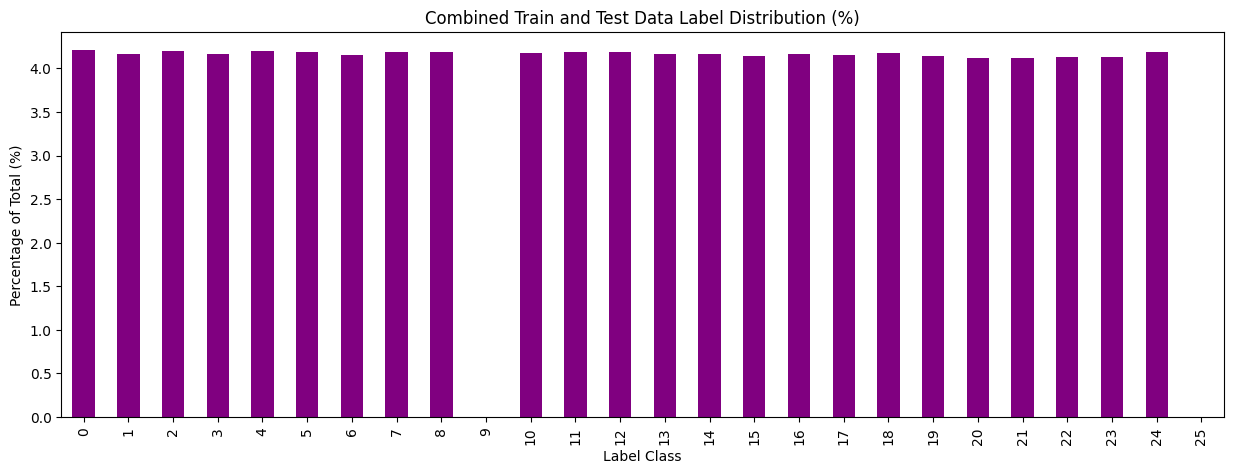

In [7]:


combined_df = pd.concat([train_df, test_df])

# Calculate the percentage of each label class in the combined dataset
combined_label_percentage = (combined_df['label'].value_counts(normalize=True) * 100).sort_index()

# Make sure all labels are represented, even if some percentages are zero
all_labels=range(26)
combined_label_percentage = combined_label_percentage.reindex(all_labels, fill_value=0)

# Plot the distribution of the combined dataset
plt.figure(figsize=(15, 5))
combined_label_percentage.plot(kind='bar', color='purple')
plt.title('Combined Train and Test Data Label Distribution (%)')
plt.xlabel('Label Class')
plt.ylabel('Percentage of Total (%)')
plt.xticks(np.arange(len(all_labels)), all_labels)
plt.show()


# Plotting the Label Distribution for the Train and Test data sets (Count)


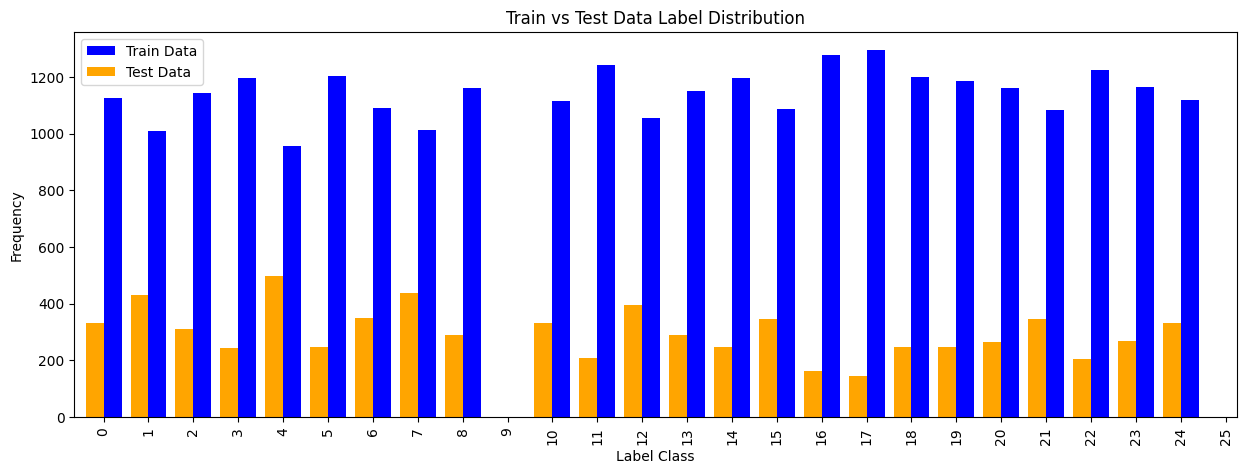

In [8]:



train_label_counts = train_df['label'].value_counts().sort_index()
test_label_counts = test_df['label'].value_counts().sort_index()

# Ensure all labels are represented, even if some counts are zero
all_labels = range(26)
train_label_counts = train_label_counts.reindex(all_labels, fill_value=0)
test_label_counts = test_label_counts.reindex(all_labels, fill_value=0)

# Plot the distributions side by side
fig, ax = plt.subplots(figsize=(15, 5))

# Plot train data
train_label_counts.plot(kind='bar', ax=ax, width=0.4, color='blue', position=0, label='Train Data')


test_label_counts.plot(kind='bar', ax=ax, width=0.4, color='orange', position=1, label='Test Data')


ax.set_title('Train vs Test Data Label Distribution')
ax.set_xlabel('Label Class')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(len(all_labels)))
ax.set_xticklabels(all_labels)
ax.legend()

# Show the plot
plt.show()


# Plotting the Label Distribution for the Train and Test data sets (Count)


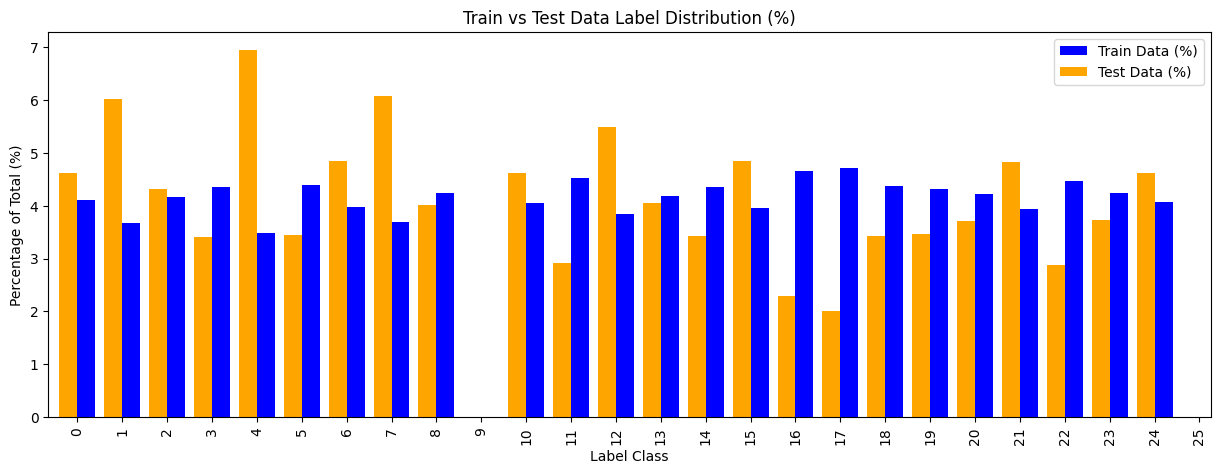

In [9]:


# calculate the percentage of each label in both datasets
train_label_percentage = (train_df['label'].value_counts(normalize=True) * 100).sort_index()
test_label_percentage = (test_df['label'].value_counts(normalize=True) * 100).sort_index()

# Make sure all labels are represented
train_label_percentage = train_label_percentage.reindex(all_labels, fill_value=0)
test_label_percentage = test_label_percentage.reindex(all_labels, fill_value=0)

# Plot the distributions as percentages side by side
fig, ax = plt.subplots(figsize=(15, 5))

# Plot train data percentage
train_label_percentage.plot(kind='bar', ax=ax, width=0.4, color='blue', position=0, label='Train Data (%)')

# Plot test data percentage
test_label_percentage.plot(kind='bar', ax=ax, width=0.4, color='orange', position=1, label='Test Data (%)')

ax.set_title('Train vs Test Data Label Distribution (%)')
ax.set_xlabel('Label Class')
ax.set_ylabel('Percentage of Total (%)')
ax.set_xticks(np.arange(len(all_labels)))
ax.set_xticklabels(all_labels)
ax.legend()

# Show the plot
plt.show()


In [10]:
train_label=train_df['label']
print(train_label)
trainset=train_df.drop(['label'],axis=1)
trainset.head()


0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64


pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     107     118     127     134     139     143     146     150     153   
1     155     157     156     156     156     157     156     158     158   
2     187     188     188     187     187     186     187     188     187   
3     211     211     212     212     211     210     211     210     210   
4     164     167     170     172     176     179     180     184     185   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      156  ...       207       207       207       207       206       206   
1      157  ...        69       149       128        87        94       163   
2      186  ...       202       201       200       199       198       199   
3      211  ...       235       234       233       231       230       226   
4      186  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 784 columns]

Perform the same operations with the test set

In [11]:
test_label=test_df['label']
y_nolabel=test_df.drop(['label'],axis=1)
print(y_nolabel.shape)
y_nolabel.head()

print(train_label)

(7172, 784)
0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64


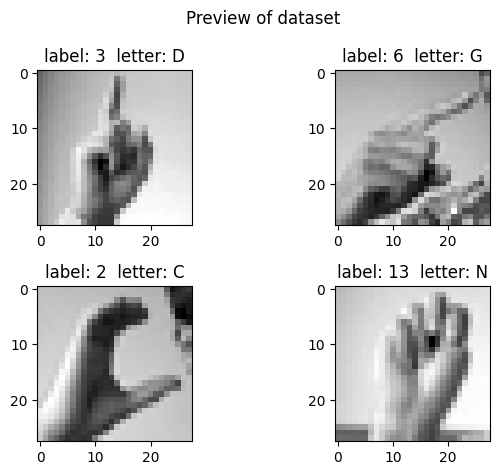

In [12]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(trainset.values[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: D')
axe[0,1].imshow(trainset.values[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: G')
axe[1,0].imshow(trainset.values[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: C')
axe[1,1].imshow(trainset.values[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: N')

plt.tight_layout()

# Vectorize and Normalize the dataset

In [13]:
lb = LabelBinarizer()
train_onehot = lb.fit_transform(train_label)
test_onehot = lb.fit_transform(test_label)

In [14]:
X_MNIST = trainset.values
y_MNIST = y_nolabel.values

X_MNIST_normalized = (X_MNIST / 255.0).astype('float32')
y_MNIST_normalized = (y_MNIST / 255.0).astype('float32')
print('train.csv:\t {}'.format(X_MNIST.shape))
print('test.csv:\t {}\n\n'.format(y_MNIST.shape))

print('x_normalized:\t {}'.format(X_MNIST_normalized.shape))
print('y_normalized:\t {}\n'.format(y_MNIST_normalized.shape))

print('train_onehot:\t {}'.format(train_onehot.shape))
print('test_onehot:\t {}'.format(test_onehot.shape))

# Mean and std for train
# train_mean = np.mean(X_MNIST, axis=0)
# train_std = np.std(X_MNIST, axis=0)

# # standardize
# X_mean_subtracted = X_MNIST - train_mean

# # Normalization
# X_normalized_MNIST = X_mean_subtracted / np.std(X_mean_subtracted, axis=0)
# y_normalized_MNIST = (y_MNIST - train_mean) / np.std((y_MNIST - train_mean), axis=0)

# # print shapes
# print(X_normalized_MNIST.shape)
# print(y_normalized_MNIST.shape)

train.csv:	 (27455, 784)
test.csv:	 (7172, 784)


x_normalized:	 (27455, 784)
y_normalized:	 (7172, 784)

train_onehot:	 (27455, 24)
test_onehot:	 (7172, 24)


# Task 2. Implementation of MLP

# The Neural Net layer

In [15]:
class NeuralNetLayer:
  def __init__(self):
    self.gradient = None
    self.parameters = None

  def forward(self, x):
    raise NotImplementedError

  def backpropagation(self, gradient):
    raise NotImplementedError

# The Activation Layer

In [16]:
class ActivationLayer(NeuralNetLayer):
    def __init__(self, activation='relu'):
        super().__init__()
        self.set_activation(activation)

    def set_activation(self, activation):
        if activation == 'sigmoid':
            self.activation = self.sigmoid
            self.activation_deriv = self.sigmoid_deriv
        elif activation == 'leaky_relu':
            self.activation = self.leaky_relu
            self.activation_deriv = self.leaky_relu_deriv
        else:  # Default to ReLU if unspecified or unrecognized
            self.activation = self.relu
            self.activation_deriv = self.relu_deriv

    def forward(self, x):
        self.gradient = self.activation_deriv(x)
        return self.activation(x)

    def backpropagation(self, output_gradient):
      assert self.gradient is not None, "Must call forward before backward - activation"
      return output_gradient * self.gradient

    @staticmethod
    def sigmoid(z):
        return 1./(1+cp.exp(-z))

    @staticmethod
    def relu(z):
        return cp.maximum(0, z)

    @staticmethod
    def leaky_relu(z, alpha=0.01):
        return cp.where(z > 0, z, z * alpha)

    @staticmethod
    def sigmoid_deriv(z):
        sig = ActivationLayer.sigmoid(z)
        return sig * (1-sig)

    @staticmethod
    def relu_deriv(z):
        return (z > 0).astype(float)

    @staticmethod
    def leaky_relu_deriv(z, alpha=0.01):
        return cp.where(z > 0, 1.0, alpha)

# The Linear Layer

In [17]:
class LinearLayer(NeuralNetLayer):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.ni = input_size
    self.no = output_size
    self.w = self.he_intialization(output_size, input_size)
    self.b = cp.random.randn(output_size)
    self.cur_input = None
    self.parameters = [self.w, self.b]

  # activation aware intialization of weights that helps fix vanishing/exploding gradient problem and increase accuracy
  def he_intialization(self, output_size, input_size):
    stddev = cp.sqrt(2. / input_size)
    return cp.random.randn(output_size, input_size) * stddev

  def forward(self, x):
    self.cur_input = x
    return (self.w[None, :, :] @ x[:, :, None]).squeeze() + self.b

  def backpropagation(self, gradient):
    assert self.cur_input is not None, "Must call forward before backward - linear layer"
    dw = gradient[:, :, None] @ self.cur_input[:, None, :]
    db = gradient
    self.gradient = [dw, db]
    return gradient.dot(self.w)

  def get_parameters(self):
    return [self.w, self.b]

  def get_gradients(self):
    return [self.dw, self.db]

# Softmax Output Layer

In [18]:
class SoftmaxOutputLayer(NeuralNetLayer):
    def __init__(self):
        super().__init__()
        self.cur_probs = None

    def forward(self, x):
        exps = cp.exp(x)
        probs = exps / cp.sum(exps, axis=-1)[:, None]
        self.cur_probs = probs
        return probs

    def backpropagation(self, target):
        assert self.cur_probs is not None, "Must call forward before backward -softmax"
        return self.cur_probs - target



# Optimizer

In [19]:
class Optimizer:
    def __init__(self):
        self.net = None

    def attach_network(self, net):
      self.net = net

    def step(self):
      if not self.net:
        raise ValueError("network layers not set")
      for layer in self.net.layers[::-1]:
          if layer.parameters is not None:
              self.update(layer.parameters, layer.gradient)

    def update(self, params, gradient):
        raise NotImplementedError

class GradientDescentOptimizer(Optimizer):
    def __init__(self, lr: float, lambda_reg: float = 0.0, decay_rate=0.1, decay_steps=50, decay=True):
        super().__init__()
        self.lr = lr
        self.initial_lr = lr
        self.lambda_reg = lambda_reg
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps
        self.global_step = 0
        self.decay = decay

    def update(self, params, gradient):
        self.global_step += 1

        # Apply learning rate decay periodically
        if(self.decay):
          if self.global_step % self.decay_steps == 0:
              self.lr *= (1 - self.decay_rate)

        for (p, g) in zip(params, gradient):
            g_reg = g + self.lambda_reg * p
            p -= self.lr * g_reg.mean(axis=0)

# error with shapes (would like to fix)
class AdamOptimizer(Optimizer):
  def __init__(self, lr: float, beta_1: float = 0.9, beta_2: float = 0.999, epsilon: float = 1e-8):
    super().__init__()
    self.lr = lr
    # exponential decay rates for moment estimates: [0,1]
    self.beta_1 = beta_1
    self.beta_2 = beta_2

    self.epsilon = epsilon
    self.m = None  # First moment vector
    self.v = None  # second moment vector
    self.t = 0  # Timestep

  def update(self, params, gradient):
    parameters = []
    for layer in self.net.layers:
      if not isinstance(layer, ActivationLayer) and not isinstance(layer, SoftmaxOutputLayer):
        parameters.extend(layer.get_parameters())

    if self.m is None:  # Initialize moment vectors on first call
      self.m = [cp.zeros_like(p) for p in params]
      self.v = [cp.zeros_like(p) for p in params]

    for i in range(len(self.m)):
      print(self.m[i].shape)

    self.t += 1

    for i, (p, g) in enumerate(zip(params, gradient)):
      g_aggregated = cp.mean(g, axis=0) # this is necessary because batch_size is included and we need to remove batch dimension
      print(f' gradient shape: {g_aggregated.shape} param shape: {p.shape}')
      if self.m[i].shape != g_aggregated.shape:
        # Log or handle the discrepancy; this is a diagnostic step.
        print(f"Shape mismatch detected: self.m[{i}].shape = {self.m[i].shape}, g_aggregated.shape = {g_aggregated.shape}")

      self.m[i] = self.beta_1 * self.m[i] + (1 - self.beta_1) * g_aggregated
      self.v[i] = self.beta_2 * self.v[i] + (1 - self.beta_2) * cp.square(g_aggregated)
      print(f' self.mi shape: {self.m[i].shape} self.vi shape: {self.v[i].shape}')

      m_hat = self.m[i] / (1 - self.beta_1 ** self.t)
      v_hat = self.v[i] / (1 - self.beta_2 ** self.t)
      print(f' mhat shape: {m_hat.shape} vhat shape: {v_hat.shape}')

      # Update parameters
      p -= self.lr * m_hat / (cp.sqrt(v_hat) + self.epsilon)
      print(f' gradient shape: {g_aggregated.shape} param shape: {p.shape}')




# Build the MLP


In [20]:
def cross_entropy_loss(predictions, labels):
    epsilon = 1e-12
    predictions = cp.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -cp.sum(labels*cp.log(predictions))/N
    return ce

class MLP:
  def __init__(self, *args: List[NeuralNetLayer]):
        self.layers = args

  def get_parameters(self):
        params = []
        for layer in self.layers:
            if hasattr(layer, 'get_parameters'):
                layer_params = layer.get_parameters()
                params.extend(layer_params)
        return params

  def get_gradients(self):
      grads = []
      for layer in self.layers:
          if hasattr(layer, 'get_gradients'):
              layer_grads = layer.get_gradients()
              grads.extend(layer_grads)
      return grads

  def small_perturbation(self, X,y, epsilon=1e-4):
    pass

  def forward(self, x):
      for layer in self.layers:
        x = layer.forward(x)
      return x

  def backpropagation(self, target):
      for layer in self.layers[::-1]:
          target = layer.backpropagation(target)

  def fit(self, optimizer: Optimizer, X, y, epochs, batch_size, X_test, y_test):
    n_samples = X.shape[0]

    # the problem is that the np.unique returns [0,1] -- I need to fix this
    labels = cp.eye(len(cp.unique(y))+1)[cp.asarray(y)]
    epoch_losses, epoch_accuracies, epoch_test_accuracies = [], [], []

    for epoch in tqdm(range(epochs)):
        indices = cp.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = labels[indices]

        batch_losses = []

        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            predictions = self.forward(X_batch)
            loss = cross_entropy_loss(predictions, y_batch)
            batch_losses.append(loss)

            self.backpropagation(y_batch)
            optimizer.step()

        avg_loss = cp.mean(cp.asarray(batch_losses))
        epoch_losses.append(avg_loss)

        # Training accuracy
        train_predictions = self.predict(X)
        train_accuracy = self.evaluate_acc(train_predictions, cp.argmax(labels, axis=1))
        epoch_accuracies.append(train_accuracy.get())

        # Testing accuracy
        test_predictions = self.predict(X_test)
        test_accuracy = self.evaluate_acc(test_predictions, y_test)
        epoch_test_accuracies.append(test_accuracy.get())

        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")

    # Plotting outside the epoch loop
    epoch_losses_numpy = [loss.get() for loss in epoch_losses]
    plt.plot(epoch_losses_numpy)
    plt.xlabel("Epoch")
    plt.ylabel("Average Cross Entropy Loss")
    plt.title("Training Loss")
    plt.show()

    # Plotting accuracies
    plt.plot(epoch_accuracies, label="Training Accuracy")
    plt.plot(epoch_test_accuracies, label="Testing Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy (Training vs. Testing)")
    plt.legend()

  def predict(self, x):
    probabilities = self.forward(x)
    return cp.argmax(probabilities, axis=1)

  def predict_proba(self, x):
    probabilities = self.forward(x)
    return probabilities

  def evaluate_acc(self, y_pred, y_true):
    return cp.mean(y_pred == y_true)

# small perturbation

In [ ]:
# this is a work in progress
def small_perturbation(self, X, y, epsilon=1e-4):
    original_params = self.get_parameters()
    numeric_grads = np.zeros_like(original_params)

    # Iterate through all parameters in the MLP
    for i in range(len(original_params)):
        original_value = original_params[i].copy()

        # Perturb the parameter positively
        original_params[i] += epsilon
        self.set_parameters(original_params)
        loss_plus = cross_entropy_loss(self.forward(X), y)

        # Perturb the parameter negatively
        original_params[i] = original_value - epsilon
        self.set_parameters(original_params)
        loss_minus = cross_entropy_loss(self.forward(X), y)

        # Compute numerical gradient
        numeric_grads[i] = (loss_plus - loss_minus) / (2 * epsilon)

        # Reset the parameter to its original value
        original_params[i] = original_value

    # Restore original parameters
    self.set_parameters(original_params)

    # Now compute analytical gradients by backpropagation
    self.backpropagation(y)
    analytical_grads = np.concatenate([g.ravel() for g in self.get_gradients()])

    # Compare analytical gradients to numerical gradients
    diff = np.linalg.norm(analytical_grads - numeric_grads) / \
           (np.linalg.norm(analytical_grads) + np.linalg.norm(numeric_grads))

    print(f'Gradient check difference: {diff}')
    if diff < 1e-7:
        print("Gradient check passed.")
    else:
        print("Gradient check failed.")



# Setting up MLP with MNIST data

In [21]:
X_total = X_MNIST_normalized
X_total = cp.asarray(X_total)
y_total = train_label
y_total = cp.asarray(y_total)

y_MNIST_normalized = cp.asarray(y_MNIST_normalized)
test_label = cp.asarray(test_label)

X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

# MNIST data with one activation layer

In [24]:
HIDDEN_SIZE = 64
GRADIENT_STEPS = 300
n_features = X_MNIST_normalized.shape[-1]

mlp1 = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)
opt1 = GradientDescentOptimizer(lr=0.1)
opt1.attach_network(mlp1)

mlp1.fit(opt1, X=X_train, y=y_train, epochs=GRADIENT_STEPS, batch_size=200, X_test=y_MNIST_normalized, y_test=test_label)
prediction = mlp1.predict(X_test)
accuracy_score = mlp1.evaluate_acc(prediction, y_test)
print(accuracy_score)

  0%|          | 1/300 [00:00<04:22,  1.14it/s]

Epoch 1/300, Loss: 2.8801, Training Accuracy: 0.3023, Testing Accuracy: 0.2789


  1%|          | 2/300 [00:01<02:32,  1.96it/s]

Epoch 2/300, Loss: 2.2579, Training Accuracy: 0.3856, Testing Accuracy: 0.3618


  1%|          | 3/300 [00:01<01:56,  2.55it/s]

Epoch 3/300, Loss: 1.9365, Training Accuracy: 0.4847, Testing Accuracy: 0.4182


  1%|▏         | 4/300 [00:01<01:39,  2.97it/s]

Epoch 4/300, Loss: 1.7813, Training Accuracy: 0.5298, Testing Accuracy: 0.4763


  2%|▏         | 5/300 [00:01<01:30,  3.26it/s]

Epoch 5/300, Loss: 1.6986, Training Accuracy: 0.5506, Testing Accuracy: 0.4640


  2%|▏         | 6/300 [00:02<01:25,  3.46it/s]

Epoch 6/300, Loss: 1.6501, Training Accuracy: 0.5558, Testing Accuracy: 0.4702


  2%|▏         | 7/300 [00:02<01:21,  3.59it/s]

Epoch 7/300, Loss: 1.6213, Training Accuracy: 0.5565, Testing Accuracy: 0.4788


  3%|▎         | 8/300 [00:02<01:18,  3.70it/s]

Epoch 8/300, Loss: 1.6042, Training Accuracy: 0.5642, Testing Accuracy: 0.4773


  3%|▎         | 9/300 [00:02<01:17,  3.77it/s]

Epoch 9/300, Loss: 1.5934, Training Accuracy: 0.5657, Testing Accuracy: 0.4796


  3%|▎         | 10/300 [00:03<01:15,  3.82it/s]

Epoch 10/300, Loss: 1.5864, Training Accuracy: 0.5677, Testing Accuracy: 0.4822


  4%|▎         | 11/300 [00:03<01:14,  3.87it/s]

Epoch 11/300, Loss: 1.5823, Training Accuracy: 0.5676, Testing Accuracy: 0.4782


  4%|▍         | 12/300 [00:03<01:13,  3.89it/s]

Epoch 12/300, Loss: 1.5796, Training Accuracy: 0.5672, Testing Accuracy: 0.4784


  4%|▍         | 13/300 [00:03<01:13,  3.91it/s]

Epoch 13/300, Loss: 1.5778, Training Accuracy: 0.5675, Testing Accuracy: 0.4801


  5%|▍         | 14/300 [00:04<01:12,  3.92it/s]

Epoch 14/300, Loss: 1.5770, Training Accuracy: 0.5681, Testing Accuracy: 0.4798


  5%|▌         | 15/300 [00:04<01:12,  3.94it/s]

Epoch 15/300, Loss: 1.5762, Training Accuracy: 0.5679, Testing Accuracy: 0.4801


  5%|▌         | 16/300 [00:04<01:12,  3.94it/s]

Epoch 16/300, Loss: 1.5758, Training Accuracy: 0.5680, Testing Accuracy: 0.4803


  6%|▌         | 17/300 [00:04<01:11,  3.94it/s]

Epoch 17/300, Loss: 1.5757, Training Accuracy: 0.5681, Testing Accuracy: 0.4802


  6%|▌         | 18/300 [00:05<01:11,  3.94it/s]

Epoch 18/300, Loss: 1.5754, Training Accuracy: 0.5681, Testing Accuracy: 0.4802


  6%|▋         | 19/300 [00:05<01:11,  3.95it/s]

Epoch 19/300, Loss: 1.5751, Training Accuracy: 0.5681, Testing Accuracy: 0.4802


  7%|▋         | 20/300 [00:05<01:10,  3.95it/s]

Epoch 20/300, Loss: 1.5750, Training Accuracy: 0.5681, Testing Accuracy: 0.4802


  7%|▋         | 21/300 [00:05<01:10,  3.95it/s]

Epoch 21/300, Loss: 1.5750, Training Accuracy: 0.5681, Testing Accuracy: 0.4803


  7%|▋         | 22/300 [00:06<01:10,  3.95it/s]

Epoch 22/300, Loss: 1.5750, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


  8%|▊         | 23/300 [00:06<01:10,  3.95it/s]

Epoch 23/300, Loss: 1.5751, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


  8%|▊         | 24/300 [00:06<01:09,  3.95it/s]

Epoch 24/300, Loss: 1.5751, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


  8%|▊         | 25/300 [00:06<01:09,  3.95it/s]

Epoch 25/300, Loss: 1.5750, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


  9%|▊         | 26/300 [00:07<01:09,  3.95it/s]

Epoch 26/300, Loss: 1.5750, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


  9%|▉         | 27/300 [00:07<01:09,  3.95it/s]

Epoch 27/300, Loss: 1.5748, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


  9%|▉         | 28/300 [00:07<01:08,  3.95it/s]

Epoch 28/300, Loss: 1.5752, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


 10%|▉         | 29/300 [00:08<01:16,  3.55it/s]

Epoch 29/300, Loss: 1.5752, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


 10%|█         | 30/300 [00:08<01:22,  3.26it/s]

Epoch 30/300, Loss: 1.5748, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


 10%|█         | 31/300 [00:08<01:27,  3.09it/s]

Epoch 31/300, Loss: 1.5748, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


 11%|█         | 32/300 [00:09<01:37,  2.75it/s]

Epoch 32/300, Loss: 1.5750, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


 11%|█         | 33/300 [00:09<01:49,  2.43it/s]

Epoch 33/300, Loss: 1.5749, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


 11%|█▏        | 34/300 [00:10<02:15,  1.97it/s]

Epoch 34/300, Loss: 1.5749, Training Accuracy: 0.5682, Testing Accuracy: 0.4805


 11%|█▏        | 34/300 [00:11<01:26,  3.09it/s]


KeyboardInterrupt: 

In [ ]:
y_MNIST_normalized = cp.asarray(y_MNIST_normalized)
test_label = cp.asarray(test_label)

prediction1 = mlp1.predict(y_MNIST_normalized)
accuracy_score = mlp1.evaluate_acc(prediction1, test_label)
print(accuracy_score)
print(prediction1)
print(test_label)

0.7240658114891244
[ 6  5 10 ...  2  4  2]
[ 6  5 10 ...  2  4  2]


# Grid Search (Hyperparameter Tuning) on 1 layer MLP

  0%|          | 1/250 [00:00<01:41,  2.46it/s]

Epoch 1/250, Loss: 3.3826


  1%|          | 2/250 [00:00<01:37,  2.55it/s]

Epoch 2/250, Loss: 3.1303


  1%|          | 3/250 [00:01<02:03,  2.00it/s]

Epoch 3/250, Loss: 3.0748


  2%|▏         | 4/250 [00:01<01:46,  2.31it/s]

Epoch 4/250, Loss: 2.9794


  2%|▏         | 5/250 [00:02<01:39,  2.45it/s]

Epoch 5/250, Loss: 2.8916


  2%|▏         | 6/250 [00:02<01:35,  2.56it/s]

Epoch 6/250, Loss: 2.7727


  3%|▎         | 7/250 [00:02<01:29,  2.71it/s]

Epoch 7/250, Loss: 2.6258


  3%|▎         | 8/250 [00:03<01:26,  2.79it/s]

Epoch 8/250, Loss: 2.5017


  4%|▎         | 9/250 [00:03<01:27,  2.75it/s]

Epoch 9/250, Loss: 2.4093


  4%|▍         | 10/250 [00:03<01:23,  2.86it/s]

Epoch 10/250, Loss: 2.2918


  4%|▍         | 11/250 [00:04<01:19,  3.02it/s]

Epoch 11/250, Loss: 2.2335


  5%|▍         | 12/250 [00:04<01:30,  2.62it/s]

Epoch 12/250, Loss: 2.1869


  6%|▌         | 14/250 [00:05<01:21,  2.91it/s]

Epoch 13/250, Loss: 2.1701
Epoch 14/250, Loss: 2.1150


  6%|▋         | 16/250 [00:05<01:00,  3.88it/s]

Epoch 15/250, Loss: 2.0732
Epoch 16/250, Loss: 2.0522


  7%|▋         | 18/250 [00:05<00:49,  4.67it/s]

Epoch 17/250, Loss: 2.0594
Epoch 18/250, Loss: 2.0318


  8%|▊         | 20/250 [00:06<00:45,  5.03it/s]

Epoch 19/250, Loss: 1.9920
Epoch 20/250, Loss: 1.9803


  9%|▉         | 22/250 [00:06<00:42,  5.34it/s]

Epoch 21/250, Loss: 1.9528
Epoch 22/250, Loss: 1.9756


 10%|▉         | 24/250 [00:07<00:41,  5.48it/s]

Epoch 23/250, Loss: 1.9312
Epoch 24/250, Loss: 1.9075


 10%|█         | 25/250 [00:07<00:42,  5.24it/s]

Epoch 25/250, Loss: 1.9062


 10%|█         | 26/250 [00:07<00:48,  4.61it/s]

Epoch 26/250, Loss: 1.8784


 11%|█         | 27/250 [00:07<00:49,  4.47it/s]

Epoch 27/250, Loss: 1.9144


 11%|█         | 28/250 [00:08<00:51,  4.29it/s]

Epoch 28/250, Loss: 1.8414


 12%|█▏        | 29/250 [00:08<00:51,  4.25it/s]

Epoch 29/250, Loss: 1.8382


 12%|█▏        | 30/250 [00:08<00:53,  4.11it/s]

Epoch 30/250, Loss: 1.8291


 12%|█▏        | 31/250 [00:08<00:54,  4.00it/s]

Epoch 31/250, Loss: 1.8416


 13%|█▎        | 32/250 [00:09<00:56,  3.84it/s]

Epoch 32/250, Loss: 1.8089


 13%|█▎        | 33/250 [00:09<00:58,  3.71it/s]

Epoch 33/250, Loss: 1.7820


 14%|█▎        | 34/250 [00:09<00:59,  3.63it/s]

Epoch 34/250, Loss: 1.7952


 14%|█▍        | 36/250 [00:10<00:50,  4.20it/s]

Epoch 35/250, Loss: 1.7856
Epoch 36/250, Loss: 1.7810


 15%|█▌        | 38/250 [00:10<00:44,  4.74it/s]

Epoch 37/250, Loss: 1.7520
Epoch 38/250, Loss: 1.7409


 16%|█▌        | 40/250 [00:10<00:40,  5.16it/s]

Epoch 39/250, Loss: 1.7365
Epoch 40/250, Loss: 1.7321


 17%|█▋        | 42/250 [00:11<00:39,  5.27it/s]

Epoch 41/250, Loss: 1.7343
Epoch 42/250, Loss: 1.6930


 18%|█▊        | 44/250 [00:11<00:38,  5.35it/s]

Epoch 43/250, Loss: 1.6986
Epoch 44/250, Loss: 1.6980


 18%|█▊        | 46/250 [00:11<00:36,  5.58it/s]

Epoch 45/250, Loss: 1.6976
Epoch 46/250, Loss: 1.6803


 19%|█▉        | 48/250 [00:12<00:36,  5.57it/s]

Epoch 47/250, Loss: 1.6512
Epoch 48/250, Loss: 1.6628


 20%|██        | 50/250 [00:12<00:36,  5.52it/s]

Epoch 49/250, Loss: 1.6643
Epoch 50/250, Loss: 1.6594


 21%|██        | 52/250 [00:12<00:34,  5.67it/s]

Epoch 51/250, Loss: 1.6427
Epoch 52/250, Loss: 1.6323


 22%|██▏       | 54/250 [00:13<00:35,  5.60it/s]

Epoch 53/250, Loss: 1.6319
Epoch 54/250, Loss: 1.6251


 22%|██▏       | 56/250 [00:13<00:34,  5.56it/s]

Epoch 55/250, Loss: 1.6194
Epoch 56/250, Loss: 1.6074


 23%|██▎       | 58/250 [00:14<00:34,  5.62it/s]

Epoch 57/250, Loss: 1.6164
Epoch 58/250, Loss: 1.6065


 24%|██▍       | 60/250 [00:14<00:33,  5.68it/s]

Epoch 59/250, Loss: 1.6072
Epoch 60/250, Loss: 1.5925


 25%|██▍       | 62/250 [00:14<00:33,  5.65it/s]

Epoch 61/250, Loss: 1.5894
Epoch 62/250, Loss: 1.5922


 26%|██▌       | 64/250 [00:15<00:33,  5.63it/s]

Epoch 63/250, Loss: 1.5916
Epoch 64/250, Loss: 1.5826


 26%|██▋       | 66/250 [00:15<00:32,  5.65it/s]

Epoch 65/250, Loss: 1.5779
Epoch 66/250, Loss: 1.5750


 27%|██▋       | 68/250 [00:15<00:32,  5.62it/s]

Epoch 67/250, Loss: 1.5686
Epoch 68/250, Loss: 1.5725


 28%|██▊       | 70/250 [00:16<00:32,  5.61it/s]

Epoch 69/250, Loss: 1.5639
Epoch 70/250, Loss: 1.5603


 29%|██▉       | 72/250 [00:16<00:32,  5.46it/s]

Epoch 71/250, Loss: 1.5598
Epoch 72/250, Loss: 1.5555


 30%|██▉       | 74/250 [00:16<00:32,  5.42it/s]

Epoch 73/250, Loss: 1.5564
Epoch 74/250, Loss: 1.5524


 30%|███       | 76/250 [00:17<00:32,  5.41it/s]

Epoch 75/250, Loss: 1.5487
Epoch 76/250, Loss: 1.5481


 31%|███       | 78/250 [00:17<00:31,  5.41it/s]

Epoch 77/250, Loss: 1.5464
Epoch 78/250, Loss: 1.5409


 32%|███▏      | 80/250 [00:18<00:31,  5.40it/s]

Epoch 79/250, Loss: 1.5384
Epoch 80/250, Loss: 1.5390


 33%|███▎      | 82/250 [00:18<00:32,  5.25it/s]

Epoch 81/250, Loss: 1.5344
Epoch 82/250, Loss: 1.5345


 34%|███▎      | 84/250 [00:18<00:30,  5.37it/s]

Epoch 83/250, Loss: 1.5309
Epoch 84/250, Loss: 1.5286


 34%|███▍      | 86/250 [00:19<00:30,  5.44it/s]

Epoch 85/250, Loss: 1.5255
Epoch 86/250, Loss: 1.5263


 35%|███▍      | 87/250 [00:19<00:29,  5.43it/s]

Epoch 87/250, Loss: 1.5242


 36%|███▌      | 89/250 [00:19<00:30,  5.28it/s]

Epoch 88/250, Loss: 1.5211
Epoch 89/250, Loss: 1.5191


 36%|███▌      | 90/250 [00:19<00:32,  4.92it/s]

Epoch 90/250, Loss: 1.5172


 36%|███▋      | 91/250 [00:20<00:34,  4.57it/s]

Epoch 91/250, Loss: 1.5162


 37%|███▋      | 92/250 [00:20<00:35,  4.47it/s]

Epoch 92/250, Loss: 1.5134


 37%|███▋      | 93/250 [00:20<00:36,  4.32it/s]

Epoch 93/250, Loss: 1.5129


 38%|███▊      | 94/250 [00:20<00:36,  4.30it/s]

Epoch 94/250, Loss: 1.5119


 38%|███▊      | 95/250 [00:21<00:37,  4.18it/s]

Epoch 95/250, Loss: 1.5110


 38%|███▊      | 96/250 [00:21<00:38,  4.05it/s]

Epoch 96/250, Loss: 1.5084


 39%|███▉      | 97/250 [00:21<00:39,  3.88it/s]

Epoch 97/250, Loss: 1.5066


 39%|███▉      | 98/250 [00:22<00:40,  3.75it/s]

Epoch 98/250, Loss: 1.5053


 40%|███▉      | 99/250 [00:22<00:41,  3.64it/s]

Epoch 99/250, Loss: 1.5051


 40%|████      | 101/250 [00:22<00:35,  4.19it/s]

Epoch 100/250, Loss: 1.5039
Epoch 101/250, Loss: 1.5025


 41%|████      | 103/250 [00:23<00:30,  4.81it/s]

Epoch 102/250, Loss: 1.5002
Epoch 103/250, Loss: 1.5000


 42%|████▏     | 105/250 [00:23<00:28,  5.08it/s]

Epoch 104/250, Loss: 1.4994
Epoch 105/250, Loss: 1.4984


 43%|████▎     | 107/250 [00:23<00:27,  5.25it/s]

Epoch 106/250, Loss: 1.4963
Epoch 107/250, Loss: 1.4960


 44%|████▎     | 109/250 [00:24<00:25,  5.44it/s]

Epoch 108/250, Loss: 1.4942
Epoch 109/250, Loss: 1.4939


 44%|████▍     | 111/250 [00:24<00:24,  5.58it/s]

Epoch 110/250, Loss: 1.4926
Epoch 111/250, Loss: 1.4922


 45%|████▌     | 113/250 [00:24<00:24,  5.60it/s]

Epoch 112/250, Loss: 1.4908
Epoch 113/250, Loss: 1.4907


 46%|████▌     | 115/250 [00:25<00:23,  5.66it/s]

Epoch 114/250, Loss: 1.4903
Epoch 115/250, Loss: 1.4885


 47%|████▋     | 117/250 [00:25<00:23,  5.68it/s]

Epoch 116/250, Loss: 1.4877
Epoch 117/250, Loss: 1.4872


 48%|████▊     | 119/250 [00:25<00:23,  5.68it/s]

Epoch 118/250, Loss: 1.4863
Epoch 119/250, Loss: 1.4854


 48%|████▊     | 121/250 [00:26<00:22,  5.71it/s]

Epoch 120/250, Loss: 1.4849
Epoch 121/250, Loss: 1.4843


 49%|████▉     | 123/250 [00:26<00:22,  5.62it/s]

Epoch 122/250, Loss: 1.4836
Epoch 123/250, Loss: 1.4830


 50%|█████     | 125/250 [00:27<00:22,  5.61it/s]

Epoch 124/250, Loss: 1.4819
Epoch 125/250, Loss: 1.4812


 51%|█████     | 127/250 [00:27<00:21,  5.71it/s]

Epoch 126/250, Loss: 1.4809
Epoch 127/250, Loss: 1.4811


 52%|█████▏    | 129/250 [00:27<00:21,  5.74it/s]

Epoch 128/250, Loss: 1.4796
Epoch 129/250, Loss: 1.4795


 52%|█████▏    | 131/250 [00:28<00:21,  5.65it/s]

Epoch 130/250, Loss: 1.4789
Epoch 131/250, Loss: 1.4783


 53%|█████▎    | 133/250 [00:28<00:21,  5.50it/s]

Epoch 132/250, Loss: 1.4781
Epoch 133/250, Loss: 1.4775


 54%|█████▍    | 135/250 [00:28<00:21,  5.46it/s]

Epoch 134/250, Loss: 1.4767
Epoch 135/250, Loss: 1.4765


 55%|█████▍    | 137/250 [00:29<00:20,  5.48it/s]

Epoch 136/250, Loss: 1.4759
Epoch 137/250, Loss: 1.4757


 56%|█████▌    | 139/250 [00:29<00:19,  5.58it/s]

Epoch 138/250, Loss: 1.4748
Epoch 139/250, Loss: 1.4747


 56%|█████▋    | 141/250 [00:29<00:19,  5.45it/s]

Epoch 140/250, Loss: 1.4743
Epoch 141/250, Loss: 1.4740


 57%|█████▋    | 143/250 [00:30<00:19,  5.62it/s]

Epoch 142/250, Loss: 1.4732
Epoch 143/250, Loss: 1.4731


 58%|█████▊    | 145/250 [00:30<00:18,  5.67it/s]

Epoch 144/250, Loss: 1.4723
Epoch 145/250, Loss: 1.4718


 59%|█████▉    | 147/250 [00:30<00:18,  5.66it/s]

Epoch 146/250, Loss: 1.4717
Epoch 147/250, Loss: 1.4718


 60%|█████▉    | 149/250 [00:31<00:17,  5.70it/s]

Epoch 148/250, Loss: 1.4708
Epoch 149/250, Loss: 1.4706


 60%|██████    | 151/250 [00:31<00:17,  5.69it/s]

Epoch 150/250, Loss: 1.4702
Epoch 151/250, Loss: 1.4698


 61%|██████    | 153/250 [00:32<00:17,  5.61it/s]

Epoch 152/250, Loss: 1.4698
Epoch 153/250, Loss: 1.4692


 62%|██████▏   | 155/250 [00:32<00:16,  5.66it/s]

Epoch 154/250, Loss: 1.4691
Epoch 155/250, Loss: 1.4687


 62%|██████▏   | 156/250 [00:32<00:18,  5.11it/s]

Epoch 156/250, Loss: 1.4685


 63%|██████▎   | 157/250 [00:32<00:19,  4.72it/s]

Epoch 157/250, Loss: 1.4684


 63%|██████▎   | 158/250 [00:33<00:20,  4.40it/s]

Epoch 158/250, Loss: 1.4679


 64%|██████▎   | 159/250 [00:33<00:21,  4.31it/s]

Epoch 159/250, Loss: 1.4679


 64%|██████▍   | 160/250 [00:33<00:21,  4.25it/s]

Epoch 160/250, Loss: 1.4672


 64%|██████▍   | 161/250 [00:33<00:21,  4.14it/s]

Epoch 161/250, Loss: 1.4672


 65%|██████▍   | 162/250 [00:34<00:22,  3.97it/s]

Epoch 162/250, Loss: 1.4669


 65%|██████▌   | 163/250 [00:34<00:22,  3.79it/s]

Epoch 163/250, Loss: 1.4666


 66%|██████▌   | 164/250 [00:34<00:23,  3.72it/s]

Epoch 164/250, Loss: 1.4665


 66%|██████▌   | 165/250 [00:35<00:23,  3.68it/s]

Epoch 165/250, Loss: 1.4661


 67%|██████▋   | 167/250 [00:35<00:18,  4.37it/s]

Epoch 166/250, Loss: 1.4659
Epoch 167/250, Loss: 1.4656


 68%|██████▊   | 169/250 [00:35<00:16,  5.00it/s]

Epoch 168/250, Loss: 1.4654
Epoch 169/250, Loss: 1.4651


 68%|██████▊   | 171/250 [00:36<00:14,  5.27it/s]

Epoch 170/250, Loss: 1.4651
Epoch 171/250, Loss: 1.4648


 69%|██████▉   | 173/250 [00:36<00:14,  5.43it/s]

Epoch 172/250, Loss: 1.4649
Epoch 173/250, Loss: 1.4642


 70%|███████   | 175/250 [00:36<00:14,  5.22it/s]

Epoch 174/250, Loss: 1.4644
Epoch 175/250, Loss: 1.4642


 71%|███████   | 177/250 [00:37<00:13,  5.40it/s]

Epoch 176/250, Loss: 1.4642
Epoch 177/250, Loss: 1.4638


 72%|███████▏  | 179/250 [00:37<00:12,  5.54it/s]

Epoch 178/250, Loss: 1.4638
Epoch 179/250, Loss: 1.4634


 72%|███████▏  | 181/250 [00:37<00:12,  5.63it/s]

Epoch 180/250, Loss: 1.4635
Epoch 181/250, Loss: 1.4632


 73%|███████▎  | 183/250 [00:38<00:12,  5.55it/s]

Epoch 182/250, Loss: 1.4630
Epoch 183/250, Loss: 1.4629


 74%|███████▍  | 185/250 [00:38<00:11,  5.61it/s]

Epoch 184/250, Loss: 1.4625
Epoch 185/250, Loss: 1.4628


 75%|███████▍  | 187/250 [00:38<00:11,  5.69it/s]

Epoch 186/250, Loss: 1.4624
Epoch 187/250, Loss: 1.4624


 76%|███████▌  | 189/250 [00:39<00:10,  5.64it/s]

Epoch 188/250, Loss: 1.4622
Epoch 189/250, Loss: 1.4620


 76%|███████▋  | 191/250 [00:39<00:10,  5.68it/s]

Epoch 190/250, Loss: 1.4618
Epoch 191/250, Loss: 1.4619


 77%|███████▋  | 193/250 [00:40<00:10,  5.58it/s]

Epoch 192/250, Loss: 1.4614
Epoch 193/250, Loss: 1.4614


 78%|███████▊  | 195/250 [00:40<00:09,  5.59it/s]

Epoch 194/250, Loss: 1.4614
Epoch 195/250, Loss: 1.4615


 79%|███████▉  | 197/250 [00:40<00:09,  5.66it/s]

Epoch 196/250, Loss: 1.4612
Epoch 197/250, Loss: 1.4611


 80%|███████▉  | 199/250 [00:41<00:09,  5.66it/s]

Epoch 198/250, Loss: 1.4611
Epoch 199/250, Loss: 1.4608


 80%|████████  | 201/250 [00:41<00:09,  5.41it/s]

Epoch 200/250, Loss: 1.4607
Epoch 201/250, Loss: 1.4606


 81%|████████  | 203/250 [00:41<00:08,  5.49it/s]

Epoch 202/250, Loss: 1.4604
Epoch 203/250, Loss: 1.4603


 82%|████████▏ | 205/250 [00:42<00:08,  5.33it/s]

Epoch 204/250, Loss: 1.4606
Epoch 205/250, Loss: 1.4603


 83%|████████▎ | 207/250 [00:42<00:07,  5.58it/s]

Epoch 206/250, Loss: 1.4605
Epoch 207/250, Loss: 1.4600


 84%|████████▎ | 209/250 [00:42<00:07,  5.72it/s]

Epoch 208/250, Loss: 1.4602
Epoch 209/250, Loss: 1.4599


 84%|████████▍ | 211/250 [00:43<00:07,  5.56it/s]

Epoch 210/250, Loss: 1.4598
Epoch 211/250, Loss: 1.4594


 85%|████████▌ | 213/250 [00:43<00:06,  5.64it/s]

Epoch 212/250, Loss: 1.4597
Epoch 213/250, Loss: 1.4595


 86%|████████▌ | 215/250 [00:44<00:06,  5.67it/s]

Epoch 214/250, Loss: 1.4595
Epoch 215/250, Loss: 1.4596


 87%|████████▋ | 217/250 [00:44<00:05,  5.53it/s]

Epoch 216/250, Loss: 1.4595
Epoch 217/250, Loss: 1.4595


 88%|████████▊ | 219/250 [00:44<00:05,  5.61it/s]

Epoch 218/250, Loss: 1.4592
Epoch 219/250, Loss: 1.4592


 88%|████████▊ | 221/250 [00:45<00:05,  5.71it/s]

Epoch 220/250, Loss: 1.4591
Epoch 221/250, Loss: 1.4593


 89%|████████▉ | 222/250 [00:45<00:05,  4.86it/s]

Epoch 222/250, Loss: 1.4591


 89%|████████▉ | 223/250 [00:45<00:05,  4.54it/s]

Epoch 223/250, Loss: 1.4591


 90%|████████▉ | 224/250 [00:45<00:05,  4.40it/s]

Epoch 224/250, Loss: 1.4588


 90%|█████████ | 225/250 [00:46<00:05,  4.33it/s]

Epoch 225/250, Loss: 1.4588


 90%|█████████ | 226/250 [00:46<00:05,  4.27it/s]

Epoch 226/250, Loss: 1.4590


 91%|█████████ | 227/250 [00:46<00:05,  4.15it/s]

Epoch 227/250, Loss: 1.4589


 91%|█████████ | 228/250 [00:46<00:05,  4.00it/s]

Epoch 228/250, Loss: 1.4587


 92%|█████████▏| 229/250 [00:47<00:05,  3.83it/s]

Epoch 229/250, Loss: 1.4588


 92%|█████████▏| 230/250 [00:47<00:05,  3.66it/s]

Epoch 230/250, Loss: 1.4588


 93%|█████████▎| 232/250 [00:47<00:04,  4.06it/s]

Epoch 231/250, Loss: 1.4586
Epoch 232/250, Loss: 1.4586


 94%|█████████▎| 234/250 [00:48<00:03,  4.71it/s]

Epoch 233/250, Loss: 1.4584
Epoch 234/250, Loss: 1.4585


 94%|█████████▍| 236/250 [00:48<00:02,  4.95it/s]

Epoch 235/250, Loss: 1.4583
Epoch 236/250, Loss: 1.4585


 95%|█████████▌| 238/250 [00:49<00:02,  5.25it/s]

Epoch 237/250, Loss: 1.4584
Epoch 238/250, Loss: 1.4585


 96%|█████████▌| 240/250 [00:49<00:01,  5.46it/s]

Epoch 239/250, Loss: 1.4582
Epoch 240/250, Loss: 1.4580


 97%|█████████▋| 242/250 [00:49<00:01,  5.47it/s]

Epoch 241/250, Loss: 1.4582
Epoch 242/250, Loss: 1.4578


 98%|█████████▊| 244/250 [00:50<00:01,  5.39it/s]

Epoch 243/250, Loss: 1.4580
Epoch 244/250, Loss: 1.4578


 98%|█████████▊| 246/250 [00:50<00:00,  5.47it/s]

Epoch 245/250, Loss: 1.4579
Epoch 246/250, Loss: 1.4579


 99%|█████████▉| 248/250 [00:50<00:00,  5.59it/s]

Epoch 247/250, Loss: 1.4578
Epoch 248/250, Loss: 1.4578


100%|██████████| 250/250 [00:51<00:00,  4.89it/s]

Epoch 249/250, Loss: 1.4578
Epoch 250/250, Loss: 1.4580


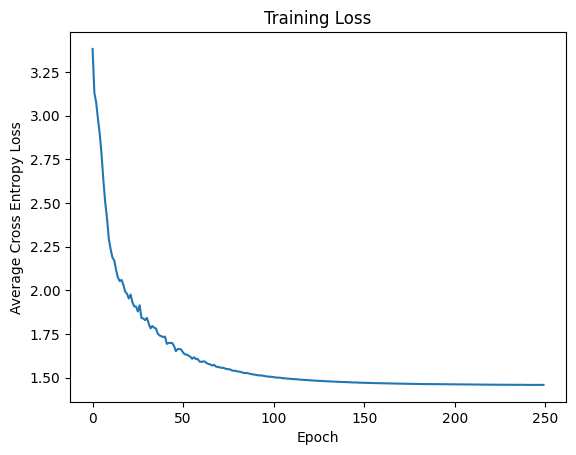

  1%|          | 2/250 [00:00<00:44,  5.58it/s]

Epoch 1/250, Loss: 3.4961
Epoch 2/250, Loss: 3.2524


  2%|▏         | 4/250 [00:00<00:44,  5.56it/s]

Epoch 3/250, Loss: 3.2104
Epoch 4/250, Loss: 3.1957


  2%|▏         | 6/250 [00:01<00:43,  5.65it/s]

Epoch 5/250, Loss: 3.1879
Epoch 6/250, Loss: 3.1512


  3%|▎         | 8/250 [00:01<00:43,  5.60it/s]

Epoch 7/250, Loss: 3.0742
Epoch 8/250, Loss: 3.0043


  4%|▍         | 10/250 [00:01<00:42,  5.62it/s]

Epoch 9/250, Loss: 2.9624
Epoch 10/250, Loss: 2.9186


  5%|▍         | 12/250 [00:02<00:43,  5.47it/s]

Epoch 11/250, Loss: 2.8923
Epoch 12/250, Loss: 2.8513


  6%|▌         | 14/250 [00:02<00:42,  5.60it/s]

Epoch 13/250, Loss: 2.7970
Epoch 14/250, Loss: 2.7409


  6%|▋         | 16/250 [00:02<00:41,  5.58it/s]

Epoch 15/250, Loss: 2.6744
Epoch 16/250, Loss: 2.6294


  7%|▋         | 18/250 [00:03<00:42,  5.47it/s]

Epoch 17/250, Loss: 2.5729
Epoch 18/250, Loss: 2.5248


  8%|▊         | 20/250 [00:03<00:41,  5.54it/s]

Epoch 19/250, Loss: 2.4543
Epoch 20/250, Loss: 2.4270


  9%|▉         | 22/250 [00:03<00:40,  5.62it/s]

Epoch 21/250, Loss: 2.3941
Epoch 22/250, Loss: 2.3712


 10%|▉         | 24/250 [00:04<00:40,  5.57it/s]

Epoch 23/250, Loss: 2.3465
Epoch 24/250, Loss: 2.3262


 10%|█         | 26/250 [00:04<00:39,  5.61it/s]

Epoch 25/250, Loss: 2.3175
Epoch 26/250, Loss: 2.3017


 11%|█         | 28/250 [00:05<00:39,  5.62it/s]

Epoch 27/250, Loss: 2.2919
Epoch 28/250, Loss: 2.2390


 12%|█▏        | 30/250 [00:05<00:39,  5.53it/s]

Epoch 29/250, Loss: 2.2660
Epoch 30/250, Loss: 2.2478


 13%|█▎        | 32/250 [00:05<00:38,  5.61it/s]

Epoch 31/250, Loss: 2.2409
Epoch 32/250, Loss: 2.2138


 14%|█▎        | 34/250 [00:06<00:38,  5.61it/s]

Epoch 33/250, Loss: 2.1993
Epoch 34/250, Loss: 2.2053


 14%|█▍        | 35/250 [00:06<00:38,  5.53it/s]

Epoch 35/250, Loss: 2.1968


 14%|█▍        | 36/250 [00:06<00:43,  4.97it/s]

Epoch 36/250, Loss: 2.1952


 15%|█▍        | 37/250 [00:06<00:46,  4.55it/s]

Epoch 37/250, Loss: 2.1656


 15%|█▌        | 38/250 [00:07<00:49,  4.31it/s]

Epoch 38/250, Loss: 2.1622


 16%|█▌        | 39/250 [00:07<00:49,  4.25it/s]

Epoch 39/250, Loss: 2.1720


 16%|█▌        | 40/250 [00:07<00:49,  4.23it/s]

Epoch 40/250, Loss: 2.1595


 16%|█▋        | 41/250 [00:07<00:52,  3.99it/s]

Epoch 41/250, Loss: 2.1538


 17%|█▋        | 42/250 [00:08<00:53,  3.92it/s]

Epoch 42/250, Loss: 2.1287


 17%|█▋        | 43/250 [00:08<00:55,  3.75it/s]

Epoch 43/250, Loss: 2.1246


 18%|█▊        | 44/250 [00:08<00:55,  3.73it/s]

Epoch 44/250, Loss: 2.1182


 18%|█▊        | 45/250 [00:08<00:56,  3.62it/s]

Epoch 45/250, Loss: 2.1395


 19%|█▉        | 47/250 [00:09<00:48,  4.21it/s]

Epoch 46/250, Loss: 2.1047
Epoch 47/250, Loss: 2.1079


 20%|█▉        | 49/250 [00:09<00:42,  4.76it/s]

Epoch 48/250, Loss: 2.1066
Epoch 49/250, Loss: 2.1057


 20%|██        | 51/250 [00:10<00:38,  5.12it/s]

Epoch 50/250, Loss: 2.1063
Epoch 51/250, Loss: 2.0867


 21%|██        | 53/250 [00:10<00:37,  5.29it/s]

Epoch 52/250, Loss: 2.0813
Epoch 53/250, Loss: 2.0764


 22%|██▏       | 55/250 [00:10<00:35,  5.46it/s]

Epoch 54/250, Loss: 2.0786
Epoch 55/250, Loss: 2.0772


 23%|██▎       | 57/250 [00:11<00:35,  5.51it/s]

Epoch 56/250, Loss: 2.0645
Epoch 57/250, Loss: 2.0687


 24%|██▎       | 59/250 [00:11<00:34,  5.49it/s]

Epoch 58/250, Loss: 2.0678
Epoch 59/250, Loss: 2.0592


 24%|██▍       | 61/250 [00:11<00:34,  5.55it/s]

Epoch 60/250, Loss: 2.0550
Epoch 61/250, Loss: 2.0503


 25%|██▌       | 63/250 [00:12<00:33,  5.63it/s]

Epoch 62/250, Loss: 2.0463
Epoch 63/250, Loss: 2.0412


 26%|██▌       | 65/250 [00:12<00:33,  5.57it/s]

Epoch 64/250, Loss: 2.0403
Epoch 65/250, Loss: 2.0376


 27%|██▋       | 67/250 [00:12<00:32,  5.60it/s]

Epoch 66/250, Loss: 2.0340
Epoch 67/250, Loss: 2.0319


 28%|██▊       | 69/250 [00:13<00:32,  5.59it/s]

Epoch 68/250, Loss: 2.0318
Epoch 69/250, Loss: 2.0250


 28%|██▊       | 71/250 [00:13<00:32,  5.56it/s]

Epoch 70/250, Loss: 2.0222
Epoch 71/250, Loss: 2.0224


 29%|██▉       | 73/250 [00:14<00:31,  5.64it/s]

Epoch 72/250, Loss: 2.0160
Epoch 73/250, Loss: 2.0161


 30%|███       | 75/250 [00:14<00:30,  5.68it/s]

Epoch 74/250, Loss: 2.0112
Epoch 75/250, Loss: 2.0109


 31%|███       | 77/250 [00:14<00:31,  5.50it/s]

Epoch 76/250, Loss: 2.0078
Epoch 77/250, Loss: 2.0085


 32%|███▏      | 79/250 [00:15<00:30,  5.54it/s]

Epoch 78/250, Loss: 2.0031
Epoch 79/250, Loss: 2.0029


 32%|███▏      | 81/250 [00:15<00:31,  5.45it/s]

Epoch 80/250, Loss: 2.0015
Epoch 81/250, Loss: 1.9990


 33%|███▎      | 83/250 [00:15<00:30,  5.40it/s]

Epoch 82/250, Loss: 1.9949
Epoch 83/250, Loss: 1.9935


 34%|███▍      | 85/250 [00:16<00:29,  5.53it/s]

Epoch 84/250, Loss: 1.9908
Epoch 85/250, Loss: 1.9891


 35%|███▍      | 87/250 [00:16<00:29,  5.45it/s]

Epoch 86/250, Loss: 1.9888
Epoch 87/250, Loss: 1.9865


 36%|███▌      | 89/250 [00:16<00:29,  5.47it/s]

Epoch 88/250, Loss: 1.9838
Epoch 89/250, Loss: 1.9842


 36%|███▋      | 91/250 [00:17<00:28,  5.61it/s]

Epoch 90/250, Loss: 1.9826
Epoch 91/250, Loss: 1.9818


 37%|███▋      | 92/250 [00:17<00:28,  5.61it/s]

Epoch 92/250, Loss: 1.9800


 38%|███▊      | 94/250 [00:17<00:28,  5.40it/s]

Epoch 93/250, Loss: 1.9784
Epoch 94/250, Loss: 1.9771


 38%|███▊      | 96/250 [00:18<00:27,  5.53it/s]

Epoch 95/250, Loss: 1.9751
Epoch 96/250, Loss: 1.9735


 39%|███▉      | 98/250 [00:18<00:27,  5.61it/s]

Epoch 97/250, Loss: 1.9728
Epoch 98/250, Loss: 1.9719


 40%|████      | 100/250 [00:18<00:27,  5.38it/s]

Epoch 99/250, Loss: 1.9708
Epoch 100/250, Loss: 1.9704


 40%|████      | 101/250 [00:19<00:30,  4.90it/s]

Epoch 101/250, Loss: 1.9683


 41%|████      | 102/250 [00:19<00:32,  4.61it/s]

Epoch 102/250, Loss: 1.9678


 41%|████      | 103/250 [00:19<00:33,  4.38it/s]

Epoch 103/250, Loss: 1.9675


 42%|████▏     | 104/250 [00:19<00:34,  4.22it/s]

Epoch 104/250, Loss: 1.9656


 42%|████▏     | 105/250 [00:20<00:34,  4.20it/s]

Epoch 105/250, Loss: 1.9652


 42%|████▏     | 106/250 [00:20<00:35,  4.05it/s]

Epoch 106/250, Loss: 1.9643


 43%|████▎     | 107/250 [00:20<00:36,  3.88it/s]

Epoch 107/250, Loss: 1.9637


 43%|████▎     | 108/250 [00:21<00:38,  3.73it/s]

Epoch 108/250, Loss: 1.9626


 44%|████▎     | 109/250 [00:21<00:38,  3.64it/s]

Epoch 109/250, Loss: 1.9612


 44%|████▍     | 110/250 [00:21<00:38,  3.60it/s]

Epoch 110/250, Loss: 1.9602


 45%|████▍     | 112/250 [00:22<00:32,  4.22it/s]

Epoch 111/250, Loss: 1.9598
Epoch 112/250, Loss: 1.9590


 46%|████▌     | 114/250 [00:22<00:28,  4.82it/s]

Epoch 113/250, Loss: 1.9589
Epoch 114/250, Loss: 1.9574


 46%|████▋     | 116/250 [00:22<00:26,  5.08it/s]

Epoch 115/250, Loss: 1.9571
Epoch 116/250, Loss: 1.9563


 47%|████▋     | 118/250 [00:23<00:24,  5.32it/s]

Epoch 117/250, Loss: 1.9554
Epoch 118/250, Loss: 1.9548


 48%|████▊     | 120/250 [00:23<00:23,  5.48it/s]

Epoch 119/250, Loss: 1.9544
Epoch 120/250, Loss: 1.9541


 49%|████▉     | 122/250 [00:23<00:23,  5.36it/s]

Epoch 121/250, Loss: 1.9530
Epoch 122/250, Loss: 1.9527


 50%|████▉     | 124/250 [00:24<00:22,  5.48it/s]

Epoch 123/250, Loss: 1.9516
Epoch 124/250, Loss: 1.9510


 50%|█████     | 126/250 [00:24<00:22,  5.53it/s]

Epoch 125/250, Loss: 1.9510
Epoch 126/250, Loss: 1.9507


 51%|█████     | 128/250 [00:24<00:22,  5.50it/s]

Epoch 127/250, Loss: 1.9501
Epoch 128/250, Loss: 1.9496


 52%|█████▏    | 130/250 [00:25<00:21,  5.62it/s]

Epoch 129/250, Loss: 1.9487
Epoch 130/250, Loss: 1.9485


 53%|█████▎    | 132/250 [00:25<00:21,  5.52it/s]

Epoch 131/250, Loss: 1.9479
Epoch 132/250, Loss: 1.9475


 54%|█████▎    | 134/250 [00:26<00:21,  5.52it/s]

Epoch 133/250, Loss: 1.9470
Epoch 134/250, Loss: 1.9463


 54%|█████▍    | 136/250 [00:26<00:20,  5.58it/s]

Epoch 135/250, Loss: 1.9462
Epoch 136/250, Loss: 1.9459


 55%|█████▌    | 138/250 [00:26<00:20,  5.58it/s]

Epoch 137/250, Loss: 1.9456
Epoch 138/250, Loss: 1.9450


 56%|█████▌    | 140/250 [00:27<00:20,  5.50it/s]

Epoch 139/250, Loss: 1.9449
Epoch 140/250, Loss: 1.9438


 57%|█████▋    | 142/250 [00:27<00:19,  5.53it/s]

Epoch 141/250, Loss: 1.9440
Epoch 142/250, Loss: 1.9434


 58%|█████▊    | 144/250 [00:27<00:20,  5.25it/s]

Epoch 143/250, Loss: 1.9433
Epoch 144/250, Loss: 1.9427


 58%|█████▊    | 146/250 [00:28<00:19,  5.43it/s]

Epoch 145/250, Loss: 1.9425
Epoch 146/250, Loss: 1.9420


 59%|█████▉    | 148/250 [00:28<00:18,  5.54it/s]

Epoch 147/250, Loss: 1.9418
Epoch 148/250, Loss: 1.9416


 60%|██████    | 150/250 [00:28<00:18,  5.43it/s]

Epoch 149/250, Loss: 1.9412
Epoch 150/250, Loss: 1.9407


 61%|██████    | 152/250 [00:29<00:18,  5.44it/s]

Epoch 151/250, Loss: 1.9408
Epoch 152/250, Loss: 1.9406


 62%|██████▏   | 154/250 [00:29<00:17,  5.49it/s]

Epoch 153/250, Loss: 1.9402
Epoch 154/250, Loss: 1.9400


 62%|██████▏   | 156/250 [00:30<00:17,  5.51it/s]

Epoch 155/250, Loss: 1.9397
Epoch 156/250, Loss: 1.9396


 63%|██████▎   | 158/250 [00:30<00:16,  5.63it/s]

Epoch 157/250, Loss: 1.9393
Epoch 158/250, Loss: 1.9393


 64%|██████▍   | 160/250 [00:30<00:16,  5.59it/s]

Epoch 159/250, Loss: 1.9387
Epoch 160/250, Loss: 1.9385


 65%|██████▍   | 162/250 [00:31<00:15,  5.51it/s]

Epoch 161/250, Loss: 1.9381
Epoch 162/250, Loss: 1.9380


 66%|██████▌   | 164/250 [00:31<00:15,  5.60it/s]

Epoch 163/250, Loss: 1.9378
Epoch 164/250, Loss: 1.9376


 66%|██████▌   | 165/250 [00:31<00:15,  5.52it/s]

Epoch 165/250, Loss: 1.9373


 66%|██████▋   | 166/250 [00:31<00:16,  5.02it/s]

Epoch 166/250, Loss: 1.9371


 67%|██████▋   | 167/250 [00:32<00:18,  4.61it/s]

Epoch 167/250, Loss: 1.9368


 67%|██████▋   | 168/250 [00:32<00:18,  4.43it/s]

Epoch 168/250, Loss: 1.9369


 68%|██████▊   | 169/250 [00:32<00:18,  4.30it/s]

Epoch 169/250, Loss: 1.9366


 68%|██████▊   | 170/250 [00:32<00:18,  4.29it/s]

Epoch 170/250, Loss: 1.9361


 68%|██████▊   | 171/250 [00:33<00:19,  4.14it/s]

Epoch 171/250, Loss: 1.9360


 69%|██████▉   | 172/250 [00:33<00:19,  4.02it/s]

Epoch 172/250, Loss: 1.9361


 69%|██████▉   | 173/250 [00:33<00:19,  3.87it/s]

Epoch 173/250, Loss: 1.9358


 70%|██████▉   | 174/250 [00:34<00:20,  3.77it/s]

Epoch 174/250, Loss: 1.9355


 70%|███████   | 175/250 [00:34<00:20,  3.70it/s]

Epoch 175/250, Loss: 1.9358


 71%|███████   | 177/250 [00:34<00:17,  4.21it/s]

Epoch 176/250, Loss: 1.9355
Epoch 177/250, Loss: 1.9352


 72%|███████▏  | 179/250 [00:35<00:14,  4.79it/s]

Epoch 178/250, Loss: 1.9351
Epoch 179/250, Loss: 1.9350


 72%|███████▏  | 181/250 [00:35<00:13,  5.07it/s]

Epoch 180/250, Loss: 1.9350
Epoch 181/250, Loss: 1.9345


 73%|███████▎  | 183/250 [00:35<00:12,  5.33it/s]

Epoch 182/250, Loss: 1.9347
Epoch 183/250, Loss: 1.9345


 74%|███████▍  | 185/250 [00:36<00:12,  5.35it/s]

Epoch 184/250, Loss: 1.9345
Epoch 185/250, Loss: 1.9340


 75%|███████▍  | 187/250 [00:36<00:11,  5.51it/s]

Epoch 186/250, Loss: 1.9338
Epoch 187/250, Loss: 1.9340


 76%|███████▌  | 189/250 [00:36<00:11,  5.54it/s]

Epoch 188/250, Loss: 1.9338
Epoch 189/250, Loss: 1.9337


 76%|███████▋  | 191/250 [00:37<00:10,  5.39it/s]

Epoch 190/250, Loss: 1.9337
Epoch 191/250, Loss: 1.9335


 77%|███████▋  | 193/250 [00:37<00:10,  5.47it/s]

Epoch 192/250, Loss: 1.9335
Epoch 193/250, Loss: 1.9331


 78%|███████▊  | 195/250 [00:38<00:09,  5.51it/s]

Epoch 194/250, Loss: 1.9333
Epoch 195/250, Loss: 1.9330


 79%|███████▉  | 197/250 [00:38<00:09,  5.39it/s]

Epoch 196/250, Loss: 1.9330
Epoch 197/250, Loss: 1.9332


 80%|███████▉  | 199/250 [00:38<00:09,  5.57it/s]

Epoch 198/250, Loss: 1.9327
Epoch 199/250, Loss: 1.9328


 80%|████████  | 201/250 [00:39<00:08,  5.67it/s]

Epoch 200/250, Loss: 1.9327
Epoch 201/250, Loss: 1.9326


 81%|████████  | 203/250 [00:39<00:08,  5.45it/s]

Epoch 202/250, Loss: 1.9325
Epoch 203/250, Loss: 1.9322


 82%|████████▏ | 205/250 [00:39<00:08,  5.53it/s]

Epoch 204/250, Loss: 1.9321
Epoch 205/250, Loss: 1.9326


 83%|████████▎ | 207/250 [00:40<00:07,  5.51it/s]

Epoch 206/250, Loss: 1.9320
Epoch 207/250, Loss: 1.9320


 84%|████████▎ | 209/250 [00:40<00:07,  5.54it/s]

Epoch 208/250, Loss: 1.9319
Epoch 209/250, Loss: 1.9317


 84%|████████▍ | 211/250 [00:40<00:07,  5.52it/s]

Epoch 210/250, Loss: 1.9317
Epoch 211/250, Loss: 1.9318


 85%|████████▌ | 213/250 [00:41<00:06,  5.60it/s]

Epoch 212/250, Loss: 1.9318
Epoch 213/250, Loss: 1.9318


 86%|████████▌ | 215/250 [00:41<00:06,  5.26it/s]

Epoch 214/250, Loss: 1.9315
Epoch 215/250, Loss: 1.9317


 87%|████████▋ | 217/250 [00:42<00:06,  5.43it/s]

Epoch 216/250, Loss: 1.9314
Epoch 217/250, Loss: 1.9314


 88%|████████▊ | 219/250 [00:42<00:05,  5.43it/s]

Epoch 218/250, Loss: 1.9315
Epoch 219/250, Loss: 1.9314


 88%|████████▊ | 221/250 [00:42<00:05,  5.52it/s]

Epoch 220/250, Loss: 1.9313
Epoch 221/250, Loss: 1.9312


 89%|████████▉ | 223/250 [00:43<00:04,  5.52it/s]

Epoch 222/250, Loss: 1.9310
Epoch 223/250, Loss: 1.9314


 90%|█████████ | 225/250 [00:43<00:04,  5.53it/s]

Epoch 224/250, Loss: 1.9311
Epoch 225/250, Loss: 1.9309


 91%|█████████ | 227/250 [00:43<00:04,  5.50it/s]

Epoch 226/250, Loss: 1.9312
Epoch 227/250, Loss: 1.9310


 92%|█████████▏| 229/250 [00:44<00:03,  5.62it/s]

Epoch 228/250, Loss: 1.9308
Epoch 229/250, Loss: 1.9307


 92%|█████████▏| 230/250 [00:44<00:03,  5.52it/s]

Epoch 230/250, Loss: 1.9308


 92%|█████████▏| 231/250 [00:44<00:03,  5.11it/s]

Epoch 231/250, Loss: 1.9309


 93%|█████████▎| 232/250 [00:44<00:03,  4.61it/s]

Epoch 232/250, Loss: 1.9305


 93%|█████████▎| 233/250 [00:45<00:03,  4.44it/s]

Epoch 233/250, Loss: 1.9307


 94%|█████████▎| 234/250 [00:45<00:03,  4.33it/s]

Epoch 234/250, Loss: 1.9306


 94%|█████████▍| 235/250 [00:45<00:03,  4.16it/s]

Epoch 235/250, Loss: 1.9305


 94%|█████████▍| 236/250 [00:45<00:03,  4.04it/s]

Epoch 236/250, Loss: 1.9304


 95%|█████████▍| 237/250 [00:46<00:03,  3.95it/s]

Epoch 237/250, Loss: 1.9305


 95%|█████████▌| 238/250 [00:46<00:03,  3.84it/s]

Epoch 238/250, Loss: 1.9305


 96%|█████████▌| 239/250 [00:46<00:02,  3.74it/s]

Epoch 239/250, Loss: 1.9306


 96%|█████████▌| 240/250 [00:47<00:02,  3.65it/s]

Epoch 240/250, Loss: 1.9305


 97%|█████████▋| 242/250 [00:47<00:01,  4.23it/s]

Epoch 241/250, Loss: 1.9303
Epoch 242/250, Loss: 1.9302


 98%|█████████▊| 244/250 [00:47<00:01,  4.78it/s]

Epoch 243/250, Loss: 1.9302
Epoch 244/250, Loss: 1.9302


 98%|█████████▊| 246/250 [00:48<00:00,  5.17it/s]

Epoch 245/250, Loss: 1.9303
Epoch 246/250, Loss: 1.9302


 99%|█████████▉| 248/250 [00:48<00:00,  5.36it/s]

Epoch 247/250, Loss: 1.9301
Epoch 248/250, Loss: 1.9302


100%|██████████| 250/250 [00:48<00:00,  5.12it/s]

Epoch 249/250, Loss: 1.9301
Epoch 250/250, Loss: 1.9301


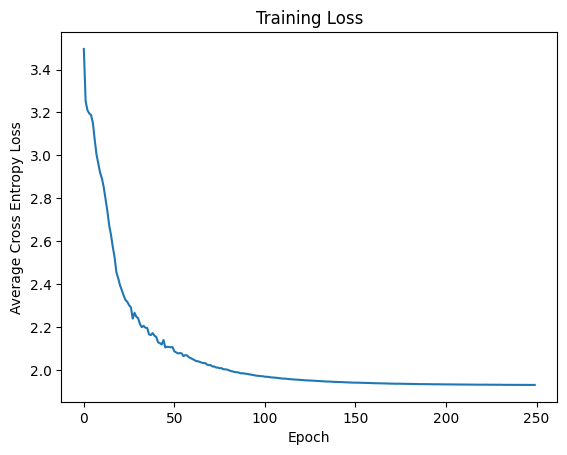

  1%|          | 2/250 [00:00<00:44,  5.52it/s]

Epoch 1/250, Loss: 3.5598
Epoch 2/250, Loss: 3.1578


  2%|▏         | 4/250 [00:00<00:45,  5.41it/s]

Epoch 3/250, Loss: 3.1272
Epoch 4/250, Loss: 3.0748


  2%|▏         | 6/250 [00:01<00:44,  5.49it/s]

Epoch 5/250, Loss: 2.9943
Epoch 6/250, Loss: 2.9172


  3%|▎         | 8/250 [00:01<00:43,  5.56it/s]

Epoch 7/250, Loss: 2.8250
Epoch 8/250, Loss: 2.7461


  4%|▍         | 10/250 [00:01<00:43,  5.48it/s]

Epoch 9/250, Loss: 2.6662
Epoch 10/250, Loss: 2.5732


  5%|▍         | 12/250 [00:02<00:42,  5.55it/s]

Epoch 11/250, Loss: 2.5284
Epoch 12/250, Loss: 2.4996


  6%|▌         | 14/250 [00:02<00:43,  5.41it/s]

Epoch 13/250, Loss: 2.4517
Epoch 14/250, Loss: 2.4085


  6%|▋         | 16/250 [00:02<00:42,  5.50it/s]

Epoch 15/250, Loss: 2.3820
Epoch 16/250, Loss: 2.3804


  7%|▋         | 18/250 [00:03<00:41,  5.55it/s]

Epoch 17/250, Loss: 2.3590
Epoch 18/250, Loss: 2.3306


  8%|▊         | 20/250 [00:03<00:41,  5.51it/s]

Epoch 19/250, Loss: 2.2949
Epoch 20/250, Loss: 2.2959


  9%|▉         | 22/250 [00:04<00:41,  5.48it/s]

Epoch 21/250, Loss: 2.2746
Epoch 22/250, Loss: 2.2742


 10%|▉         | 24/250 [00:04<00:40,  5.57it/s]

Epoch 23/250, Loss: 2.2518
Epoch 24/250, Loss: 2.2269


 10%|█         | 26/250 [00:04<00:40,  5.48it/s]

Epoch 25/250, Loss: 2.2391
Epoch 26/250, Loss: 2.2276


 11%|█         | 28/250 [00:05<00:40,  5.54it/s]

Epoch 27/250, Loss: 2.2111
Epoch 28/250, Loss: 2.1746


 12%|█▏        | 30/250 [00:05<00:41,  5.26it/s]

Epoch 29/250, Loss: 2.1737
Epoch 30/250, Loss: 2.1740


 13%|█▎        | 32/250 [00:05<00:42,  5.11it/s]

Epoch 31/250, Loss: 2.1859
Epoch 32/250, Loss: 2.1497


 14%|█▎        | 34/250 [00:06<00:40,  5.35it/s]

Epoch 33/250, Loss: 2.1356
Epoch 34/250, Loss: 2.1384


 14%|█▍        | 36/250 [00:06<00:39,  5.40it/s]

Epoch 35/250, Loss: 2.1433
Epoch 36/250, Loss: 2.1646


 15%|█▌        | 38/250 [00:06<00:38,  5.48it/s]

Epoch 37/250, Loss: 2.1166
Epoch 38/250, Loss: 2.1070


 16%|█▌        | 40/250 [00:07<00:37,  5.55it/s]

Epoch 39/250, Loss: 2.0996
Epoch 40/250, Loss: 2.1250


 17%|█▋        | 42/250 [00:07<00:37,  5.49it/s]

Epoch 41/250, Loss: 2.0978
Epoch 42/250, Loss: 2.0679


 18%|█▊        | 44/250 [00:08<00:37,  5.52it/s]

Epoch 43/250, Loss: 2.0756
Epoch 44/250, Loss: 2.0944


 18%|█▊        | 45/250 [00:08<00:42,  4.83it/s]

Epoch 45/250, Loss: 2.0804


 18%|█▊        | 46/250 [00:08<00:45,  4.52it/s]

Epoch 46/250, Loss: 2.0639


 19%|█▉        | 47/250 [00:08<00:48,  4.21it/s]

Epoch 47/250, Loss: 2.0597


 19%|█▉        | 48/250 [00:09<00:50,  4.03it/s]

Epoch 48/250, Loss: 2.0544


 20%|█▉        | 49/250 [00:09<00:49,  4.07it/s]

Epoch 49/250, Loss: 2.0601


 20%|██        | 50/250 [00:09<00:50,  3.97it/s]

Epoch 50/250, Loss: 2.0606


 20%|██        | 51/250 [00:09<00:51,  3.85it/s]

Epoch 51/250, Loss: 2.0354


 21%|██        | 52/250 [00:10<00:53,  3.72it/s]

Epoch 52/250, Loss: 2.0317


 21%|██        | 53/250 [00:10<00:53,  3.68it/s]

Epoch 53/250, Loss: 2.0411


 22%|██▏       | 54/250 [00:10<00:54,  3.57it/s]

Epoch 54/250, Loss: 2.0340


 22%|██▏       | 56/250 [00:11<00:46,  4.20it/s]

Epoch 55/250, Loss: 2.0274
Epoch 56/250, Loss: 2.0161


 23%|██▎       | 58/250 [00:11<00:39,  4.82it/s]

Epoch 57/250, Loss: 2.0270
Epoch 58/250, Loss: 2.0158


 24%|██▎       | 59/250 [00:12<00:59,  3.22it/s]

Epoch 59/250, Loss: 2.0161


 24%|██▍       | 61/250 [00:12<00:49,  3.80it/s]

Epoch 60/250, Loss: 2.0060
Epoch 61/250, Loss: 2.0065


 25%|██▍       | 62/250 [00:12<00:45,  4.11it/s]

Epoch 62/250, Loss: 2.0003


 26%|██▌       | 64/250 [00:13<00:40,  4.59it/s]

Epoch 63/250, Loss: 1.9968
Epoch 64/250, Loss: 1.9917


 26%|██▋       | 66/250 [00:13<00:36,  5.07it/s]

Epoch 65/250, Loss: 1.9965
Epoch 66/250, Loss: 1.9876


 27%|██▋       | 68/250 [00:13<00:34,  5.25it/s]

Epoch 67/250, Loss: 1.9872
Epoch 68/250, Loss: 1.9864


 28%|██▊       | 70/250 [00:14<00:33,  5.44it/s]

Epoch 69/250, Loss: 1.9821
Epoch 70/250, Loss: 1.9793


 29%|██▉       | 72/250 [00:14<00:32,  5.45it/s]

Epoch 71/250, Loss: 1.9825
Epoch 72/250, Loss: 1.9806


 30%|██▉       | 74/250 [00:14<00:32,  5.42it/s]

Epoch 73/250, Loss: 1.9763
Epoch 74/250, Loss: 1.9737


 30%|███       | 76/250 [00:15<00:31,  5.55it/s]

Epoch 75/250, Loss: 1.9719
Epoch 76/250, Loss: 1.9697


 31%|███       | 78/250 [00:15<00:30,  5.57it/s]

Epoch 77/250, Loss: 1.9671
Epoch 78/250, Loss: 1.9657


 32%|███▏      | 80/250 [00:16<00:31,  5.40it/s]

Epoch 79/250, Loss: 1.9652
Epoch 80/250, Loss: 1.9641


 33%|███▎      | 82/250 [00:16<00:30,  5.58it/s]

Epoch 81/250, Loss: 1.9646
Epoch 82/250, Loss: 1.9587


 34%|███▎      | 84/250 [00:16<00:30,  5.52it/s]

Epoch 83/250, Loss: 1.9575
Epoch 84/250, Loss: 1.9565


 34%|███▍      | 86/250 [00:17<00:29,  5.49it/s]

Epoch 85/250, Loss: 1.9557
Epoch 86/250, Loss: 1.9555


 35%|███▌      | 88/250 [00:17<00:29,  5.53it/s]

Epoch 87/250, Loss: 1.9524
Epoch 88/250, Loss: 1.9510


 36%|███▌      | 90/250 [00:17<00:28,  5.53it/s]

Epoch 89/250, Loss: 1.9512
Epoch 90/250, Loss: 1.9513


 37%|███▋      | 92/250 [00:18<00:29,  5.31it/s]

Epoch 91/250, Loss: 1.9484
Epoch 92/250, Loss: 1.9467


 38%|███▊      | 94/250 [00:18<00:28,  5.40it/s]

Epoch 93/250, Loss: 1.9468
Epoch 94/250, Loss: 1.9443


 38%|███▊      | 96/250 [00:19<00:29,  5.25it/s]

Epoch 95/250, Loss: 1.9449
Epoch 96/250, Loss: 1.9419


 39%|███▉      | 98/250 [00:19<00:28,  5.37it/s]

Epoch 97/250, Loss: 1.9421
Epoch 98/250, Loss: 1.9407


 40%|████      | 100/250 [00:19<00:27,  5.43it/s]

Epoch 99/250, Loss: 1.9408
Epoch 100/250, Loss: 1.9389


 41%|████      | 102/250 [00:20<00:27,  5.36it/s]

Epoch 101/250, Loss: 1.9378
Epoch 102/250, Loss: 1.9374


 42%|████▏     | 104/250 [00:20<00:26,  5.56it/s]

Epoch 103/250, Loss: 1.9360
Epoch 104/250, Loss: 1.9349


 42%|████▏     | 106/250 [00:20<00:25,  5.56it/s]

Epoch 105/250, Loss: 1.9350
Epoch 106/250, Loss: 1.9342


 43%|████▎     | 107/250 [00:21<00:29,  4.92it/s]

Epoch 107/250, Loss: 1.9331


 43%|████▎     | 108/250 [00:21<00:31,  4.56it/s]

Epoch 108/250, Loss: 1.9328


 44%|████▎     | 109/250 [00:21<00:32,  4.40it/s]

Epoch 109/250, Loss: 1.9322


 44%|████▍     | 110/250 [00:21<00:32,  4.28it/s]

Epoch 110/250, Loss: 1.9316


 44%|████▍     | 111/250 [00:22<00:33,  4.20it/s]

Epoch 111/250, Loss: 1.9303


 45%|████▍     | 112/250 [00:22<00:33,  4.06it/s]

Epoch 112/250, Loss: 1.9295


 45%|████▌     | 113/250 [00:22<00:34,  3.93it/s]

Epoch 113/250, Loss: 1.9291


 46%|████▌     | 114/250 [00:22<00:36,  3.76it/s]

Epoch 114/250, Loss: 1.9287


 46%|████▌     | 115/250 [00:23<00:37,  3.62it/s]

Epoch 115/250, Loss: 1.9282


 46%|████▋     | 116/250 [00:23<00:37,  3.59it/s]

Epoch 116/250, Loss: 1.9270


 47%|████▋     | 118/250 [00:23<00:31,  4.21it/s]

Epoch 117/250, Loss: 1.9270
Epoch 118/250, Loss: 1.9263


 48%|████▊     | 120/250 [00:24<00:27,  4.75it/s]

Epoch 119/250, Loss: 1.9258
Epoch 120/250, Loss: 1.9251


 49%|████▉     | 122/250 [00:24<00:25,  5.10it/s]

Epoch 121/250, Loss: 1.9243
Epoch 122/250, Loss: 1.9247


 50%|████▉     | 124/250 [00:24<00:23,  5.35it/s]

Epoch 123/250, Loss: 1.9236
Epoch 124/250, Loss: 1.9232


 50%|█████     | 126/250 [00:25<00:22,  5.41it/s]

Epoch 125/250, Loss: 1.9225
Epoch 126/250, Loss: 1.9225


 51%|█████     | 128/250 [00:25<00:22,  5.46it/s]

Epoch 127/250, Loss: 1.9217
Epoch 128/250, Loss: 1.9212


 52%|█████▏    | 130/250 [00:26<00:21,  5.54it/s]

Epoch 129/250, Loss: 1.9204
Epoch 130/250, Loss: 1.9202


 53%|█████▎    | 132/250 [00:26<00:21,  5.44it/s]

Epoch 131/250, Loss: 1.9201
Epoch 132/250, Loss: 1.9201


 54%|█████▎    | 134/250 [00:26<00:21,  5.40it/s]

Epoch 133/250, Loss: 1.9189
Epoch 134/250, Loss: 1.9187


 54%|█████▍    | 136/250 [00:27<00:20,  5.47it/s]

Epoch 135/250, Loss: 1.9183
Epoch 136/250, Loss: 1.9179


 55%|█████▌    | 138/250 [00:27<00:20,  5.40it/s]

Epoch 137/250, Loss: 1.9180
Epoch 138/250, Loss: 1.9172


 56%|█████▌    | 140/250 [00:27<00:20,  5.42it/s]

Epoch 139/250, Loss: 1.9167
Epoch 140/250, Loss: 1.9167


 57%|█████▋    | 142/250 [00:28<00:20,  5.38it/s]

Epoch 141/250, Loss: 1.9163
Epoch 142/250, Loss: 1.9158


 58%|█████▊    | 144/250 [00:28<00:19,  5.48it/s]

Epoch 143/250, Loss: 1.9157
Epoch 144/250, Loss: 1.9154


 58%|█████▊    | 146/250 [00:29<00:19,  5.46it/s]

Epoch 145/250, Loss: 1.9150
Epoch 146/250, Loss: 1.9150


 59%|█████▉    | 148/250 [00:29<00:19,  5.32it/s]

Epoch 147/250, Loss: 1.9147
Epoch 148/250, Loss: 1.9139


 60%|██████    | 150/250 [00:29<00:18,  5.44it/s]

Epoch 149/250, Loss: 1.9140
Epoch 150/250, Loss: 1.9137


 61%|██████    | 152/250 [00:30<00:17,  5.53it/s]

Epoch 151/250, Loss: 1.9132
Epoch 152/250, Loss: 1.9132


 62%|██████▏   | 154/250 [00:30<00:17,  5.52it/s]

Epoch 153/250, Loss: 1.9130
Epoch 154/250, Loss: 1.9129


 62%|██████▏   | 156/250 [00:30<00:17,  5.41it/s]

Epoch 155/250, Loss: 1.9124
Epoch 156/250, Loss: 1.9123


 63%|██████▎   | 158/250 [00:31<00:16,  5.52it/s]

Epoch 157/250, Loss: 1.9120
Epoch 158/250, Loss: 1.9119


 64%|██████▍   | 160/250 [00:31<00:16,  5.59it/s]

Epoch 159/250, Loss: 1.9116
Epoch 160/250, Loss: 1.9113


 65%|██████▍   | 162/250 [00:31<00:15,  5.58it/s]

Epoch 161/250, Loss: 1.9112
Epoch 162/250, Loss: 1.9112


 66%|██████▌   | 164/250 [00:32<00:15,  5.57it/s]

Epoch 163/250, Loss: 1.9109
Epoch 164/250, Loss: 1.9106


 66%|██████▋   | 166/250 [00:32<00:15,  5.49it/s]

Epoch 165/250, Loss: 1.9102
Epoch 166/250, Loss: 1.9103


 67%|██████▋   | 168/250 [00:33<00:14,  5.57it/s]

Epoch 167/250, Loss: 1.9099
Epoch 168/250, Loss: 1.9102


 68%|██████▊   | 170/250 [00:33<00:14,  5.50it/s]

Epoch 169/250, Loss: 1.9096
Epoch 170/250, Loss: 1.9097


 68%|██████▊   | 171/250 [00:33<00:14,  5.48it/s]

Epoch 171/250, Loss: 1.9094


 69%|██████▉   | 172/250 [00:33<00:16,  4.72it/s]

Epoch 172/250, Loss: 1.9092


 69%|██████▉   | 173/250 [00:34<00:17,  4.51it/s]

Epoch 173/250, Loss: 1.9091


 70%|██████▉   | 174/250 [00:34<00:17,  4.39it/s]

Epoch 174/250, Loss: 1.9090


 70%|███████   | 175/250 [00:34<00:17,  4.24it/s]

Epoch 175/250, Loss: 1.9088


 70%|███████   | 176/250 [00:34<00:17,  4.18it/s]

Epoch 176/250, Loss: 1.9087


 71%|███████   | 177/250 [00:35<00:18,  4.01it/s]

Epoch 177/250, Loss: 1.9086


 71%|███████   | 178/250 [00:35<00:18,  3.93it/s]

Epoch 178/250, Loss: 1.9084


 72%|███████▏  | 179/250 [00:35<00:18,  3.75it/s]

Epoch 179/250, Loss: 1.9082


 72%|███████▏  | 180/250 [00:35<00:19,  3.66it/s]

Epoch 180/250, Loss: 1.9082


 73%|███████▎  | 182/250 [00:36<00:17,  3.99it/s]

Epoch 181/250, Loss: 1.9082
Epoch 182/250, Loss: 1.9078


 74%|███████▎  | 184/250 [00:36<00:14,  4.58it/s]

Epoch 183/250, Loss: 1.9076
Epoch 184/250, Loss: 1.9077


 74%|███████▍  | 186/250 [00:37<00:12,  5.02it/s]

Epoch 185/250, Loss: 1.9075
Epoch 186/250, Loss: 1.9074


 75%|███████▌  | 188/250 [00:37<00:12,  5.16it/s]

Epoch 187/250, Loss: 1.9073
Epoch 188/250, Loss: 1.9073


 76%|███████▌  | 190/250 [00:37<00:11,  5.34it/s]

Epoch 189/250, Loss: 1.9071
Epoch 190/250, Loss: 1.9069


 77%|███████▋  | 192/250 [00:38<00:10,  5.51it/s]

Epoch 191/250, Loss: 1.9071
Epoch 192/250, Loss: 1.9067


 78%|███████▊  | 194/250 [00:38<00:10,  5.40it/s]

Epoch 193/250, Loss: 1.9068
Epoch 194/250, Loss: 1.9067


 78%|███████▊  | 196/250 [00:39<00:09,  5.43it/s]

Epoch 195/250, Loss: 1.9067
Epoch 196/250, Loss: 1.9065


 79%|███████▉  | 198/250 [00:39<00:09,  5.37it/s]

Epoch 197/250, Loss: 1.9064
Epoch 198/250, Loss: 1.9064


 80%|████████  | 200/250 [00:39<00:09,  5.21it/s]

Epoch 199/250, Loss: 1.9062
Epoch 200/250, Loss: 1.9060


 81%|████████  | 202/250 [00:40<00:09,  5.32it/s]

Epoch 201/250, Loss: 1.9058
Epoch 202/250, Loss: 1.9059


 82%|████████▏ | 204/250 [00:40<00:08,  5.45it/s]

Epoch 203/250, Loss: 1.9059
Epoch 204/250, Loss: 1.9058


 82%|████████▏ | 206/250 [00:40<00:08,  5.47it/s]

Epoch 205/250, Loss: 1.9059
Epoch 206/250, Loss: 1.9059


 83%|████████▎ | 208/250 [00:41<00:07,  5.57it/s]

Epoch 207/250, Loss: 1.9056
Epoch 208/250, Loss: 1.9057


 84%|████████▍ | 210/250 [00:41<00:07,  5.53it/s]

Epoch 209/250, Loss: 1.9057
Epoch 210/250, Loss: 1.9054


 85%|████████▍ | 212/250 [00:41<00:06,  5.53it/s]

Epoch 211/250, Loss: 1.9055
Epoch 212/250, Loss: 1.9053


 86%|████████▌ | 214/250 [00:42<00:06,  5.57it/s]

Epoch 213/250, Loss: 1.9052
Epoch 214/250, Loss: 1.9052


 86%|████████▋ | 216/250 [00:42<00:06,  5.35it/s]

Epoch 215/250, Loss: 1.9051
Epoch 216/250, Loss: 1.9049


 87%|████████▋ | 218/250 [00:43<00:05,  5.34it/s]

Epoch 217/250, Loss: 1.9051
Epoch 218/250, Loss: 1.9050


 88%|████████▊ | 220/250 [00:43<00:05,  5.44it/s]

Epoch 219/250, Loss: 1.9050
Epoch 220/250, Loss: 1.9049


 89%|████████▉ | 222/250 [00:43<00:05,  5.42it/s]

Epoch 221/250, Loss: 1.9049
Epoch 222/250, Loss: 1.9048


 90%|████████▉ | 224/250 [00:44<00:04,  5.53it/s]

Epoch 223/250, Loss: 1.9048
Epoch 224/250, Loss: 1.9049


 90%|█████████ | 226/250 [00:44<00:04,  5.62it/s]

Epoch 225/250, Loss: 1.9045
Epoch 226/250, Loss: 1.9047


 91%|█████████ | 228/250 [00:44<00:03,  5.52it/s]

Epoch 227/250, Loss: 1.9044
Epoch 228/250, Loss: 1.9044


 92%|█████████▏| 230/250 [00:45<00:03,  5.46it/s]

Epoch 229/250, Loss: 1.9045
Epoch 230/250, Loss: 1.9044


 93%|█████████▎| 232/250 [00:45<00:03,  5.43it/s]

Epoch 231/250, Loss: 1.9043
Epoch 232/250, Loss: 1.9046


 94%|█████████▎| 234/250 [00:46<00:02,  5.41it/s]

Epoch 233/250, Loss: 1.9042
Epoch 234/250, Loss: 1.9042


 94%|█████████▍| 235/250 [00:46<00:02,  5.44it/s]

Epoch 235/250, Loss: 1.9043


 94%|█████████▍| 236/250 [00:46<00:02,  5.02it/s]

Epoch 236/250, Loss: 1.9042


 95%|█████████▍| 237/250 [00:46<00:02,  4.61it/s]

Epoch 237/250, Loss: 1.9041


 95%|█████████▌| 238/250 [00:46<00:02,  4.37it/s]

Epoch 238/250, Loss: 1.9039


 96%|█████████▌| 239/250 [00:47<00:02,  4.32it/s]

Epoch 239/250, Loss: 1.9040


 96%|█████████▌| 240/250 [00:47<00:02,  4.26it/s]

Epoch 240/250, Loss: 1.9039


 96%|█████████▋| 241/250 [00:47<00:02,  4.15it/s]

Epoch 241/250, Loss: 1.9038


 97%|█████████▋| 242/250 [00:47<00:02,  3.98it/s]

Epoch 242/250, Loss: 1.9038


 97%|█████████▋| 243/250 [00:48<00:01,  3.82it/s]

Epoch 243/250, Loss: 1.9040


 98%|█████████▊| 244/250 [00:48<00:01,  3.76it/s]

Epoch 244/250, Loss: 1.9038


 98%|█████████▊| 245/250 [00:48<00:01,  3.68it/s]

Epoch 245/250, Loss: 1.9037


 99%|█████████▉| 247/250 [00:49<00:00,  3.99it/s]

Epoch 246/250, Loss: 1.9040
Epoch 247/250, Loss: 1.9039


100%|█████████▉| 249/250 [00:49<00:00,  4.69it/s]

Epoch 248/250, Loss: 1.9038
Epoch 249/250, Loss: 1.9039


100%|██████████| 250/250 [00:49<00:00,  5.02it/s]


Epoch 250/250, Loss: 1.9037


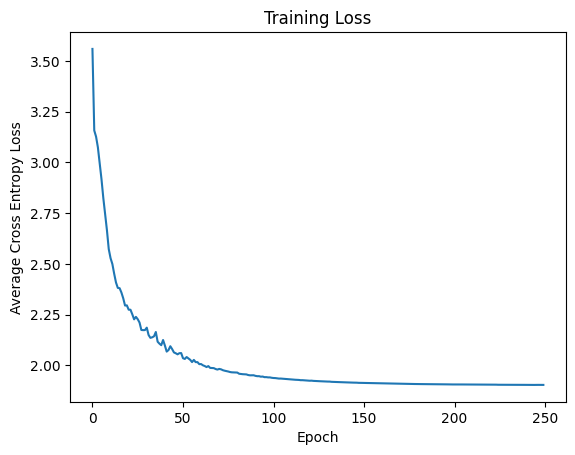

  0%|          | 1/250 [00:00<00:55,  4.50it/s]

Epoch 1/250, Loss: 3.1891


  1%|          | 2/250 [00:00<00:55,  4.49it/s]

Epoch 2/250, Loss: 2.6852


  1%|          | 3/250 [00:00<00:54,  4.50it/s]

Epoch 3/250, Loss: 2.4121


  2%|▏         | 4/250 [00:00<00:54,  4.47it/s]

Epoch 4/250, Loss: 2.2428


  2%|▏         | 5/250 [00:01<00:54,  4.46it/s]

Epoch 5/250, Loss: 1.9330


  2%|▏         | 6/250 [00:01<00:54,  4.46it/s]

Epoch 6/250, Loss: 1.7213


  3%|▎         | 7/250 [00:01<00:54,  4.47it/s]

Epoch 7/250, Loss: 1.6577


  3%|▎         | 8/250 [00:01<00:54,  4.46it/s]

Epoch 8/250, Loss: 1.5595


  4%|▎         | 9/250 [00:02<00:54,  4.45it/s]

Epoch 9/250, Loss: 1.4511


  4%|▍         | 10/250 [00:02<00:53,  4.46it/s]

Epoch 10/250, Loss: 1.3056


  4%|▍         | 11/250 [00:02<00:53,  4.47it/s]

Epoch 11/250, Loss: 1.2636


  5%|▍         | 12/250 [00:02<00:53,  4.45it/s]

Epoch 12/250, Loss: 1.2060


  5%|▌         | 13/250 [00:02<00:53,  4.45it/s]

Epoch 13/250, Loss: 1.1423


  6%|▌         | 14/250 [00:03<00:53,  4.43it/s]

Epoch 14/250, Loss: 1.0794


  6%|▌         | 15/250 [00:03<00:52,  4.45it/s]

Epoch 15/250, Loss: 0.9830


  6%|▋         | 16/250 [00:03<00:52,  4.46it/s]

Epoch 16/250, Loss: 1.0206


  7%|▋         | 17/250 [00:03<00:52,  4.47it/s]

Epoch 17/250, Loss: 0.9189


  7%|▋         | 18/250 [00:04<00:52,  4.46it/s]

Epoch 18/250, Loss: 0.8612


  8%|▊         | 19/250 [00:04<00:51,  4.47it/s]

Epoch 19/250, Loss: 0.8451


  8%|▊         | 20/250 [00:04<00:51,  4.46it/s]

Epoch 20/250, Loss: 0.7665


  8%|▊         | 21/250 [00:04<00:51,  4.47it/s]

Epoch 21/250, Loss: 0.7728


  9%|▉         | 22/250 [00:04<00:51,  4.46it/s]

Epoch 22/250, Loss: 0.7722


  9%|▉         | 23/250 [00:05<00:50,  4.45it/s]

Epoch 23/250, Loss: 0.7222


 10%|▉         | 24/250 [00:05<00:50,  4.46it/s]

Epoch 24/250, Loss: 0.6317


 10%|█         | 25/250 [00:05<00:50,  4.45it/s]

Epoch 25/250, Loss: 0.6402


 10%|█         | 26/250 [00:05<00:50,  4.45it/s]

Epoch 26/250, Loss: 0.6195


 11%|█         | 27/250 [00:06<00:50,  4.45it/s]

Epoch 27/250, Loss: 0.5952


 11%|█         | 28/250 [00:06<00:49,  4.46it/s]

Epoch 28/250, Loss: 0.5713


 12%|█▏        | 29/250 [00:06<00:49,  4.46it/s]

Epoch 29/250, Loss: 0.5167


 12%|█▏        | 30/250 [00:06<00:49,  4.47it/s]

Epoch 30/250, Loss: 0.5074


 12%|█▏        | 31/250 [00:06<00:49,  4.46it/s]

Epoch 31/250, Loss: 0.5133


 13%|█▎        | 32/250 [00:07<00:48,  4.45it/s]

Epoch 32/250, Loss: 0.5273


 13%|█▎        | 33/250 [00:07<00:48,  4.46it/s]

Epoch 33/250, Loss: 0.4421


 14%|█▎        | 34/250 [00:07<00:48,  4.45it/s]

Epoch 34/250, Loss: 0.4380


 14%|█▍        | 35/250 [00:07<00:48,  4.46it/s]

Epoch 35/250, Loss: 0.4281


 14%|█▍        | 36/250 [00:08<00:48,  4.46it/s]

Epoch 36/250, Loss: 0.4317


 15%|█▍        | 37/250 [00:08<00:47,  4.46it/s]

Epoch 37/250, Loss: 0.4107


 15%|█▌        | 38/250 [00:08<00:47,  4.46it/s]

Epoch 38/250, Loss: 0.3644


 16%|█▌        | 39/250 [00:08<00:47,  4.46it/s]

Epoch 39/250, Loss: 0.3727


 16%|█▌        | 40/250 [00:08<00:47,  4.46it/s]

Epoch 40/250, Loss: 0.3532


 16%|█▋        | 41/250 [00:09<00:48,  4.32it/s]

Epoch 41/250, Loss: 0.3524


 17%|█▋        | 42/250 [00:09<00:50,  4.14it/s]

Epoch 42/250, Loss: 0.3199


 17%|█▋        | 43/250 [00:09<00:50,  4.09it/s]

Epoch 43/250, Loss: 0.3203


 18%|█▊        | 44/250 [00:09<00:51,  4.03it/s]

Epoch 44/250, Loss: 0.3118


 18%|█▊        | 45/250 [00:10<00:50,  4.04it/s]

Epoch 45/250, Loss: 0.3066


 18%|█▊        | 46/250 [00:10<00:51,  3.98it/s]

Epoch 46/250, Loss: 0.2907


 19%|█▉        | 47/250 [00:10<00:52,  3.90it/s]

Epoch 47/250, Loss: 0.2748


 19%|█▉        | 48/250 [00:11<00:53,  3.75it/s]

Epoch 48/250, Loss: 0.2680


 20%|█▉        | 49/250 [00:11<00:55,  3.64it/s]

Epoch 49/250, Loss: 0.2624


 20%|██        | 50/250 [00:11<00:55,  3.61it/s]

Epoch 50/250, Loss: 0.2577


 20%|██        | 51/250 [00:11<00:54,  3.64it/s]

Epoch 51/250, Loss: 0.2488


 21%|██        | 52/250 [00:12<00:51,  3.85it/s]

Epoch 52/250, Loss: 0.2442


 21%|██        | 53/250 [00:12<00:49,  4.01it/s]

Epoch 53/250, Loss: 0.2386


 22%|██▏       | 54/250 [00:12<00:47,  4.12it/s]

Epoch 54/250, Loss: 0.2344


 22%|██▏       | 55/250 [00:12<00:46,  4.21it/s]

Epoch 55/250, Loss: 0.2306


 22%|██▏       | 56/250 [00:13<00:45,  4.27it/s]

Epoch 56/250, Loss: 0.2208


 23%|██▎       | 57/250 [00:13<00:44,  4.33it/s]

Epoch 57/250, Loss: 0.2176


 23%|██▎       | 58/250 [00:13<00:43,  4.37it/s]

Epoch 58/250, Loss: 0.2111


 24%|██▎       | 59/250 [00:13<00:43,  4.39it/s]

Epoch 59/250, Loss: 0.2085


 24%|██▍       | 60/250 [00:13<00:43,  4.42it/s]

Epoch 60/250, Loss: 0.2017


 24%|██▍       | 61/250 [00:14<00:42,  4.43it/s]

Epoch 61/250, Loss: 0.1977


 25%|██▍       | 62/250 [00:14<00:42,  4.40it/s]

Epoch 62/250, Loss: 0.1932


 25%|██▌       | 63/250 [00:14<00:42,  4.42it/s]

Epoch 63/250, Loss: 0.1910


 26%|██▌       | 64/250 [00:14<00:41,  4.44it/s]

Epoch 64/250, Loss: 0.1885


 26%|██▌       | 65/250 [00:15<00:41,  4.45it/s]

Epoch 65/250, Loss: 0.1826


 26%|██▋       | 66/250 [00:15<00:41,  4.45it/s]

Epoch 66/250, Loss: 0.1797


 27%|██▋       | 67/250 [00:15<00:41,  4.46it/s]

Epoch 67/250, Loss: 0.1764


 27%|██▋       | 68/250 [00:15<00:40,  4.46it/s]

Epoch 68/250, Loss: 0.1734


 28%|██▊       | 69/250 [00:15<00:40,  4.46it/s]

Epoch 69/250, Loss: 0.1706


 28%|██▊       | 70/250 [00:16<00:40,  4.46it/s]

Epoch 70/250, Loss: 0.1683


 28%|██▊       | 71/250 [00:16<00:40,  4.46it/s]

Epoch 71/250, Loss: 0.1653


 29%|██▉       | 72/250 [00:16<00:39,  4.46it/s]

Epoch 72/250, Loss: 0.1631


 29%|██▉       | 73/250 [00:16<00:39,  4.46it/s]

Epoch 73/250, Loss: 0.1604


 30%|██▉       | 74/250 [00:17<00:39,  4.44it/s]

Epoch 74/250, Loss: 0.1581


 30%|███       | 75/250 [00:17<00:39,  4.45it/s]

Epoch 75/250, Loss: 0.1555


 30%|███       | 76/250 [00:17<00:39,  4.39it/s]

Epoch 76/250, Loss: 0.1543


 31%|███       | 77/250 [00:17<00:39,  4.42it/s]

Epoch 77/250, Loss: 0.1518


 31%|███       | 78/250 [00:17<00:38,  4.42it/s]

Epoch 78/250, Loss: 0.1499


 32%|███▏      | 79/250 [00:18<00:38,  4.43it/s]

Epoch 79/250, Loss: 0.1476


 32%|███▏      | 80/250 [00:18<00:38,  4.44it/s]

Epoch 80/250, Loss: 0.1458


 32%|███▏      | 81/250 [00:18<00:37,  4.45it/s]

Epoch 81/250, Loss: 0.1446


 33%|███▎      | 82/250 [00:18<00:37,  4.45it/s]

Epoch 82/250, Loss: 0.1425


 33%|███▎      | 83/250 [00:19<00:37,  4.46it/s]

Epoch 83/250, Loss: 0.1410


 34%|███▎      | 84/250 [00:19<00:37,  4.46it/s]

Epoch 84/250, Loss: 0.1391


 34%|███▍      | 85/250 [00:19<00:36,  4.46it/s]

Epoch 85/250, Loss: 0.1379


 34%|███▍      | 86/250 [00:19<00:36,  4.46it/s]

Epoch 86/250, Loss: 0.1367


 35%|███▍      | 87/250 [00:19<00:36,  4.46it/s]

Epoch 87/250, Loss: 0.1352


 35%|███▌      | 88/250 [00:20<00:36,  4.45it/s]

Epoch 88/250, Loss: 0.1336


 36%|███▌      | 89/250 [00:20<00:36,  4.44it/s]

Epoch 89/250, Loss: 0.1324


 36%|███▌      | 90/250 [00:20<00:36,  4.43it/s]

Epoch 90/250, Loss: 0.1315


 36%|███▋      | 91/250 [00:20<00:35,  4.44it/s]

Epoch 91/250, Loss: 0.1299


 37%|███▋      | 92/250 [00:21<00:35,  4.45it/s]

Epoch 92/250, Loss: 0.1286


 37%|███▋      | 93/250 [00:21<00:35,  4.45it/s]

Epoch 93/250, Loss: 0.1275


 38%|███▊      | 94/250 [00:21<00:35,  4.45it/s]

Epoch 94/250, Loss: 0.1265


 38%|███▊      | 95/250 [00:21<00:34,  4.46it/s]

Epoch 95/250, Loss: 0.1258


 38%|███▊      | 96/250 [00:22<00:37,  4.13it/s]

Epoch 96/250, Loss: 0.1244


 39%|███▉      | 97/250 [00:22<00:36,  4.15it/s]

Epoch 97/250, Loss: 0.1233


 39%|███▉      | 98/250 [00:22<00:37,  4.07it/s]

Epoch 98/250, Loss: 0.1227


 40%|███▉      | 99/250 [00:22<00:38,  3.96it/s]

Epoch 99/250, Loss: 0.1216


 40%|████      | 100/250 [00:23<00:37,  3.96it/s]

Epoch 100/250, Loss: 0.1210


 40%|████      | 101/250 [00:23<00:38,  3.89it/s]

Epoch 101/250, Loss: 0.1196


 41%|████      | 102/250 [00:23<00:38,  3.80it/s]

Epoch 102/250, Loss: 0.1191


 41%|████      | 103/250 [00:23<00:39,  3.72it/s]

Epoch 103/250, Loss: 0.1181


 42%|████▏     | 104/250 [00:24<00:40,  3.63it/s]

Epoch 104/250, Loss: 0.1175


 42%|████▏     | 105/250 [00:24<00:40,  3.59it/s]

Epoch 105/250, Loss: 0.1167


 42%|████▏     | 106/250 [00:24<00:38,  3.71it/s]

Epoch 106/250, Loss: 0.1156


 43%|████▎     | 107/250 [00:24<00:36,  3.91it/s]

Epoch 107/250, Loss: 0.1151


 43%|████▎     | 108/250 [00:25<00:35,  4.06it/s]

Epoch 108/250, Loss: 0.1144


 44%|████▎     | 109/250 [00:25<00:33,  4.17it/s]

Epoch 109/250, Loss: 0.1139


 44%|████▍     | 110/250 [00:25<00:32,  4.25it/s]

Epoch 110/250, Loss: 0.1131


 44%|████▍     | 111/250 [00:25<00:32,  4.32it/s]

Epoch 111/250, Loss: 0.1126


 45%|████▍     | 112/250 [00:26<00:31,  4.36it/s]

Epoch 112/250, Loss: 0.1120


 45%|████▌     | 113/250 [00:26<00:31,  4.39it/s]

Epoch 113/250, Loss: 0.1113


 46%|████▌     | 114/250 [00:26<00:30,  4.41it/s]

Epoch 114/250, Loss: 0.1108


 46%|████▌     | 115/250 [00:26<00:30,  4.43it/s]

Epoch 115/250, Loss: 0.1101


 46%|████▋     | 116/250 [00:26<00:30,  4.44it/s]

Epoch 116/250, Loss: 0.1096


 47%|████▋     | 117/250 [00:27<00:29,  4.45it/s]

Epoch 117/250, Loss: 0.1093


 47%|████▋     | 118/250 [00:27<00:29,  4.45it/s]

Epoch 118/250, Loss: 0.1086


 48%|████▊     | 119/250 [00:27<00:29,  4.45it/s]

Epoch 119/250, Loss: 0.1082


 48%|████▊     | 120/250 [00:27<00:29,  4.45it/s]

Epoch 120/250, Loss: 0.1076


 48%|████▊     | 121/250 [00:28<00:29,  4.44it/s]

Epoch 121/250, Loss: 0.1070


 49%|████▉     | 122/250 [00:28<00:28,  4.44it/s]

Epoch 122/250, Loss: 0.1068


 49%|████▉     | 123/250 [00:28<00:28,  4.45it/s]

Epoch 123/250, Loss: 0.1064


 50%|████▉     | 124/250 [00:28<00:28,  4.45it/s]

Epoch 124/250, Loss: 0.1058


 50%|█████     | 125/250 [00:29<00:28,  4.45it/s]

Epoch 125/250, Loss: 0.1055


 50%|█████     | 126/250 [00:29<00:27,  4.44it/s]

Epoch 126/250, Loss: 0.1050


 51%|█████     | 127/250 [00:29<00:27,  4.45it/s]

Epoch 127/250, Loss: 0.1049


 51%|█████     | 128/250 [00:29<00:27,  4.46it/s]

Epoch 128/250, Loss: 0.1044


 52%|█████▏    | 129/250 [00:29<00:27,  4.41it/s]

Epoch 129/250, Loss: 0.1039


 52%|█████▏    | 130/250 [00:30<00:27,  4.43it/s]

Epoch 130/250, Loss: 0.1036


 52%|█████▏    | 131/250 [00:30<00:26,  4.43it/s]

Epoch 131/250, Loss: 0.1033


 53%|█████▎    | 132/250 [00:30<00:26,  4.44it/s]

Epoch 132/250, Loss: 0.1029


 53%|█████▎    | 133/250 [00:30<00:26,  4.45it/s]

Epoch 133/250, Loss: 0.1026


 54%|█████▎    | 134/250 [00:31<00:26,  4.44it/s]

Epoch 134/250, Loss: 0.1023


 54%|█████▍    | 135/250 [00:31<00:25,  4.44it/s]

Epoch 135/250, Loss: 0.1019


 54%|█████▍    | 136/250 [00:31<00:25,  4.45it/s]

Epoch 136/250, Loss: 0.1016


 55%|█████▍    | 137/250 [00:31<00:25,  4.46it/s]

Epoch 137/250, Loss: 0.1013


 55%|█████▌    | 138/250 [00:31<00:25,  4.44it/s]

Epoch 138/250, Loss: 0.1009


 56%|█████▌    | 139/250 [00:32<00:24,  4.45it/s]

Epoch 139/250, Loss: 0.1008


 56%|█████▌    | 140/250 [00:32<00:24,  4.46it/s]

Epoch 140/250, Loss: 0.1006


 56%|█████▋    | 141/250 [00:32<00:24,  4.45it/s]

Epoch 141/250, Loss: 0.1003


 57%|█████▋    | 142/250 [00:32<00:24,  4.45it/s]

Epoch 142/250, Loss: 0.1000


 57%|█████▋    | 143/250 [00:33<00:24,  4.44it/s]

Epoch 143/250, Loss: 0.0997


 58%|█████▊    | 144/250 [00:33<00:23,  4.45it/s]

Epoch 144/250, Loss: 0.0996


 58%|█████▊    | 145/250 [00:33<00:23,  4.46it/s]

Epoch 145/250, Loss: 0.0993


 58%|█████▊    | 146/250 [00:33<00:23,  4.46it/s]

Epoch 146/250, Loss: 0.0990


 59%|█████▉    | 147/250 [00:33<00:23,  4.46it/s]

Epoch 147/250, Loss: 0.0988


 59%|█████▉    | 148/250 [00:34<00:22,  4.46it/s]

Epoch 148/250, Loss: 0.0986


 60%|█████▉    | 149/250 [00:34<00:22,  4.46it/s]

Epoch 149/250, Loss: 0.0985


 60%|██████    | 150/250 [00:34<00:22,  4.45it/s]

Epoch 150/250, Loss: 0.0982


 60%|██████    | 151/250 [00:34<00:24,  4.06it/s]

Epoch 151/250, Loss: 0.0979


 61%|██████    | 152/250 [00:35<00:24,  4.03it/s]

Epoch 152/250, Loss: 0.0977


 61%|██████    | 153/250 [00:35<00:24,  3.99it/s]

Epoch 153/250, Loss: 0.0976


 62%|██████▏   | 154/250 [00:35<00:24,  3.98it/s]

Epoch 154/250, Loss: 0.0974


 62%|██████▏   | 155/250 [00:35<00:24,  3.92it/s]

Epoch 155/250, Loss: 0.0973


 62%|██████▏   | 156/250 [00:36<00:24,  3.85it/s]

Epoch 156/250, Loss: 0.0970


 63%|██████▎   | 157/250 [00:36<00:24,  3.72it/s]

Epoch 157/250, Loss: 0.0969


 63%|██████▎   | 158/250 [00:36<00:25,  3.59it/s]

Epoch 158/250, Loss: 0.0967


 64%|██████▎   | 159/250 [00:37<00:25,  3.52it/s]

Epoch 159/250, Loss: 0.0966


 64%|██████▍   | 160/250 [00:37<00:25,  3.50it/s]

Epoch 160/250, Loss: 0.0963


 64%|██████▍   | 161/250 [00:37<00:23,  3.74it/s]

Epoch 161/250, Loss: 0.0962


 65%|██████▍   | 162/250 [00:37<00:22,  3.93it/s]

Epoch 162/250, Loss: 0.0961


 65%|██████▌   | 163/250 [00:38<00:21,  4.08it/s]

Epoch 163/250, Loss: 0.0959


 66%|██████▌   | 164/250 [00:38<00:20,  4.18it/s]

Epoch 164/250, Loss: 0.0957


 66%|██████▌   | 165/250 [00:38<00:19,  4.27it/s]

Epoch 165/250, Loss: 0.0956


 66%|██████▋   | 166/250 [00:38<00:19,  4.33it/s]

Epoch 166/250, Loss: 0.0955


 67%|██████▋   | 167/250 [00:38<00:19,  4.36it/s]

Epoch 167/250, Loss: 0.0954


 67%|██████▋   | 168/250 [00:39<00:18,  4.38it/s]

Epoch 168/250, Loss: 0.0953


 68%|██████▊   | 169/250 [00:39<00:18,  4.40it/s]

Epoch 169/250, Loss: 0.0950


 68%|██████▊   | 170/250 [00:39<00:18,  4.43it/s]

Epoch 170/250, Loss: 0.0950


 68%|██████▊   | 171/250 [00:39<00:17,  4.44it/s]

Epoch 171/250, Loss: 0.0949


 69%|██████▉   | 172/250 [00:40<00:17,  4.44it/s]

Epoch 172/250, Loss: 0.0947


 69%|██████▉   | 173/250 [00:40<00:17,  4.44it/s]

Epoch 173/250, Loss: 0.0946


 70%|██████▉   | 174/250 [00:40<00:17,  4.45it/s]

Epoch 174/250, Loss: 0.0945


 70%|███████   | 175/250 [00:40<00:16,  4.46it/s]

Epoch 175/250, Loss: 0.0944


 70%|███████   | 176/250 [00:40<00:16,  4.46it/s]

Epoch 176/250, Loss: 0.0943


 71%|███████   | 177/250 [00:41<00:16,  4.45it/s]

Epoch 177/250, Loss: 0.0942


 71%|███████   | 178/250 [00:41<00:16,  4.46it/s]

Epoch 178/250, Loss: 0.0941


 72%|███████▏  | 179/250 [00:41<00:15,  4.46it/s]

Epoch 179/250, Loss: 0.0940


 72%|███████▏  | 180/250 [00:41<00:15,  4.46it/s]

Epoch 180/250, Loss: 0.0939


 72%|███████▏  | 181/250 [00:42<00:15,  4.46it/s]

Epoch 181/250, Loss: 0.0938


 73%|███████▎  | 182/250 [00:42<00:15,  4.44it/s]

Epoch 182/250, Loss: 0.0937


 73%|███████▎  | 183/250 [00:42<00:15,  4.45it/s]

Epoch 183/250, Loss: 0.0936


 74%|███████▎  | 184/250 [00:42<00:14,  4.45it/s]

Epoch 184/250, Loss: 0.0935


 74%|███████▍  | 185/250 [00:43<00:14,  4.46it/s]

Epoch 185/250, Loss: 0.0934


 74%|███████▍  | 186/250 [00:43<00:14,  4.46it/s]

Epoch 186/250, Loss: 0.0934


 75%|███████▍  | 187/250 [00:43<00:14,  4.46it/s]

Epoch 187/250, Loss: 0.0932


 75%|███████▌  | 188/250 [00:43<00:13,  4.46it/s]

Epoch 188/250, Loss: 0.0932


 76%|███████▌  | 189/250 [00:43<00:13,  4.46it/s]

Epoch 189/250, Loss: 0.0931


 76%|███████▌  | 190/250 [00:44<00:13,  4.46it/s]

Epoch 190/250, Loss: 0.0930


 76%|███████▋  | 191/250 [00:44<00:13,  4.41it/s]

Epoch 191/250, Loss: 0.0930


 77%|███████▋  | 192/250 [00:44<00:13,  4.41it/s]

Epoch 192/250, Loss: 0.0929


 77%|███████▋  | 193/250 [00:44<00:12,  4.43it/s]

Epoch 193/250, Loss: 0.0928


 78%|███████▊  | 194/250 [00:45<00:12,  4.44it/s]

Epoch 194/250, Loss: 0.0927


 78%|███████▊  | 195/250 [00:45<00:12,  4.45it/s]

Epoch 195/250, Loss: 0.0927


 78%|███████▊  | 196/250 [00:45<00:12,  4.46it/s]

Epoch 196/250, Loss: 0.0926


 79%|███████▉  | 197/250 [00:45<00:11,  4.45it/s]

Epoch 197/250, Loss: 0.0925


 79%|███████▉  | 198/250 [00:45<00:11,  4.46it/s]

Epoch 198/250, Loss: 0.0924


 80%|███████▉  | 199/250 [00:46<00:11,  4.46it/s]

Epoch 199/250, Loss: 0.0925


 80%|████████  | 200/250 [00:46<00:11,  4.47it/s]

Epoch 200/250, Loss: 0.0924


 80%|████████  | 201/250 [00:46<00:10,  4.47it/s]

Epoch 201/250, Loss: 0.0923


 81%|████████  | 202/250 [00:46<00:10,  4.46it/s]

Epoch 202/250, Loss: 0.0923


 81%|████████  | 203/250 [00:47<00:10,  4.44it/s]

Epoch 203/250, Loss: 0.0921


 82%|████████▏ | 204/250 [00:47<00:10,  4.45it/s]

Epoch 204/250, Loss: 0.0921


 82%|████████▏ | 205/250 [00:47<00:10,  4.35it/s]

Epoch 205/250, Loss: 0.0920


 82%|████████▏ | 206/250 [00:47<00:10,  4.20it/s]

Epoch 206/250, Loss: 0.0920


 83%|████████▎ | 207/250 [00:48<00:10,  4.11it/s]

Epoch 207/250, Loss: 0.0920


 83%|████████▎ | 208/250 [00:48<00:10,  3.99it/s]

Epoch 208/250, Loss: 0.0919


 84%|████████▎ | 209/250 [00:48<00:10,  3.99it/s]

Epoch 209/250, Loss: 0.0919


 84%|████████▍ | 210/250 [00:48<00:10,  3.89it/s]

Epoch 210/250, Loss: 0.0918


 84%|████████▍ | 211/250 [00:49<00:10,  3.80it/s]

Epoch 211/250, Loss: 0.0918


 85%|████████▍ | 212/250 [00:49<00:10,  3.63it/s]

Epoch 212/250, Loss: 0.0918


 85%|████████▌ | 213/250 [00:49<00:10,  3.57it/s]

Epoch 213/250, Loss: 0.0917


 86%|████████▌ | 214/250 [00:49<00:10,  3.56it/s]

Epoch 214/250, Loss: 0.0917


 86%|████████▌ | 215/250 [00:50<00:09,  3.59it/s]

Epoch 215/250, Loss: 0.0916


 86%|████████▋ | 216/250 [00:50<00:08,  3.82it/s]

Epoch 216/250, Loss: 0.0916


 87%|████████▋ | 217/250 [00:50<00:08,  3.99it/s]

Epoch 217/250, Loss: 0.0915


 87%|████████▋ | 218/250 [00:50<00:07,  4.11it/s]

Epoch 218/250, Loss: 0.0915


 88%|████████▊ | 219/250 [00:51<00:07,  4.21it/s]

Epoch 219/250, Loss: 0.0915


 88%|████████▊ | 220/250 [00:51<00:07,  4.28it/s]

Epoch 220/250, Loss: 0.0914


 88%|████████▊ | 221/250 [00:51<00:06,  4.32it/s]

Epoch 221/250, Loss: 0.0914


 89%|████████▉ | 222/250 [00:51<00:06,  4.37it/s]

Epoch 222/250, Loss: 0.0914


 89%|████████▉ | 223/250 [00:52<00:06,  4.39it/s]

Epoch 223/250, Loss: 0.0913


 90%|████████▉ | 224/250 [00:52<00:05,  4.42it/s]

Epoch 224/250, Loss: 0.0913


 90%|█████████ | 225/250 [00:52<00:05,  4.44it/s]

Epoch 225/250, Loss: 0.0912


 90%|█████████ | 226/250 [00:52<00:05,  4.45it/s]

Epoch 226/250, Loss: 0.0912


 91%|█████████ | 227/250 [00:52<00:05,  4.44it/s]

Epoch 227/250, Loss: 0.0912


 91%|█████████ | 228/250 [00:53<00:04,  4.44it/s]

Epoch 228/250, Loss: 0.0911


 92%|█████████▏| 229/250 [00:53<00:04,  4.45it/s]

Epoch 229/250, Loss: 0.0911


 92%|█████████▏| 230/250 [00:53<00:04,  4.45it/s]

Epoch 230/250, Loss: 0.0911


 92%|█████████▏| 231/250 [00:53<00:04,  4.45it/s]

Epoch 231/250, Loss: 0.0910


 93%|█████████▎| 232/250 [00:54<00:04,  4.45it/s]

Epoch 232/250, Loss: 0.0910


 93%|█████████▎| 233/250 [00:54<00:03,  4.46it/s]

Epoch 233/250, Loss: 0.0910


 94%|█████████▎| 234/250 [00:54<00:03,  4.46it/s]

Epoch 234/250, Loss: 0.0909


 94%|█████████▍| 235/250 [00:54<00:03,  4.46it/s]

Epoch 235/250, Loss: 0.0909


 94%|█████████▍| 236/250 [00:54<00:03,  4.46it/s]

Epoch 236/250, Loss: 0.0910


 95%|█████████▍| 237/250 [00:55<00:02,  4.43it/s]

Epoch 237/250, Loss: 0.0909


 95%|█████████▌| 238/250 [00:55<00:02,  4.43it/s]

Epoch 238/250, Loss: 0.0909


 96%|█████████▌| 239/250 [00:55<00:02,  4.40it/s]

Epoch 239/250, Loss: 0.0908


 96%|█████████▌| 240/250 [00:55<00:02,  4.41it/s]

Epoch 240/250, Loss: 0.0909


 96%|█████████▋| 241/250 [00:56<00:02,  4.42it/s]

Epoch 241/250, Loss: 0.0908


 97%|█████████▋| 242/250 [00:56<00:01,  4.43it/s]

Epoch 242/250, Loss: 0.0908


 97%|█████████▋| 243/250 [00:56<00:01,  4.44it/s]

Epoch 243/250, Loss: 0.0907


 98%|█████████▊| 244/250 [00:56<00:01,  4.45it/s]

Epoch 244/250, Loss: 0.0907


 98%|█████████▊| 245/250 [00:56<00:01,  4.45it/s]

Epoch 245/250, Loss: 0.0907


 98%|█████████▊| 246/250 [00:57<00:00,  4.44it/s]

Epoch 246/250, Loss: 0.0907


 99%|█████████▉| 247/250 [00:57<00:00,  4.43it/s]

Epoch 247/250, Loss: 0.0906


 99%|█████████▉| 248/250 [00:57<00:00,  4.43it/s]

Epoch 248/250, Loss: 0.0906


100%|█████████▉| 249/250 [00:57<00:00,  4.44it/s]

Epoch 249/250, Loss: 0.0906


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]

Epoch 250/250, Loss: 0.0907


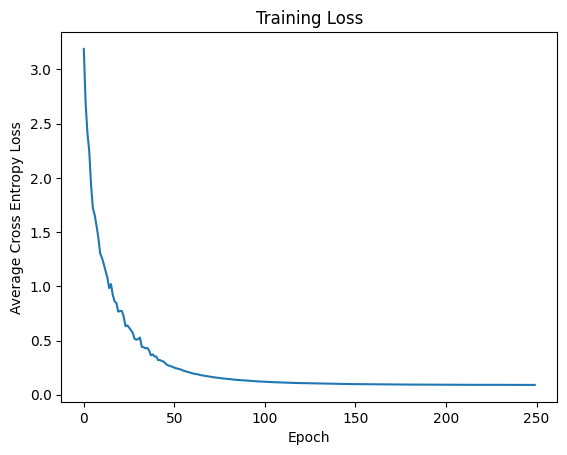

  0%|          | 1/250 [00:00<00:55,  4.45it/s]

Epoch 1/250, Loss: 3.0875


  1%|          | 2/250 [00:00<00:55,  4.44it/s]

Epoch 2/250, Loss: 2.6933


  1%|          | 3/250 [00:00<00:55,  4.46it/s]

Epoch 3/250, Loss: 2.4043


  2%|▏         | 4/250 [00:00<00:55,  4.45it/s]

Epoch 4/250, Loss: 2.1674


  2%|▏         | 5/250 [00:01<00:55,  4.45it/s]

Epoch 5/250, Loss: 2.0511


  2%|▏         | 6/250 [00:01<00:54,  4.46it/s]

Epoch 6/250, Loss: 1.8471


  3%|▎         | 7/250 [00:01<00:54,  4.47it/s]

Epoch 7/250, Loss: 1.6930


  3%|▎         | 8/250 [00:01<00:54,  4.47it/s]

Epoch 8/250, Loss: 1.6501


  4%|▎         | 9/250 [00:02<00:57,  4.20it/s]

Epoch 9/250, Loss: 1.5505


  4%|▍         | 10/250 [00:02<00:59,  4.04it/s]

Epoch 10/250, Loss: 1.3671


  4%|▍         | 11/250 [00:02<00:59,  3.99it/s]

Epoch 11/250, Loss: 1.3564


  5%|▍         | 12/250 [00:02<01:00,  3.94it/s]

Epoch 12/250, Loss: 1.3586


  5%|▌         | 13/250 [00:03<00:59,  3.95it/s]

Epoch 13/250, Loss: 1.2977


  6%|▌         | 14/250 [00:03<01:01,  3.82it/s]

Epoch 14/250, Loss: 1.2117


  6%|▌         | 15/250 [00:03<01:03,  3.73it/s]

Epoch 15/250, Loss: 1.1067


  6%|▋         | 16/250 [00:03<01:03,  3.67it/s]

Epoch 16/250, Loss: 1.1278


  7%|▋         | 17/250 [00:04<01:05,  3.58it/s]

Epoch 17/250, Loss: 1.0478


  7%|▋         | 18/250 [00:04<01:06,  3.46it/s]

Epoch 18/250, Loss: 1.0860


  8%|▊         | 19/250 [00:04<01:02,  3.72it/s]

Epoch 19/250, Loss: 0.9366


  8%|▊         | 20/250 [00:05<00:58,  3.91it/s]

Epoch 20/250, Loss: 0.9453


  8%|▊         | 21/250 [00:05<00:56,  4.06it/s]

Epoch 21/250, Loss: 0.8799


  9%|▉         | 22/250 [00:05<00:54,  4.16it/s]

Epoch 22/250, Loss: 0.9201


  9%|▉         | 23/250 [00:05<00:53,  4.25it/s]

Epoch 23/250, Loss: 0.8417


 10%|▉         | 24/250 [00:05<00:52,  4.32it/s]

Epoch 24/250, Loss: 0.7744


 10%|█         | 25/250 [00:06<00:51,  4.37it/s]

Epoch 25/250, Loss: 0.8086


 10%|█         | 26/250 [00:06<00:51,  4.38it/s]

Epoch 26/250, Loss: 0.7638


 11%|█         | 27/250 [00:06<00:50,  4.40it/s]

Epoch 27/250, Loss: 0.7590


 11%|█         | 28/250 [00:06<00:50,  4.42it/s]

Epoch 28/250, Loss: 0.6863


 12%|█▏        | 29/250 [00:07<00:49,  4.44it/s]

Epoch 29/250, Loss: 0.6567


 12%|█▏        | 30/250 [00:07<00:49,  4.44it/s]

Epoch 30/250, Loss: 0.6627


 12%|█▏        | 31/250 [00:07<00:49,  4.45it/s]

Epoch 31/250, Loss: 0.6439


 13%|█▎        | 32/250 [00:07<00:48,  4.46it/s]

Epoch 32/250, Loss: 0.6382


 13%|█▎        | 33/250 [00:07<00:48,  4.47it/s]

Epoch 33/250, Loss: 0.5624


 14%|█▎        | 34/250 [00:08<00:48,  4.47it/s]

Epoch 34/250, Loss: 0.5794


 14%|█▍        | 35/250 [00:08<00:48,  4.46it/s]

Epoch 35/250, Loss: 0.5578


 14%|█▍        | 36/250 [00:08<00:47,  4.46it/s]

Epoch 36/250, Loss: 0.5356


 15%|█▍        | 37/250 [00:08<00:47,  4.46it/s]

Epoch 37/250, Loss: 0.5059


 15%|█▌        | 38/250 [00:09<00:47,  4.45it/s]

Epoch 38/250, Loss: 0.4984


 16%|█▌        | 39/250 [00:09<00:47,  4.45it/s]

Epoch 39/250, Loss: 0.4756


 16%|█▌        | 40/250 [00:09<00:47,  4.44it/s]

Epoch 40/250, Loss: 0.4758


 16%|█▋        | 41/250 [00:09<00:47,  4.43it/s]

Epoch 41/250, Loss: 0.4688


 17%|█▋        | 42/250 [00:10<01:06,  3.12it/s]

Epoch 42/250, Loss: 0.4232


 17%|█▋        | 43/250 [00:10<01:04,  3.23it/s]

Epoch 43/250, Loss: 0.4218


 18%|█▊        | 44/250 [00:10<00:58,  3.52it/s]

Epoch 44/250, Loss: 0.4056


 18%|█▊        | 45/250 [00:10<00:54,  3.76it/s]

Epoch 45/250, Loss: 0.4121


 18%|█▊        | 46/250 [00:11<00:51,  3.93it/s]

Epoch 46/250, Loss: 0.3978


 19%|█▉        | 47/250 [00:11<00:50,  4.06it/s]

Epoch 47/250, Loss: 0.3696


 19%|█▉        | 48/250 [00:11<00:48,  4.18it/s]

Epoch 48/250, Loss: 0.3643


 20%|█▉        | 49/250 [00:11<00:47,  4.26it/s]

Epoch 49/250, Loss: 0.3572


 20%|██        | 50/250 [00:12<00:46,  4.31it/s]

Epoch 50/250, Loss: 0.3523


 20%|██        | 51/250 [00:12<00:45,  4.35it/s]

Epoch 51/250, Loss: 0.3316


 21%|██        | 52/250 [00:12<00:45,  4.37it/s]

Epoch 52/250, Loss: 0.3240


 21%|██        | 53/250 [00:12<00:44,  4.39it/s]

Epoch 53/250, Loss: 0.3165


 22%|██▏       | 54/250 [00:13<00:44,  4.41it/s]

Epoch 54/250, Loss: 0.3086


 22%|██▏       | 55/250 [00:13<00:44,  4.42it/s]

Epoch 55/250, Loss: 0.3024


 22%|██▏       | 56/250 [00:13<00:43,  4.42it/s]

Epoch 56/250, Loss: 0.2919


 23%|██▎       | 57/250 [00:13<00:43,  4.43it/s]

Epoch 57/250, Loss: 0.2880


 23%|██▎       | 58/250 [00:13<00:43,  4.44it/s]

Epoch 58/250, Loss: 0.2811


 24%|██▎       | 59/250 [00:14<00:42,  4.46it/s]

Epoch 59/250, Loss: 0.2741


 24%|██▍       | 60/250 [00:14<00:42,  4.45it/s]

Epoch 60/250, Loss: 0.2648


 24%|██▍       | 61/250 [00:14<00:42,  4.46it/s]

Epoch 61/250, Loss: 0.2603


 25%|██▍       | 62/250 [00:14<00:45,  4.12it/s]

Epoch 62/250, Loss: 0.2586


 25%|██▌       | 63/250 [00:15<00:46,  4.05it/s]

Epoch 63/250, Loss: 0.2502


 26%|██▌       | 64/250 [00:15<00:46,  4.01it/s]

Epoch 64/250, Loss: 0.2466


 26%|██▌       | 65/250 [00:15<00:45,  4.03it/s]

Epoch 65/250, Loss: 0.2411


 26%|██▋       | 66/250 [00:15<00:45,  4.05it/s]

Epoch 66/250, Loss: 0.2370


 27%|██▋       | 67/250 [00:16<00:46,  3.96it/s]

Epoch 67/250, Loss: 0.2331


 27%|██▋       | 68/250 [00:16<00:46,  3.88it/s]

Epoch 68/250, Loss: 0.2287


 28%|██▊       | 69/250 [00:16<00:47,  3.77it/s]

Epoch 69/250, Loss: 0.2223


 28%|██▊       | 70/250 [00:16<00:49,  3.61it/s]

Epoch 70/250, Loss: 0.2177


 28%|██▊       | 71/250 [00:17<00:49,  3.60it/s]

Epoch 71/250, Loss: 0.2148


 29%|██▉       | 72/250 [00:17<00:48,  3.66it/s]

Epoch 72/250, Loss: 0.2116


 29%|██▉       | 73/250 [00:17<00:45,  3.87it/s]

Epoch 73/250, Loss: 0.2096


 30%|██▉       | 74/250 [00:17<00:43,  4.03it/s]

Epoch 74/250, Loss: 0.2059


 30%|███       | 75/250 [00:18<00:42,  4.15it/s]

Epoch 75/250, Loss: 0.2013


 30%|███       | 76/250 [00:18<00:41,  4.23it/s]

Epoch 76/250, Loss: 0.1991


 31%|███       | 77/250 [00:18<00:40,  4.30it/s]

Epoch 77/250, Loss: 0.1962


 31%|███       | 78/250 [00:18<00:39,  4.35it/s]

Epoch 78/250, Loss: 0.1929


 32%|███▏      | 79/250 [00:19<00:39,  4.36it/s]

Epoch 79/250, Loss: 0.1909


 32%|███▏      | 80/250 [00:19<00:38,  4.38it/s]

Epoch 80/250, Loss: 0.1880


 32%|███▏      | 81/250 [00:19<00:38,  4.41it/s]

Epoch 81/250, Loss: 0.1861


 33%|███▎      | 82/250 [00:19<00:38,  4.42it/s]

Epoch 82/250, Loss: 0.1833


 33%|███▎      | 83/250 [00:20<00:37,  4.40it/s]

Epoch 83/250, Loss: 0.1803


 34%|███▎      | 84/250 [00:20<00:37,  4.42it/s]

Epoch 84/250, Loss: 0.1790


 34%|███▍      | 85/250 [00:20<00:37,  4.43it/s]

Epoch 85/250, Loss: 0.1762


 34%|███▍      | 86/250 [00:20<00:36,  4.44it/s]

Epoch 86/250, Loss: 0.1744


 35%|███▍      | 87/250 [00:20<00:36,  4.45it/s]

Epoch 87/250, Loss: 0.1719


 35%|███▌      | 88/250 [00:21<00:36,  4.45it/s]

Epoch 88/250, Loss: 0.1702


 36%|███▌      | 89/250 [00:21<00:36,  4.46it/s]

Epoch 89/250, Loss: 0.1685


 36%|███▌      | 90/250 [00:21<00:35,  4.46it/s]

Epoch 90/250, Loss: 0.1675


 36%|███▋      | 91/250 [00:21<00:35,  4.47it/s]

Epoch 91/250, Loss: 0.1653


 37%|███▋      | 92/250 [00:22<00:35,  4.40it/s]

Epoch 92/250, Loss: 0.1633


 37%|███▋      | 93/250 [00:22<00:35,  4.39it/s]

Epoch 93/250, Loss: 0.1617


 38%|███▊      | 94/250 [00:22<00:35,  4.39it/s]

Epoch 94/250, Loss: 0.1605


 38%|███▊      | 95/250 [00:22<00:35,  4.38it/s]

Epoch 95/250, Loss: 0.1589


 38%|███▊      | 96/250 [00:22<00:35,  4.39it/s]

Epoch 96/250, Loss: 0.1578


 39%|███▉      | 97/250 [00:23<00:34,  4.39it/s]

Epoch 97/250, Loss: 0.1562


 39%|███▉      | 98/250 [00:23<00:34,  4.41it/s]

Epoch 98/250, Loss: 0.1546


 40%|███▉      | 99/250 [00:23<00:34,  4.42it/s]

Epoch 99/250, Loss: 0.1535


 40%|████      | 100/250 [00:23<00:33,  4.43it/s]

Epoch 100/250, Loss: 0.1528


 40%|████      | 101/250 [00:24<00:33,  4.43it/s]

Epoch 101/250, Loss: 0.1505


 41%|████      | 102/250 [00:24<00:33,  4.43it/s]

Epoch 102/250, Loss: 0.1495


 41%|████      | 103/250 [00:24<00:33,  4.43it/s]

Epoch 103/250, Loss: 0.1489


 42%|████▏     | 104/250 [00:24<00:32,  4.44it/s]

Epoch 104/250, Loss: 0.1478


 42%|████▏     | 105/250 [00:24<00:32,  4.44it/s]

Epoch 105/250, Loss: 0.1464


 42%|████▏     | 106/250 [00:25<00:32,  4.44it/s]

Epoch 106/250, Loss: 0.1455


 43%|████▎     | 107/250 [00:25<00:32,  4.45it/s]

Epoch 107/250, Loss: 0.1444


 43%|████▎     | 108/250 [00:25<00:31,  4.45it/s]

Epoch 108/250, Loss: 0.1436


 44%|████▎     | 109/250 [00:25<00:31,  4.43it/s]

Epoch 109/250, Loss: 0.1428


 44%|████▍     | 110/250 [00:26<00:31,  4.44it/s]

Epoch 110/250, Loss: 0.1418


 44%|████▍     | 111/250 [00:26<00:31,  4.44it/s]

Epoch 111/250, Loss: 0.1411


 45%|████▍     | 112/250 [00:26<00:31,  4.45it/s]

Epoch 112/250, Loss: 0.1400


 45%|████▌     | 113/250 [00:26<00:30,  4.43it/s]

Epoch 113/250, Loss: 0.1392


 46%|████▌     | 114/250 [00:27<00:30,  4.44it/s]

Epoch 114/250, Loss: 0.1383


 46%|████▌     | 115/250 [00:27<00:30,  4.44it/s]

Epoch 115/250, Loss: 0.1375


 46%|████▋     | 116/250 [00:27<00:30,  4.43it/s]

Epoch 116/250, Loss: 0.1369


 47%|████▋     | 117/250 [00:27<00:32,  4.13it/s]

Epoch 117/250, Loss: 0.1362


 47%|████▋     | 118/250 [00:27<00:32,  4.10it/s]

Epoch 118/250, Loss: 0.1357


 48%|████▊     | 119/250 [00:28<00:32,  4.05it/s]

Epoch 119/250, Loss: 0.1348


 48%|████▊     | 120/250 [00:28<00:32,  4.02it/s]

Epoch 120/250, Loss: 0.1343


 48%|████▊     | 121/250 [00:28<00:32,  4.01it/s]

Epoch 121/250, Loss: 0.1333


 49%|████▉     | 122/250 [00:29<00:33,  3.85it/s]

Epoch 122/250, Loss: 0.1330


 49%|████▉     | 123/250 [00:29<00:34,  3.68it/s]

Epoch 123/250, Loss: 0.1322


 50%|████▉     | 124/250 [00:29<00:35,  3.54it/s]

Epoch 124/250, Loss: 0.1317


 50%|█████     | 125/250 [00:29<00:35,  3.54it/s]

Epoch 125/250, Loss: 0.1309


 50%|█████     | 126/250 [00:30<00:35,  3.45it/s]

Epoch 126/250, Loss: 0.1307


 51%|█████     | 127/250 [00:30<00:33,  3.65it/s]

Epoch 127/250, Loss: 0.1299


 51%|█████     | 128/250 [00:30<00:31,  3.85it/s]

Epoch 128/250, Loss: 0.1295


 52%|█████▏    | 129/250 [00:30<00:30,  4.01it/s]

Epoch 129/250, Loss: 0.1290


 52%|█████▏    | 130/250 [00:31<00:29,  4.12it/s]

Epoch 130/250, Loss: 0.1284


 52%|█████▏    | 131/250 [00:31<00:28,  4.20it/s]

Epoch 131/250, Loss: 0.1278


 53%|█████▎    | 132/250 [00:31<00:27,  4.27it/s]

Epoch 132/250, Loss: 0.1275


 53%|█████▎    | 133/250 [00:31<00:27,  4.32it/s]

Epoch 133/250, Loss: 0.1270


 54%|█████▎    | 134/250 [00:32<00:26,  4.36it/s]

Epoch 134/250, Loss: 0.1265


 54%|█████▍    | 135/250 [00:32<00:26,  4.36it/s]

Epoch 135/250, Loss: 0.1261


 54%|█████▍    | 136/250 [00:32<00:26,  4.38it/s]

Epoch 136/250, Loss: 0.1257


 55%|█████▍    | 137/250 [00:32<00:25,  4.38it/s]

Epoch 137/250, Loss: 0.1252


 55%|█████▌    | 138/250 [00:32<00:25,  4.41it/s]

Epoch 138/250, Loss: 0.1248


 56%|█████▌    | 139/250 [00:33<00:25,  4.42it/s]

Epoch 139/250, Loss: 0.1246


 56%|█████▌    | 140/250 [00:33<00:25,  4.39it/s]

Epoch 140/250, Loss: 0.1242


 56%|█████▋    | 141/250 [00:33<00:24,  4.41it/s]

Epoch 141/250, Loss: 0.1238


 57%|█████▋    | 142/250 [00:33<00:24,  4.42it/s]

Epoch 142/250, Loss: 0.1233


 57%|█████▋    | 143/250 [00:34<00:24,  4.42it/s]

Epoch 143/250, Loss: 0.1232


 58%|█████▊    | 144/250 [00:34<00:23,  4.43it/s]

Epoch 144/250, Loss: 0.1228


 58%|█████▊    | 145/250 [00:34<00:23,  4.43it/s]

Epoch 145/250, Loss: 0.1224


 58%|█████▊    | 146/250 [00:34<00:23,  4.44it/s]

Epoch 146/250, Loss: 0.1220


 59%|█████▉    | 147/250 [00:34<00:23,  4.43it/s]

Epoch 147/250, Loss: 0.1217


 59%|█████▉    | 148/250 [00:35<00:23,  4.43it/s]

Epoch 148/250, Loss: 0.1215


 60%|█████▉    | 149/250 [00:35<00:22,  4.44it/s]

Epoch 149/250, Loss: 0.1212


 60%|██████    | 150/250 [00:35<00:22,  4.45it/s]

Epoch 150/250, Loss: 0.1211


 60%|██████    | 151/250 [00:35<00:22,  4.44it/s]

Epoch 151/250, Loss: 0.1206


 61%|██████    | 152/250 [00:36<00:22,  4.45it/s]

Epoch 152/250, Loss: 0.1202


 61%|██████    | 153/250 [00:36<00:21,  4.44it/s]

Epoch 153/250, Loss: 0.1201


 62%|██████▏   | 154/250 [00:36<00:21,  4.44it/s]

Epoch 154/250, Loss: 0.1198


 62%|██████▏   | 155/250 [00:36<00:21,  4.44it/s]

Epoch 155/250, Loss: 0.1195


 62%|██████▏   | 156/250 [00:37<00:21,  4.44it/s]

Epoch 156/250, Loss: 0.1193


 63%|██████▎   | 157/250 [00:37<00:20,  4.45it/s]

Epoch 157/250, Loss: 0.1190


 63%|██████▎   | 158/250 [00:37<00:20,  4.46it/s]

Epoch 158/250, Loss: 0.1189


 64%|██████▎   | 159/250 [00:37<00:20,  4.46it/s]

Epoch 159/250, Loss: 0.1186


 64%|██████▍   | 160/250 [00:37<00:20,  4.46it/s]

Epoch 160/250, Loss: 0.1184


 64%|██████▍   | 161/250 [00:38<00:19,  4.46it/s]

Epoch 161/250, Loss: 0.1182


 65%|██████▍   | 162/250 [00:38<00:19,  4.44it/s]

Epoch 162/250, Loss: 0.1179


 65%|██████▌   | 163/250 [00:38<00:19,  4.45it/s]

Epoch 163/250, Loss: 0.1177


 66%|██████▌   | 164/250 [00:38<00:19,  4.45it/s]

Epoch 164/250, Loss: 0.1176


 66%|██████▌   | 165/250 [00:39<00:19,  4.45it/s]

Epoch 165/250, Loss: 0.1174


 66%|██████▋   | 166/250 [00:39<00:18,  4.46it/s]

Epoch 166/250, Loss: 0.1171


 67%|██████▋   | 167/250 [00:39<00:18,  4.46it/s]

Epoch 167/250, Loss: 0.1171


 67%|██████▋   | 168/250 [00:39<00:18,  4.46it/s]

Epoch 168/250, Loss: 0.1167


 68%|██████▊   | 169/250 [00:39<00:18,  4.46it/s]

Epoch 169/250, Loss: 0.1166


 68%|██████▊   | 170/250 [00:40<00:17,  4.45it/s]

Epoch 170/250, Loss: 0.1164


 68%|██████▊   | 171/250 [00:40<00:18,  4.38it/s]

Epoch 171/250, Loss: 0.1162


 69%|██████▉   | 172/250 [00:40<00:18,  4.14it/s]

Epoch 172/250, Loss: 0.1161


 69%|██████▉   | 173/250 [00:40<00:18,  4.09it/s]

Epoch 173/250, Loss: 0.1160


 70%|██████▉   | 174/250 [00:41<00:18,  4.03it/s]

Epoch 174/250, Loss: 0.1158


 70%|███████   | 175/250 [00:41<00:18,  4.03it/s]

Epoch 175/250, Loss: 0.1156


 70%|███████   | 176/250 [00:41<00:18,  3.95it/s]

Epoch 176/250, Loss: 0.1154


 71%|███████   | 177/250 [00:41<00:18,  3.89it/s]

Epoch 177/250, Loss: 0.1154


 71%|███████   | 178/250 [00:42<00:19,  3.77it/s]

Epoch 178/250, Loss: 0.1152


 72%|███████▏  | 179/250 [00:42<00:20,  3.53it/s]

Epoch 179/250, Loss: 0.1151


 72%|███████▏  | 180/250 [00:42<00:20,  3.46it/s]

Epoch 180/250, Loss: 0.1150


 72%|███████▏  | 181/250 [00:43<00:20,  3.44it/s]

Epoch 181/250, Loss: 0.1148


 73%|███████▎  | 182/250 [00:43<00:18,  3.70it/s]

Epoch 182/250, Loss: 0.1147


 73%|███████▎  | 183/250 [00:43<00:17,  3.90it/s]

Epoch 183/250, Loss: 0.1146


 74%|███████▎  | 184/250 [00:43<00:16,  4.05it/s]

Epoch 184/250, Loss: 0.1145


 74%|███████▍  | 185/250 [00:44<00:15,  4.16it/s]

Epoch 185/250, Loss: 0.1143


 74%|███████▍  | 186/250 [00:44<00:15,  4.24it/s]

Epoch 186/250, Loss: 0.1142


 75%|███████▍  | 187/250 [00:44<00:14,  4.28it/s]

Epoch 187/250, Loss: 0.1141


 75%|███████▌  | 188/250 [00:44<00:14,  4.27it/s]

Epoch 188/250, Loss: 0.1140


 76%|███████▌  | 189/250 [00:44<00:14,  4.30it/s]

Epoch 189/250, Loss: 0.1139


 76%|███████▌  | 190/250 [00:45<00:13,  4.35it/s]

Epoch 190/250, Loss: 0.1138


 76%|███████▋  | 191/250 [00:45<00:13,  4.38it/s]

Epoch 191/250, Loss: 0.1137


 77%|███████▋  | 192/250 [00:45<00:13,  4.40it/s]

Epoch 192/250, Loss: 0.1135


 77%|███████▋  | 193/250 [00:45<00:12,  4.42it/s]

Epoch 193/250, Loss: 0.1135


 78%|███████▊  | 194/250 [00:46<00:12,  4.43it/s]

Epoch 194/250, Loss: 0.1133


 78%|███████▊  | 195/250 [00:46<00:12,  4.44it/s]

Epoch 195/250, Loss: 0.1133


 78%|███████▊  | 196/250 [00:46<00:12,  4.44it/s]

Epoch 196/250, Loss: 0.1131


 79%|███████▉  | 197/250 [00:46<00:11,  4.43it/s]

Epoch 197/250, Loss: 0.1131


 79%|███████▉  | 198/250 [00:46<00:11,  4.44it/s]

Epoch 198/250, Loss: 0.1130


 80%|███████▉  | 199/250 [00:47<00:11,  4.45it/s]

Epoch 199/250, Loss: 0.1129


 80%|████████  | 200/250 [00:47<00:11,  4.45it/s]

Epoch 200/250, Loss: 0.1128


 80%|████████  | 201/250 [00:47<00:11,  4.45it/s]

Epoch 201/250, Loss: 0.1127


 81%|████████  | 202/250 [00:47<00:10,  4.45it/s]

Epoch 202/250, Loss: 0.1127


 81%|████████  | 203/250 [00:48<00:10,  4.45it/s]

Epoch 203/250, Loss: 0.1125


 82%|████████▏ | 204/250 [00:48<00:10,  4.45it/s]

Epoch 204/250, Loss: 0.1125


 82%|████████▏ | 205/250 [00:48<00:10,  4.45it/s]

Epoch 205/250, Loss: 0.1125


 82%|████████▏ | 206/250 [00:48<00:09,  4.46it/s]

Epoch 206/250, Loss: 0.1124


 83%|████████▎ | 207/250 [00:49<00:09,  4.45it/s]

Epoch 207/250, Loss: 0.1123


 83%|████████▎ | 208/250 [00:49<00:09,  4.46it/s]

Epoch 208/250, Loss: 0.1122


 84%|████████▎ | 209/250 [00:49<00:09,  4.45it/s]

Epoch 209/250, Loss: 0.1122


 84%|████████▍ | 210/250 [00:49<00:08,  4.45it/s]

Epoch 210/250, Loss: 0.1121


 84%|████████▍ | 211/250 [00:49<00:08,  4.45it/s]

Epoch 211/250, Loss: 0.1120


 85%|████████▍ | 212/250 [00:50<00:08,  4.45it/s]

Epoch 212/250, Loss: 0.1120


 85%|████████▌ | 213/250 [00:50<00:08,  4.44it/s]

Epoch 213/250, Loss: 0.1119


 86%|████████▌ | 214/250 [00:50<00:08,  4.45it/s]

Epoch 214/250, Loss: 0.1119


 86%|████████▌ | 215/250 [00:50<00:07,  4.45it/s]

Epoch 215/250, Loss: 0.1118


 86%|████████▋ | 216/250 [00:51<00:07,  4.45it/s]

Epoch 216/250, Loss: 0.1118


 87%|████████▋ | 217/250 [00:51<00:07,  4.45it/s]

Epoch 217/250, Loss: 0.1117


 87%|████████▋ | 218/250 [00:51<00:07,  4.46it/s]

Epoch 218/250, Loss: 0.1117


 88%|████████▊ | 219/250 [00:51<00:06,  4.44it/s]

Epoch 219/250, Loss: 0.1116


 88%|████████▊ | 220/250 [00:51<00:06,  4.44it/s]

Epoch 220/250, Loss: 0.1116


 88%|████████▊ | 221/250 [00:52<00:06,  4.45it/s]

Epoch 221/250, Loss: 0.1114


 89%|████████▉ | 222/250 [00:52<00:06,  4.45it/s]

Epoch 222/250, Loss: 0.1115


 89%|████████▉ | 223/250 [00:52<00:06,  4.45it/s]

Epoch 223/250, Loss: 0.1114


 90%|████████▉ | 224/250 [00:52<00:05,  4.42it/s]

Epoch 224/250, Loss: 0.1114


 90%|█████████ | 225/250 [00:53<00:05,  4.42it/s]

Epoch 225/250, Loss: 0.1113


 90%|█████████ | 226/250 [00:53<00:05,  4.21it/s]

Epoch 226/250, Loss: 0.1114


 91%|█████████ | 227/250 [00:53<00:05,  4.11it/s]

Epoch 227/250, Loss: 0.1112


 91%|█████████ | 228/250 [00:53<00:05,  4.08it/s]

Epoch 228/250, Loss: 0.1112


 92%|█████████▏| 229/250 [00:54<00:05,  4.09it/s]

Epoch 229/250, Loss: 0.1111


 92%|█████████▏| 230/250 [00:54<00:04,  4.10it/s]

Epoch 230/250, Loss: 0.1112


 92%|█████████▏| 231/250 [00:54<00:04,  4.10it/s]

Epoch 231/250, Loss: 0.1110


 93%|█████████▎| 232/250 [00:54<00:04,  3.95it/s]

Epoch 232/250, Loss: 0.1110


 93%|█████████▎| 233/250 [00:55<00:04,  3.89it/s]

Epoch 233/250, Loss: 0.1109


 94%|█████████▎| 234/250 [00:55<00:04,  3.71it/s]

Epoch 234/250, Loss: 0.1110


 94%|█████████▍| 235/250 [00:55<00:04,  3.65it/s]

Epoch 235/250, Loss: 0.1108


 94%|█████████▍| 236/250 [00:55<00:03,  3.59it/s]

Epoch 236/250, Loss: 0.1109


 95%|█████████▍| 237/250 [00:56<00:03,  3.74it/s]

Epoch 237/250, Loss: 0.1108


 95%|█████████▌| 238/250 [00:56<00:03,  3.92it/s]

Epoch 238/250, Loss: 0.1108


 96%|█████████▌| 239/250 [00:56<00:02,  4.05it/s]

Epoch 239/250, Loss: 0.1107


 96%|█████████▌| 240/250 [00:56<00:02,  4.16it/s]

Epoch 240/250, Loss: 0.1108


 96%|█████████▋| 241/250 [00:57<00:02,  4.24it/s]

Epoch 241/250, Loss: 0.1108


 97%|█████████▋| 242/250 [00:57<00:01,  4.30it/s]

Epoch 242/250, Loss: 0.1106


 97%|█████████▋| 243/250 [00:57<00:01,  4.35it/s]

Epoch 243/250, Loss: 0.1106


 98%|█████████▊| 244/250 [00:57<00:01,  4.38it/s]

Epoch 244/250, Loss: 0.1106


 98%|█████████▊| 245/250 [00:58<00:01,  4.39it/s]

Epoch 245/250, Loss: 0.1106


 98%|█████████▊| 246/250 [00:58<00:00,  4.42it/s]

Epoch 246/250, Loss: 0.1105


 99%|█████████▉| 247/250 [00:58<00:00,  4.41it/s]

Epoch 247/250, Loss: 0.1105


 99%|█████████▉| 248/250 [00:58<00:00,  4.42it/s]

Epoch 248/250, Loss: 0.1105


100%|█████████▉| 249/250 [00:58<00:00,  4.43it/s]

Epoch 249/250, Loss: 0.1105


100%|██████████| 250/250 [00:59<00:00,  4.23it/s]

Epoch 250/250, Loss: 0.1104


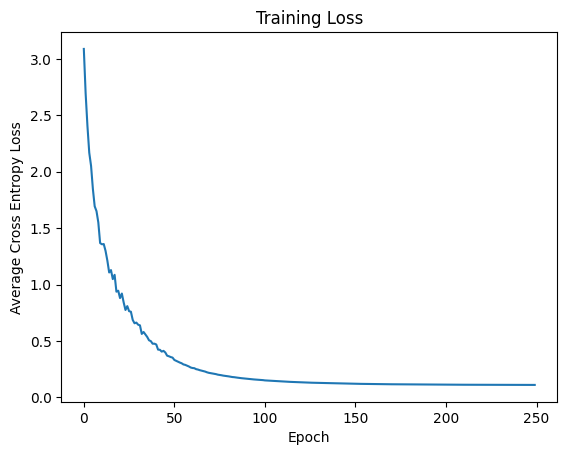

  0%|          | 1/250 [00:00<00:55,  4.47it/s]

Epoch 1/250, Loss: 3.1778


  1%|          | 2/250 [00:00<00:55,  4.44it/s]

Epoch 2/250, Loss: 2.8410


  1%|          | 3/250 [00:00<00:55,  4.45it/s]

Epoch 3/250, Loss: 2.5389


  2%|▏         | 4/250 [00:00<00:55,  4.46it/s]

Epoch 4/250, Loss: 2.3284


  2%|▏         | 5/250 [00:01<00:54,  4.46it/s]

Epoch 5/250, Loss: 2.1339


  2%|▏         | 6/250 [00:01<00:54,  4.45it/s]

Epoch 6/250, Loss: 1.9636


  3%|▎         | 7/250 [00:01<00:54,  4.45it/s]

Epoch 7/250, Loss: 1.9030


  3%|▎         | 8/250 [00:01<00:54,  4.45it/s]

Epoch 8/250, Loss: 1.8297


  4%|▎         | 9/250 [00:02<00:54,  4.45it/s]

Epoch 9/250, Loss: 1.7119


  4%|▍         | 10/250 [00:02<00:53,  4.46it/s]

Epoch 10/250, Loss: 1.5704


  4%|▍         | 11/250 [00:02<00:53,  4.46it/s]

Epoch 11/250, Loss: 1.5547


  5%|▍         | 12/250 [00:02<00:53,  4.46it/s]

Epoch 12/250, Loss: 1.5164


  5%|▌         | 13/250 [00:02<00:53,  4.46it/s]

Epoch 13/250, Loss: 1.4715


  6%|▌         | 14/250 [00:03<00:52,  4.46it/s]

Epoch 14/250, Loss: 1.3747


  6%|▌         | 15/250 [00:03<00:52,  4.46it/s]

Epoch 15/250, Loss: 1.2491


  6%|▋         | 16/250 [00:03<00:52,  4.46it/s]

Epoch 16/250, Loss: 1.2332


  7%|▋         | 17/250 [00:03<00:52,  4.45it/s]

Epoch 17/250, Loss: 1.1823


  7%|▋         | 18/250 [00:04<00:52,  4.45it/s]

Epoch 18/250, Loss: 1.1901


  8%|▊         | 19/250 [00:04<00:51,  4.45it/s]

Epoch 19/250, Loss: 1.0369


  8%|▊         | 20/250 [00:04<00:51,  4.46it/s]

Epoch 20/250, Loss: 1.0104


  8%|▊         | 21/250 [00:04<00:51,  4.46it/s]

Epoch 21/250, Loss: 1.0323


  9%|▉         | 22/250 [00:04<00:51,  4.46it/s]

Epoch 22/250, Loss: 0.9627


  9%|▉         | 23/250 [00:05<00:51,  4.45it/s]

Epoch 23/250, Loss: 0.8830


 10%|▉         | 24/250 [00:05<00:50,  4.45it/s]

Epoch 24/250, Loss: 0.8471


 10%|█         | 25/250 [00:05<00:50,  4.46it/s]

Epoch 25/250, Loss: 0.8457


 10%|█         | 26/250 [00:05<00:50,  4.46it/s]

Epoch 26/250, Loss: 0.8089


 11%|█         | 27/250 [00:06<00:50,  4.44it/s]

Epoch 27/250, Loss: 0.7797


 11%|█         | 28/250 [00:06<00:49,  4.45it/s]

Epoch 28/250, Loss: 0.7070


 12%|█▏        | 29/250 [00:06<00:49,  4.45it/s]

Epoch 29/250, Loss: 0.7059


 12%|█▏        | 30/250 [00:06<00:49,  4.44it/s]

Epoch 30/250, Loss: 0.6859


 12%|█▏        | 31/250 [00:07<00:52,  4.16it/s]

Epoch 31/250, Loss: 0.6683


 13%|█▎        | 32/250 [00:07<00:53,  4.08it/s]

Epoch 32/250, Loss: 0.6652


 13%|█▎        | 33/250 [00:07<00:53,  4.04it/s]

Epoch 33/250, Loss: 0.5934


 14%|█▎        | 34/250 [00:07<00:54,  3.98it/s]

Epoch 34/250, Loss: 0.5977


 14%|█▍        | 35/250 [00:08<00:55,  3.90it/s]

Epoch 35/250, Loss: 0.5772


 14%|█▍        | 36/250 [00:08<00:55,  3.84it/s]

Epoch 36/250, Loss: 0.5423


 15%|█▍        | 37/250 [00:08<00:56,  3.80it/s]

Epoch 37/250, Loss: 0.5099


 15%|█▌        | 38/250 [00:08<00:58,  3.60it/s]

Epoch 38/250, Loss: 0.4785


 16%|█▌        | 39/250 [00:09<01:00,  3.51it/s]

Epoch 39/250, Loss: 0.4773


 16%|█▌        | 40/250 [00:09<00:59,  3.53it/s]

Epoch 40/250, Loss: 0.4742


 16%|█▋        | 41/250 [00:09<00:57,  3.65it/s]

Epoch 41/250, Loss: 0.4632


 17%|█▋        | 42/250 [00:09<00:53,  3.86it/s]

Epoch 42/250, Loss: 0.4477


 17%|█▋        | 43/250 [00:10<00:51,  4.02it/s]

Epoch 43/250, Loss: 0.4163


 18%|█▊        | 44/250 [00:10<00:49,  4.14it/s]

Epoch 44/250, Loss: 0.3992


 18%|█▊        | 45/250 [00:10<00:48,  4.23it/s]

Epoch 45/250, Loss: 0.4051


 18%|█▊        | 46/250 [00:10<00:47,  4.28it/s]

Epoch 46/250, Loss: 0.3753


 19%|█▉        | 47/250 [00:11<00:47,  4.27it/s]

Epoch 47/250, Loss: 0.3658


 19%|█▉        | 48/250 [00:11<00:46,  4.32it/s]

Epoch 48/250, Loss: 0.3538


 20%|█▉        | 49/250 [00:11<00:46,  4.36it/s]

Epoch 49/250, Loss: 0.3575


 20%|██        | 50/250 [00:11<00:45,  4.38it/s]

Epoch 50/250, Loss: 0.3443


 20%|██        | 51/250 [00:11<00:45,  4.41it/s]

Epoch 51/250, Loss: 0.3257


 21%|██        | 52/250 [00:12<00:44,  4.42it/s]

Epoch 52/250, Loss: 0.3244


 21%|██        | 53/250 [00:12<00:44,  4.42it/s]

Epoch 53/250, Loss: 0.3152


 22%|██▏       | 54/250 [00:12<00:44,  4.45it/s]

Epoch 54/250, Loss: 0.3056


 22%|██▏       | 55/250 [00:12<00:43,  4.46it/s]

Epoch 55/250, Loss: 0.2964


 22%|██▏       | 56/250 [00:13<00:44,  4.41it/s]

Epoch 56/250, Loss: 0.2891


 23%|██▎       | 57/250 [00:13<00:43,  4.40it/s]

Epoch 57/250, Loss: 0.2865


 23%|██▎       | 58/250 [00:13<00:43,  4.42it/s]

Epoch 58/250, Loss: 0.2762


 24%|██▎       | 59/250 [00:13<00:43,  4.43it/s]

Epoch 59/250, Loss: 0.2706


 24%|██▍       | 60/250 [00:14<00:42,  4.44it/s]

Epoch 60/250, Loss: 0.2626


 24%|██▍       | 61/250 [00:14<00:42,  4.44it/s]

Epoch 61/250, Loss: 0.2552


 25%|██▍       | 62/250 [00:14<00:42,  4.45it/s]

Epoch 62/250, Loss: 0.2574


 25%|██▌       | 63/250 [00:14<00:42,  4.44it/s]

Epoch 63/250, Loss: 0.2484


 26%|██▌       | 64/250 [00:14<00:41,  4.44it/s]

Epoch 64/250, Loss: 0.2445


 26%|██▌       | 65/250 [00:15<00:41,  4.44it/s]

Epoch 65/250, Loss: 0.2376


 26%|██▋       | 66/250 [00:15<00:41,  4.44it/s]

Epoch 66/250, Loss: 0.2355


 27%|██▋       | 67/250 [00:15<00:41,  4.45it/s]

Epoch 67/250, Loss: 0.2317


 27%|██▋       | 68/250 [00:15<00:40,  4.45it/s]

Epoch 68/250, Loss: 0.2288


 28%|██▊       | 69/250 [00:16<00:40,  4.45it/s]

Epoch 69/250, Loss: 0.2249


 28%|██▊       | 70/250 [00:16<00:40,  4.46it/s]

Epoch 70/250, Loss: 0.2193


 28%|██▊       | 71/250 [00:16<00:40,  4.46it/s]

Epoch 71/250, Loss: 0.2176


 29%|██▉       | 72/250 [00:16<00:40,  4.44it/s]

Epoch 72/250, Loss: 0.2136


 29%|██▉       | 73/250 [00:16<00:39,  4.44it/s]

Epoch 73/250, Loss: 0.2098


 30%|██▉       | 74/250 [00:17<00:39,  4.45it/s]

Epoch 74/250, Loss: 0.2066


 30%|███       | 75/250 [00:17<00:39,  4.44it/s]

Epoch 75/250, Loss: 0.2052


 30%|███       | 76/250 [00:17<00:39,  4.44it/s]

Epoch 76/250, Loss: 0.2009


 31%|███       | 77/250 [00:17<00:39,  4.42it/s]

Epoch 77/250, Loss: 0.1988


 31%|███       | 78/250 [00:18<00:38,  4.41it/s]

Epoch 78/250, Loss: 0.1965


 32%|███▏      | 79/250 [00:18<00:38,  4.42it/s]

Epoch 79/250, Loss: 0.1938


 32%|███▏      | 80/250 [00:18<00:38,  4.43it/s]

Epoch 80/250, Loss: 0.1919


 32%|███▏      | 81/250 [00:18<00:38,  4.43it/s]

Epoch 81/250, Loss: 0.1903


 33%|███▎      | 82/250 [00:18<00:38,  4.42it/s]

Epoch 82/250, Loss: 0.1877


 33%|███▎      | 83/250 [00:19<00:37,  4.41it/s]

Epoch 83/250, Loss: 0.1851


 34%|███▎      | 84/250 [00:19<00:37,  4.41it/s]

Epoch 84/250, Loss: 0.1829


 34%|███▍      | 85/250 [00:19<00:37,  4.42it/s]

Epoch 85/250, Loss: 0.1809


 34%|███▍      | 86/250 [00:19<00:39,  4.13it/s]

Epoch 86/250, Loss: 0.1796


 35%|███▍      | 87/250 [00:20<00:40,  4.02it/s]

Epoch 87/250, Loss: 0.1774


 35%|███▌      | 88/250 [00:20<00:40,  4.02it/s]

Epoch 88/250, Loss: 0.1761


 36%|███▌      | 89/250 [00:20<00:39,  4.03it/s]

Epoch 89/250, Loss: 0.1738


 36%|███▌      | 90/250 [00:20<00:39,  4.04it/s]

Epoch 90/250, Loss: 0.1724


 36%|███▋      | 91/250 [00:21<00:40,  3.89it/s]

Epoch 91/250, Loss: 0.1712


 37%|███▋      | 92/250 [00:21<00:41,  3.83it/s]

Epoch 92/250, Loss: 0.1693


 37%|███▋      | 93/250 [00:21<00:42,  3.73it/s]

Epoch 93/250, Loss: 0.1677


 38%|███▊      | 94/250 [00:22<00:42,  3.66it/s]

Epoch 94/250, Loss: 0.1663


 38%|███▊      | 95/250 [00:22<00:42,  3.63it/s]

Epoch 95/250, Loss: 0.1656


 38%|███▊      | 96/250 [00:22<00:41,  3.70it/s]

Epoch 96/250, Loss: 0.1640


 39%|███▉      | 97/250 [00:22<00:39,  3.90it/s]

Epoch 97/250, Loss: 0.1626


 39%|███▉      | 98/250 [00:23<00:37,  4.05it/s]

Epoch 98/250, Loss: 0.1616


 40%|███▉      | 99/250 [00:23<00:36,  4.15it/s]

Epoch 99/250, Loss: 0.1602


 40%|████      | 100/250 [00:23<00:35,  4.22it/s]

Epoch 100/250, Loss: 0.1594


 40%|████      | 101/250 [00:23<00:35,  4.25it/s]

Epoch 101/250, Loss: 0.1576


 41%|████      | 102/250 [00:23<00:34,  4.29it/s]

Epoch 102/250, Loss: 0.1568


 41%|████      | 103/250 [00:24<00:34,  4.30it/s]

Epoch 103/250, Loss: 0.1560


 42%|████▏     | 104/250 [00:24<00:33,  4.32it/s]

Epoch 104/250, Loss: 0.1548


 42%|████▏     | 105/250 [00:24<00:33,  4.35it/s]

Epoch 105/250, Loss: 0.1537


 42%|████▏     | 106/250 [00:24<00:32,  4.38it/s]

Epoch 106/250, Loss: 0.1525


 43%|████▎     | 107/250 [00:25<00:32,  4.41it/s]

Epoch 107/250, Loss: 0.1520


 43%|████▎     | 108/250 [00:25<00:32,  4.42it/s]

Epoch 108/250, Loss: 0.1510


 44%|████▎     | 109/250 [00:25<00:31,  4.41it/s]

Epoch 109/250, Loss: 0.1503


 44%|████▍     | 110/250 [00:25<00:31,  4.43it/s]

Epoch 110/250, Loss: 0.1491


 44%|████▍     | 111/250 [00:25<00:31,  4.45it/s]

Epoch 111/250, Loss: 0.1485


 45%|████▍     | 112/250 [00:26<00:31,  4.45it/s]

Epoch 112/250, Loss: 0.1476


 45%|████▌     | 113/250 [00:26<00:30,  4.45it/s]

Epoch 113/250, Loss: 0.1469


 46%|████▌     | 114/250 [00:26<00:30,  4.45it/s]

Epoch 114/250, Loss: 0.1462


 46%|████▌     | 115/250 [00:26<00:30,  4.46it/s]

Epoch 115/250, Loss: 0.1454


 46%|████▋     | 116/250 [00:27<00:30,  4.45it/s]

Epoch 116/250, Loss: 0.1447


 47%|████▋     | 117/250 [00:27<00:29,  4.44it/s]

Epoch 117/250, Loss: 0.1438


 47%|████▋     | 118/250 [00:27<00:29,  4.45it/s]

Epoch 118/250, Loss: 0.1434


 48%|████▊     | 119/250 [00:27<00:29,  4.46it/s]

Epoch 119/250, Loss: 0.1426


 48%|████▊     | 120/250 [00:28<00:29,  4.44it/s]

Epoch 120/250, Loss: 0.1420


 48%|████▊     | 121/250 [00:28<00:29,  4.44it/s]

Epoch 121/250, Loss: 0.1414


 49%|████▉     | 122/250 [00:28<00:28,  4.44it/s]

Epoch 122/250, Loss: 0.1409


 49%|████▉     | 123/250 [00:28<00:28,  4.43it/s]

Epoch 123/250, Loss: 0.1402


 50%|████▉     | 124/250 [00:28<00:28,  4.44it/s]

Epoch 124/250, Loss: 0.1398


 50%|█████     | 125/250 [00:29<00:28,  4.43it/s]

Epoch 125/250, Loss: 0.1393


 50%|█████     | 126/250 [00:29<00:28,  4.42it/s]

Epoch 126/250, Loss: 0.1386


 51%|█████     | 127/250 [00:29<00:27,  4.42it/s]

Epoch 127/250, Loss: 0.1381


 51%|█████     | 128/250 [00:29<00:27,  4.43it/s]

Epoch 128/250, Loss: 0.1376


 52%|█████▏    | 129/250 [00:30<00:27,  4.44it/s]

Epoch 129/250, Loss: 0.1371


 52%|█████▏    | 130/250 [00:30<00:26,  4.45it/s]

Epoch 130/250, Loss: 0.1368


 52%|█████▏    | 131/250 [00:30<00:26,  4.45it/s]

Epoch 131/250, Loss: 0.1362


 53%|█████▎    | 132/250 [00:30<00:26,  4.44it/s]

Epoch 132/250, Loss: 0.1359


 53%|█████▎    | 133/250 [00:30<00:26,  4.44it/s]

Epoch 133/250, Loss: 0.1353


 54%|█████▎    | 134/250 [00:31<00:26,  4.43it/s]

Epoch 134/250, Loss: 0.1347


 54%|█████▍    | 135/250 [00:31<00:25,  4.42it/s]

Epoch 135/250, Loss: 0.1345


 54%|█████▍    | 136/250 [00:31<00:25,  4.41it/s]

Epoch 136/250, Loss: 0.1340


 55%|█████▍    | 137/250 [00:31<00:25,  4.43it/s]

Epoch 137/250, Loss: 0.1337


 55%|█████▌    | 138/250 [00:32<00:25,  4.44it/s]

Epoch 138/250, Loss: 0.1332


 56%|█████▌    | 139/250 [00:32<00:25,  4.44it/s]

Epoch 139/250, Loss: 0.1328


 56%|█████▌    | 140/250 [00:32<00:24,  4.45it/s]

Epoch 140/250, Loss: 0.1325


 56%|█████▋    | 141/250 [00:32<00:26,  4.15it/s]

Epoch 141/250, Loss: 0.1322


 57%|█████▋    | 142/250 [00:33<00:27,  3.99it/s]

Epoch 142/250, Loss: 0.1319


 57%|█████▋    | 143/250 [00:33<00:26,  3.97it/s]

Epoch 143/250, Loss: 0.1315


 58%|█████▊    | 144/250 [00:33<00:27,  3.92it/s]

Epoch 144/250, Loss: 0.1313


 58%|█████▊    | 145/250 [00:33<00:26,  3.93it/s]

Epoch 145/250, Loss: 0.1309


 58%|█████▊    | 146/250 [00:34<00:27,  3.82it/s]

Epoch 146/250, Loss: 0.1306


 59%|█████▉    | 147/250 [00:34<00:27,  3.73it/s]

Epoch 147/250, Loss: 0.1302


 59%|█████▉    | 148/250 [00:34<00:28,  3.58it/s]

Epoch 148/250, Loss: 0.1298


 60%|█████▉    | 149/250 [00:35<00:29,  3.47it/s]

Epoch 149/250, Loss: 0.1296


 60%|██████    | 150/250 [00:35<00:29,  3.44it/s]

Epoch 150/250, Loss: 0.1294


 60%|██████    | 151/250 [00:35<00:27,  3.67it/s]

Epoch 151/250, Loss: 0.1292


 61%|██████    | 152/250 [00:35<00:25,  3.87it/s]

Epoch 152/250, Loss: 0.1288


 61%|██████    | 153/250 [00:36<00:24,  4.03it/s]

Epoch 153/250, Loss: 0.1287


 62%|██████▏   | 154/250 [00:36<00:23,  4.15it/s]

Epoch 154/250, Loss: 0.1283


 62%|██████▏   | 155/250 [00:36<00:22,  4.24it/s]

Epoch 155/250, Loss: 0.1282


 62%|██████▏   | 156/250 [00:36<00:21,  4.30it/s]

Epoch 156/250, Loss: 0.1279


 63%|██████▎   | 157/250 [00:36<00:21,  4.33it/s]

Epoch 157/250, Loss: 0.1277


 63%|██████▎   | 158/250 [00:37<00:21,  4.36it/s]

Epoch 158/250, Loss: 0.1274


 64%|██████▎   | 159/250 [00:37<00:20,  4.37it/s]

Epoch 159/250, Loss: 0.1273


 64%|██████▍   | 160/250 [00:37<00:20,  4.40it/s]

Epoch 160/250, Loss: 0.1270


 64%|██████▍   | 161/250 [00:37<00:20,  4.41it/s]

Epoch 161/250, Loss: 0.1268


 65%|██████▍   | 162/250 [00:38<00:19,  4.42it/s]

Epoch 162/250, Loss: 0.1265


 65%|██████▌   | 163/250 [00:38<00:19,  4.42it/s]

Epoch 163/250, Loss: 0.1264


 66%|██████▌   | 164/250 [00:38<00:19,  4.43it/s]

Epoch 164/250, Loss: 0.1263


 66%|██████▌   | 165/250 [00:38<00:19,  4.42it/s]

Epoch 165/250, Loss: 0.1259


 66%|██████▋   | 166/250 [00:38<00:19,  4.39it/s]

Epoch 166/250, Loss: 0.1259


 67%|██████▋   | 167/250 [00:39<00:18,  4.41it/s]

Epoch 167/250, Loss: 0.1256


 67%|██████▋   | 168/250 [00:39<00:18,  4.38it/s]

Epoch 168/250, Loss: 0.1255


 68%|██████▊   | 169/250 [00:39<00:18,  4.40it/s]

Epoch 169/250, Loss: 0.1252


 68%|██████▊   | 170/250 [00:39<00:18,  4.41it/s]

Epoch 170/250, Loss: 0.1251


 68%|██████▊   | 171/250 [00:40<00:17,  4.42it/s]

Epoch 171/250, Loss: 0.1249


 69%|██████▉   | 172/250 [00:40<00:17,  4.43it/s]

Epoch 172/250, Loss: 0.1248


 69%|██████▉   | 173/250 [00:40<00:17,  4.45it/s]

Epoch 173/250, Loss: 0.1247


 70%|██████▉   | 174/250 [00:40<00:17,  4.45it/s]

Epoch 174/250, Loss: 0.1245


 70%|███████   | 175/250 [00:40<00:17,  4.40it/s]

Epoch 175/250, Loss: 0.1244


 70%|███████   | 176/250 [00:41<00:16,  4.41it/s]

Epoch 176/250, Loss: 0.1243


 71%|███████   | 177/250 [00:41<00:16,  4.43it/s]

Epoch 177/250, Loss: 0.1242


 71%|███████   | 178/250 [00:41<00:16,  4.41it/s]

Epoch 178/250, Loss: 0.1239


 72%|███████▏  | 179/250 [00:41<00:16,  4.41it/s]

Epoch 179/250, Loss: 0.1237


 72%|███████▏  | 180/250 [00:42<00:15,  4.42it/s]

Epoch 180/250, Loss: 0.1237


 72%|███████▏  | 181/250 [00:42<00:15,  4.42it/s]

Epoch 181/250, Loss: 0.1235


 73%|███████▎  | 182/250 [00:42<00:15,  4.42it/s]

Epoch 182/250, Loss: 0.1233


 73%|███████▎  | 183/250 [00:42<00:15,  4.45it/s]

Epoch 183/250, Loss: 0.1232


 74%|███████▎  | 184/250 [00:43<00:14,  4.42it/s]

Epoch 184/250, Loss: 0.1231


 74%|███████▍  | 185/250 [00:43<00:14,  4.41it/s]

Epoch 185/250, Loss: 0.1230


 74%|███████▍  | 186/250 [00:43<00:14,  4.43it/s]

Epoch 186/250, Loss: 0.1229


 75%|███████▍  | 187/250 [00:43<00:14,  4.43it/s]

Epoch 187/250, Loss: 0.1228


 75%|███████▌  | 188/250 [00:43<00:13,  4.44it/s]

Epoch 188/250, Loss: 0.1226


 76%|███████▌  | 189/250 [00:44<00:13,  4.45it/s]

Epoch 189/250, Loss: 0.1226


 76%|███████▌  | 190/250 [00:44<00:13,  4.46it/s]

Epoch 190/250, Loss: 0.1225


 76%|███████▋  | 191/250 [00:44<00:13,  4.46it/s]

Epoch 191/250, Loss: 0.1224


 77%|███████▋  | 192/250 [00:44<00:13,  4.46it/s]

Epoch 192/250, Loss: 0.1223


 77%|███████▋  | 193/250 [00:45<00:12,  4.45it/s]

Epoch 193/250, Loss: 0.1222


 78%|███████▊  | 194/250 [00:45<00:12,  4.44it/s]

Epoch 194/250, Loss: 0.1221


 78%|███████▊  | 195/250 [00:45<00:12,  4.32it/s]

Epoch 195/250, Loss: 0.1220


 78%|███████▊  | 196/250 [00:45<00:13,  4.14it/s]

Epoch 196/250, Loss: 0.1220


 79%|███████▉  | 197/250 [00:46<00:13,  3.98it/s]

Epoch 197/250, Loss: 0.1218


 79%|███████▉  | 198/250 [00:46<00:13,  3.96it/s]

Epoch 198/250, Loss: 0.1218


 80%|███████▉  | 199/250 [00:46<00:12,  4.00it/s]

Epoch 199/250, Loss: 0.1216


 80%|████████  | 200/250 [00:46<00:12,  4.00it/s]

Epoch 200/250, Loss: 0.1216


 80%|████████  | 201/250 [00:47<00:13,  3.74it/s]

Epoch 201/250, Loss: 0.1216


 81%|████████  | 202/250 [00:47<00:13,  3.65it/s]

Epoch 202/250, Loss: 0.1214


 81%|████████  | 203/250 [00:47<00:12,  3.62it/s]

Epoch 203/250, Loss: 0.1214


 82%|████████▏ | 204/250 [00:47<00:12,  3.61it/s]

Epoch 204/250, Loss: 0.1213


 82%|████████▏ | 205/250 [00:48<00:12,  3.57it/s]

Epoch 205/250, Loss: 0.1212


 82%|████████▏ | 206/250 [00:48<00:11,  3.74it/s]

Epoch 206/250, Loss: 0.1212


 83%|████████▎ | 207/250 [00:48<00:10,  3.93it/s]

Epoch 207/250, Loss: 0.1211


 83%|████████▎ | 208/250 [00:48<00:10,  4.02it/s]

Epoch 208/250, Loss: 0.1210


 84%|████████▎ | 209/250 [00:49<00:09,  4.14it/s]

Epoch 209/250, Loss: 0.1210


 84%|████████▍ | 210/250 [00:49<00:09,  4.24it/s]

Epoch 210/250, Loss: 0.1209


 84%|████████▍ | 211/250 [00:49<00:09,  4.30it/s]

Epoch 211/250, Loss: 0.1208


 85%|████████▍ | 212/250 [00:49<00:08,  4.34it/s]

Epoch 212/250, Loss: 0.1207


 85%|████████▌ | 213/250 [00:50<00:08,  4.35it/s]

Epoch 213/250, Loss: 0.1207


 86%|████████▌ | 214/250 [00:50<00:08,  4.38it/s]

Epoch 214/250, Loss: 0.1207


 86%|████████▌ | 215/250 [00:50<00:07,  4.40it/s]

Epoch 215/250, Loss: 0.1206


 86%|████████▋ | 216/250 [00:50<00:07,  4.42it/s]

Epoch 216/250, Loss: 0.1206


 87%|████████▋ | 217/250 [00:50<00:07,  4.42it/s]

Epoch 217/250, Loss: 0.1205


 87%|████████▋ | 218/250 [00:51<00:07,  4.43it/s]

Epoch 218/250, Loss: 0.1204


 88%|████████▊ | 219/250 [00:51<00:06,  4.45it/s]

Epoch 219/250, Loss: 0.1204


 88%|████████▊ | 220/250 [00:51<00:06,  4.44it/s]

Epoch 220/250, Loss: 0.1203


 88%|████████▊ | 221/250 [00:51<00:06,  4.43it/s]

Epoch 221/250, Loss: 0.1202


 89%|████████▉ | 222/250 [00:52<00:06,  4.44it/s]

Epoch 222/250, Loss: 0.1202


 89%|████████▉ | 223/250 [00:52<00:06,  4.38it/s]

Epoch 223/250, Loss: 0.1202


 90%|████████▉ | 224/250 [00:52<00:05,  4.40it/s]

Epoch 224/250, Loss: 0.1201


 90%|█████████ | 225/250 [00:52<00:05,  4.42it/s]

Epoch 225/250, Loss: 0.1200


 90%|█████████ | 226/250 [00:52<00:05,  4.43it/s]

Epoch 226/250, Loss: 0.1201


 91%|█████████ | 227/250 [00:53<00:05,  4.42it/s]

Epoch 227/250, Loss: 0.1200


 91%|█████████ | 228/250 [00:53<00:04,  4.44it/s]

Epoch 228/250, Loss: 0.1200


 92%|█████████▏| 229/250 [00:53<00:04,  4.44it/s]

Epoch 229/250, Loss: 0.1200


 92%|█████████▏| 230/250 [00:53<00:04,  4.44it/s]

Epoch 230/250, Loss: 0.1199


 92%|█████████▏| 231/250 [00:54<00:04,  4.45it/s]

Epoch 231/250, Loss: 0.1198


 93%|█████████▎| 232/250 [00:54<00:04,  4.41it/s]

Epoch 232/250, Loss: 0.1198


 93%|█████████▎| 233/250 [00:54<00:03,  4.42it/s]

Epoch 233/250, Loss: 0.1198


 94%|█████████▎| 234/250 [00:54<00:03,  4.42it/s]

Epoch 234/250, Loss: 0.1197


 94%|█████████▍| 235/250 [00:55<00:03,  4.42it/s]

Epoch 235/250, Loss: 0.1197


 94%|█████████▍| 236/250 [00:55<00:03,  4.42it/s]

Epoch 236/250, Loss: 0.1196


 95%|█████████▍| 237/250 [00:55<00:02,  4.44it/s]

Epoch 237/250, Loss: 0.1196


 95%|█████████▌| 238/250 [00:55<00:02,  4.43it/s]

Epoch 238/250, Loss: 0.1196


 96%|█████████▌| 239/250 [00:55<00:02,  4.45it/s]

Epoch 239/250, Loss: 0.1195


 96%|█████████▌| 240/250 [00:56<00:02,  4.45it/s]

Epoch 240/250, Loss: 0.1195


 96%|█████████▋| 241/250 [00:56<00:02,  4.46it/s]

Epoch 241/250, Loss: 0.1195


 97%|█████████▋| 242/250 [00:56<00:01,  4.44it/s]

Epoch 242/250, Loss: 0.1194


 97%|█████████▋| 243/250 [00:56<00:01,  4.42it/s]

Epoch 243/250, Loss: 0.1194


 98%|█████████▊| 244/250 [00:57<00:01,  4.42it/s]

Epoch 244/250, Loss: 0.1194


 98%|█████████▊| 245/250 [00:57<00:01,  4.43it/s]

Epoch 245/250, Loss: 0.1194


 98%|█████████▊| 246/250 [00:57<00:00,  4.42it/s]

Epoch 246/250, Loss: 0.1194


 99%|█████████▉| 247/250 [00:57<00:00,  4.43it/s]

Epoch 247/250, Loss: 0.1193


 99%|█████████▉| 248/250 [00:57<00:00,  4.44it/s]

Epoch 248/250, Loss: 0.1193


100%|█████████▉| 249/250 [00:58<00:00,  4.44it/s]

Epoch 249/250, Loss: 0.1193


100%|██████████| 250/250 [00:58<00:00,  4.28it/s]

Epoch 250/250, Loss: 0.1193


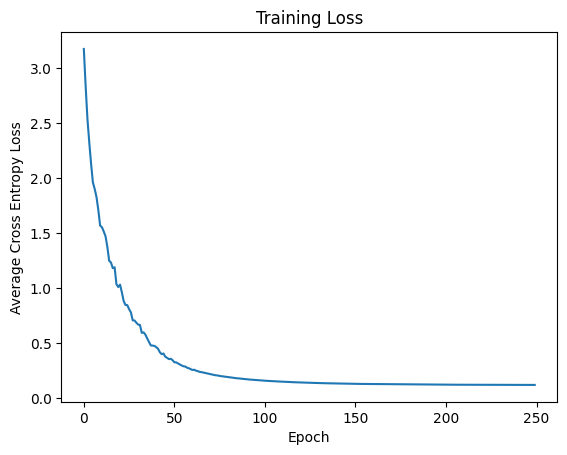

  0%|          | 1/250 [00:00<01:42,  2.44it/s]

Epoch 1/250, Loss: 2.9992


  1%|          | 2/250 [00:00<01:42,  2.42it/s]

Epoch 2/250, Loss: 2.4375


  1%|          | 3/250 [00:01<01:42,  2.41it/s]

Epoch 3/250, Loss: 2.0957


  2%|▏         | 4/250 [00:01<01:42,  2.41it/s]

Epoch 4/250, Loss: 1.8832


  2%|▏         | 5/250 [00:02<01:42,  2.40it/s]

Epoch 5/250, Loss: 1.6312


  2%|▏         | 6/250 [00:02<01:42,  2.39it/s]

Epoch 6/250, Loss: 1.4855


  3%|▎         | 7/250 [00:02<01:42,  2.38it/s]

Epoch 7/250, Loss: 1.3726


  3%|▎         | 8/250 [00:03<01:41,  2.39it/s]

Epoch 8/250, Loss: 1.2361


  4%|▎         | 9/250 [00:03<01:40,  2.40it/s]

Epoch 9/250, Loss: 1.1918


  4%|▍         | 10/250 [00:04<01:39,  2.40it/s]

Epoch 10/250, Loss: 0.9957


  4%|▍         | 11/250 [00:04<01:39,  2.41it/s]

Epoch 11/250, Loss: 0.9483


  5%|▍         | 12/250 [00:04<01:38,  2.41it/s]

Epoch 12/250, Loss: 0.9106


  5%|▌         | 13/250 [00:05<01:38,  2.41it/s]

Epoch 13/250, Loss: 0.8624


  6%|▌         | 14/250 [00:05<01:37,  2.42it/s]

Epoch 14/250, Loss: 0.7467


  6%|▌         | 15/250 [00:06<01:37,  2.41it/s]

Epoch 15/250, Loss: 0.6676


  6%|▋         | 16/250 [00:06<01:36,  2.42it/s]

Epoch 16/250, Loss: 0.6802


  7%|▋         | 17/250 [00:07<01:36,  2.41it/s]

Epoch 17/250, Loss: 0.6647


  7%|▋         | 18/250 [00:07<01:36,  2.42it/s]

Epoch 18/250, Loss: 0.5978


  8%|▊         | 19/250 [00:07<01:35,  2.42it/s]

Epoch 19/250, Loss: 0.5082


  8%|▊         | 20/250 [00:08<01:35,  2.42it/s]

Epoch 20/250, Loss: 0.4830


  8%|▊         | 21/250 [00:08<01:34,  2.42it/s]

Epoch 21/250, Loss: 0.4452


  9%|▉         | 22/250 [00:09<01:34,  2.42it/s]

Epoch 22/250, Loss: 0.4261


  9%|▉         | 23/250 [00:09<01:33,  2.42it/s]

Epoch 23/250, Loss: 0.3953


 10%|▉         | 24/250 [00:09<01:33,  2.42it/s]

Epoch 24/250, Loss: 0.3493


 10%|█         | 25/250 [00:10<01:33,  2.41it/s]

Epoch 25/250, Loss: 0.3377


 10%|█         | 26/250 [00:10<01:32,  2.41it/s]

Epoch 26/250, Loss: 0.3127


 11%|█         | 27/250 [00:11<01:32,  2.41it/s]

Epoch 27/250, Loss: 0.3071


 11%|█         | 28/250 [00:11<01:31,  2.41it/s]

Epoch 28/250, Loss: 0.2702


 12%|█▏        | 29/250 [00:12<01:31,  2.41it/s]

Epoch 29/250, Loss: 0.2513


 12%|█▏        | 30/250 [00:12<01:31,  2.41it/s]

Epoch 30/250, Loss: 0.2453


 12%|█▏        | 31/250 [00:12<01:30,  2.41it/s]

Epoch 31/250, Loss: 0.2510


 13%|█▎        | 32/250 [00:13<01:30,  2.41it/s]

Epoch 32/250, Loss: 0.2143


 13%|█▎        | 33/250 [00:13<01:30,  2.41it/s]

Epoch 33/250, Loss: 0.1955


 14%|█▎        | 34/250 [00:14<01:29,  2.40it/s]

Epoch 34/250, Loss: 0.1852


 14%|█▍        | 35/250 [00:14<01:29,  2.40it/s]

Epoch 35/250, Loss: 0.1765


 14%|█▍        | 36/250 [00:14<01:29,  2.40it/s]

Epoch 36/250, Loss: 0.1696


 15%|█▍        | 37/250 [00:15<01:28,  2.39it/s]

Epoch 37/250, Loss: 0.1577


 15%|█▌        | 38/250 [00:15<01:28,  2.39it/s]

Epoch 38/250, Loss: 0.1508


 16%|█▌        | 39/250 [00:16<01:27,  2.40it/s]

Epoch 39/250, Loss: 0.1404


 16%|█▌        | 40/250 [00:16<01:27,  2.41it/s]

Epoch 40/250, Loss: 0.1388


 16%|█▋        | 41/250 [00:17<01:26,  2.41it/s]

Epoch 41/250, Loss: 0.1367


 17%|█▋        | 42/250 [00:17<01:26,  2.40it/s]

Epoch 42/250, Loss: 0.1245


 17%|█▋        | 43/250 [00:17<01:26,  2.40it/s]

Epoch 43/250, Loss: 0.1209


 18%|█▊        | 44/250 [00:18<01:25,  2.41it/s]

Epoch 44/250, Loss: 0.1161


 18%|█▊        | 45/250 [00:18<01:25,  2.41it/s]

Epoch 45/250, Loss: 0.1125


 18%|█▊        | 46/250 [00:19<01:24,  2.41it/s]

Epoch 46/250, Loss: 0.1085


 19%|█▉        | 47/250 [00:19<01:24,  2.41it/s]

Epoch 47/250, Loss: 0.1036


 19%|█▉        | 48/250 [00:19<01:23,  2.41it/s]

Epoch 48/250, Loss: 0.1000


 20%|█▉        | 49/250 [00:20<01:23,  2.41it/s]

Epoch 49/250, Loss: 0.0979


 20%|██        | 50/250 [00:20<01:23,  2.41it/s]

Epoch 50/250, Loss: 0.0958


 20%|██        | 51/250 [00:21<01:22,  2.41it/s]

Epoch 51/250, Loss: 0.0911


 21%|██        | 52/250 [00:21<01:22,  2.41it/s]

Epoch 52/250, Loss: 0.0890


 21%|██        | 53/250 [00:22<01:21,  2.41it/s]

Epoch 53/250, Loss: 0.0869


 22%|██▏       | 54/250 [00:22<01:21,  2.41it/s]

Epoch 54/250, Loss: 0.0844


 22%|██▏       | 55/250 [00:22<01:20,  2.41it/s]

Epoch 55/250, Loss: 0.0829


 22%|██▏       | 56/250 [00:23<01:20,  2.41it/s]

Epoch 56/250, Loss: 0.0806


 23%|██▎       | 57/250 [00:23<01:19,  2.41it/s]

Epoch 57/250, Loss: 0.0785


 23%|██▎       | 58/250 [00:24<01:19,  2.41it/s]

Epoch 58/250, Loss: 0.0765


 24%|██▎       | 59/250 [00:24<01:19,  2.42it/s]

Epoch 59/250, Loss: 0.0752


 24%|██▍       | 60/250 [00:24<01:18,  2.41it/s]

Epoch 60/250, Loss: 0.0731


 24%|██▍       | 61/250 [00:25<01:18,  2.41it/s]

Epoch 61/250, Loss: 0.0719


 25%|██▍       | 62/250 [00:25<01:18,  2.41it/s]

Epoch 62/250, Loss: 0.0704


 25%|██▌       | 63/250 [00:26<01:17,  2.41it/s]

Epoch 63/250, Loss: 0.0691


 26%|██▌       | 64/250 [00:26<01:17,  2.41it/s]

Epoch 64/250, Loss: 0.0677


 26%|██▌       | 65/250 [00:26<01:16,  2.41it/s]

Epoch 65/250, Loss: 0.0667


 26%|██▋       | 66/250 [00:27<01:16,  2.40it/s]

Epoch 66/250, Loss: 0.0659


 27%|██▋       | 67/250 [00:27<01:16,  2.40it/s]

Epoch 67/250, Loss: 0.0646


 27%|██▋       | 68/250 [00:28<01:15,  2.40it/s]

Epoch 68/250, Loss: 0.0635


 28%|██▊       | 69/250 [00:28<01:15,  2.40it/s]

Epoch 69/250, Loss: 0.0623


 28%|██▊       | 70/250 [00:29<01:14,  2.41it/s]

Epoch 70/250, Loss: 0.0616


 28%|██▊       | 71/250 [00:29<01:14,  2.41it/s]

Epoch 71/250, Loss: 0.0608


 29%|██▉       | 72/250 [00:29<01:13,  2.41it/s]

Epoch 72/250, Loss: 0.0600


 29%|██▉       | 73/250 [00:30<01:13,  2.41it/s]

Epoch 73/250, Loss: 0.0592


 30%|██▉       | 74/250 [00:30<01:12,  2.41it/s]

Epoch 74/250, Loss: 0.0582


 30%|███       | 75/250 [00:31<01:12,  2.41it/s]

Epoch 75/250, Loss: 0.0573


 30%|███       | 76/250 [00:31<01:12,  2.41it/s]

Epoch 76/250, Loss: 0.0569


 31%|███       | 77/250 [00:31<01:11,  2.41it/s]

Epoch 77/250, Loss: 0.0564


 31%|███       | 78/250 [00:32<01:11,  2.41it/s]

Epoch 78/250, Loss: 0.0554


 32%|███▏      | 79/250 [00:32<01:10,  2.41it/s]

Epoch 79/250, Loss: 0.0548


 32%|███▏      | 80/250 [00:33<01:10,  2.41it/s]

Epoch 80/250, Loss: 0.0543


 32%|███▏      | 81/250 [00:33<01:10,  2.41it/s]

Epoch 81/250, Loss: 0.0537


 33%|███▎      | 82/250 [00:34<01:09,  2.41it/s]

Epoch 82/250, Loss: 0.0531


 33%|███▎      | 83/250 [00:34<01:09,  2.41it/s]

Epoch 83/250, Loss: 0.0526


 34%|███▎      | 84/250 [00:34<01:08,  2.41it/s]

Epoch 84/250, Loss: 0.0522


 34%|███▍      | 85/250 [00:35<01:08,  2.41it/s]

Epoch 85/250, Loss: 0.0515


 34%|███▍      | 86/250 [00:35<01:08,  2.41it/s]

Epoch 86/250, Loss: 0.0512


 35%|███▍      | 87/250 [00:36<01:07,  2.41it/s]

Epoch 87/250, Loss: 0.0507


 35%|███▌      | 88/250 [00:36<01:07,  2.41it/s]

Epoch 88/250, Loss: 0.0502


 36%|███▌      | 89/250 [00:36<01:06,  2.41it/s]

Epoch 89/250, Loss: 0.0500


 36%|███▌      | 90/250 [00:37<01:06,  2.41it/s]

Epoch 90/250, Loss: 0.0495


 36%|███▋      | 91/250 [00:37<01:05,  2.41it/s]

Epoch 91/250, Loss: 0.0491


 37%|███▋      | 92/250 [00:38<01:05,  2.41it/s]

Epoch 92/250, Loss: 0.0486


 37%|███▋      | 93/250 [00:38<01:05,  2.41it/s]

Epoch 93/250, Loss: 0.0483


 38%|███▊      | 94/250 [00:39<01:04,  2.41it/s]

Epoch 94/250, Loss: 0.0479


 38%|███▊      | 95/250 [00:39<01:04,  2.40it/s]

Epoch 95/250, Loss: 0.0476


 38%|███▊      | 96/250 [00:39<01:04,  2.39it/s]

Epoch 96/250, Loss: 0.0473


 39%|███▉      | 97/250 [00:40<01:03,  2.39it/s]

Epoch 97/250, Loss: 0.0469


 39%|███▉      | 98/250 [00:40<01:03,  2.39it/s]

Epoch 98/250, Loss: 0.0467


 40%|███▉      | 99/250 [00:41<01:03,  2.39it/s]

Epoch 99/250, Loss: 0.0464


 40%|████      | 100/250 [00:41<01:02,  2.40it/s]

Epoch 100/250, Loss: 0.0461


 40%|████      | 101/250 [00:41<01:02,  2.40it/s]

Epoch 101/250, Loss: 0.0458


 41%|████      | 102/250 [00:42<01:01,  2.41it/s]

Epoch 102/250, Loss: 0.0456


 41%|████      | 103/250 [00:42<01:01,  2.41it/s]

Epoch 103/250, Loss: 0.0453


 42%|████▏     | 104/250 [00:43<01:00,  2.41it/s]

Epoch 104/250, Loss: 0.0451


 42%|████▏     | 105/250 [00:43<01:00,  2.41it/s]

Epoch 105/250, Loss: 0.0448


 42%|████▏     | 106/250 [00:44<00:59,  2.41it/s]

Epoch 106/250, Loss: 0.0446


 43%|████▎     | 107/250 [00:44<00:59,  2.41it/s]

Epoch 107/250, Loss: 0.0444


 43%|████▎     | 108/250 [00:44<00:58,  2.41it/s]

Epoch 108/250, Loss: 0.0442


 44%|████▎     | 109/250 [00:45<00:58,  2.41it/s]

Epoch 109/250, Loss: 0.0439


 44%|████▍     | 110/250 [00:45<00:58,  2.41it/s]

Epoch 110/250, Loss: 0.0437


 44%|████▍     | 111/250 [00:46<00:57,  2.41it/s]

Epoch 111/250, Loss: 0.0435


 45%|████▍     | 112/250 [00:46<00:57,  2.41it/s]

Epoch 112/250, Loss: 0.0433


 45%|████▌     | 113/250 [00:46<00:56,  2.41it/s]

Epoch 113/250, Loss: 0.0431


 46%|████▌     | 114/250 [00:47<00:56,  2.41it/s]

Epoch 114/250, Loss: 0.0430


 46%|████▌     | 115/250 [00:47<00:56,  2.41it/s]

Epoch 115/250, Loss: 0.0428


 46%|████▋     | 116/250 [00:48<00:55,  2.41it/s]

Epoch 116/250, Loss: 0.0426


 47%|████▋     | 117/250 [00:48<00:55,  2.41it/s]

Epoch 117/250, Loss: 0.0425


 47%|████▋     | 118/250 [00:49<00:54,  2.41it/s]

Epoch 118/250, Loss: 0.0423


 48%|████▊     | 119/250 [00:49<00:54,  2.41it/s]

Epoch 119/250, Loss: 0.0421


 48%|████▊     | 120/250 [00:49<00:53,  2.41it/s]

Epoch 120/250, Loss: 0.0419


 48%|████▊     | 121/250 [00:50<00:53,  2.41it/s]

Epoch 121/250, Loss: 0.0418


 49%|████▉     | 122/250 [00:50<00:53,  2.41it/s]

Epoch 122/250, Loss: 0.0417


 49%|████▉     | 123/250 [00:51<00:52,  2.41it/s]

Epoch 123/250, Loss: 0.0416


 50%|████▉     | 124/250 [00:51<00:52,  2.42it/s]

Epoch 124/250, Loss: 0.0414


 50%|█████     | 125/250 [00:51<00:51,  2.41it/s]

Epoch 125/250, Loss: 0.0413


 50%|█████     | 126/250 [00:52<00:51,  2.41it/s]

Epoch 126/250, Loss: 0.0412


 51%|█████     | 127/250 [00:52<00:51,  2.41it/s]

Epoch 127/250, Loss: 0.0411


 51%|█████     | 128/250 [00:53<00:50,  2.41it/s]

Epoch 128/250, Loss: 0.0409


 52%|█████▏    | 129/250 [00:53<00:50,  2.41it/s]

Epoch 129/250, Loss: 0.0407


 52%|█████▏    | 130/250 [00:53<00:50,  2.40it/s]

Epoch 130/250, Loss: 0.0407


 52%|█████▏    | 131/250 [00:54<00:49,  2.40it/s]

Epoch 131/250, Loss: 0.0406


 53%|█████▎    | 132/250 [00:54<00:49,  2.40it/s]

Epoch 132/250, Loss: 0.0405


 53%|█████▎    | 133/250 [00:55<00:48,  2.41it/s]

Epoch 133/250, Loss: 0.0403


 54%|█████▎    | 134/250 [00:55<00:48,  2.41it/s]

Epoch 134/250, Loss: 0.0403


 54%|█████▍    | 135/250 [00:56<00:47,  2.41it/s]

Epoch 135/250, Loss: 0.0402


 54%|█████▍    | 136/250 [00:56<00:47,  2.41it/s]

Epoch 136/250, Loss: 0.0400


 55%|█████▍    | 137/250 [00:56<00:46,  2.41it/s]

Epoch 137/250, Loss: 0.0400


 55%|█████▌    | 138/250 [00:57<00:46,  2.41it/s]

Epoch 138/250, Loss: 0.0399


 56%|█████▌    | 139/250 [00:57<00:46,  2.41it/s]

Epoch 139/250, Loss: 0.0398


 56%|█████▌    | 140/250 [00:58<00:45,  2.41it/s]

Epoch 140/250, Loss: 0.0397


 56%|█████▋    | 141/250 [00:58<00:45,  2.41it/s]

Epoch 141/250, Loss: 0.0396


 57%|█████▋    | 142/250 [00:58<00:44,  2.41it/s]

Epoch 142/250, Loss: 0.0395


 57%|█████▋    | 143/250 [00:59<00:44,  2.41it/s]

Epoch 143/250, Loss: 0.0395


 58%|█████▊    | 144/250 [00:59<00:43,  2.41it/s]

Epoch 144/250, Loss: 0.0394


 58%|█████▊    | 145/250 [01:00<00:43,  2.41it/s]

Epoch 145/250, Loss: 0.0393


 58%|█████▊    | 146/250 [01:00<00:43,  2.41it/s]

Epoch 146/250, Loss: 0.0392


 59%|█████▉    | 147/250 [01:01<00:42,  2.41it/s]

Epoch 147/250, Loss: 0.0392


 59%|█████▉    | 148/250 [01:01<00:42,  2.41it/s]

Epoch 148/250, Loss: 0.0391


 60%|█████▉    | 149/250 [01:01<00:41,  2.41it/s]

Epoch 149/250, Loss: 0.0390


 60%|██████    | 150/250 [01:02<00:41,  2.41it/s]

Epoch 150/250, Loss: 0.0389


 60%|██████    | 151/250 [01:02<00:41,  2.41it/s]

Epoch 151/250, Loss: 0.0389


 61%|██████    | 152/250 [01:03<00:40,  2.41it/s]

Epoch 152/250, Loss: 0.0388


 61%|██████    | 153/250 [01:03<00:40,  2.41it/s]

Epoch 153/250, Loss: 0.0388


 62%|██████▏   | 154/250 [01:03<00:39,  2.41it/s]

Epoch 154/250, Loss: 0.0387


 62%|██████▏   | 155/250 [01:04<00:39,  2.41it/s]

Epoch 155/250, Loss: 0.0387


 62%|██████▏   | 156/250 [01:04<00:39,  2.40it/s]

Epoch 156/250, Loss: 0.0386


 63%|██████▎   | 157/250 [01:05<00:38,  2.39it/s]

Epoch 157/250, Loss: 0.0385


 63%|██████▎   | 158/250 [01:05<00:38,  2.39it/s]

Epoch 158/250, Loss: 0.0385


 64%|██████▎   | 159/250 [01:06<00:37,  2.40it/s]

Epoch 159/250, Loss: 0.0384


 64%|██████▍   | 160/250 [01:06<00:37,  2.40it/s]

Epoch 160/250, Loss: 0.0384


 64%|██████▍   | 161/250 [01:06<00:37,  2.40it/s]

Epoch 161/250, Loss: 0.0383


 65%|██████▍   | 162/250 [01:07<00:36,  2.41it/s]

Epoch 162/250, Loss: 0.0383


 65%|██████▌   | 163/250 [01:07<00:36,  2.41it/s]

Epoch 163/250, Loss: 0.0382


 66%|██████▌   | 164/250 [01:08<00:35,  2.41it/s]

Epoch 164/250, Loss: 0.0382


 66%|██████▌   | 165/250 [01:08<00:35,  2.41it/s]

Epoch 165/250, Loss: 0.0381


 66%|██████▋   | 166/250 [01:08<00:34,  2.41it/s]

Epoch 166/250, Loss: 0.0381


 67%|██████▋   | 167/250 [01:09<00:34,  2.41it/s]

Epoch 167/250, Loss: 0.0380


 67%|██████▋   | 168/250 [01:09<00:34,  2.41it/s]

Epoch 168/250, Loss: 0.0380


 68%|██████▊   | 169/250 [01:10<00:33,  2.41it/s]

Epoch 169/250, Loss: 0.0379


 68%|██████▊   | 170/250 [01:10<00:33,  2.41it/s]

Epoch 170/250, Loss: 0.0379


 68%|██████▊   | 171/250 [01:11<00:32,  2.41it/s]

Epoch 171/250, Loss: 0.0378


 69%|██████▉   | 172/250 [01:11<00:32,  2.41it/s]

Epoch 172/250, Loss: 0.0378


 69%|██████▉   | 173/250 [01:11<00:31,  2.41it/s]

Epoch 173/250, Loss: 0.0378


 70%|██████▉   | 174/250 [01:12<00:31,  2.42it/s]

Epoch 174/250, Loss: 0.0378


 70%|███████   | 175/250 [01:12<00:31,  2.42it/s]

Epoch 175/250, Loss: 0.0377


 70%|███████   | 176/250 [01:13<00:30,  2.41it/s]

Epoch 176/250, Loss: 0.0377


 71%|███████   | 177/250 [01:13<00:30,  2.41it/s]

Epoch 177/250, Loss: 0.0377


 71%|███████   | 178/250 [01:13<00:29,  2.41it/s]

Epoch 178/250, Loss: 0.0376


 72%|███████▏  | 179/250 [01:14<00:29,  2.41it/s]

Epoch 179/250, Loss: 0.0376


 72%|███████▏  | 180/250 [01:14<00:28,  2.42it/s]

Epoch 180/250, Loss: 0.0376


 72%|███████▏  | 181/250 [01:15<00:28,  2.41it/s]

Epoch 181/250, Loss: 0.0375


 73%|███████▎  | 182/250 [01:15<00:28,  2.41it/s]

Epoch 182/250, Loss: 0.0375


 73%|███████▎  | 183/250 [01:15<00:27,  2.41it/s]

Epoch 183/250, Loss: 0.0375


 74%|███████▎  | 184/250 [01:16<00:27,  2.41it/s]

Epoch 184/250, Loss: 0.0374


 74%|███████▍  | 185/250 [01:16<00:26,  2.41it/s]

Epoch 185/250, Loss: 0.0374


 74%|███████▍  | 186/250 [01:17<00:26,  2.41it/s]

Epoch 186/250, Loss: 0.0374


 75%|███████▍  | 187/250 [01:17<00:26,  2.40it/s]

Epoch 187/250, Loss: 0.0374


 75%|███████▌  | 188/250 [01:18<00:25,  2.40it/s]

Epoch 188/250, Loss: 0.0373


 76%|███████▌  | 189/250 [01:18<00:25,  2.41it/s]

Epoch 189/250, Loss: 0.0373


 76%|███████▌  | 190/250 [01:18<00:25,  2.40it/s]

Epoch 190/250, Loss: 0.0373


 76%|███████▋  | 191/250 [01:19<00:24,  2.39it/s]

Epoch 191/250, Loss: 0.0373


 77%|███████▋  | 192/250 [01:19<00:24,  2.38it/s]

Epoch 192/250, Loss: 0.0373


 77%|███████▋  | 193/250 [01:20<00:23,  2.39it/s]

Epoch 193/250, Loss: 0.0372


 78%|███████▊  | 194/250 [01:20<00:23,  2.40it/s]

Epoch 194/250, Loss: 0.0372


 78%|███████▊  | 195/250 [01:20<00:22,  2.40it/s]

Epoch 195/250, Loss: 0.0372


 78%|███████▊  | 196/250 [01:21<00:22,  2.40it/s]

Epoch 196/250, Loss: 0.0371


 79%|███████▉  | 197/250 [01:21<00:22,  2.41it/s]

Epoch 197/250, Loss: 0.0371


 79%|███████▉  | 198/250 [01:22<00:21,  2.41it/s]

Epoch 198/250, Loss: 0.0371


 80%|███████▉  | 199/250 [01:22<00:21,  2.41it/s]

Epoch 199/250, Loss: 0.0371


 80%|████████  | 200/250 [01:23<00:20,  2.41it/s]

Epoch 200/250, Loss: 0.0371


 80%|████████  | 201/250 [01:23<00:20,  2.41it/s]

Epoch 201/250, Loss: 0.0371


 81%|████████  | 202/250 [01:23<00:19,  2.41it/s]

Epoch 202/250, Loss: 0.0370


 81%|████████  | 203/250 [01:24<00:19,  2.41it/s]

Epoch 203/250, Loss: 0.0370


 82%|████████▏ | 204/250 [01:24<00:19,  2.41it/s]

Epoch 204/250, Loss: 0.0370


 82%|████████▏ | 205/250 [01:25<00:18,  2.41it/s]

Epoch 205/250, Loss: 0.0370


 82%|████████▏ | 206/250 [01:25<00:18,  2.41it/s]

Epoch 206/250, Loss: 0.0370


 83%|████████▎ | 207/250 [01:25<00:17,  2.41it/s]

Epoch 207/250, Loss: 0.0370


 83%|████████▎ | 208/250 [01:26<00:17,  2.41it/s]

Epoch 208/250, Loss: 0.0369


 84%|████████▎ | 209/250 [01:26<00:16,  2.41it/s]

Epoch 209/250, Loss: 0.0369


 84%|████████▍ | 210/250 [01:27<00:16,  2.41it/s]

Epoch 210/250, Loss: 0.0369


 84%|████████▍ | 211/250 [01:27<00:16,  2.41it/s]

Epoch 211/250, Loss: 0.0369


 85%|████████▍ | 212/250 [01:28<00:15,  2.41it/s]

Epoch 212/250, Loss: 0.0369


 85%|████████▌ | 213/250 [01:28<00:15,  2.41it/s]

Epoch 213/250, Loss: 0.0369


 86%|████████▌ | 214/250 [01:28<00:14,  2.41it/s]

Epoch 214/250, Loss: 0.0368


 86%|████████▌ | 215/250 [01:29<00:14,  2.41it/s]

Epoch 215/250, Loss: 0.0368


 86%|████████▋ | 216/250 [01:29<00:14,  2.41it/s]

Epoch 216/250, Loss: 0.0368


 87%|████████▋ | 217/250 [01:30<00:13,  2.41it/s]

Epoch 217/250, Loss: 0.0368


 87%|████████▋ | 218/250 [01:30<00:13,  2.40it/s]

Epoch 218/250, Loss: 0.0368


 88%|████████▊ | 219/250 [01:30<00:12,  2.41it/s]

Epoch 219/250, Loss: 0.0368


 88%|████████▊ | 220/250 [01:31<00:12,  2.40it/s]

Epoch 220/250, Loss: 0.0368


 88%|████████▊ | 221/250 [01:31<00:12,  2.40it/s]

Epoch 221/250, Loss: 0.0368


 89%|████████▉ | 222/250 [01:32<00:11,  2.40it/s]

Epoch 222/250, Loss: 0.0367


 89%|████████▉ | 223/250 [01:32<00:11,  2.39it/s]

Epoch 223/250, Loss: 0.0367


 90%|████████▉ | 224/250 [01:33<00:10,  2.40it/s]

Epoch 224/250, Loss: 0.0367


 90%|█████████ | 225/250 [01:33<00:10,  2.40it/s]

Epoch 225/250, Loss: 0.0367


 90%|█████████ | 226/250 [01:33<00:10,  2.40it/s]

Epoch 226/250, Loss: 0.0367


 91%|█████████ | 227/250 [01:34<00:09,  2.40it/s]

Epoch 227/250, Loss: 0.0367


 91%|█████████ | 228/250 [01:34<00:09,  2.40it/s]

Epoch 228/250, Loss: 0.0367


 92%|█████████▏| 229/250 [01:35<00:08,  2.41it/s]

Epoch 229/250, Loss: 0.0367


 92%|█████████▏| 230/250 [01:35<00:08,  2.41it/s]

Epoch 230/250, Loss: 0.0367


 92%|█████████▏| 231/250 [01:35<00:07,  2.40it/s]

Epoch 231/250, Loss: 0.0367


 93%|█████████▎| 232/250 [01:36<00:07,  2.41it/s]

Epoch 232/250, Loss: 0.0366


 93%|█████████▎| 233/250 [01:36<00:07,  2.41it/s]

Epoch 233/250, Loss: 0.0366


 94%|█████████▎| 234/250 [01:37<00:06,  2.41it/s]

Epoch 234/250, Loss: 0.0366


 94%|█████████▍| 235/250 [01:37<00:06,  2.41it/s]

Epoch 235/250, Loss: 0.0366


 94%|█████████▍| 236/250 [01:38<00:05,  2.41it/s]

Epoch 236/250, Loss: 0.0366


 95%|█████████▍| 237/250 [01:38<00:05,  2.41it/s]

Epoch 237/250, Loss: 0.0366


 95%|█████████▌| 238/250 [01:38<00:04,  2.41it/s]

Epoch 238/250, Loss: 0.0366


 96%|█████████▌| 239/250 [01:39<00:04,  2.41it/s]

Epoch 239/250, Loss: 0.0366


 96%|█████████▌| 240/250 [01:39<00:04,  2.41it/s]

Epoch 240/250, Loss: 0.0366


 96%|█████████▋| 241/250 [01:40<00:03,  2.40it/s]

Epoch 241/250, Loss: 0.0366


 97%|█████████▋| 242/250 [01:40<00:03,  2.41it/s]

Epoch 242/250, Loss: 0.0366


 97%|█████████▋| 243/250 [01:40<00:02,  2.41it/s]

Epoch 243/250, Loss: 0.0365


 98%|█████████▊| 244/250 [01:41<00:02,  2.41it/s]

Epoch 244/250, Loss: 0.0366


 98%|█████████▊| 245/250 [01:41<00:02,  2.41it/s]

Epoch 245/250, Loss: 0.0366


 98%|█████████▊| 246/250 [01:42<00:01,  2.41it/s]

Epoch 246/250, Loss: 0.0365


 99%|█████████▉| 247/250 [01:42<00:01,  2.41it/s]

Epoch 247/250, Loss: 0.0365


 99%|█████████▉| 248/250 [01:42<00:00,  2.40it/s]

Epoch 248/250, Loss: 0.0365


100%|█████████▉| 249/250 [01:43<00:00,  2.40it/s]

Epoch 249/250, Loss: 0.0365


100%|██████████| 250/250 [01:43<00:00,  2.41it/s]

Epoch 250/250, Loss: 0.0365


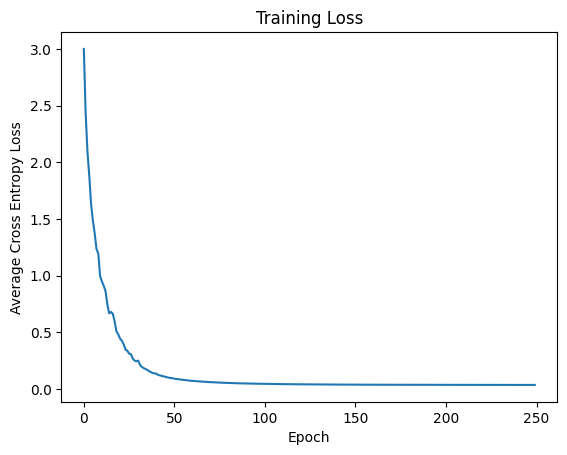

  0%|          | 1/250 [00:00<01:42,  2.44it/s]

Epoch 1/250, Loss: 3.1333


  1%|          | 2/250 [00:00<01:42,  2.43it/s]

Epoch 2/250, Loss: 2.7702


  1%|          | 3/250 [00:01<01:42,  2.42it/s]

Epoch 3/250, Loss: 2.4449


  2%|▏         | 4/250 [00:01<01:41,  2.41it/s]

Epoch 4/250, Loss: 2.1311


  2%|▏         | 5/250 [00:02<01:41,  2.41it/s]

Epoch 5/250, Loss: 1.8729


  2%|▏         | 6/250 [00:02<01:40,  2.42it/s]

Epoch 6/250, Loss: 1.7012


  3%|▎         | 7/250 [00:02<01:40,  2.42it/s]

Epoch 7/250, Loss: 1.6109


  3%|▎         | 8/250 [00:03<01:40,  2.42it/s]

Epoch 8/250, Loss: 1.5078


  4%|▎         | 9/250 [00:03<01:39,  2.42it/s]

Epoch 9/250, Loss: 1.4132


  4%|▍         | 10/250 [00:04<01:39,  2.42it/s]

Epoch 10/250, Loss: 1.2256


  4%|▍         | 11/250 [00:04<01:38,  2.42it/s]

Epoch 11/250, Loss: 1.1558


  5%|▍         | 12/250 [00:04<01:38,  2.42it/s]

Epoch 12/250, Loss: 1.1438


  5%|▌         | 13/250 [00:05<01:37,  2.42it/s]

Epoch 13/250, Loss: 1.0480


  6%|▌         | 14/250 [00:05<01:37,  2.42it/s]

Epoch 14/250, Loss: 1.0461


  6%|▌         | 15/250 [00:06<01:37,  2.42it/s]

Epoch 15/250, Loss: 0.8981


  6%|▋         | 16/250 [00:06<01:37,  2.41it/s]

Epoch 16/250, Loss: 0.8309


  7%|▋         | 17/250 [00:07<01:36,  2.41it/s]

Epoch 17/250, Loss: 0.8015


  7%|▋         | 18/250 [00:07<01:36,  2.42it/s]

Epoch 18/250, Loss: 0.7743


  8%|▊         | 19/250 [00:07<01:35,  2.42it/s]

Epoch 19/250, Loss: 0.6613


  8%|▊         | 20/250 [00:08<01:35,  2.42it/s]

Epoch 20/250, Loss: 0.6548


  8%|▊         | 21/250 [00:08<01:34,  2.42it/s]

Epoch 21/250, Loss: 0.6317


  9%|▉         | 22/250 [00:09<01:34,  2.42it/s]

Epoch 22/250, Loss: 0.6021


  9%|▉         | 23/250 [00:09<01:33,  2.42it/s]

Epoch 23/250, Loss: 0.5625


 10%|▉         | 24/250 [00:09<01:33,  2.42it/s]

Epoch 24/250, Loss: 0.4798


 10%|█         | 25/250 [00:10<01:33,  2.42it/s]

Epoch 25/250, Loss: 0.4507


 10%|█         | 26/250 [00:10<01:32,  2.42it/s]

Epoch 26/250, Loss: 0.4725


 11%|█         | 27/250 [00:11<01:32,  2.42it/s]

Epoch 27/250, Loss: 0.4521


 11%|█         | 28/250 [00:11<01:31,  2.42it/s]

Epoch 28/250, Loss: 0.3883


 12%|█▏        | 29/250 [00:11<01:31,  2.42it/s]

Epoch 29/250, Loss: 0.3568


 12%|█▏        | 30/250 [00:12<01:31,  2.41it/s]

Epoch 30/250, Loss: 0.3604


 12%|█▏        | 31/250 [00:12<01:30,  2.41it/s]

Epoch 31/250, Loss: 0.3372


 13%|█▎        | 32/250 [00:13<01:30,  2.41it/s]

Epoch 32/250, Loss: 0.3186


 13%|█▎        | 33/250 [00:13<01:30,  2.41it/s]

Epoch 33/250, Loss: 0.2782


 14%|█▎        | 34/250 [00:14<01:29,  2.41it/s]

Epoch 34/250, Loss: 0.2704


 14%|█▍        | 35/250 [00:14<01:29,  2.41it/s]

Epoch 35/250, Loss: 0.2811


 14%|█▍        | 36/250 [00:14<01:28,  2.41it/s]

Epoch 36/250, Loss: 0.2541


 15%|█▍        | 37/250 [00:15<01:28,  2.42it/s]

Epoch 37/250, Loss: 0.2339


 15%|█▌        | 38/250 [00:15<01:27,  2.42it/s]

Epoch 38/250, Loss: 0.2169


 16%|█▌        | 39/250 [00:16<01:27,  2.42it/s]

Epoch 39/250, Loss: 0.2113


 16%|█▌        | 40/250 [00:16<01:26,  2.41it/s]

Epoch 40/250, Loss: 0.2033


 16%|█▋        | 41/250 [00:16<01:26,  2.42it/s]

Epoch 41/250, Loss: 0.1939


 17%|█▋        | 42/250 [00:17<01:26,  2.41it/s]

Epoch 42/250, Loss: 0.1794


 17%|█▋        | 43/250 [00:17<01:25,  2.42it/s]

Epoch 43/250, Loss: 0.1723


 18%|█▊        | 44/250 [00:18<01:25,  2.41it/s]

Epoch 44/250, Loss: 0.1688


 18%|█▊        | 45/250 [00:18<01:24,  2.41it/s]

Epoch 45/250, Loss: 0.1619


 18%|█▊        | 46/250 [00:19<01:24,  2.42it/s]

Epoch 46/250, Loss: 0.1543


 19%|█▉        | 47/250 [00:19<01:24,  2.42it/s]

Epoch 47/250, Loss: 0.1473


 19%|█▉        | 48/250 [00:19<01:23,  2.42it/s]

Epoch 48/250, Loss: 0.1416


 20%|█▉        | 49/250 [00:20<01:23,  2.41it/s]

Epoch 49/250, Loss: 0.1380


 20%|██        | 50/250 [00:20<01:23,  2.41it/s]

Epoch 50/250, Loss: 0.1347


 20%|██        | 51/250 [00:21<01:22,  2.41it/s]

Epoch 51/250, Loss: 0.1264


 21%|██        | 52/250 [00:21<01:22,  2.41it/s]

Epoch 52/250, Loss: 0.1241


 21%|██        | 53/250 [00:21<01:21,  2.41it/s]

Epoch 53/250, Loss: 0.1192


 22%|██▏       | 54/250 [00:22<01:21,  2.41it/s]

Epoch 54/250, Loss: 0.1165


 22%|██▏       | 55/250 [00:22<01:20,  2.41it/s]

Epoch 55/250, Loss: 0.1134


 22%|██▏       | 56/250 [00:23<01:20,  2.41it/s]

Epoch 56/250, Loss: 0.1099


 23%|██▎       | 57/250 [00:23<01:20,  2.41it/s]

Epoch 57/250, Loss: 0.1080


 23%|██▎       | 58/250 [00:24<01:19,  2.42it/s]

Epoch 58/250, Loss: 0.1049


 24%|██▎       | 59/250 [00:24<01:19,  2.41it/s]

Epoch 59/250, Loss: 0.1021


 24%|██▍       | 60/250 [00:24<01:18,  2.41it/s]

Epoch 60/250, Loss: 0.0999


 24%|██▍       | 61/250 [00:25<01:18,  2.40it/s]

Epoch 61/250, Loss: 0.0970


 25%|██▍       | 62/250 [00:25<01:18,  2.40it/s]

Epoch 62/250, Loss: 0.0954


 25%|██▌       | 63/250 [00:26<01:18,  2.39it/s]

Epoch 63/250, Loss: 0.0936


 26%|██▌       | 64/250 [00:26<01:17,  2.40it/s]

Epoch 64/250, Loss: 0.0913


 26%|██▌       | 65/250 [00:26<01:17,  2.40it/s]

Epoch 65/250, Loss: 0.0897


 26%|██▋       | 66/250 [00:27<01:16,  2.40it/s]

Epoch 66/250, Loss: 0.0877


 27%|██▋       | 67/250 [00:27<01:16,  2.40it/s]

Epoch 67/250, Loss: 0.0869


 27%|██▋       | 68/250 [00:28<01:15,  2.41it/s]

Epoch 68/250, Loss: 0.0848


 28%|██▊       | 69/250 [00:28<01:15,  2.41it/s]

Epoch 69/250, Loss: 0.0835


 28%|██▊       | 70/250 [00:29<01:14,  2.41it/s]

Epoch 70/250, Loss: 0.0818


 28%|██▊       | 71/250 [00:29<01:14,  2.41it/s]

Epoch 71/250, Loss: 0.0812


 29%|██▉       | 72/250 [00:29<01:13,  2.42it/s]

Epoch 72/250, Loss: 0.0796


 29%|██▉       | 73/250 [00:30<01:13,  2.41it/s]

Epoch 73/250, Loss: 0.0781


 30%|██▉       | 74/250 [00:30<01:12,  2.42it/s]

Epoch 74/250, Loss: 0.0768


 30%|███       | 75/250 [00:31<01:12,  2.42it/s]

Epoch 75/250, Loss: 0.0759


 30%|███       | 76/250 [00:31<01:12,  2.42it/s]

Epoch 76/250, Loss: 0.0747


 31%|███       | 77/250 [00:31<01:11,  2.42it/s]

Epoch 77/250, Loss: 0.0736


 31%|███       | 78/250 [00:32<01:11,  2.41it/s]

Epoch 78/250, Loss: 0.0728


 32%|███▏      | 79/250 [00:32<01:10,  2.42it/s]

Epoch 79/250, Loss: 0.0722


 32%|███▏      | 80/250 [00:33<01:10,  2.41it/s]

Epoch 80/250, Loss: 0.0710


 32%|███▏      | 81/250 [00:33<01:10,  2.41it/s]

Epoch 81/250, Loss: 0.0702


 33%|███▎      | 82/250 [00:33<01:09,  2.41it/s]

Epoch 82/250, Loss: 0.0694


 33%|███▎      | 83/250 [00:34<01:09,  2.41it/s]

Epoch 83/250, Loss: 0.0684


 34%|███▎      | 84/250 [00:34<01:08,  2.41it/s]

Epoch 84/250, Loss: 0.0677


 34%|███▍      | 85/250 [00:35<01:08,  2.41it/s]

Epoch 85/250, Loss: 0.0671


 34%|███▍      | 86/250 [00:35<01:07,  2.41it/s]

Epoch 86/250, Loss: 0.0665


 35%|███▍      | 87/250 [00:36<01:07,  2.42it/s]

Epoch 87/250, Loss: 0.0656


 35%|███▌      | 88/250 [00:36<01:07,  2.41it/s]

Epoch 88/250, Loss: 0.0650


 36%|███▌      | 89/250 [00:36<01:06,  2.41it/s]

Epoch 89/250, Loss: 0.0644


 36%|███▌      | 90/250 [00:37<01:06,  2.41it/s]

Epoch 90/250, Loss: 0.0637


 36%|███▋      | 91/250 [00:37<01:06,  2.41it/s]

Epoch 91/250, Loss: 0.0632


 37%|███▋      | 92/250 [00:38<01:05,  2.40it/s]

Epoch 92/250, Loss: 0.0626


 37%|███▋      | 93/250 [00:38<01:05,  2.40it/s]

Epoch 93/250, Loss: 0.0622


 38%|███▊      | 94/250 [00:38<01:05,  2.39it/s]

Epoch 94/250, Loss: 0.0617


 38%|███▊      | 95/250 [00:39<01:04,  2.40it/s]

Epoch 95/250, Loss: 0.0613


 38%|███▊      | 96/250 [00:39<01:04,  2.39it/s]

Epoch 96/250, Loss: 0.0606


 39%|███▉      | 97/250 [00:40<01:04,  2.38it/s]

Epoch 97/250, Loss: 0.0603


 39%|███▉      | 98/250 [00:40<01:03,  2.39it/s]

Epoch 98/250, Loss: 0.0598


 40%|███▉      | 99/250 [00:41<01:03,  2.40it/s]

Epoch 99/250, Loss: 0.0592


 40%|████      | 100/250 [00:41<01:02,  2.40it/s]

Epoch 100/250, Loss: 0.0590


 40%|████      | 101/250 [00:41<01:01,  2.40it/s]

Epoch 101/250, Loss: 0.0585


 41%|████      | 102/250 [00:42<01:01,  2.41it/s]

Epoch 102/250, Loss: 0.0581


 41%|████      | 103/250 [00:42<01:00,  2.41it/s]

Epoch 103/250, Loss: 0.0579


 42%|████▏     | 104/250 [00:43<01:00,  2.41it/s]

Epoch 104/250, Loss: 0.0574


 42%|████▏     | 105/250 [00:43<01:00,  2.41it/s]

Epoch 105/250, Loss: 0.0571


 42%|████▏     | 106/250 [00:43<00:59,  2.41it/s]

Epoch 106/250, Loss: 0.0568


 43%|████▎     | 107/250 [00:44<00:59,  2.42it/s]

Epoch 107/250, Loss: 0.0564


 43%|████▎     | 108/250 [00:44<00:58,  2.41it/s]

Epoch 108/250, Loss: 0.0562


 44%|████▎     | 109/250 [00:45<00:58,  2.42it/s]

Epoch 109/250, Loss: 0.0558


 44%|████▍     | 110/250 [00:45<00:57,  2.42it/s]

Epoch 110/250, Loss: 0.0555


 44%|████▍     | 111/250 [00:46<00:57,  2.41it/s]

Epoch 111/250, Loss: 0.0552


 45%|████▍     | 112/250 [00:46<00:57,  2.42it/s]

Epoch 112/250, Loss: 0.0550


 45%|████▌     | 113/250 [00:46<00:56,  2.42it/s]

Epoch 113/250, Loss: 0.0547


 46%|████▌     | 114/250 [00:47<00:56,  2.42it/s]

Epoch 114/250, Loss: 0.0544


 46%|████▌     | 115/250 [00:47<00:55,  2.42it/s]

Epoch 115/250, Loss: 0.0542


 46%|████▋     | 116/250 [00:48<00:55,  2.42it/s]

Epoch 116/250, Loss: 0.0539


 47%|████▋     | 117/250 [00:48<00:55,  2.42it/s]

Epoch 117/250, Loss: 0.0537


 47%|████▋     | 118/250 [00:48<00:54,  2.41it/s]

Epoch 118/250, Loss: 0.0535


 48%|████▊     | 119/250 [00:49<00:54,  2.41it/s]

Epoch 119/250, Loss: 0.0531


 48%|████▊     | 120/250 [00:49<00:53,  2.41it/s]

Epoch 120/250, Loss: 0.0530


 48%|████▊     | 121/250 [00:50<00:53,  2.41it/s]

Epoch 121/250, Loss: 0.0528


 49%|████▉     | 122/250 [00:50<00:53,  2.41it/s]

Epoch 122/250, Loss: 0.0526


 49%|████▉     | 123/250 [00:50<00:52,  2.41it/s]

Epoch 123/250, Loss: 0.0524


 50%|████▉     | 124/250 [00:51<00:52,  2.41it/s]

Epoch 124/250, Loss: 0.0521


 50%|█████     | 125/250 [00:51<00:51,  2.40it/s]

Epoch 125/250, Loss: 0.0520


 50%|█████     | 126/250 [00:52<00:51,  2.41it/s]

Epoch 126/250, Loss: 0.0518


 51%|█████     | 127/250 [00:52<00:51,  2.41it/s]

Epoch 127/250, Loss: 0.0517


 51%|█████     | 128/250 [00:53<00:50,  2.40it/s]

Epoch 128/250, Loss: 0.0515


 52%|█████▏    | 129/250 [00:53<00:50,  2.41it/s]

Epoch 129/250, Loss: 0.0513


 52%|█████▏    | 130/250 [00:53<00:49,  2.41it/s]

Epoch 130/250, Loss: 0.0511


 52%|█████▏    | 131/250 [00:54<00:49,  2.41it/s]

Epoch 131/250, Loss: 0.0510


 53%|█████▎    | 132/250 [00:54<00:48,  2.41it/s]

Epoch 132/250, Loss: 0.0508


 53%|█████▎    | 133/250 [00:55<00:48,  2.41it/s]

Epoch 133/250, Loss: 0.0506


 54%|█████▎    | 134/250 [00:55<00:48,  2.41it/s]

Epoch 134/250, Loss: 0.0505


 54%|█████▍    | 135/250 [00:55<00:47,  2.41it/s]

Epoch 135/250, Loss: 0.0504


 54%|█████▍    | 136/250 [00:56<00:47,  2.42it/s]

Epoch 136/250, Loss: 0.0502


 55%|█████▍    | 137/250 [00:56<00:46,  2.41it/s]

Epoch 137/250, Loss: 0.0501


 55%|█████▌    | 138/250 [00:57<00:46,  2.41it/s]

Epoch 138/250, Loss: 0.0500


 56%|█████▌    | 139/250 [00:57<00:45,  2.41it/s]

Epoch 139/250, Loss: 0.0498


 56%|█████▌    | 140/250 [00:58<00:45,  2.41it/s]

Epoch 140/250, Loss: 0.0497


 56%|█████▋    | 141/250 [00:58<00:45,  2.42it/s]

Epoch 141/250, Loss: 0.0496


 57%|█████▋    | 142/250 [00:58<00:44,  2.42it/s]

Epoch 142/250, Loss: 0.0494


 57%|█████▋    | 143/250 [00:59<00:44,  2.42it/s]

Epoch 143/250, Loss: 0.0494


 58%|█████▊    | 144/250 [00:59<00:43,  2.42it/s]

Epoch 144/250, Loss: 0.0492


 58%|█████▊    | 145/250 [01:00<00:43,  2.42it/s]

Epoch 145/250, Loss: 0.0491


 58%|█████▊    | 146/250 [01:00<00:43,  2.42it/s]

Epoch 146/250, Loss: 0.0490


 59%|█████▉    | 147/250 [01:00<00:42,  2.42it/s]

Epoch 147/250, Loss: 0.0489


 59%|█████▉    | 148/250 [01:01<00:42,  2.41it/s]

Epoch 148/250, Loss: 0.0488


 60%|█████▉    | 149/250 [01:01<00:41,  2.41it/s]

Epoch 149/250, Loss: 0.0488


 60%|██████    | 150/250 [01:02<00:41,  2.42it/s]

Epoch 150/250, Loss: 0.0486


 60%|██████    | 151/250 [01:02<00:40,  2.42it/s]

Epoch 151/250, Loss: 0.0485


 61%|██████    | 152/250 [01:03<00:40,  2.42it/s]

Epoch 152/250, Loss: 0.0485


 61%|██████    | 153/250 [01:03<00:40,  2.41it/s]

Epoch 153/250, Loss: 0.0484


 62%|██████▏   | 154/250 [01:03<00:39,  2.41it/s]

Epoch 154/250, Loss: 0.0483


 62%|██████▏   | 155/250 [01:04<00:39,  2.41it/s]

Epoch 155/250, Loss: 0.0482


 62%|██████▏   | 156/250 [01:04<00:39,  2.41it/s]

Epoch 156/250, Loss: 0.0481


 63%|██████▎   | 157/250 [01:05<00:38,  2.41it/s]

Epoch 157/250, Loss: 0.0481


 63%|██████▎   | 158/250 [01:05<00:38,  2.40it/s]

Epoch 158/250, Loss: 0.0479


 64%|██████▎   | 159/250 [01:05<00:37,  2.40it/s]

Epoch 159/250, Loss: 0.0479


 64%|██████▍   | 160/250 [01:06<00:37,  2.41it/s]

Epoch 160/250, Loss: 0.0478


 64%|██████▍   | 161/250 [01:06<00:36,  2.41it/s]

Epoch 161/250, Loss: 0.0477


 65%|██████▍   | 162/250 [01:07<00:36,  2.41it/s]

Epoch 162/250, Loss: 0.0477


 65%|██████▌   | 163/250 [01:07<00:36,  2.41it/s]

Epoch 163/250, Loss: 0.0476


 66%|██████▌   | 164/250 [01:07<00:35,  2.41it/s]

Epoch 164/250, Loss: 0.0475


 66%|██████▌   | 165/250 [01:08<00:35,  2.42it/s]

Epoch 165/250, Loss: 0.0475


 66%|██████▋   | 166/250 [01:08<00:34,  2.42it/s]

Epoch 166/250, Loss: 0.0474


 67%|██████▋   | 167/250 [01:09<00:34,  2.41it/s]

Epoch 167/250, Loss: 0.0473


 67%|██████▋   | 168/250 [01:09<00:33,  2.42it/s]

Epoch 168/250, Loss: 0.0473


 68%|██████▊   | 169/250 [01:10<00:33,  2.42it/s]

Epoch 169/250, Loss: 0.0473


 68%|██████▊   | 170/250 [01:10<00:33,  2.41it/s]

Epoch 170/250, Loss: 0.0472


 68%|██████▊   | 171/250 [01:10<00:32,  2.41it/s]

Epoch 171/250, Loss: 0.0471


 69%|██████▉   | 172/250 [01:11<00:32,  2.41it/s]

Epoch 172/250, Loss: 0.0470


 69%|██████▉   | 173/250 [01:11<00:31,  2.41it/s]

Epoch 173/250, Loss: 0.0470


 70%|██████▉   | 174/250 [01:12<00:31,  2.41it/s]

Epoch 174/250, Loss: 0.0470


 70%|███████   | 175/250 [01:12<00:31,  2.40it/s]

Epoch 175/250, Loss: 0.0469


 70%|███████   | 176/250 [01:12<00:30,  2.41it/s]

Epoch 176/250, Loss: 0.0469


 71%|███████   | 177/250 [01:13<00:30,  2.41it/s]

Epoch 177/250, Loss: 0.0468


 71%|███████   | 178/250 [01:13<00:29,  2.42it/s]

Epoch 178/250, Loss: 0.0468


 72%|███████▏  | 179/250 [01:14<00:29,  2.42it/s]

Epoch 179/250, Loss: 0.0467


 72%|███████▏  | 180/250 [01:14<00:28,  2.42it/s]

Epoch 180/250, Loss: 0.0467


 72%|███████▏  | 181/250 [01:15<00:28,  2.42it/s]

Epoch 181/250, Loss: 0.0466


 73%|███████▎  | 182/250 [01:15<00:28,  2.41it/s]

Epoch 182/250, Loss: 0.0466


 73%|███████▎  | 183/250 [01:15<00:27,  2.41it/s]

Epoch 183/250, Loss: 0.0466


 74%|███████▎  | 184/250 [01:16<00:27,  2.41it/s]

Epoch 184/250, Loss: 0.0465


 74%|███████▍  | 185/250 [01:16<00:27,  2.41it/s]

Epoch 185/250, Loss: 0.0465


 74%|███████▍  | 186/250 [01:17<00:26,  2.41it/s]

Epoch 186/250, Loss: 0.0464


 75%|███████▍  | 187/250 [01:17<00:26,  2.40it/s]

Epoch 187/250, Loss: 0.0464


 75%|███████▌  | 188/250 [01:17<00:25,  2.40it/s]

Epoch 188/250, Loss: 0.0464


 76%|███████▌  | 189/250 [01:18<00:25,  2.40it/s]

Epoch 189/250, Loss: 0.0463


 76%|███████▌  | 190/250 [01:18<00:25,  2.39it/s]

Epoch 190/250, Loss: 0.0463


 76%|███████▋  | 191/250 [01:19<00:24,  2.40it/s]

Epoch 191/250, Loss: 0.0463


 77%|███████▋  | 192/250 [01:19<00:24,  2.40it/s]

Epoch 192/250, Loss: 0.0462


 77%|███████▋  | 193/250 [01:20<00:23,  2.41it/s]

Epoch 193/250, Loss: 0.0462


 78%|███████▊  | 194/250 [01:20<00:23,  2.41it/s]

Epoch 194/250, Loss: 0.0461


 78%|███████▊  | 195/250 [01:20<00:22,  2.41it/s]

Epoch 195/250, Loss: 0.0461


 78%|███████▊  | 196/250 [01:21<00:22,  2.41it/s]

Epoch 196/250, Loss: 0.0461


 79%|███████▉  | 197/250 [01:21<00:21,  2.42it/s]

Epoch 197/250, Loss: 0.0461


 79%|███████▉  | 198/250 [01:22<00:21,  2.42it/s]

Epoch 198/250, Loss: 0.0460


 80%|███████▉  | 199/250 [01:22<00:21,  2.42it/s]

Epoch 199/250, Loss: 0.0460


 80%|████████  | 200/250 [01:22<00:20,  2.42it/s]

Epoch 200/250, Loss: 0.0460


 80%|████████  | 201/250 [01:23<00:20,  2.42it/s]

Epoch 201/250, Loss: 0.0460


 81%|████████  | 202/250 [01:23<00:19,  2.42it/s]

Epoch 202/250, Loss: 0.0459


 81%|████████  | 203/250 [01:24<00:19,  2.41it/s]

Epoch 203/250, Loss: 0.0459


 82%|████████▏ | 204/250 [01:24<00:19,  2.42it/s]

Epoch 204/250, Loss: 0.0459


 82%|████████▏ | 205/250 [01:24<00:18,  2.42it/s]

Epoch 205/250, Loss: 0.0459


 82%|████████▏ | 206/250 [01:25<00:18,  2.42it/s]

Epoch 206/250, Loss: 0.0458


 83%|████████▎ | 207/250 [01:25<00:17,  2.42it/s]

Epoch 207/250, Loss: 0.0458


 83%|████████▎ | 208/250 [01:26<00:17,  2.42it/s]

Epoch 208/250, Loss: 0.0458


 84%|████████▎ | 209/250 [01:26<00:16,  2.42it/s]

Epoch 209/250, Loss: 0.0458


 84%|████████▍ | 210/250 [01:27<00:16,  2.42it/s]

Epoch 210/250, Loss: 0.0457


 84%|████████▍ | 211/250 [01:27<00:16,  2.42it/s]

Epoch 211/250, Loss: 0.0457


 85%|████████▍ | 212/250 [01:27<00:15,  2.41it/s]

Epoch 212/250, Loss: 0.0457


 85%|████████▌ | 213/250 [01:28<00:15,  2.42it/s]

Epoch 213/250, Loss: 0.0457


 86%|████████▌ | 214/250 [01:28<00:14,  2.42it/s]

Epoch 214/250, Loss: 0.0456


 86%|████████▌ | 215/250 [01:29<00:14,  2.42it/s]

Epoch 215/250, Loss: 0.0456


 86%|████████▋ | 216/250 [01:29<00:14,  2.41it/s]

Epoch 216/250, Loss: 0.0456


 87%|████████▋ | 217/250 [01:29<00:13,  2.40it/s]

Epoch 217/250, Loss: 0.0456


 87%|████████▋ | 218/250 [01:30<00:13,  2.40it/s]

Epoch 218/250, Loss: 0.0456


 88%|████████▊ | 219/250 [01:30<00:12,  2.40it/s]

Epoch 219/250, Loss: 0.0456


 88%|████████▊ | 220/250 [01:31<00:12,  2.40it/s]

Epoch 220/250, Loss: 0.0456


 88%|████████▊ | 221/250 [01:31<00:12,  2.40it/s]

Epoch 221/250, Loss: 0.0455


 89%|████████▉ | 222/250 [01:32<00:11,  2.40it/s]

Epoch 222/250, Loss: 0.0456


 89%|████████▉ | 223/250 [01:32<00:11,  2.41it/s]

Epoch 223/250, Loss: 0.0455


 90%|████████▉ | 224/250 [01:32<00:10,  2.41it/s]

Epoch 224/250, Loss: 0.0455


 90%|█████████ | 225/250 [01:33<00:10,  2.42it/s]

Epoch 225/250, Loss: 0.0455


 90%|█████████ | 226/250 [01:33<00:09,  2.42it/s]

Epoch 226/250, Loss: 0.0455


 91%|█████████ | 227/250 [01:34<00:09,  2.42it/s]

Epoch 227/250, Loss: 0.0454


 91%|█████████ | 228/250 [01:34<00:09,  2.42it/s]

Epoch 228/250, Loss: 0.0454


 92%|█████████▏| 229/250 [01:34<00:08,  2.42it/s]

Epoch 229/250, Loss: 0.0454


 92%|█████████▏| 230/250 [01:35<00:08,  2.42it/s]

Epoch 230/250, Loss: 0.0454


 92%|█████████▏| 231/250 [01:35<00:07,  2.42it/s]

Epoch 231/250, Loss: 0.0454


 93%|█████████▎| 232/250 [01:36<00:07,  2.42it/s]

Epoch 232/250, Loss: 0.0454


 93%|█████████▎| 233/250 [01:36<00:07,  2.42it/s]

Epoch 233/250, Loss: 0.0454


 94%|█████████▎| 234/250 [01:37<00:06,  2.42it/s]

Epoch 234/250, Loss: 0.0454


 94%|█████████▍| 235/250 [01:37<00:06,  2.42it/s]

Epoch 235/250, Loss: 0.0453


 94%|█████████▍| 236/250 [01:37<00:05,  2.42it/s]

Epoch 236/250, Loss: 0.0453


 95%|█████████▍| 237/250 [01:38<00:05,  2.42it/s]

Epoch 237/250, Loss: 0.0453


 95%|█████████▌| 238/250 [01:38<00:04,  2.42it/s]

Epoch 238/250, Loss: 0.0453


 96%|█████████▌| 239/250 [01:39<00:04,  2.42it/s]

Epoch 239/250, Loss: 0.0453


 96%|█████████▌| 240/250 [01:39<00:04,  2.42it/s]

Epoch 240/250, Loss: 0.0453


 96%|█████████▋| 241/250 [01:39<00:03,  2.42it/s]

Epoch 241/250, Loss: 0.0453


 97%|█████████▋| 242/250 [01:40<00:03,  2.42it/s]

Epoch 242/250, Loss: 0.0453


 97%|█████████▋| 243/250 [01:40<00:02,  2.42it/s]

Epoch 243/250, Loss: 0.0453


 98%|█████████▊| 244/250 [01:41<00:02,  2.42it/s]

Epoch 244/250, Loss: 0.0452


 98%|█████████▊| 245/250 [01:41<00:02,  2.41it/s]

Epoch 245/250, Loss: 0.0452


 98%|█████████▊| 246/250 [01:41<00:01,  2.41it/s]

Epoch 246/250, Loss: 0.0452


 99%|█████████▉| 247/250 [01:42<00:01,  2.41it/s]

Epoch 247/250, Loss: 0.0452


 99%|█████████▉| 248/250 [01:42<00:00,  2.41it/s]

Epoch 248/250, Loss: 0.0452


100%|█████████▉| 249/250 [01:43<00:00,  2.40it/s]

Epoch 249/250, Loss: 0.0452


100%|██████████| 250/250 [01:43<00:00,  2.41it/s]

Epoch 250/250, Loss: 0.0452


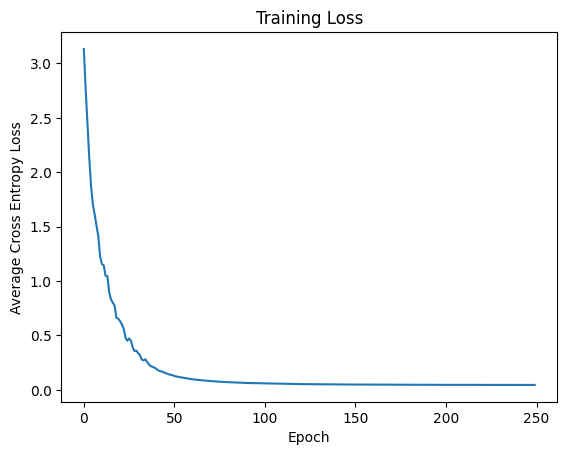

  0%|          | 1/250 [00:00<01:43,  2.41it/s]

Epoch 1/250, Loss: 3.0347


  1%|          | 2/250 [00:00<01:43,  2.39it/s]

Epoch 2/250, Loss: 2.5459


  1%|          | 3/250 [00:01<01:42,  2.40it/s]

Epoch 3/250, Loss: 2.3251


  2%|▏         | 4/250 [00:01<01:41,  2.41it/s]

Epoch 4/250, Loss: 2.0286


  2%|▏         | 5/250 [00:02<01:41,  2.41it/s]

Epoch 5/250, Loss: 1.7570


  2%|▏         | 6/250 [00:02<01:41,  2.41it/s]

Epoch 6/250, Loss: 1.5591


  3%|▎         | 7/250 [00:02<01:40,  2.42it/s]

Epoch 7/250, Loss: 1.4815


  3%|▎         | 8/250 [00:03<01:40,  2.42it/s]

Epoch 8/250, Loss: 1.3194


  4%|▎         | 9/250 [00:03<01:39,  2.42it/s]

Epoch 9/250, Loss: 1.2437


  4%|▍         | 10/250 [00:04<01:39,  2.42it/s]

Epoch 10/250, Loss: 1.0241


  4%|▍         | 11/250 [00:04<01:38,  2.42it/s]

Epoch 11/250, Loss: 0.9865


  5%|▍         | 12/250 [00:04<01:38,  2.42it/s]

Epoch 12/250, Loss: 0.9589


  5%|▌         | 13/250 [00:05<01:38,  2.42it/s]

Epoch 13/250, Loss: 1.0681


  6%|▌         | 14/250 [00:05<01:37,  2.42it/s]

Epoch 14/250, Loss: 0.8124


  6%|▌         | 15/250 [00:06<01:37,  2.42it/s]

Epoch 15/250, Loss: 0.7501


  6%|▋         | 16/250 [00:06<01:36,  2.42it/s]

Epoch 16/250, Loss: 0.6947


  7%|▋         | 17/250 [00:07<01:36,  2.42it/s]

Epoch 17/250, Loss: 0.6616


  7%|▋         | 18/250 [00:07<01:35,  2.42it/s]

Epoch 18/250, Loss: 0.6768


  8%|▊         | 19/250 [00:07<01:35,  2.42it/s]

Epoch 19/250, Loss: 0.5088


  8%|▊         | 20/250 [00:08<01:34,  2.42it/s]

Epoch 20/250, Loss: 0.4743


  8%|▊         | 21/250 [00:08<01:34,  2.42it/s]

Epoch 21/250, Loss: 0.4471


  9%|▉         | 22/250 [00:09<01:34,  2.42it/s]

Epoch 22/250, Loss: 0.4595


  9%|▉         | 23/250 [00:09<01:33,  2.42it/s]

Epoch 23/250, Loss: 0.3721


 10%|▉         | 24/250 [00:09<01:33,  2.42it/s]

Epoch 24/250, Loss: 0.3308


 10%|█         | 25/250 [00:10<01:32,  2.42it/s]

Epoch 25/250, Loss: 0.3329


 10%|█         | 26/250 [00:10<01:32,  2.42it/s]

Epoch 26/250, Loss: 0.3078


 11%|█         | 27/250 [00:11<01:32,  2.42it/s]

Epoch 27/250, Loss: 0.3031


 11%|█         | 28/250 [00:11<01:31,  2.41it/s]

Epoch 28/250, Loss: 0.2505


 12%|█▏        | 29/250 [00:11<01:31,  2.42it/s]

Epoch 29/250, Loss: 0.2425


 12%|█▏        | 30/250 [00:12<01:31,  2.40it/s]

Epoch 30/250, Loss: 0.2114


 12%|█▏        | 31/250 [00:12<01:31,  2.40it/s]

Epoch 31/250, Loss: 0.2049


 13%|█▎        | 32/250 [00:13<01:31,  2.39it/s]

Epoch 32/250, Loss: 0.1835


 13%|█▎        | 33/250 [00:13<01:30,  2.39it/s]

Epoch 33/250, Loss: 0.1759


 14%|█▎        | 34/250 [00:14<01:29,  2.40it/s]

Epoch 34/250, Loss: 0.1604


 14%|█▍        | 35/250 [00:14<01:29,  2.41it/s]

Epoch 35/250, Loss: 0.1595


 14%|█▍        | 36/250 [00:14<01:28,  2.41it/s]

Epoch 36/250, Loss: 0.1502


 15%|█▍        | 37/250 [00:15<01:28,  2.41it/s]

Epoch 37/250, Loss: 0.1363


 15%|█▌        | 38/250 [00:15<01:27,  2.41it/s]

Epoch 38/250, Loss: 0.1270


 16%|█▌        | 39/250 [00:16<01:27,  2.42it/s]

Epoch 39/250, Loss: 0.1212


 16%|█▌        | 40/250 [00:16<01:26,  2.41it/s]

Epoch 40/250, Loss: 0.1141


 16%|█▋        | 41/250 [00:16<01:26,  2.42it/s]

Epoch 41/250, Loss: 0.1124


 17%|█▋        | 42/250 [00:17<01:25,  2.42it/s]

Epoch 42/250, Loss: 0.1044


 17%|█▋        | 43/250 [00:17<01:25,  2.42it/s]

Epoch 43/250, Loss: 0.1008


 18%|█▊        | 44/250 [00:18<01:25,  2.42it/s]

Epoch 44/250, Loss: 0.0973


 18%|█▊        | 45/250 [00:18<01:24,  2.42it/s]

Epoch 45/250, Loss: 0.0934


 18%|█▊        | 46/250 [00:19<01:24,  2.42it/s]

Epoch 46/250, Loss: 0.0880


 19%|█▉        | 47/250 [00:19<01:23,  2.42it/s]

Epoch 47/250, Loss: 0.0846


 19%|█▉        | 48/250 [00:19<01:23,  2.42it/s]

Epoch 48/250, Loss: 0.0834


 20%|█▉        | 49/250 [00:20<01:23,  2.41it/s]

Epoch 49/250, Loss: 0.0800


 20%|██        | 50/250 [00:20<01:22,  2.41it/s]

Epoch 50/250, Loss: 0.0773


 20%|██        | 51/250 [00:21<01:22,  2.42it/s]

Epoch 51/250, Loss: 0.0740


 21%|██        | 52/250 [00:21<01:21,  2.42it/s]

Epoch 52/250, Loss: 0.0720


 21%|██        | 53/250 [00:21<01:21,  2.42it/s]

Epoch 53/250, Loss: 0.0709


 22%|██▏       | 54/250 [00:22<01:21,  2.42it/s]

Epoch 54/250, Loss: 0.0693


 22%|██▏       | 55/250 [00:22<01:20,  2.42it/s]

Epoch 55/250, Loss: 0.0670


 22%|██▏       | 56/250 [00:23<01:20,  2.42it/s]

Epoch 56/250, Loss: 0.0651


 23%|██▎       | 57/250 [00:23<01:19,  2.42it/s]

Epoch 57/250, Loss: 0.0637


 23%|██▎       | 58/250 [00:24<01:19,  2.42it/s]

Epoch 58/250, Loss: 0.0623


 24%|██▎       | 59/250 [00:24<01:19,  2.41it/s]

Epoch 59/250, Loss: 0.0610


 24%|██▍       | 60/250 [00:24<01:18,  2.41it/s]

Epoch 60/250, Loss: 0.0593


 24%|██▍       | 61/250 [00:25<01:18,  2.40it/s]

Epoch 61/250, Loss: 0.0580


 25%|██▍       | 62/250 [00:25<01:18,  2.40it/s]

Epoch 62/250, Loss: 0.0567


 25%|██▌       | 63/250 [00:26<01:17,  2.40it/s]

Epoch 63/250, Loss: 0.0562


 26%|██▌       | 64/250 [00:26<01:17,  2.40it/s]

Epoch 64/250, Loss: 0.0549


 26%|██▌       | 65/250 [00:26<01:16,  2.40it/s]

Epoch 65/250, Loss: 0.0537


 26%|██▋       | 66/250 [00:27<01:16,  2.41it/s]

Epoch 66/250, Loss: 0.0526


 27%|██▋       | 67/250 [00:27<01:16,  2.41it/s]

Epoch 67/250, Loss: 0.0520


 27%|██▋       | 68/250 [00:28<01:15,  2.41it/s]

Epoch 68/250, Loss: 0.0511


 28%|██▊       | 69/250 [00:28<01:14,  2.42it/s]

Epoch 69/250, Loss: 0.0501


 28%|██▊       | 70/250 [00:28<01:14,  2.42it/s]

Epoch 70/250, Loss: 0.0494


 28%|██▊       | 71/250 [00:29<01:14,  2.42it/s]

Epoch 71/250, Loss: 0.0488


 29%|██▉       | 72/250 [00:29<01:13,  2.42it/s]

Epoch 72/250, Loss: 0.0484


 29%|██▉       | 73/250 [00:30<01:13,  2.42it/s]

Epoch 73/250, Loss: 0.0474


 30%|██▉       | 74/250 [00:30<01:12,  2.42it/s]

Epoch 74/250, Loss: 0.0468


 30%|███       | 75/250 [00:31<01:12,  2.42it/s]

Epoch 75/250, Loss: 0.0460


 30%|███       | 76/250 [00:31<01:12,  2.42it/s]

Epoch 76/250, Loss: 0.0457


 31%|███       | 77/250 [00:31<01:11,  2.42it/s]

Epoch 77/250, Loss: 0.0451


 31%|███       | 78/250 [00:32<01:11,  2.42it/s]

Epoch 78/250, Loss: 0.0444


 32%|███▏      | 79/250 [00:32<01:10,  2.42it/s]

Epoch 79/250, Loss: 0.0439


 32%|███▏      | 80/250 [00:33<01:10,  2.42it/s]

Epoch 80/250, Loss: 0.0436


 32%|███▏      | 81/250 [00:33<01:09,  2.42it/s]

Epoch 81/250, Loss: 0.0431


 33%|███▎      | 82/250 [00:33<01:09,  2.42it/s]

Epoch 82/250, Loss: 0.0426


 33%|███▎      | 83/250 [00:34<01:09,  2.42it/s]

Epoch 83/250, Loss: 0.0421


 34%|███▎      | 84/250 [00:34<01:08,  2.42it/s]

Epoch 84/250, Loss: 0.0417


 34%|███▍      | 85/250 [00:35<01:08,  2.42it/s]

Epoch 85/250, Loss: 0.0414


 34%|███▍      | 86/250 [00:35<01:07,  2.42it/s]

Epoch 86/250, Loss: 0.0410


 35%|███▍      | 87/250 [00:36<01:07,  2.42it/s]

Epoch 87/250, Loss: 0.0406


 35%|███▌      | 88/250 [00:36<01:06,  2.42it/s]

Epoch 88/250, Loss: 0.0403


 36%|███▌      | 89/250 [00:36<01:06,  2.42it/s]

Epoch 89/250, Loss: 0.0399


 36%|███▌      | 90/250 [00:37<01:06,  2.41it/s]

Epoch 90/250, Loss: 0.0396


 36%|███▋      | 91/250 [00:37<01:05,  2.41it/s]

Epoch 91/250, Loss: 0.0393


 37%|███▋      | 92/250 [00:38<01:05,  2.41it/s]

Epoch 92/250, Loss: 0.0390


 37%|███▋      | 93/250 [00:38<01:05,  2.41it/s]

Epoch 93/250, Loss: 0.0387


 38%|███▊      | 94/250 [00:38<01:05,  2.40it/s]

Epoch 94/250, Loss: 0.0384


 38%|███▊      | 95/250 [00:39<01:04,  2.39it/s]

Epoch 95/250, Loss: 0.0382


 38%|███▊      | 96/250 [00:39<01:04,  2.40it/s]

Epoch 96/250, Loss: 0.0378


 39%|███▉      | 97/250 [00:40<01:03,  2.41it/s]

Epoch 97/250, Loss: 0.0376


 39%|███▉      | 98/250 [00:40<01:03,  2.41it/s]

Epoch 98/250, Loss: 0.0374


 40%|███▉      | 99/250 [00:41<01:02,  2.41it/s]

Epoch 99/250, Loss: 0.0372


 40%|████      | 100/250 [00:41<01:02,  2.41it/s]

Epoch 100/250, Loss: 0.0369


 40%|████      | 101/250 [00:41<01:01,  2.41it/s]

Epoch 101/250, Loss: 0.0367


 41%|████      | 102/250 [00:42<01:01,  2.41it/s]

Epoch 102/250, Loss: 0.0365


 41%|████      | 103/250 [00:42<01:00,  2.42it/s]

Epoch 103/250, Loss: 0.0362


 42%|████▏     | 104/250 [00:43<01:00,  2.41it/s]

Epoch 104/250, Loss: 0.0360


 42%|████▏     | 105/250 [00:43<00:59,  2.42it/s]

Epoch 105/250, Loss: 0.0358


 42%|████▏     | 106/250 [00:43<00:59,  2.42it/s]

Epoch 106/250, Loss: 0.0357


 43%|████▎     | 107/250 [00:44<00:59,  2.42it/s]

Epoch 107/250, Loss: 0.0354


 43%|████▎     | 108/250 [00:44<00:58,  2.42it/s]

Epoch 108/250, Loss: 0.0353


 44%|████▎     | 109/250 [00:45<00:58,  2.42it/s]

Epoch 109/250, Loss: 0.0351


 44%|████▍     | 110/250 [00:45<00:57,  2.42it/s]

Epoch 110/250, Loss: 0.0350


 44%|████▍     | 111/250 [00:45<00:57,  2.42it/s]

Epoch 111/250, Loss: 0.0348


 45%|████▍     | 112/250 [00:46<00:57,  2.42it/s]

Epoch 112/250, Loss: 0.0346


 45%|████▌     | 113/250 [00:46<00:56,  2.42it/s]

Epoch 113/250, Loss: 0.0345


 46%|████▌     | 114/250 [00:47<00:56,  2.42it/s]

Epoch 114/250, Loss: 0.0344


 46%|████▌     | 115/250 [00:47<00:55,  2.41it/s]

Epoch 115/250, Loss: 0.0342


 46%|████▋     | 116/250 [00:48<00:55,  2.41it/s]

Epoch 116/250, Loss: 0.0341


 47%|████▋     | 117/250 [00:48<00:55,  2.41it/s]

Epoch 117/250, Loss: 0.0340


 47%|████▋     | 118/250 [00:48<00:54,  2.42it/s]

Epoch 118/250, Loss: 0.0338


 48%|████▊     | 119/250 [00:49<00:54,  2.42it/s]

Epoch 119/250, Loss: 0.0337


 48%|████▊     | 120/250 [00:49<00:53,  2.41it/s]

Epoch 120/250, Loss: 0.0336


 48%|████▊     | 121/250 [00:50<00:53,  2.41it/s]

Epoch 121/250, Loss: 0.0335


 49%|████▉     | 122/250 [00:50<00:53,  2.41it/s]

Epoch 122/250, Loss: 0.0333


 49%|████▉     | 123/250 [00:50<00:52,  2.40it/s]

Epoch 123/250, Loss: 0.0332


 50%|████▉     | 124/250 [00:51<00:52,  2.40it/s]

Epoch 124/250, Loss: 0.0331


 50%|█████     | 125/250 [00:51<00:51,  2.41it/s]

Epoch 125/250, Loss: 0.0330


 50%|█████     | 126/250 [00:52<00:51,  2.40it/s]

Epoch 126/250, Loss: 0.0329


 51%|█████     | 127/250 [00:52<00:51,  2.40it/s]

Epoch 127/250, Loss: 0.0328


 51%|█████     | 128/250 [00:53<00:50,  2.40it/s]

Epoch 128/250, Loss: 0.0327


 52%|█████▏    | 129/250 [00:53<00:50,  2.41it/s]

Epoch 129/250, Loss: 0.0326


 52%|█████▏    | 130/250 [00:53<00:49,  2.41it/s]

Epoch 130/250, Loss: 0.0325


 52%|█████▏    | 131/250 [00:54<00:49,  2.41it/s]

Epoch 131/250, Loss: 0.0324


 53%|█████▎    | 132/250 [00:54<00:48,  2.41it/s]

Epoch 132/250, Loss: 0.0323


 53%|█████▎    | 133/250 [00:55<00:48,  2.41it/s]

Epoch 133/250, Loss: 0.0322


 54%|█████▎    | 134/250 [00:55<00:48,  2.41it/s]

Epoch 134/250, Loss: 0.0322


 54%|█████▍    | 135/250 [00:55<00:47,  2.41it/s]

Epoch 135/250, Loss: 0.0321


 54%|█████▍    | 136/250 [00:56<00:47,  2.42it/s]

Epoch 136/250, Loss: 0.0320


 55%|█████▍    | 137/250 [00:56<00:46,  2.41it/s]

Epoch 137/250, Loss: 0.0319


 55%|█████▌    | 138/250 [00:57<00:46,  2.41it/s]

Epoch 138/250, Loss: 0.0319


 56%|█████▌    | 139/250 [00:57<00:46,  2.41it/s]

Epoch 139/250, Loss: 0.0318


 56%|█████▌    | 140/250 [00:58<00:45,  2.41it/s]

Epoch 140/250, Loss: 0.0317


 56%|█████▋    | 141/250 [00:58<00:45,  2.41it/s]

Epoch 141/250, Loss: 0.0317


 57%|█████▋    | 142/250 [00:58<00:44,  2.42it/s]

Epoch 142/250, Loss: 0.0316


 57%|█████▋    | 143/250 [00:59<00:44,  2.42it/s]

Epoch 143/250, Loss: 0.0315


 58%|█████▊    | 144/250 [00:59<00:43,  2.42it/s]

Epoch 144/250, Loss: 0.0315


 58%|█████▊    | 145/250 [01:00<00:43,  2.42it/s]

Epoch 145/250, Loss: 0.0314


 58%|█████▊    | 146/250 [01:00<00:42,  2.42it/s]

Epoch 146/250, Loss: 0.0313


 59%|█████▉    | 147/250 [01:00<00:42,  2.42it/s]

Epoch 147/250, Loss: 0.0313


 59%|█████▉    | 148/250 [01:01<00:42,  2.42it/s]

Epoch 148/250, Loss: 0.0312


 60%|█████▉    | 149/250 [01:01<00:41,  2.42it/s]

Epoch 149/250, Loss: 0.0312


 60%|██████    | 150/250 [01:02<00:41,  2.42it/s]

Epoch 150/250, Loss: 0.0311


 60%|██████    | 151/250 [01:02<00:41,  2.41it/s]

Epoch 151/250, Loss: 0.0310


 61%|██████    | 152/250 [01:02<00:40,  2.41it/s]

Epoch 152/250, Loss: 0.0310


 61%|██████    | 153/250 [01:03<00:40,  2.41it/s]

Epoch 153/250, Loss: 0.0310


 62%|██████▏   | 154/250 [01:03<00:39,  2.41it/s]

Epoch 154/250, Loss: 0.0309


 62%|██████▏   | 155/250 [01:04<00:39,  2.40it/s]

Epoch 155/250, Loss: 0.0309


 62%|██████▏   | 156/250 [01:04<00:39,  2.39it/s]

Epoch 156/250, Loss: 0.0308


 63%|██████▎   | 157/250 [01:05<00:38,  2.39it/s]

Epoch 157/250, Loss: 0.0308


 63%|██████▎   | 158/250 [01:05<00:38,  2.40it/s]

Epoch 158/250, Loss: 0.0307


 64%|██████▎   | 159/250 [01:05<00:37,  2.41it/s]

Epoch 159/250, Loss: 0.0307


 64%|██████▍   | 160/250 [01:06<00:37,  2.41it/s]

Epoch 160/250, Loss: 0.0306


 64%|██████▍   | 161/250 [01:06<00:37,  2.41it/s]

Epoch 161/250, Loss: 0.0306


 65%|██████▍   | 162/250 [01:07<00:36,  2.41it/s]

Epoch 162/250, Loss: 0.0306


 65%|██████▌   | 163/250 [01:07<00:36,  2.41it/s]

Epoch 163/250, Loss: 0.0305


 66%|██████▌   | 164/250 [01:07<00:35,  2.41it/s]

Epoch 164/250, Loss: 0.0305


 66%|██████▌   | 165/250 [01:08<00:35,  2.41it/s]

Epoch 165/250, Loss: 0.0304


 66%|██████▋   | 166/250 [01:08<00:34,  2.41it/s]

Epoch 166/250, Loss: 0.0304


 67%|██████▋   | 167/250 [01:09<00:34,  2.41it/s]

Epoch 167/250, Loss: 0.0304


 67%|██████▋   | 168/250 [01:09<00:33,  2.41it/s]

Epoch 168/250, Loss: 0.0303


 68%|██████▊   | 169/250 [01:10<00:33,  2.41it/s]

Epoch 169/250, Loss: 0.0303


 68%|██████▊   | 170/250 [01:10<00:33,  2.41it/s]

Epoch 170/250, Loss: 0.0303


 68%|██████▊   | 171/250 [01:10<00:32,  2.41it/s]

Epoch 171/250, Loss: 0.0303


 69%|██████▉   | 172/250 [01:11<00:32,  2.41it/s]

Epoch 172/250, Loss: 0.0302


 69%|██████▉   | 173/250 [01:11<00:32,  2.40it/s]

Epoch 173/250, Loss: 0.0302


 70%|██████▉   | 174/250 [01:12<00:32,  2.36it/s]

Epoch 174/250, Loss: 0.0302


 70%|███████   | 175/250 [01:12<00:33,  2.27it/s]

Epoch 175/250, Loss: 0.0301


 70%|███████   | 176/250 [01:13<00:33,  2.18it/s]

Epoch 176/250, Loss: 0.0301


 71%|███████   | 177/250 [01:13<00:32,  2.23it/s]

Epoch 177/250, Loss: 0.0301


 71%|███████   | 178/250 [01:13<00:31,  2.25it/s]

Epoch 178/250, Loss: 0.0300


 72%|███████▏  | 179/250 [01:14<00:31,  2.26it/s]

Epoch 179/250, Loss: 0.0300


 72%|███████▏  | 180/250 [01:14<00:30,  2.27it/s]

Epoch 180/250, Loss: 0.0300


 72%|███████▏  | 181/250 [01:15<00:30,  2.29it/s]

Epoch 181/250, Loss: 0.0300


 73%|███████▎  | 182/250 [01:15<00:30,  2.24it/s]

Epoch 182/250, Loss: 0.0300


 73%|███████▎  | 183/250 [01:16<00:35,  1.91it/s]

Epoch 183/250, Loss: 0.0299


 74%|███████▎  | 184/250 [01:17<00:37,  1.78it/s]

Epoch 184/250, Loss: 0.0299


 74%|███████▍  | 185/250 [01:17<00:38,  1.71it/s]

Epoch 185/250, Loss: 0.0299


 74%|███████▍  | 186/250 [01:18<00:39,  1.63it/s]

Epoch 186/250, Loss: 0.0299


 75%|███████▍  | 187/250 [01:19<00:40,  1.55it/s]

Epoch 187/250, Loss: 0.0298


 75%|███████▌  | 188/250 [01:19<00:36,  1.70it/s]

Epoch 188/250, Loss: 0.0298


 76%|███████▌  | 189/250 [01:20<00:32,  1.86it/s]

Epoch 189/250, Loss: 0.0298


 76%|███████▌  | 190/250 [01:20<00:32,  1.85it/s]

Epoch 190/250, Loss: 0.0298


 76%|███████▋  | 191/250 [01:21<00:32,  1.84it/s]

Epoch 191/250, Loss: 0.0298


 77%|███████▋  | 192/250 [01:21<00:31,  1.84it/s]

Epoch 192/250, Loss: 0.0297


 77%|███████▋  | 193/250 [01:22<00:29,  1.90it/s]

Epoch 193/250, Loss: 0.0297


 78%|███████▊  | 194/250 [01:22<00:31,  1.76it/s]

Epoch 194/250, Loss: 0.0297


 78%|███████▊  | 195/250 [01:23<00:30,  1.78it/s]

Epoch 195/250, Loss: 0.0297


 78%|███████▊  | 196/250 [01:23<00:28,  1.88it/s]

Epoch 196/250, Loss: 0.0297


 79%|███████▉  | 197/250 [01:24<00:27,  1.94it/s]

Epoch 197/250, Loss: 0.0296


 79%|███████▉  | 198/250 [01:24<00:26,  1.98it/s]

Epoch 198/250, Loss: 0.0296


 80%|███████▉  | 199/250 [01:25<00:27,  1.85it/s]

Epoch 199/250, Loss: 0.0296


 80%|████████  | 200/250 [01:25<00:25,  1.99it/s]

Epoch 200/250, Loss: 0.0296


 80%|████████  | 201/250 [01:26<00:23,  2.10it/s]

Epoch 201/250, Loss: 0.0296


 81%|████████  | 202/250 [01:26<00:21,  2.18it/s]

Epoch 202/250, Loss: 0.0296


 81%|████████  | 203/250 [01:27<00:20,  2.25it/s]

Epoch 203/250, Loss: 0.0295


 82%|████████▏ | 204/250 [01:27<00:20,  2.30it/s]

Epoch 204/250, Loss: 0.0295


 82%|████████▏ | 205/250 [01:27<00:19,  2.33it/s]

Epoch 205/250, Loss: 0.0295


 82%|████████▏ | 206/250 [01:28<00:18,  2.36it/s]

Epoch 206/250, Loss: 0.0295


 83%|████████▎ | 207/250 [01:28<00:18,  2.38it/s]

Epoch 207/250, Loss: 0.0295


 83%|████████▎ | 208/250 [01:29<00:17,  2.39it/s]

Epoch 208/250, Loss: 0.0295


 84%|████████▎ | 209/250 [01:29<00:17,  2.39it/s]

Epoch 209/250, Loss: 0.0295


 84%|████████▍ | 210/250 [01:29<00:16,  2.40it/s]

Epoch 210/250, Loss: 0.0295


 84%|████████▍ | 211/250 [01:30<00:16,  2.40it/s]

Epoch 211/250, Loss: 0.0294


 85%|████████▍ | 212/250 [01:30<00:15,  2.40it/s]

Epoch 212/250, Loss: 0.0294


 85%|████████▌ | 213/250 [01:31<00:15,  2.40it/s]

Epoch 213/250, Loss: 0.0294


 86%|████████▌ | 214/250 [01:31<00:15,  2.39it/s]

Epoch 214/250, Loss: 0.0294


 86%|████████▌ | 215/250 [01:32<00:14,  2.40it/s]

Epoch 215/250, Loss: 0.0294


 86%|████████▋ | 216/250 [01:32<00:14,  2.40it/s]

Epoch 216/250, Loss: 0.0294


 87%|████████▋ | 217/250 [01:32<00:13,  2.40it/s]

Epoch 217/250, Loss: 0.0294


 87%|████████▋ | 218/250 [01:33<00:13,  2.41it/s]

Epoch 218/250, Loss: 0.0294


 88%|████████▊ | 219/250 [01:33<00:12,  2.41it/s]

Epoch 219/250, Loss: 0.0294


 88%|████████▊ | 220/250 [01:34<00:12,  2.41it/s]

Epoch 220/250, Loss: 0.0294


 88%|████████▊ | 221/250 [01:34<00:12,  2.41it/s]

Epoch 221/250, Loss: 0.0293


 89%|████████▉ | 222/250 [01:34<00:11,  2.42it/s]

Epoch 222/250, Loss: 0.0293


 89%|████████▉ | 223/250 [01:35<00:11,  2.41it/s]

Epoch 223/250, Loss: 0.0293


 90%|████████▉ | 224/250 [01:35<00:10,  2.41it/s]

Epoch 224/250, Loss: 0.0293


 90%|█████████ | 225/250 [01:36<00:10,  2.42it/s]

Epoch 225/250, Loss: 0.0293


 90%|█████████ | 226/250 [01:36<00:09,  2.41it/s]

Epoch 226/250, Loss: 0.0293


 91%|█████████ | 227/250 [01:37<00:09,  2.41it/s]

Epoch 227/250, Loss: 0.0293


 91%|█████████ | 228/250 [01:37<00:09,  2.42it/s]

Epoch 228/250, Loss: 0.0293


 92%|█████████▏| 229/250 [01:37<00:08,  2.41it/s]

Epoch 229/250, Loss: 0.0293


 92%|█████████▏| 230/250 [01:38<00:08,  2.41it/s]

Epoch 230/250, Loss: 0.0293


 92%|█████████▏| 231/250 [01:38<00:07,  2.41it/s]

Epoch 231/250, Loss: 0.0293


 93%|█████████▎| 232/250 [01:39<00:07,  2.42it/s]

Epoch 232/250, Loss: 0.0293


 93%|█████████▎| 233/250 [01:39<00:07,  2.42it/s]

Epoch 233/250, Loss: 0.0293


 94%|█████████▎| 234/250 [01:39<00:06,  2.42it/s]

Epoch 234/250, Loss: 0.0292


 94%|█████████▍| 235/250 [01:40<00:06,  2.42it/s]

Epoch 235/250, Loss: 0.0292


 94%|█████████▍| 236/250 [01:40<00:05,  2.42it/s]

Epoch 236/250, Loss: 0.0292


 95%|█████████▍| 237/250 [01:41<00:05,  2.42it/s]

Epoch 237/250, Loss: 0.0292


 95%|█████████▌| 238/250 [01:41<00:04,  2.42it/s]

Epoch 238/250, Loss: 0.0292


 96%|█████████▌| 239/250 [01:41<00:04,  2.42it/s]

Epoch 239/250, Loss: 0.0292


 96%|█████████▌| 240/250 [01:42<00:04,  2.42it/s]

Epoch 240/250, Loss: 0.0292


 96%|█████████▋| 241/250 [01:42<00:03,  2.41it/s]

Epoch 241/250, Loss: 0.0292


 97%|█████████▋| 242/250 [01:43<00:03,  2.40it/s]

Epoch 242/250, Loss: 0.0292


 97%|█████████▋| 243/250 [01:43<00:02,  2.40it/s]

Epoch 243/250, Loss: 0.0292


 98%|█████████▊| 244/250 [01:44<00:02,  2.40it/s]

Epoch 244/250, Loss: 0.0292


 98%|█████████▊| 245/250 [01:44<00:02,  2.39it/s]

Epoch 245/250, Loss: 0.0292


 98%|█████████▊| 246/250 [01:44<00:01,  2.39it/s]

Epoch 246/250, Loss: 0.0292


 99%|█████████▉| 247/250 [01:45<00:01,  2.40it/s]

Epoch 247/250, Loss: 0.0292


 99%|█████████▉| 248/250 [01:45<00:00,  2.40it/s]

Epoch 248/250, Loss: 0.0292


100%|█████████▉| 249/250 [01:46<00:00,  2.41it/s]

Epoch 249/250, Loss: 0.0292


100%|██████████| 250/250 [01:46<00:00,  2.35it/s]

Epoch 250/250, Loss: 0.0292


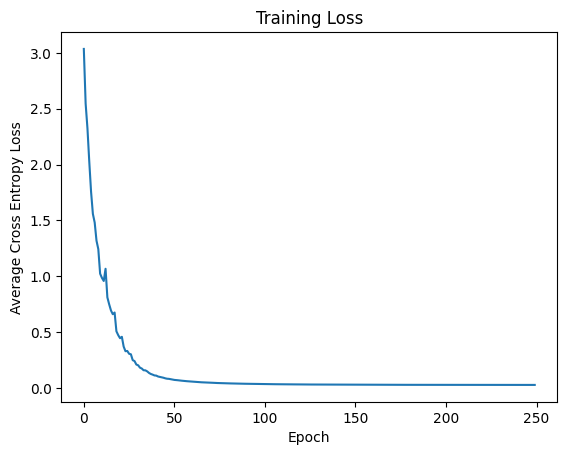

  0%|          | 1/250 [00:00<03:43,  1.11it/s]

Epoch 1/250, Loss: 2.9204


  1%|          | 2/250 [00:01<03:43,  1.11it/s]

Epoch 2/250, Loss: 2.3446


  1%|          | 3/250 [00:02<03:42,  1.11it/s]

Epoch 3/250, Loss: 1.9708


  2%|▏         | 4/250 [00:03<03:41,  1.11it/s]

Epoch 4/250, Loss: 1.7419


  2%|▏         | 5/250 [00:04<03:40,  1.11it/s]

Epoch 5/250, Loss: 1.5342


  2%|▏         | 6/250 [00:05<03:39,  1.11it/s]

Epoch 6/250, Loss: 1.3098


  3%|▎         | 7/250 [00:06<03:39,  1.11it/s]

Epoch 7/250, Loss: 1.2211


  3%|▎         | 8/250 [00:07<03:38,  1.11it/s]

Epoch 8/250, Loss: 1.0836


  4%|▎         | 9/250 [00:08<03:37,  1.11it/s]

Epoch 9/250, Loss: 1.0515


  4%|▍         | 10/250 [00:09<03:36,  1.11it/s]

Epoch 10/250, Loss: 0.8247


  4%|▍         | 11/250 [00:09<03:36,  1.11it/s]

Epoch 11/250, Loss: 0.7948


  5%|▍         | 12/250 [00:10<03:35,  1.11it/s]

Epoch 12/250, Loss: 0.6926


  5%|▌         | 13/250 [00:11<03:34,  1.11it/s]

Epoch 13/250, Loss: 0.6606


  6%|▌         | 14/250 [00:12<03:33,  1.11it/s]

Epoch 14/250, Loss: 0.5799


  6%|▌         | 15/250 [00:13<03:32,  1.11it/s]

Epoch 15/250, Loss: 0.5065


  6%|▋         | 16/250 [00:14<03:31,  1.11it/s]

Epoch 16/250, Loss: 0.4657


  7%|▋         | 17/250 [00:15<03:30,  1.11it/s]

Epoch 17/250, Loss: 0.4452


  7%|▋         | 18/250 [00:16<03:29,  1.11it/s]

Epoch 18/250, Loss: 0.4171


  8%|▊         | 19/250 [00:17<03:28,  1.11it/s]

Epoch 19/250, Loss: 0.3414


  8%|▊         | 20/250 [00:18<03:27,  1.11it/s]

Epoch 20/250, Loss: 0.3086


  8%|▊         | 21/250 [00:18<03:26,  1.11it/s]

Epoch 21/250, Loss: 0.2878


  9%|▉         | 22/250 [00:19<03:25,  1.11it/s]

Epoch 22/250, Loss: 0.2873


  9%|▉         | 23/250 [00:20<03:24,  1.11it/s]

Epoch 23/250, Loss: 0.2597


 10%|▉         | 24/250 [00:21<03:23,  1.11it/s]

Epoch 24/250, Loss: 0.2136


 10%|█         | 25/250 [00:22<03:23,  1.11it/s]

Epoch 25/250, Loss: 0.1961


 10%|█         | 26/250 [00:23<03:22,  1.11it/s]

Epoch 26/250, Loss: 0.1873


 11%|█         | 27/250 [00:24<03:21,  1.11it/s]

Epoch 27/250, Loss: 0.1785


 11%|█         | 28/250 [00:25<03:20,  1.11it/s]

Epoch 28/250, Loss: 0.1639


 12%|█▏        | 29/250 [00:26<03:19,  1.11it/s]

Epoch 29/250, Loss: 0.1464


 12%|█▏        | 30/250 [00:27<03:18,  1.11it/s]

Epoch 30/250, Loss: 0.1399


 12%|█▏        | 31/250 [00:27<03:17,  1.11it/s]

Epoch 31/250, Loss: 0.1369


 13%|█▎        | 32/250 [00:28<03:16,  1.11it/s]

Epoch 32/250, Loss: 0.1227


 13%|█▎        | 33/250 [00:29<03:15,  1.11it/s]

Epoch 33/250, Loss: 0.1161


 14%|█▎        | 34/250 [00:30<03:14,  1.11it/s]

Epoch 34/250, Loss: 0.1084


 14%|█▍        | 35/250 [00:31<03:13,  1.11it/s]

Epoch 35/250, Loss: 0.1045


 14%|█▍        | 36/250 [00:32<03:12,  1.11it/s]

Epoch 36/250, Loss: 0.1006


 15%|█▍        | 37/250 [00:33<03:11,  1.11it/s]

Epoch 37/250, Loss: 0.0927


 15%|█▌        | 38/250 [00:34<03:11,  1.11it/s]

Epoch 38/250, Loss: 0.0888


 16%|█▌        | 39/250 [00:35<03:10,  1.11it/s]

Epoch 39/250, Loss: 0.0856


 16%|█▌        | 40/250 [00:36<03:09,  1.11it/s]

Epoch 40/250, Loss: 0.0825


 16%|█▋        | 41/250 [00:36<03:09,  1.11it/s]

Epoch 41/250, Loss: 0.0793


 17%|█▋        | 42/250 [00:37<03:08,  1.11it/s]

Epoch 42/250, Loss: 0.0755


 17%|█▋        | 43/250 [00:38<03:07,  1.11it/s]

Epoch 43/250, Loss: 0.0734


 18%|█▊        | 44/250 [00:39<03:06,  1.11it/s]

Epoch 44/250, Loss: 0.0713


 18%|█▊        | 45/250 [00:40<03:05,  1.11it/s]

Epoch 45/250, Loss: 0.0686


 18%|█▊        | 46/250 [00:41<03:04,  1.11it/s]

Epoch 46/250, Loss: 0.0666


 19%|█▉        | 47/250 [00:42<03:03,  1.11it/s]

Epoch 47/250, Loss: 0.0640


 19%|█▉        | 48/250 [00:43<03:02,  1.11it/s]

Epoch 48/250, Loss: 0.0630


 20%|█▉        | 49/250 [00:44<03:01,  1.11it/s]

Epoch 49/250, Loss: 0.0613


 20%|██        | 50/250 [00:45<03:00,  1.11it/s]

Epoch 50/250, Loss: 0.0596


 20%|██        | 51/250 [00:46<02:59,  1.11it/s]

Epoch 51/250, Loss: 0.0577


 21%|██        | 52/250 [00:46<02:58,  1.11it/s]

Epoch 52/250, Loss: 0.0565


 21%|██        | 53/250 [00:47<02:57,  1.11it/s]

Epoch 53/250, Loss: 0.0552


 22%|██▏       | 54/250 [00:48<02:57,  1.11it/s]

Epoch 54/250, Loss: 0.0537


 22%|██▏       | 55/250 [00:49<02:56,  1.11it/s]

Epoch 55/250, Loss: 0.0527


 22%|██▏       | 56/250 [00:50<02:55,  1.11it/s]

Epoch 56/250, Loss: 0.0514


 23%|██▎       | 57/250 [00:51<02:54,  1.11it/s]

Epoch 57/250, Loss: 0.0506


 23%|██▎       | 58/250 [00:52<02:53,  1.11it/s]

Epoch 58/250, Loss: 0.0496


 24%|██▎       | 59/250 [00:53<02:52,  1.11it/s]

Epoch 59/250, Loss: 0.0486


 24%|██▍       | 60/250 [00:54<02:51,  1.11it/s]

Epoch 60/250, Loss: 0.0477


 24%|██▍       | 61/250 [00:55<02:50,  1.11it/s]

Epoch 61/250, Loss: 0.0469


 25%|██▍       | 62/250 [00:55<02:49,  1.11it/s]

Epoch 62/250, Loss: 0.0463


 25%|██▌       | 63/250 [00:56<02:48,  1.11it/s]

Epoch 63/250, Loss: 0.0456


 26%|██▌       | 64/250 [00:57<02:47,  1.11it/s]

Epoch 64/250, Loss: 0.0447


 26%|██▌       | 65/250 [00:58<02:46,  1.11it/s]

Epoch 65/250, Loss: 0.0440


 26%|██▋       | 66/250 [00:59<02:46,  1.11it/s]

Epoch 66/250, Loss: 0.0435


 27%|██▋       | 67/250 [01:00<02:45,  1.11it/s]

Epoch 67/250, Loss: 0.0429


 27%|██▋       | 68/250 [01:01<02:44,  1.11it/s]

Epoch 68/250, Loss: 0.0423


 28%|██▊       | 69/250 [01:02<02:43,  1.11it/s]

Epoch 69/250, Loss: 0.0416


 28%|██▊       | 70/250 [01:03<02:42,  1.11it/s]

Epoch 70/250, Loss: 0.0411


 28%|██▊       | 71/250 [01:04<02:41,  1.11it/s]

Epoch 71/250, Loss: 0.0407


 29%|██▉       | 72/250 [01:04<02:40,  1.11it/s]

Epoch 72/250, Loss: 0.0401


 29%|██▉       | 73/250 [01:05<02:39,  1.11it/s]

Epoch 73/250, Loss: 0.0397


 30%|██▉       | 74/250 [01:06<02:38,  1.11it/s]

Epoch 74/250, Loss: 0.0392


 30%|███       | 75/250 [01:07<02:37,  1.11it/s]

Epoch 75/250, Loss: 0.0388


 30%|███       | 76/250 [01:08<02:38,  1.10it/s]

Epoch 76/250, Loss: 0.0384


 31%|███       | 77/250 [01:09<02:37,  1.10it/s]

Epoch 77/250, Loss: 0.0381


 31%|███       | 78/250 [01:10<02:37,  1.09it/s]

Epoch 78/250, Loss: 0.0376


 32%|███▏      | 79/250 [01:11<02:35,  1.10it/s]

Epoch 79/250, Loss: 0.0372


 32%|███▏      | 80/250 [01:12<02:34,  1.10it/s]

Epoch 80/250, Loss: 0.0370


 32%|███▏      | 81/250 [01:13<02:33,  1.10it/s]

Epoch 81/250, Loss: 0.0366


 33%|███▎      | 82/250 [01:14<02:32,  1.10it/s]

Epoch 82/250, Loss: 0.0363


 33%|███▎      | 83/250 [01:14<02:31,  1.10it/s]

Epoch 83/250, Loss: 0.0359


 34%|███▎      | 84/250 [01:15<02:30,  1.10it/s]

Epoch 84/250, Loss: 0.0356


 34%|███▍      | 85/250 [01:16<02:29,  1.11it/s]

Epoch 85/250, Loss: 0.0353


 34%|███▍      | 86/250 [01:17<02:28,  1.11it/s]

Epoch 86/250, Loss: 0.0351


 35%|███▍      | 87/250 [01:18<02:27,  1.11it/s]

Epoch 87/250, Loss: 0.0348


 35%|███▌      | 88/250 [01:19<02:26,  1.11it/s]

Epoch 88/250, Loss: 0.0345


 36%|███▌      | 89/250 [01:20<02:25,  1.11it/s]

Epoch 89/250, Loss: 0.0343


 36%|███▌      | 90/250 [01:21<02:24,  1.11it/s]

Epoch 90/250, Loss: 0.0340


 36%|███▋      | 91/250 [01:22<02:23,  1.11it/s]

Epoch 91/250, Loss: 0.0339


 37%|███▋      | 92/250 [01:23<02:22,  1.11it/s]

Epoch 92/250, Loss: 0.0336


 37%|███▋      | 93/250 [01:23<02:21,  1.11it/s]

Epoch 93/250, Loss: 0.0334


 38%|███▊      | 94/250 [01:24<02:20,  1.11it/s]

Epoch 94/250, Loss: 0.0332


 38%|███▊      | 95/250 [01:25<02:19,  1.11it/s]

Epoch 95/250, Loss: 0.0330


 38%|███▊      | 96/250 [01:26<02:19,  1.11it/s]

Epoch 96/250, Loss: 0.0328


 39%|███▉      | 97/250 [01:27<02:18,  1.11it/s]

Epoch 97/250, Loss: 0.0326


 39%|███▉      | 98/250 [01:28<02:17,  1.11it/s]

Epoch 98/250, Loss: 0.0324


 40%|███▉      | 99/250 [01:29<02:16,  1.11it/s]

Epoch 99/250, Loss: 0.0323


 40%|████      | 100/250 [01:30<02:15,  1.11it/s]

Epoch 100/250, Loss: 0.0321


 40%|████      | 101/250 [01:31<02:14,  1.11it/s]

Epoch 101/250, Loss: 0.0319


 41%|████      | 102/250 [01:32<02:13,  1.11it/s]

Epoch 102/250, Loss: 0.0317


 41%|████      | 103/250 [01:33<02:12,  1.11it/s]

Epoch 103/250, Loss: 0.0316


 42%|████▏     | 104/250 [01:33<02:11,  1.11it/s]

Epoch 104/250, Loss: 0.0314


 42%|████▏     | 105/250 [01:34<02:10,  1.11it/s]

Epoch 105/250, Loss: 0.0313


 42%|████▏     | 106/250 [01:35<02:09,  1.11it/s]

Epoch 106/250, Loss: 0.0312


 43%|████▎     | 107/250 [01:36<02:08,  1.11it/s]

Epoch 107/250, Loss: 0.0310


 43%|████▎     | 108/250 [01:37<02:08,  1.11it/s]

Epoch 108/250, Loss: 0.0309


 44%|████▎     | 109/250 [01:38<02:07,  1.11it/s]

Epoch 109/250, Loss: 0.0307


 44%|████▍     | 110/250 [01:39<02:06,  1.11it/s]

Epoch 110/250, Loss: 0.0306


 44%|████▍     | 111/250 [01:40<02:05,  1.11it/s]

Epoch 111/250, Loss: 0.0305


 45%|████▍     | 112/250 [01:41<02:04,  1.11it/s]

Epoch 112/250, Loss: 0.0304


 45%|████▌     | 113/250 [01:42<02:03,  1.11it/s]

Epoch 113/250, Loss: 0.0303


 46%|████▌     | 114/250 [01:42<02:02,  1.11it/s]

Epoch 114/250, Loss: 0.0302


 46%|████▌     | 115/250 [01:43<02:01,  1.11it/s]

Epoch 115/250, Loss: 0.0301


 46%|████▋     | 116/250 [01:44<02:00,  1.11it/s]

Epoch 116/250, Loss: 0.0300


 47%|████▋     | 117/250 [01:45<01:59,  1.11it/s]

Epoch 117/250, Loss: 0.0298


 47%|████▋     | 118/250 [01:46<01:59,  1.11it/s]

Epoch 118/250, Loss: 0.0298


 48%|████▊     | 119/250 [01:47<01:58,  1.11it/s]

Epoch 119/250, Loss: 0.0296


 48%|████▊     | 120/250 [01:48<01:57,  1.11it/s]

Epoch 120/250, Loss: 0.0296


 48%|████▊     | 121/250 [01:49<01:56,  1.11it/s]

Epoch 121/250, Loss: 0.0295


 49%|████▉     | 122/250 [01:50<01:55,  1.11it/s]

Epoch 122/250, Loss: 0.0294


 49%|████▉     | 123/250 [01:51<01:54,  1.11it/s]

Epoch 123/250, Loss: 0.0293


 50%|████▉     | 124/250 [01:51<01:53,  1.11it/s]

Epoch 124/250, Loss: 0.0292


 50%|█████     | 125/250 [01:52<01:53,  1.11it/s]

Epoch 125/250, Loss: 0.0291


 50%|█████     | 126/250 [01:53<01:52,  1.11it/s]

Epoch 126/250, Loss: 0.0291


 51%|█████     | 127/250 [01:54<01:51,  1.11it/s]

Epoch 127/250, Loss: 0.0290


 51%|█████     | 128/250 [01:55<01:50,  1.11it/s]

Epoch 128/250, Loss: 0.0289


 52%|█████▏    | 129/250 [01:56<01:49,  1.11it/s]

Epoch 129/250, Loss: 0.0288


 52%|█████▏    | 130/250 [01:57<01:48,  1.11it/s]

Epoch 130/250, Loss: 0.0288


 52%|█████▏    | 131/250 [01:58<01:47,  1.11it/s]

Epoch 131/250, Loss: 0.0287


 53%|█████▎    | 132/250 [01:59<01:46,  1.11it/s]

Epoch 132/250, Loss: 0.0286


 53%|█████▎    | 133/250 [02:00<01:45,  1.11it/s]

Epoch 133/250, Loss: 0.0286


 54%|█████▎    | 134/250 [02:00<01:44,  1.11it/s]

Epoch 134/250, Loss: 0.0285


 54%|█████▍    | 135/250 [02:01<01:43,  1.11it/s]

Epoch 135/250, Loss: 0.0284


 54%|█████▍    | 136/250 [02:02<01:42,  1.11it/s]

Epoch 136/250, Loss: 0.0284


 55%|█████▍    | 137/250 [02:03<01:41,  1.11it/s]

Epoch 137/250, Loss: 0.0283


 55%|█████▌    | 138/250 [02:04<01:40,  1.11it/s]

Epoch 138/250, Loss: 0.0283


 56%|█████▌    | 139/250 [02:05<01:40,  1.11it/s]

Epoch 139/250, Loss: 0.0282


 56%|█████▌    | 140/250 [02:06<01:39,  1.11it/s]

Epoch 140/250, Loss: 0.0282


 56%|█████▋    | 141/250 [02:07<01:38,  1.11it/s]

Epoch 141/250, Loss: 0.0281


 57%|█████▋    | 142/250 [02:08<01:37,  1.11it/s]

Epoch 142/250, Loss: 0.0281


 57%|█████▋    | 143/250 [02:09<01:36,  1.11it/s]

Epoch 143/250, Loss: 0.0280


 58%|█████▊    | 144/250 [02:10<01:35,  1.11it/s]

Epoch 144/250, Loss: 0.0280


 58%|█████▊    | 145/250 [02:10<01:34,  1.11it/s]

Epoch 145/250, Loss: 0.0279


 58%|█████▊    | 146/250 [02:11<01:33,  1.11it/s]

Epoch 146/250, Loss: 0.0279


 59%|█████▉    | 147/250 [02:12<01:33,  1.11it/s]

Epoch 147/250, Loss: 0.0278


 59%|█████▉    | 148/250 [02:13<01:32,  1.11it/s]

Epoch 148/250, Loss: 0.0278


 60%|█████▉    | 149/250 [02:14<01:31,  1.11it/s]

Epoch 149/250, Loss: 0.0278


 60%|██████    | 150/250 [02:15<01:30,  1.11it/s]

Epoch 150/250, Loss: 0.0277


 60%|██████    | 151/250 [02:16<01:29,  1.11it/s]

Epoch 151/250, Loss: 0.0277


 61%|██████    | 152/250 [02:17<01:28,  1.11it/s]

Epoch 152/250, Loss: 0.0276


 61%|██████    | 153/250 [02:18<01:27,  1.11it/s]

Epoch 153/250, Loss: 0.0276


 62%|██████▏   | 154/250 [02:19<01:26,  1.11it/s]

Epoch 154/250, Loss: 0.0276


 62%|██████▏   | 155/250 [02:19<01:25,  1.11it/s]

Epoch 155/250, Loss: 0.0275


 62%|██████▏   | 156/250 [02:20<01:24,  1.11it/s]

Epoch 156/250, Loss: 0.0275


 63%|██████▎   | 157/250 [02:21<01:23,  1.11it/s]

Epoch 157/250, Loss: 0.0274


 63%|██████▎   | 158/250 [02:22<01:22,  1.11it/s]

Epoch 158/250, Loss: 0.0274


 64%|██████▎   | 159/250 [02:23<01:22,  1.11it/s]

Epoch 159/250, Loss: 0.0274


 64%|██████▍   | 160/250 [02:24<01:21,  1.11it/s]

Epoch 160/250, Loss: 0.0273


 64%|██████▍   | 161/250 [02:25<01:20,  1.11it/s]

Epoch 161/250, Loss: 0.0273


 65%|██████▍   | 162/250 [02:26<01:19,  1.11it/s]

Epoch 162/250, Loss: 0.0273


 65%|██████▌   | 163/250 [02:27<01:18,  1.11it/s]

Epoch 163/250, Loss: 0.0272


 66%|██████▌   | 164/250 [02:28<01:17,  1.11it/s]

Epoch 164/250, Loss: 0.0272


 66%|██████▌   | 165/250 [02:28<01:16,  1.11it/s]

Epoch 165/250, Loss: 0.0272


 66%|██████▋   | 166/250 [02:29<01:15,  1.11it/s]

Epoch 166/250, Loss: 0.0271


 67%|██████▋   | 167/250 [02:30<01:14,  1.11it/s]

Epoch 167/250, Loss: 0.0271


 67%|██████▋   | 168/250 [02:31<01:14,  1.11it/s]

Epoch 168/250, Loss: 0.0271


 68%|██████▊   | 169/250 [02:32<01:13,  1.11it/s]

Epoch 169/250, Loss: 0.0271


 68%|██████▊   | 170/250 [02:33<01:12,  1.11it/s]

Epoch 170/250, Loss: 0.0271


 68%|██████▊   | 171/250 [02:34<01:11,  1.11it/s]

Epoch 171/250, Loss: 0.0270


 69%|██████▉   | 172/250 [02:35<01:10,  1.11it/s]

Epoch 172/250, Loss: 0.0270


 69%|██████▉   | 173/250 [02:36<01:09,  1.11it/s]

Epoch 173/250, Loss: 0.0270


 70%|██████▉   | 174/250 [02:37<01:08,  1.11it/s]

Epoch 174/250, Loss: 0.0270


 70%|███████   | 175/250 [02:37<01:07,  1.11it/s]

Epoch 175/250, Loss: 0.0269


 70%|███████   | 176/250 [02:38<01:06,  1.11it/s]

Epoch 176/250, Loss: 0.0269


 71%|███████   | 177/250 [02:39<01:05,  1.11it/s]

Epoch 177/250, Loss: 0.0269


 71%|███████   | 178/250 [02:40<01:04,  1.11it/s]

Epoch 178/250, Loss: 0.0269


 72%|███████▏  | 179/250 [02:41<01:04,  1.11it/s]

Epoch 179/250, Loss: 0.0269


 72%|███████▏  | 180/250 [02:42<01:03,  1.11it/s]

Epoch 180/250, Loss: 0.0268


 72%|███████▏  | 181/250 [02:43<01:02,  1.11it/s]

Epoch 181/250, Loss: 0.0268


 73%|███████▎  | 182/250 [02:44<01:01,  1.11it/s]

Epoch 182/250, Loss: 0.0268


 73%|███████▎  | 183/250 [02:45<01:00,  1.11it/s]

Epoch 183/250, Loss: 0.0268


 74%|███████▎  | 184/250 [02:46<00:59,  1.11it/s]

Epoch 184/250, Loss: 0.0267


 74%|███████▍  | 185/250 [02:46<00:58,  1.11it/s]

Epoch 185/250, Loss: 0.0268


 74%|███████▍  | 186/250 [02:47<00:57,  1.11it/s]

Epoch 186/250, Loss: 0.0267


 75%|███████▍  | 187/250 [02:48<00:56,  1.11it/s]

Epoch 187/250, Loss: 0.0267


 75%|███████▌  | 188/250 [02:49<00:55,  1.11it/s]

Epoch 188/250, Loss: 0.0267


 76%|███████▌  | 189/250 [02:50<00:54,  1.11it/s]

Epoch 189/250, Loss: 0.0267


 76%|███████▌  | 190/250 [02:51<00:54,  1.11it/s]

Epoch 190/250, Loss: 0.0267


 76%|███████▋  | 191/250 [02:52<00:53,  1.11it/s]

Epoch 191/250, Loss: 0.0266


 77%|███████▋  | 192/250 [02:53<00:52,  1.11it/s]

Epoch 192/250, Loss: 0.0266


 77%|███████▋  | 193/250 [02:54<00:51,  1.11it/s]

Epoch 193/250, Loss: 0.0266


 78%|███████▊  | 194/250 [02:55<00:50,  1.11it/s]

Epoch 194/250, Loss: 0.0266


 78%|███████▊  | 195/250 [02:56<00:49,  1.11it/s]

Epoch 195/250, Loss: 0.0266


 78%|███████▊  | 196/250 [02:56<00:48,  1.11it/s]

Epoch 196/250, Loss: 0.0266


 79%|███████▉  | 197/250 [02:57<00:47,  1.11it/s]

Epoch 197/250, Loss: 0.0266


 79%|███████▉  | 198/250 [02:58<00:46,  1.11it/s]

Epoch 198/250, Loss: 0.0266


 80%|███████▉  | 199/250 [02:59<00:46,  1.11it/s]

Epoch 199/250, Loss: 0.0265


 80%|████████  | 200/250 [03:00<00:45,  1.11it/s]

Epoch 200/250, Loss: 0.0265


 80%|████████  | 201/250 [03:01<00:44,  1.11it/s]

Epoch 201/250, Loss: 0.0265


 81%|████████  | 202/250 [03:02<00:43,  1.11it/s]

Epoch 202/250, Loss: 0.0265


 81%|████████  | 203/250 [03:03<00:42,  1.11it/s]

Epoch 203/250, Loss: 0.0265


 82%|████████▏ | 204/250 [03:04<00:41,  1.11it/s]

Epoch 204/250, Loss: 0.0265


 82%|████████▏ | 205/250 [03:05<00:40,  1.11it/s]

Epoch 205/250, Loss: 0.0265


 82%|████████▏ | 206/250 [03:05<00:39,  1.11it/s]

Epoch 206/250, Loss: 0.0265


 83%|████████▎ | 207/250 [03:06<00:38,  1.11it/s]

Epoch 207/250, Loss: 0.0265


 83%|████████▎ | 208/250 [03:07<00:37,  1.11it/s]

Epoch 208/250, Loss: 0.0264


 84%|████████▎ | 209/250 [03:08<00:37,  1.11it/s]

Epoch 209/250, Loss: 0.0264


 84%|████████▍ | 210/250 [03:09<00:36,  1.11it/s]

Epoch 210/250, Loss: 0.0264


 84%|████████▍ | 211/250 [03:10<00:35,  1.11it/s]

Epoch 211/250, Loss: 0.0264


 85%|████████▍ | 212/250 [03:11<00:34,  1.11it/s]

Epoch 212/250, Loss: 0.0264


 85%|████████▌ | 213/250 [03:12<00:33,  1.11it/s]

Epoch 213/250, Loss: 0.0264


 86%|████████▌ | 214/250 [03:13<00:32,  1.11it/s]

Epoch 214/250, Loss: 0.0264


 86%|████████▌ | 215/250 [03:14<00:31,  1.11it/s]

Epoch 215/250, Loss: 0.0264


 86%|████████▋ | 216/250 [03:14<00:30,  1.11it/s]

Epoch 216/250, Loss: 0.0264


 87%|████████▋ | 217/250 [03:15<00:29,  1.11it/s]

Epoch 217/250, Loss: 0.0264


 87%|████████▋ | 218/250 [03:16<00:28,  1.11it/s]

Epoch 218/250, Loss: 0.0263


 88%|████████▊ | 219/250 [03:17<00:27,  1.11it/s]

Epoch 219/250, Loss: 0.0263


 88%|████████▊ | 220/250 [03:18<00:27,  1.11it/s]

Epoch 220/250, Loss: 0.0263


 88%|████████▊ | 221/250 [03:19<00:26,  1.11it/s]

Epoch 221/250, Loss: 0.0263


 89%|████████▉ | 222/250 [03:20<00:25,  1.11it/s]

Epoch 222/250, Loss: 0.0263


 89%|████████▉ | 223/250 [03:21<00:24,  1.11it/s]

Epoch 223/250, Loss: 0.0263


 90%|████████▉ | 224/250 [03:22<00:23,  1.11it/s]

Epoch 224/250, Loss: 0.0263


 90%|█████████ | 225/250 [03:23<00:22,  1.11it/s]

Epoch 225/250, Loss: 0.0263


 90%|█████████ | 226/250 [03:23<00:21,  1.11it/s]

Epoch 226/250, Loss: 0.0263


 91%|█████████ | 227/250 [03:24<00:20,  1.11it/s]

Epoch 227/250, Loss: 0.0263


 91%|█████████ | 228/250 [03:25<00:19,  1.11it/s]

Epoch 228/250, Loss: 0.0263


 92%|█████████▏| 229/250 [03:26<00:18,  1.11it/s]

Epoch 229/250, Loss: 0.0263


 92%|█████████▏| 230/250 [03:27<00:18,  1.11it/s]

Epoch 230/250, Loss: 0.0263


 92%|█████████▏| 231/250 [03:28<00:17,  1.11it/s]

Epoch 231/250, Loss: 0.0263


 93%|█████████▎| 232/250 [03:29<00:16,  1.11it/s]

Epoch 232/250, Loss: 0.0263


 93%|█████████▎| 233/250 [03:30<00:15,  1.11it/s]

Epoch 233/250, Loss: 0.0263


 94%|█████████▎| 234/250 [03:31<00:14,  1.11it/s]

Epoch 234/250, Loss: 0.0263


 94%|█████████▍| 235/250 [03:32<00:13,  1.11it/s]

Epoch 235/250, Loss: 0.0262


 94%|█████████▍| 236/250 [03:32<00:12,  1.11it/s]

Epoch 236/250, Loss: 0.0262


 95%|█████████▍| 237/250 [03:33<00:11,  1.11it/s]

Epoch 237/250, Loss: 0.0262


 95%|█████████▌| 238/250 [03:34<00:10,  1.11it/s]

Epoch 238/250, Loss: 0.0262


 96%|█████████▌| 239/250 [03:35<00:09,  1.11it/s]

Epoch 239/250, Loss: 0.0262


 96%|█████████▌| 240/250 [03:36<00:09,  1.11it/s]

Epoch 240/250, Loss: 0.0262


 96%|█████████▋| 241/250 [03:37<00:08,  1.11it/s]

Epoch 241/250, Loss: 0.0262


 97%|█████████▋| 242/250 [03:38<00:07,  1.11it/s]

Epoch 242/250, Loss: 0.0262


 97%|█████████▋| 243/250 [03:39<00:06,  1.11it/s]

Epoch 243/250, Loss: 0.0262


 98%|█████████▊| 244/250 [03:40<00:05,  1.11it/s]

Epoch 244/250, Loss: 0.0262


 98%|█████████▊| 245/250 [03:41<00:04,  1.11it/s]

Epoch 245/250, Loss: 0.0262


 98%|█████████▊| 246/250 [03:42<00:03,  1.11it/s]

Epoch 246/250, Loss: 0.0262


 99%|█████████▉| 247/250 [03:42<00:02,  1.11it/s]

Epoch 247/250, Loss: 0.0262


 99%|█████████▉| 248/250 [03:43<00:01,  1.11it/s]

Epoch 248/250, Loss: 0.0262


100%|█████████▉| 249/250 [03:44<00:00,  1.11it/s]

Epoch 249/250, Loss: 0.0262


100%|██████████| 250/250 [03:45<00:00,  1.11it/s]

Epoch 250/250, Loss: 0.0262


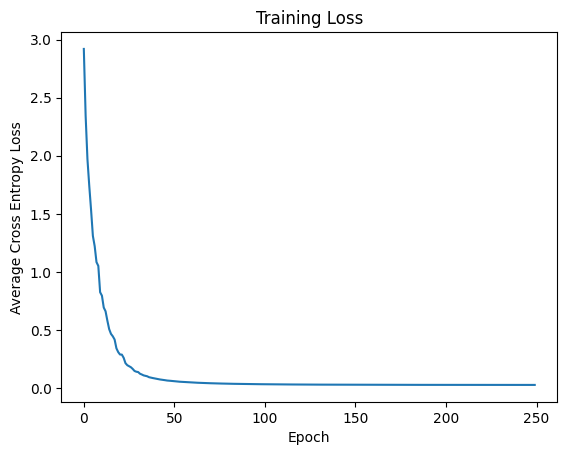

  0%|          | 1/250 [00:00<03:43,  1.11it/s]

Epoch 1/250, Loss: 2.8863


  1%|          | 2/250 [00:01<03:42,  1.11it/s]

Epoch 2/250, Loss: 2.4197


  1%|          | 3/250 [00:02<03:42,  1.11it/s]

Epoch 3/250, Loss: 2.0929


  2%|▏         | 4/250 [00:03<03:41,  1.11it/s]

Epoch 4/250, Loss: 1.8600


  2%|▏         | 5/250 [00:04<03:40,  1.11it/s]

Epoch 5/250, Loss: 1.6062


  2%|▏         | 6/250 [00:05<03:39,  1.11it/s]

Epoch 6/250, Loss: 1.3222


  3%|▎         | 7/250 [00:06<03:38,  1.11it/s]

Epoch 7/250, Loss: 1.2380


  3%|▎         | 8/250 [00:07<03:37,  1.11it/s]

Epoch 8/250, Loss: 1.1168


  4%|▎         | 9/250 [00:08<03:36,  1.11it/s]

Epoch 9/250, Loss: 1.0190


  4%|▍         | 10/250 [00:08<03:36,  1.11it/s]

Epoch 10/250, Loss: 0.8510


  4%|▍         | 11/250 [00:09<03:35,  1.11it/s]

Epoch 11/250, Loss: 0.8243


  5%|▍         | 12/250 [00:10<03:34,  1.11it/s]

Epoch 12/250, Loss: 0.7105


  5%|▌         | 13/250 [00:11<03:33,  1.11it/s]

Epoch 13/250, Loss: 0.6654


  6%|▌         | 14/250 [00:12<03:32,  1.11it/s]

Epoch 14/250, Loss: 0.5584


  6%|▌         | 15/250 [00:13<03:31,  1.11it/s]

Epoch 15/250, Loss: 0.4804


  6%|▋         | 16/250 [00:14<03:30,  1.11it/s]

Epoch 16/250, Loss: 0.4906


  7%|▋         | 17/250 [00:15<03:29,  1.11it/s]

Epoch 17/250, Loss: 0.4175


  7%|▋         | 18/250 [00:16<03:28,  1.11it/s]

Epoch 18/250, Loss: 0.4133


  8%|▊         | 19/250 [00:17<03:27,  1.11it/s]

Epoch 19/250, Loss: 0.3172


  8%|▊         | 20/250 [00:18<03:27,  1.11it/s]

Epoch 20/250, Loss: 0.3055


  8%|▊         | 21/250 [00:18<03:26,  1.11it/s]

Epoch 21/250, Loss: 0.2960


  9%|▉         | 22/250 [00:19<03:25,  1.11it/s]

Epoch 22/250, Loss: 0.2599


  9%|▉         | 23/250 [00:20<03:24,  1.11it/s]

Epoch 23/250, Loss: 0.2301


 10%|▉         | 24/250 [00:21<03:23,  1.11it/s]

Epoch 24/250, Loss: 0.1931


 10%|█         | 25/250 [00:22<03:22,  1.11it/s]

Epoch 25/250, Loss: 0.1836


 10%|█         | 26/250 [00:23<03:21,  1.11it/s]

Epoch 26/250, Loss: 0.1724


 11%|█         | 27/250 [00:24<03:20,  1.11it/s]

Epoch 27/250, Loss: 0.1621


 11%|█         | 28/250 [00:25<03:20,  1.11it/s]

Epoch 28/250, Loss: 0.1417


 12%|█▏        | 29/250 [00:26<03:19,  1.11it/s]

Epoch 29/250, Loss: 0.1323


 12%|█▏        | 30/250 [00:27<03:18,  1.11it/s]

Epoch 30/250, Loss: 0.1205


 12%|█▏        | 31/250 [00:27<03:17,  1.11it/s]

Epoch 31/250, Loss: 0.1149


 13%|█▎        | 32/250 [00:28<03:16,  1.11it/s]

Epoch 32/250, Loss: 0.1078


 13%|█▎        | 33/250 [00:29<03:15,  1.11it/s]

Epoch 33/250, Loss: 0.0984


 14%|█▎        | 34/250 [00:30<03:14,  1.11it/s]

Epoch 34/250, Loss: 0.0915


 14%|█▍        | 35/250 [00:31<03:13,  1.11it/s]

Epoch 35/250, Loss: 0.0889


 14%|█▍        | 36/250 [00:32<03:12,  1.11it/s]

Epoch 36/250, Loss: 0.0838


 15%|█▍        | 37/250 [00:33<03:11,  1.11it/s]

Epoch 37/250, Loss: 0.0800


 15%|█▌        | 38/250 [00:34<03:11,  1.11it/s]

Epoch 38/250, Loss: 0.0751


 16%|█▌        | 39/250 [00:35<03:10,  1.11it/s]

Epoch 39/250, Loss: 0.0720


 16%|█▌        | 40/250 [00:36<03:09,  1.11it/s]

Epoch 40/250, Loss: 0.0690


 16%|█▋        | 41/250 [00:36<03:08,  1.11it/s]

Epoch 41/250, Loss: 0.0660


 17%|█▋        | 42/250 [00:37<03:07,  1.11it/s]

Epoch 42/250, Loss: 0.0630


 17%|█▋        | 43/250 [00:38<03:06,  1.11it/s]

Epoch 43/250, Loss: 0.0617


 18%|█▊        | 44/250 [00:39<03:05,  1.11it/s]

Epoch 44/250, Loss: 0.0588


 18%|█▊        | 45/250 [00:40<03:05,  1.11it/s]

Epoch 45/250, Loss: 0.0570


 18%|█▊        | 46/250 [00:41<03:04,  1.11it/s]

Epoch 46/250, Loss: 0.0552


 19%|█▉        | 47/250 [00:42<03:02,  1.11it/s]

Epoch 47/250, Loss: 0.0537


 19%|█▉        | 48/250 [00:43<03:02,  1.11it/s]

Epoch 48/250, Loss: 0.0523


 20%|█▉        | 49/250 [00:44<03:01,  1.11it/s]

Epoch 49/250, Loss: 0.0504


 20%|██        | 50/250 [00:45<03:00,  1.11it/s]

Epoch 50/250, Loss: 0.0491


 20%|██        | 51/250 [00:45<02:59,  1.11it/s]

Epoch 51/250, Loss: 0.0476


 21%|██        | 52/250 [00:46<02:58,  1.11it/s]

Epoch 52/250, Loss: 0.0466


 21%|██        | 53/250 [00:47<02:57,  1.11it/s]

Epoch 53/250, Loss: 0.0457


 22%|██▏       | 54/250 [00:48<02:56,  1.11it/s]

Epoch 54/250, Loss: 0.0445


 22%|██▏       | 55/250 [00:49<02:55,  1.11it/s]

Epoch 55/250, Loss: 0.0437


 22%|██▏       | 56/250 [00:50<02:54,  1.11it/s]

Epoch 56/250, Loss: 0.0424


 23%|██▎       | 57/250 [00:51<02:53,  1.11it/s]

Epoch 57/250, Loss: 0.0418


 23%|██▎       | 58/250 [00:52<02:53,  1.11it/s]

Epoch 58/250, Loss: 0.0408


 24%|██▎       | 59/250 [00:53<02:52,  1.11it/s]

Epoch 59/250, Loss: 0.0401


 24%|██▍       | 60/250 [00:54<02:51,  1.11it/s]

Epoch 60/250, Loss: 0.0394


 24%|██▍       | 61/250 [00:54<02:50,  1.11it/s]

Epoch 61/250, Loss: 0.0388


 25%|██▍       | 62/250 [00:55<02:49,  1.11it/s]

Epoch 62/250, Loss: 0.0381


 25%|██▌       | 63/250 [00:56<02:48,  1.11it/s]

Epoch 63/250, Loss: 0.0375


 26%|██▌       | 64/250 [00:57<02:47,  1.11it/s]

Epoch 64/250, Loss: 0.0368


 26%|██▌       | 65/250 [00:58<02:46,  1.11it/s]

Epoch 65/250, Loss: 0.0363


 26%|██▋       | 66/250 [00:59<02:45,  1.11it/s]

Epoch 66/250, Loss: 0.0359


 27%|██▋       | 67/250 [01:00<02:44,  1.11it/s]

Epoch 67/250, Loss: 0.0353


 27%|██▋       | 68/250 [01:01<02:44,  1.11it/s]

Epoch 68/250, Loss: 0.0348


 28%|██▊       | 69/250 [01:02<02:43,  1.11it/s]

Epoch 69/250, Loss: 0.0344


 28%|██▊       | 70/250 [01:03<02:42,  1.11it/s]

Epoch 70/250, Loss: 0.0339


 28%|██▊       | 71/250 [01:03<02:41,  1.11it/s]

Epoch 71/250, Loss: 0.0336


 29%|██▉       | 72/250 [01:04<02:40,  1.11it/s]

Epoch 72/250, Loss: 0.0331


 29%|██▉       | 73/250 [01:05<02:39,  1.11it/s]

Epoch 73/250, Loss: 0.0326


 30%|██▉       | 74/250 [01:06<02:38,  1.11it/s]

Epoch 74/250, Loss: 0.0322


 30%|███       | 75/250 [01:07<02:37,  1.11it/s]

Epoch 75/250, Loss: 0.0320


 30%|███       | 76/250 [01:08<02:36,  1.11it/s]

Epoch 76/250, Loss: 0.0316


 31%|███       | 77/250 [01:09<02:36,  1.11it/s]

Epoch 77/250, Loss: 0.0313


 31%|███       | 78/250 [01:10<02:35,  1.11it/s]

Epoch 78/250, Loss: 0.0310


 32%|███▏      | 79/250 [01:11<02:34,  1.11it/s]

Epoch 79/250, Loss: 0.0307


 32%|███▏      | 80/250 [01:12<02:33,  1.11it/s]

Epoch 80/250, Loss: 0.0304


 32%|███▏      | 81/250 [01:12<02:32,  1.11it/s]

Epoch 81/250, Loss: 0.0301


 33%|███▎      | 82/250 [01:13<02:31,  1.11it/s]

Epoch 82/250, Loss: 0.0299


 33%|███▎      | 83/250 [01:14<02:30,  1.11it/s]

Epoch 83/250, Loss: 0.0296


 34%|███▎      | 84/250 [01:15<02:29,  1.11it/s]

Epoch 84/250, Loss: 0.0293


 34%|███▍      | 85/250 [01:16<02:28,  1.11it/s]

Epoch 85/250, Loss: 0.0291


 34%|███▍      | 86/250 [01:17<02:28,  1.11it/s]

Epoch 86/250, Loss: 0.0289


 35%|███▍      | 87/250 [01:18<02:27,  1.11it/s]

Epoch 87/250, Loss: 0.0287


 35%|███▌      | 88/250 [01:19<02:26,  1.11it/s]

Epoch 88/250, Loss: 0.0284


 36%|███▌      | 89/250 [01:20<02:25,  1.11it/s]

Epoch 89/250, Loss: 0.0282


 36%|███▌      | 90/250 [01:21<02:24,  1.11it/s]

Epoch 90/250, Loss: 0.0281


 36%|███▋      | 91/250 [01:22<02:23,  1.11it/s]

Epoch 91/250, Loss: 0.0278


 37%|███▋      | 92/250 [01:22<02:22,  1.11it/s]

Epoch 92/250, Loss: 0.0276


 37%|███▋      | 93/250 [01:23<02:21,  1.11it/s]

Epoch 93/250, Loss: 0.0275


 38%|███▊      | 94/250 [01:24<02:20,  1.11it/s]

Epoch 94/250, Loss: 0.0273


 38%|███▊      | 95/250 [01:25<02:19,  1.11it/s]

Epoch 95/250, Loss: 0.0271


 38%|███▊      | 96/250 [01:26<02:18,  1.11it/s]

Epoch 96/250, Loss: 0.0270


 39%|███▉      | 97/250 [01:27<02:17,  1.11it/s]

Epoch 97/250, Loss: 0.0268


 39%|███▉      | 98/250 [01:28<02:16,  1.11it/s]

Epoch 98/250, Loss: 0.0267


 40%|███▉      | 99/250 [01:29<02:16,  1.11it/s]

Epoch 99/250, Loss: 0.0265


 40%|████      | 100/250 [01:30<02:15,  1.11it/s]

Epoch 100/250, Loss: 0.0264


 40%|████      | 101/250 [01:31<02:14,  1.11it/s]

Epoch 101/250, Loss: 0.0263


 41%|████      | 102/250 [01:31<02:13,  1.11it/s]

Epoch 102/250, Loss: 0.0261


 41%|████      | 103/250 [01:32<02:12,  1.11it/s]

Epoch 103/250, Loss: 0.0260


 42%|████▏     | 104/250 [01:33<02:11,  1.11it/s]

Epoch 104/250, Loss: 0.0259


 42%|████▏     | 105/250 [01:34<02:10,  1.11it/s]

Epoch 105/250, Loss: 0.0257


 42%|████▏     | 106/250 [01:35<02:09,  1.11it/s]

Epoch 106/250, Loss: 0.0256


 43%|████▎     | 107/250 [01:36<02:08,  1.11it/s]

Epoch 107/250, Loss: 0.0255


 43%|████▎     | 108/250 [01:37<02:08,  1.11it/s]

Epoch 108/250, Loss: 0.0254


 44%|████▎     | 109/250 [01:38<02:07,  1.11it/s]

Epoch 109/250, Loss: 0.0253


 44%|████▍     | 110/250 [01:39<02:06,  1.11it/s]

Epoch 110/250, Loss: 0.0252


 44%|████▍     | 111/250 [01:40<02:05,  1.11it/s]

Epoch 111/250, Loss: 0.0251


 45%|████▍     | 112/250 [01:40<02:04,  1.11it/s]

Epoch 112/250, Loss: 0.0250


 45%|████▌     | 113/250 [01:41<02:03,  1.11it/s]

Epoch 113/250, Loss: 0.0249


 46%|████▌     | 114/250 [01:42<02:02,  1.11it/s]

Epoch 114/250, Loss: 0.0248


 46%|████▌     | 115/250 [01:43<02:01,  1.11it/s]

Epoch 115/250, Loss: 0.0247


 46%|████▋     | 116/250 [01:44<02:01,  1.11it/s]

Epoch 116/250, Loss: 0.0246


 47%|████▋     | 117/250 [01:45<02:00,  1.11it/s]

Epoch 117/250, Loss: 0.0246


 47%|████▋     | 118/250 [01:46<01:59,  1.11it/s]

Epoch 118/250, Loss: 0.0245


 48%|████▊     | 119/250 [01:47<01:58,  1.11it/s]

Epoch 119/250, Loss: 0.0244


 48%|████▊     | 120/250 [01:48<01:57,  1.11it/s]

Epoch 120/250, Loss: 0.0243


 48%|████▊     | 121/250 [01:49<01:56,  1.11it/s]

Epoch 121/250, Loss: 0.0242


 49%|████▉     | 122/250 [01:49<01:55,  1.11it/s]

Epoch 122/250, Loss: 0.0242


 49%|████▉     | 123/250 [01:50<01:54,  1.11it/s]

Epoch 123/250, Loss: 0.0241


 50%|████▉     | 124/250 [01:51<01:53,  1.11it/s]

Epoch 124/250, Loss: 0.0240


 50%|█████     | 125/250 [01:52<01:52,  1.11it/s]

Epoch 125/250, Loss: 0.0240


 50%|█████     | 126/250 [01:53<01:51,  1.11it/s]

Epoch 126/250, Loss: 0.0239


 51%|█████     | 127/250 [01:54<01:50,  1.11it/s]

Epoch 127/250, Loss: 0.0238


 51%|█████     | 128/250 [01:55<01:49,  1.11it/s]

Epoch 128/250, Loss: 0.0238


 52%|█████▏    | 129/250 [01:56<01:49,  1.11it/s]

Epoch 129/250, Loss: 0.0237


 52%|█████▏    | 130/250 [01:57<01:48,  1.11it/s]

Epoch 130/250, Loss: 0.0237


 52%|█████▏    | 131/250 [01:58<01:47,  1.11it/s]

Epoch 131/250, Loss: 0.0236


 53%|█████▎    | 132/250 [01:58<01:46,  1.11it/s]

Epoch 132/250, Loss: 0.0235


 53%|█████▎    | 133/250 [01:59<01:45,  1.11it/s]

Epoch 133/250, Loss: 0.0235


 54%|█████▎    | 134/250 [02:00<01:44,  1.11it/s]

Epoch 134/250, Loss: 0.0235


 54%|█████▍    | 135/250 [02:01<01:43,  1.11it/s]

Epoch 135/250, Loss: 0.0234


 54%|█████▍    | 136/250 [02:02<01:42,  1.11it/s]

Epoch 136/250, Loss: 0.0234


 55%|█████▍    | 137/250 [02:03<01:41,  1.11it/s]

Epoch 137/250, Loss: 0.0233


 55%|█████▌    | 138/250 [02:04<01:40,  1.11it/s]

Epoch 138/250, Loss: 0.0232


 56%|█████▌    | 139/250 [02:05<01:40,  1.11it/s]

Epoch 139/250, Loss: 0.0232


 56%|█████▌    | 140/250 [02:06<01:39,  1.11it/s]

Epoch 140/250, Loss: 0.0232


 56%|█████▋    | 141/250 [02:07<01:38,  1.11it/s]

Epoch 141/250, Loss: 0.0231


 57%|█████▋    | 142/250 [02:08<01:37,  1.11it/s]

Epoch 142/250, Loss: 0.0231


 57%|█████▋    | 143/250 [02:08<01:36,  1.11it/s]

Epoch 143/250, Loss: 0.0230


 58%|█████▊    | 144/250 [02:09<01:35,  1.11it/s]

Epoch 144/250, Loss: 0.0230


 58%|█████▊    | 145/250 [02:10<01:34,  1.11it/s]

Epoch 145/250, Loss: 0.0230


 58%|█████▊    | 146/250 [02:11<01:33,  1.11it/s]

Epoch 146/250, Loss: 0.0229


 59%|█████▉    | 147/250 [02:12<01:32,  1.11it/s]

Epoch 147/250, Loss: 0.0229


 59%|█████▉    | 148/250 [02:13<01:32,  1.11it/s]

Epoch 148/250, Loss: 0.0228


 60%|█████▉    | 149/250 [02:14<01:31,  1.11it/s]

Epoch 149/250, Loss: 0.0228


 60%|██████    | 150/250 [02:15<01:30,  1.11it/s]

Epoch 150/250, Loss: 0.0228


 60%|██████    | 151/250 [02:16<01:29,  1.11it/s]

Epoch 151/250, Loss: 0.0227


 61%|██████    | 152/250 [02:17<01:28,  1.11it/s]

Epoch 152/250, Loss: 0.0227


 61%|██████    | 153/250 [02:17<01:27,  1.11it/s]

Epoch 153/250, Loss: 0.0227


 62%|██████▏   | 154/250 [02:18<01:26,  1.11it/s]

Epoch 154/250, Loss: 0.0226


 62%|██████▏   | 155/250 [02:19<01:25,  1.11it/s]

Epoch 155/250, Loss: 0.0226


 62%|██████▏   | 156/250 [02:20<01:24,  1.11it/s]

Epoch 156/250, Loss: 0.0226


 63%|██████▎   | 157/250 [02:21<01:23,  1.11it/s]

Epoch 157/250, Loss: 0.0226


 63%|██████▎   | 158/250 [02:22<01:23,  1.11it/s]

Epoch 158/250, Loss: 0.0225


 64%|██████▎   | 159/250 [02:23<01:22,  1.11it/s]

Epoch 159/250, Loss: 0.0225


 64%|██████▍   | 160/250 [02:24<01:21,  1.11it/s]

Epoch 160/250, Loss: 0.0225


 64%|██████▍   | 161/250 [02:25<01:20,  1.11it/s]

Epoch 161/250, Loss: 0.0225


 65%|██████▍   | 162/250 [02:26<01:19,  1.11it/s]

Epoch 162/250, Loss: 0.0224


 65%|██████▌   | 163/250 [02:26<01:18,  1.11it/s]

Epoch 163/250, Loss: 0.0224


 66%|██████▌   | 164/250 [02:27<01:17,  1.11it/s]

Epoch 164/250, Loss: 0.0224


 66%|██████▌   | 165/250 [02:28<01:16,  1.11it/s]

Epoch 165/250, Loss: 0.0224


 66%|██████▋   | 166/250 [02:29<01:15,  1.11it/s]

Epoch 166/250, Loss: 0.0223


 67%|██████▋   | 167/250 [02:30<01:14,  1.11it/s]

Epoch 167/250, Loss: 0.0223


 67%|██████▋   | 168/250 [02:31<01:13,  1.11it/s]

Epoch 168/250, Loss: 0.0223


 68%|██████▊   | 169/250 [02:32<01:12,  1.11it/s]

Epoch 169/250, Loss: 0.0223


 68%|██████▊   | 170/250 [02:33<01:12,  1.11it/s]

Epoch 170/250, Loss: 0.0222


 68%|██████▊   | 171/250 [02:34<01:11,  1.11it/s]

Epoch 171/250, Loss: 0.0222


 69%|██████▉   | 172/250 [02:35<01:10,  1.11it/s]

Epoch 172/250, Loss: 0.0222


 69%|██████▉   | 173/250 [02:35<01:09,  1.11it/s]

Epoch 173/250, Loss: 0.0222


 70%|██████▉   | 174/250 [02:36<01:08,  1.11it/s]

Epoch 174/250, Loss: 0.0222


 70%|███████   | 175/250 [02:37<01:07,  1.11it/s]

Epoch 175/250, Loss: 0.0222


 70%|███████   | 176/250 [02:38<01:06,  1.11it/s]

Epoch 176/250, Loss: 0.0221


 71%|███████   | 177/250 [02:39<01:05,  1.11it/s]

Epoch 177/250, Loss: 0.0221


 71%|███████   | 178/250 [02:40<01:04,  1.11it/s]

Epoch 178/250, Loss: 0.0221


 72%|███████▏  | 179/250 [02:41<01:03,  1.11it/s]

Epoch 179/250, Loss: 0.0221


 72%|███████▏  | 180/250 [02:42<01:03,  1.11it/s]

Epoch 180/250, Loss: 0.0221


 72%|███████▏  | 181/250 [02:43<01:02,  1.11it/s]

Epoch 181/250, Loss: 0.0221


 73%|███████▎  | 182/250 [02:44<01:01,  1.11it/s]

Epoch 182/250, Loss: 0.0220


 73%|███████▎  | 183/250 [02:44<01:00,  1.11it/s]

Epoch 183/250, Loss: 0.0220


 74%|███████▎  | 184/250 [02:45<00:59,  1.11it/s]

Epoch 184/250, Loss: 0.0220


 74%|███████▍  | 185/250 [02:46<00:58,  1.11it/s]

Epoch 185/250, Loss: 0.0220


 74%|███████▍  | 186/250 [02:47<00:57,  1.11it/s]

Epoch 186/250, Loss: 0.0220


 75%|███████▍  | 187/250 [02:48<00:56,  1.11it/s]

Epoch 187/250, Loss: 0.0220


 75%|███████▌  | 188/250 [02:49<00:55,  1.11it/s]

Epoch 188/250, Loss: 0.0220


 76%|███████▌  | 189/250 [02:50<00:55,  1.11it/s]

Epoch 189/250, Loss: 0.0219


 76%|███████▌  | 190/250 [02:51<00:54,  1.11it/s]

Epoch 190/250, Loss: 0.0219


 76%|███████▋  | 191/250 [02:52<00:53,  1.11it/s]

Epoch 191/250, Loss: 0.0219


 77%|███████▋  | 192/250 [02:53<00:52,  1.11it/s]

Epoch 192/250, Loss: 0.0219


 77%|███████▋  | 193/250 [02:54<00:51,  1.11it/s]

Epoch 193/250, Loss: 0.0219


 78%|███████▊  | 194/250 [02:54<00:50,  1.11it/s]

Epoch 194/250, Loss: 0.0219


 78%|███████▊  | 195/250 [02:55<00:49,  1.11it/s]

Epoch 195/250, Loss: 0.0219


 78%|███████▊  | 196/250 [02:56<00:48,  1.11it/s]

Epoch 196/250, Loss: 0.0219


 79%|███████▉  | 197/250 [02:57<00:47,  1.11it/s]

Epoch 197/250, Loss: 0.0218


 79%|███████▉  | 198/250 [02:58<00:46,  1.11it/s]

Epoch 198/250, Loss: 0.0218


 80%|███████▉  | 199/250 [02:59<00:45,  1.11it/s]

Epoch 199/250, Loss: 0.0218


 80%|████████  | 200/250 [03:00<00:45,  1.11it/s]

Epoch 200/250, Loss: 0.0218


 80%|████████  | 201/250 [03:01<00:44,  1.11it/s]

Epoch 201/250, Loss: 0.0218


 81%|████████  | 202/250 [03:02<00:43,  1.11it/s]

Epoch 202/250, Loss: 0.0218


 81%|████████  | 203/250 [03:03<00:42,  1.11it/s]

Epoch 203/250, Loss: 0.0218


 82%|████████▏ | 204/250 [03:03<00:41,  1.11it/s]

Epoch 204/250, Loss: 0.0218


 82%|████████▏ | 205/250 [03:04<00:40,  1.11it/s]

Epoch 205/250, Loss: 0.0218


 82%|████████▏ | 206/250 [03:05<00:39,  1.11it/s]

Epoch 206/250, Loss: 0.0218


 83%|████████▎ | 207/250 [03:06<00:38,  1.11it/s]

Epoch 207/250, Loss: 0.0217


 83%|████████▎ | 208/250 [03:07<00:37,  1.11it/s]

Epoch 208/250, Loss: 0.0217


 84%|████████▎ | 209/250 [03:08<00:36,  1.11it/s]

Epoch 209/250, Loss: 0.0217


 84%|████████▍ | 210/250 [03:09<00:36,  1.11it/s]

Epoch 210/250, Loss: 0.0217


 84%|████████▍ | 211/250 [03:10<00:35,  1.11it/s]

Epoch 211/250, Loss: 0.0217


 85%|████████▍ | 212/250 [03:11<00:34,  1.11it/s]

Epoch 212/250, Loss: 0.0217


 85%|████████▌ | 213/250 [03:12<00:33,  1.11it/s]

Epoch 213/250, Loss: 0.0217


 86%|████████▌ | 214/250 [03:12<00:32,  1.11it/s]

Epoch 214/250, Loss: 0.0217


 86%|████████▌ | 215/250 [03:13<00:31,  1.11it/s]

Epoch 215/250, Loss: 0.0217


 86%|████████▋ | 216/250 [03:14<00:30,  1.11it/s]

Epoch 216/250, Loss: 0.0217


 87%|████████▋ | 217/250 [03:15<00:29,  1.11it/s]

Epoch 217/250, Loss: 0.0217


 87%|████████▋ | 218/250 [03:16<00:28,  1.11it/s]

Epoch 218/250, Loss: 0.0217


 88%|████████▊ | 219/250 [03:17<00:27,  1.11it/s]

Epoch 219/250, Loss: 0.0217


 88%|████████▊ | 220/250 [03:18<00:27,  1.11it/s]

Epoch 220/250, Loss: 0.0217


 88%|████████▊ | 221/250 [03:19<00:26,  1.11it/s]

Epoch 221/250, Loss: 0.0216


 89%|████████▉ | 222/250 [03:20<00:25,  1.11it/s]

Epoch 222/250, Loss: 0.0216


 89%|████████▉ | 223/250 [03:21<00:24,  1.11it/s]

Epoch 223/250, Loss: 0.0216


 90%|████████▉ | 224/250 [03:21<00:23,  1.11it/s]

Epoch 224/250, Loss: 0.0216


 90%|█████████ | 225/250 [03:22<00:22,  1.11it/s]

Epoch 225/250, Loss: 0.0216


 90%|█████████ | 226/250 [03:23<00:21,  1.11it/s]

Epoch 226/250, Loss: 0.0216


 91%|█████████ | 227/250 [03:24<00:20,  1.11it/s]

Epoch 227/250, Loss: 0.0216


 91%|█████████ | 228/250 [03:25<00:19,  1.11it/s]

Epoch 228/250, Loss: 0.0216


 92%|█████████▏| 229/250 [03:26<00:18,  1.11it/s]

Epoch 229/250, Loss: 0.0216


 92%|█████████▏| 230/250 [03:27<00:18,  1.11it/s]

Epoch 230/250, Loss: 0.0216


 92%|█████████▏| 231/250 [03:28<00:17,  1.11it/s]

Epoch 231/250, Loss: 0.0216


 93%|█████████▎| 232/250 [03:29<00:16,  1.11it/s]

Epoch 232/250, Loss: 0.0216


 93%|█████████▎| 233/250 [03:30<00:15,  1.11it/s]

Epoch 233/250, Loss: 0.0216


 94%|█████████▎| 234/250 [03:30<00:14,  1.11it/s]

Epoch 234/250, Loss: 0.0216


 94%|█████████▍| 235/250 [03:31<00:13,  1.11it/s]

Epoch 235/250, Loss: 0.0216


 94%|█████████▍| 236/250 [03:32<00:12,  1.11it/s]

Epoch 236/250, Loss: 0.0216


 95%|█████████▍| 237/250 [03:33<00:11,  1.11it/s]

Epoch 237/250, Loss: 0.0216


 95%|█████████▌| 238/250 [03:34<00:10,  1.11it/s]

Epoch 238/250, Loss: 0.0216


 96%|█████████▌| 239/250 [03:35<00:09,  1.11it/s]

Epoch 239/250, Loss: 0.0216


 96%|█████████▌| 240/250 [03:36<00:09,  1.11it/s]

Epoch 240/250, Loss: 0.0216


 96%|█████████▋| 241/250 [03:37<00:08,  1.11it/s]

Epoch 241/250, Loss: 0.0216


 97%|█████████▋| 242/250 [03:38<00:07,  1.11it/s]

Epoch 242/250, Loss: 0.0216


 97%|█████████▋| 243/250 [03:39<00:06,  1.11it/s]

Epoch 243/250, Loss: 0.0215


 98%|█████████▊| 244/250 [03:39<00:05,  1.11it/s]

Epoch 244/250, Loss: 0.0215


 98%|█████████▊| 245/250 [03:40<00:04,  1.11it/s]

Epoch 245/250, Loss: 0.0216


 98%|█████████▊| 246/250 [03:41<00:03,  1.11it/s]

Epoch 246/250, Loss: 0.0215


 99%|█████████▉| 247/250 [03:42<00:02,  1.11it/s]

Epoch 247/250, Loss: 0.0215


 99%|█████████▉| 248/250 [03:43<00:01,  1.11it/s]

Epoch 248/250, Loss: 0.0215


100%|█████████▉| 249/250 [03:44<00:00,  1.11it/s]

Epoch 249/250, Loss: 0.0215


100%|██████████| 250/250 [03:45<00:00,  1.11it/s]

Epoch 250/250, Loss: 0.0215


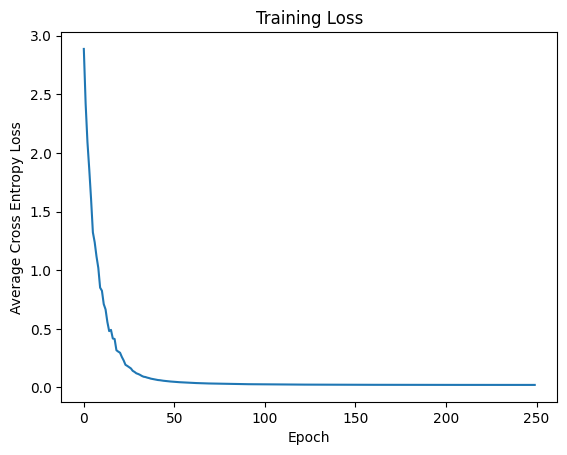

  0%|          | 1/250 [00:00<03:43,  1.12it/s]

Epoch 1/250, Loss: 2.9662


  1%|          | 2/250 [00:01<03:42,  1.11it/s]

Epoch 2/250, Loss: 2.4382


  1%|          | 3/250 [00:02<03:41,  1.11it/s]

Epoch 3/250, Loss: 2.2132


  2%|▏         | 4/250 [00:03<03:41,  1.11it/s]

Epoch 4/250, Loss: 1.9005


  2%|▏         | 5/250 [00:04<03:40,  1.11it/s]

Epoch 5/250, Loss: 1.6100


  2%|▏         | 6/250 [00:05<03:39,  1.11it/s]

Epoch 6/250, Loss: 1.4353


  3%|▎         | 7/250 [00:06<03:39,  1.11it/s]

Epoch 7/250, Loss: 1.2558


  3%|▎         | 8/250 [00:07<03:38,  1.11it/s]

Epoch 8/250, Loss: 1.1588


  4%|▎         | 9/250 [00:08<03:37,  1.11it/s]

Epoch 9/250, Loss: 1.0813


  4%|▍         | 10/250 [00:09<03:36,  1.11it/s]

Epoch 10/250, Loss: 0.8659


  4%|▍         | 11/250 [00:09<03:35,  1.11it/s]

Epoch 11/250, Loss: 0.8114


  5%|▍         | 12/250 [00:10<03:34,  1.11it/s]

Epoch 12/250, Loss: 0.7487


  5%|▌         | 13/250 [00:11<03:33,  1.11it/s]

Epoch 13/250, Loss: 0.7201


  6%|▌         | 14/250 [00:12<03:32,  1.11it/s]

Epoch 14/250, Loss: 0.6068


  6%|▌         | 15/250 [00:13<03:31,  1.11it/s]

Epoch 15/250, Loss: 0.5079


  6%|▋         | 16/250 [00:14<03:30,  1.11it/s]

Epoch 16/250, Loss: 0.4642


  7%|▋         | 17/250 [00:15<03:29,  1.11it/s]

Epoch 17/250, Loss: 0.4220


  7%|▋         | 18/250 [00:16<03:28,  1.11it/s]

Epoch 18/250, Loss: 0.4203


  8%|▊         | 19/250 [00:17<03:28,  1.11it/s]

Epoch 19/250, Loss: 0.3606


  8%|▊         | 20/250 [00:18<03:27,  1.11it/s]

Epoch 20/250, Loss: 0.3190


  8%|▊         | 21/250 [00:18<03:26,  1.11it/s]

Epoch 21/250, Loss: 0.2988


  9%|▉         | 22/250 [00:19<03:25,  1.11it/s]

Epoch 22/250, Loss: 0.2646


  9%|▉         | 23/250 [00:20<03:24,  1.11it/s]

Epoch 23/250, Loss: 0.2402


 10%|▉         | 24/250 [00:21<03:23,  1.11it/s]

Epoch 24/250, Loss: 0.2219


 10%|█         | 25/250 [00:22<03:22,  1.11it/s]

Epoch 25/250, Loss: 0.1958


 10%|█         | 26/250 [00:23<03:21,  1.11it/s]

Epoch 26/250, Loss: 0.1920


 11%|█         | 27/250 [00:24<03:20,  1.11it/s]

Epoch 27/250, Loss: 0.1710


 11%|█         | 28/250 [00:25<03:19,  1.11it/s]

Epoch 28/250, Loss: 0.1553


 12%|█▏        | 29/250 [00:26<03:19,  1.11it/s]

Epoch 29/250, Loss: 0.1314


 12%|█▏        | 30/250 [00:27<03:18,  1.11it/s]

Epoch 30/250, Loss: 0.1241


 12%|█▏        | 31/250 [00:27<03:17,  1.11it/s]

Epoch 31/250, Loss: 0.1191


 13%|█▎        | 32/250 [00:28<03:16,  1.11it/s]

Epoch 32/250, Loss: 0.1138


 13%|█▎        | 33/250 [00:29<03:15,  1.11it/s]

Epoch 33/250, Loss: 0.1012


 14%|█▎        | 34/250 [00:30<03:14,  1.11it/s]

Epoch 34/250, Loss: 0.0960


 14%|█▍        | 35/250 [00:31<03:13,  1.11it/s]

Epoch 35/250, Loss: 0.0939


 14%|█▍        | 36/250 [00:32<03:13,  1.11it/s]

Epoch 36/250, Loss: 0.0870


 15%|█▍        | 37/250 [00:33<03:12,  1.11it/s]

Epoch 37/250, Loss: 0.0804


 15%|█▌        | 38/250 [00:34<03:11,  1.11it/s]

Epoch 38/250, Loss: 0.0780


 16%|█▌        | 39/250 [00:35<03:10,  1.11it/s]

Epoch 39/250, Loss: 0.0741


 16%|█▌        | 40/250 [00:36<03:09,  1.11it/s]

Epoch 40/250, Loss: 0.0718


 16%|█▋        | 41/250 [00:36<03:08,  1.11it/s]

Epoch 41/250, Loss: 0.0685


 17%|█▋        | 42/250 [00:37<03:07,  1.11it/s]

Epoch 42/250, Loss: 0.0643


 17%|█▋        | 43/250 [00:38<03:06,  1.11it/s]

Epoch 43/250, Loss: 0.0627


 18%|█▊        | 44/250 [00:39<03:05,  1.11it/s]

Epoch 44/250, Loss: 0.0601


 18%|█▊        | 45/250 [00:40<03:04,  1.11it/s]

Epoch 45/250, Loss: 0.0580


 18%|█▊        | 46/250 [00:41<03:03,  1.11it/s]

Epoch 46/250, Loss: 0.0554


 19%|█▉        | 47/250 [00:42<03:02,  1.11it/s]

Epoch 47/250, Loss: 0.0536


 19%|█▉        | 48/250 [00:43<03:01,  1.11it/s]

Epoch 48/250, Loss: 0.0523


 20%|█▉        | 49/250 [00:44<03:01,  1.11it/s]

Epoch 49/250, Loss: 0.0506


 20%|██        | 50/250 [00:45<03:00,  1.11it/s]

Epoch 50/250, Loss: 0.0497


 20%|██        | 51/250 [00:45<02:59,  1.11it/s]

Epoch 51/250, Loss: 0.0477


 21%|██        | 52/250 [00:46<02:58,  1.11it/s]

Epoch 52/250, Loss: 0.0469


 21%|██        | 53/250 [00:47<02:57,  1.11it/s]

Epoch 53/250, Loss: 0.0453


 22%|██▏       | 54/250 [00:48<02:56,  1.11it/s]

Epoch 54/250, Loss: 0.0446


 22%|██▏       | 55/250 [00:49<02:55,  1.11it/s]

Epoch 55/250, Loss: 0.0432


 22%|██▏       | 56/250 [00:50<02:54,  1.11it/s]

Epoch 56/250, Loss: 0.0423


 23%|██▎       | 57/250 [00:51<02:54,  1.11it/s]

Epoch 57/250, Loss: 0.0414


 23%|██▎       | 58/250 [00:52<02:53,  1.11it/s]

Epoch 58/250, Loss: 0.0406


 24%|██▎       | 59/250 [00:53<02:52,  1.11it/s]

Epoch 59/250, Loss: 0.0399


 24%|██▍       | 60/250 [00:54<02:51,  1.11it/s]

Epoch 60/250, Loss: 0.0390


 24%|██▍       | 61/250 [00:54<02:50,  1.11it/s]

Epoch 61/250, Loss: 0.0383


 25%|██▍       | 62/250 [00:55<02:49,  1.11it/s]

Epoch 62/250, Loss: 0.0376


 25%|██▌       | 63/250 [00:56<02:48,  1.11it/s]

Epoch 63/250, Loss: 0.0370


 26%|██▌       | 64/250 [00:57<02:47,  1.11it/s]

Epoch 64/250, Loss: 0.0364


 26%|██▌       | 65/250 [00:58<02:47,  1.11it/s]

Epoch 65/250, Loss: 0.0357


 26%|██▋       | 66/250 [00:59<02:46,  1.11it/s]

Epoch 66/250, Loss: 0.0351


 27%|██▋       | 67/250 [01:00<02:45,  1.11it/s]

Epoch 67/250, Loss: 0.0348


 27%|██▋       | 68/250 [01:01<02:44,  1.11it/s]

Epoch 68/250, Loss: 0.0341


 28%|██▊       | 69/250 [01:02<02:43,  1.11it/s]

Epoch 69/250, Loss: 0.0337


 28%|██▊       | 70/250 [01:03<02:42,  1.11it/s]

Epoch 70/250, Loss: 0.0332


 28%|██▊       | 71/250 [01:03<02:41,  1.11it/s]

Epoch 71/250, Loss: 0.0328


 29%|██▉       | 72/250 [01:04<02:40,  1.11it/s]

Epoch 72/250, Loss: 0.0324


 29%|██▉       | 73/250 [01:05<02:39,  1.11it/s]

Epoch 73/250, Loss: 0.0321


 30%|██▉       | 74/250 [01:06<02:38,  1.11it/s]

Epoch 74/250, Loss: 0.0316


 30%|███       | 75/250 [01:07<02:37,  1.11it/s]

Epoch 75/250, Loss: 0.0313


 30%|███       | 76/250 [01:08<02:36,  1.11it/s]

Epoch 76/250, Loss: 0.0309


 31%|███       | 77/250 [01:09<02:35,  1.11it/s]

Epoch 77/250, Loss: 0.0306


 31%|███       | 78/250 [01:10<02:35,  1.11it/s]

Epoch 78/250, Loss: 0.0303


 32%|███▏      | 79/250 [01:11<02:34,  1.11it/s]

Epoch 79/250, Loss: 0.0300


 32%|███▏      | 80/250 [01:12<02:33,  1.11it/s]

Epoch 80/250, Loss: 0.0297


 32%|███▏      | 81/250 [01:12<02:32,  1.11it/s]

Epoch 81/250, Loss: 0.0294


 33%|███▎      | 82/250 [01:13<02:31,  1.11it/s]

Epoch 82/250, Loss: 0.0291


 33%|███▎      | 83/250 [01:14<02:30,  1.11it/s]

Epoch 83/250, Loss: 0.0288


 34%|███▎      | 84/250 [01:15<02:29,  1.11it/s]

Epoch 84/250, Loss: 0.0286


 34%|███▍      | 85/250 [01:16<02:28,  1.11it/s]

Epoch 85/250, Loss: 0.0284


 34%|███▍      | 86/250 [01:17<02:27,  1.11it/s]

Epoch 86/250, Loss: 0.0281


 35%|███▍      | 87/250 [01:18<02:26,  1.11it/s]

Epoch 87/250, Loss: 0.0279


 35%|███▌      | 88/250 [01:19<02:25,  1.11it/s]

Epoch 88/250, Loss: 0.0277


 36%|███▌      | 89/250 [01:20<02:25,  1.11it/s]

Epoch 89/250, Loss: 0.0275


 36%|███▌      | 90/250 [01:21<02:24,  1.11it/s]

Epoch 90/250, Loss: 0.0273


 36%|███▋      | 91/250 [01:22<02:23,  1.11it/s]

Epoch 91/250, Loss: 0.0271


 37%|███▋      | 92/250 [01:22<02:22,  1.11it/s]

Epoch 92/250, Loss: 0.0269


 37%|███▋      | 93/250 [01:23<02:21,  1.11it/s]

Epoch 93/250, Loss: 0.0268


 38%|███▊      | 94/250 [01:24<02:20,  1.11it/s]

Epoch 94/250, Loss: 0.0265


 38%|███▊      | 95/250 [01:25<02:19,  1.11it/s]

Epoch 95/250, Loss: 0.0264


 38%|███▊      | 96/250 [01:26<02:18,  1.11it/s]

Epoch 96/250, Loss: 0.0262


 39%|███▉      | 97/250 [01:27<02:17,  1.11it/s]

Epoch 97/250, Loss: 0.0261


 39%|███▉      | 98/250 [01:28<02:17,  1.11it/s]

Epoch 98/250, Loss: 0.0259


 40%|███▉      | 99/250 [01:29<02:16,  1.11it/s]

Epoch 99/250, Loss: 0.0258


 40%|████      | 100/250 [01:30<02:15,  1.11it/s]

Epoch 100/250, Loss: 0.0256


 40%|████      | 101/250 [01:31<02:14,  1.11it/s]

Epoch 101/250, Loss: 0.0255


 41%|████      | 102/250 [01:31<02:13,  1.11it/s]

Epoch 102/250, Loss: 0.0254


 41%|████      | 103/250 [01:32<02:12,  1.11it/s]

Epoch 103/250, Loss: 0.0252


 42%|████▏     | 104/250 [01:33<02:11,  1.11it/s]

Epoch 104/250, Loss: 0.0251


 42%|████▏     | 105/250 [01:34<02:10,  1.11it/s]

Epoch 105/250, Loss: 0.0250


 42%|████▏     | 106/250 [01:35<02:09,  1.11it/s]

Epoch 106/250, Loss: 0.0249


 43%|████▎     | 107/250 [01:36<02:09,  1.11it/s]

Epoch 107/250, Loss: 0.0247


 43%|████▎     | 108/250 [01:37<02:08,  1.11it/s]

Epoch 108/250, Loss: 0.0247


 44%|████▎     | 109/250 [01:38<02:07,  1.11it/s]

Epoch 109/250, Loss: 0.0245


 44%|████▍     | 110/250 [01:39<02:06,  1.11it/s]

Epoch 110/250, Loss: 0.0244


 44%|████▍     | 111/250 [01:40<02:05,  1.11it/s]

Epoch 111/250, Loss: 0.0243


 45%|████▍     | 112/250 [01:40<02:04,  1.11it/s]

Epoch 112/250, Loss: 0.0242


 45%|████▌     | 113/250 [01:41<02:03,  1.11it/s]

Epoch 113/250, Loss: 0.0241


 46%|████▌     | 114/250 [01:42<02:02,  1.11it/s]

Epoch 114/250, Loss: 0.0240


 46%|████▌     | 115/250 [01:43<02:01,  1.11it/s]

Epoch 115/250, Loss: 0.0239


 46%|████▋     | 116/250 [01:44<02:00,  1.11it/s]

Epoch 116/250, Loss: 0.0239


 47%|████▋     | 117/250 [01:45<01:59,  1.11it/s]

Epoch 117/250, Loss: 0.0238


 47%|████▋     | 118/250 [01:46<01:58,  1.11it/s]

Epoch 118/250, Loss: 0.0237


 48%|████▊     | 119/250 [01:47<01:57,  1.11it/s]

Epoch 119/250, Loss: 0.0236


 48%|████▊     | 120/250 [01:48<01:57,  1.11it/s]

Epoch 120/250, Loss: 0.0235


 48%|████▊     | 121/250 [01:49<01:56,  1.11it/s]

Epoch 121/250, Loss: 0.0235


 49%|████▉     | 122/250 [01:49<01:55,  1.11it/s]

Epoch 122/250, Loss: 0.0234


 49%|████▉     | 123/250 [01:50<01:54,  1.11it/s]

Epoch 123/250, Loss: 0.0233


 50%|████▉     | 124/250 [01:51<01:53,  1.11it/s]

Epoch 124/250, Loss: 0.0233


 50%|█████     | 125/250 [01:52<01:52,  1.11it/s]

Epoch 125/250, Loss: 0.0232


 50%|█████     | 126/250 [01:53<01:51,  1.11it/s]

Epoch 126/250, Loss: 0.0231


 51%|█████     | 127/250 [01:54<01:50,  1.11it/s]

Epoch 127/250, Loss: 0.0231


 51%|█████     | 128/250 [01:55<01:49,  1.11it/s]

Epoch 128/250, Loss: 0.0230


 52%|█████▏    | 129/250 [01:56<01:48,  1.11it/s]

Epoch 129/250, Loss: 0.0230


 52%|█████▏    | 130/250 [01:57<01:48,  1.11it/s]

Epoch 130/250, Loss: 0.0229


 52%|█████▏    | 131/250 [01:58<01:47,  1.11it/s]

Epoch 131/250, Loss: 0.0228


 53%|█████▎    | 132/250 [01:58<01:46,  1.11it/s]

Epoch 132/250, Loss: 0.0228


 53%|█████▎    | 133/250 [01:59<01:45,  1.11it/s]

Epoch 133/250, Loss: 0.0227


 54%|█████▎    | 134/250 [02:00<01:44,  1.11it/s]

Epoch 134/250, Loss: 0.0227


 54%|█████▍    | 135/250 [02:01<01:43,  1.11it/s]

Epoch 135/250, Loss: 0.0226


 54%|█████▍    | 136/250 [02:02<01:43,  1.11it/s]

Epoch 136/250, Loss: 0.0226


 55%|█████▍    | 137/250 [02:03<01:42,  1.11it/s]

Epoch 137/250, Loss: 0.0225


 55%|█████▌    | 138/250 [02:04<01:41,  1.11it/s]

Epoch 138/250, Loss: 0.0225


 56%|█████▌    | 139/250 [02:05<01:40,  1.11it/s]

Epoch 139/250, Loss: 0.0224


 56%|█████▌    | 140/250 [02:06<01:39,  1.11it/s]

Epoch 140/250, Loss: 0.0224


 56%|█████▋    | 141/250 [02:07<01:38,  1.11it/s]

Epoch 141/250, Loss: 0.0223


 57%|█████▋    | 142/250 [02:07<01:37,  1.11it/s]

Epoch 142/250, Loss: 0.0223


 57%|█████▋    | 143/250 [02:08<01:36,  1.11it/s]

Epoch 143/250, Loss: 0.0223


 58%|█████▊    | 144/250 [02:09<01:35,  1.11it/s]

Epoch 144/250, Loss: 0.0222


 58%|█████▊    | 145/250 [02:10<01:34,  1.11it/s]

Epoch 145/250, Loss: 0.0222


 58%|█████▊    | 146/250 [02:11<01:33,  1.11it/s]

Epoch 146/250, Loss: 0.0222


 59%|█████▉    | 147/250 [02:12<01:32,  1.11it/s]

Epoch 147/250, Loss: 0.0221


 59%|█████▉    | 148/250 [02:13<01:32,  1.11it/s]

Epoch 148/250, Loss: 0.0221


 60%|█████▉    | 149/250 [02:14<01:31,  1.11it/s]

Epoch 149/250, Loss: 0.0221


 60%|██████    | 150/250 [02:15<01:30,  1.11it/s]

Epoch 150/250, Loss: 0.0220


 60%|██████    | 151/250 [02:16<01:29,  1.11it/s]

Epoch 151/250, Loss: 0.0220


 61%|██████    | 152/250 [02:16<01:28,  1.11it/s]

Epoch 152/250, Loss: 0.0219


 61%|██████    | 153/250 [02:17<01:27,  1.11it/s]

Epoch 153/250, Loss: 0.0219


 62%|██████▏   | 154/250 [02:18<01:26,  1.11it/s]

Epoch 154/250, Loss: 0.0219


 62%|██████▏   | 155/250 [02:19<01:25,  1.11it/s]

Epoch 155/250, Loss: 0.0219


 62%|██████▏   | 156/250 [02:20<01:24,  1.11it/s]

Epoch 156/250, Loss: 0.0218


 63%|██████▎   | 157/250 [02:21<01:23,  1.11it/s]

Epoch 157/250, Loss: 0.0218


 63%|██████▎   | 158/250 [02:22<01:22,  1.11it/s]

Epoch 158/250, Loss: 0.0218


 64%|██████▎   | 159/250 [02:23<01:21,  1.11it/s]

Epoch 159/250, Loss: 0.0217


 64%|██████▍   | 160/250 [02:24<01:21,  1.11it/s]

Epoch 160/250, Loss: 0.0217


 64%|██████▍   | 161/250 [02:25<01:20,  1.11it/s]

Epoch 161/250, Loss: 0.0217


 65%|██████▍   | 162/250 [02:26<01:19,  1.11it/s]

Epoch 162/250, Loss: 0.0217


 65%|██████▌   | 163/250 [02:26<01:18,  1.11it/s]

Epoch 163/250, Loss: 0.0216


 66%|██████▌   | 164/250 [02:27<01:17,  1.11it/s]

Epoch 164/250, Loss: 0.0216


 66%|██████▌   | 165/250 [02:28<01:16,  1.11it/s]

Epoch 165/250, Loss: 0.0216


 66%|██████▋   | 166/250 [02:29<01:15,  1.11it/s]

Epoch 166/250, Loss: 0.0216


 67%|██████▋   | 167/250 [02:30<01:14,  1.11it/s]

Epoch 167/250, Loss: 0.0216


 67%|██████▋   | 168/250 [02:31<01:13,  1.11it/s]

Epoch 168/250, Loss: 0.0215


 68%|██████▊   | 169/250 [02:32<01:12,  1.11it/s]

Epoch 169/250, Loss: 0.0215


 68%|██████▊   | 170/250 [02:33<01:12,  1.11it/s]

Epoch 170/250, Loss: 0.0215


 68%|██████▊   | 171/250 [02:34<01:11,  1.11it/s]

Epoch 171/250, Loss: 0.0215


 69%|██████▉   | 172/250 [02:35<01:10,  1.11it/s]

Epoch 172/250, Loss: 0.0214


 69%|██████▉   | 173/250 [02:35<01:09,  1.11it/s]

Epoch 173/250, Loss: 0.0214


 70%|██████▉   | 174/250 [02:36<01:08,  1.11it/s]

Epoch 174/250, Loss: 0.0214


 70%|███████   | 175/250 [02:37<01:07,  1.11it/s]

Epoch 175/250, Loss: 0.0214


 70%|███████   | 176/250 [02:38<01:06,  1.11it/s]

Epoch 176/250, Loss: 0.0214


 71%|███████   | 177/250 [02:39<01:05,  1.11it/s]

Epoch 177/250, Loss: 0.0214


 71%|███████   | 178/250 [02:40<01:04,  1.11it/s]

Epoch 178/250, Loss: 0.0213


 72%|███████▏  | 179/250 [02:41<01:04,  1.11it/s]

Epoch 179/250, Loss: 0.0213


 72%|███████▏  | 180/250 [02:42<01:03,  1.11it/s]

Epoch 180/250, Loss: 0.0213


 72%|███████▏  | 181/250 [02:43<01:02,  1.11it/s]

Epoch 181/250, Loss: 0.0213


 73%|███████▎  | 182/250 [02:44<01:01,  1.11it/s]

Epoch 182/250, Loss: 0.0213


 73%|███████▎  | 183/250 [02:44<01:00,  1.11it/s]

Epoch 183/250, Loss: 0.0213


 74%|███████▎  | 184/250 [02:45<00:59,  1.11it/s]

Epoch 184/250, Loss: 0.0212


 74%|███████▍  | 185/250 [02:46<00:58,  1.11it/s]

Epoch 185/250, Loss: 0.0212


 74%|███████▍  | 186/250 [02:47<00:57,  1.11it/s]

Epoch 186/250, Loss: 0.0212


 75%|███████▍  | 187/250 [02:48<00:56,  1.11it/s]

Epoch 187/250, Loss: 0.0212


 75%|███████▌  | 188/250 [02:49<00:55,  1.11it/s]

Epoch 188/250, Loss: 0.0212


 76%|███████▌  | 189/250 [02:50<00:55,  1.11it/s]

Epoch 189/250, Loss: 0.0212


 76%|███████▌  | 190/250 [02:51<00:54,  1.11it/s]

Epoch 190/250, Loss: 0.0212


 76%|███████▋  | 191/250 [02:52<00:53,  1.11it/s]

Epoch 191/250, Loss: 0.0211


 77%|███████▋  | 192/250 [02:53<00:52,  1.11it/s]

Epoch 192/250, Loss: 0.0211


 77%|███████▋  | 193/250 [02:53<00:51,  1.11it/s]

Epoch 193/250, Loss: 0.0211


 78%|███████▊  | 194/250 [02:54<00:50,  1.11it/s]

Epoch 194/250, Loss: 0.0211


 78%|███████▊  | 195/250 [02:55<00:49,  1.11it/s]

Epoch 195/250, Loss: 0.0211


 78%|███████▊  | 196/250 [02:56<00:48,  1.11it/s]

Epoch 196/250, Loss: 0.0211


 79%|███████▉  | 197/250 [02:57<00:47,  1.11it/s]

Epoch 197/250, Loss: 0.0211


 79%|███████▉  | 198/250 [02:58<00:46,  1.11it/s]

Epoch 198/250, Loss: 0.0211


 80%|███████▉  | 199/250 [02:59<00:45,  1.11it/s]

Epoch 199/250, Loss: 0.0211


 80%|████████  | 200/250 [03:00<00:45,  1.11it/s]

Epoch 200/250, Loss: 0.0211


 80%|████████  | 201/250 [03:01<00:44,  1.11it/s]

Epoch 201/250, Loss: 0.0210


 81%|████████  | 202/250 [03:02<00:43,  1.11it/s]

Epoch 202/250, Loss: 0.0210


 81%|████████  | 203/250 [03:02<00:42,  1.11it/s]

Epoch 203/250, Loss: 0.0210


 82%|████████▏ | 204/250 [03:03<00:41,  1.11it/s]

Epoch 204/250, Loss: 0.0210


 82%|████████▏ | 205/250 [03:04<00:40,  1.11it/s]

Epoch 205/250, Loss: 0.0210


 82%|████████▏ | 206/250 [03:05<00:39,  1.11it/s]

Epoch 206/250, Loss: 0.0210


 83%|████████▎ | 207/250 [03:06<00:38,  1.11it/s]

Epoch 207/250, Loss: 0.0210


 83%|████████▎ | 208/250 [03:07<00:37,  1.11it/s]

Epoch 208/250, Loss: 0.0210


 84%|████████▎ | 209/250 [03:08<00:37,  1.11it/s]

Epoch 209/250, Loss: 0.0210


 84%|████████▍ | 210/250 [03:09<00:36,  1.11it/s]

Epoch 210/250, Loss: 0.0210


 84%|████████▍ | 211/250 [03:10<00:35,  1.11it/s]

Epoch 211/250, Loss: 0.0210


 85%|████████▍ | 212/250 [03:11<00:34,  1.11it/s]

Epoch 212/250, Loss: 0.0210


 85%|████████▌ | 213/250 [03:12<00:33,  1.11it/s]

Epoch 213/250, Loss: 0.0209


 86%|████████▌ | 214/250 [03:12<00:32,  1.11it/s]

Epoch 214/250, Loss: 0.0209


 86%|████████▌ | 215/250 [03:13<00:31,  1.11it/s]

Epoch 215/250, Loss: 0.0209


 86%|████████▋ | 216/250 [03:14<00:30,  1.11it/s]

Epoch 216/250, Loss: 0.0209


 87%|████████▋ | 217/250 [03:15<00:29,  1.11it/s]

Epoch 217/250, Loss: 0.0209


 87%|████████▋ | 218/250 [03:16<00:28,  1.11it/s]

Epoch 218/250, Loss: 0.0209


 88%|████████▊ | 219/250 [03:17<00:27,  1.11it/s]

Epoch 219/250, Loss: 0.0209


 88%|████████▊ | 220/250 [03:18<00:27,  1.11it/s]

Epoch 220/250, Loss: 0.0209


 88%|████████▊ | 221/250 [03:19<00:26,  1.11it/s]

Epoch 221/250, Loss: 0.0209


 89%|████████▉ | 222/250 [03:20<00:25,  1.11it/s]

Epoch 222/250, Loss: 0.0209


 89%|████████▉ | 223/250 [03:21<00:24,  1.11it/s]

Epoch 223/250, Loss: 0.0209


 90%|████████▉ | 224/250 [03:21<00:23,  1.11it/s]

Epoch 224/250, Loss: 0.0209


 90%|█████████ | 225/250 [03:22<00:22,  1.11it/s]

Epoch 225/250, Loss: 0.0209


 90%|█████████ | 226/250 [03:23<00:21,  1.11it/s]

Epoch 226/250, Loss: 0.0209


 91%|█████████ | 227/250 [03:24<00:20,  1.11it/s]

Epoch 227/250, Loss: 0.0209


 91%|█████████ | 228/250 [03:25<00:19,  1.11it/s]

Epoch 228/250, Loss: 0.0208


 92%|█████████▏| 229/250 [03:26<00:18,  1.11it/s]

Epoch 229/250, Loss: 0.0208


 92%|█████████▏| 230/250 [03:27<00:18,  1.11it/s]

Epoch 230/250, Loss: 0.0208


 92%|█████████▏| 231/250 [03:28<00:17,  1.11it/s]

Epoch 231/250, Loss: 0.0208


 93%|█████████▎| 232/250 [03:29<00:16,  1.11it/s]

Epoch 232/250, Loss: 0.0208


 93%|█████████▎| 233/250 [03:30<00:15,  1.11it/s]

Epoch 233/250, Loss: 0.0208


 94%|█████████▎| 234/250 [03:30<00:14,  1.11it/s]

Epoch 234/250, Loss: 0.0208


 94%|█████████▍| 235/250 [03:31<00:13,  1.11it/s]

Epoch 235/250, Loss: 0.0208


 94%|█████████▍| 236/250 [03:32<00:12,  1.11it/s]

Epoch 236/250, Loss: 0.0208


 95%|█████████▍| 237/250 [03:33<00:11,  1.11it/s]

Epoch 237/250, Loss: 0.0208


 95%|█████████▌| 238/250 [03:34<00:10,  1.11it/s]

Epoch 238/250, Loss: 0.0208


 96%|█████████▌| 239/250 [03:35<00:09,  1.11it/s]

Epoch 239/250, Loss: 0.0208


 96%|█████████▌| 240/250 [03:36<00:09,  1.11it/s]

Epoch 240/250, Loss: 0.0208


 96%|█████████▋| 241/250 [03:37<00:08,  1.11it/s]

Epoch 241/250, Loss: 0.0208


 97%|█████████▋| 242/250 [03:38<00:07,  1.11it/s]

Epoch 242/250, Loss: 0.0208


 97%|█████████▋| 243/250 [03:39<00:06,  1.11it/s]

Epoch 243/250, Loss: 0.0208


 98%|█████████▊| 244/250 [03:39<00:05,  1.11it/s]

Epoch 244/250, Loss: 0.0208


 98%|█████████▊| 245/250 [03:40<00:04,  1.11it/s]

Epoch 245/250, Loss: 0.0208


 98%|█████████▊| 246/250 [03:41<00:03,  1.11it/s]

Epoch 246/250, Loss: 0.0208


 99%|█████████▉| 247/250 [03:42<00:02,  1.11it/s]

Epoch 247/250, Loss: 0.0208


 99%|█████████▉| 248/250 [03:43<00:01,  1.11it/s]

Epoch 248/250, Loss: 0.0208


100%|█████████▉| 249/250 [03:44<00:00,  1.11it/s]

Epoch 249/250, Loss: 0.0208


100%|██████████| 250/250 [03:45<00:00,  1.11it/s]

Epoch 250/250, Loss: 0.0208


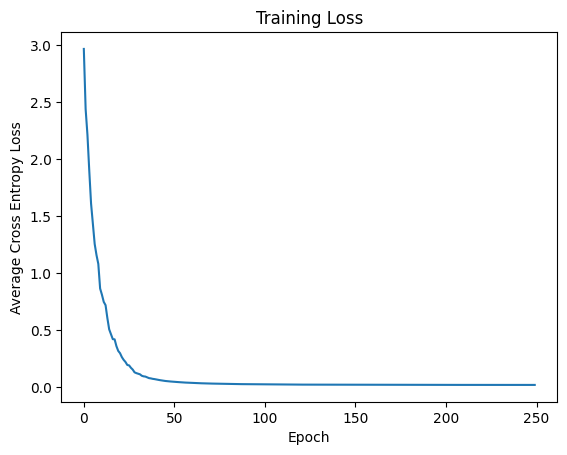

    learning_rate  HIDDEN_SIZE  gradient_steps  validation_accuracy
0            0.13           32             250  0.48479329812420324
1            0.15           32             250  0.31032598798033145
2            0.16           32             250  0.30504461846658165
3            0.13           64             250   0.9901657257330176
4            0.15           64             250   0.9832453105081042
5            0.16           64             250   0.9788745219450009
6            0.13          128             250   0.9998178838098707
7            0.15          128             250   0.9978146057184484
8            0.16          128             250   0.9994536514296121
9            0.13          256             250                  1.0
10           0.15          256             250   0.9998178838098707
11           0.16          256             250                  1.0
Best validation accuracy is 1.0 with parameters {'HIDDEN_SIZE': 256, 'gradient_steps': 250, 'learning_rate': 0.13}


  0%|          | 1/250 [00:01<04:42,  1.13s/it]

Epoch 1/250, Loss: 2.9046


  1%|          | 2/250 [00:02<04:41,  1.13s/it]

Epoch 2/250, Loss: 2.3007


  1%|          | 3/250 [00:03<04:40,  1.13s/it]

Epoch 3/250, Loss: 1.9111


  2%|▏         | 4/250 [00:04<04:38,  1.13s/it]

Epoch 4/250, Loss: 1.6427


  2%|▏         | 5/250 [00:05<04:37,  1.13s/it]

Epoch 5/250, Loss: 1.3636


  2%|▏         | 6/250 [00:06<04:36,  1.13s/it]

Epoch 6/250, Loss: 1.2057


  3%|▎         | 7/250 [00:07<04:35,  1.13s/it]

Epoch 7/250, Loss: 1.0584


  3%|▎         | 8/250 [00:09<04:34,  1.13s/it]

Epoch 8/250, Loss: 0.8932


  4%|▎         | 9/250 [00:10<04:33,  1.13s/it]

Epoch 9/250, Loss: 0.8250


  4%|▍         | 10/250 [00:11<04:32,  1.14s/it]

Epoch 10/250, Loss: 0.7880


  4%|▍         | 11/250 [00:12<04:31,  1.14s/it]

Epoch 11/250, Loss: 0.6444


  5%|▍         | 12/250 [00:13<04:30,  1.14s/it]

Epoch 12/250, Loss: 0.5174


  5%|▌         | 13/250 [00:14<04:29,  1.14s/it]

Epoch 13/250, Loss: 0.4821


  6%|▌         | 14/250 [00:15<04:27,  1.14s/it]

Epoch 14/250, Loss: 0.4596


  6%|▌         | 15/250 [00:17<04:26,  1.13s/it]

Epoch 15/250, Loss: 0.3835


  6%|▋         | 16/250 [00:18<04:25,  1.13s/it]

Epoch 16/250, Loss: 0.3258


  7%|▋         | 17/250 [00:19<04:24,  1.13s/it]

Epoch 17/250, Loss: 0.3095


  7%|▋         | 18/250 [00:20<04:23,  1.13s/it]

Epoch 18/250, Loss: 0.2726


  8%|▊         | 19/250 [00:21<04:22,  1.13s/it]

Epoch 19/250, Loss: 0.2377


  8%|▊         | 20/250 [00:22<04:21,  1.14s/it]

Epoch 20/250, Loss: 0.2126


  8%|▊         | 21/250 [00:23<04:20,  1.14s/it]

Epoch 21/250, Loss: 0.1983


  9%|▉         | 22/250 [00:24<04:19,  1.14s/it]

Epoch 22/250, Loss: 0.1846


  9%|▉         | 23/250 [00:26<04:18,  1.14s/it]

Epoch 23/250, Loss: 0.1586


 10%|▉         | 24/250 [00:27<04:16,  1.14s/it]

Epoch 24/250, Loss: 0.1477


 10%|█         | 25/250 [00:28<04:15,  1.14s/it]

Epoch 25/250, Loss: 0.1361


 10%|█         | 26/250 [00:29<04:14,  1.14s/it]

Epoch 26/250, Loss: 0.1226


 11%|█         | 27/250 [00:30<04:13,  1.14s/it]

Epoch 27/250, Loss: 0.1150


 11%|█         | 28/250 [00:31<04:12,  1.14s/it]

Epoch 28/250, Loss: 0.1069


 12%|█▏        | 29/250 [00:32<04:11,  1.14s/it]

Epoch 29/250, Loss: 0.1012


 12%|█▏        | 30/250 [00:34<04:09,  1.14s/it]

Epoch 30/250, Loss: 0.0944


 12%|█▏        | 31/250 [00:35<04:08,  1.14s/it]

Epoch 31/250, Loss: 0.0897


 13%|█▎        | 32/250 [00:36<04:07,  1.14s/it]

Epoch 32/250, Loss: 0.0846


 13%|█▎        | 33/250 [00:37<04:06,  1.14s/it]

Epoch 33/250, Loss: 0.0804


 14%|█▎        | 34/250 [00:38<04:05,  1.14s/it]

Epoch 34/250, Loss: 0.0766


 14%|█▍        | 35/250 [00:39<04:04,  1.14s/it]

Epoch 35/250, Loss: 0.0742


 14%|█▍        | 36/250 [00:40<04:02,  1.14s/it]

Epoch 36/250, Loss: 0.0706


 15%|█▍        | 37/250 [00:42<04:01,  1.14s/it]

Epoch 37/250, Loss: 0.0679


 15%|█▌        | 38/250 [00:43<04:00,  1.14s/it]

Epoch 38/250, Loss: 0.0654


 16%|█▌        | 39/250 [00:44<03:59,  1.14s/it]

Epoch 39/250, Loss: 0.0631


 16%|█▌        | 40/250 [00:45<03:58,  1.13s/it]

Epoch 40/250, Loss: 0.0607


 16%|█▋        | 41/250 [00:46<03:57,  1.14s/it]

Epoch 41/250, Loss: 0.0590


 17%|█▋        | 42/250 [00:47<03:55,  1.13s/it]

Epoch 42/250, Loss: 0.0571


 17%|█▋        | 43/250 [00:48<03:54,  1.13s/it]

Epoch 43/250, Loss: 0.0556


 18%|█▊        | 44/250 [00:49<03:53,  1.14s/it]

Epoch 44/250, Loss: 0.0541


 18%|█▊        | 45/250 [00:51<03:52,  1.14s/it]

Epoch 45/250, Loss: 0.0524


 18%|█▊        | 46/250 [00:52<03:51,  1.14s/it]

Epoch 46/250, Loss: 0.0513


 19%|█▉        | 47/250 [00:53<03:50,  1.14s/it]

Epoch 47/250, Loss: 0.0500


 19%|█▉        | 48/250 [00:54<03:49,  1.13s/it]

Epoch 48/250, Loss: 0.0488


 20%|█▉        | 49/250 [00:55<03:47,  1.13s/it]

Epoch 49/250, Loss: 0.0477


 20%|██        | 50/250 [00:56<03:46,  1.13s/it]

Epoch 50/250, Loss: 0.0469


 20%|██        | 51/250 [00:57<03:45,  1.13s/it]

Epoch 51/250, Loss: 0.0458


 21%|██        | 52/250 [00:59<03:44,  1.13s/it]

Epoch 52/250, Loss: 0.0450


 21%|██        | 53/250 [01:00<03:43,  1.13s/it]

Epoch 53/250, Loss: 0.0442


 22%|██▏       | 54/250 [01:01<03:42,  1.13s/it]

Epoch 54/250, Loss: 0.0436


 22%|██▏       | 55/250 [01:02<03:41,  1.13s/it]

Epoch 55/250, Loss: 0.0427


 22%|██▏       | 56/250 [01:03<03:40,  1.14s/it]

Epoch 56/250, Loss: 0.0419


 23%|██▎       | 57/250 [01:04<03:39,  1.14s/it]

Epoch 57/250, Loss: 0.0413


 23%|██▎       | 58/250 [01:05<03:38,  1.14s/it]

Epoch 58/250, Loss: 0.0407


 24%|██▎       | 59/250 [01:06<03:36,  1.14s/it]

Epoch 59/250, Loss: 0.0401


 24%|██▍       | 60/250 [01:08<03:35,  1.14s/it]

Epoch 60/250, Loss: 0.0395


 24%|██▍       | 61/250 [01:09<03:34,  1.14s/it]

Epoch 61/250, Loss: 0.0390


 25%|██▍       | 62/250 [01:10<03:33,  1.14s/it]

Epoch 62/250, Loss: 0.0385


 25%|██▌       | 63/250 [01:11<03:32,  1.14s/it]

Epoch 63/250, Loss: 0.0380


 26%|██▌       | 64/250 [01:12<03:31,  1.14s/it]

Epoch 64/250, Loss: 0.0375


 26%|██▌       | 65/250 [01:13<03:30,  1.14s/it]

Epoch 65/250, Loss: 0.0372


 26%|██▋       | 66/250 [01:14<03:28,  1.14s/it]

Epoch 66/250, Loss: 0.0368


 27%|██▋       | 67/250 [01:16<03:28,  1.14s/it]

Epoch 67/250, Loss: 0.0363


 27%|██▋       | 68/250 [01:17<03:27,  1.14s/it]

Epoch 68/250, Loss: 0.0360


 28%|██▊       | 69/250 [01:18<03:25,  1.14s/it]

Epoch 69/250, Loss: 0.0357


 28%|██▊       | 70/250 [01:19<03:24,  1.14s/it]

Epoch 70/250, Loss: 0.0353


 28%|██▊       | 71/250 [01:20<03:23,  1.14s/it]

Epoch 71/250, Loss: 0.0350


 29%|██▉       | 72/250 [01:21<03:22,  1.14s/it]

Epoch 72/250, Loss: 0.0347


 29%|██▉       | 73/250 [01:22<03:20,  1.14s/it]

Epoch 73/250, Loss: 0.0344


 30%|██▉       | 74/250 [01:24<03:19,  1.14s/it]

Epoch 74/250, Loss: 0.0343


 30%|███       | 75/250 [01:25<03:18,  1.14s/it]

Epoch 75/250, Loss: 0.0339


 30%|███       | 76/250 [01:26<03:17,  1.14s/it]

Epoch 76/250, Loss: 0.0337


 31%|███       | 77/250 [01:27<03:16,  1.14s/it]

Epoch 77/250, Loss: 0.0333


 31%|███       | 78/250 [01:28<03:15,  1.14s/it]

Epoch 78/250, Loss: 0.0331


 32%|███▏      | 79/250 [01:29<03:14,  1.14s/it]

Epoch 79/250, Loss: 0.0328


 32%|███▏      | 80/250 [01:30<03:13,  1.14s/it]

Epoch 80/250, Loss: 0.0326


 32%|███▏      | 81/250 [01:31<03:12,  1.14s/it]

Epoch 81/250, Loss: 0.0324


 33%|███▎      | 82/250 [01:33<03:10,  1.14s/it]

Epoch 82/250, Loss: 0.0322


 33%|███▎      | 83/250 [01:34<03:09,  1.14s/it]

Epoch 83/250, Loss: 0.0320


 34%|███▎      | 84/250 [01:35<03:08,  1.14s/it]

Epoch 84/250, Loss: 0.0319


 34%|███▍      | 85/250 [01:36<03:07,  1.14s/it]

Epoch 85/250, Loss: 0.0316


 34%|███▍      | 86/250 [01:37<03:06,  1.14s/it]

Epoch 86/250, Loss: 0.0315


 35%|███▍      | 87/250 [01:38<03:05,  1.14s/it]

Epoch 87/250, Loss: 0.0313


 35%|███▌      | 88/250 [01:39<03:03,  1.14s/it]

Epoch 88/250, Loss: 0.0311


 36%|███▌      | 89/250 [01:41<03:03,  1.14s/it]

Epoch 89/250, Loss: 0.0310


 36%|███▌      | 90/250 [01:42<03:01,  1.14s/it]

Epoch 90/250, Loss: 0.0309


 36%|███▋      | 91/250 [01:43<03:00,  1.14s/it]

Epoch 91/250, Loss: 0.0307


 37%|███▋      | 92/250 [01:44<02:59,  1.14s/it]

Epoch 92/250, Loss: 0.0305


 37%|███▋      | 93/250 [01:45<02:58,  1.14s/it]

Epoch 93/250, Loss: 0.0304


 38%|███▊      | 94/250 [01:46<02:57,  1.14s/it]

Epoch 94/250, Loss: 0.0303


 38%|███▊      | 95/250 [01:47<02:56,  1.14s/it]

Epoch 95/250, Loss: 0.0302


 38%|███▊      | 96/250 [01:49<02:54,  1.14s/it]

Epoch 96/250, Loss: 0.0300


 39%|███▉      | 97/250 [01:50<02:53,  1.14s/it]

Epoch 97/250, Loss: 0.0299


 39%|███▉      | 98/250 [01:51<02:52,  1.14s/it]

Epoch 98/250, Loss: 0.0298


 40%|███▉      | 99/250 [01:52<02:51,  1.14s/it]

Epoch 99/250, Loss: 0.0297


 40%|████      | 100/250 [01:53<02:50,  1.14s/it]

Epoch 100/250, Loss: 0.0296


 40%|████      | 101/250 [01:54<02:49,  1.14s/it]

Epoch 101/250, Loss: 0.0296


 41%|████      | 102/250 [01:55<02:48,  1.14s/it]

Epoch 102/250, Loss: 0.0295


 41%|████      | 103/250 [01:56<02:47,  1.14s/it]

Epoch 103/250, Loss: 0.0293


 42%|████▏     | 104/250 [01:58<02:45,  1.14s/it]

Epoch 104/250, Loss: 0.0292


 42%|████▏     | 105/250 [01:59<02:44,  1.14s/it]

Epoch 105/250, Loss: 0.0292


 42%|████▏     | 106/250 [02:00<02:43,  1.14s/it]

Epoch 106/250, Loss: 0.0291


 43%|████▎     | 107/250 [02:01<02:42,  1.14s/it]

Epoch 107/250, Loss: 0.0290


 43%|████▎     | 108/250 [02:02<02:41,  1.14s/it]

Epoch 108/250, Loss: 0.0289


 44%|████▎     | 109/250 [02:03<02:40,  1.14s/it]

Epoch 109/250, Loss: 0.0288


 44%|████▍     | 110/250 [02:04<02:39,  1.14s/it]

Epoch 110/250, Loss: 0.0288


 44%|████▍     | 111/250 [02:06<02:37,  1.14s/it]

Epoch 111/250, Loss: 0.0287


 45%|████▍     | 112/250 [02:07<02:37,  1.14s/it]

Epoch 112/250, Loss: 0.0287


 45%|████▌     | 113/250 [02:08<02:35,  1.14s/it]

Epoch 113/250, Loss: 0.0286


 46%|████▌     | 114/250 [02:09<02:34,  1.14s/it]

Epoch 114/250, Loss: 0.0284


 46%|████▌     | 115/250 [02:10<02:33,  1.14s/it]

Epoch 115/250, Loss: 0.0284


 46%|████▋     | 116/250 [02:11<02:32,  1.14s/it]

Epoch 116/250, Loss: 0.0284


 47%|████▋     | 117/250 [02:12<02:31,  1.14s/it]

Epoch 117/250, Loss: 0.0284


 47%|████▋     | 118/250 [02:14<02:30,  1.14s/it]

Epoch 118/250, Loss: 0.0282


 48%|████▊     | 119/250 [02:15<02:28,  1.14s/it]

Epoch 119/250, Loss: 0.0282


 48%|████▊     | 120/250 [02:16<02:27,  1.14s/it]

Epoch 120/250, Loss: 0.0281


 48%|████▊     | 121/250 [02:17<02:26,  1.14s/it]

Epoch 121/250, Loss: 0.0281


 49%|████▉     | 122/250 [02:18<02:25,  1.14s/it]

Epoch 122/250, Loss: 0.0280


 49%|████▉     | 123/250 [02:19<02:24,  1.14s/it]

Epoch 123/250, Loss: 0.0280


 50%|████▉     | 124/250 [02:20<02:23,  1.14s/it]

Epoch 124/250, Loss: 0.0280


 50%|█████     | 125/250 [02:21<02:22,  1.14s/it]

Epoch 125/250, Loss: 0.0279


 50%|█████     | 126/250 [02:23<02:20,  1.14s/it]

Epoch 126/250, Loss: 0.0278


 51%|█████     | 127/250 [02:24<02:19,  1.14s/it]

Epoch 127/250, Loss: 0.0278


 51%|█████     | 128/250 [02:25<02:18,  1.14s/it]

Epoch 128/250, Loss: 0.0278


 52%|█████▏    | 129/250 [02:26<02:17,  1.14s/it]

Epoch 129/250, Loss: 0.0277


 52%|█████▏    | 130/250 [02:27<02:16,  1.14s/it]

Epoch 130/250, Loss: 0.0277


 52%|█████▏    | 131/250 [02:28<02:15,  1.14s/it]

Epoch 131/250, Loss: 0.0277


 53%|█████▎    | 132/250 [02:29<02:14,  1.14s/it]

Epoch 132/250, Loss: 0.0276


 53%|█████▎    | 133/250 [02:31<02:14,  1.15s/it]

Epoch 133/250, Loss: 0.0276


 54%|█████▎    | 134/250 [02:32<02:13,  1.15s/it]

Epoch 134/250, Loss: 0.0275


 54%|█████▍    | 135/250 [02:33<02:13,  1.16s/it]

Epoch 135/250, Loss: 0.0275


 54%|█████▍    | 136/250 [02:34<02:13,  1.17s/it]

Epoch 136/250, Loss: 0.0275


 55%|█████▍    | 137/250 [02:35<02:11,  1.16s/it]

Epoch 137/250, Loss: 0.0274


 55%|█████▌    | 138/250 [02:36<02:11,  1.18s/it]

Epoch 138/250, Loss: 0.0274


 56%|█████▌    | 139/250 [02:38<02:09,  1.17s/it]

Epoch 139/250, Loss: 0.0274


 56%|█████▌    | 140/250 [02:39<02:07,  1.16s/it]

Epoch 140/250, Loss: 0.0274


 56%|█████▋    | 141/250 [02:40<02:05,  1.15s/it]

Epoch 141/250, Loss: 0.0274


 57%|█████▋    | 142/250 [02:41<02:03,  1.15s/it]

Epoch 142/250, Loss: 0.0273


 57%|█████▋    | 143/250 [02:42<02:02,  1.14s/it]

Epoch 143/250, Loss: 0.0272


 58%|█████▊    | 144/250 [02:43<02:00,  1.14s/it]

Epoch 144/250, Loss: 0.0272


 58%|█████▊    | 145/250 [02:44<01:59,  1.14s/it]

Epoch 145/250, Loss: 0.0272


 58%|█████▊    | 146/250 [02:46<01:58,  1.14s/it]

Epoch 146/250, Loss: 0.0272


 59%|█████▉    | 147/250 [02:47<01:57,  1.14s/it]

Epoch 147/250, Loss: 0.0272


 59%|█████▉    | 148/250 [02:48<01:56,  1.14s/it]

Epoch 148/250, Loss: 0.0272


 60%|█████▉    | 149/250 [02:49<01:54,  1.14s/it]

Epoch 149/250, Loss: 0.0271


 60%|██████    | 150/250 [02:50<01:53,  1.14s/it]

Epoch 150/250, Loss: 0.0271


 60%|██████    | 151/250 [02:51<01:52,  1.14s/it]

Epoch 151/250, Loss: 0.0272


 61%|██████    | 152/250 [02:52<01:51,  1.14s/it]

Epoch 152/250, Loss: 0.0271


 61%|██████    | 153/250 [02:54<01:50,  1.14s/it]

Epoch 153/250, Loss: 0.0271


 62%|██████▏   | 154/250 [02:55<01:49,  1.14s/it]

Epoch 154/250, Loss: 0.0271


 62%|██████▏   | 155/250 [02:56<01:47,  1.14s/it]

Epoch 155/250, Loss: 0.0270


 62%|██████▏   | 156/250 [02:57<01:46,  1.14s/it]

Epoch 156/250, Loss: 0.0271


 63%|██████▎   | 157/250 [02:58<01:45,  1.14s/it]

Epoch 157/250, Loss: 0.0270


 63%|██████▎   | 158/250 [02:59<01:44,  1.14s/it]

Epoch 158/250, Loss: 0.0270


 64%|██████▎   | 159/250 [03:00<01:43,  1.14s/it]

Epoch 159/250, Loss: 0.0269


 64%|██████▍   | 160/250 [03:02<01:42,  1.14s/it]

Epoch 160/250, Loss: 0.0270


 64%|██████▍   | 161/250 [03:03<01:41,  1.14s/it]

Epoch 161/250, Loss: 0.0270


 65%|██████▍   | 162/250 [03:04<01:39,  1.14s/it]

Epoch 162/250, Loss: 0.0270


 65%|██████▌   | 163/250 [03:05<01:38,  1.14s/it]

Epoch 163/250, Loss: 0.0269


 66%|██████▌   | 164/250 [03:06<01:37,  1.14s/it]

Epoch 164/250, Loss: 0.0269


 66%|██████▌   | 165/250 [03:07<01:36,  1.14s/it]

Epoch 165/250, Loss: 0.0269


 66%|██████▋   | 166/250 [03:08<01:35,  1.14s/it]

Epoch 166/250, Loss: 0.0269


 67%|██████▋   | 167/250 [03:09<01:34,  1.14s/it]

Epoch 167/250, Loss: 0.0268


 67%|██████▋   | 168/250 [03:11<01:33,  1.14s/it]

Epoch 168/250, Loss: 0.0268


 68%|██████▊   | 169/250 [03:12<01:32,  1.14s/it]

Epoch 169/250, Loss: 0.0269


 68%|██████▊   | 170/250 [03:13<01:30,  1.14s/it]

Epoch 170/250, Loss: 0.0269


 68%|██████▊   | 171/250 [03:14<01:29,  1.14s/it]

Epoch 171/250, Loss: 0.0268


 69%|██████▉   | 172/250 [03:15<01:28,  1.14s/it]

Epoch 172/250, Loss: 0.0268


 69%|██████▉   | 173/250 [03:16<01:27,  1.14s/it]

Epoch 173/250, Loss: 0.0267


 70%|██████▉   | 174/250 [03:17<01:26,  1.14s/it]

Epoch 174/250, Loss: 0.0268


 70%|███████   | 175/250 [03:19<01:25,  1.14s/it]

Epoch 175/250, Loss: 0.0268


 70%|███████   | 176/250 [03:20<01:24,  1.14s/it]

Epoch 176/250, Loss: 0.0268


 71%|███████   | 177/250 [03:21<01:22,  1.14s/it]

Epoch 177/250, Loss: 0.0268


 71%|███████   | 178/250 [03:22<01:21,  1.14s/it]

Epoch 178/250, Loss: 0.0267


 72%|███████▏  | 179/250 [03:23<01:20,  1.14s/it]

Epoch 179/250, Loss: 0.0267


 72%|███████▏  | 180/250 [03:24<01:19,  1.14s/it]

Epoch 180/250, Loss: 0.0267


 72%|███████▏  | 181/250 [03:25<01:18,  1.14s/it]

Epoch 181/250, Loss: 0.0267


 73%|███████▎  | 182/250 [03:26<01:17,  1.14s/it]

Epoch 182/250, Loss: 0.0267


 73%|███████▎  | 183/250 [03:28<01:16,  1.14s/it]

Epoch 183/250, Loss: 0.0267


 74%|███████▎  | 184/250 [03:29<01:14,  1.14s/it]

Epoch 184/250, Loss: 0.0267


 74%|███████▍  | 185/250 [03:30<01:13,  1.14s/it]

Epoch 185/250, Loss: 0.0267


 74%|███████▍  | 186/250 [03:31<01:12,  1.14s/it]

Epoch 186/250, Loss: 0.0267


 75%|███████▍  | 187/250 [03:32<01:11,  1.14s/it]

Epoch 187/250, Loss: 0.0267


 75%|███████▌  | 188/250 [03:33<01:10,  1.14s/it]

Epoch 188/250, Loss: 0.0267


 76%|███████▌  | 189/250 [03:34<01:09,  1.14s/it]

Epoch 189/250, Loss: 0.0266


 76%|███████▌  | 190/250 [03:36<01:08,  1.14s/it]

Epoch 190/250, Loss: 0.0267


 76%|███████▋  | 191/250 [03:37<01:07,  1.14s/it]

Epoch 191/250, Loss: 0.0266


 77%|███████▋  | 192/250 [03:38<01:05,  1.14s/it]

Epoch 192/250, Loss: 0.0266


 77%|███████▋  | 193/250 [03:39<01:04,  1.14s/it]

Epoch 193/250, Loss: 0.0267


 78%|███████▊  | 194/250 [03:40<01:03,  1.14s/it]

Epoch 194/250, Loss: 0.0267


 78%|███████▊  | 195/250 [03:41<01:02,  1.14s/it]

Epoch 195/250, Loss: 0.0267


 78%|███████▊  | 196/250 [03:42<01:01,  1.14s/it]

Epoch 196/250, Loss: 0.0266


 79%|███████▉  | 197/250 [03:44<01:00,  1.14s/it]

Epoch 197/250, Loss: 0.0266


 79%|███████▉  | 198/250 [03:45<00:59,  1.14s/it]

Epoch 198/250, Loss: 0.0266


 80%|███████▉  | 199/250 [03:46<00:57,  1.14s/it]

Epoch 199/250, Loss: 0.0267


 80%|████████  | 200/250 [03:47<00:56,  1.14s/it]

Epoch 200/250, Loss: 0.0266


 80%|████████  | 201/250 [03:48<00:55,  1.14s/it]

Epoch 201/250, Loss: 0.0266


 81%|████████  | 202/250 [03:49<00:54,  1.14s/it]

Epoch 202/250, Loss: 0.0266


 81%|████████  | 203/250 [03:50<00:53,  1.14s/it]

Epoch 203/250, Loss: 0.0266


 82%|████████▏ | 204/250 [03:51<00:52,  1.14s/it]

Epoch 204/250, Loss: 0.0266


 82%|████████▏ | 205/250 [03:53<00:51,  1.14s/it]

Epoch 205/250, Loss: 0.0266


 82%|████████▏ | 206/250 [03:54<00:50,  1.14s/it]

Epoch 206/250, Loss: 0.0266


 83%|████████▎ | 207/250 [03:55<00:48,  1.14s/it]

Epoch 207/250, Loss: 0.0266


 83%|████████▎ | 208/250 [03:56<00:47,  1.14s/it]

Epoch 208/250, Loss: 0.0266


 84%|████████▎ | 209/250 [03:57<00:46,  1.14s/it]

Epoch 209/250, Loss: 0.0266


 84%|████████▍ | 210/250 [03:58<00:45,  1.14s/it]

Epoch 210/250, Loss: 0.0265


 84%|████████▍ | 211/250 [03:59<00:44,  1.14s/it]

Epoch 211/250, Loss: 0.0266


 85%|████████▍ | 212/250 [04:01<00:43,  1.14s/it]

Epoch 212/250, Loss: 0.0265


 85%|████████▌ | 213/250 [04:02<00:42,  1.14s/it]

Epoch 213/250, Loss: 0.0266


 86%|████████▌ | 214/250 [04:03<00:40,  1.14s/it]

Epoch 214/250, Loss: 0.0265


 86%|████████▌ | 215/250 [04:04<00:39,  1.14s/it]

Epoch 215/250, Loss: 0.0266


 86%|████████▋ | 216/250 [04:05<00:38,  1.14s/it]

Epoch 216/250, Loss: 0.0265


 87%|████████▋ | 217/250 [04:06<00:37,  1.14s/it]

Epoch 217/250, Loss: 0.0265


 87%|████████▋ | 218/250 [04:07<00:36,  1.14s/it]

Epoch 218/250, Loss: 0.0265


 88%|████████▊ | 219/250 [04:09<00:35,  1.14s/it]

Epoch 219/250, Loss: 0.0266


 88%|████████▊ | 220/250 [04:10<00:34,  1.14s/it]

Epoch 220/250, Loss: 0.0265


 88%|████████▊ | 221/250 [04:11<00:32,  1.14s/it]

Epoch 221/250, Loss: 0.0266


 89%|████████▉ | 222/250 [04:12<00:31,  1.14s/it]

Epoch 222/250, Loss: 0.0265


 89%|████████▉ | 223/250 [04:13<00:30,  1.14s/it]

Epoch 223/250, Loss: 0.0265


 90%|████████▉ | 224/250 [04:14<00:29,  1.14s/it]

Epoch 224/250, Loss: 0.0265


 90%|█████████ | 225/250 [04:15<00:28,  1.14s/it]

Epoch 225/250, Loss: 0.0265


 90%|█████████ | 226/250 [04:16<00:27,  1.14s/it]

Epoch 226/250, Loss: 0.0265


 91%|█████████ | 227/250 [04:18<00:26,  1.14s/it]

Epoch 227/250, Loss: 0.0265


 91%|█████████ | 228/250 [04:19<00:25,  1.14s/it]

Epoch 228/250, Loss: 0.0265


 92%|█████████▏| 229/250 [04:20<00:23,  1.14s/it]

Epoch 229/250, Loss: 0.0265


 92%|█████████▏| 230/250 [04:21<00:22,  1.14s/it]

Epoch 230/250, Loss: 0.0265


 92%|█████████▏| 231/250 [04:22<00:21,  1.14s/it]

Epoch 231/250, Loss: 0.0265


 93%|█████████▎| 232/250 [04:23<00:20,  1.14s/it]

Epoch 232/250, Loss: 0.0265


 93%|█████████▎| 233/250 [04:24<00:19,  1.14s/it]

Epoch 233/250, Loss: 0.0265


 94%|█████████▎| 234/250 [04:26<00:18,  1.14s/it]

Epoch 234/250, Loss: 0.0265


 94%|█████████▍| 235/250 [04:27<00:17,  1.14s/it]

Epoch 235/250, Loss: 0.0265


 94%|█████████▍| 236/250 [04:28<00:15,  1.14s/it]

Epoch 236/250, Loss: 0.0265


 95%|█████████▍| 237/250 [04:29<00:14,  1.14s/it]

Epoch 237/250, Loss: 0.0265


 95%|█████████▌| 238/250 [04:30<00:13,  1.14s/it]

Epoch 238/250, Loss: 0.0265


 96%|█████████▌| 239/250 [04:31<00:12,  1.14s/it]

Epoch 239/250, Loss: 0.0265


 96%|█████████▌| 240/250 [04:32<00:11,  1.14s/it]

Epoch 240/250, Loss: 0.0265


 96%|█████████▋| 241/250 [04:34<00:10,  1.14s/it]

Epoch 241/250, Loss: 0.0266


 97%|█████████▋| 242/250 [04:35<00:09,  1.14s/it]

Epoch 242/250, Loss: 0.0265


 97%|█████████▋| 243/250 [04:36<00:07,  1.14s/it]

Epoch 243/250, Loss: 0.0265


 98%|█████████▊| 244/250 [04:37<00:06,  1.14s/it]

Epoch 244/250, Loss: 0.0265


 98%|█████████▊| 245/250 [04:38<00:05,  1.14s/it]

Epoch 245/250, Loss: 0.0265


 98%|█████████▊| 246/250 [04:39<00:04,  1.14s/it]

Epoch 246/250, Loss: 0.0265


 99%|█████████▉| 247/250 [04:40<00:03,  1.14s/it]

Epoch 247/250, Loss: 0.0265


 99%|█████████▉| 248/250 [04:41<00:02,  1.14s/it]

Epoch 248/250, Loss: 0.0265


100%|█████████▉| 249/250 [04:43<00:01,  1.14s/it]

Epoch 249/250, Loss: 0.0264


100%|██████████| 250/250 [04:44<00:00,  1.14s/it]

Epoch 250/250, Loss: 0.0264


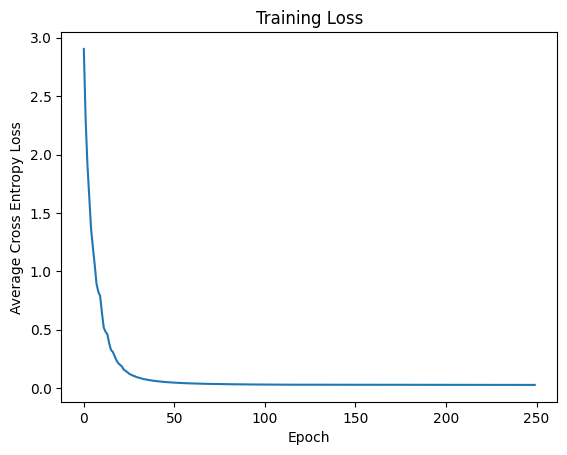

Final test accuracy with best parameters is 0.7745398773006135


In [ ]:
import pandas as pd
import cupy as cp
from sklearn.model_selection import ParameterGrid, train_test_split


# Define the parameter grid
param_grid = {
    'learning_rate': [0.13, 0.15, 0.16],
    'HIDDEN_SIZE': [32, 64, 128, 256],
    'gradient_steps': [250]
}

# Create a grid of parameter combinations
grid = ParameterGrid(param_grid)

# Track the best performance
best_validation_accuracy = 0
best_params = {}
results = []

for params in grid:
    HIDDEN_SIZE = params['HIDDEN_SIZE']
    lr = params['learning_rate']
    n_features = X_train.shape[-1]
    gradient_steps = params['gradient_steps']

    mlp = MLP(
        LinearLayer(n_features, HIDDEN_SIZE),
        ActivationLayer(),
        LinearLayer(HIDDEN_SIZE, 25),
        SoftmaxOutputLayer()
    )

    opt = GradientDescentOptimizer(lr=lr)
    opt.attach_network(mlp)

    mlp.fit(opt, X=X_train, y=y_train, epochs=gradient_steps, batch_size=200)

    validation_prediction = mlp.predict(X_test)
    validation_accuracy_score = mlp.evaluate_acc(validation_prediction, y_test)

    if validation_accuracy_score > best_validation_accuracy:
        best_validation_accuracy = validation_accuracy_score
        best_params = params

    results.append({
        'learning_rate': lr,
        'HIDDEN_SIZE': HIDDEN_SIZE,
        'gradient_steps': gradient_steps,
        'validation_accuracy': validation_accuracy_score,
    })

results_df = pd.DataFrame(results)
print(results_df)

print(f"Best validation accuracy is {best_validation_accuracy} with parameters {best_params}")

best_HIDDEN_SIZE = best_params['HIDDEN_SIZE']
best_lr = best_params['learning_rate']
best_gradient_steps = best_params['gradient_steps']

mlp_final = MLP(
    LinearLayer(n_features, best_HIDDEN_SIZE),
    ActivationLayer(),
    LinearLayer(best_HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)

opt_final = GradientDescentOptimizer(lr=best_lr)
opt_final.attach_network(mlp_final)

y_MNIST_normalized = cp.asarray(y_MNIST_normalized)
test_label = cp.asarray(test_label)


mlp_final.fit(opt_final, X=X_total, y=y_total, epochs=best_gradient_steps, batch_size=200)

final_test_prediction = mlp_final.predict(y_MNIST_normalized)
final_test_accuracy = mlp_final.evaluate_acc(final_test_prediction, test_label)

print(f"Final test accuracy with best parameters is {final_test_accuracy}")


# Setting up MNIST with only linear and softmax


  0%|          | 1/500 [00:00<02:16,  3.65it/s]

Epoch 1/500, Loss: 2.8177, Accuracy: 0.2505


  1%|          | 3/500 [00:00<01:43,  4.79it/s]

Epoch 2/500, Loss: 2.1647, Accuracy: 0.4447
Epoch 3/500, Loss: 1.8500, Accuracy: 0.5283


  1%|          | 5/500 [00:01<01:41,  4.90it/s]

Epoch 4/500, Loss: 1.6457, Accuracy: 0.5770
Epoch 5/500, Loss: 1.5142, Accuracy: 0.6367


  1%|          | 6/500 [00:01<01:41,  4.87it/s]

Epoch 6/500, Loss: 1.3982, Accuracy: 0.6844


  2%|▏         | 8/500 [00:01<01:41,  4.84it/s]

Epoch 7/500, Loss: 1.3136, Accuracy: 0.6111
Epoch 8/500, Loss: 1.2401, Accuracy: 0.7055


  2%|▏         | 9/500 [00:01<01:45,  4.64it/s]

Epoch 9/500, Loss: 1.1802, Accuracy: 0.6998


  2%|▏         | 11/500 [00:02<01:41,  4.84it/s]

Epoch 10/500, Loss: 1.1174, Accuracy: 0.7245
Epoch 11/500, Loss: 1.0751, Accuracy: 0.7539


  2%|▏         | 12/500 [00:02<01:38,  4.93it/s]

Epoch 12/500, Loss: 1.0379, Accuracy: 0.7670


  3%|▎         | 13/500 [00:02<01:41,  4.80it/s]

Epoch 13/500, Loss: 1.0025, Accuracy: 0.7552


  3%|▎         | 15/500 [00:03<01:54,  4.24it/s]

Epoch 14/500, Loss: 0.9751, Accuracy: 0.7639
Epoch 15/500, Loss: 0.9504, Accuracy: 0.7859


  3%|▎         | 16/500 [00:03<01:51,  4.34it/s]

Epoch 16/500, Loss: 0.9191, Accuracy: 0.7757


  3%|▎         | 17/500 [00:03<02:05,  3.85it/s]

Epoch 17/500, Loss: 0.8997, Accuracy: 0.8072


  4%|▎         | 18/500 [00:04<02:00,  3.99it/s]

Epoch 18/500, Loss: 0.8760, Accuracy: 0.8010


  4%|▍         | 19/500 [00:04<02:25,  3.30it/s]

Epoch 19/500, Loss: 0.8501, Accuracy: 0.8186


  4%|▍         | 20/500 [00:04<02:50,  2.81it/s]

Epoch 20/500, Loss: 0.8312, Accuracy: 0.8161


  4%|▍         | 21/500 [00:05<02:34,  3.09it/s]

Epoch 21/500, Loss: 0.8162, Accuracy: 0.8349


  4%|▍         | 22/500 [00:05<02:21,  3.37it/s]

Epoch 22/500, Loss: 0.7976, Accuracy: 0.8184


  5%|▍         | 23/500 [00:05<02:15,  3.51it/s]

Epoch 23/500, Loss: 0.7851, Accuracy: 0.8266


  5%|▍         | 24/500 [00:06<02:15,  3.50it/s]

Epoch 24/500, Loss: 0.7704, Accuracy: 0.8430


  5%|▌         | 25/500 [00:06<02:05,  3.78it/s]

Epoch 25/500, Loss: 0.7555, Accuracy: 0.8319


  5%|▌         | 26/500 [00:06<02:07,  3.71it/s]

Epoch 26/500, Loss: 0.7441, Accuracy: 0.8405
Epoch 27/500, Loss: 0.7331, Accuracy: 0.8535


  6%|▌         | 28/500 [00:06<01:48,  4.37it/s]

Epoch 28/500, Loss: 0.7188, Accuracy: 0.8516


  6%|▌         | 30/500 [00:07<01:38,  4.75it/s]

Epoch 29/500, Loss: 0.7079, Accuracy: 0.8443
Epoch 30/500, Loss: 0.6991, Accuracy: 0.8621


  6%|▋         | 32/500 [00:07<01:31,  5.12it/s]

Epoch 31/500, Loss: 0.6882, Accuracy: 0.8532
Epoch 32/500, Loss: 0.6796, Accuracy: 0.8611


  7%|▋         | 33/500 [00:07<01:44,  4.48it/s]

Epoch 33/500, Loss: 0.6719, Accuracy: 0.8580


  7%|▋         | 34/500 [00:08<01:47,  4.33it/s]

Epoch 34/500, Loss: 0.6627, Accuracy: 0.8639
Epoch 35/500, Loss: 0.6541, Accuracy: 0.8630


  7%|▋         | 36/500 [00:08<01:57,  3.94it/s]

Epoch 36/500, Loss: 0.6461, Accuracy: 0.8674


  7%|▋         | 37/500 [00:08<01:51,  4.16it/s]

Epoch 37/500, Loss: 0.6377, Accuracy: 0.8753


  8%|▊         | 39/500 [00:09<01:39,  4.64it/s]

Epoch 38/500, Loss: 0.6302, Accuracy: 0.8736
Epoch 39/500, Loss: 0.6235, Accuracy: 0.8810


  8%|▊         | 41/500 [00:09<01:33,  4.90it/s]

Epoch 40/500, Loss: 0.6162, Accuracy: 0.8793
Epoch 41/500, Loss: 0.6091, Accuracy: 0.8805


  8%|▊         | 42/500 [00:09<01:30,  5.05it/s]

Epoch 42/500, Loss: 0.6038, Accuracy: 0.8768


  9%|▊         | 43/500 [00:10<01:53,  4.02it/s]

Epoch 43/500, Loss: 0.5976, Accuracy: 0.8826


  9%|▉         | 44/500 [00:10<02:05,  3.64it/s]

Epoch 44/500, Loss: 0.5920, Accuracy: 0.8859


  9%|▉         | 45/500 [00:10<02:14,  3.38it/s]

Epoch 45/500, Loss: 0.5851, Accuracy: 0.8850


  9%|▉         | 46/500 [00:11<02:21,  3.21it/s]

Epoch 46/500, Loss: 0.5780, Accuracy: 0.8908


  9%|▉         | 47/500 [00:11<02:48,  2.69it/s]

Epoch 47/500, Loss: 0.5736, Accuracy: 0.8932


 10%|▉         | 48/500 [00:12<02:59,  2.52it/s]

Epoch 48/500, Loss: 0.5695, Accuracy: 0.8922


 10%|▉         | 49/500 [00:12<03:01,  2.49it/s]

Epoch 49/500, Loss: 0.5642, Accuracy: 0.8969


 10%|█         | 50/500 [00:13<03:16,  2.29it/s]

Epoch 50/500, Loss: 0.5590, Accuracy: 0.8924


 10%|█         | 51/500 [00:13<03:22,  2.22it/s]

Epoch 51/500, Loss: 0.5556, Accuracy: 0.8958


 10%|█         | 52/500 [00:14<03:08,  2.37it/s]

Epoch 52/500, Loss: 0.5508, Accuracy: 0.8968


 11%|█         | 54/500 [00:14<02:22,  3.13it/s]

Epoch 53/500, Loss: 0.5458, Accuracy: 0.8985
Epoch 54/500, Loss: 0.5426, Accuracy: 0.9020


 11%|█         | 56/500 [00:14<01:53,  3.93it/s]

Epoch 55/500, Loss: 0.5369, Accuracy: 0.9022
Epoch 56/500, Loss: 0.5329, Accuracy: 0.9013


 11%|█▏        | 57/500 [00:15<01:50,  4.01it/s]

Epoch 57/500, Loss: 0.5292, Accuracy: 0.9003


 12%|█▏        | 59/500 [00:15<01:44,  4.21it/s]

Epoch 58/500, Loss: 0.5253, Accuracy: 0.9061
Epoch 59/500, Loss: 0.5225, Accuracy: 0.9046


 12%|█▏        | 60/500 [00:15<01:45,  4.17it/s]

Epoch 60/500, Loss: 0.5175, Accuracy: 0.9053


 12%|█▏        | 61/500 [00:16<01:51,  3.93it/s]

Epoch 61/500, Loss: 0.5148, Accuracy: 0.9016


 12%|█▏        | 62/500 [00:16<01:49,  4.00it/s]

Epoch 62/500, Loss: 0.5115, Accuracy: 0.9112


 13%|█▎        | 63/500 [00:16<01:55,  3.77it/s]

Epoch 63/500, Loss: 0.5082, Accuracy: 0.9122


 13%|█▎        | 64/500 [00:16<01:48,  4.02it/s]

Epoch 64/500, Loss: 0.5043, Accuracy: 0.9096


 13%|█▎        | 65/500 [00:17<01:53,  3.84it/s]

Epoch 65/500, Loss: 0.5008, Accuracy: 0.9114


 13%|█▎        | 66/500 [00:17<02:08,  3.37it/s]

Epoch 66/500, Loss: 0.4977, Accuracy: 0.9120


 13%|█▎        | 67/500 [00:17<02:18,  3.12it/s]

Epoch 67/500, Loss: 0.4948, Accuracy: 0.9114


 14%|█▎        | 68/500 [00:18<02:12,  3.26it/s]

Epoch 68/500, Loss: 0.4916, Accuracy: 0.9155


 14%|█▍        | 69/500 [00:18<02:06,  3.39it/s]

Epoch 69/500, Loss: 0.4894, Accuracy: 0.9153


 14%|█▍        | 70/500 [00:18<01:56,  3.71it/s]

Epoch 70/500, Loss: 0.4866, Accuracy: 0.9164


 14%|█▍        | 71/500 [00:18<01:50,  3.89it/s]

Epoch 71/500, Loss: 0.4834, Accuracy: 0.9129


 14%|█▍        | 72/500 [00:19<01:48,  3.93it/s]

Epoch 72/500, Loss: 0.4808, Accuracy: 0.9120


 15%|█▍        | 73/500 [00:19<01:46,  4.01it/s]

Epoch 73/500, Loss: 0.4779, Accuracy: 0.9174


 15%|█▍        | 74/500 [00:19<01:45,  4.05it/s]

Epoch 74/500, Loss: 0.4750, Accuracy: 0.9171


 15%|█▌        | 75/500 [00:19<01:50,  3.86it/s]

Epoch 75/500, Loss: 0.4727, Accuracy: 0.9213


 15%|█▌        | 76/500 [00:20<02:04,  3.40it/s]

Epoch 76/500, Loss: 0.4705, Accuracy: 0.9185


 15%|█▌        | 77/500 [00:20<02:04,  3.41it/s]

Epoch 77/500, Loss: 0.4680, Accuracy: 0.9180


 16%|█▌        | 78/500 [00:20<01:58,  3.56it/s]

Epoch 78/500, Loss: 0.4657, Accuracy: 0.9219


 16%|█▌        | 79/500 [00:21<01:58,  3.56it/s]

Epoch 79/500, Loss: 0.4637, Accuracy: 0.9168


 16%|█▌        | 80/500 [00:21<02:00,  3.48it/s]

Epoch 80/500, Loss: 0.4612, Accuracy: 0.9223


 16%|█▌        | 81/500 [00:21<01:58,  3.53it/s]

Epoch 81/500, Loss: 0.4594, Accuracy: 0.9207


 17%|█▋        | 83/500 [00:22<01:55,  3.61it/s]

Epoch 82/500, Loss: 0.4572, Accuracy: 0.9207
Epoch 83/500, Loss: 0.4545, Accuracy: 0.9210


 17%|█▋        | 84/500 [00:22<01:49,  3.81it/s]

Epoch 84/500, Loss: 0.4525, Accuracy: 0.9231


 17%|█▋        | 85/500 [00:22<01:44,  3.97it/s]

Epoch 85/500, Loss: 0.4506, Accuracy: 0.9258


 17%|█▋        | 86/500 [00:22<01:39,  4.15it/s]

Epoch 86/500, Loss: 0.4486, Accuracy: 0.9264


 18%|█▊        | 88/500 [00:23<01:32,  4.46it/s]

Epoch 87/500, Loss: 0.4465, Accuracy: 0.9256
Epoch 88/500, Loss: 0.4448, Accuracy: 0.9268


 18%|█▊        | 89/500 [00:23<01:40,  4.09it/s]

Epoch 89/500, Loss: 0.4434, Accuracy: 0.9268


 18%|█▊        | 90/500 [00:24<01:58,  3.47it/s]

Epoch 90/500, Loss: 0.4409, Accuracy: 0.9249


 18%|█▊        | 91/500 [00:24<02:03,  3.31it/s]

Epoch 91/500, Loss: 0.4393, Accuracy: 0.9285


 18%|█▊        | 92/500 [00:24<02:19,  2.92it/s]

Epoch 92/500, Loss: 0.4370, Accuracy: 0.9291


 19%|█▊        | 93/500 [00:25<02:19,  2.92it/s]

Epoch 93/500, Loss: 0.4357, Accuracy: 0.9277


 19%|█▉        | 94/500 [00:25<02:22,  2.85it/s]

Epoch 94/500, Loss: 0.4338, Accuracy: 0.9292


 19%|█▉        | 95/500 [00:25<02:13,  3.04it/s]

Epoch 95/500, Loss: 0.4322, Accuracy: 0.9303


 19%|█▉        | 96/500 [00:26<02:19,  2.90it/s]

Epoch 96/500, Loss: 0.4307, Accuracy: 0.9309


 19%|█▉        | 97/500 [00:26<02:29,  2.69it/s]

Epoch 97/500, Loss: 0.4296, Accuracy: 0.9301


 20%|█▉        | 98/500 [00:26<02:29,  2.69it/s]

Epoch 98/500, Loss: 0.4276, Accuracy: 0.9329


 20%|█▉        | 99/500 [00:27<02:35,  2.58it/s]

Epoch 99/500, Loss: 0.4266, Accuracy: 0.9316


 20%|██        | 101/500 [00:28<02:31,  2.63it/s]

Epoch 100/500, Loss: 0.4248, Accuracy: 0.9314
Epoch 101/500, Loss: 0.4227, Accuracy: 0.9330


 21%|██        | 103/500 [00:28<01:39,  4.01it/s]

Epoch 102/500, Loss: 0.4213, Accuracy: 0.9289
Epoch 103/500, Loss: 0.4201, Accuracy: 0.9317


 21%|██        | 105/500 [00:28<01:12,  5.42it/s]

Epoch 104/500, Loss: 0.4189, Accuracy: 0.9347
Epoch 105/500, Loss: 0.4177, Accuracy: 0.9335


 21%|██▏       | 107/500 [00:28<01:00,  6.48it/s]

Epoch 106/500, Loss: 0.4161, Accuracy: 0.9342
Epoch 107/500, Loss: 0.4148, Accuracy: 0.9346


 22%|██▏       | 109/500 [00:29<00:53,  7.24it/s]

Epoch 108/500, Loss: 0.4136, Accuracy: 0.9337
Epoch 109/500, Loss: 0.4122, Accuracy: 0.9343


 22%|██▏       | 111/500 [00:29<00:50,  7.70it/s]

Epoch 110/500, Loss: 0.4105, Accuracy: 0.9341
Epoch 111/500, Loss: 0.4097, Accuracy: 0.9357


 23%|██▎       | 113/500 [00:29<00:47,  8.07it/s]

Epoch 112/500, Loss: 0.4083, Accuracy: 0.9360
Epoch 113/500, Loss: 0.4075, Accuracy: 0.9358


 23%|██▎       | 115/500 [00:29<00:47,  8.05it/s]

Epoch 114/500, Loss: 0.4063, Accuracy: 0.9371
Epoch 115/500, Loss: 0.4052, Accuracy: 0.9375


 23%|██▎       | 117/500 [00:30<00:46,  8.22it/s]

Epoch 116/500, Loss: 0.4038, Accuracy: 0.9343
Epoch 117/500, Loss: 0.4031, Accuracy: 0.9390


 24%|██▍       | 119/500 [00:30<00:46,  8.23it/s]

Epoch 118/500, Loss: 0.4017, Accuracy: 0.9378
Epoch 119/500, Loss: 0.4005, Accuracy: 0.9401


 24%|██▍       | 121/500 [00:30<00:45,  8.26it/s]

Epoch 120/500, Loss: 0.3995, Accuracy: 0.9396
Epoch 121/500, Loss: 0.3986, Accuracy: 0.9390


 25%|██▍       | 123/500 [00:30<00:45,  8.24it/s]

Epoch 122/500, Loss: 0.3975, Accuracy: 0.9369
Epoch 123/500, Loss: 0.3967, Accuracy: 0.9394


 25%|██▌       | 125/500 [00:31<00:44,  8.38it/s]

Epoch 124/500, Loss: 0.3955, Accuracy: 0.9360
Epoch 125/500, Loss: 0.3946, Accuracy: 0.9391


 25%|██▌       | 127/500 [00:31<00:44,  8.37it/s]

Epoch 126/500, Loss: 0.3933, Accuracy: 0.9396
Epoch 127/500, Loss: 0.3924, Accuracy: 0.9369


 26%|██▌       | 129/500 [00:31<00:44,  8.40it/s]

Epoch 128/500, Loss: 0.3916, Accuracy: 0.9401
Epoch 129/500, Loss: 0.3908, Accuracy: 0.9413


 26%|██▌       | 131/500 [00:31<00:47,  7.84it/s]

Epoch 130/500, Loss: 0.3899, Accuracy: 0.9433
Epoch 131/500, Loss: 0.3888, Accuracy: 0.9377


 27%|██▋       | 133/500 [00:32<00:44,  8.23it/s]

Epoch 132/500, Loss: 0.3881, Accuracy: 0.9427
Epoch 133/500, Loss: 0.3874, Accuracy: 0.9425


 27%|██▋       | 135/500 [00:32<00:43,  8.34it/s]

Epoch 134/500, Loss: 0.3863, Accuracy: 0.9415
Epoch 135/500, Loss: 0.3854, Accuracy: 0.9403


 27%|██▋       | 137/500 [00:32<00:43,  8.33it/s]

Epoch 136/500, Loss: 0.3845, Accuracy: 0.9401
Epoch 137/500, Loss: 0.3840, Accuracy: 0.9431


 28%|██▊       | 139/500 [00:32<00:43,  8.36it/s]

Epoch 138/500, Loss: 0.3829, Accuracy: 0.9437
Epoch 139/500, Loss: 0.3822, Accuracy: 0.9441


 28%|██▊       | 141/500 [00:33<00:43,  8.19it/s]

Epoch 140/500, Loss: 0.3813, Accuracy: 0.9426
Epoch 141/500, Loss: 0.3807, Accuracy: 0.9455


 29%|██▊       | 143/500 [00:33<00:43,  8.26it/s]

Epoch 142/500, Loss: 0.3800, Accuracy: 0.9435
Epoch 143/500, Loss: 0.3794, Accuracy: 0.9440


 29%|██▉       | 145/500 [00:33<00:42,  8.36it/s]

Epoch 144/500, Loss: 0.3786, Accuracy: 0.9430
Epoch 145/500, Loss: 0.3779, Accuracy: 0.9442


 29%|██▉       | 147/500 [00:33<00:42,  8.37it/s]

Epoch 146/500, Loss: 0.3772, Accuracy: 0.9458
Epoch 147/500, Loss: 0.3764, Accuracy: 0.9444


 30%|██▉       | 149/500 [00:34<00:42,  8.33it/s]

Epoch 148/500, Loss: 0.3758, Accuracy: 0.9456
Epoch 149/500, Loss: 0.3750, Accuracy: 0.9459


 30%|███       | 151/500 [00:34<00:42,  8.28it/s]

Epoch 150/500, Loss: 0.3746, Accuracy: 0.9458
Epoch 151/500, Loss: 0.3738, Accuracy: 0.9437


 31%|███       | 153/500 [00:34<00:42,  8.24it/s]

Epoch 152/500, Loss: 0.3732, Accuracy: 0.9445
Epoch 153/500, Loss: 0.3727, Accuracy: 0.9461


 31%|███       | 155/500 [00:34<00:40,  8.42it/s]

Epoch 154/500, Loss: 0.3720, Accuracy: 0.9464
Epoch 155/500, Loss: 0.3712, Accuracy: 0.9449


 31%|███▏      | 157/500 [00:35<00:41,  8.22it/s]

Epoch 156/500, Loss: 0.3706, Accuracy: 0.9470
Epoch 157/500, Loss: 0.3699, Accuracy: 0.9474


 32%|███▏      | 159/500 [00:35<00:43,  7.87it/s]

Epoch 158/500, Loss: 0.3699, Accuracy: 0.9469
Epoch 159/500, Loss: 0.3691, Accuracy: 0.9487


 32%|███▏      | 161/500 [00:35<00:41,  8.10it/s]

Epoch 160/500, Loss: 0.3684, Accuracy: 0.9479
Epoch 161/500, Loss: 0.3679, Accuracy: 0.9455


 33%|███▎      | 163/500 [00:35<00:40,  8.25it/s]

Epoch 162/500, Loss: 0.3673, Accuracy: 0.9464
Epoch 163/500, Loss: 0.3666, Accuracy: 0.9472


 33%|███▎      | 165/500 [00:36<00:41,  8.15it/s]

Epoch 164/500, Loss: 0.3662, Accuracy: 0.9477
Epoch 165/500, Loss: 0.3656, Accuracy: 0.9483


 33%|███▎      | 167/500 [00:36<00:41,  8.02it/s]

Epoch 166/500, Loss: 0.3652, Accuracy: 0.9484
Epoch 167/500, Loss: 0.3647, Accuracy: 0.9474


 34%|███▍      | 169/500 [00:36<00:41,  8.03it/s]

Epoch 168/500, Loss: 0.3640, Accuracy: 0.9467
Epoch 169/500, Loss: 0.3638, Accuracy: 0.9481


 34%|███▍      | 171/500 [00:36<00:39,  8.27it/s]

Epoch 170/500, Loss: 0.3633, Accuracy: 0.9485
Epoch 171/500, Loss: 0.3628, Accuracy: 0.9467


 35%|███▍      | 173/500 [00:37<00:40,  8.00it/s]

Epoch 172/500, Loss: 0.3624, Accuracy: 0.9494
Epoch 173/500, Loss: 0.3616, Accuracy: 0.9495


 35%|███▌      | 175/500 [00:37<00:40,  7.99it/s]

Epoch 174/500, Loss: 0.3612, Accuracy: 0.9485
Epoch 175/500, Loss: 0.3607, Accuracy: 0.9496


 35%|███▌      | 177/500 [00:37<00:40,  8.07it/s]

Epoch 176/500, Loss: 0.3602, Accuracy: 0.9484
Epoch 177/500, Loss: 0.3598, Accuracy: 0.9482


 36%|███▌      | 179/500 [00:37<00:39,  8.04it/s]

Epoch 178/500, Loss: 0.3597, Accuracy: 0.9502
Epoch 179/500, Loss: 0.3590, Accuracy: 0.9498


 36%|███▌      | 181/500 [00:38<00:40,  7.92it/s]

Epoch 180/500, Loss: 0.3584, Accuracy: 0.9502
Epoch 181/500, Loss: 0.3582, Accuracy: 0.9495


 37%|███▋      | 183/500 [00:38<00:47,  6.69it/s]

Epoch 182/500, Loss: 0.3578, Accuracy: 0.9497
Epoch 183/500, Loss: 0.3573, Accuracy: 0.9508


 37%|███▋      | 185/500 [00:38<00:49,  6.39it/s]

Epoch 184/500, Loss: 0.3569, Accuracy: 0.9511
Epoch 185/500, Loss: 0.3566, Accuracy: 0.9500


 37%|███▋      | 187/500 [00:38<00:49,  6.34it/s]

Epoch 186/500, Loss: 0.3560, Accuracy: 0.9486
Epoch 187/500, Loss: 0.3558, Accuracy: 0.9507


 38%|███▊      | 189/500 [00:39<00:51,  6.10it/s]

Epoch 188/500, Loss: 0.3553, Accuracy: 0.9504
Epoch 189/500, Loss: 0.3548, Accuracy: 0.9507


 38%|███▊      | 191/500 [00:39<00:52,  5.92it/s]

Epoch 190/500, Loss: 0.3546, Accuracy: 0.9499
Epoch 191/500, Loss: 0.3543, Accuracy: 0.9500


 39%|███▊      | 193/500 [00:40<00:54,  5.66it/s]

Epoch 192/500, Loss: 0.3538, Accuracy: 0.9506
Epoch 193/500, Loss: 0.3533, Accuracy: 0.9505


 39%|███▉      | 195/500 [00:40<00:54,  5.61it/s]

Epoch 194/500, Loss: 0.3531, Accuracy: 0.9514
Epoch 195/500, Loss: 0.3526, Accuracy: 0.9493


 39%|███▉      | 197/500 [00:40<00:55,  5.46it/s]

Epoch 196/500, Loss: 0.3523, Accuracy: 0.9504
Epoch 197/500, Loss: 0.3521, Accuracy: 0.9525


 40%|███▉      | 199/500 [00:41<00:56,  5.31it/s]

Epoch 198/500, Loss: 0.3518, Accuracy: 0.9515
Epoch 199/500, Loss: 0.3515, Accuracy: 0.9507


 40%|████      | 201/500 [00:41<00:48,  6.11it/s]

Epoch 200/500, Loss: 0.3510, Accuracy: 0.9522
Epoch 201/500, Loss: 0.3507, Accuracy: 0.9500


 41%|████      | 203/500 [00:41<00:42,  7.07it/s]

Epoch 202/500, Loss: 0.3505, Accuracy: 0.9510
Epoch 203/500, Loss: 0.3502, Accuracy: 0.9526


 41%|████      | 205/500 [00:41<00:39,  7.49it/s]

Epoch 204/500, Loss: 0.3500, Accuracy: 0.9512
Epoch 205/500, Loss: 0.3496, Accuracy: 0.9520


 41%|████▏     | 207/500 [00:42<00:38,  7.55it/s]

Epoch 206/500, Loss: 0.3492, Accuracy: 0.9521
Epoch 207/500, Loss: 0.3488, Accuracy: 0.9508


 42%|████▏     | 209/500 [00:42<00:37,  7.85it/s]

Epoch 208/500, Loss: 0.3488, Accuracy: 0.9516
Epoch 209/500, Loss: 0.3484, Accuracy: 0.9527


 42%|████▏     | 211/500 [00:42<00:36,  7.95it/s]

Epoch 210/500, Loss: 0.3480, Accuracy: 0.9516
Epoch 211/500, Loss: 0.3476, Accuracy: 0.9519


 43%|████▎     | 213/500 [00:42<00:35,  8.07it/s]

Epoch 212/500, Loss: 0.3476, Accuracy: 0.9520
Epoch 213/500, Loss: 0.3471, Accuracy: 0.9516


 43%|████▎     | 215/500 [00:43<00:35,  8.02it/s]

Epoch 214/500, Loss: 0.3470, Accuracy: 0.9532
Epoch 215/500, Loss: 0.3467, Accuracy: 0.9507


 43%|████▎     | 217/500 [00:43<00:35,  8.04it/s]

Epoch 216/500, Loss: 0.3464, Accuracy: 0.9521
Epoch 217/500, Loss: 0.3464, Accuracy: 0.9523


 44%|████▍     | 219/500 [00:43<00:34,  8.25it/s]

Epoch 218/500, Loss: 0.3458, Accuracy: 0.9525
Epoch 219/500, Loss: 0.3457, Accuracy: 0.9518


 44%|████▍     | 221/500 [00:43<00:33,  8.27it/s]

Epoch 220/500, Loss: 0.3454, Accuracy: 0.9533
Epoch 221/500, Loss: 0.3452, Accuracy: 0.9530


 45%|████▍     | 223/500 [00:44<00:33,  8.21it/s]

Epoch 222/500, Loss: 0.3450, Accuracy: 0.9529
Epoch 223/500, Loss: 0.3447, Accuracy: 0.9526


 45%|████▌     | 225/500 [00:44<00:33,  8.10it/s]

Epoch 224/500, Loss: 0.3443, Accuracy: 0.9525
Epoch 225/500, Loss: 0.3441, Accuracy: 0.9529


 45%|████▌     | 227/500 [00:44<00:33,  8.06it/s]

Epoch 226/500, Loss: 0.3441, Accuracy: 0.9537
Epoch 227/500, Loss: 0.3438, Accuracy: 0.9529


 46%|████▌     | 229/500 [00:44<00:33,  8.13it/s]

Epoch 228/500, Loss: 0.3435, Accuracy: 0.9528
Epoch 229/500, Loss: 0.3433, Accuracy: 0.9524


 46%|████▌     | 231/500 [00:45<00:33,  7.99it/s]

Epoch 230/500, Loss: 0.3432, Accuracy: 0.9533
Epoch 231/500, Loss: 0.3428, Accuracy: 0.9534


 47%|████▋     | 233/500 [00:45<00:33,  7.85it/s]

Epoch 232/500, Loss: 0.3425, Accuracy: 0.9525
Epoch 233/500, Loss: 0.3426, Accuracy: 0.9524


 47%|████▋     | 235/500 [00:45<00:33,  7.93it/s]

Epoch 234/500, Loss: 0.3422, Accuracy: 0.9529
Epoch 235/500, Loss: 0.3419, Accuracy: 0.9528


 47%|████▋     | 237/500 [00:45<00:33,  7.75it/s]

Epoch 236/500, Loss: 0.3419, Accuracy: 0.9531
Epoch 237/500, Loss: 0.3416, Accuracy: 0.9532


 48%|████▊     | 239/500 [00:46<00:32,  7.99it/s]

Epoch 238/500, Loss: 0.3414, Accuracy: 0.9530
Epoch 239/500, Loss: 0.3411, Accuracy: 0.9533


 48%|████▊     | 241/500 [00:46<00:32,  7.94it/s]

Epoch 240/500, Loss: 0.3410, Accuracy: 0.9529
Epoch 241/500, Loss: 0.3409, Accuracy: 0.9535


 49%|████▊     | 243/500 [00:46<00:32,  7.89it/s]

Epoch 242/500, Loss: 0.3405, Accuracy: 0.9540
Epoch 243/500, Loss: 0.3403, Accuracy: 0.9544


 49%|████▉     | 245/500 [00:46<00:32,  7.96it/s]

Epoch 244/500, Loss: 0.3403, Accuracy: 0.9542
Epoch 245/500, Loss: 0.3401, Accuracy: 0.9544


 49%|████▉     | 247/500 [00:47<00:31,  8.02it/s]

Epoch 246/500, Loss: 0.3399, Accuracy: 0.9544
Epoch 247/500, Loss: 0.3396, Accuracy: 0.9537


 50%|████▉     | 249/500 [00:47<00:31,  7.90it/s]

Epoch 248/500, Loss: 0.3396, Accuracy: 0.9538
Epoch 249/500, Loss: 0.3393, Accuracy: 0.9546


 50%|█████     | 251/500 [00:47<00:31,  8.02it/s]

Epoch 250/500, Loss: 0.3391, Accuracy: 0.9536
Epoch 251/500, Loss: 0.3390, Accuracy: 0.9541


 51%|█████     | 253/500 [00:47<00:30,  8.21it/s]

Epoch 252/500, Loss: 0.3388, Accuracy: 0.9542
Epoch 253/500, Loss: 0.3387, Accuracy: 0.9544


 51%|█████     | 255/500 [00:48<00:29,  8.22it/s]

Epoch 254/500, Loss: 0.3385, Accuracy: 0.9544
Epoch 255/500, Loss: 0.3384, Accuracy: 0.9542


 51%|█████▏    | 257/500 [00:48<00:29,  8.21it/s]

Epoch 256/500, Loss: 0.3381, Accuracy: 0.9542
Epoch 257/500, Loss: 0.3380, Accuracy: 0.9546


 52%|█████▏    | 259/500 [00:48<00:29,  8.20it/s]

Epoch 258/500, Loss: 0.3380, Accuracy: 0.9545
Epoch 259/500, Loss: 0.3378, Accuracy: 0.9542


 52%|█████▏    | 261/500 [00:48<00:28,  8.25it/s]

Epoch 260/500, Loss: 0.3375, Accuracy: 0.9545
Epoch 261/500, Loss: 0.3375, Accuracy: 0.9545


 53%|█████▎    | 263/500 [00:49<00:28,  8.24it/s]

Epoch 262/500, Loss: 0.3372, Accuracy: 0.9546
Epoch 263/500, Loss: 0.3372, Accuracy: 0.9544


 53%|█████▎    | 265/500 [00:49<00:29,  7.98it/s]

Epoch 264/500, Loss: 0.3369, Accuracy: 0.9540
Epoch 265/500, Loss: 0.3368, Accuracy: 0.9545


 53%|█████▎    | 267/500 [00:49<00:28,  8.19it/s]

Epoch 266/500, Loss: 0.3366, Accuracy: 0.9546
Epoch 267/500, Loss: 0.3366, Accuracy: 0.9547


 54%|█████▍    | 269/500 [00:49<00:28,  7.97it/s]

Epoch 268/500, Loss: 0.3364, Accuracy: 0.9547
Epoch 269/500, Loss: 0.3363, Accuracy: 0.9550


 54%|█████▍    | 271/500 [00:50<00:27,  8.18it/s]

Epoch 270/500, Loss: 0.3361, Accuracy: 0.9549
Epoch 271/500, Loss: 0.3360, Accuracy: 0.9547


 55%|█████▍    | 273/500 [00:50<00:28,  8.01it/s]

Epoch 272/500, Loss: 0.3358, Accuracy: 0.9542
Epoch 273/500, Loss: 0.3357, Accuracy: 0.9550


 55%|█████▌    | 275/500 [00:50<00:27,  8.15it/s]

Epoch 274/500, Loss: 0.3356, Accuracy: 0.9547
Epoch 275/500, Loss: 0.3355, Accuracy: 0.9548


 55%|█████▌    | 277/500 [00:50<00:26,  8.33it/s]

Epoch 276/500, Loss: 0.3353, Accuracy: 0.9538
Epoch 277/500, Loss: 0.3353, Accuracy: 0.9545


 56%|█████▌    | 279/500 [00:51<00:27,  8.18it/s]

Epoch 278/500, Loss: 0.3351, Accuracy: 0.9550
Epoch 279/500, Loss: 0.3350, Accuracy: 0.9554


 56%|█████▌    | 281/500 [00:51<00:30,  7.11it/s]

Epoch 280/500, Loss: 0.3348, Accuracy: 0.9557
Epoch 281/500, Loss: 0.3346, Accuracy: 0.9552


 57%|█████▋    | 283/500 [00:51<00:33,  6.54it/s]

Epoch 282/500, Loss: 0.3347, Accuracy: 0.9555
Epoch 283/500, Loss: 0.3345, Accuracy: 0.9553


 57%|█████▋    | 285/500 [00:52<00:34,  6.28it/s]

Epoch 284/500, Loss: 0.3345, Accuracy: 0.9553
Epoch 285/500, Loss: 0.3343, Accuracy: 0.9552


 57%|█████▋    | 287/500 [00:52<00:33,  6.29it/s]

Epoch 286/500, Loss: 0.3341, Accuracy: 0.9550
Epoch 287/500, Loss: 0.3342, Accuracy: 0.9551


 58%|█████▊    | 289/500 [00:52<00:35,  5.89it/s]

Epoch 288/500, Loss: 0.3339, Accuracy: 0.9552
Epoch 289/500, Loss: 0.3339, Accuracy: 0.9554


 58%|█████▊    | 291/500 [00:53<00:37,  5.56it/s]

Epoch 290/500, Loss: 0.3337, Accuracy: 0.9552
Epoch 291/500, Loss: 0.3337, Accuracy: 0.9558


 59%|█████▊    | 293/500 [00:53<00:37,  5.50it/s]

Epoch 292/500, Loss: 0.3335, Accuracy: 0.9559
Epoch 293/500, Loss: 0.3335, Accuracy: 0.9553


 59%|█████▉    | 295/500 [00:53<00:37,  5.45it/s]

Epoch 294/500, Loss: 0.3334, Accuracy: 0.9558
Epoch 295/500, Loss: 0.3333, Accuracy: 0.9558


 59%|█████▉    | 297/500 [00:54<00:36,  5.57it/s]

Epoch 296/500, Loss: 0.3331, Accuracy: 0.9560
Epoch 297/500, Loss: 0.3331, Accuracy: 0.9559


 60%|█████▉    | 299/500 [00:54<00:36,  5.47it/s]

Epoch 298/500, Loss: 0.3330, Accuracy: 0.9548
Epoch 299/500, Loss: 0.3328, Accuracy: 0.9557


 60%|██████    | 301/500 [00:54<00:29,  6.66it/s]

Epoch 300/500, Loss: 0.3328, Accuracy: 0.9553
Epoch 301/500, Loss: 0.3327, Accuracy: 0.9554


 61%|██████    | 303/500 [00:55<00:26,  7.35it/s]

Epoch 302/500, Loss: 0.3325, Accuracy: 0.9562
Epoch 303/500, Loss: 0.3326, Accuracy: 0.9556


 61%|██████    | 305/500 [00:55<00:24,  7.81it/s]

Epoch 304/500, Loss: 0.3324, Accuracy: 0.9554
Epoch 305/500, Loss: 0.3324, Accuracy: 0.9562


 61%|██████▏   | 307/500 [00:55<00:24,  7.95it/s]

Epoch 306/500, Loss: 0.3322, Accuracy: 0.9558
Epoch 307/500, Loss: 0.3322, Accuracy: 0.9555


 62%|██████▏   | 309/500 [00:55<00:23,  8.25it/s]

Epoch 308/500, Loss: 0.3321, Accuracy: 0.9558
Epoch 309/500, Loss: 0.3321, Accuracy: 0.9559


 62%|██████▏   | 311/500 [00:56<00:22,  8.31it/s]

Epoch 310/500, Loss: 0.3318, Accuracy: 0.9558
Epoch 311/500, Loss: 0.3318, Accuracy: 0.9557


 63%|██████▎   | 313/500 [00:56<00:22,  8.15it/s]

Epoch 312/500, Loss: 0.3316, Accuracy: 0.9559
Epoch 313/500, Loss: 0.3317, Accuracy: 0.9557


 63%|██████▎   | 315/500 [00:56<00:22,  8.25it/s]

Epoch 314/500, Loss: 0.3316, Accuracy: 0.9558
Epoch 315/500, Loss: 0.3315, Accuracy: 0.9558


 63%|██████▎   | 317/500 [00:56<00:22,  8.02it/s]

Epoch 316/500, Loss: 0.3315, Accuracy: 0.9558
Epoch 317/500, Loss: 0.3314, Accuracy: 0.9562


 64%|██████▍   | 319/500 [00:57<00:22,  7.92it/s]

Epoch 318/500, Loss: 0.3313, Accuracy: 0.9557
Epoch 319/500, Loss: 0.3312, Accuracy: 0.9560


 64%|██████▍   | 321/500 [00:57<00:22,  7.97it/s]

Epoch 320/500, Loss: 0.3311, Accuracy: 0.9560
Epoch 321/500, Loss: 0.3309, Accuracy: 0.9561


 65%|██████▍   | 323/500 [00:57<00:22,  8.03it/s]

Epoch 322/500, Loss: 0.3310, Accuracy: 0.9564
Epoch 323/500, Loss: 0.3309, Accuracy: 0.9561


 65%|██████▌   | 325/500 [00:57<00:22,  7.91it/s]

Epoch 324/500, Loss: 0.3308, Accuracy: 0.9563
Epoch 325/500, Loss: 0.3308, Accuracy: 0.9559


 65%|██████▌   | 327/500 [00:58<00:22,  7.84it/s]

Epoch 326/500, Loss: 0.3307, Accuracy: 0.9563
Epoch 327/500, Loss: 0.3307, Accuracy: 0.9562


 66%|██████▌   | 329/500 [00:58<00:20,  8.16it/s]

Epoch 328/500, Loss: 0.3306, Accuracy: 0.9562
Epoch 329/500, Loss: 0.3305, Accuracy: 0.9561


 66%|██████▌   | 331/500 [00:58<00:20,  8.20it/s]

Epoch 330/500, Loss: 0.3305, Accuracy: 0.9561
Epoch 331/500, Loss: 0.3304, Accuracy: 0.9560


 67%|██████▋   | 333/500 [00:58<00:20,  8.08it/s]

Epoch 332/500, Loss: 0.3303, Accuracy: 0.9562
Epoch 333/500, Loss: 0.3303, Accuracy: 0.9558


 67%|██████▋   | 335/500 [00:59<00:20,  8.22it/s]

Epoch 334/500, Loss: 0.3302, Accuracy: 0.9563
Epoch 335/500, Loss: 0.3302, Accuracy: 0.9566


 67%|██████▋   | 337/500 [00:59<00:19,  8.20it/s]

Epoch 336/500, Loss: 0.3301, Accuracy: 0.9564
Epoch 337/500, Loss: 0.3300, Accuracy: 0.9560


 68%|██████▊   | 339/500 [00:59<00:19,  8.09it/s]

Epoch 338/500, Loss: 0.3299, Accuracy: 0.9558
Epoch 339/500, Loss: 0.3298, Accuracy: 0.9564


 68%|██████▊   | 341/500 [00:59<00:19,  8.05it/s]

Epoch 340/500, Loss: 0.3299, Accuracy: 0.9562
Epoch 341/500, Loss: 0.3299, Accuracy: 0.9562


 69%|██████▊   | 343/500 [01:00<00:19,  8.19it/s]

Epoch 342/500, Loss: 0.3298, Accuracy: 0.9562
Epoch 343/500, Loss: 0.3298, Accuracy: 0.9565


 69%|██████▉   | 345/500 [01:00<00:18,  8.21it/s]

Epoch 344/500, Loss: 0.3296, Accuracy: 0.9566
Epoch 345/500, Loss: 0.3295, Accuracy: 0.9560


 69%|██████▉   | 347/500 [01:00<00:19,  8.02it/s]

Epoch 346/500, Loss: 0.3295, Accuracy: 0.9566
Epoch 347/500, Loss: 0.3295, Accuracy: 0.9561


 70%|██████▉   | 349/500 [01:00<00:18,  7.99it/s]

Epoch 348/500, Loss: 0.3295, Accuracy: 0.9562
Epoch 349/500, Loss: 0.3293, Accuracy: 0.9562


 70%|███████   | 351/500 [01:01<00:18,  8.01it/s]

Epoch 350/500, Loss: 0.3294, Accuracy: 0.9567
Epoch 351/500, Loss: 0.3293, Accuracy: 0.9563


 71%|███████   | 353/500 [01:01<00:18,  8.11it/s]

Epoch 352/500, Loss: 0.3292, Accuracy: 0.9562
Epoch 353/500, Loss: 0.3293, Accuracy: 0.9566


 71%|███████   | 355/500 [01:01<00:18,  7.97it/s]

Epoch 354/500, Loss: 0.3290, Accuracy: 0.9565
Epoch 355/500, Loss: 0.3291, Accuracy: 0.9569


 71%|███████▏  | 357/500 [01:01<00:18,  7.89it/s]

Epoch 356/500, Loss: 0.3290, Accuracy: 0.9565
Epoch 357/500, Loss: 0.3289, Accuracy: 0.9564


 72%|███████▏  | 359/500 [01:02<00:17,  7.92it/s]

Epoch 358/500, Loss: 0.3290, Accuracy: 0.9564
Epoch 359/500, Loss: 0.3288, Accuracy: 0.9565


 72%|███████▏  | 361/500 [01:02<00:17,  8.01it/s]

Epoch 360/500, Loss: 0.3288, Accuracy: 0.9566
Epoch 361/500, Loss: 0.3287, Accuracy: 0.9562


 73%|███████▎  | 363/500 [01:02<00:16,  8.08it/s]

Epoch 362/500, Loss: 0.3288, Accuracy: 0.9563
Epoch 363/500, Loss: 0.3287, Accuracy: 0.9562


 73%|███████▎  | 365/500 [01:02<00:17,  7.82it/s]

Epoch 364/500, Loss: 0.3286, Accuracy: 0.9565
Epoch 365/500, Loss: 0.3286, Accuracy: 0.9564


 73%|███████▎  | 367/500 [01:03<00:16,  8.00it/s]

Epoch 366/500, Loss: 0.3286, Accuracy: 0.9567
Epoch 367/500, Loss: 0.3286, Accuracy: 0.9568


 74%|███████▍  | 369/500 [01:03<00:16,  8.05it/s]

Epoch 368/500, Loss: 0.3284, Accuracy: 0.9562
Epoch 369/500, Loss: 0.3283, Accuracy: 0.9564


 74%|███████▍  | 371/500 [01:03<00:16,  7.89it/s]

Epoch 370/500, Loss: 0.3285, Accuracy: 0.9561
Epoch 371/500, Loss: 0.3284, Accuracy: 0.9562


 75%|███████▍  | 373/500 [01:03<00:16,  7.91it/s]

Epoch 372/500, Loss: 0.3284, Accuracy: 0.9564
Epoch 373/500, Loss: 0.3283, Accuracy: 0.9566


 75%|███████▌  | 375/500 [01:04<00:15,  7.92it/s]

Epoch 374/500, Loss: 0.3282, Accuracy: 0.9564
Epoch 375/500, Loss: 0.3282, Accuracy: 0.9567


 75%|███████▌  | 377/500 [01:04<00:15,  8.13it/s]

Epoch 376/500, Loss: 0.3281, Accuracy: 0.9564
Epoch 377/500, Loss: 0.3281, Accuracy: 0.9567


 76%|███████▌  | 379/500 [01:04<00:14,  8.10it/s]

Epoch 378/500, Loss: 0.3281, Accuracy: 0.9565
Epoch 379/500, Loss: 0.3281, Accuracy: 0.9567


 76%|███████▌  | 381/500 [01:04<00:18,  6.60it/s]

Epoch 380/500, Loss: 0.3279, Accuracy: 0.9563
Epoch 381/500, Loss: 0.3280, Accuracy: 0.9565


 77%|███████▋  | 383/500 [01:05<00:18,  6.38it/s]

Epoch 382/500, Loss: 0.3280, Accuracy: 0.9567
Epoch 383/500, Loss: 0.3280, Accuracy: 0.9565


 77%|███████▋  | 385/500 [01:05<00:19,  5.96it/s]

Epoch 384/500, Loss: 0.3279, Accuracy: 0.9564
Epoch 385/500, Loss: 0.3279, Accuracy: 0.9565


 77%|███████▋  | 387/500 [01:05<00:19,  5.87it/s]

Epoch 386/500, Loss: 0.3278, Accuracy: 0.9567
Epoch 387/500, Loss: 0.3277, Accuracy: 0.9565


 78%|███████▊  | 389/500 [01:06<00:19,  5.69it/s]

Epoch 388/500, Loss: 0.3278, Accuracy: 0.9563
Epoch 389/500, Loss: 0.3277, Accuracy: 0.9566


 78%|███████▊  | 391/500 [01:06<00:20,  5.35it/s]

Epoch 390/500, Loss: 0.3275, Accuracy: 0.9568
Epoch 391/500, Loss: 0.3276, Accuracy: 0.9566


 79%|███████▊  | 393/500 [01:07<00:20,  5.31it/s]

Epoch 392/500, Loss: 0.3276, Accuracy: 0.9566
Epoch 393/500, Loss: 0.3277, Accuracy: 0.9566


 79%|███████▉  | 394/500 [01:07<00:20,  5.28it/s]

Epoch 394/500, Loss: 0.3276, Accuracy: 0.9568


 79%|███████▉  | 396/500 [01:07<00:19,  5.25it/s]

Epoch 395/500, Loss: 0.3277, Accuracy: 0.9567
Epoch 396/500, Loss: 0.3275, Accuracy: 0.9568


 80%|███████▉  | 398/500 [01:08<00:19,  5.15it/s]

Epoch 397/500, Loss: 0.3274, Accuracy: 0.9567
Epoch 398/500, Loss: 0.3274, Accuracy: 0.9567


 80%|████████  | 400/500 [01:08<00:16,  6.16it/s]

Epoch 399/500, Loss: 0.3274, Accuracy: 0.9567
Epoch 400/500, Loss: 0.3273, Accuracy: 0.9567


 80%|████████  | 402/500 [01:08<00:14,  6.99it/s]

Epoch 401/500, Loss: 0.3273, Accuracy: 0.9567
Epoch 402/500, Loss: 0.3273, Accuracy: 0.9566


 81%|████████  | 404/500 [01:08<00:12,  7.50it/s]

Epoch 403/500, Loss: 0.3274, Accuracy: 0.9567
Epoch 404/500, Loss: 0.3272, Accuracy: 0.9566


 81%|████████  | 406/500 [01:09<00:12,  7.62it/s]

Epoch 405/500, Loss: 0.3272, Accuracy: 0.9567
Epoch 406/500, Loss: 0.3273, Accuracy: 0.9570


 82%|████████▏ | 408/500 [01:09<00:11,  7.97it/s]

Epoch 407/500, Loss: 0.3272, Accuracy: 0.9568
Epoch 408/500, Loss: 0.3271, Accuracy: 0.9568


 82%|████████▏ | 410/500 [01:09<00:11,  7.95it/s]

Epoch 409/500, Loss: 0.3271, Accuracy: 0.9569
Epoch 410/500, Loss: 0.3272, Accuracy: 0.9567


 82%|████████▏ | 412/500 [01:09<00:10,  8.15it/s]

Epoch 411/500, Loss: 0.3271, Accuracy: 0.9569
Epoch 412/500, Loss: 0.3271, Accuracy: 0.9567


 83%|████████▎ | 414/500 [01:10<00:10,  8.12it/s]

Epoch 413/500, Loss: 0.3271, Accuracy: 0.9569
Epoch 414/500, Loss: 0.3270, Accuracy: 0.9568


 83%|████████▎ | 416/500 [01:10<00:10,  8.24it/s]

Epoch 415/500, Loss: 0.3270, Accuracy: 0.9567
Epoch 416/500, Loss: 0.3270, Accuracy: 0.9568


 84%|████████▎ | 418/500 [01:10<00:10,  8.19it/s]

Epoch 417/500, Loss: 0.3269, Accuracy: 0.9568
Epoch 418/500, Loss: 0.3269, Accuracy: 0.9568


 84%|████████▍ | 420/500 [01:10<00:09,  8.21it/s]

Epoch 419/500, Loss: 0.3269, Accuracy: 0.9567
Epoch 420/500, Loss: 0.3269, Accuracy: 0.9568


 84%|████████▍ | 422/500 [01:11<00:10,  7.79it/s]

Epoch 421/500, Loss: 0.3268, Accuracy: 0.9568
Epoch 422/500, Loss: 0.3269, Accuracy: 0.9567


 85%|████████▍ | 424/500 [01:11<00:09,  8.03it/s]

Epoch 423/500, Loss: 0.3268, Accuracy: 0.9569
Epoch 424/500, Loss: 0.3268, Accuracy: 0.9568


 85%|████████▌ | 426/500 [01:11<00:09,  8.13it/s]

Epoch 425/500, Loss: 0.3267, Accuracy: 0.9568
Epoch 426/500, Loss: 0.3268, Accuracy: 0.9568


 86%|████████▌ | 428/500 [01:11<00:08,  8.12it/s]

Epoch 427/500, Loss: 0.3267, Accuracy: 0.9569
Epoch 428/500, Loss: 0.3266, Accuracy: 0.9569


 86%|████████▌ | 430/500 [01:12<00:08,  8.21it/s]

Epoch 429/500, Loss: 0.3267, Accuracy: 0.9570
Epoch 430/500, Loss: 0.3266, Accuracy: 0.9568


 86%|████████▋ | 432/500 [01:12<00:08,  7.98it/s]

Epoch 431/500, Loss: 0.3266, Accuracy: 0.9566
Epoch 432/500, Loss: 0.3266, Accuracy: 0.9566


 87%|████████▋ | 434/500 [01:12<00:08,  8.10it/s]

Epoch 433/500, Loss: 0.3267, Accuracy: 0.9568
Epoch 434/500, Loss: 0.3266, Accuracy: 0.9568


 87%|████████▋ | 436/500 [01:12<00:07,  8.18it/s]

Epoch 435/500, Loss: 0.3266, Accuracy: 0.9568
Epoch 436/500, Loss: 0.3266, Accuracy: 0.9568


 88%|████████▊ | 438/500 [01:13<00:07,  8.10it/s]

Epoch 437/500, Loss: 0.3266, Accuracy: 0.9569
Epoch 438/500, Loss: 0.3265, Accuracy: 0.9568


 88%|████████▊ | 440/500 [01:13<00:07,  8.01it/s]

Epoch 439/500, Loss: 0.3264, Accuracy: 0.9569
Epoch 440/500, Loss: 0.3265, Accuracy: 0.9568


 88%|████████▊ | 442/500 [01:13<00:07,  8.18it/s]

Epoch 441/500, Loss: 0.3264, Accuracy: 0.9569
Epoch 442/500, Loss: 0.3264, Accuracy: 0.9568


 89%|████████▉ | 444/500 [01:13<00:06,  8.37it/s]

Epoch 443/500, Loss: 0.3265, Accuracy: 0.9567
Epoch 444/500, Loss: 0.3264, Accuracy: 0.9567


 89%|████████▉ | 446/500 [01:14<00:06,  8.25it/s]

Epoch 445/500, Loss: 0.3264, Accuracy: 0.9569
Epoch 446/500, Loss: 0.3264, Accuracy: 0.9568


 90%|████████▉ | 448/500 [01:14<00:06,  8.07it/s]

Epoch 447/500, Loss: 0.3264, Accuracy: 0.9567
Epoch 448/500, Loss: 0.3264, Accuracy: 0.9568


 90%|█████████ | 450/500 [01:14<00:06,  8.06it/s]

Epoch 449/500, Loss: 0.3263, Accuracy: 0.9569
Epoch 450/500, Loss: 0.3263, Accuracy: 0.9569


 90%|█████████ | 452/500 [01:14<00:05,  8.32it/s]

Epoch 451/500, Loss: 0.3263, Accuracy: 0.9569
Epoch 452/500, Loss: 0.3262, Accuracy: 0.9568


 91%|█████████ | 454/500 [01:14<00:05,  8.21it/s]

Epoch 453/500, Loss: 0.3262, Accuracy: 0.9568
Epoch 454/500, Loss: 0.3262, Accuracy: 0.9569


 91%|█████████ | 456/500 [01:15<00:05,  7.77it/s]

Epoch 455/500, Loss: 0.3262, Accuracy: 0.9569
Epoch 456/500, Loss: 0.3263, Accuracy: 0.9567


 92%|█████████▏| 458/500 [01:15<00:05,  7.91it/s]

Epoch 457/500, Loss: 0.3263, Accuracy: 0.9569
Epoch 458/500, Loss: 0.3261, Accuracy: 0.9567


 92%|█████████▏| 460/500 [01:15<00:04,  8.15it/s]

Epoch 459/500, Loss: 0.3262, Accuracy: 0.9567
Epoch 460/500, Loss: 0.3263, Accuracy: 0.9569


 92%|█████████▏| 462/500 [01:15<00:04,  8.11it/s]

Epoch 461/500, Loss: 0.3261, Accuracy: 0.9567
Epoch 462/500, Loss: 0.3261, Accuracy: 0.9568


 93%|█████████▎| 464/500 [01:16<00:04,  7.97it/s]

Epoch 463/500, Loss: 0.3262, Accuracy: 0.9568
Epoch 464/500, Loss: 0.3261, Accuracy: 0.9569


 93%|█████████▎| 466/500 [01:16<00:04,  8.19it/s]

Epoch 465/500, Loss: 0.3260, Accuracy: 0.9568
Epoch 466/500, Loss: 0.3261, Accuracy: 0.9568


 94%|█████████▎| 468/500 [01:16<00:03,  8.18it/s]

Epoch 467/500, Loss: 0.3261, Accuracy: 0.9568
Epoch 468/500, Loss: 0.3261, Accuracy: 0.9569


 94%|█████████▍| 470/500 [01:16<00:03,  8.09it/s]

Epoch 469/500, Loss: 0.3260, Accuracy: 0.9568
Epoch 470/500, Loss: 0.3260, Accuracy: 0.9569


 94%|█████████▍| 472/500 [01:17<00:03,  7.98it/s]

Epoch 471/500, Loss: 0.3260, Accuracy: 0.9569
Epoch 472/500, Loss: 0.3260, Accuracy: 0.9568


 95%|█████████▍| 474/500 [01:17<00:03,  8.01it/s]

Epoch 473/500, Loss: 0.3260, Accuracy: 0.9568
Epoch 474/500, Loss: 0.3260, Accuracy: 0.9569


 95%|█████████▌| 476/500 [01:17<00:02,  8.12it/s]

Epoch 475/500, Loss: 0.3259, Accuracy: 0.9569
Epoch 476/500, Loss: 0.3259, Accuracy: 0.9570


 96%|█████████▌| 478/500 [01:18<00:02,  7.88it/s]

Epoch 477/500, Loss: 0.3259, Accuracy: 0.9570
Epoch 478/500, Loss: 0.3260, Accuracy: 0.9570


 96%|█████████▌| 480/500 [01:18<00:02,  6.67it/s]

Epoch 479/500, Loss: 0.3259, Accuracy: 0.9569
Epoch 480/500, Loss: 0.3259, Accuracy: 0.9569


 96%|█████████▋| 482/500 [01:18<00:02,  6.24it/s]

Epoch 481/500, Loss: 0.3259, Accuracy: 0.9569
Epoch 482/500, Loss: 0.3259, Accuracy: 0.9569


 97%|█████████▋| 484/500 [01:19<00:02,  6.17it/s]

Epoch 483/500, Loss: 0.3259, Accuracy: 0.9570
Epoch 484/500, Loss: 0.3258, Accuracy: 0.9569


 97%|█████████▋| 486/500 [01:19<00:02,  6.21it/s]

Epoch 485/500, Loss: 0.3258, Accuracy: 0.9569
Epoch 486/500, Loss: 0.3257, Accuracy: 0.9570


 98%|█████████▊| 488/500 [01:19<00:01,  6.03it/s]

Epoch 487/500, Loss: 0.3258, Accuracy: 0.9570
Epoch 488/500, Loss: 0.3258, Accuracy: 0.9569


 98%|█████████▊| 490/500 [01:20<00:01,  5.63it/s]

Epoch 489/500, Loss: 0.3258, Accuracy: 0.9570
Epoch 490/500, Loss: 0.3259, Accuracy: 0.9570


 98%|█████████▊| 492/500 [01:20<00:01,  5.58it/s]

Epoch 491/500, Loss: 0.3258, Accuracy: 0.9570
Epoch 492/500, Loss: 0.3258, Accuracy: 0.9569


 99%|█████████▉| 494/500 [01:20<00:01,  5.50it/s]

Epoch 493/500, Loss: 0.3258, Accuracy: 0.9569
Epoch 494/500, Loss: 0.3257, Accuracy: 0.9569


 99%|█████████▉| 496/500 [01:21<00:00,  5.54it/s]

Epoch 495/500, Loss: 0.3258, Accuracy: 0.9569
Epoch 496/500, Loss: 0.3258, Accuracy: 0.9569


100%|█████████▉| 498/500 [01:21<00:00,  5.53it/s]

Epoch 497/500, Loss: 0.3257, Accuracy: 0.9569
Epoch 498/500, Loss: 0.3258, Accuracy: 0.9569


100%|██████████| 500/500 [01:21<00:00,  6.12it/s]

Epoch 499/500, Loss: 0.3257, Accuracy: 0.9570
Epoch 500/500, Loss: 0.3257, Accuracy: 0.9569


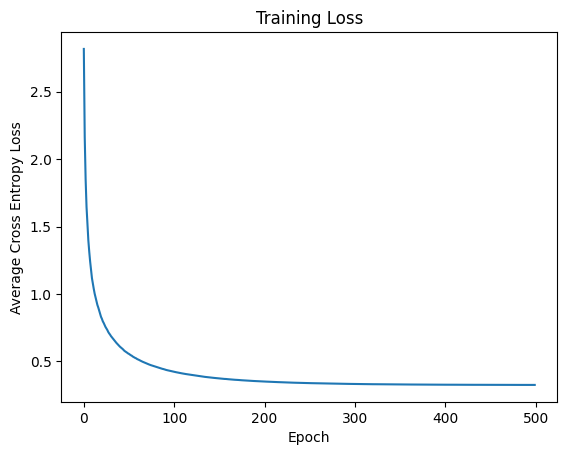

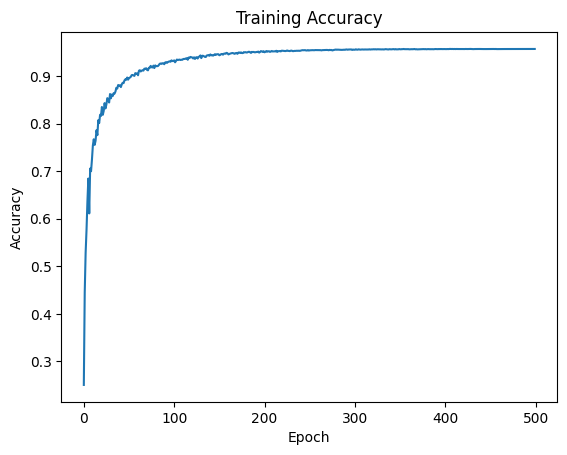

0.9451830267710799


In [ ]:

GRADIENT_STEPS = 500
n_features = X_MNIST_normalized.shape[-1]

mlp2 = MLP(
    LinearLayer(n_features, 25),
    SoftmaxOutputLayer()
)

opt2 = GradientDescentOptimizer(lr=0.1)
opt2.attach_network(mlp2)

mlp2.fit(opt2, X=X_train, y=y_train, epochs=GRADIENT_STEPS, batch_size=200)
prediction = mlp2.predict(X_test)
accuracy_score = mlp2.evaluate_acc(prediction, y_test)
print(accuracy_score)

In [ ]:
y_MNIST_normalized = cp.asarray(y_MNIST_normalized)
test_label = cp.asarray(test_label)

prediction2 = mlp2.predict(y_MNIST_normalized)
accuracy_score = mlp2.evaluate_acc(prediction2, test_label)
print(accuracy_score)

0.6954824316787507


# Optimizing Only linear and Softmax MLP

  1%|          | 2/250 [00:00<00:30,  8.17it/s]

Epoch 1/250, Loss: 3.0034
Epoch 2/250, Loss: 2.5853


  2%|▏         | 4/250 [00:00<00:29,  8.47it/s]

Epoch 3/250, Loss: 2.3112
Epoch 4/250, Loss: 2.1178


  2%|▏         | 6/250 [00:00<00:28,  8.46it/s]

Epoch 5/250, Loss: 1.9699
Epoch 6/250, Loss: 1.8529


  3%|▎         | 8/250 [00:00<00:28,  8.55it/s]

Epoch 7/250, Loss: 1.7566
Epoch 8/250, Loss: 1.6768


  4%|▍         | 10/250 [00:01<00:26,  9.00it/s]

Epoch 9/250, Loss: 1.6064
Epoch 10/250, Loss: 1.5490


  5%|▍         | 12/250 [00:01<00:26,  9.00it/s]

Epoch 11/250, Loss: 1.4996
Epoch 12/250, Loss: 1.4555


  6%|▌         | 14/250 [00:01<00:25,  9.18it/s]

Epoch 13/250, Loss: 1.4176
Epoch 14/250, Loss: 1.3796


  6%|▋         | 16/250 [00:01<00:25,  9.19it/s]

Epoch 15/250, Loss: 1.3466
Epoch 16/250, Loss: 1.3160


  7%|▋         | 18/250 [00:02<00:27,  8.51it/s]

Epoch 17/250, Loss: 1.2869
Epoch 18/250, Loss: 1.2612


  8%|▊         | 20/250 [00:02<00:25,  8.96it/s]

Epoch 19/250, Loss: 1.2342
Epoch 20/250, Loss: 1.2116


  9%|▉         | 22/250 [00:02<00:28,  7.88it/s]

Epoch 21/250, Loss: 1.1923
Epoch 22/250, Loss: 1.1731


 10%|▉         | 24/250 [00:02<00:31,  7.22it/s]

Epoch 23/250, Loss: 1.1558
Epoch 24/250, Loss: 1.1379


 10%|█         | 26/250 [00:03<00:32,  6.89it/s]

Epoch 25/250, Loss: 1.1210
Epoch 26/250, Loss: 1.1058


 11%|█         | 28/250 [00:03<00:32,  6.86it/s]

Epoch 27/250, Loss: 1.0915
Epoch 28/250, Loss: 1.0760


 12%|█▏        | 30/250 [00:03<00:33,  6.59it/s]

Epoch 29/250, Loss: 1.0624
Epoch 30/250, Loss: 1.0498


 13%|█▎        | 32/250 [00:04<00:33,  6.44it/s]

Epoch 31/250, Loss: 1.0390
Epoch 32/250, Loss: 1.0276


 14%|█▎        | 34/250 [00:04<00:34,  6.34it/s]

Epoch 33/250, Loss: 1.0156
Epoch 34/250, Loss: 1.0053


 14%|█▍        | 36/250 [00:04<00:34,  6.12it/s]

Epoch 35/250, Loss: 0.9954
Epoch 36/250, Loss: 0.9849


 15%|█▌        | 38/250 [00:05<00:36,  5.85it/s]

Epoch 37/250, Loss: 0.9745
Epoch 38/250, Loss: 0.9657


 16%|█▌        | 40/250 [00:05<00:29,  7.21it/s]

Epoch 39/250, Loss: 0.9576
Epoch 40/250, Loss: 0.9501


 17%|█▋        | 42/250 [00:05<00:27,  7.53it/s]

Epoch 41/250, Loss: 0.9421
Epoch 42/250, Loss: 0.9338


 18%|█▊        | 44/250 [00:05<00:24,  8.34it/s]

Epoch 43/250, Loss: 0.9259
Epoch 44/250, Loss: 0.9195


 18%|█▊        | 46/250 [00:05<00:23,  8.83it/s]

Epoch 45/250, Loss: 0.9119
Epoch 46/250, Loss: 0.9042


 19%|█▉        | 48/250 [00:06<00:22,  9.01it/s]

Epoch 47/250, Loss: 0.8983
Epoch 48/250, Loss: 0.8912


 20%|██        | 50/250 [00:06<00:21,  9.17it/s]

Epoch 49/250, Loss: 0.8854
Epoch 50/250, Loss: 0.8799


 21%|██        | 52/250 [00:06<00:21,  9.10it/s]

Epoch 51/250, Loss: 0.8737
Epoch 52/250, Loss: 0.8680


 22%|██▏       | 54/250 [00:06<00:21,  9.21it/s]

Epoch 53/250, Loss: 0.8627
Epoch 54/250, Loss: 0.8572


 22%|██▏       | 56/250 [00:07<00:21,  9.01it/s]

Epoch 55/250, Loss: 0.8521
Epoch 56/250, Loss: 0.8468


 23%|██▎       | 58/250 [00:07<00:20,  9.18it/s]

Epoch 57/250, Loss: 0.8418
Epoch 58/250, Loss: 0.8371


 24%|██▍       | 60/250 [00:07<00:20,  9.08it/s]

Epoch 59/250, Loss: 0.8330
Epoch 60/250, Loss: 0.8281


 25%|██▍       | 62/250 [00:07<00:20,  9.07it/s]

Epoch 61/250, Loss: 0.8234
Epoch 62/250, Loss: 0.8194


 26%|██▌       | 64/250 [00:07<00:20,  9.25it/s]

Epoch 63/250, Loss: 0.8151
Epoch 64/250, Loss: 0.8113


 26%|██▋       | 66/250 [00:08<00:20,  9.05it/s]

Epoch 65/250, Loss: 0.8064
Epoch 66/250, Loss: 0.8033


 27%|██▋       | 68/250 [00:08<00:19,  9.26it/s]

Epoch 67/250, Loss: 0.7991
Epoch 68/250, Loss: 0.7955


 28%|██▊       | 70/250 [00:08<00:20,  8.98it/s]

Epoch 69/250, Loss: 0.7924
Epoch 70/250, Loss: 0.7886


 29%|██▉       | 72/250 [00:08<00:19,  9.01it/s]

Epoch 71/250, Loss: 0.7850
Epoch 72/250, Loss: 0.7816


 30%|██▉       | 74/250 [00:09<00:19,  9.14it/s]

Epoch 73/250, Loss: 0.7783
Epoch 74/250, Loss: 0.7747


 30%|███       | 76/250 [00:09<00:19,  9.07it/s]

Epoch 75/250, Loss: 0.7721
Epoch 76/250, Loss: 0.7689


 31%|███       | 78/250 [00:09<00:19,  8.71it/s]

Epoch 77/250, Loss: 0.7659
Epoch 78/250, Loss: 0.7630


 32%|███▏      | 80/250 [00:09<00:19,  8.95it/s]

Epoch 79/250, Loss: 0.7602
Epoch 80/250, Loss: 0.7573


 33%|███▎      | 82/250 [00:09<00:18,  8.93it/s]

Epoch 81/250, Loss: 0.7540
Epoch 82/250, Loss: 0.7516


 34%|███▎      | 84/250 [00:10<00:18,  8.91it/s]

Epoch 83/250, Loss: 0.7487
Epoch 84/250, Loss: 0.7459


 34%|███▍      | 86/250 [00:10<00:18,  8.89it/s]

Epoch 85/250, Loss: 0.7434
Epoch 86/250, Loss: 0.7414


 35%|███▌      | 88/250 [00:10<00:18,  8.91it/s]

Epoch 87/250, Loss: 0.7392
Epoch 88/250, Loss: 0.7366


 36%|███▌      | 90/250 [00:10<00:17,  9.01it/s]

Epoch 89/250, Loss: 0.7343
Epoch 90/250, Loss: 0.7317


 37%|███▋      | 92/250 [00:11<00:17,  9.10it/s]

Epoch 91/250, Loss: 0.7296
Epoch 92/250, Loss: 0.7274


 38%|███▊      | 94/250 [00:11<00:17,  9.07it/s]

Epoch 93/250, Loss: 0.7251
Epoch 94/250, Loss: 0.7224


 38%|███▊      | 96/250 [00:11<00:16,  9.18it/s]

Epoch 95/250, Loss: 0.7211
Epoch 96/250, Loss: 0.7188


 39%|███▉      | 98/250 [00:11<00:16,  9.07it/s]

Epoch 97/250, Loss: 0.7169
Epoch 98/250, Loss: 0.7153


 40%|████      | 100/250 [00:11<00:16,  9.12it/s]

Epoch 99/250, Loss: 0.7132
Epoch 100/250, Loss: 0.7106


 41%|████      | 102/250 [00:12<00:16,  8.87it/s]

Epoch 101/250, Loss: 0.7090
Epoch 102/250, Loss: 0.7074


 42%|████▏     | 104/250 [00:12<00:16,  8.66it/s]

Epoch 103/250, Loss: 0.7055
Epoch 104/250, Loss: 0.7034


 42%|████▏     | 106/250 [00:12<00:17,  8.42it/s]

Epoch 105/250, Loss: 0.7019
Epoch 106/250, Loss: 0.7004


 43%|████▎     | 108/250 [00:12<00:16,  8.69it/s]

Epoch 107/250, Loss: 0.6986
Epoch 108/250, Loss: 0.6971


 44%|████▍     | 110/250 [00:13<00:15,  8.91it/s]

Epoch 109/250, Loss: 0.6952
Epoch 110/250, Loss: 0.6932


 45%|████▍     | 112/250 [00:13<00:15,  8.90it/s]

Epoch 111/250, Loss: 0.6918
Epoch 112/250, Loss: 0.6909


 46%|████▌     | 114/250 [00:13<00:16,  8.48it/s]

Epoch 113/250, Loss: 0.6894
Epoch 114/250, Loss: 0.6872


 46%|████▋     | 116/250 [00:13<00:15,  8.68it/s]

Epoch 115/250, Loss: 0.6859
Epoch 116/250, Loss: 0.6848


 47%|████▋     | 118/250 [00:14<00:14,  8.99it/s]

Epoch 117/250, Loss: 0.6832
Epoch 118/250, Loss: 0.6818


 48%|████▊     | 120/250 [00:14<00:14,  8.97it/s]

Epoch 119/250, Loss: 0.6804
Epoch 120/250, Loss: 0.6790


 49%|████▉     | 122/250 [00:14<00:14,  9.02it/s]

Epoch 121/250, Loss: 0.6775
Epoch 122/250, Loss: 0.6764


 50%|████▉     | 124/250 [00:14<00:13,  9.03it/s]

Epoch 123/250, Loss: 0.6749
Epoch 124/250, Loss: 0.6738


 50%|█████     | 126/250 [00:14<00:13,  9.05it/s]

Epoch 125/250, Loss: 0.6724
Epoch 126/250, Loss: 0.6712


 51%|█████     | 128/250 [00:15<00:14,  8.19it/s]

Epoch 127/250, Loss: 0.6700
Epoch 128/250, Loss: 0.6690


 52%|█████▏    | 130/250 [00:15<00:16,  7.26it/s]

Epoch 129/250, Loss: 0.6676
Epoch 130/250, Loss: 0.6667


 53%|█████▎    | 132/250 [00:15<00:16,  7.07it/s]

Epoch 131/250, Loss: 0.6655
Epoch 132/250, Loss: 0.6645


 54%|█████▎    | 134/250 [00:16<00:16,  7.02it/s]

Epoch 133/250, Loss: 0.6634
Epoch 134/250, Loss: 0.6623


 54%|█████▍    | 136/250 [00:16<00:16,  7.02it/s]

Epoch 135/250, Loss: 0.6613
Epoch 136/250, Loss: 0.6602


 55%|█████▌    | 138/250 [00:16<00:16,  6.62it/s]

Epoch 137/250, Loss: 0.6591
Epoch 138/250, Loss: 0.6580


 56%|█████▌    | 140/250 [00:17<00:17,  6.23it/s]

Epoch 139/250, Loss: 0.6571
Epoch 140/250, Loss: 0.6561


 57%|█████▋    | 142/250 [00:17<00:18,  5.88it/s]

Epoch 141/250, Loss: 0.6553
Epoch 142/250, Loss: 0.6544


 58%|█████▊    | 144/250 [00:17<00:18,  5.83it/s]

Epoch 143/250, Loss: 0.6532
Epoch 144/250, Loss: 0.6523


 58%|█████▊    | 146/250 [00:17<00:15,  6.86it/s]

Epoch 145/250, Loss: 0.6515
Epoch 146/250, Loss: 0.6503


 59%|█████▉    | 148/250 [00:18<00:13,  7.83it/s]

Epoch 147/250, Loss: 0.6496
Epoch 148/250, Loss: 0.6489


 60%|██████    | 150/250 [00:18<00:12,  8.28it/s]

Epoch 149/250, Loss: 0.6479
Epoch 150/250, Loss: 0.6470


 61%|██████    | 152/250 [00:18<00:11,  8.70it/s]

Epoch 151/250, Loss: 0.6463
Epoch 152/250, Loss: 0.6456


 62%|██████▏   | 154/250 [00:18<00:10,  8.89it/s]

Epoch 153/250, Loss: 0.6445
Epoch 154/250, Loss: 0.6439


 62%|██████▏   | 156/250 [00:19<00:10,  9.18it/s]

Epoch 155/250, Loss: 0.6431
Epoch 156/250, Loss: 0.6421


 63%|██████▎   | 158/250 [00:19<00:09,  9.24it/s]

Epoch 157/250, Loss: 0.6412
Epoch 158/250, Loss: 0.6407


 64%|██████▍   | 160/250 [00:19<00:10,  8.99it/s]

Epoch 159/250, Loss: 0.6398
Epoch 160/250, Loss: 0.6394


 65%|██████▍   | 162/250 [00:19<00:09,  9.22it/s]

Epoch 161/250, Loss: 0.6383
Epoch 162/250, Loss: 0.6378


 66%|██████▌   | 164/250 [00:19<00:09,  9.32it/s]

Epoch 163/250, Loss: 0.6371
Epoch 164/250, Loss: 0.6362


 66%|██████▋   | 166/250 [00:20<00:09,  9.33it/s]

Epoch 165/250, Loss: 0.6355
Epoch 166/250, Loss: 0.6350


 67%|██████▋   | 168/250 [00:20<00:08,  9.40it/s]

Epoch 167/250, Loss: 0.6343
Epoch 168/250, Loss: 0.6337


 68%|██████▊   | 170/250 [00:20<00:08,  9.31it/s]

Epoch 169/250, Loss: 0.6330
Epoch 170/250, Loss: 0.6323


 69%|██████▉   | 172/250 [00:20<00:08,  9.28it/s]

Epoch 171/250, Loss: 0.6317
Epoch 172/250, Loss: 0.6310


 70%|██████▉   | 174/250 [00:21<00:08,  9.32it/s]

Epoch 173/250, Loss: 0.6304
Epoch 174/250, Loss: 0.6300


 70%|███████   | 176/250 [00:21<00:07,  9.29it/s]

Epoch 175/250, Loss: 0.6292
Epoch 176/250, Loss: 0.6285


 71%|███████   | 178/250 [00:21<00:07,  9.39it/s]

Epoch 177/250, Loss: 0.6281
Epoch 178/250, Loss: 0.6275


 72%|███████▏  | 180/250 [00:21<00:07,  9.16it/s]

Epoch 179/250, Loss: 0.6270
Epoch 180/250, Loss: 0.6264


 73%|███████▎  | 182/250 [00:21<00:07,  9.21it/s]

Epoch 181/250, Loss: 0.6258
Epoch 182/250, Loss: 0.6254


 74%|███████▎  | 184/250 [00:22<00:07,  9.26it/s]

Epoch 183/250, Loss: 0.6244
Epoch 184/250, Loss: 0.6244


 74%|███████▍  | 186/250 [00:22<00:06,  9.43it/s]

Epoch 185/250, Loss: 0.6239
Epoch 186/250, Loss: 0.6231


 75%|███████▌  | 188/250 [00:22<00:06,  9.06it/s]

Epoch 187/250, Loss: 0.6230
Epoch 188/250, Loss: 0.6223


 76%|███████▌  | 190/250 [00:22<00:06,  9.02it/s]

Epoch 189/250, Loss: 0.6215
Epoch 190/250, Loss: 0.6212


 77%|███████▋  | 192/250 [00:22<00:06,  8.97it/s]

Epoch 191/250, Loss: 0.6208
Epoch 192/250, Loss: 0.6203


 78%|███████▊  | 194/250 [00:23<00:06,  9.13it/s]

Epoch 193/250, Loss: 0.6199
Epoch 194/250, Loss: 0.6194


 78%|███████▊  | 196/250 [00:23<00:05,  9.18it/s]

Epoch 195/250, Loss: 0.6189
Epoch 196/250, Loss: 0.6185


 79%|███████▉  | 198/250 [00:23<00:05,  8.94it/s]

Epoch 197/250, Loss: 0.6180
Epoch 198/250, Loss: 0.6177


 80%|████████  | 200/250 [00:23<00:05,  9.13it/s]

Epoch 199/250, Loss: 0.6173
Epoch 200/250, Loss: 0.6167


 81%|████████  | 202/250 [00:24<00:05,  9.05it/s]

Epoch 201/250, Loss: 0.6163
Epoch 202/250, Loss: 0.6160


 82%|████████▏ | 204/250 [00:24<00:05,  8.99it/s]

Epoch 203/250, Loss: 0.6156
Epoch 204/250, Loss: 0.6150


 82%|████████▏ | 206/250 [00:24<00:05,  8.62it/s]

Epoch 205/250, Loss: 0.6146
Epoch 206/250, Loss: 0.6145


 83%|████████▎ | 208/250 [00:24<00:04,  8.88it/s]

Epoch 207/250, Loss: 0.6139
Epoch 208/250, Loss: 0.6137


 84%|████████▍ | 210/250 [00:24<00:04,  9.13it/s]

Epoch 209/250, Loss: 0.6131
Epoch 210/250, Loss: 0.6130


 85%|████████▍ | 212/250 [00:25<00:04,  9.24it/s]

Epoch 211/250, Loss: 0.6125
Epoch 212/250, Loss: 0.6121


 86%|████████▌ | 214/250 [00:25<00:03,  9.15it/s]

Epoch 213/250, Loss: 0.6115
Epoch 214/250, Loss: 0.6114


 86%|████████▋ | 216/250 [00:25<00:03,  8.73it/s]

Epoch 215/250, Loss: 0.6110
Epoch 216/250, Loss: 0.6107


 87%|████████▋ | 218/250 [00:25<00:03,  8.96it/s]

Epoch 217/250, Loss: 0.6105
Epoch 218/250, Loss: 0.6102


 88%|████████▊ | 220/250 [00:26<00:03,  9.28it/s]

Epoch 219/250, Loss: 0.6096
Epoch 220/250, Loss: 0.6095


 89%|████████▉ | 222/250 [00:26<00:03,  8.97it/s]

Epoch 221/250, Loss: 0.6091
Epoch 222/250, Loss: 0.6090


 90%|████████▉ | 224/250 [00:26<00:02,  8.88it/s]

Epoch 223/250, Loss: 0.6085
Epoch 224/250, Loss: 0.6080


 90%|█████████ | 226/250 [00:26<00:02,  8.76it/s]

Epoch 225/250, Loss: 0.6077
Epoch 226/250, Loss: 0.6076


 91%|█████████ | 228/250 [00:26<00:02,  8.99it/s]

Epoch 227/250, Loss: 0.6072
Epoch 228/250, Loss: 0.6068


 92%|█████████▏| 230/250 [00:27<00:02,  9.12it/s]

Epoch 229/250, Loss: 0.6066
Epoch 230/250, Loss: 0.6062


 93%|█████████▎| 232/250 [00:27<00:01,  9.22it/s]

Epoch 231/250, Loss: 0.6062
Epoch 232/250, Loss: 0.6056


 94%|█████████▎| 234/250 [00:27<00:01,  8.87it/s]

Epoch 233/250, Loss: 0.6055
Epoch 234/250, Loss: 0.6050


 94%|█████████▍| 236/250 [00:27<00:01,  7.74it/s]

Epoch 235/250, Loss: 0.6049
Epoch 236/250, Loss: 0.6046


 95%|█████████▌| 238/250 [00:28<00:01,  7.26it/s]

Epoch 237/250, Loss: 0.6045
Epoch 238/250, Loss: 0.6041


 96%|█████████▌| 240/250 [00:28<00:01,  7.02it/s]

Epoch 239/250, Loss: 0.6040
Epoch 240/250, Loss: 0.6035


 97%|█████████▋| 242/250 [00:28<00:01,  6.90it/s]

Epoch 241/250, Loss: 0.6033
Epoch 242/250, Loss: 0.6032


 98%|█████████▊| 244/250 [00:29<00:00,  6.80it/s]

Epoch 243/250, Loss: 0.6027
Epoch 244/250, Loss: 0.6026


 98%|█████████▊| 246/250 [00:29<00:00,  6.55it/s]

Epoch 245/250, Loss: 0.6023
Epoch 246/250, Loss: 0.6023


 99%|█████████▉| 248/250 [00:29<00:00,  5.92it/s]

Epoch 247/250, Loss: 0.6019
Epoch 248/250, Loss: 0.6016


100%|██████████| 250/250 [00:30<00:00,  8.29it/s]

Epoch 249/250, Loss: 0.6015
Epoch 250/250, Loss: 0.6014


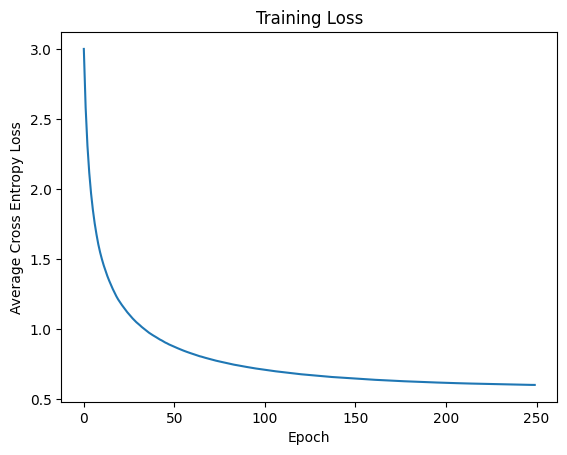

  1%|          | 2/250 [00:00<00:27,  9.13it/s]

Epoch 1/250, Loss: 2.9627
Epoch 2/250, Loss: 2.4773


  2%|▏         | 4/250 [00:00<00:27,  8.91it/s]

Epoch 3/250, Loss: 2.1954
Epoch 4/250, Loss: 1.9951


  2%|▏         | 6/250 [00:00<00:26,  9.10it/s]

Epoch 5/250, Loss: 1.8504
Epoch 6/250, Loss: 1.7371


  3%|▎         | 8/250 [00:00<00:26,  9.12it/s]

Epoch 7/250, Loss: 1.6419
Epoch 8/250, Loss: 1.5626


  4%|▍         | 10/250 [00:01<00:26,  9.08it/s]

Epoch 9/250, Loss: 1.4980
Epoch 10/250, Loss: 1.4383


  5%|▍         | 12/250 [00:01<00:27,  8.75it/s]

Epoch 11/250, Loss: 1.3926
Epoch 12/250, Loss: 1.3494


  6%|▌         | 14/250 [00:01<00:26,  8.76it/s]

Epoch 13/250, Loss: 1.3123
Epoch 14/250, Loss: 1.2769


  6%|▋         | 16/250 [00:01<00:26,  8.88it/s]

Epoch 15/250, Loss: 1.2428
Epoch 16/250, Loss: 1.2147


  7%|▋         | 18/250 [00:02<00:26,  8.92it/s]

Epoch 17/250, Loss: 1.1868
Epoch 18/250, Loss: 1.1603


  8%|▊         | 20/250 [00:02<00:25,  8.92it/s]

Epoch 19/250, Loss: 1.1351
Epoch 20/250, Loss: 1.1152


  9%|▉         | 22/250 [00:02<00:25,  8.85it/s]

Epoch 21/250, Loss: 1.0961
Epoch 22/250, Loss: 1.0776


 10%|▉         | 24/250 [00:02<00:24,  9.09it/s]

Epoch 23/250, Loss: 1.0598
Epoch 24/250, Loss: 1.0440


 10%|█         | 26/250 [00:02<00:24,  9.12it/s]

Epoch 25/250, Loss: 1.0276
Epoch 26/250, Loss: 1.0142


 11%|█         | 28/250 [00:03<00:24,  9.25it/s]

Epoch 27/250, Loss: 0.9982
Epoch 28/250, Loss: 0.9829


 12%|█▏        | 30/250 [00:03<00:24,  8.87it/s]

Epoch 29/250, Loss: 0.9719
Epoch 30/250, Loss: 0.9590


 13%|█▎        | 32/250 [00:03<00:24,  9.07it/s]

Epoch 31/250, Loss: 0.9485
Epoch 32/250, Loss: 0.9367


 14%|█▎        | 34/250 [00:03<00:23,  9.08it/s]

Epoch 33/250, Loss: 0.9258
Epoch 34/250, Loss: 0.9156


 14%|█▍        | 36/250 [00:04<00:23,  9.05it/s]

Epoch 35/250, Loss: 0.9069
Epoch 36/250, Loss: 0.8962


 15%|█▌        | 38/250 [00:04<00:23,  9.02it/s]

Epoch 37/250, Loss: 0.8876
Epoch 38/250, Loss: 0.8793


 16%|█▌        | 40/250 [00:04<00:23,  8.80it/s]

Epoch 39/250, Loss: 0.8706
Epoch 40/250, Loss: 0.8626


 17%|█▋        | 42/250 [00:04<00:23,  8.97it/s]

Epoch 41/250, Loss: 0.8550
Epoch 42/250, Loss: 0.8482


 18%|█▊        | 44/250 [00:04<00:22,  9.13it/s]

Epoch 43/250, Loss: 0.8408
Epoch 44/250, Loss: 0.8338


 18%|█▊        | 46/250 [00:05<00:23,  8.60it/s]

Epoch 45/250, Loss: 0.8271
Epoch 46/250, Loss: 0.8199


 19%|█▉        | 48/250 [00:05<00:22,  8.86it/s]

Epoch 47/250, Loss: 0.8133
Epoch 48/250, Loss: 0.8076


 20%|██        | 50/250 [00:05<00:22,  8.87it/s]

Epoch 49/250, Loss: 0.8017
Epoch 50/250, Loss: 0.7960


 21%|██        | 52/250 [00:05<00:22,  8.96it/s]

Epoch 51/250, Loss: 0.7906
Epoch 52/250, Loss: 0.7853


 22%|██▏       | 54/250 [00:06<00:21,  9.08it/s]

Epoch 53/250, Loss: 0.7801
Epoch 54/250, Loss: 0.7749


 22%|██▏       | 56/250 [00:06<00:21,  9.09it/s]

Epoch 55/250, Loss: 0.7697
Epoch 56/250, Loss: 0.7645


 23%|██▎       | 58/250 [00:06<00:21,  8.96it/s]

Epoch 57/250, Loss: 0.7600
Epoch 58/250, Loss: 0.7554


 24%|██▍       | 60/250 [00:06<00:21,  8.96it/s]

Epoch 59/250, Loss: 0.7510
Epoch 60/250, Loss: 0.7469


 25%|██▍       | 62/250 [00:06<00:20,  9.10it/s]

Epoch 61/250, Loss: 0.7428
Epoch 62/250, Loss: 0.7380


 26%|██▌       | 64/250 [00:07<00:20,  9.10it/s]

Epoch 63/250, Loss: 0.7343
Epoch 64/250, Loss: 0.7308


 26%|██▋       | 66/250 [00:07<00:19,  9.20it/s]

Epoch 65/250, Loss: 0.7268
Epoch 66/250, Loss: 0.7231


 27%|██▋       | 68/250 [00:07<00:20,  9.00it/s]

Epoch 67/250, Loss: 0.7192
Epoch 68/250, Loss: 0.7159


 28%|██▊       | 70/250 [00:07<00:19,  9.09it/s]

Epoch 69/250, Loss: 0.7127
Epoch 70/250, Loss: 0.7096


 29%|██▉       | 72/250 [00:08<00:19,  9.09it/s]

Epoch 71/250, Loss: 0.7059
Epoch 72/250, Loss: 0.7029


 30%|██▉       | 74/250 [00:08<00:19,  9.09it/s]

Epoch 73/250, Loss: 0.6995
Epoch 74/250, Loss: 0.6964


 30%|███       | 76/250 [00:08<00:19,  8.88it/s]

Epoch 75/250, Loss: 0.6933
Epoch 76/250, Loss: 0.6904


 31%|███       | 78/250 [00:08<00:19,  9.03it/s]

Epoch 77/250, Loss: 0.6875
Epoch 78/250, Loss: 0.6845


 32%|███▏      | 80/250 [00:08<00:18,  9.12it/s]

Epoch 79/250, Loss: 0.6822
Epoch 80/250, Loss: 0.6795


 33%|███▎      | 82/250 [00:09<00:19,  8.78it/s]

Epoch 81/250, Loss: 0.6767
Epoch 82/250, Loss: 0.6743


 34%|███▎      | 84/250 [00:09<00:18,  8.97it/s]

Epoch 83/250, Loss: 0.6712
Epoch 84/250, Loss: 0.6692


 34%|███▍      | 86/250 [00:09<00:18,  9.01it/s]

Epoch 85/250, Loss: 0.6665
Epoch 86/250, Loss: 0.6646


 35%|███▌      | 88/250 [00:09<00:17,  9.12it/s]

Epoch 87/250, Loss: 0.6621
Epoch 88/250, Loss: 0.6598


 36%|███▌      | 90/250 [00:10<00:19,  8.10it/s]

Epoch 89/250, Loss: 0.6572
Epoch 90/250, Loss: 0.6551


 37%|███▋      | 92/250 [00:10<00:22,  7.12it/s]

Epoch 91/250, Loss: 0.6531
Epoch 92/250, Loss: 0.6510


 38%|███▊      | 94/250 [00:10<00:22,  6.93it/s]

Epoch 93/250, Loss: 0.6489
Epoch 94/250, Loss: 0.6469


 38%|███▊      | 96/250 [00:10<00:22,  6.96it/s]

Epoch 95/250, Loss: 0.6450
Epoch 96/250, Loss: 0.6429


 39%|███▉      | 98/250 [00:11<00:22,  6.86it/s]

Epoch 97/250, Loss: 0.6412
Epoch 98/250, Loss: 0.6390


 40%|████      | 100/250 [00:11<00:23,  6.35it/s]

Epoch 99/250, Loss: 0.6372
Epoch 100/250, Loss: 0.6354


 41%|████      | 102/250 [00:11<00:23,  6.22it/s]

Epoch 101/250, Loss: 0.6337
Epoch 102/250, Loss: 0.6316


 42%|████▏     | 104/250 [00:12<00:24,  5.93it/s]

Epoch 103/250, Loss: 0.6301
Epoch 104/250, Loss: 0.6286


 42%|████▏     | 106/250 [00:12<00:24,  5.82it/s]

Epoch 105/250, Loss: 0.6267
Epoch 106/250, Loss: 0.6251


 43%|████▎     | 108/250 [00:12<00:19,  7.14it/s]

Epoch 107/250, Loss: 0.6237
Epoch 108/250, Loss: 0.6225


 44%|████▍     | 110/250 [00:13<00:17,  8.04it/s]

Epoch 109/250, Loss: 0.6204
Epoch 110/250, Loss: 0.6188


 45%|████▍     | 112/250 [00:13<00:16,  8.37it/s]

Epoch 111/250, Loss: 0.6176
Epoch 112/250, Loss: 0.6160


 46%|████▌     | 114/250 [00:13<00:16,  8.37it/s]

Epoch 113/250, Loss: 0.6145
Epoch 114/250, Loss: 0.6133


 46%|████▋     | 116/250 [00:13<00:16,  8.25it/s]

Epoch 115/250, Loss: 0.6120
Epoch 116/250, Loss: 0.6106


 47%|████▋     | 118/250 [00:14<00:15,  8.48it/s]

Epoch 117/250, Loss: 0.6090
Epoch 118/250, Loss: 0.6078


 48%|████▊     | 120/250 [00:14<00:14,  8.71it/s]

Epoch 119/250, Loss: 0.6062
Epoch 120/250, Loss: 0.6050


 49%|████▉     | 122/250 [00:14<00:14,  8.95it/s]

Epoch 121/250, Loss: 0.6038
Epoch 122/250, Loss: 0.6028


 50%|████▉     | 124/250 [00:14<00:14,  8.77it/s]

Epoch 123/250, Loss: 0.6015
Epoch 124/250, Loss: 0.6002


 50%|█████     | 126/250 [00:14<00:13,  9.00it/s]

Epoch 125/250, Loss: 0.5989
Epoch 126/250, Loss: 0.5978


 51%|█████     | 128/250 [00:15<00:13,  9.12it/s]

Epoch 127/250, Loss: 0.5969
Epoch 128/250, Loss: 0.5954


 52%|█████▏    | 130/250 [00:15<00:13,  8.96it/s]

Epoch 129/250, Loss: 0.5942
Epoch 130/250, Loss: 0.5934


 53%|█████▎    | 132/250 [00:15<00:13,  8.85it/s]

Epoch 131/250, Loss: 0.5924
Epoch 132/250, Loss: 0.5914


 54%|█████▎    | 134/250 [00:15<00:13,  8.86it/s]

Epoch 133/250, Loss: 0.5902
Epoch 134/250, Loss: 0.5892


 54%|█████▍    | 136/250 [00:16<00:12,  9.02it/s]

Epoch 135/250, Loss: 0.5883
Epoch 136/250, Loss: 0.5869


 55%|█████▌    | 138/250 [00:16<00:12,  8.88it/s]

Epoch 137/250, Loss: 0.5861
Epoch 138/250, Loss: 0.5853


 56%|█████▌    | 140/250 [00:16<00:12,  9.04it/s]

Epoch 139/250, Loss: 0.5843
Epoch 140/250, Loss: 0.5835


 57%|█████▋    | 142/250 [00:16<00:11,  9.14it/s]

Epoch 141/250, Loss: 0.5824
Epoch 142/250, Loss: 0.5817


 58%|█████▊    | 144/250 [00:16<00:11,  9.06it/s]

Epoch 143/250, Loss: 0.5806
Epoch 144/250, Loss: 0.5797


 58%|█████▊    | 146/250 [00:17<00:11,  9.02it/s]

Epoch 145/250, Loss: 0.5788
Epoch 146/250, Loss: 0.5780


 59%|█████▉    | 148/250 [00:17<00:11,  9.02it/s]

Epoch 147/250, Loss: 0.5770
Epoch 148/250, Loss: 0.5763


 60%|██████    | 150/250 [00:17<00:11,  8.91it/s]

Epoch 149/250, Loss: 0.5757
Epoch 150/250, Loss: 0.5747


 61%|██████    | 152/250 [00:17<00:10,  8.96it/s]

Epoch 151/250, Loss: 0.5740
Epoch 152/250, Loss: 0.5731


 62%|██████▏   | 154/250 [00:18<00:10,  9.02it/s]

Epoch 153/250, Loss: 0.5724
Epoch 154/250, Loss: 0.5717


 62%|██████▏   | 156/250 [00:18<00:10,  9.15it/s]

Epoch 155/250, Loss: 0.5710
Epoch 156/250, Loss: 0.5701


 63%|██████▎   | 158/250 [00:18<00:09,  9.21it/s]

Epoch 157/250, Loss: 0.5695
Epoch 158/250, Loss: 0.5687


 64%|██████▍   | 160/250 [00:18<00:09,  9.20it/s]

Epoch 159/250, Loss: 0.5681
Epoch 160/250, Loss: 0.5675


 65%|██████▍   | 162/250 [00:18<00:09,  9.01it/s]

Epoch 161/250, Loss: 0.5667
Epoch 162/250, Loss: 0.5659


 66%|██████▌   | 164/250 [00:19<00:09,  8.99it/s]

Epoch 163/250, Loss: 0.5657
Epoch 164/250, Loss: 0.5644


 66%|██████▋   | 166/250 [00:19<00:09,  8.88it/s]

Epoch 165/250, Loss: 0.5638
Epoch 166/250, Loss: 0.5633


 67%|██████▋   | 168/250 [00:19<00:09,  9.08it/s]

Epoch 167/250, Loss: 0.5627
Epoch 168/250, Loss: 0.5622


 68%|██████▊   | 170/250 [00:19<00:08,  9.00it/s]

Epoch 169/250, Loss: 0.5614
Epoch 170/250, Loss: 0.5609


 69%|██████▉   | 172/250 [00:20<00:08,  9.07it/s]

Epoch 171/250, Loss: 0.5603
Epoch 172/250, Loss: 0.5596


 70%|██████▉   | 174/250 [00:20<00:08,  9.02it/s]

Epoch 173/250, Loss: 0.5590
Epoch 174/250, Loss: 0.5585


 70%|███████   | 176/250 [00:20<00:08,  9.07it/s]

Epoch 175/250, Loss: 0.5578
Epoch 176/250, Loss: 0.5573


 71%|███████   | 178/250 [00:20<00:07,  9.17it/s]

Epoch 177/250, Loss: 0.5568
Epoch 178/250, Loss: 0.5563


 72%|███████▏  | 180/250 [00:20<00:07,  8.99it/s]

Epoch 179/250, Loss: 0.5558
Epoch 180/250, Loss: 0.5554


 73%|███████▎  | 182/250 [00:21<00:07,  9.14it/s]

Epoch 181/250, Loss: 0.5546
Epoch 182/250, Loss: 0.5543


 74%|███████▎  | 184/250 [00:21<00:07,  9.05it/s]

Epoch 183/250, Loss: 0.5536
Epoch 184/250, Loss: 0.5532


 74%|███████▍  | 186/250 [00:21<00:07,  9.12it/s]

Epoch 185/250, Loss: 0.5528
Epoch 186/250, Loss: 0.5524


 75%|███████▌  | 188/250 [00:21<00:06,  9.20it/s]

Epoch 187/250, Loss: 0.5519
Epoch 188/250, Loss: 0.5514


 76%|███████▌  | 190/250 [00:22<00:06,  9.12it/s]

Epoch 189/250, Loss: 0.5510
Epoch 190/250, Loss: 0.5501


 77%|███████▋  | 192/250 [00:22<00:06,  9.11it/s]

Epoch 191/250, Loss: 0.5502
Epoch 192/250, Loss: 0.5494


 78%|███████▊  | 194/250 [00:22<00:06,  9.10it/s]

Epoch 193/250, Loss: 0.5490
Epoch 194/250, Loss: 0.5486


 78%|███████▊  | 196/250 [00:22<00:06,  8.37it/s]

Epoch 195/250, Loss: 0.5482
Epoch 196/250, Loss: 0.5479


 79%|███████▉  | 198/250 [00:23<00:07,  7.16it/s]

Epoch 197/250, Loss: 0.5475
Epoch 198/250, Loss: 0.5470


 80%|████████  | 200/250 [00:23<00:07,  6.95it/s]

Epoch 199/250, Loss: 0.5466
Epoch 200/250, Loss: 0.5460


 81%|████████  | 202/250 [00:23<00:06,  6.86it/s]

Epoch 201/250, Loss: 0.5457
Epoch 202/250, Loss: 0.5452


 82%|████████▏ | 204/250 [00:23<00:06,  6.61it/s]

Epoch 203/250, Loss: 0.5449
Epoch 204/250, Loss: 0.5445


 82%|████████▏ | 206/250 [00:24<00:06,  6.47it/s]

Epoch 205/250, Loss: 0.5444
Epoch 206/250, Loss: 0.5438


 83%|████████▎ | 208/250 [00:24<00:06,  6.17it/s]

Epoch 207/250, Loss: 0.5435
Epoch 208/250, Loss: 0.5431


 84%|████████▍ | 210/250 [00:24<00:06,  6.11it/s]

Epoch 209/250, Loss: 0.5428
Epoch 210/250, Loss: 0.5422


 85%|████████▍ | 212/250 [00:25<00:06,  6.05it/s]

Epoch 211/250, Loss: 0.5421
Epoch 212/250, Loss: 0.5417


 86%|████████▌ | 214/250 [00:25<00:05,  6.79it/s]

Epoch 213/250, Loss: 0.5415
Epoch 214/250, Loss: 0.5409


 86%|████████▋ | 216/250 [00:25<00:04,  7.76it/s]

Epoch 215/250, Loss: 0.5407
Epoch 216/250, Loss: 0.5404


 87%|████████▋ | 218/250 [00:25<00:03,  8.46it/s]

Epoch 217/250, Loss: 0.5400
Epoch 218/250, Loss: 0.5396


 88%|████████▊ | 220/250 [00:26<00:03,  8.61it/s]

Epoch 219/250, Loss: 0.5393
Epoch 220/250, Loss: 0.5390


 89%|████████▉ | 222/250 [00:26<00:03,  8.76it/s]

Epoch 221/250, Loss: 0.5389
Epoch 222/250, Loss: 0.5383


 90%|████████▉ | 224/250 [00:26<00:02,  9.00it/s]

Epoch 223/250, Loss: 0.5381
Epoch 224/250, Loss: 0.5379


 90%|█████████ | 226/250 [00:26<00:02,  9.13it/s]

Epoch 225/250, Loss: 0.5375
Epoch 226/250, Loss: 0.5373


 91%|█████████ | 228/250 [00:27<00:02,  8.98it/s]

Epoch 227/250, Loss: 0.5371
Epoch 228/250, Loss: 0.5366


 92%|█████████▏| 230/250 [00:27<00:02,  9.03it/s]

Epoch 229/250, Loss: 0.5364
Epoch 230/250, Loss: 0.5361


 93%|█████████▎| 232/250 [00:27<00:02,  8.96it/s]

Epoch 231/250, Loss: 0.5359
Epoch 232/250, Loss: 0.5356


 94%|█████████▎| 234/250 [00:27<00:01,  9.14it/s]

Epoch 233/250, Loss: 0.5353
Epoch 234/250, Loss: 0.5353


 94%|█████████▍| 236/250 [00:27<00:01,  9.15it/s]

Epoch 235/250, Loss: 0.5348
Epoch 236/250, Loss: 0.5347


 95%|█████████▌| 238/250 [00:28<00:01,  8.94it/s]

Epoch 237/250, Loss: 0.5343
Epoch 238/250, Loss: 0.5340


 96%|█████████▌| 240/250 [00:28<00:01,  8.92it/s]

Epoch 239/250, Loss: 0.5339
Epoch 240/250, Loss: 0.5337


 97%|█████████▋| 242/250 [00:28<00:00,  8.87it/s]

Epoch 241/250, Loss: 0.5334
Epoch 242/250, Loss: 0.5331


 98%|█████████▊| 244/250 [00:28<00:00,  8.83it/s]

Epoch 243/250, Loss: 0.5329
Epoch 244/250, Loss: 0.5326


 98%|█████████▊| 246/250 [00:29<00:00,  8.11it/s]

Epoch 245/250, Loss: 0.5324
Epoch 246/250, Loss: 0.5322


 99%|█████████▉| 248/250 [00:29<00:00,  8.43it/s]

Epoch 247/250, Loss: 0.5319
Epoch 248/250, Loss: 0.5317


100%|██████████| 250/250 [00:29<00:00,  8.44it/s]

Epoch 249/250, Loss: 0.5316
Epoch 250/250, Loss: 0.5313


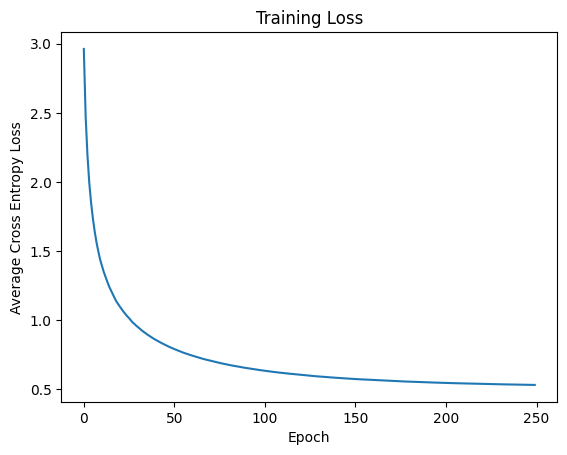

  1%|          | 2/250 [00:00<00:28,  8.69it/s]

Epoch 1/250, Loss: 2.9092
Epoch 2/250, Loss: 2.3958


  2%|▏         | 4/250 [00:00<00:28,  8.64it/s]

Epoch 3/250, Loss: 2.0981
Epoch 4/250, Loss: 1.9040


  2%|▏         | 6/250 [00:00<00:27,  8.89it/s]

Epoch 5/250, Loss: 1.7554
Epoch 6/250, Loss: 1.6413


  3%|▎         | 8/250 [00:00<00:26,  9.14it/s]

Epoch 7/250, Loss: 1.5469
Epoch 8/250, Loss: 1.4715


  4%|▍         | 10/250 [00:01<00:26,  9.10it/s]

Epoch 9/250, Loss: 1.4095
Epoch 10/250, Loss: 1.3518


  5%|▍         | 12/250 [00:01<00:26,  8.91it/s]

Epoch 11/250, Loss: 1.3046
Epoch 12/250, Loss: 1.2623


  6%|▌         | 14/250 [00:01<00:26,  8.96it/s]

Epoch 13/250, Loss: 1.2268
Epoch 14/250, Loss: 1.1921


  6%|▋         | 16/250 [00:01<00:25,  9.01it/s]

Epoch 15/250, Loss: 1.1620
Epoch 16/250, Loss: 1.1332


  7%|▋         | 18/250 [00:02<00:25,  9.09it/s]

Epoch 17/250, Loss: 1.1072
Epoch 18/250, Loss: 1.0812


  8%|▊         | 20/250 [00:02<00:25,  9.17it/s]

Epoch 19/250, Loss: 1.0571
Epoch 20/250, Loss: 1.0372


  9%|▉         | 22/250 [00:02<00:25,  8.87it/s]

Epoch 21/250, Loss: 1.0183
Epoch 22/250, Loss: 1.0010


 10%|▉         | 24/250 [00:02<00:25,  8.89it/s]

Epoch 23/250, Loss: 0.9834
Epoch 24/250, Loss: 0.9675


 10%|█         | 26/250 [00:02<00:24,  9.16it/s]

Epoch 25/250, Loss: 0.9525
Epoch 26/250, Loss: 0.9380


 11%|█         | 28/250 [00:03<00:24,  9.19it/s]

Epoch 27/250, Loss: 0.9242
Epoch 28/250, Loss: 0.9092


 12%|█▏        | 30/250 [00:03<00:24,  8.91it/s]

Epoch 29/250, Loss: 0.8974
Epoch 30/250, Loss: 0.8865


 13%|█▎        | 32/250 [00:03<00:24,  8.96it/s]

Epoch 31/250, Loss: 0.8767
Epoch 32/250, Loss: 0.8653


 14%|█▎        | 34/250 [00:03<00:23,  9.04it/s]

Epoch 33/250, Loss: 0.8552
Epoch 34/250, Loss: 0.8459


 14%|█▍        | 36/250 [00:04<00:23,  9.10it/s]

Epoch 35/250, Loss: 0.8363
Epoch 36/250, Loss: 0.8263


 15%|█▌        | 38/250 [00:04<00:23,  9.07it/s]

Epoch 37/250, Loss: 0.8176
Epoch 38/250, Loss: 0.8096


 16%|█▌        | 40/250 [00:04<00:24,  8.75it/s]

Epoch 39/250, Loss: 0.8018
Epoch 40/250, Loss: 0.7938


 17%|█▋        | 42/250 [00:04<00:23,  8.84it/s]

Epoch 41/250, Loss: 0.7864
Epoch 42/250, Loss: 0.7797


 18%|█▊        | 44/250 [00:04<00:22,  9.01it/s]

Epoch 43/250, Loss: 0.7733
Epoch 44/250, Loss: 0.7659


 18%|█▊        | 46/250 [00:05<00:23,  8.64it/s]

Epoch 45/250, Loss: 0.7600
Epoch 46/250, Loss: 0.7527


 19%|█▉        | 48/250 [00:05<00:24,  8.34it/s]

Epoch 47/250, Loss: 0.7459
Epoch 48/250, Loss: 0.7411


 20%|██        | 50/250 [00:05<00:24,  8.07it/s]

Epoch 49/250, Loss: 0.7359
Epoch 50/250, Loss: 0.7294


 21%|██        | 52/250 [00:05<00:28,  7.01it/s]

Epoch 51/250, Loss: 0.7254
Epoch 52/250, Loss: 0.7193


 22%|██▏       | 54/250 [00:06<00:28,  6.87it/s]

Epoch 53/250, Loss: 0.7149
Epoch 54/250, Loss: 0.7097


 22%|██▏       | 56/250 [00:06<00:28,  6.70it/s]

Epoch 55/250, Loss: 0.7044
Epoch 56/250, Loss: 0.6996


 23%|██▎       | 58/250 [00:06<00:28,  6.71it/s]

Epoch 57/250, Loss: 0.6965
Epoch 58/250, Loss: 0.6916


 24%|██▍       | 60/250 [00:07<00:29,  6.50it/s]

Epoch 59/250, Loss: 0.6867
Epoch 60/250, Loss: 0.6832


 25%|██▍       | 62/250 [00:07<00:30,  6.17it/s]

Epoch 61/250, Loss: 0.6791
Epoch 62/250, Loss: 0.6749


 26%|██▌       | 64/250 [00:07<00:31,  5.90it/s]

Epoch 63/250, Loss: 0.6714
Epoch 64/250, Loss: 0.6675


 26%|██▋       | 66/250 [00:08<00:31,  5.91it/s]

Epoch 65/250, Loss: 0.6632
Epoch 66/250, Loss: 0.6604


 27%|██▋       | 68/250 [00:08<00:26,  6.76it/s]

Epoch 67/250, Loss: 0.6568
Epoch 68/250, Loss: 0.6535


 28%|██▊       | 70/250 [00:08<00:23,  7.71it/s]

Epoch 69/250, Loss: 0.6503
Epoch 70/250, Loss: 0.6471


 29%|██▉       | 72/250 [00:08<00:21,  8.34it/s]

Epoch 71/250, Loss: 0.6438
Epoch 72/250, Loss: 0.6407


 30%|██▉       | 74/250 [00:09<00:19,  8.81it/s]

Epoch 73/250, Loss: 0.6378
Epoch 74/250, Loss: 0.6344


 30%|███       | 76/250 [00:09<00:20,  8.57it/s]

Epoch 75/250, Loss: 0.6314
Epoch 76/250, Loss: 0.6292


 31%|███       | 78/250 [00:09<00:19,  8.72it/s]

Epoch 77/250, Loss: 0.6264
Epoch 78/250, Loss: 0.6236


 32%|███▏      | 80/250 [00:09<00:18,  9.00it/s]

Epoch 79/250, Loss: 0.6210
Epoch 80/250, Loss: 0.6186


 33%|███▎      | 82/250 [00:10<00:18,  8.87it/s]

Epoch 81/250, Loss: 0.6157
Epoch 82/250, Loss: 0.6136


 34%|███▎      | 84/250 [00:10<00:18,  8.82it/s]

Epoch 83/250, Loss: 0.6108
Epoch 84/250, Loss: 0.6082


 34%|███▍      | 86/250 [00:10<00:19,  8.54it/s]

Epoch 85/250, Loss: 0.6062
Epoch 86/250, Loss: 0.6040


 35%|███▌      | 88/250 [00:10<00:18,  8.81it/s]

Epoch 87/250, Loss: 0.6013
Epoch 88/250, Loss: 0.5996


 36%|███▌      | 90/250 [00:10<00:17,  9.13it/s]

Epoch 89/250, Loss: 0.5980
Epoch 90/250, Loss: 0.5955


 37%|███▋      | 92/250 [00:11<00:17,  9.18it/s]

Epoch 91/250, Loss: 0.5932
Epoch 92/250, Loss: 0.5912


 38%|███▊      | 94/250 [00:11<00:17,  9.02it/s]

Epoch 93/250, Loss: 0.5888
Epoch 94/250, Loss: 0.5871


 38%|███▊      | 96/250 [00:11<00:17,  8.77it/s]

Epoch 95/250, Loss: 0.5852
Epoch 96/250, Loss: 0.5836


 39%|███▉      | 98/250 [00:11<00:17,  8.94it/s]

Epoch 97/250, Loss: 0.5819
Epoch 98/250, Loss: 0.5798


 40%|████      | 100/250 [00:12<00:16,  9.02it/s]

Epoch 99/250, Loss: 0.5779
Epoch 100/250, Loss: 0.5760


 41%|████      | 102/250 [00:12<00:16,  8.96it/s]

Epoch 101/250, Loss: 0.5742
Epoch 102/250, Loss: 0.5729


 42%|████▏     | 104/250 [00:12<00:16,  8.98it/s]

Epoch 103/250, Loss: 0.5712
Epoch 104/250, Loss: 0.5696


 42%|████▏     | 106/250 [00:12<00:16,  8.65it/s]

Epoch 105/250, Loss: 0.5684
Epoch 106/250, Loss: 0.5666


 43%|████▎     | 108/250 [00:13<00:16,  8.79it/s]

Epoch 107/250, Loss: 0.5650
Epoch 108/250, Loss: 0.5633


 44%|████▍     | 110/250 [00:13<00:15,  8.84it/s]

Epoch 109/250, Loss: 0.5620
Epoch 110/250, Loss: 0.5607


 45%|████▍     | 112/250 [00:13<00:15,  8.96it/s]

Epoch 111/250, Loss: 0.5589
Epoch 112/250, Loss: 0.5578


 46%|████▌     | 114/250 [00:13<00:15,  8.72it/s]

Epoch 113/250, Loss: 0.5566
Epoch 114/250, Loss: 0.5551


 46%|████▋     | 116/250 [00:13<00:14,  8.97it/s]

Epoch 115/250, Loss: 0.5537
Epoch 116/250, Loss: 0.5524


 47%|████▋     | 118/250 [00:14<00:15,  8.56it/s]

Epoch 117/250, Loss: 0.5511
Epoch 118/250, Loss: 0.5498


 48%|████▊     | 120/250 [00:14<00:15,  8.36it/s]

Epoch 119/250, Loss: 0.5485
Epoch 120/250, Loss: 0.5471


 49%|████▉     | 122/250 [00:14<00:15,  8.47it/s]

Epoch 121/250, Loss: 0.5460
Epoch 122/250, Loss: 0.5449


 50%|████▉     | 124/250 [00:14<00:14,  8.72it/s]

Epoch 123/250, Loss: 0.5438
Epoch 124/250, Loss: 0.5427


 50%|█████     | 126/250 [00:15<00:13,  8.89it/s]

Epoch 125/250, Loss: 0.5415
Epoch 126/250, Loss: 0.5405


 51%|█████     | 128/250 [00:15<00:13,  8.90it/s]

Epoch 127/250, Loss: 0.5393
Epoch 128/250, Loss: 0.5382


 52%|█████▏    | 130/250 [00:15<00:13,  8.84it/s]

Epoch 129/250, Loss: 0.5372
Epoch 130/250, Loss: 0.5361


 53%|█████▎    | 132/250 [00:15<00:13,  8.69it/s]

Epoch 131/250, Loss: 0.5352
Epoch 132/250, Loss: 0.5340


 54%|█████▎    | 134/250 [00:15<00:13,  8.88it/s]

Epoch 133/250, Loss: 0.5333
Epoch 134/250, Loss: 0.5321


 54%|█████▍    | 136/250 [00:16<00:12,  8.83it/s]

Epoch 135/250, Loss: 0.5312
Epoch 136/250, Loss: 0.5301


 55%|█████▌    | 138/250 [00:16<00:12,  8.87it/s]

Epoch 137/250, Loss: 0.5291
Epoch 138/250, Loss: 0.5282


 56%|█████▌    | 140/250 [00:16<00:12,  8.51it/s]

Epoch 139/250, Loss: 0.5276
Epoch 140/250, Loss: 0.5267


 57%|█████▋    | 142/250 [00:16<00:12,  8.71it/s]

Epoch 141/250, Loss: 0.5255
Epoch 142/250, Loss: 0.5251


 58%|█████▊    | 144/250 [00:17<00:12,  8.80it/s]

Epoch 143/250, Loss: 0.5242
Epoch 144/250, Loss: 0.5231


 58%|█████▊    | 146/250 [00:17<00:11,  8.85it/s]

Epoch 145/250, Loss: 0.5221
Epoch 146/250, Loss: 0.5215


 59%|█████▉    | 148/250 [00:17<00:11,  8.59it/s]

Epoch 147/250, Loss: 0.5206
Epoch 148/250, Loss: 0.5199


 60%|██████    | 150/250 [00:17<00:11,  8.61it/s]

Epoch 149/250, Loss: 0.5191
Epoch 150/250, Loss: 0.5184


 61%|██████    | 152/250 [00:18<00:11,  8.78it/s]

Epoch 151/250, Loss: 0.5178
Epoch 152/250, Loss: 0.5169


 62%|██████▏   | 154/250 [00:18<00:11,  8.68it/s]

Epoch 153/250, Loss: 0.5161
Epoch 154/250, Loss: 0.5152


 62%|██████▏   | 156/250 [00:18<00:13,  7.12it/s]

Epoch 155/250, Loss: 0.5144
Epoch 156/250, Loss: 0.5138


 63%|██████▎   | 158/250 [00:18<00:13,  6.92it/s]

Epoch 157/250, Loss: 0.5133
Epoch 158/250, Loss: 0.5125


 64%|██████▍   | 160/250 [00:19<00:13,  6.81it/s]

Epoch 159/250, Loss: 0.5119
Epoch 160/250, Loss: 0.5113


 65%|██████▍   | 162/250 [00:19<00:12,  6.94it/s]

Epoch 161/250, Loss: 0.5108
Epoch 162/250, Loss: 0.5100


 66%|██████▌   | 164/250 [00:19<00:13,  6.50it/s]

Epoch 163/250, Loss: 0.5094
Epoch 164/250, Loss: 0.5088


 66%|██████▋   | 166/250 [00:20<00:13,  6.38it/s]

Epoch 165/250, Loss: 0.5081
Epoch 166/250, Loss: 0.5075


 67%|██████▋   | 168/250 [00:20<00:13,  6.03it/s]

Epoch 167/250, Loss: 0.5070
Epoch 168/250, Loss: 0.5064


 68%|██████▊   | 170/250 [00:20<00:14,  5.67it/s]

Epoch 169/250, Loss: 0.5056
Epoch 170/250, Loss: 0.5052


 69%|██████▉   | 172/250 [00:21<00:12,  6.03it/s]

Epoch 171/250, Loss: 0.5046
Epoch 172/250, Loss: 0.5041


 70%|██████▉   | 174/250 [00:21<00:10,  7.29it/s]

Epoch 173/250, Loss: 0.5033
Epoch 174/250, Loss: 0.5027


 70%|███████   | 176/250 [00:21<00:09,  8.00it/s]

Epoch 175/250, Loss: 0.5023
Epoch 176/250, Loss: 0.5021


 71%|███████   | 178/250 [00:21<00:08,  8.31it/s]

Epoch 177/250, Loss: 0.5016
Epoch 178/250, Loss: 0.5008


 72%|███████▏  | 180/250 [00:22<00:08,  8.72it/s]

Epoch 179/250, Loss: 0.5003
Epoch 180/250, Loss: 0.4997


 73%|███████▎  | 182/250 [00:22<00:07,  8.76it/s]

Epoch 181/250, Loss: 0.4993
Epoch 182/250, Loss: 0.4988


 74%|███████▎  | 184/250 [00:22<00:07,  8.92it/s]

Epoch 183/250, Loss: 0.4983
Epoch 184/250, Loss: 0.4978


 74%|███████▍  | 186/250 [00:22<00:07,  8.85it/s]

Epoch 185/250, Loss: 0.4971
Epoch 186/250, Loss: 0.4972


 75%|███████▌  | 188/250 [00:22<00:07,  8.66it/s]

Epoch 187/250, Loss: 0.4963
Epoch 188/250, Loss: 0.4961


 76%|███████▌  | 190/250 [00:23<00:06,  8.89it/s]

Epoch 189/250, Loss: 0.4956
Epoch 190/250, Loss: 0.4952


 77%|███████▋  | 192/250 [00:23<00:06,  8.88it/s]

Epoch 191/250, Loss: 0.4947
Epoch 192/250, Loss: 0.4941


 78%|███████▊  | 194/250 [00:23<00:06,  9.11it/s]

Epoch 193/250, Loss: 0.4938
Epoch 194/250, Loss: 0.4934


 78%|███████▊  | 196/250 [00:23<00:06,  8.84it/s]

Epoch 195/250, Loss: 0.4929
Epoch 196/250, Loss: 0.4926


 79%|███████▉  | 198/250 [00:24<00:05,  8.94it/s]

Epoch 197/250, Loss: 0.4921
Epoch 198/250, Loss: 0.4917


 80%|████████  | 200/250 [00:24<00:05,  8.94it/s]

Epoch 199/250, Loss: 0.4915
Epoch 200/250, Loss: 0.4910


 81%|████████  | 202/250 [00:24<00:05,  8.92it/s]

Epoch 201/250, Loss: 0.4907
Epoch 202/250, Loss: 0.4902


 82%|████████▏ | 204/250 [00:24<00:05,  8.93it/s]

Epoch 203/250, Loss: 0.4898
Epoch 204/250, Loss: 0.4895


 82%|████████▏ | 206/250 [00:25<00:05,  8.73it/s]

Epoch 205/250, Loss: 0.4891
Epoch 206/250, Loss: 0.4889


 83%|████████▎ | 208/250 [00:25<00:04,  8.89it/s]

Epoch 207/250, Loss: 0.4883
Epoch 208/250, Loss: 0.4882


 84%|████████▍ | 210/250 [00:25<00:04,  8.83it/s]

Epoch 209/250, Loss: 0.4878
Epoch 210/250, Loss: 0.4875


 85%|████████▍ | 212/250 [00:25<00:04,  8.92it/s]

Epoch 211/250, Loss: 0.4872
Epoch 212/250, Loss: 0.4869


 86%|████████▌ | 214/250 [00:25<00:03,  9.03it/s]

Epoch 213/250, Loss: 0.4864
Epoch 214/250, Loss: 0.4863


 86%|████████▋ | 216/250 [00:26<00:03,  8.78it/s]

Epoch 215/250, Loss: 0.4859
Epoch 216/250, Loss: 0.4856


 87%|████████▋ | 218/250 [00:26<00:03,  8.99it/s]

Epoch 217/250, Loss: 0.4853
Epoch 218/250, Loss: 0.4848


 88%|████████▊ | 219/250 [00:26<00:03,  8.94it/s]

Epoch 219/250, Loss: 0.4846


 88%|████████▊ | 220/250 [00:26<00:04,  6.50it/s]

Epoch 220/250, Loss: 0.4843


 89%|████████▉ | 222/250 [00:27<00:05,  5.00it/s]

Epoch 221/250, Loss: 0.4841
Epoch 222/250, Loss: 0.4837


 90%|████████▉ | 224/250 [00:27<00:04,  6.47it/s]

Epoch 223/250, Loss: 0.4836
Epoch 224/250, Loss: 0.4833


 90%|█████████ | 226/250 [00:27<00:03,  7.59it/s]

Epoch 225/250, Loss: 0.4829
Epoch 226/250, Loss: 0.4826


 91%|█████████ | 228/250 [00:27<00:02,  8.21it/s]

Epoch 227/250, Loss: 0.4823
Epoch 228/250, Loss: 0.4821


 92%|█████████▏| 230/250 [00:28<00:02,  8.43it/s]

Epoch 229/250, Loss: 0.4818
Epoch 230/250, Loss: 0.4816


 93%|█████████▎| 232/250 [00:28<00:02,  8.57it/s]

Epoch 231/250, Loss: 0.4813
Epoch 232/250, Loss: 0.4810


 94%|█████████▎| 234/250 [00:28<00:01,  8.79it/s]

Epoch 233/250, Loss: 0.4809
Epoch 234/250, Loss: 0.4805


 94%|█████████▍| 236/250 [00:28<00:01,  8.98it/s]

Epoch 235/250, Loss: 0.4804
Epoch 236/250, Loss: 0.4802


 95%|█████████▌| 238/250 [00:29<00:01,  8.91it/s]

Epoch 237/250, Loss: 0.4798
Epoch 238/250, Loss: 0.4796


 96%|█████████▌| 240/250 [00:29<00:01,  8.98it/s]

Epoch 239/250, Loss: 0.4793
Epoch 240/250, Loss: 0.4792


 97%|█████████▋| 242/250 [00:29<00:00,  9.05it/s]

Epoch 241/250, Loss: 0.4791
Epoch 242/250, Loss: 0.4788


 98%|█████████▊| 244/250 [00:29<00:00,  9.10it/s]

Epoch 243/250, Loss: 0.4784
Epoch 244/250, Loss: 0.4782


 98%|█████████▊| 246/250 [00:29<00:00,  9.16it/s]

Epoch 245/250, Loss: 0.4782
Epoch 246/250, Loss: 0.4777


 99%|█████████▉| 248/250 [00:30<00:00,  8.96it/s]

Epoch 247/250, Loss: 0.4777
Epoch 248/250, Loss: 0.4776


100%|██████████| 250/250 [00:30<00:00,  8.23it/s]

Epoch 249/250, Loss: 0.4774
Epoch 250/250, Loss: 0.4770


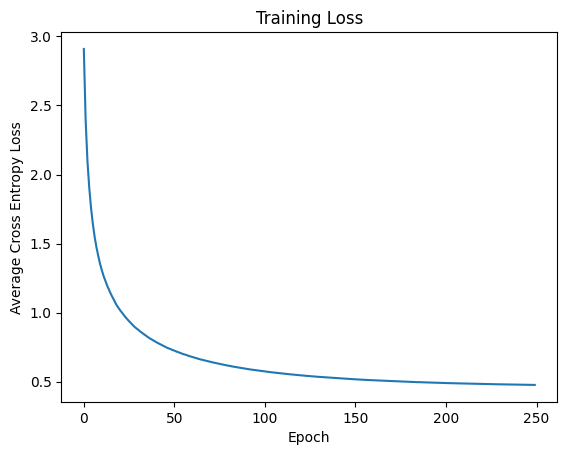

  1%|          | 2/250 [00:00<00:27,  9.02it/s]

Epoch 1/250, Loss: 2.8549
Epoch 2/250, Loss: 2.3077


  2%|▏         | 4/250 [00:00<00:27,  8.84it/s]

Epoch 3/250, Loss: 2.0096
Epoch 4/250, Loss: 1.8143


  2%|▏         | 6/250 [00:00<00:33,  7.35it/s]

Epoch 5/250, Loss: 1.6703
Epoch 6/250, Loss: 1.5571


  3%|▎         | 8/250 [00:01<00:35,  6.90it/s]

Epoch 7/250, Loss: 1.4692
Epoch 8/250, Loss: 1.3927


  4%|▍         | 10/250 [00:01<00:36,  6.66it/s]

Epoch 9/250, Loss: 1.3298
Epoch 10/250, Loss: 1.2711


  5%|▍         | 12/250 [00:01<00:35,  6.66it/s]

Epoch 11/250, Loss: 1.2296
Epoch 12/250, Loss: 1.1876


  6%|▌         | 14/250 [00:01<00:35,  6.65it/s]

Epoch 13/250, Loss: 1.1543
Epoch 14/250, Loss: 1.1211


  6%|▋         | 16/250 [00:02<00:36,  6.39it/s]

Epoch 15/250, Loss: 1.0886
Epoch 16/250, Loss: 1.0621


  7%|▋         | 18/250 [00:02<00:38,  6.04it/s]

Epoch 17/250, Loss: 1.0366
Epoch 18/250, Loss: 1.0123


  8%|▊         | 20/250 [00:03<00:39,  5.81it/s]

Epoch 19/250, Loss: 0.9907
Epoch 20/250, Loss: 0.9713


  8%|▊         | 21/250 [00:03<00:39,  5.83it/s]

Epoch 21/250, Loss: 0.9533


  9%|▉         | 23/250 [00:03<00:37,  6.10it/s]

Epoch 22/250, Loss: 0.9366
Epoch 23/250, Loss: 0.9187


 10%|█         | 25/250 [00:03<00:32,  7.02it/s]

Epoch 24/250, Loss: 0.9028
Epoch 25/250, Loss: 0.8909


 11%|█         | 27/250 [00:03<00:28,  7.90it/s]

Epoch 26/250, Loss: 0.8757
Epoch 27/250, Loss: 0.8627


 12%|█▏        | 29/250 [00:04<00:26,  8.32it/s]

Epoch 28/250, Loss: 0.8485
Epoch 29/250, Loss: 0.8367


 12%|█▏        | 31/250 [00:04<00:25,  8.65it/s]

Epoch 30/250, Loss: 0.8257
Epoch 31/250, Loss: 0.8158


 13%|█▎        | 33/250 [00:04<00:24,  8.72it/s]

Epoch 32/250, Loss: 0.8061
Epoch 33/250, Loss: 0.7961


 14%|█▍        | 35/250 [00:04<00:24,  8.66it/s]

Epoch 34/250, Loss: 0.7872
Epoch 35/250, Loss: 0.7773


 15%|█▍        | 37/250 [00:05<00:24,  8.86it/s]

Epoch 36/250, Loss: 0.7694
Epoch 37/250, Loss: 0.7598


 16%|█▌        | 39/250 [00:05<00:23,  8.91it/s]

Epoch 38/250, Loss: 0.7515
Epoch 39/250, Loss: 0.7448


 16%|█▋        | 41/250 [00:05<00:23,  8.97it/s]

Epoch 40/250, Loss: 0.7375
Epoch 41/250, Loss: 0.7296


 17%|█▋        | 43/250 [00:05<00:23,  8.71it/s]

Epoch 42/250, Loss: 0.7242
Epoch 43/250, Loss: 0.7176


 18%|█▊        | 45/250 [00:06<00:23,  8.91it/s]

Epoch 44/250, Loss: 0.7106
Epoch 45/250, Loss: 0.7040


 19%|█▉        | 47/250 [00:06<00:22,  8.93it/s]

Epoch 46/250, Loss: 0.6969
Epoch 47/250, Loss: 0.6917


 20%|█▉        | 49/250 [00:06<00:22,  9.01it/s]

Epoch 48/250, Loss: 0.6866
Epoch 49/250, Loss: 0.6806


 20%|██        | 51/250 [00:06<00:22,  8.99it/s]

Epoch 50/250, Loss: 0.6760
Epoch 51/250, Loss: 0.6705


 21%|██        | 53/250 [00:06<00:22,  8.90it/s]

Epoch 52/250, Loss: 0.6660
Epoch 53/250, Loss: 0.6613


 22%|██▏       | 55/250 [00:07<00:21,  9.09it/s]

Epoch 54/250, Loss: 0.6557
Epoch 55/250, Loss: 0.6516


 23%|██▎       | 57/250 [00:07<00:21,  9.13it/s]

Epoch 56/250, Loss: 0.6465
Epoch 57/250, Loss: 0.6431


 24%|██▎       | 59/250 [00:07<00:21,  9.06it/s]

Epoch 58/250, Loss: 0.6388
Epoch 59/250, Loss: 0.6343


 24%|██▍       | 61/250 [00:07<00:21,  8.66it/s]

Epoch 60/250, Loss: 0.6308
Epoch 61/250, Loss: 0.6268


 25%|██▌       | 63/250 [00:08<00:21,  8.54it/s]

Epoch 62/250, Loss: 0.6229
Epoch 63/250, Loss: 0.6191


 26%|██▌       | 65/250 [00:08<00:21,  8.69it/s]

Epoch 64/250, Loss: 0.6153
Epoch 65/250, Loss: 0.6116


 27%|██▋       | 67/250 [00:08<00:20,  8.80it/s]

Epoch 66/250, Loss: 0.6086
Epoch 67/250, Loss: 0.6050


 28%|██▊       | 69/250 [00:08<00:20,  8.90it/s]

Epoch 68/250, Loss: 0.6021
Epoch 69/250, Loss: 0.5991


 28%|██▊       | 71/250 [00:08<00:21,  8.44it/s]

Epoch 70/250, Loss: 0.5956
Epoch 71/250, Loss: 0.5929


 29%|██▉       | 73/250 [00:09<00:20,  8.55it/s]

Epoch 72/250, Loss: 0.5900
Epoch 73/250, Loss: 0.5871


 30%|███       | 75/250 [00:09<00:20,  8.61it/s]

Epoch 74/250, Loss: 0.5837
Epoch 75/250, Loss: 0.5812


 31%|███       | 77/250 [00:09<00:20,  8.60it/s]

Epoch 76/250, Loss: 0.5788
Epoch 77/250, Loss: 0.5759


 32%|███▏      | 79/250 [00:09<00:19,  8.68it/s]

Epoch 78/250, Loss: 0.5733
Epoch 79/250, Loss: 0.5706


 32%|███▏      | 81/250 [00:10<00:19,  8.82it/s]

Epoch 80/250, Loss: 0.5681
Epoch 81/250, Loss: 0.5659


 33%|███▎      | 83/250 [00:10<00:18,  8.84it/s]

Epoch 82/250, Loss: 0.5634
Epoch 83/250, Loss: 0.5611


 34%|███▍      | 85/250 [00:10<00:18,  8.82it/s]

Epoch 84/250, Loss: 0.5588
Epoch 85/250, Loss: 0.5568


 35%|███▍      | 87/250 [00:10<00:18,  8.60it/s]

Epoch 86/250, Loss: 0.5544
Epoch 87/250, Loss: 0.5524


 36%|███▌      | 89/250 [00:11<00:18,  8.76it/s]

Epoch 88/250, Loss: 0.5501
Epoch 89/250, Loss: 0.5486


 36%|███▋      | 91/250 [00:11<00:18,  8.79it/s]

Epoch 90/250, Loss: 0.5464
Epoch 91/250, Loss: 0.5441


 37%|███▋      | 93/250 [00:11<00:17,  8.93it/s]

Epoch 92/250, Loss: 0.5422
Epoch 93/250, Loss: 0.5404


 38%|███▊      | 95/250 [00:11<00:17,  8.99it/s]

Epoch 94/250, Loss: 0.5386
Epoch 95/250, Loss: 0.5367


 39%|███▉      | 97/250 [00:11<00:17,  8.75it/s]

Epoch 96/250, Loss: 0.5352
Epoch 97/250, Loss: 0.5333


 40%|███▉      | 99/250 [00:12<00:16,  8.92it/s]

Epoch 98/250, Loss: 0.5315
Epoch 99/250, Loss: 0.5298


 40%|████      | 101/250 [00:12<00:17,  8.76it/s]

Epoch 100/250, Loss: 0.5280
Epoch 101/250, Loss: 0.5259


 41%|████      | 103/250 [00:12<00:16,  8.65it/s]

Epoch 102/250, Loss: 0.5247
Epoch 103/250, Loss: 0.5235


 42%|████▏     | 105/250 [00:12<00:16,  8.58it/s]

Epoch 104/250, Loss: 0.5216
Epoch 105/250, Loss: 0.5199


 43%|████▎     | 107/250 [00:13<00:16,  8.68it/s]

Epoch 106/250, Loss: 0.5185
Epoch 107/250, Loss: 0.5168


 44%|████▎     | 109/250 [00:13<00:15,  8.83it/s]

Epoch 108/250, Loss: 0.5158
Epoch 109/250, Loss: 0.5142


 44%|████▍     | 111/250 [00:13<00:18,  7.70it/s]

Epoch 110/250, Loss: 0.5128
Epoch 111/250, Loss: 0.5116


 45%|████▌     | 113/250 [00:13<00:20,  6.72it/s]

Epoch 112/250, Loss: 0.5102
Epoch 113/250, Loss: 0.5088


 46%|████▌     | 115/250 [00:14<00:20,  6.66it/s]

Epoch 114/250, Loss: 0.5076
Epoch 115/250, Loss: 0.5061


 47%|████▋     | 117/250 [00:14<00:19,  6.72it/s]

Epoch 116/250, Loss: 0.5048
Epoch 117/250, Loss: 0.5038


 48%|████▊     | 119/250 [00:14<00:19,  6.70it/s]

Epoch 118/250, Loss: 0.5023
Epoch 119/250, Loss: 0.5014


 48%|████▊     | 121/250 [00:15<00:20,  6.35it/s]

Epoch 120/250, Loss: 0.5001
Epoch 121/250, Loss: 0.4993


 49%|████▉     | 123/250 [00:15<00:20,  6.15it/s]

Epoch 122/250, Loss: 0.4980
Epoch 123/250, Loss: 0.4968


 50%|█████     | 125/250 [00:15<00:20,  6.01it/s]

Epoch 124/250, Loss: 0.4956
Epoch 125/250, Loss: 0.4946


 51%|█████     | 127/250 [00:16<00:20,  6.00it/s]

Epoch 126/250, Loss: 0.4936
Epoch 127/250, Loss: 0.4924


 52%|█████▏    | 129/250 [00:16<00:17,  6.89it/s]

Epoch 128/250, Loss: 0.4914
Epoch 129/250, Loss: 0.4901


 52%|█████▏    | 131/250 [00:16<00:15,  7.81it/s]

Epoch 130/250, Loss: 0.4895
Epoch 131/250, Loss: 0.4884


 53%|█████▎    | 133/250 [00:16<00:13,  8.39it/s]

Epoch 132/250, Loss: 0.4876
Epoch 133/250, Loss: 0.4864


 54%|█████▍    | 135/250 [00:17<00:13,  8.47it/s]

Epoch 134/250, Loss: 0.4857
Epoch 135/250, Loss: 0.4848


 55%|█████▍    | 137/250 [00:17<00:13,  8.68it/s]

Epoch 136/250, Loss: 0.4840
Epoch 137/250, Loss: 0.4829


 56%|█████▌    | 139/250 [00:17<00:12,  8.59it/s]

Epoch 138/250, Loss: 0.4819
Epoch 139/250, Loss: 0.4812


 56%|█████▋    | 141/250 [00:17<00:12,  8.87it/s]

Epoch 140/250, Loss: 0.4804
Epoch 141/250, Loss: 0.4796


 57%|█████▋    | 143/250 [00:18<00:11,  8.95it/s]

Epoch 142/250, Loss: 0.4786
Epoch 143/250, Loss: 0.4776


 58%|█████▊    | 145/250 [00:18<00:11,  8.89it/s]

Epoch 144/250, Loss: 0.4769
Epoch 145/250, Loss: 0.4765


 59%|█████▉    | 147/250 [00:18<00:11,  8.93it/s]

Epoch 146/250, Loss: 0.4753
Epoch 147/250, Loss: 0.4744


 60%|█████▉    | 149/250 [00:18<00:11,  8.98it/s]

Epoch 148/250, Loss: 0.4739
Epoch 149/250, Loss: 0.4733


 60%|██████    | 151/250 [00:18<00:10,  9.01it/s]

Epoch 150/250, Loss: 0.4722
Epoch 151/250, Loss: 0.4718


 61%|██████    | 153/250 [00:19<00:11,  8.79it/s]

Epoch 152/250, Loss: 0.4711
Epoch 153/250, Loss: 0.4702


 62%|██████▏   | 155/250 [00:19<00:10,  8.92it/s]

Epoch 154/250, Loss: 0.4697
Epoch 155/250, Loss: 0.4688


 63%|██████▎   | 157/250 [00:19<00:10,  9.04it/s]

Epoch 156/250, Loss: 0.4680
Epoch 157/250, Loss: 0.4677


 64%|██████▎   | 159/250 [00:19<00:10,  9.04it/s]

Epoch 158/250, Loss: 0.4669
Epoch 159/250, Loss: 0.4663


 64%|██████▍   | 161/250 [00:20<00:10,  8.80it/s]

Epoch 160/250, Loss: 0.4656
Epoch 161/250, Loss: 0.4650


 65%|██████▌   | 163/250 [00:20<00:09,  8.82it/s]

Epoch 162/250, Loss: 0.4645
Epoch 163/250, Loss: 0.4636


 66%|██████▌   | 165/250 [00:20<00:09,  8.84it/s]

Epoch 164/250, Loss: 0.4631
Epoch 165/250, Loss: 0.4627


 67%|██████▋   | 167/250 [00:20<00:09,  8.99it/s]

Epoch 166/250, Loss: 0.4621
Epoch 167/250, Loss: 0.4614


 68%|██████▊   | 169/250 [00:20<00:08,  9.13it/s]

Epoch 168/250, Loss: 0.4611
Epoch 169/250, Loss: 0.4603


 68%|██████▊   | 171/250 [00:21<00:09,  8.75it/s]

Epoch 170/250, Loss: 0.4596
Epoch 171/250, Loss: 0.4593


 69%|██████▉   | 173/250 [00:21<00:08,  8.88it/s]

Epoch 172/250, Loss: 0.4586
Epoch 173/250, Loss: 0.4581


 70%|███████   | 175/250 [00:21<00:08,  8.96it/s]

Epoch 174/250, Loss: 0.4575
Epoch 175/250, Loss: 0.4568


 71%|███████   | 177/250 [00:21<00:08,  8.98it/s]

Epoch 176/250, Loss: 0.4566
Epoch 177/250, Loss: 0.4562


 72%|███████▏  | 179/250 [00:22<00:07,  9.04it/s]

Epoch 178/250, Loss: 0.4557
Epoch 179/250, Loss: 0.4551


 72%|███████▏  | 181/250 [00:22<00:07,  8.87it/s]

Epoch 180/250, Loss: 0.4547
Epoch 181/250, Loss: 0.4541


 73%|███████▎  | 183/250 [00:22<00:07,  8.87it/s]

Epoch 182/250, Loss: 0.4538
Epoch 183/250, Loss: 0.4533


 74%|███████▍  | 185/250 [00:22<00:07,  8.91it/s]

Epoch 184/250, Loss: 0.4529
Epoch 185/250, Loss: 0.4524


 75%|███████▍  | 187/250 [00:22<00:07,  8.99it/s]

Epoch 186/250, Loss: 0.4518
Epoch 187/250, Loss: 0.4512


 76%|███████▌  | 189/250 [00:23<00:06,  8.82it/s]

Epoch 188/250, Loss: 0.4510
Epoch 189/250, Loss: 0.4507


 76%|███████▋  | 191/250 [00:23<00:06,  8.85it/s]

Epoch 190/250, Loss: 0.4502
Epoch 191/250, Loss: 0.4501


 77%|███████▋  | 193/250 [00:23<00:06,  8.99it/s]

Epoch 192/250, Loss: 0.4493
Epoch 193/250, Loss: 0.4490


 78%|███████▊  | 195/250 [00:23<00:06,  9.08it/s]

Epoch 194/250, Loss: 0.4484
Epoch 195/250, Loss: 0.4481


 79%|███████▉  | 197/250 [00:24<00:05,  9.00it/s]

Epoch 196/250, Loss: 0.4477
Epoch 197/250, Loss: 0.4476


 80%|███████▉  | 199/250 [00:24<00:05,  8.52it/s]

Epoch 198/250, Loss: 0.4470
Epoch 199/250, Loss: 0.4466


 80%|████████  | 201/250 [00:24<00:05,  8.61it/s]

Epoch 200/250, Loss: 0.4462
Epoch 201/250, Loss: 0.4459


 81%|████████  | 203/250 [00:24<00:05,  8.72it/s]

Epoch 202/250, Loss: 0.4455
Epoch 203/250, Loss: 0.4453


 82%|████████▏ | 205/250 [00:25<00:05,  8.89it/s]

Epoch 204/250, Loss: 0.4449
Epoch 205/250, Loss: 0.4446


 83%|████████▎ | 207/250 [00:25<00:04,  8.81it/s]

Epoch 206/250, Loss: 0.4444
Epoch 207/250, Loss: 0.4439


 84%|████████▎ | 209/250 [00:25<00:04,  8.79it/s]

Epoch 208/250, Loss: 0.4434
Epoch 209/250, Loss: 0.4434


 84%|████████▍ | 211/250 [00:25<00:04,  8.94it/s]

Epoch 210/250, Loss: 0.4428
Epoch 211/250, Loss: 0.4425


 85%|████████▌ | 213/250 [00:25<00:04,  9.07it/s]

Epoch 212/250, Loss: 0.4421
Epoch 213/250, Loss: 0.4419


 86%|████████▌ | 215/250 [00:26<00:03,  9.01it/s]

Epoch 214/250, Loss: 0.4416
Epoch 215/250, Loss: 0.4412


 87%|████████▋ | 217/250 [00:26<00:04,  7.69it/s]

Epoch 216/250, Loss: 0.4412
Epoch 217/250, Loss: 0.4408


 88%|████████▊ | 219/250 [00:26<00:04,  7.02it/s]

Epoch 218/250, Loss: 0.4404
Epoch 219/250, Loss: 0.4402


 88%|████████▊ | 221/250 [00:27<00:04,  6.78it/s]

Epoch 220/250, Loss: 0.4398
Epoch 221/250, Loss: 0.4398


 89%|████████▉ | 223/250 [00:27<00:03,  6.84it/s]

Epoch 222/250, Loss: 0.4396
Epoch 223/250, Loss: 0.4390


 90%|█████████ | 225/250 [00:27<00:03,  6.78it/s]

Epoch 224/250, Loss: 0.4390
Epoch 225/250, Loss: 0.4386


 91%|█████████ | 227/250 [00:27<00:03,  6.52it/s]

Epoch 226/250, Loss: 0.4383
Epoch 227/250, Loss: 0.4381


 92%|█████████▏| 229/250 [00:28<00:03,  6.18it/s]

Epoch 228/250, Loss: 0.4378
Epoch 229/250, Loss: 0.4375


 92%|█████████▏| 231/250 [00:28<00:03,  6.11it/s]

Epoch 230/250, Loss: 0.4372
Epoch 231/250, Loss: 0.4371


 93%|█████████▎| 233/250 [00:28<00:02,  6.12it/s]

Epoch 232/250, Loss: 0.4368
Epoch 233/250, Loss: 0.4365


 94%|█████████▍| 235/250 [00:29<00:02,  6.78it/s]

Epoch 234/250, Loss: 0.4362
Epoch 235/250, Loss: 0.4360


 95%|█████████▍| 237/250 [00:29<00:01,  7.51it/s]

Epoch 236/250, Loss: 0.4358
Epoch 237/250, Loss: 0.4356


 96%|█████████▌| 239/250 [00:29<00:01,  8.12it/s]

Epoch 238/250, Loss: 0.4353
Epoch 239/250, Loss: 0.4352


 96%|█████████▋| 241/250 [00:29<00:01,  8.62it/s]

Epoch 240/250, Loss: 0.4350
Epoch 241/250, Loss: 0.4348


 97%|█████████▋| 243/250 [00:30<00:00,  8.82it/s]

Epoch 242/250, Loss: 0.4346
Epoch 243/250, Loss: 0.4342


 98%|█████████▊| 245/250 [00:30<00:00,  9.04it/s]

Epoch 244/250, Loss: 0.4343
Epoch 245/250, Loss: 0.4340


 99%|█████████▉| 247/250 [00:30<00:00,  8.90it/s]

Epoch 246/250, Loss: 0.4337
Epoch 247/250, Loss: 0.4335


100%|█████████▉| 249/250 [00:30<00:00,  8.88it/s]

Epoch 248/250, Loss: 0.4332
Epoch 249/250, Loss: 0.4332


100%|██████████| 250/250 [00:30<00:00,  8.08it/s]


Epoch 250/250, Loss: 0.4329


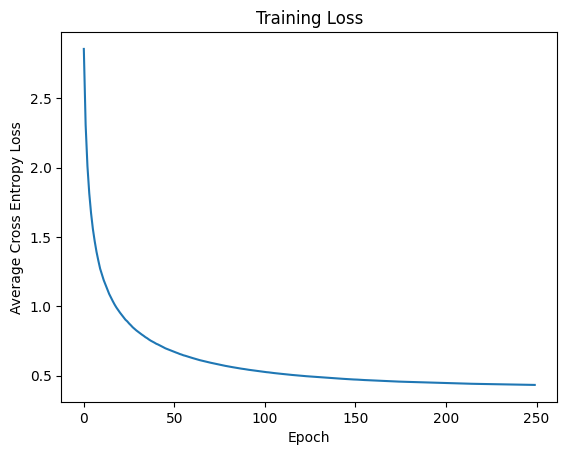

   learning_rate  gradient_steps validation_accuracy
0           0.04             250  0.8732471316700054
1           0.05             250  0.8881806592606083
2           0.06             250  0.9009287925696594
3           0.07             250  0.9131305773083227
Best validation accuracy is 0.9131305773083227 with parameters {'gradient_steps': 250, 'learning_rate': 0.07}


  0%|          | 1/250 [00:00<00:34,  7.28it/s]

Epoch 1/250, Loss: 2.7618


  1%|          | 2/250 [00:00<00:35,  7.00it/s]

Epoch 2/250, Loss: 2.1796


  1%|          | 3/250 [00:00<00:35,  6.91it/s]

Epoch 3/250, Loss: 1.8847


  2%|▏         | 4/250 [00:00<00:35,  6.87it/s]

Epoch 4/250, Loss: 1.6896


  2%|▏         | 5/250 [00:00<00:35,  6.92it/s]

Epoch 5/250, Loss: 1.5486


  2%|▏         | 6/250 [00:00<00:35,  6.95it/s]

Epoch 6/250, Loss: 1.4455


  3%|▎         | 7/250 [00:01<00:34,  6.96it/s]

Epoch 7/250, Loss: 1.3562


  3%|▎         | 8/250 [00:01<00:34,  7.02it/s]

Epoch 8/250, Loss: 1.2846


  4%|▎         | 9/250 [00:01<00:34,  6.98it/s]

Epoch 9/250, Loss: 1.2272


  4%|▍         | 10/250 [00:01<00:35,  6.78it/s]

Epoch 10/250, Loss: 1.1775


  4%|▍         | 11/250 [00:01<00:34,  6.83it/s]

Epoch 11/250, Loss: 1.1392


  5%|▍         | 12/250 [00:01<00:34,  6.90it/s]

Epoch 12/250, Loss: 1.1001


  5%|▌         | 13/250 [00:01<00:34,  6.97it/s]

Epoch 13/250, Loss: 1.0645


  6%|▌         | 14/250 [00:02<00:33,  6.99it/s]

Epoch 14/250, Loss: 1.0337


  6%|▌         | 15/250 [00:02<00:33,  7.03it/s]

Epoch 15/250, Loss: 1.0039


  6%|▋         | 16/250 [00:02<00:33,  7.07it/s]

Epoch 16/250, Loss: 0.9787


  7%|▋         | 17/250 [00:02<00:33,  6.85it/s]

Epoch 17/250, Loss: 0.9548


  7%|▋         | 18/250 [00:02<00:33,  6.88it/s]

Epoch 18/250, Loss: 0.9360


  8%|▊         | 19/250 [00:02<00:33,  6.87it/s]

Epoch 19/250, Loss: 0.9162


  8%|▊         | 20/250 [00:02<00:33,  6.93it/s]

Epoch 20/250, Loss: 0.8950


  8%|▊         | 21/250 [00:03<00:33,  6.90it/s]

Epoch 21/250, Loss: 0.8788


  9%|▉         | 22/250 [00:03<00:32,  7.05it/s]

Epoch 22/250, Loss: 0.8603


  9%|▉         | 23/250 [00:03<00:32,  7.04it/s]

Epoch 23/250, Loss: 0.8449


 10%|▉         | 24/250 [00:03<00:32,  6.85it/s]

Epoch 24/250, Loss: 0.8328


 10%|█         | 25/250 [00:03<00:33,  6.80it/s]

Epoch 25/250, Loss: 0.8190


 10%|█         | 26/250 [00:03<00:33,  6.68it/s]

Epoch 26/250, Loss: 0.8066


 11%|█         | 27/250 [00:03<00:32,  6.78it/s]

Epoch 27/250, Loss: 0.7938


 11%|█         | 28/250 [00:04<00:32,  6.80it/s]

Epoch 28/250, Loss: 0.7821


 12%|█▏        | 29/250 [00:04<00:32,  6.91it/s]

Epoch 29/250, Loss: 0.7716


 12%|█▏        | 30/250 [00:04<00:31,  6.88it/s]

Epoch 30/250, Loss: 0.7602


 12%|█▏        | 31/250 [00:04<00:32,  6.74it/s]

Epoch 31/250, Loss: 0.7506


 13%|█▎        | 32/250 [00:04<00:32,  6.74it/s]

Epoch 32/250, Loss: 0.7413


 13%|█▎        | 33/250 [00:04<00:31,  6.81it/s]

Epoch 33/250, Loss: 0.7328


 14%|█▎        | 34/250 [00:04<00:31,  6.84it/s]

Epoch 34/250, Loss: 0.7241


 14%|█▍        | 35/250 [00:05<00:31,  6.93it/s]

Epoch 35/250, Loss: 0.7148


 14%|█▍        | 36/250 [00:05<00:31,  6.86it/s]

Epoch 36/250, Loss: 0.7081


 15%|█▍        | 37/250 [00:05<00:31,  6.85it/s]

Epoch 37/250, Loss: 0.6992


 15%|█▌        | 38/250 [00:05<00:31,  6.71it/s]

Epoch 38/250, Loss: 0.6924


 16%|█▌        | 39/250 [00:05<00:30,  6.82it/s]

Epoch 39/250, Loss: 0.6867


 16%|█▌        | 40/250 [00:05<00:30,  6.87it/s]

Epoch 40/250, Loss: 0.6798


 16%|█▋        | 41/250 [00:05<00:30,  6.89it/s]

Epoch 41/250, Loss: 0.6732


 17%|█▋        | 42/250 [00:06<00:29,  6.98it/s]

Epoch 42/250, Loss: 0.6658


 17%|█▋        | 43/250 [00:06<00:29,  7.04it/s]

Epoch 43/250, Loss: 0.6597


 18%|█▊        | 44/250 [00:06<00:29,  7.05it/s]

Epoch 44/250, Loss: 0.6543


 18%|█▊        | 45/250 [00:06<00:29,  6.90it/s]

Epoch 45/250, Loss: 0.6499


 18%|█▊        | 46/250 [00:06<00:29,  6.85it/s]

Epoch 46/250, Loss: 0.6432


 19%|█▉        | 47/250 [00:06<00:29,  6.99it/s]

Epoch 47/250, Loss: 0.6384


 19%|█▉        | 48/250 [00:06<00:28,  6.98it/s]

Epoch 48/250, Loss: 0.6324


 20%|█▉        | 49/250 [00:07<00:28,  7.02it/s]

Epoch 49/250, Loss: 0.6287


 20%|██        | 50/250 [00:07<00:28,  7.05it/s]

Epoch 50/250, Loss: 0.6239


 20%|██        | 51/250 [00:07<00:28,  6.98it/s]

Epoch 51/250, Loss: 0.6196


 21%|██        | 52/250 [00:07<00:29,  6.78it/s]

Epoch 52/250, Loss: 0.6147


 21%|██        | 53/250 [00:07<00:28,  6.87it/s]

Epoch 53/250, Loss: 0.6101


 22%|██▏       | 54/250 [00:07<00:29,  6.59it/s]

Epoch 54/250, Loss: 0.6066


 22%|██▏       | 55/250 [00:08<00:30,  6.37it/s]

Epoch 55/250, Loss: 0.6019


 22%|██▏       | 56/250 [00:08<00:32,  5.91it/s]

Epoch 56/250, Loss: 0.5985


 23%|██▎       | 58/250 [00:08<00:34,  5.52it/s]

Epoch 57/250, Loss: 0.5940
Epoch 58/250, Loss: 0.5909


 24%|██▍       | 60/250 [00:08<00:34,  5.49it/s]

Epoch 59/250, Loss: 0.5875
Epoch 60/250, Loss: 0.5839


 25%|██▍       | 62/250 [00:09<00:34,  5.42it/s]

Epoch 61/250, Loss: 0.5803
Epoch 62/250, Loss: 0.5769


 25%|██▌       | 63/250 [00:09<00:35,  5.22it/s]

Epoch 63/250, Loss: 0.5742


 26%|██▌       | 64/250 [00:09<00:36,  5.08it/s]

Epoch 64/250, Loss: 0.5706


 26%|██▌       | 65/250 [00:09<00:38,  4.84it/s]

Epoch 65/250, Loss: 0.5678


 26%|██▋       | 66/250 [00:10<00:38,  4.79it/s]

Epoch 66/250, Loss: 0.5639


 27%|██▋       | 67/250 [00:10<00:39,  4.67it/s]

Epoch 67/250, Loss: 0.5609


 28%|██▊       | 69/250 [00:10<00:36,  4.97it/s]

Epoch 68/250, Loss: 0.5583
Epoch 69/250, Loss: 0.5571


 28%|██▊       | 71/250 [00:11<00:30,  5.90it/s]

Epoch 70/250, Loss: 0.5539
Epoch 71/250, Loss: 0.5518


 29%|██▉       | 73/250 [00:11<00:27,  6.44it/s]

Epoch 72/250, Loss: 0.5472
Epoch 73/250, Loss: 0.5444


 30%|███       | 75/250 [00:11<00:26,  6.70it/s]

Epoch 74/250, Loss: 0.5442
Epoch 75/250, Loss: 0.5409


 31%|███       | 77/250 [00:11<00:25,  6.90it/s]

Epoch 76/250, Loss: 0.5385
Epoch 77/250, Loss: 0.5363


 32%|███▏      | 79/250 [00:12<00:24,  7.05it/s]

Epoch 78/250, Loss: 0.5344
Epoch 79/250, Loss: 0.5317


 32%|███▏      | 81/250 [00:12<00:23,  7.13it/s]

Epoch 80/250, Loss: 0.5298
Epoch 81/250, Loss: 0.5268


 33%|███▎      | 83/250 [00:12<00:23,  7.04it/s]

Epoch 82/250, Loss: 0.5257
Epoch 83/250, Loss: 0.5239


 34%|███▍      | 85/250 [00:13<00:23,  7.14it/s]

Epoch 84/250, Loss: 0.5226
Epoch 85/250, Loss: 0.5202


 35%|███▍      | 87/250 [00:13<00:24,  6.78it/s]

Epoch 86/250, Loss: 0.5174
Epoch 87/250, Loss: 0.5167


 36%|███▌      | 89/250 [00:13<00:23,  6.85it/s]

Epoch 88/250, Loss: 0.5138
Epoch 89/250, Loss: 0.5129


 36%|███▋      | 91/250 [00:13<00:23,  6.89it/s]

Epoch 90/250, Loss: 0.5114
Epoch 91/250, Loss: 0.5100


 37%|███▋      | 93/250 [00:14<00:22,  7.11it/s]

Epoch 92/250, Loss: 0.5077
Epoch 93/250, Loss: 0.5061


 38%|███▊      | 95/250 [00:14<00:21,  7.09it/s]

Epoch 94/250, Loss: 0.5040
Epoch 95/250, Loss: 0.5031


 39%|███▉      | 97/250 [00:14<00:21,  7.10it/s]

Epoch 96/250, Loss: 0.5027
Epoch 97/250, Loss: 0.5010


 40%|███▉      | 99/250 [00:15<00:21,  7.13it/s]

Epoch 98/250, Loss: 0.4988
Epoch 99/250, Loss: 0.4972


 40%|████      | 101/250 [00:15<00:20,  7.15it/s]

Epoch 100/250, Loss: 0.4969
Epoch 101/250, Loss: 0.4947


 41%|████      | 103/250 [00:15<00:20,  7.12it/s]

Epoch 102/250, Loss: 0.4931
Epoch 103/250, Loss: 0.4915


 42%|████▏     | 105/250 [00:15<00:20,  7.00it/s]

Epoch 104/250, Loss: 0.4909
Epoch 105/250, Loss: 0.4889


 43%|████▎     | 107/250 [00:16<00:19,  7.16it/s]

Epoch 106/250, Loss: 0.4885
Epoch 107/250, Loss: 0.4863


 44%|████▎     | 109/250 [00:16<00:19,  7.18it/s]

Epoch 108/250, Loss: 0.4860
Epoch 109/250, Loss: 0.4846


 44%|████▍     | 111/250 [00:16<00:19,  7.10it/s]

Epoch 110/250, Loss: 0.4837
Epoch 111/250, Loss: 0.4830


 45%|████▌     | 113/250 [00:17<00:19,  7.14it/s]

Epoch 112/250, Loss: 0.4821
Epoch 113/250, Loss: 0.4797


 46%|████▌     | 115/250 [00:17<00:18,  7.27it/s]

Epoch 114/250, Loss: 0.4791
Epoch 115/250, Loss: 0.4779


 47%|████▋     | 117/250 [00:17<00:18,  7.30it/s]

Epoch 116/250, Loss: 0.4779
Epoch 117/250, Loss: 0.4755


 48%|████▊     | 119/250 [00:17<00:18,  7.18it/s]

Epoch 118/250, Loss: 0.4752
Epoch 119/250, Loss: 0.4745


 48%|████▊     | 121/250 [00:18<00:18,  7.12it/s]

Epoch 120/250, Loss: 0.4727
Epoch 121/250, Loss: 0.4737


 49%|████▉     | 123/250 [00:18<00:17,  7.18it/s]

Epoch 122/250, Loss: 0.4720
Epoch 123/250, Loss: 0.4708


 50%|█████     | 125/250 [00:18<00:17,  7.13it/s]

Epoch 124/250, Loss: 0.4693
Epoch 125/250, Loss: 0.4690


 51%|█████     | 127/250 [00:19<00:18,  6.60it/s]

Epoch 126/250, Loss: 0.4679
Epoch 127/250, Loss: 0.4680


 52%|█████▏    | 129/250 [00:19<00:18,  6.61it/s]

Epoch 128/250, Loss: 0.4671
Epoch 129/250, Loss: 0.4658


 52%|█████▏    | 131/250 [00:19<00:18,  6.49it/s]

Epoch 130/250, Loss: 0.4655
Epoch 131/250, Loss: 0.4645


 53%|█████▎    | 133/250 [00:19<00:17,  6.50it/s]

Epoch 132/250, Loss: 0.4629
Epoch 133/250, Loss: 0.4632


 54%|█████▍    | 135/250 [00:20<00:16,  6.76it/s]

Epoch 134/250, Loss: 0.4629
Epoch 135/250, Loss: 0.4611


 55%|█████▍    | 137/250 [00:20<00:16,  7.03it/s]

Epoch 136/250, Loss: 0.4615
Epoch 137/250, Loss: 0.4605


 56%|█████▌    | 139/250 [00:20<00:17,  6.37it/s]

Epoch 138/250, Loss: 0.4601
Epoch 139/250, Loss: 0.4590


 56%|█████▋    | 141/250 [00:21<00:18,  5.79it/s]

Epoch 140/250, Loss: 0.4581
Epoch 141/250, Loss: 0.4579


 57%|█████▋    | 143/250 [00:21<00:19,  5.55it/s]

Epoch 142/250, Loss: 0.4569
Epoch 143/250, Loss: 0.4564


 58%|█████▊    | 145/250 [00:22<00:19,  5.37it/s]

Epoch 144/250, Loss: 0.4561
Epoch 145/250, Loss: 0.4553


 58%|█████▊    | 146/250 [00:22<00:19,  5.20it/s]

Epoch 146/250, Loss: 0.4542


 59%|█████▉    | 147/250 [00:22<00:21,  4.87it/s]

Epoch 147/250, Loss: 0.4546


 59%|█████▉    | 148/250 [00:22<00:21,  4.69it/s]

Epoch 148/250, Loss: 0.4536


 60%|█████▉    | 149/250 [00:22<00:21,  4.68it/s]

Epoch 149/250, Loss: 0.4530


 60%|██████    | 150/250 [00:23<00:21,  4.62it/s]

Epoch 150/250, Loss: 0.4518


 60%|██████    | 151/250 [00:23<00:21,  4.58it/s]

Epoch 151/250, Loss: 0.4519


 61%|██████    | 153/250 [00:23<00:18,  5.16it/s]

Epoch 152/250, Loss: 0.4513
Epoch 153/250, Loss: 0.4505


 62%|██████▏   | 155/250 [00:23<00:15,  5.96it/s]

Epoch 154/250, Loss: 0.4501
Epoch 155/250, Loss: 0.4490


 63%|██████▎   | 157/250 [00:24<00:14,  6.54it/s]

Epoch 156/250, Loss: 0.4490
Epoch 157/250, Loss: 0.4488


 64%|██████▎   | 159/250 [00:24<00:13,  6.87it/s]

Epoch 158/250, Loss: 0.4486
Epoch 159/250, Loss: 0.4475


 64%|██████▍   | 161/250 [00:24<00:12,  7.01it/s]

Epoch 160/250, Loss: 0.4470
Epoch 161/250, Loss: 0.4466


 65%|██████▌   | 163/250 [00:25<00:12,  6.92it/s]

Epoch 162/250, Loss: 0.4463
Epoch 163/250, Loss: 0.4460


 66%|██████▌   | 165/250 [00:25<00:12,  6.98it/s]

Epoch 164/250, Loss: 0.4460
Epoch 165/250, Loss: 0.4450


 67%|██████▋   | 167/250 [00:25<00:11,  7.09it/s]

Epoch 166/250, Loss: 0.4445
Epoch 167/250, Loss: 0.4441


 68%|██████▊   | 169/250 [00:25<00:11,  7.08it/s]

Epoch 168/250, Loss: 0.4437
Epoch 169/250, Loss: 0.4433


 68%|██████▊   | 171/250 [00:26<00:11,  7.06it/s]

Epoch 170/250, Loss: 0.4437
Epoch 171/250, Loss: 0.4425


 69%|██████▉   | 173/250 [00:26<00:10,  7.05it/s]

Epoch 172/250, Loss: 0.4419
Epoch 173/250, Loss: 0.4430


 70%|███████   | 175/250 [00:26<00:10,  7.13it/s]

Epoch 174/250, Loss: 0.4417
Epoch 175/250, Loss: 0.4412


 71%|███████   | 177/250 [00:27<00:10,  6.96it/s]

Epoch 176/250, Loss: 0.4406
Epoch 177/250, Loss: 0.4403


 72%|███████▏  | 179/250 [00:27<00:10,  7.05it/s]

Epoch 178/250, Loss: 0.4409
Epoch 179/250, Loss: 0.4401


 72%|███████▏  | 181/250 [00:27<00:10,  6.79it/s]

Epoch 180/250, Loss: 0.4395
Epoch 181/250, Loss: 0.4400


 73%|███████▎  | 183/250 [00:27<00:09,  6.83it/s]

Epoch 182/250, Loss: 0.4387
Epoch 183/250, Loss: 0.4378


 74%|███████▍  | 185/250 [00:28<00:09,  6.91it/s]

Epoch 184/250, Loss: 0.4387
Epoch 185/250, Loss: 0.4379


 75%|███████▍  | 187/250 [00:28<00:09,  6.97it/s]

Epoch 186/250, Loss: 0.4375
Epoch 187/250, Loss: 0.4374


 76%|███████▌  | 189/250 [00:28<00:08,  7.01it/s]

Epoch 188/250, Loss: 0.4372
Epoch 189/250, Loss: 0.4373


 76%|███████▋  | 191/250 [00:29<00:08,  6.93it/s]

Epoch 190/250, Loss: 0.4362
Epoch 191/250, Loss: 0.4359


 77%|███████▋  | 193/250 [00:29<00:08,  7.09it/s]

Epoch 192/250, Loss: 0.4360
Epoch 193/250, Loss: 0.4360


 78%|███████▊  | 195/250 [00:29<00:07,  7.03it/s]

Epoch 194/250, Loss: 0.4355
Epoch 195/250, Loss: 0.4352


 79%|███████▉  | 197/250 [00:29<00:07,  7.02it/s]

Epoch 196/250, Loss: 0.4350
Epoch 197/250, Loss: 0.4342


 80%|███████▉  | 199/250 [00:30<00:07,  7.07it/s]

Epoch 198/250, Loss: 0.4338
Epoch 199/250, Loss: 0.4339


 80%|████████  | 201/250 [00:30<00:06,  7.20it/s]

Epoch 200/250, Loss: 0.4337
Epoch 201/250, Loss: 0.4340


 81%|████████  | 203/250 [00:30<00:06,  7.14it/s]

Epoch 202/250, Loss: 0.4336
Epoch 203/250, Loss: 0.4329


 82%|████████▏ | 205/250 [00:31<00:06,  7.18it/s]

Epoch 204/250, Loss: 0.4330
Epoch 205/250, Loss: 0.4328


 83%|████████▎ | 207/250 [00:31<00:06,  6.99it/s]

Epoch 206/250, Loss: 0.4329
Epoch 207/250, Loss: 0.4322


 84%|████████▎ | 209/250 [00:31<00:05,  7.03it/s]

Epoch 208/250, Loss: 0.4314
Epoch 209/250, Loss: 0.4315


 84%|████████▍ | 211/250 [00:31<00:05,  7.15it/s]

Epoch 210/250, Loss: 0.4319
Epoch 211/250, Loss: 0.4321


 85%|████████▌ | 213/250 [00:32<00:05,  6.98it/s]

Epoch 212/250, Loss: 0.4311
Epoch 213/250, Loss: 0.4307


 86%|████████▌ | 215/250 [00:32<00:04,  7.03it/s]

Epoch 214/250, Loss: 0.4312
Epoch 215/250, Loss: 0.4303


 87%|████████▋ | 217/250 [00:32<00:04,  7.12it/s]

Epoch 216/250, Loss: 0.4305
Epoch 217/250, Loss: 0.4303


 88%|████████▊ | 219/250 [00:33<00:04,  7.15it/s]

Epoch 218/250, Loss: 0.4290
Epoch 219/250, Loss: 0.4296


 88%|████████▊ | 221/250 [00:33<00:04,  6.80it/s]

Epoch 220/250, Loss: 0.4299
Epoch 221/250, Loss: 0.4296


 89%|████████▉ | 222/250 [00:33<00:04,  6.85it/s]

Epoch 222/250, Loss: 0.4296


 90%|████████▉ | 224/250 [00:33<00:04,  5.72it/s]

Epoch 223/250, Loss: 0.4286
Epoch 224/250, Loss: 0.4294


 90%|█████████ | 226/250 [00:34<00:04,  5.51it/s]

Epoch 225/250, Loss: 0.4282
Epoch 226/250, Loss: 0.4286


 91%|█████████ | 228/250 [00:34<00:03,  5.54it/s]

Epoch 227/250, Loss: 0.4280
Epoch 228/250, Loss: 0.4284


 92%|█████████▏| 229/250 [00:34<00:03,  5.40it/s]

Epoch 229/250, Loss: 0.4286


 92%|█████████▏| 231/250 [00:35<00:03,  5.20it/s]

Epoch 230/250, Loss: 0.4278
Epoch 231/250, Loss: 0.4278


 93%|█████████▎| 232/250 [00:35<00:03,  4.96it/s]

Epoch 232/250, Loss: 0.4277


 93%|█████████▎| 233/250 [00:35<00:03,  4.78it/s]

Epoch 233/250, Loss: 0.4277


 94%|█████████▎| 234/250 [00:35<00:03,  4.58it/s]

Epoch 234/250, Loss: 0.4269


 94%|█████████▍| 235/250 [00:36<00:03,  4.52it/s]

Epoch 235/250, Loss: 0.4276


 95%|█████████▍| 237/250 [00:36<00:02,  5.15it/s]

Epoch 236/250, Loss: 0.4270
Epoch 237/250, Loss: 0.4271


 96%|█████████▌| 239/250 [00:36<00:01,  6.05it/s]

Epoch 238/250, Loss: 0.4263
Epoch 239/250, Loss: 0.4267


 96%|█████████▋| 241/250 [00:37<00:01,  6.57it/s]

Epoch 240/250, Loss: 0.4263
Epoch 241/250, Loss: 0.4266


 97%|█████████▋| 243/250 [00:37<00:01,  6.79it/s]

Epoch 242/250, Loss: 0.4266
Epoch 243/250, Loss: 0.4265


 98%|█████████▊| 245/250 [00:37<00:00,  6.92it/s]

Epoch 244/250, Loss: 0.4262
Epoch 245/250, Loss: 0.4252


 99%|█████████▉| 247/250 [00:37<00:00,  6.87it/s]

Epoch 246/250, Loss: 0.4258
Epoch 247/250, Loss: 0.4257


100%|█████████▉| 249/250 [00:38<00:00,  6.93it/s]

Epoch 248/250, Loss: 0.4262
Epoch 249/250, Loss: 0.4251


100%|██████████| 250/250 [00:38<00:00,  6.51it/s]


Epoch 250/250, Loss: 0.4250


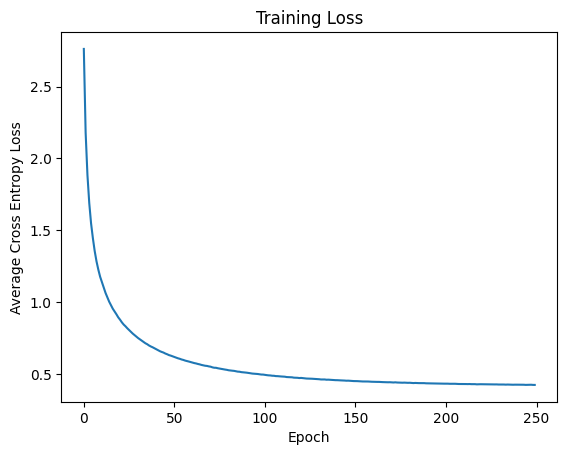

Final test accuracy with best parameters is 0.6953430005577245


In [ ]:
import pandas as pd
import cupy as cp
from sklearn.model_selection import ParameterGrid, train_test_split


# Define the parameter grid
param_grid = {
    'learning_rate': [0.04, 0.05, 0.06, 0.07],
    'gradient_steps': [250]
}

# Create a grid of parameter combinations
grid = ParameterGrid(param_grid)

# Track the best performance
best_validation_accuracy = 0
best_params = {}
results = []

for params in grid:
    lr = params['learning_rate']
    n_features = X_train.shape[-1]
    gradient_steps = params['gradient_steps']

    mlp = MLP(
        LinearLayer(n_features, 25),
        SoftmaxOutputLayer()
    )

    opt = GradientDescentOptimizer(lr=lr)
    opt.attach_network(mlp)

    mlp.fit(opt, X=X_train, y=y_train, epochs=gradient_steps, batch_size=200)

    validation_prediction = mlp.predict(X_test)
    validation_accuracy_score = mlp.evaluate_acc(validation_prediction, y_test)

    if validation_accuracy_score > best_validation_accuracy:
        best_validation_accuracy = validation_accuracy_score
        best_params = params

    results.append({
        'learning_rate': lr,
        'gradient_steps': gradient_steps,
        'validation_accuracy': validation_accuracy_score,
    })

results_df = pd.DataFrame(results)
print(results_df)

print(f"Best validation accuracy is {best_validation_accuracy} with parameters {best_params}")

best_lr = best_params['learning_rate']
best_gradient_steps = best_params['gradient_steps']

mlp_final = MLP(
    LinearLayer(n_features, 25),
    SoftmaxOutputLayer()
    )

opt_final = GradientDescentOptimizer(lr=best_lr)
opt_final.attach_network(mlp_final)

y_MNIST_normalized = cp.asarray(y_MNIST_normalized)
test_label = cp.asarray(test_label)


mlp_final.fit(opt_final, X=X_total, y=y_total, epochs=best_gradient_steps, batch_size=200)

final_test_prediction = mlp_final.predict(y_MNIST_normalized)
final_test_accuracy = mlp_final.evaluate_acc(final_test_prediction, test_label)

print(f"Final test accuracy with best parameters is {final_test_accuracy}")



# Setting up MLP with two hidden layers

In [23]:
HIDDEN_SIZE = 32
GRADIENT_STEPS = 300
n_features = X_MNIST_normalized.shape[-1]

mlp3 = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ActivationLayer(),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)
opt3 = GradientDescentOptimizer(lr=0.07)
opt3.attach_network(mlp3)

mlp3.fit(opt3, X=X_train, y=y_train, epochs=GRADIENT_STEPS, batch_size=200) # I should use an adaptive learning rate because the loss becomes nan
prediction = mlp3.predict(X_test)
accuracy_score = mlp3.evaluate_acc(prediction, y_test)
print(accuracy_score)

TypeError: MLP.fit() missing 2 required positional arguments: 'X_test' and 'y_test'

In [ ]:
y_MNIST_normalized = cp.asarray(y_MNIST_normalized)
test_label = cp.asarray(test_label)

prediction3 = mlp3.predict(y_MNIST_normalized)
accuracy_score = mlp3.evaluate_acc(prediction3, test_label)
print(accuracy_score)

0.6765197992191857


# Optimizing 2-layer RELU MLP

  0%|          | 1/300 [00:00<01:15,  3.94it/s]

Epoch 1/300, Loss: 3.6224


  1%|          | 2/300 [00:00<01:13,  4.03it/s]

Epoch 2/300, Loss: 3.3840


  1%|          | 3/300 [00:00<01:12,  4.10it/s]

Epoch 3/300, Loss: 3.2829


  1%|▏         | 4/300 [00:00<01:13,  4.01it/s]

Epoch 4/300, Loss: 3.1997


  2%|▏         | 5/300 [00:01<01:14,  3.94it/s]

Epoch 5/300, Loss: 3.1287


  2%|▏         | 6/300 [00:01<01:14,  3.97it/s]

Epoch 6/300, Loss: 3.0639


  2%|▏         | 7/300 [00:01<01:12,  4.04it/s]

Epoch 7/300, Loss: 3.0100


  3%|▎         | 8/300 [00:01<01:12,  4.04it/s]

Epoch 8/300, Loss: 2.9653


  3%|▎         | 9/300 [00:02<01:11,  4.06it/s]

Epoch 9/300, Loss: 2.9164


  3%|▎         | 10/300 [00:02<01:12,  4.02it/s]

Epoch 10/300, Loss: 2.8650


  4%|▎         | 11/300 [00:02<01:11,  4.07it/s]

Epoch 11/300, Loss: 2.8132


  4%|▍         | 12/300 [00:02<01:11,  4.01it/s]

Epoch 12/300, Loss: 2.7652


  4%|▍         | 13/300 [00:03<01:11,  4.03it/s]

Epoch 13/300, Loss: 2.7153


  5%|▍         | 14/300 [00:03<01:11,  4.01it/s]

Epoch 14/300, Loss: 2.6715


  5%|▌         | 15/300 [00:03<01:10,  4.03it/s]

Epoch 15/300, Loss: 2.6285


  5%|▌         | 16/300 [00:03<01:09,  4.06it/s]

Epoch 16/300, Loss: 2.5853


  6%|▌         | 17/300 [00:04<01:09,  4.05it/s]

Epoch 17/300, Loss: 2.5441


  6%|▌         | 18/300 [00:04<01:11,  3.92it/s]

Epoch 18/300, Loss: 2.5045


  6%|▋         | 19/300 [00:04<01:11,  3.96it/s]

Epoch 19/300, Loss: 2.4651


  7%|▋         | 20/300 [00:04<01:10,  4.00it/s]

Epoch 20/300, Loss: 2.4279


  7%|▋         | 21/300 [00:05<01:10,  3.98it/s]

Epoch 21/300, Loss: 2.3929


  7%|▋         | 22/300 [00:05<01:10,  3.93it/s]

Epoch 22/300, Loss: 2.3562


  8%|▊         | 23/300 [00:05<01:09,  3.99it/s]

Epoch 23/300, Loss: 2.3247


  8%|▊         | 24/300 [00:05<01:08,  4.05it/s]

Epoch 24/300, Loss: 2.2946


  8%|▊         | 25/300 [00:06<01:07,  4.05it/s]

Epoch 25/300, Loss: 2.2640


  9%|▊         | 26/300 [00:06<01:08,  3.99it/s]

Epoch 26/300, Loss: 2.2364


  9%|▉         | 27/300 [00:06<01:07,  4.02it/s]

Epoch 27/300, Loss: 2.2096


  9%|▉         | 28/300 [00:06<01:07,  4.05it/s]

Epoch 28/300, Loss: 2.1842


 10%|▉         | 29/300 [00:07<01:06,  4.10it/s]

Epoch 29/300, Loss: 2.1600


 10%|█         | 30/300 [00:07<01:12,  3.72it/s]

Epoch 30/300, Loss: 2.1371


 10%|█         | 31/300 [00:07<01:18,  3.42it/s]

Epoch 31/300, Loss: 2.1148


 11%|█         | 32/300 [00:08<01:22,  3.25it/s]

Epoch 32/300, Loss: 2.0950


 11%|█         | 33/300 [00:08<01:24,  3.16it/s]

Epoch 33/300, Loss: 2.0758


 11%|█▏        | 34/300 [00:08<01:27,  3.03it/s]

Epoch 34/300, Loss: 2.0564


 12%|█▏        | 35/300 [00:09<01:33,  2.83it/s]

Epoch 35/300, Loss: 2.0394


 12%|█▏        | 36/300 [00:09<01:37,  2.72it/s]

Epoch 36/300, Loss: 2.0220


 12%|█▏        | 37/300 [00:10<01:36,  2.72it/s]

Epoch 37/300, Loss: 2.0060


 13%|█▎        | 38/300 [00:10<01:27,  3.00it/s]

Epoch 38/300, Loss: 1.9915


 13%|█▎        | 39/300 [00:10<01:21,  3.22it/s]

Epoch 39/300, Loss: 1.9764


 13%|█▎        | 40/300 [00:10<01:15,  3.45it/s]

Epoch 40/300, Loss: 1.9631


 14%|█▎        | 41/300 [00:11<01:11,  3.60it/s]

Epoch 41/300, Loss: 1.9503


 14%|█▍        | 42/300 [00:11<01:09,  3.72it/s]

Epoch 42/300, Loss: 1.9382


 14%|█▍        | 43/300 [00:11<01:07,  3.80it/s]

Epoch 43/300, Loss: 1.9256


 15%|█▍        | 44/300 [00:11<01:05,  3.91it/s]

Epoch 44/300, Loss: 1.9147


 15%|█▌        | 45/300 [00:12<01:04,  3.94it/s]

Epoch 45/300, Loss: 1.9044


 15%|█▌        | 46/300 [00:12<01:04,  3.97it/s]

Epoch 46/300, Loss: 1.8937


 16%|█▌        | 47/300 [00:12<01:04,  3.93it/s]

Epoch 47/300, Loss: 1.8841


 16%|█▌        | 48/300 [00:12<01:03,  3.95it/s]

Epoch 48/300, Loss: 1.8757


 16%|█▋        | 49/300 [00:13<01:03,  3.95it/s]

Epoch 49/300, Loss: 1.8661


 17%|█▋        | 50/300 [00:13<01:03,  3.96it/s]

Epoch 50/300, Loss: 1.8578


 17%|█▋        | 51/300 [00:13<01:03,  3.91it/s]

Epoch 51/300, Loss: 1.8497


 17%|█▋        | 52/300 [00:13<01:02,  3.98it/s]

Epoch 52/300, Loss: 1.8414


 18%|█▊        | 53/300 [00:14<01:01,  4.02it/s]

Epoch 53/300, Loss: 1.8343


 18%|█▊        | 54/300 [00:14<01:01,  4.03it/s]

Epoch 54/300, Loss: 1.8275


 18%|█▊        | 55/300 [00:14<01:00,  4.06it/s]

Epoch 55/300, Loss: 1.8203


 19%|█▊        | 56/300 [00:14<01:00,  4.04it/s]

Epoch 56/300, Loss: 1.8137


 19%|█▉        | 57/300 [00:15<00:59,  4.06it/s]

Epoch 57/300, Loss: 1.8080


 19%|█▉        | 58/300 [00:15<01:00,  4.02it/s]

Epoch 58/300, Loss: 1.8015


 20%|█▉        | 59/300 [00:15<00:59,  4.06it/s]

Epoch 59/300, Loss: 1.7963


 20%|██        | 60/300 [00:15<00:59,  4.04it/s]

Epoch 60/300, Loss: 1.7909


 20%|██        | 61/300 [00:16<00:58,  4.07it/s]

Epoch 61/300, Loss: 1.7852


 21%|██        | 62/300 [00:16<00:58,  4.05it/s]

Epoch 62/300, Loss: 1.7804


 21%|██        | 63/300 [00:16<00:58,  4.08it/s]

Epoch 63/300, Loss: 1.7758


 21%|██▏       | 64/300 [00:16<00:57,  4.08it/s]

Epoch 64/300, Loss: 1.7712


 22%|██▏       | 65/300 [00:17<00:57,  4.09it/s]

Epoch 65/300, Loss: 1.7667


 22%|██▏       | 66/300 [00:17<00:57,  4.06it/s]

Epoch 66/300, Loss: 1.7624


 22%|██▏       | 67/300 [00:17<00:57,  4.08it/s]

Epoch 67/300, Loss: 1.7578


 23%|██▎       | 68/300 [00:17<00:57,  4.01it/s]

Epoch 68/300, Loss: 1.7545


 23%|██▎       | 69/300 [00:18<00:57,  4.02it/s]

Epoch 69/300, Loss: 1.7503


 23%|██▎       | 70/300 [00:18<00:56,  4.04it/s]

Epoch 70/300, Loss: 1.7464


 24%|██▎       | 71/300 [00:18<00:56,  4.07it/s]

Epoch 71/300, Loss: 1.7435


 24%|██▍       | 72/300 [00:18<00:56,  4.04it/s]

Epoch 72/300, Loss: 1.7397


 24%|██▍       | 73/300 [00:19<00:55,  4.08it/s]

Epoch 73/300, Loss: 1.7362


 25%|██▍       | 74/300 [00:19<00:55,  4.11it/s]

Epoch 74/300, Loss: 1.7330


 25%|██▌       | 75/300 [00:19<00:54,  4.11it/s]

Epoch 75/300, Loss: 1.7303


 25%|██▌       | 76/300 [00:19<00:55,  4.06it/s]

Epoch 76/300, Loss: 1.7272


 26%|██▌       | 77/300 [00:20<00:55,  4.04it/s]

Epoch 77/300, Loss: 1.7241


 26%|██▌       | 78/300 [00:20<01:03,  3.48it/s]

Epoch 78/300, Loss: 1.7214


 26%|██▋       | 79/300 [00:20<01:06,  3.32it/s]

Epoch 79/300, Loss: 1.7189


 27%|██▋       | 80/300 [00:21<01:09,  3.15it/s]

Epoch 80/300, Loss: 1.7161


 27%|██▋       | 81/300 [00:21<01:13,  3.00it/s]

Epoch 81/300, Loss: 1.7142


 27%|██▋       | 82/300 [00:21<01:14,  2.91it/s]

Epoch 82/300, Loss: 1.7115


 28%|██▊       | 83/300 [00:22<01:18,  2.75it/s]

Epoch 83/300, Loss: 1.7091


 28%|██▊       | 84/300 [00:22<01:20,  2.68it/s]

Epoch 84/300, Loss: 1.7069


 28%|██▊       | 85/300 [00:22<01:14,  2.87it/s]

Epoch 85/300, Loss: 1.7052


 29%|██▊       | 86/300 [00:23<01:08,  3.13it/s]

Epoch 86/300, Loss: 1.7030


 29%|██▉       | 87/300 [00:23<01:03,  3.35it/s]

Epoch 87/300, Loss: 1.7008


 29%|██▉       | 88/300 [00:23<01:01,  3.47it/s]

Epoch 88/300, Loss: 1.6992


 30%|██▉       | 89/300 [00:23<00:59,  3.53it/s]

Epoch 89/300, Loss: 1.6973


 30%|███       | 90/300 [00:24<00:56,  3.70it/s]

Epoch 90/300, Loss: 1.6954


 30%|███       | 91/300 [00:24<00:54,  3.82it/s]

Epoch 91/300, Loss: 1.6940


 31%|███       | 92/300 [00:24<00:53,  3.92it/s]

Epoch 92/300, Loss: 1.6923


 31%|███       | 93/300 [00:24<00:52,  3.97it/s]

Epoch 93/300, Loss: 1.6908


 31%|███▏      | 94/300 [00:25<00:51,  3.99it/s]

Epoch 94/300, Loss: 1.6892


 32%|███▏      | 95/300 [00:25<00:51,  4.00it/s]

Epoch 95/300, Loss: 1.6876


 32%|███▏      | 96/300 [00:25<00:50,  4.07it/s]

Epoch 96/300, Loss: 1.6865


 32%|███▏      | 97/300 [00:25<00:49,  4.13it/s]

Epoch 97/300, Loss: 1.6851


 33%|███▎      | 98/300 [00:26<00:49,  4.08it/s]

Epoch 98/300, Loss: 1.6836


 33%|███▎      | 99/300 [00:26<00:49,  4.09it/s]

Epoch 99/300, Loss: 1.6825


 33%|███▎      | 100/300 [00:26<00:48,  4.12it/s]

Epoch 100/300, Loss: 1.6814


 34%|███▎      | 101/300 [00:26<00:48,  4.13it/s]

Epoch 101/300, Loss: 1.6800


 34%|███▍      | 102/300 [00:27<00:48,  4.09it/s]

Epoch 102/300, Loss: 1.6791


 34%|███▍      | 103/300 [00:27<00:48,  4.08it/s]

Epoch 103/300, Loss: 1.6778


 35%|███▍      | 104/300 [00:27<00:47,  4.12it/s]

Epoch 104/300, Loss: 1.6767


 35%|███▌      | 105/300 [00:27<00:46,  4.15it/s]

Epoch 105/300, Loss: 1.6759


 35%|███▌      | 106/300 [00:28<00:47,  4.10it/s]

Epoch 106/300, Loss: 1.6751


 36%|███▌      | 107/300 [00:28<00:46,  4.13it/s]

Epoch 107/300, Loss: 1.6741


 36%|███▌      | 108/300 [00:28<00:46,  4.09it/s]

Epoch 108/300, Loss: 1.6732


 36%|███▋      | 109/300 [00:28<00:46,  4.11it/s]

Epoch 109/300, Loss: 1.6722


 37%|███▋      | 110/300 [00:29<00:46,  4.06it/s]

Epoch 110/300, Loss: 1.6715


 37%|███▋      | 111/300 [00:29<00:46,  4.08it/s]

Epoch 111/300, Loss: 1.6708


 37%|███▋      | 112/300 [00:29<00:45,  4.09it/s]

Epoch 112/300, Loss: 1.6698


 38%|███▊      | 113/300 [00:29<00:45,  4.15it/s]

Epoch 113/300, Loss: 1.6693


 38%|███▊      | 114/300 [00:30<00:45,  4.12it/s]

Epoch 114/300, Loss: 1.6684


 38%|███▊      | 115/300 [00:30<00:45,  4.08it/s]

Epoch 115/300, Loss: 1.6675


 39%|███▊      | 116/300 [00:30<00:44,  4.10it/s]

Epoch 116/300, Loss: 1.6671


 39%|███▉      | 117/300 [00:30<00:44,  4.12it/s]

Epoch 117/300, Loss: 1.6664


 39%|███▉      | 118/300 [00:30<00:44,  4.13it/s]

Epoch 118/300, Loss: 1.6658


 40%|███▉      | 119/300 [00:31<00:44,  4.08it/s]

Epoch 119/300, Loss: 1.6653


 40%|████      | 120/300 [00:31<00:44,  4.05it/s]

Epoch 120/300, Loss: 1.6647


 40%|████      | 121/300 [00:31<00:43,  4.12it/s]

Epoch 121/300, Loss: 1.6641


 41%|████      | 122/300 [00:31<00:43,  4.12it/s]

Epoch 122/300, Loss: 1.6637


 41%|████      | 123/300 [00:32<00:43,  4.08it/s]

Epoch 123/300, Loss: 1.6629


 41%|████▏     | 124/300 [00:32<00:42,  4.11it/s]

Epoch 124/300, Loss: 1.6624


 42%|████▏     | 125/300 [00:32<00:43,  4.02it/s]

Epoch 125/300, Loss: 1.6621


 42%|████▏     | 126/300 [00:33<00:48,  3.57it/s]

Epoch 126/300, Loss: 1.6615


 42%|████▏     | 127/300 [00:33<00:52,  3.31it/s]

Epoch 127/300, Loss: 1.6610


 43%|████▎     | 128/300 [00:33<00:53,  3.22it/s]

Epoch 128/300, Loss: 1.6606


 43%|████▎     | 129/300 [00:34<00:55,  3.09it/s]

Epoch 129/300, Loss: 1.6603


 43%|████▎     | 130/300 [00:34<00:58,  2.91it/s]

Epoch 130/300, Loss: 1.6598


 44%|████▎     | 131/300 [00:34<01:00,  2.79it/s]

Epoch 131/300, Loss: 1.6595


 44%|████▍     | 132/300 [00:35<01:03,  2.67it/s]

Epoch 132/300, Loss: 1.6591


 44%|████▍     | 133/300 [00:35<00:58,  2.88it/s]

Epoch 133/300, Loss: 1.6588


 45%|████▍     | 134/300 [00:35<00:52,  3.18it/s]

Epoch 134/300, Loss: 1.6582


 45%|████▌     | 135/300 [00:36<00:48,  3.41it/s]

Epoch 135/300, Loss: 1.6581


 45%|████▌     | 136/300 [00:36<00:45,  3.57it/s]

Epoch 136/300, Loss: 1.6576


 46%|████▌     | 137/300 [00:36<00:43,  3.76it/s]

Epoch 137/300, Loss: 1.6573


 46%|████▌     | 138/300 [00:36<00:41,  3.90it/s]

Epoch 138/300, Loss: 1.6573


 46%|████▋     | 139/300 [00:37<00:40,  3.99it/s]

Epoch 139/300, Loss: 1.6566


 47%|████▋     | 140/300 [00:37<00:40,  3.95it/s]

Epoch 140/300, Loss: 1.6565


 47%|████▋     | 141/300 [00:37<00:39,  4.04it/s]

Epoch 141/300, Loss: 1.6564


 47%|████▋     | 142/300 [00:37<00:38,  4.11it/s]

Epoch 142/300, Loss: 1.6559


 48%|████▊     | 143/300 [00:37<00:38,  4.13it/s]

Epoch 143/300, Loss: 1.6558


 48%|████▊     | 144/300 [00:38<00:37,  4.12it/s]

Epoch 144/300, Loss: 1.6557


 48%|████▊     | 145/300 [00:38<00:38,  4.07it/s]

Epoch 145/300, Loss: 1.6551


 49%|████▊     | 146/300 [00:38<00:37,  4.07it/s]

Epoch 146/300, Loss: 1.6549


 49%|████▉     | 147/300 [00:38<00:37,  4.08it/s]

Epoch 147/300, Loss: 1.6550


 49%|████▉     | 148/300 [00:39<00:37,  4.10it/s]

Epoch 148/300, Loss: 1.6546


 50%|████▉     | 149/300 [00:39<00:37,  4.07it/s]

Epoch 149/300, Loss: 1.6545


 50%|█████     | 150/300 [00:39<00:36,  4.09it/s]

Epoch 150/300, Loss: 1.6541


 50%|█████     | 151/300 [00:39<00:36,  4.10it/s]

Epoch 151/300, Loss: 1.6541


 51%|█████     | 152/300 [00:40<00:36,  4.10it/s]

Epoch 152/300, Loss: 1.6539


 51%|█████     | 153/300 [00:40<00:36,  4.03it/s]

Epoch 153/300, Loss: 1.6536


 51%|█████▏    | 154/300 [00:40<00:35,  4.06it/s]

Epoch 154/300, Loss: 1.6537


 52%|█████▏    | 155/300 [00:40<00:35,  4.13it/s]

Epoch 155/300, Loss: 1.6534


 52%|█████▏    | 156/300 [00:41<00:34,  4.12it/s]

Epoch 156/300, Loss: 1.6532


 52%|█████▏    | 157/300 [00:41<00:35,  4.05it/s]

Epoch 157/300, Loss: 1.6531


 53%|█████▎    | 158/300 [00:41<00:34,  4.12it/s]

Epoch 158/300, Loss: 1.6528


 53%|█████▎    | 159/300 [00:41<00:34,  4.10it/s]

Epoch 159/300, Loss: 1.6527


 53%|█████▎    | 160/300 [00:42<00:34,  4.10it/s]

Epoch 160/300, Loss: 1.6526


 54%|█████▎    | 161/300 [00:42<00:34,  4.04it/s]

Epoch 161/300, Loss: 1.6525


 54%|█████▍    | 162/300 [00:42<00:33,  4.10it/s]

Epoch 162/300, Loss: 1.6525


 54%|█████▍    | 163/300 [00:42<00:33,  4.14it/s]

Epoch 163/300, Loss: 1.6522


 55%|█████▍    | 164/300 [00:43<00:32,  4.15it/s]

Epoch 164/300, Loss: 1.6520


 55%|█████▌    | 165/300 [00:43<00:32,  4.12it/s]

Epoch 165/300, Loss: 1.6521


 55%|█████▌    | 166/300 [00:43<00:32,  4.07it/s]

Epoch 166/300, Loss: 1.6517


 56%|█████▌    | 167/300 [00:43<00:32,  4.10it/s]

Epoch 167/300, Loss: 1.6516


 56%|█████▌    | 168/300 [00:44<00:32,  4.08it/s]

Epoch 168/300, Loss: 1.6513


 56%|█████▋    | 169/300 [00:44<00:32,  4.00it/s]

Epoch 169/300, Loss: 1.6516


 57%|█████▋    | 170/300 [00:44<00:32,  3.97it/s]

Epoch 170/300, Loss: 1.6514


 57%|█████▋    | 171/300 [00:44<00:32,  3.97it/s]

Epoch 171/300, Loss: 1.6514


 57%|█████▋    | 172/300 [00:45<00:31,  4.02it/s]

Epoch 172/300, Loss: 1.6510


 58%|█████▊    | 173/300 [00:45<00:31,  4.05it/s]

Epoch 173/300, Loss: 1.6511


 58%|█████▊    | 174/300 [00:45<00:35,  3.56it/s]

Epoch 174/300, Loss: 1.6509


 58%|█████▊    | 175/300 [00:46<00:37,  3.34it/s]

Epoch 175/300, Loss: 1.6513


 59%|█████▊    | 176/300 [00:46<00:38,  3.21it/s]

Epoch 176/300, Loss: 1.6510


 59%|█████▉    | 177/300 [00:46<00:39,  3.10it/s]

Epoch 177/300, Loss: 1.6507


 59%|█████▉    | 178/300 [00:47<00:41,  2.95it/s]

Epoch 178/300, Loss: 1.6508


 60%|█████▉    | 179/300 [00:47<00:43,  2.78it/s]

Epoch 179/300, Loss: 1.6510


 60%|██████    | 180/300 [00:47<00:45,  2.66it/s]

Epoch 180/300, Loss: 1.6504


 60%|██████    | 181/300 [00:48<00:42,  2.78it/s]

Epoch 181/300, Loss: 1.6507


 61%|██████    | 182/300 [00:48<00:38,  3.06it/s]

Epoch 182/300, Loss: 1.6503


 61%|██████    | 183/300 [00:48<00:35,  3.31it/s]

Epoch 183/300, Loss: 1.6504


 61%|██████▏   | 184/300 [00:49<00:33,  3.51it/s]

Epoch 184/300, Loss: 1.6504


 62%|██████▏   | 185/300 [00:49<00:31,  3.68it/s]

Epoch 185/300, Loss: 1.6502


 62%|██████▏   | 186/300 [00:49<00:30,  3.79it/s]

Epoch 186/300, Loss: 1.6503


 62%|██████▏   | 187/300 [00:49<00:29,  3.86it/s]

Epoch 187/300, Loss: 1.6503


 63%|██████▎   | 188/300 [00:49<00:28,  3.97it/s]

Epoch 188/300, Loss: 1.6501


 63%|██████▎   | 189/300 [00:50<00:27,  3.98it/s]

Epoch 189/300, Loss: 1.6501


 63%|██████▎   | 190/300 [00:50<00:27,  3.98it/s]

Epoch 190/300, Loss: 1.6499


 64%|██████▎   | 191/300 [00:50<00:27,  4.00it/s]

Epoch 191/300, Loss: 1.6499


 64%|██████▍   | 192/300 [00:50<00:26,  4.02it/s]

Epoch 192/300, Loss: 1.6499


 64%|██████▍   | 193/300 [00:51<00:26,  4.04it/s]

Epoch 193/300, Loss: 1.6501


 65%|██████▍   | 194/300 [00:51<00:26,  4.06it/s]

Epoch 194/300, Loss: 1.6497


 65%|██████▌   | 195/300 [00:51<00:25,  4.07it/s]

Epoch 195/300, Loss: 1.6498


 65%|██████▌   | 196/300 [00:51<00:25,  4.09it/s]

Epoch 196/300, Loss: 1.6500


 66%|██████▌   | 197/300 [00:52<00:25,  4.04it/s]

Epoch 197/300, Loss: 1.6497


 66%|██████▌   | 198/300 [00:52<00:25,  3.98it/s]

Epoch 198/300, Loss: 1.6496


 66%|██████▋   | 199/300 [00:52<00:25,  3.97it/s]

Epoch 199/300, Loss: 1.6493


 67%|██████▋   | 200/300 [00:52<00:25,  3.88it/s]

Epoch 200/300, Loss: 1.6495


 67%|██████▋   | 201/300 [00:53<00:25,  3.88it/s]

Epoch 201/300, Loss: 1.6498


 67%|██████▋   | 202/300 [00:53<00:25,  3.92it/s]

Epoch 202/300, Loss: 1.6496


 68%|██████▊   | 203/300 [00:53<00:24,  3.89it/s]

Epoch 203/300, Loss: 1.6496


 68%|██████▊   | 204/300 [00:54<00:24,  3.92it/s]

Epoch 204/300, Loss: 1.6494


 68%|██████▊   | 205/300 [00:54<00:24,  3.85it/s]

Epoch 205/300, Loss: 1.6495


 69%|██████▊   | 206/300 [00:54<00:24,  3.89it/s]

Epoch 206/300, Loss: 1.6494


 69%|██████▉   | 207/300 [00:54<00:23,  3.88it/s]

Epoch 207/300, Loss: 1.6493


 69%|██████▉   | 208/300 [00:55<00:23,  3.95it/s]

Epoch 208/300, Loss: 1.6491


 70%|██████▉   | 209/300 [00:55<00:22,  3.96it/s]

Epoch 209/300, Loss: 1.6493


 70%|███████   | 210/300 [00:55<00:22,  3.98it/s]

Epoch 210/300, Loss: 1.6492


 70%|███████   | 211/300 [00:55<00:22,  3.97it/s]

Epoch 211/300, Loss: 1.6492


 71%|███████   | 212/300 [00:56<00:22,  3.97it/s]

Epoch 212/300, Loss: 1.6493


 71%|███████   | 213/300 [00:56<00:22,  3.94it/s]

Epoch 213/300, Loss: 1.6493


 71%|███████▏  | 214/300 [00:56<00:21,  3.98it/s]

Epoch 214/300, Loss: 1.6492


 72%|███████▏  | 215/300 [00:56<00:20,  4.06it/s]

Epoch 215/300, Loss: 1.6491


 72%|███████▏  | 216/300 [00:57<00:20,  4.03it/s]

Epoch 216/300, Loss: 1.6492


 72%|███████▏  | 217/300 [00:57<00:20,  4.07it/s]

Epoch 217/300, Loss: 1.6490


 73%|███████▎  | 218/300 [00:57<00:20,  4.08it/s]

Epoch 218/300, Loss: 1.6489


 73%|███████▎  | 219/300 [00:57<00:19,  4.15it/s]

Epoch 219/300, Loss: 1.6492


 73%|███████▎  | 220/300 [00:58<00:19,  4.07it/s]

Epoch 220/300, Loss: 1.6491


 74%|███████▎  | 221/300 [00:58<00:20,  3.81it/s]

Epoch 221/300, Loss: 1.6490


 74%|███████▍  | 222/300 [00:58<00:22,  3.51it/s]

Epoch 222/300, Loss: 1.6490


 74%|███████▍  | 223/300 [00:58<00:23,  3.32it/s]

Epoch 223/300, Loss: 1.6490


 75%|███████▍  | 224/300 [00:59<00:23,  3.23it/s]

Epoch 224/300, Loss: 1.6491


 75%|███████▌  | 225/300 [00:59<00:24,  3.09it/s]

Epoch 225/300, Loss: 1.6491


 75%|███████▌  | 226/300 [01:00<00:25,  2.90it/s]

Epoch 226/300, Loss: 1.6490


 76%|███████▌  | 227/300 [01:00<00:26,  2.77it/s]

Epoch 227/300, Loss: 1.6490


 76%|███████▌  | 228/300 [01:00<00:26,  2.73it/s]

Epoch 228/300, Loss: 1.6491


 76%|███████▋  | 229/300 [01:01<00:23,  3.01it/s]

Epoch 229/300, Loss: 1.6490


 77%|███████▋  | 230/300 [01:01<00:21,  3.26it/s]

Epoch 230/300, Loss: 1.6491


 77%|███████▋  | 231/300 [01:01<00:19,  3.49it/s]

Epoch 231/300, Loss: 1.6492


 77%|███████▋  | 232/300 [01:01<00:18,  3.67it/s]

Epoch 232/300, Loss: 1.6491


 78%|███████▊  | 233/300 [01:02<00:17,  3.75it/s]

Epoch 233/300, Loss: 1.6488


 78%|███████▊  | 234/300 [01:02<00:17,  3.82it/s]

Epoch 234/300, Loss: 1.6488


 78%|███████▊  | 235/300 [01:02<00:16,  3.86it/s]

Epoch 235/300, Loss: 1.6488


 79%|███████▊  | 236/300 [01:02<00:16,  3.93it/s]

Epoch 236/300, Loss: 1.6488


 79%|███████▉  | 237/300 [01:03<00:16,  3.90it/s]

Epoch 237/300, Loss: 1.6488


 79%|███████▉  | 238/300 [01:03<00:15,  3.95it/s]

Epoch 238/300, Loss: 1.6488


 80%|███████▉  | 239/300 [01:03<00:15,  4.01it/s]

Epoch 239/300, Loss: 1.6491


 80%|████████  | 240/300 [01:03<00:14,  4.04it/s]

Epoch 240/300, Loss: 1.6489


 80%|████████  | 241/300 [01:04<00:14,  3.99it/s]

Epoch 241/300, Loss: 1.6487


 81%|████████  | 242/300 [01:04<00:14,  4.01it/s]

Epoch 242/300, Loss: 1.6487


 81%|████████  | 243/300 [01:04<00:13,  4.08it/s]

Epoch 243/300, Loss: 1.6489


 81%|████████▏ | 244/300 [01:04<00:13,  4.11it/s]

Epoch 244/300, Loss: 1.6489


 82%|████████▏ | 245/300 [01:05<00:13,  4.06it/s]

Epoch 245/300, Loss: 1.6487


 82%|████████▏ | 246/300 [01:05<00:13,  3.97it/s]

Epoch 246/300, Loss: 1.6487


 82%|████████▏ | 247/300 [01:05<00:13,  4.00it/s]

Epoch 247/300, Loss: 1.6488


 83%|████████▎ | 248/300 [01:05<00:12,  4.07it/s]

Epoch 248/300, Loss: 1.6489


 83%|████████▎ | 249/300 [01:06<00:12,  4.08it/s]

Epoch 249/300, Loss: 1.6488


 83%|████████▎ | 250/300 [01:06<00:12,  4.01it/s]

Epoch 250/300, Loss: 1.6488


 84%|████████▎ | 251/300 [01:06<00:12,  4.03it/s]

Epoch 251/300, Loss: 1.6487


 84%|████████▍ | 252/300 [01:06<00:11,  4.08it/s]

Epoch 252/300, Loss: 1.6487


 84%|████████▍ | 253/300 [01:07<00:11,  4.09it/s]

Epoch 253/300, Loss: 1.6488


 85%|████████▍ | 254/300 [01:07<00:11,  4.00it/s]

Epoch 254/300, Loss: 1.6490


 85%|████████▌ | 255/300 [01:07<00:11,  4.03it/s]

Epoch 255/300, Loss: 1.6487


 85%|████████▌ | 256/300 [01:07<00:10,  4.08it/s]

Epoch 256/300, Loss: 1.6489


 86%|████████▌ | 257/300 [01:08<00:10,  4.08it/s]

Epoch 257/300, Loss: 1.6489


 86%|████████▌ | 258/300 [01:08<00:10,  4.05it/s]

Epoch 258/300, Loss: 1.6485


 86%|████████▋ | 259/300 [01:08<00:10,  4.06it/s]

Epoch 259/300, Loss: 1.6485


 87%|████████▋ | 260/300 [01:08<00:09,  4.12it/s]

Epoch 260/300, Loss: 1.6487


 87%|████████▋ | 261/300 [01:08<00:09,  4.16it/s]

Epoch 261/300, Loss: 1.6488


 87%|████████▋ | 262/300 [01:09<00:09,  4.08it/s]

Epoch 262/300, Loss: 1.6488


 88%|████████▊ | 263/300 [01:09<00:09,  4.08it/s]

Epoch 263/300, Loss: 1.6486


 88%|████████▊ | 264/300 [01:09<00:08,  4.14it/s]

Epoch 264/300, Loss: 1.6486


 88%|████████▊ | 265/300 [01:09<00:08,  4.16it/s]

Epoch 265/300, Loss: 1.6486


 89%|████████▊ | 266/300 [01:10<00:08,  4.07it/s]

Epoch 266/300, Loss: 1.6488


 89%|████████▉ | 267/300 [01:10<00:08,  4.06it/s]

Epoch 267/300, Loss: 1.6488


 89%|████████▉ | 268/300 [01:10<00:07,  4.07it/s]

Epoch 268/300, Loss: 1.6488


 90%|████████▉ | 269/300 [01:11<00:08,  3.68it/s]

Epoch 269/300, Loss: 1.6486


 90%|█████████ | 270/300 [01:11<00:09,  3.32it/s]

Epoch 270/300, Loss: 1.6487


 90%|█████████ | 271/300 [01:11<00:09,  3.17it/s]

Epoch 271/300, Loss: 1.6486


 91%|█████████ | 272/300 [01:12<00:08,  3.14it/s]

Epoch 272/300, Loss: 1.6488


 91%|█████████ | 273/300 [01:12<00:09,  2.94it/s]

Epoch 273/300, Loss: 1.6489


 91%|█████████▏| 274/300 [01:12<00:09,  2.85it/s]

Epoch 274/300, Loss: 1.6487


 92%|█████████▏| 275/300 [01:13<00:09,  2.70it/s]

Epoch 275/300, Loss: 1.6486


 92%|█████████▏| 276/300 [01:13<00:08,  2.73it/s]

Epoch 276/300, Loss: 1.6488


 92%|█████████▏| 277/300 [01:13<00:07,  3.03it/s]

Epoch 277/300, Loss: 1.6488


 93%|█████████▎| 278/300 [01:14<00:06,  3.27it/s]

Epoch 278/300, Loss: 1.6487


 93%|█████████▎| 279/300 [01:14<00:06,  3.43it/s]

Epoch 279/300, Loss: 1.6487


 93%|█████████▎| 280/300 [01:14<00:05,  3.58it/s]

Epoch 280/300, Loss: 1.6485


 94%|█████████▎| 281/300 [01:14<00:05,  3.76it/s]

Epoch 281/300, Loss: 1.6487


 94%|█████████▍| 282/300 [01:15<00:04,  3.85it/s]

Epoch 282/300, Loss: 1.6488


 94%|█████████▍| 283/300 [01:15<00:04,  3.89it/s]

Epoch 283/300, Loss: 1.6487


 95%|█████████▍| 284/300 [01:15<00:04,  3.92it/s]

Epoch 284/300, Loss: 1.6488


 95%|█████████▌| 285/300 [01:15<00:03,  3.99it/s]

Epoch 285/300, Loss: 1.6487


 95%|█████████▌| 286/300 [01:16<00:03,  4.01it/s]

Epoch 286/300, Loss: 1.6486


 96%|█████████▌| 287/300 [01:16<00:03,  4.00it/s]

Epoch 287/300, Loss: 1.6485


 96%|█████████▌| 288/300 [01:16<00:03,  3.96it/s]

Epoch 288/300, Loss: 1.6486


 96%|█████████▋| 289/300 [01:16<00:02,  4.03it/s]

Epoch 289/300, Loss: 1.6486


 97%|█████████▋| 290/300 [01:17<00:02,  4.03it/s]

Epoch 290/300, Loss: 1.6488


 97%|█████████▋| 291/300 [01:17<00:02,  4.02it/s]

Epoch 291/300, Loss: 1.6488


 97%|█████████▋| 292/300 [01:17<00:02,  4.00it/s]

Epoch 292/300, Loss: 1.6488


 98%|█████████▊| 293/300 [01:17<00:01,  3.99it/s]

Epoch 293/300, Loss: 1.6484


 98%|█████████▊| 294/300 [01:18<00:01,  4.01it/s]

Epoch 294/300, Loss: 1.6487


 98%|█████████▊| 295/300 [01:18<00:01,  3.96it/s]

Epoch 295/300, Loss: 1.6486


 99%|█████████▊| 296/300 [01:18<00:01,  3.91it/s]

Epoch 296/300, Loss: 1.6485


 99%|█████████▉| 297/300 [01:18<00:00,  3.96it/s]

Epoch 297/300, Loss: 1.6485


 99%|█████████▉| 298/300 [01:19<00:00,  3.95it/s]

Epoch 298/300, Loss: 1.6488


100%|█████████▉| 299/300 [01:19<00:00,  3.95it/s]

Epoch 299/300, Loss: 1.6488


100%|██████████| 300/300 [01:19<00:00,  3.77it/s]

Epoch 300/300, Loss: 1.6487


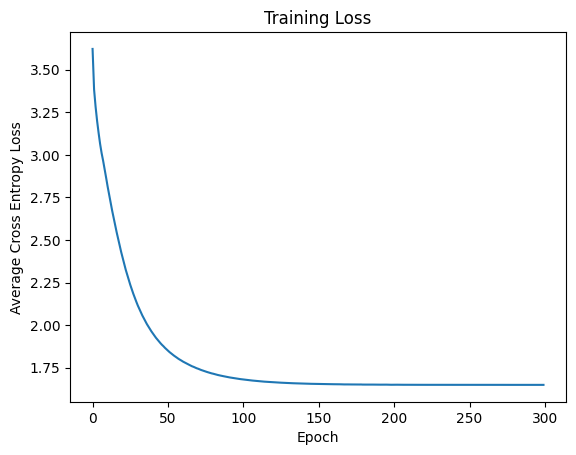

Test Accuracy: 0.4241494701617401 with params {'HIDDEN_SIZE': 16, 'learning_rate': 0.01}


  0%|          | 1/300 [00:00<01:13,  4.05it/s]

Epoch 1/300, Loss: 3.3191


  1%|          | 2/300 [00:00<01:14,  3.97it/s]

Epoch 2/300, Loss: 3.0681


  1%|          | 3/300 [00:00<01:19,  3.72it/s]

Epoch 3/300, Loss: 2.9945


  1%|▏         | 4/300 [00:01<01:19,  3.74it/s]

Epoch 4/300, Loss: 2.8879


  2%|▏         | 5/300 [00:01<01:18,  3.78it/s]

Epoch 5/300, Loss: 2.7711


  2%|▏         | 6/300 [00:01<01:15,  3.87it/s]

Epoch 6/300, Loss: 2.7033


  2%|▏         | 7/300 [00:01<01:16,  3.85it/s]

Epoch 7/300, Loss: 2.5410


  3%|▎         | 8/300 [00:02<01:14,  3.94it/s]

Epoch 8/300, Loss: 2.4858


  3%|▎         | 9/300 [00:02<01:13,  3.98it/s]

Epoch 9/300, Loss: 2.4046


  3%|▎         | 10/300 [00:02<01:12,  4.00it/s]

Epoch 10/300, Loss: 2.3031


  4%|▎         | 11/300 [00:02<01:12,  3.99it/s]

Epoch 11/300, Loss: 2.2739


  4%|▍         | 12/300 [00:03<01:11,  4.04it/s]

Epoch 12/300, Loss: 2.2513


  4%|▍         | 13/300 [00:03<01:11,  4.03it/s]

Epoch 13/300, Loss: 2.1629


  5%|▍         | 14/300 [00:03<01:11,  4.01it/s]

Epoch 14/300, Loss: 2.1433


  5%|▌         | 15/300 [00:03<01:18,  3.65it/s]

Epoch 15/300, Loss: 2.1468


  5%|▌         | 16/300 [00:04<01:24,  3.36it/s]

Epoch 16/300, Loss: 2.0497


  6%|▌         | 17/300 [00:04<01:30,  3.14it/s]

Epoch 17/300, Loss: 2.0479


  6%|▌         | 18/300 [00:04<01:33,  3.00it/s]

Epoch 18/300, Loss: 2.0559


  6%|▋         | 19/300 [00:05<01:38,  2.86it/s]

Epoch 19/300, Loss: 1.9846


  7%|▋         | 20/300 [00:05<01:42,  2.74it/s]

Epoch 20/300, Loss: 1.9503


  7%|▋         | 21/300 [00:06<01:44,  2.68it/s]

Epoch 21/300, Loss: 1.9987


  7%|▋         | 22/300 [00:06<01:42,  2.71it/s]

Epoch 22/300, Loss: 1.9115


  8%|▊         | 23/300 [00:06<01:32,  3.00it/s]

Epoch 23/300, Loss: 1.9034


  8%|▊         | 24/300 [00:07<01:25,  3.21it/s]

Epoch 24/300, Loss: 1.8731


  8%|▊         | 25/300 [00:07<01:20,  3.44it/s]

Epoch 25/300, Loss: 1.8366


  9%|▊         | 26/300 [00:07<01:16,  3.58it/s]

Epoch 26/300, Loss: 1.8368


  9%|▉         | 27/300 [00:07<01:13,  3.72it/s]

Epoch 27/300, Loss: 1.8158


  9%|▉         | 28/300 [00:08<01:12,  3.73it/s]

Epoch 28/300, Loss: 1.7910


 10%|▉         | 29/300 [00:08<01:10,  3.83it/s]

Epoch 29/300, Loss: 1.7716


 10%|█         | 30/300 [00:08<01:10,  3.86it/s]

Epoch 30/300, Loss: 1.7562


 10%|█         | 31/300 [00:08<01:10,  3.82it/s]

Epoch 31/300, Loss: 1.7360


 11%|█         | 32/300 [00:09<01:11,  3.76it/s]

Epoch 32/300, Loss: 1.7120


 11%|█         | 33/300 [00:09<01:09,  3.84it/s]

Epoch 33/300, Loss: 1.7265


 11%|█▏        | 34/300 [00:09<01:08,  3.88it/s]

Epoch 34/300, Loss: 1.6978


 12%|█▏        | 35/300 [00:09<01:07,  3.92it/s]

Epoch 35/300, Loss: 1.6721


 12%|█▏        | 36/300 [00:10<01:07,  3.88it/s]

Epoch 36/300, Loss: 1.6630


 12%|█▏        | 37/300 [00:10<01:06,  3.94it/s]

Epoch 37/300, Loss: 1.6547


 13%|█▎        | 38/300 [00:10<01:06,  3.92it/s]

Epoch 38/300, Loss: 1.6232


 13%|█▎        | 39/300 [00:10<01:06,  3.94it/s]

Epoch 39/300, Loss: 1.6233


 13%|█▎        | 40/300 [00:11<01:06,  3.91it/s]

Epoch 40/300, Loss: 1.6054


 14%|█▎        | 41/300 [00:11<01:05,  3.93it/s]

Epoch 41/300, Loss: 1.6014


 14%|█▍        | 42/300 [00:11<01:06,  3.90it/s]

Epoch 42/300, Loss: 1.5860


 14%|█▍        | 43/300 [00:11<01:05,  3.94it/s]

Epoch 43/300, Loss: 1.5799


 15%|█▍        | 44/300 [00:12<01:05,  3.93it/s]

Epoch 44/300, Loss: 1.5611


 15%|█▌        | 45/300 [00:12<01:04,  3.95it/s]

Epoch 45/300, Loss: 1.5548


 15%|█▌        | 46/300 [00:12<01:04,  3.93it/s]

Epoch 46/300, Loss: 1.5433


 16%|█▌        | 47/300 [00:12<01:03,  3.98it/s]

Epoch 47/300, Loss: 1.5374


 16%|█▌        | 48/300 [00:13<01:04,  3.92it/s]

Epoch 48/300, Loss: 1.5318


 16%|█▋        | 49/300 [00:13<01:03,  3.95it/s]

Epoch 49/300, Loss: 1.5225


 17%|█▋        | 50/300 [00:13<01:03,  3.93it/s]

Epoch 50/300, Loss: 1.5135


 17%|█▋        | 51/300 [00:13<01:02,  3.96it/s]

Epoch 51/300, Loss: 1.5117


 17%|█▋        | 52/300 [00:14<01:03,  3.88it/s]

Epoch 52/300, Loss: 1.5005


 18%|█▊        | 53/300 [00:14<01:03,  3.88it/s]

Epoch 53/300, Loss: 1.4955


 18%|█▊        | 54/300 [00:14<01:02,  3.92it/s]

Epoch 54/300, Loss: 1.4888


 18%|█▊        | 55/300 [00:14<01:01,  3.96it/s]

Epoch 55/300, Loss: 1.4839


 19%|█▊        | 56/300 [00:15<01:01,  3.94it/s]

Epoch 56/300, Loss: 1.4781


 19%|█▉        | 57/300 [00:15<01:00,  3.98it/s]

Epoch 57/300, Loss: 1.4721


 19%|█▉        | 58/300 [00:15<01:01,  3.96it/s]

Epoch 58/300, Loss: 1.4690


 20%|█▉        | 59/300 [00:15<01:01,  3.93it/s]

Epoch 59/300, Loss: 1.4616


 20%|██        | 60/300 [00:16<01:00,  3.94it/s]

Epoch 60/300, Loss: 1.4585


 20%|██        | 61/300 [00:16<01:00,  3.97it/s]

Epoch 61/300, Loss: 1.4519


 21%|██        | 62/300 [00:16<01:07,  3.52it/s]

Epoch 62/300, Loss: 1.4472


 21%|██        | 63/300 [00:17<01:10,  3.36it/s]

Epoch 63/300, Loss: 1.4447


 21%|██▏       | 64/300 [00:17<01:14,  3.18it/s]

Epoch 64/300, Loss: 1.4405


 22%|██▏       | 65/300 [00:17<01:16,  3.08it/s]

Epoch 65/300, Loss: 1.4364


 22%|██▏       | 66/300 [00:18<01:19,  2.96it/s]

Epoch 66/300, Loss: 1.4327


 22%|██▏       | 67/300 [00:18<01:24,  2.77it/s]

Epoch 67/300, Loss: 1.4294


 23%|██▎       | 68/300 [00:19<01:27,  2.66it/s]

Epoch 68/300, Loss: 1.4246


 23%|██▎       | 69/300 [00:19<01:20,  2.88it/s]

Epoch 69/300, Loss: 1.4228


 23%|██▎       | 70/300 [00:19<01:13,  3.13it/s]

Epoch 70/300, Loss: 1.4191


 24%|██▎       | 71/300 [00:19<01:07,  3.37it/s]

Epoch 71/300, Loss: 1.4160


 24%|██▍       | 72/300 [00:20<01:03,  3.57it/s]

Epoch 72/300, Loss: 1.4135


 24%|██▍       | 73/300 [00:20<01:01,  3.67it/s]

Epoch 73/300, Loss: 1.4114


 25%|██▍       | 74/300 [00:20<01:00,  3.76it/s]

Epoch 74/300, Loss: 1.4071


 25%|██▌       | 75/300 [00:20<00:58,  3.84it/s]

Epoch 75/300, Loss: 1.4054


 25%|██▌       | 76/300 [00:21<00:56,  3.94it/s]

Epoch 76/300, Loss: 1.4027


 26%|██▌       | 77/300 [00:21<00:56,  3.96it/s]

Epoch 77/300, Loss: 1.4000


 26%|██▌       | 78/300 [00:21<00:56,  3.92it/s]

Epoch 78/300, Loss: 1.3983


 26%|██▋       | 79/300 [00:21<00:56,  3.94it/s]

Epoch 79/300, Loss: 1.3956


 27%|██▋       | 80/300 [00:22<00:55,  3.97it/s]

Epoch 80/300, Loss: 1.3936


 27%|██▋       | 81/300 [00:22<00:54,  4.03it/s]

Epoch 81/300, Loss: 1.3918


 27%|██▋       | 82/300 [00:22<00:55,  3.93it/s]

Epoch 82/300, Loss: 1.3897


 28%|██▊       | 83/300 [00:22<00:55,  3.94it/s]

Epoch 83/300, Loss: 1.3881


 28%|██▊       | 84/300 [00:23<00:54,  3.96it/s]

Epoch 84/300, Loss: 1.3861


 28%|██▊       | 85/300 [00:23<00:53,  3.99it/s]

Epoch 85/300, Loss: 1.3840


 29%|██▊       | 86/300 [00:23<00:54,  3.94it/s]

Epoch 86/300, Loss: 1.3822


 29%|██▉       | 87/300 [00:23<00:53,  3.96it/s]

Epoch 87/300, Loss: 1.3808


 29%|██▉       | 88/300 [00:24<00:53,  4.00it/s]

Epoch 88/300, Loss: 1.3790


 30%|██▉       | 89/300 [00:24<00:53,  3.96it/s]

Epoch 89/300, Loss: 1.3772


 30%|███       | 90/300 [00:24<00:53,  3.94it/s]

Epoch 90/300, Loss: 1.3760


 30%|███       | 91/300 [00:24<00:52,  4.00it/s]

Epoch 91/300, Loss: 1.3749


 31%|███       | 92/300 [00:25<00:51,  4.03it/s]

Epoch 92/300, Loss: 1.3733


 31%|███       | 93/300 [00:25<00:51,  4.05it/s]

Epoch 93/300, Loss: 1.3719


 31%|███▏      | 94/300 [00:25<00:51,  3.98it/s]

Epoch 94/300, Loss: 1.3709


 32%|███▏      | 95/300 [00:25<00:51,  4.00it/s]

Epoch 95/300, Loss: 1.3694


 32%|███▏      | 96/300 [00:26<00:50,  4.03it/s]

Epoch 96/300, Loss: 1.3686


 32%|███▏      | 97/300 [00:26<00:50,  4.03it/s]

Epoch 97/300, Loss: 1.3672


 33%|███▎      | 98/300 [00:26<00:51,  3.96it/s]

Epoch 98/300, Loss: 1.3660


 33%|███▎      | 99/300 [00:26<00:49,  4.02it/s]

Epoch 99/300, Loss: 1.3648


 33%|███▎      | 100/300 [00:27<00:49,  4.03it/s]

Epoch 100/300, Loss: 1.3640


 34%|███▎      | 101/300 [00:27<00:49,  4.03it/s]

Epoch 101/300, Loss: 1.3627


 34%|███▍      | 102/300 [00:27<00:49,  3.98it/s]

Epoch 102/300, Loss: 1.3615


 34%|███▍      | 103/300 [00:27<00:49,  3.99it/s]

Epoch 103/300, Loss: 1.3611


 35%|███▍      | 104/300 [00:28<00:48,  4.02it/s]

Epoch 104/300, Loss: 1.3600


 35%|███▌      | 105/300 [00:28<00:48,  4.02it/s]

Epoch 105/300, Loss: 1.3595


 35%|███▌      | 106/300 [00:28<00:48,  3.96it/s]

Epoch 106/300, Loss: 1.3582


 36%|███▌      | 107/300 [00:28<00:48,  3.97it/s]

Epoch 107/300, Loss: 1.3572


 36%|███▌      | 108/300 [00:29<00:48,  3.96it/s]

Epoch 108/300, Loss: 1.3566


 36%|███▋      | 109/300 [00:29<00:55,  3.47it/s]

Epoch 109/300, Loss: 1.3562


 37%|███▋      | 110/300 [00:29<00:57,  3.30it/s]

Epoch 110/300, Loss: 1.3553


 37%|███▋      | 111/300 [00:30<00:58,  3.21it/s]

Epoch 111/300, Loss: 1.3545


 37%|███▋      | 112/300 [00:30<01:00,  3.08it/s]

Epoch 112/300, Loss: 1.3537


 38%|███▊      | 113/300 [00:30<01:04,  2.91it/s]

Epoch 113/300, Loss: 1.3532


 38%|███▊      | 114/300 [00:31<01:07,  2.77it/s]

Epoch 114/300, Loss: 1.3519


 38%|███▊      | 115/300 [00:31<01:09,  2.66it/s]

Epoch 115/300, Loss: 1.3519


 39%|███▊      | 116/300 [00:31<01:03,  2.91it/s]

Epoch 116/300, Loss: 1.3514


 39%|███▉      | 117/300 [00:32<00:57,  3.17it/s]

Epoch 117/300, Loss: 1.3507


 39%|███▉      | 118/300 [00:32<00:53,  3.41it/s]

Epoch 118/300, Loss: 1.3500


 40%|███▉      | 119/300 [00:32<00:51,  3.53it/s]

Epoch 119/300, Loss: 1.3493


 40%|████      | 120/300 [00:32<00:49,  3.67it/s]

Epoch 120/300, Loss: 1.3489


 40%|████      | 121/300 [00:33<00:47,  3.78it/s]

Epoch 121/300, Loss: 1.3488


 41%|████      | 122/300 [00:33<00:46,  3.79it/s]

Epoch 122/300, Loss: 1.3479


 41%|████      | 123/300 [00:33<00:46,  3.81it/s]

Epoch 123/300, Loss: 1.3475


 41%|████▏     | 124/300 [00:33<00:45,  3.89it/s]

Epoch 124/300, Loss: 1.3471


 42%|████▏     | 125/300 [00:34<00:45,  3.88it/s]

Epoch 125/300, Loss: 1.3468


 42%|████▏     | 126/300 [00:34<00:44,  3.88it/s]

Epoch 126/300, Loss: 1.3462


 42%|████▏     | 127/300 [00:34<00:44,  3.88it/s]

Epoch 127/300, Loss: 1.3458


 43%|████▎     | 128/300 [00:34<00:43,  3.94it/s]

Epoch 128/300, Loss: 1.3455


 43%|████▎     | 129/300 [00:35<00:44,  3.85it/s]

Epoch 129/300, Loss: 1.3451


 43%|████▎     | 130/300 [00:35<00:43,  3.88it/s]

Epoch 130/300, Loss: 1.3448


 44%|████▎     | 131/300 [00:35<00:43,  3.89it/s]

Epoch 131/300, Loss: 1.3442


 44%|████▍     | 132/300 [00:35<00:42,  3.95it/s]

Epoch 132/300, Loss: 1.3440


 44%|████▍     | 133/300 [00:36<00:42,  3.95it/s]

Epoch 133/300, Loss: 1.3437


 45%|████▍     | 134/300 [00:36<00:41,  3.97it/s]

Epoch 134/300, Loss: 1.3434


 45%|████▌     | 135/300 [00:36<00:42,  3.93it/s]

Epoch 135/300, Loss: 1.3430


 45%|████▌     | 136/300 [00:36<00:41,  3.97it/s]

Epoch 136/300, Loss: 1.3430


 46%|████▌     | 137/300 [00:37<00:40,  4.01it/s]

Epoch 137/300, Loss: 1.3424


 46%|████▌     | 138/300 [00:37<00:40,  4.02it/s]

Epoch 138/300, Loss: 1.3422


 46%|████▋     | 139/300 [00:37<00:39,  4.05it/s]

Epoch 139/300, Loss: 1.3420


 47%|████▋     | 140/300 [00:37<00:39,  4.00it/s]

Epoch 140/300, Loss: 1.3418


 47%|████▋     | 141/300 [00:38<00:39,  4.03it/s]

Epoch 141/300, Loss: 1.3415


 47%|████▋     | 142/300 [00:38<00:39,  4.03it/s]

Epoch 142/300, Loss: 1.3411


 48%|████▊     | 143/300 [00:38<00:39,  4.02it/s]

Epoch 143/300, Loss: 1.3409


 48%|████▊     | 144/300 [00:38<00:39,  3.97it/s]

Epoch 144/300, Loss: 1.3407


 48%|████▊     | 145/300 [00:39<00:38,  4.02it/s]

Epoch 145/300, Loss: 1.3404


 49%|████▊     | 146/300 [00:39<00:38,  4.03it/s]

Epoch 146/300, Loss: 1.3404


 49%|████▉     | 147/300 [00:39<00:38,  4.02it/s]

Epoch 147/300, Loss: 1.3400


 49%|████▉     | 148/300 [00:39<00:38,  4.00it/s]

Epoch 148/300, Loss: 1.3400


 50%|████▉     | 149/300 [00:40<00:37,  4.04it/s]

Epoch 149/300, Loss: 1.3398


 50%|█████     | 150/300 [00:40<00:37,  4.05it/s]

Epoch 150/300, Loss: 1.3395


 50%|█████     | 151/300 [00:40<00:36,  4.06it/s]

Epoch 151/300, Loss: 1.3394


 51%|█████     | 152/300 [00:40<00:36,  4.04it/s]

Epoch 152/300, Loss: 1.3391


 51%|█████     | 153/300 [00:41<00:36,  4.07it/s]

Epoch 153/300, Loss: 1.3391


 51%|█████▏    | 154/300 [00:41<00:35,  4.07it/s]

Epoch 154/300, Loss: 1.3387


 52%|█████▏    | 155/300 [00:41<00:35,  4.07it/s]

Epoch 155/300, Loss: 1.3388


 52%|█████▏    | 156/300 [00:42<00:41,  3.49it/s]

Epoch 156/300, Loss: 1.3389


 52%|█████▏    | 157/300 [00:42<00:43,  3.30it/s]

Epoch 157/300, Loss: 1.3383


 53%|█████▎    | 158/300 [00:42<00:44,  3.20it/s]

Epoch 158/300, Loss: 1.3384


 53%|█████▎    | 159/300 [00:43<00:46,  3.04it/s]

Epoch 159/300, Loss: 1.3381


 53%|█████▎    | 160/300 [00:43<00:47,  2.93it/s]

Epoch 160/300, Loss: 1.3380


 54%|█████▎    | 161/300 [00:43<00:50,  2.76it/s]

Epoch 161/300, Loss: 1.3379


 54%|█████▍    | 162/300 [00:44<00:52,  2.65it/s]

Epoch 162/300, Loss: 1.3380


 54%|█████▍    | 163/300 [00:44<00:47,  2.86it/s]

Epoch 163/300, Loss: 1.3375


 55%|█████▍    | 164/300 [00:44<00:43,  3.15it/s]

Epoch 164/300, Loss: 1.3376


 55%|█████▌    | 165/300 [00:45<00:40,  3.34it/s]

Epoch 165/300, Loss: 1.3372


 55%|█████▌    | 166/300 [00:45<00:38,  3.51it/s]

Epoch 166/300, Loss: 1.3373


 56%|█████▌    | 167/300 [00:45<00:37,  3.58it/s]

Epoch 167/300, Loss: 1.3374


 56%|█████▌    | 168/300 [00:45<00:35,  3.67it/s]

Epoch 168/300, Loss: 1.3371


 56%|█████▋    | 169/300 [00:46<00:35,  3.64it/s]

Epoch 169/300, Loss: 1.3371


 57%|█████▋    | 170/300 [00:46<00:34,  3.78it/s]

Epoch 170/300, Loss: 1.3369


 57%|█████▋    | 171/300 [00:46<00:33,  3.88it/s]

Epoch 171/300, Loss: 1.3369


 57%|█████▋    | 172/300 [00:46<00:32,  3.94it/s]

Epoch 172/300, Loss: 1.3366


 58%|█████▊    | 173/300 [00:47<00:32,  3.94it/s]

Epoch 173/300, Loss: 1.3366


 58%|█████▊    | 174/300 [00:47<00:31,  4.01it/s]

Epoch 174/300, Loss: 1.3367


 58%|█████▊    | 175/300 [00:47<00:31,  4.02it/s]

Epoch 175/300, Loss: 1.3367


 59%|█████▊    | 176/300 [00:47<00:31,  4.00it/s]

Epoch 176/300, Loss: 1.3367


 59%|█████▉    | 177/300 [00:48<00:30,  3.99it/s]

Epoch 177/300, Loss: 1.3362


 59%|█████▉    | 178/300 [00:48<00:30,  3.99it/s]

Epoch 178/300, Loss: 1.3361


 60%|█████▉    | 179/300 [00:48<00:30,  3.97it/s]

Epoch 179/300, Loss: 1.3365


 60%|██████    | 180/300 [00:48<00:29,  4.01it/s]

Epoch 180/300, Loss: 1.3360


 60%|██████    | 181/300 [00:49<00:29,  4.08it/s]

Epoch 181/300, Loss: 1.3361


 61%|██████    | 182/300 [00:49<00:29,  4.05it/s]

Epoch 182/300, Loss: 1.3360


 61%|██████    | 183/300 [00:49<00:28,  4.06it/s]

Epoch 183/300, Loss: 1.3362


 61%|██████▏   | 184/300 [00:49<00:28,  4.07it/s]

Epoch 184/300, Loss: 1.3361


 62%|██████▏   | 185/300 [00:50<00:28,  4.09it/s]

Epoch 185/300, Loss: 1.3360


 62%|██████▏   | 186/300 [00:50<00:28,  4.04it/s]

Epoch 186/300, Loss: 1.3360


 62%|██████▏   | 187/300 [00:50<00:28,  4.03it/s]

Epoch 187/300, Loss: 1.3357


 63%|██████▎   | 188/300 [00:50<00:27,  4.04it/s]

Epoch 188/300, Loss: 1.3357


 63%|██████▎   | 189/300 [00:51<00:27,  4.03it/s]

Epoch 189/300, Loss: 1.3358


 63%|██████▎   | 190/300 [00:51<00:27,  4.03it/s]

Epoch 190/300, Loss: 1.3358


 64%|██████▎   | 191/300 [00:51<00:27,  4.01it/s]

Epoch 191/300, Loss: 1.3357


 64%|██████▍   | 192/300 [00:51<00:26,  4.04it/s]

Epoch 192/300, Loss: 1.3355


 64%|██████▍   | 193/300 [00:52<00:26,  4.01it/s]

Epoch 193/300, Loss: 1.3356


 65%|██████▍   | 194/300 [00:52<00:26,  3.95it/s]

Epoch 194/300, Loss: 1.3354


 65%|██████▌   | 195/300 [00:52<00:26,  3.91it/s]

Epoch 195/300, Loss: 1.3354


 65%|██████▌   | 196/300 [00:52<00:26,  3.90it/s]

Epoch 196/300, Loss: 1.3355


 66%|██████▌   | 197/300 [00:53<00:26,  3.88it/s]

Epoch 197/300, Loss: 1.3356


 66%|██████▌   | 198/300 [00:53<00:27,  3.72it/s]

Epoch 198/300, Loss: 1.3355


 66%|██████▋   | 199/300 [00:53<00:27,  3.73it/s]

Epoch 199/300, Loss: 1.3353


 67%|██████▋   | 200/300 [00:53<00:26,  3.78it/s]

Epoch 200/300, Loss: 1.3353


 67%|██████▋   | 201/300 [00:54<00:26,  3.75it/s]

Epoch 201/300, Loss: 1.3352


 67%|██████▋   | 202/300 [00:54<00:27,  3.59it/s]

Epoch 202/300, Loss: 1.3352


 68%|██████▊   | 203/300 [00:54<00:29,  3.30it/s]

Epoch 203/300, Loss: 1.3353


 68%|██████▊   | 204/300 [00:55<00:30,  3.15it/s]

Epoch 204/300, Loss: 1.3352


 68%|██████▊   | 205/300 [00:55<00:31,  3.04it/s]

Epoch 205/300, Loss: 1.3354


 69%|██████▊   | 206/300 [00:55<00:31,  2.96it/s]

Epoch 206/300, Loss: 1.3348


 69%|██████▉   | 207/300 [00:56<00:32,  2.83it/s]

Epoch 207/300, Loss: 1.3352


 69%|██████▉   | 208/300 [00:56<00:34,  2.70it/s]

Epoch 208/300, Loss: 1.3354


 70%|██████▉   | 209/300 [00:57<00:34,  2.65it/s]

Epoch 209/300, Loss: 1.3349


 70%|███████   | 210/300 [00:57<00:30,  2.92it/s]

Epoch 210/300, Loss: 1.3351


 70%|███████   | 211/300 [00:57<00:28,  3.15it/s]

Epoch 211/300, Loss: 1.3352


 71%|███████   | 212/300 [00:57<00:26,  3.38it/s]

Epoch 212/300, Loss: 1.3349


 71%|███████   | 213/300 [00:58<00:24,  3.55it/s]

Epoch 213/300, Loss: 1.3350


 71%|███████▏  | 214/300 [00:58<00:23,  3.66it/s]

Epoch 214/300, Loss: 1.3348


 72%|███████▏  | 215/300 [00:58<00:22,  3.71it/s]

Epoch 215/300, Loss: 1.3349


 72%|███████▏  | 216/300 [00:58<00:22,  3.81it/s]

Epoch 216/300, Loss: 1.3349


 72%|███████▏  | 217/300 [00:59<00:21,  3.85it/s]

Epoch 217/300, Loss: 1.3350


 73%|███████▎  | 218/300 [00:59<00:21,  3.89it/s]

Epoch 218/300, Loss: 1.3348


 73%|███████▎  | 219/300 [00:59<00:20,  3.86it/s]

Epoch 219/300, Loss: 1.3350


 73%|███████▎  | 220/300 [00:59<00:20,  3.84it/s]

Epoch 220/300, Loss: 1.3348


 74%|███████▎  | 221/300 [01:00<00:20,  3.87it/s]

Epoch 221/300, Loss: 1.3349


 74%|███████▍  | 222/300 [01:00<00:20,  3.81it/s]

Epoch 222/300, Loss: 1.3347


 74%|███████▍  | 223/300 [01:00<00:20,  3.80it/s]

Epoch 223/300, Loss: 1.3349


 75%|███████▍  | 224/300 [01:00<00:19,  3.89it/s]

Epoch 224/300, Loss: 1.3346


 75%|███████▌  | 225/300 [01:01<00:19,  3.92it/s]

Epoch 225/300, Loss: 1.3346


 75%|███████▌  | 226/300 [01:01<00:18,  3.95it/s]

Epoch 226/300, Loss: 1.3348


 76%|███████▌  | 227/300 [01:01<00:18,  3.91it/s]

Epoch 227/300, Loss: 1.3345


 76%|███████▌  | 228/300 [01:01<00:18,  3.93it/s]

Epoch 228/300, Loss: 1.3348


 76%|███████▋  | 229/300 [01:02<00:18,  3.94it/s]

Epoch 229/300, Loss: 1.3349


 77%|███████▋  | 230/300 [01:02<00:17,  3.89it/s]

Epoch 230/300, Loss: 1.3349


 77%|███████▋  | 231/300 [01:02<00:17,  3.89it/s]

Epoch 231/300, Loss: 1.3348


 77%|███████▋  | 232/300 [01:02<00:17,  3.94it/s]

Epoch 232/300, Loss: 1.3347


 78%|███████▊  | 233/300 [01:03<00:16,  3.96it/s]

Epoch 233/300, Loss: 1.3349


 78%|███████▊  | 234/300 [01:03<00:16,  3.96it/s]

Epoch 234/300, Loss: 1.3346


 78%|███████▊  | 235/300 [01:03<00:16,  3.94it/s]

Epoch 235/300, Loss: 1.3347


 79%|███████▊  | 236/300 [01:04<00:16,  3.98it/s]

Epoch 236/300, Loss: 1.3347


 79%|███████▉  | 237/300 [01:04<00:15,  3.95it/s]

Epoch 237/300, Loss: 1.3346


 79%|███████▉  | 238/300 [01:04<00:15,  3.98it/s]

Epoch 238/300, Loss: 1.3348


 80%|███████▉  | 239/300 [01:04<00:15,  3.94it/s]

Epoch 239/300, Loss: 1.3347


 80%|████████  | 240/300 [01:05<00:14,  4.00it/s]

Epoch 240/300, Loss: 1.3345


 80%|████████  | 241/300 [01:05<00:15,  3.90it/s]

Epoch 241/300, Loss: 1.3346


 81%|████████  | 242/300 [01:05<00:15,  3.82it/s]

Epoch 242/300, Loss: 1.3346


 81%|████████  | 243/300 [01:05<00:15,  3.76it/s]

Epoch 243/300, Loss: 1.3345


 81%|████████▏ | 244/300 [01:06<00:14,  3.78it/s]

Epoch 244/300, Loss: 1.3344


 82%|████████▏ | 245/300 [01:06<00:14,  3.87it/s]

Epoch 245/300, Loss: 1.3346


 82%|████████▏ | 246/300 [01:06<00:13,  3.87it/s]

Epoch 246/300, Loss: 1.3345


 82%|████████▏ | 247/300 [01:06<00:13,  3.92it/s]

Epoch 247/300, Loss: 1.3344


 83%|████████▎ | 248/300 [01:07<00:13,  3.98it/s]

Epoch 248/300, Loss: 1.3345


 83%|████████▎ | 249/300 [01:07<00:14,  3.49it/s]

Epoch 249/300, Loss: 1.3345


 83%|████████▎ | 250/300 [01:07<00:15,  3.32it/s]

Epoch 250/300, Loss: 1.3345


 84%|████████▎ | 251/300 [01:08<00:15,  3.21it/s]

Epoch 251/300, Loss: 1.3344


 84%|████████▍ | 252/300 [01:08<00:15,  3.11it/s]

Epoch 252/300, Loss: 1.3347


 84%|████████▍ | 253/300 [01:08<00:16,  2.92it/s]

Epoch 253/300, Loss: 1.3347


 85%|████████▍ | 254/300 [01:09<00:16,  2.77it/s]

Epoch 254/300, Loss: 1.3344


 85%|████████▌ | 255/300 [01:09<00:16,  2.70it/s]

Epoch 255/300, Loss: 1.3346


 85%|████████▌ | 256/300 [01:09<00:15,  2.80it/s]

Epoch 256/300, Loss: 1.3342


 86%|████████▌ | 257/300 [01:10<00:13,  3.09it/s]

Epoch 257/300, Loss: 1.3347


 86%|████████▌ | 258/300 [01:10<00:12,  3.31it/s]

Epoch 258/300, Loss: 1.3343


 86%|████████▋ | 259/300 [01:10<00:11,  3.51it/s]

Epoch 259/300, Loss: 1.3345


 87%|████████▋ | 260/300 [01:10<00:11,  3.62it/s]

Epoch 260/300, Loss: 1.3344


 87%|████████▋ | 261/300 [01:11<00:10,  3.72it/s]

Epoch 261/300, Loss: 1.3345


 87%|████████▋ | 262/300 [01:11<00:09,  3.82it/s]

Epoch 262/300, Loss: 1.3344


 88%|████████▊ | 263/300 [01:11<00:09,  3.87it/s]

Epoch 263/300, Loss: 1.3345


 88%|████████▊ | 264/300 [01:11<00:09,  3.90it/s]

Epoch 264/300, Loss: 1.3345


 88%|████████▊ | 265/300 [01:12<00:08,  3.93it/s]

Epoch 265/300, Loss: 1.3343


 89%|████████▊ | 266/300 [01:12<00:08,  3.95it/s]

Epoch 266/300, Loss: 1.3346


 89%|████████▉ | 267/300 [01:12<00:08,  4.00it/s]

Epoch 267/300, Loss: 1.3345


 89%|████████▉ | 268/300 [01:12<00:08,  3.98it/s]

Epoch 268/300, Loss: 1.3344


 90%|████████▉ | 269/300 [01:13<00:07,  4.01it/s]

Epoch 269/300, Loss: 1.3346


 90%|█████████ | 270/300 [01:13<00:07,  4.03it/s]

Epoch 270/300, Loss: 1.3342


 90%|█████████ | 271/300 [01:13<00:07,  4.07it/s]

Epoch 271/300, Loss: 1.3344


 91%|█████████ | 272/300 [01:13<00:06,  4.06it/s]

Epoch 272/300, Loss: 1.3345


 91%|█████████ | 273/300 [01:14<00:06,  3.93it/s]

Epoch 273/300, Loss: 1.3344


 91%|█████████▏| 274/300 [01:14<00:06,  3.97it/s]

Epoch 274/300, Loss: 1.3346


 92%|█████████▏| 275/300 [01:14<00:06,  4.00it/s]

Epoch 275/300, Loss: 1.3345


 92%|█████████▏| 276/300 [01:14<00:06,  3.99it/s]

Epoch 276/300, Loss: 1.3344


 92%|█████████▏| 277/300 [01:15<00:05,  3.99it/s]

Epoch 277/300, Loss: 1.3345


 93%|█████████▎| 278/300 [01:15<00:05,  3.99it/s]

Epoch 278/300, Loss: 1.3343


 93%|█████████▎| 279/300 [01:15<00:05,  4.01it/s]

Epoch 279/300, Loss: 1.3344


 93%|█████████▎| 280/300 [01:15<00:05,  4.00it/s]

Epoch 280/300, Loss: 1.3344


 94%|█████████▎| 281/300 [01:16<00:04,  3.90it/s]

Epoch 281/300, Loss: 1.3343


 94%|█████████▍| 282/300 [01:16<00:04,  3.94it/s]

Epoch 282/300, Loss: 1.3345


 94%|█████████▍| 283/300 [01:16<00:04,  3.99it/s]

Epoch 283/300, Loss: 1.3347


 95%|█████████▍| 284/300 [01:16<00:04,  3.99it/s]

Epoch 284/300, Loss: 1.3345


 95%|█████████▌| 285/300 [01:17<00:03,  4.00it/s]

Epoch 285/300, Loss: 1.3342


 95%|█████████▌| 286/300 [01:17<00:03,  4.01it/s]

Epoch 286/300, Loss: 1.3344


 96%|█████████▌| 287/300 [01:17<00:03,  4.01it/s]

Epoch 287/300, Loss: 1.3344


 96%|█████████▌| 288/300 [01:17<00:03,  4.00it/s]

Epoch 288/300, Loss: 1.3344


 96%|█████████▋| 289/300 [01:18<00:02,  3.99it/s]

Epoch 289/300, Loss: 1.3346


 97%|█████████▋| 290/300 [01:18<00:02,  4.00it/s]

Epoch 290/300, Loss: 1.3347


 97%|█████████▋| 291/300 [01:18<00:02,  4.01it/s]

Epoch 291/300, Loss: 1.3344


 97%|█████████▋| 292/300 [01:18<00:01,  4.04it/s]

Epoch 292/300, Loss: 1.3345


 98%|█████████▊| 293/300 [01:19<00:01,  4.02it/s]

Epoch 293/300, Loss: 1.3345


 98%|█████████▊| 294/300 [01:19<00:01,  4.01it/s]

Epoch 294/300, Loss: 1.3344


 98%|█████████▊| 295/300 [01:19<00:01,  4.05it/s]

Epoch 295/300, Loss: 1.3345


 99%|█████████▊| 296/300 [01:19<00:01,  3.90it/s]

Epoch 296/300, Loss: 1.3344


 99%|█████████▉| 297/300 [01:20<00:00,  3.49it/s]

Epoch 297/300, Loss: 1.3344


 99%|█████████▉| 298/300 [01:20<00:00,  3.35it/s]

Epoch 298/300, Loss: 1.3344


100%|█████████▉| 299/300 [01:20<00:00,  3.28it/s]

Epoch 299/300, Loss: 1.3343


100%|██████████| 300/300 [01:21<00:00,  3.69it/s]

Epoch 300/300, Loss: 1.3346


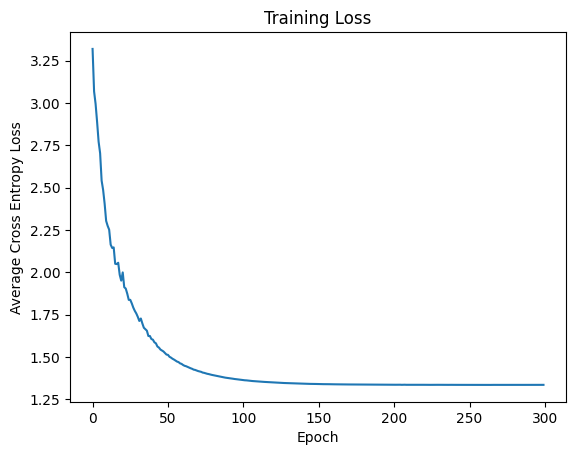

Test Accuracy: 0.3989124372559955 with params {'HIDDEN_SIZE': 16, 'learning_rate': 0.05}


  0%|          | 1/300 [00:00<01:57,  2.56it/s]

Epoch 1/300, Loss: 3.3965


  1%|          | 2/300 [00:00<01:56,  2.57it/s]

Epoch 2/300, Loss: 3.0717


  1%|          | 3/300 [00:01<01:48,  2.73it/s]

Epoch 3/300, Loss: 2.9952


  1%|▏         | 4/300 [00:01<01:34,  3.15it/s]

Epoch 4/300, Loss: 2.9356


  2%|▏         | 5/300 [00:01<01:27,  3.37it/s]

Epoch 5/300, Loss: 2.8763


  2%|▏         | 6/300 [00:01<01:22,  3.55it/s]

Epoch 6/300, Loss: 2.8460


  2%|▏         | 7/300 [00:02<01:18,  3.73it/s]

Epoch 7/300, Loss: 2.7971


  3%|▎         | 8/300 [00:02<01:16,  3.82it/s]

Epoch 8/300, Loss: 2.7857


  3%|▎         | 9/300 [00:02<01:16,  3.82it/s]

Epoch 9/300, Loss: 2.7648


  3%|▎         | 10/300 [00:02<01:14,  3.91it/s]

Epoch 10/300, Loss: 2.7126


  4%|▎         | 11/300 [00:03<01:13,  3.93it/s]

Epoch 11/300, Loss: 2.7336


  4%|▍         | 12/300 [00:03<01:12,  3.97it/s]

Epoch 12/300, Loss: 2.7264


  4%|▍         | 13/300 [00:03<01:12,  3.94it/s]

Epoch 13/300, Loss: 2.6647


  5%|▍         | 14/300 [00:03<01:12,  3.97it/s]

Epoch 14/300, Loss: 2.6785


  5%|▌         | 15/300 [00:04<01:11,  4.01it/s]

Epoch 15/300, Loss: 2.6522


  5%|▌         | 16/300 [00:04<01:10,  4.02it/s]

Epoch 16/300, Loss: 2.6263


  6%|▌         | 17/300 [00:04<01:11,  3.98it/s]

Epoch 17/300, Loss: 2.6280


  6%|▌         | 18/300 [00:04<01:10,  4.01it/s]

Epoch 18/300, Loss: 2.6500


  6%|▋         | 19/300 [00:05<01:09,  4.02it/s]

Epoch 19/300, Loss: 2.6219


  7%|▋         | 20/300 [00:05<01:09,  4.03it/s]

Epoch 20/300, Loss: 2.6048


  7%|▋         | 21/300 [00:05<01:10,  3.99it/s]

Epoch 21/300, Loss: 2.6210


  7%|▋         | 22/300 [00:05<01:09,  4.00it/s]

Epoch 22/300, Loss: 2.5773


  8%|▊         | 23/300 [00:06<01:09,  4.01it/s]

Epoch 23/300, Loss: 2.5748


  8%|▊         | 24/300 [00:06<01:09,  3.97it/s]

Epoch 24/300, Loss: 2.5859


  8%|▊         | 25/300 [00:06<01:09,  3.98it/s]

Epoch 25/300, Loss: 2.5599


  9%|▊         | 26/300 [00:06<01:09,  3.96it/s]

Epoch 26/300, Loss: 2.5548


  9%|▉         | 27/300 [00:07<01:08,  3.96it/s]

Epoch 27/300, Loss: 2.5529


  9%|▉         | 28/300 [00:07<01:08,  3.94it/s]

Epoch 28/300, Loss: 2.5430


 10%|▉         | 29/300 [00:07<01:08,  3.97it/s]

Epoch 29/300, Loss: 2.5408


 10%|█         | 30/300 [00:07<01:08,  3.94it/s]

Epoch 30/300, Loss: 2.5516


 10%|█         | 31/300 [00:08<01:07,  3.98it/s]

Epoch 31/300, Loss: 2.5397


 11%|█         | 32/300 [00:08<01:06,  4.03it/s]

Epoch 32/300, Loss: 2.5254


 11%|█         | 33/300 [00:08<01:06,  4.00it/s]

Epoch 33/300, Loss: 2.5324


 11%|█▏        | 34/300 [00:08<01:07,  3.94it/s]

Epoch 34/300, Loss: 2.5255


 12%|█▏        | 35/300 [00:09<01:07,  3.92it/s]

Epoch 35/300, Loss: 2.5219


 12%|█▏        | 36/300 [00:09<01:06,  3.96it/s]

Epoch 36/300, Loss: 2.5183


 12%|█▏        | 37/300 [00:09<01:06,  3.98it/s]

Epoch 37/300, Loss: 2.5161


 13%|█▎        | 38/300 [00:09<01:06,  3.96it/s]

Epoch 38/300, Loss: 2.5083


 13%|█▎        | 39/300 [00:10<01:05,  4.01it/s]

Epoch 39/300, Loss: 2.5075


 13%|█▎        | 40/300 [00:10<01:04,  4.02it/s]

Epoch 40/300, Loss: 2.5068


 14%|█▎        | 41/300 [00:10<01:04,  4.00it/s]

Epoch 41/300, Loss: 2.4992


 14%|█▍        | 42/300 [00:10<01:04,  3.98it/s]

Epoch 42/300, Loss: 2.4987


 14%|█▍        | 43/300 [00:11<01:10,  3.63it/s]

Epoch 43/300, Loss: 2.4957


 15%|█▍        | 44/300 [00:11<01:16,  3.34it/s]

Epoch 44/300, Loss: 2.4940


 15%|█▌        | 45/300 [00:11<01:20,  3.18it/s]

Epoch 45/300, Loss: 2.4898


 15%|█▌        | 46/300 [00:12<01:21,  3.12it/s]

Epoch 46/300, Loss: 2.4891


 16%|█▌        | 47/300 [00:12<01:26,  2.91it/s]

Epoch 47/300, Loss: 2.4869


 16%|█▌        | 48/300 [00:13<01:30,  2.78it/s]

Epoch 48/300, Loss: 2.4855


 16%|█▋        | 49/300 [00:13<01:31,  2.74it/s]

Epoch 49/300, Loss: 2.4822


 17%|█▋        | 50/300 [00:13<01:32,  2.71it/s]

Epoch 50/300, Loss: 2.4777


 17%|█▋        | 51/300 [00:14<01:23,  2.98it/s]

Epoch 51/300, Loss: 2.4804


 17%|█▋        | 52/300 [00:14<01:16,  3.23it/s]

Epoch 52/300, Loss: 2.4750


 18%|█▊        | 53/300 [00:14<01:11,  3.44it/s]

Epoch 53/300, Loss: 2.4753


 18%|█▊        | 54/300 [00:14<01:08,  3.58it/s]

Epoch 54/300, Loss: 2.4735


 18%|█▊        | 55/300 [00:15<01:06,  3.67it/s]

Epoch 55/300, Loss: 2.4720


 19%|█▊        | 56/300 [00:15<01:04,  3.79it/s]

Epoch 56/300, Loss: 2.4694


 19%|█▉        | 57/300 [00:15<01:03,  3.86it/s]

Epoch 57/300, Loss: 2.4701


 19%|█▉        | 58/300 [00:15<01:02,  3.89it/s]

Epoch 58/300, Loss: 2.4667


 20%|█▉        | 59/300 [00:16<01:01,  3.92it/s]

Epoch 59/300, Loss: 2.4666


 20%|██        | 60/300 [00:16<01:00,  3.95it/s]

Epoch 60/300, Loss: 2.4651


 20%|██        | 61/300 [00:16<00:59,  3.99it/s]

Epoch 61/300, Loss: 2.4631


 21%|██        | 62/300 [00:16<01:00,  3.95it/s]

Epoch 62/300, Loss: 2.4625


 21%|██        | 63/300 [00:17<00:59,  3.95it/s]

Epoch 63/300, Loss: 2.4620


 21%|██▏       | 64/300 [00:17<00:59,  4.00it/s]

Epoch 64/300, Loss: 2.4603


 22%|██▏       | 65/300 [00:17<00:58,  4.00it/s]

Epoch 65/300, Loss: 2.4588


 22%|██▏       | 66/300 [00:17<00:58,  4.01it/s]

Epoch 66/300, Loss: 2.4584


 22%|██▏       | 67/300 [00:18<00:58,  3.97it/s]

Epoch 67/300, Loss: 2.4576


 23%|██▎       | 68/300 [00:18<00:57,  4.01it/s]

Epoch 68/300, Loss: 2.4558


 23%|██▎       | 69/300 [00:18<00:57,  4.01it/s]

Epoch 69/300, Loss: 2.4556


 23%|██▎       | 70/300 [00:18<00:57,  4.02it/s]

Epoch 70/300, Loss: 2.4548


 24%|██▎       | 71/300 [00:19<00:57,  3.98it/s]

Epoch 71/300, Loss: 2.4539


 24%|██▍       | 72/300 [00:19<00:56,  4.01it/s]

Epoch 72/300, Loss: 2.4538


 24%|██▍       | 73/300 [00:19<00:56,  4.05it/s]

Epoch 73/300, Loss: 2.4525


 25%|██▍       | 74/300 [00:19<00:56,  4.03it/s]

Epoch 74/300, Loss: 2.4524


 25%|██▌       | 75/300 [00:20<00:57,  3.94it/s]

Epoch 75/300, Loss: 2.4511


 25%|██▌       | 76/300 [00:20<00:56,  3.96it/s]

Epoch 76/300, Loss: 2.4503


 26%|██▌       | 77/300 [00:20<00:55,  3.99it/s]

Epoch 77/300, Loss: 2.4496


 26%|██▌       | 78/300 [00:20<00:55,  3.99it/s]

Epoch 78/300, Loss: 2.4490


 26%|██▋       | 79/300 [00:21<00:56,  3.94it/s]

Epoch 79/300, Loss: 2.4487


 27%|██▋       | 80/300 [00:21<00:57,  3.85it/s]

Epoch 80/300, Loss: 2.4478


 27%|██▋       | 81/300 [00:21<00:58,  3.76it/s]

Epoch 81/300, Loss: 2.4469


 27%|██▋       | 82/300 [00:21<00:58,  3.75it/s]

Epoch 82/300, Loss: 2.4466


 28%|██▊       | 83/300 [00:22<00:58,  3.71it/s]

Epoch 83/300, Loss: 2.4460


 28%|██▊       | 84/300 [00:22<00:58,  3.71it/s]

Epoch 84/300, Loss: 2.4455


 28%|██▊       | 85/300 [00:22<00:56,  3.79it/s]

Epoch 85/300, Loss: 2.4454


 29%|██▊       | 86/300 [00:22<00:55,  3.86it/s]

Epoch 86/300, Loss: 2.4441


 29%|██▉       | 87/300 [00:23<00:55,  3.86it/s]

Epoch 87/300, Loss: 2.4439


 29%|██▉       | 88/300 [00:23<00:54,  3.92it/s]

Epoch 88/300, Loss: 2.4436


 30%|██▉       | 89/300 [00:23<00:54,  3.87it/s]

Epoch 89/300, Loss: 2.4430


 30%|███       | 90/300 [00:24<01:01,  3.39it/s]

Epoch 90/300, Loss: 2.4425


 30%|███       | 91/300 [00:24<01:04,  3.22it/s]

Epoch 91/300, Loss: 2.4420


 31%|███       | 92/300 [00:24<01:06,  3.13it/s]

Epoch 92/300, Loss: 2.4417


 31%|███       | 93/300 [00:25<01:11,  2.88it/s]

Epoch 93/300, Loss: 2.4415


 31%|███▏      | 94/300 [00:25<01:12,  2.83it/s]

Epoch 94/300, Loss: 2.4412


 32%|███▏      | 95/300 [00:25<01:15,  2.72it/s]

Epoch 95/300, Loss: 2.4407


 32%|███▏      | 96/300 [00:26<01:17,  2.63it/s]

Epoch 96/300, Loss: 2.4405


 32%|███▏      | 97/300 [00:26<01:14,  2.73it/s]

Epoch 97/300, Loss: 2.4400


 33%|███▎      | 98/300 [00:26<01:06,  3.03it/s]

Epoch 98/300, Loss: 2.4398


 33%|███▎      | 99/300 [00:27<01:01,  3.26it/s]

Epoch 99/300, Loss: 2.4392


 33%|███▎      | 100/300 [00:27<00:58,  3.42it/s]

Epoch 100/300, Loss: 2.4389


 34%|███▎      | 101/300 [00:27<00:55,  3.58it/s]

Epoch 101/300, Loss: 2.4385


 34%|███▍      | 102/300 [00:27<00:53,  3.74it/s]

Epoch 102/300, Loss: 2.4385


 34%|███▍      | 103/300 [00:28<00:51,  3.82it/s]

Epoch 103/300, Loss: 2.4381


 35%|███▍      | 104/300 [00:28<00:51,  3.83it/s]

Epoch 104/300, Loss: 2.4379


 35%|███▌      | 105/300 [00:28<00:50,  3.86it/s]

Epoch 105/300, Loss: 2.4376


 35%|███▌      | 106/300 [00:28<00:49,  3.95it/s]

Epoch 106/300, Loss: 2.4373


 36%|███▌      | 107/300 [00:29<00:48,  3.96it/s]

Epoch 107/300, Loss: 2.4371


 36%|███▌      | 108/300 [00:29<00:48,  3.93it/s]

Epoch 108/300, Loss: 2.4368


 36%|███▋      | 109/300 [00:29<00:48,  3.90it/s]

Epoch 109/300, Loss: 2.4365


 37%|███▋      | 110/300 [00:29<00:48,  3.93it/s]

Epoch 110/300, Loss: 2.4362


 37%|███▋      | 111/300 [00:30<00:48,  3.91it/s]

Epoch 111/300, Loss: 2.4363


 37%|███▋      | 112/300 [00:30<00:49,  3.83it/s]

Epoch 112/300, Loss: 2.4361


 38%|███▊      | 113/300 [00:30<00:48,  3.88it/s]

Epoch 113/300, Loss: 2.4357


 38%|███▊      | 114/300 [00:31<00:47,  3.90it/s]

Epoch 114/300, Loss: 2.4357


 38%|███▊      | 115/300 [00:31<00:47,  3.93it/s]

Epoch 115/300, Loss: 2.4355


 39%|███▊      | 116/300 [00:31<00:47,  3.89it/s]

Epoch 116/300, Loss: 2.4353


 39%|███▉      | 117/300 [00:31<00:47,  3.88it/s]

Epoch 117/300, Loss: 2.4351


 39%|███▉      | 118/300 [00:32<00:46,  3.91it/s]

Epoch 118/300, Loss: 2.4347


 40%|███▉      | 119/300 [00:32<00:46,  3.93it/s]

Epoch 119/300, Loss: 2.4348


 40%|████      | 120/300 [00:32<00:46,  3.86it/s]

Epoch 120/300, Loss: 2.4346


 40%|████      | 121/300 [00:32<00:46,  3.88it/s]

Epoch 121/300, Loss: 2.4344


 41%|████      | 122/300 [00:33<00:45,  3.94it/s]

Epoch 122/300, Loss: 2.4343


 41%|████      | 123/300 [00:33<00:44,  4.00it/s]

Epoch 123/300, Loss: 2.4343


 41%|████▏     | 124/300 [00:33<00:44,  3.95it/s]

Epoch 124/300, Loss: 2.4340


 42%|████▏     | 125/300 [00:33<00:44,  3.92it/s]

Epoch 125/300, Loss: 2.4338


 42%|████▏     | 126/300 [00:34<00:44,  3.90it/s]

Epoch 126/300, Loss: 2.4338


 42%|████▏     | 127/300 [00:34<00:43,  3.98it/s]

Epoch 127/300, Loss: 2.4337


 43%|████▎     | 128/300 [00:34<00:43,  3.94it/s]

Epoch 128/300, Loss: 2.4336


 43%|████▎     | 129/300 [00:34<00:43,  3.92it/s]

Epoch 129/300, Loss: 2.4334


 43%|████▎     | 130/300 [00:35<00:43,  3.93it/s]

Epoch 130/300, Loss: 2.4333


 44%|████▎     | 131/300 [00:35<00:43,  3.87it/s]

Epoch 131/300, Loss: 2.4334


 44%|████▍     | 132/300 [00:35<00:43,  3.87it/s]

Epoch 132/300, Loss: 2.4332


 44%|████▍     | 133/300 [00:35<00:43,  3.85it/s]

Epoch 133/300, Loss: 2.4331


 45%|████▍     | 134/300 [00:36<00:43,  3.78it/s]

Epoch 134/300, Loss: 2.4329


 45%|████▌     | 135/300 [00:36<00:44,  3.68it/s]

Epoch 135/300, Loss: 2.4327


 45%|████▌     | 136/300 [00:36<00:47,  3.44it/s]

Epoch 136/300, Loss: 2.4326


 46%|████▌     | 137/300 [00:37<00:51,  3.18it/s]

Epoch 137/300, Loss: 2.4327


 46%|████▌     | 138/300 [00:37<00:53,  3.02it/s]

Epoch 138/300, Loss: 2.4327


 46%|████▋     | 139/300 [00:37<00:53,  3.00it/s]

Epoch 139/300, Loss: 2.4324


 47%|████▋     | 140/300 [00:38<00:54,  2.94it/s]

Epoch 140/300, Loss: 2.4324


 47%|████▋     | 141/300 [00:38<01:01,  2.59it/s]

Epoch 141/300, Loss: 2.4323


 47%|████▋     | 142/300 [00:39<01:03,  2.50it/s]

Epoch 142/300, Loss: 2.4324


 48%|████▊     | 143/300 [00:39<01:04,  2.44it/s]

Epoch 143/300, Loss: 2.4324


 48%|████▊     | 144/300 [00:39<00:57,  2.70it/s]

Epoch 144/300, Loss: 2.4321


 48%|████▊     | 145/300 [00:40<00:51,  2.99it/s]

Epoch 145/300, Loss: 2.4322


 49%|████▊     | 146/300 [00:40<00:47,  3.23it/s]

Epoch 146/300, Loss: 2.4321


 49%|████▉     | 147/300 [00:40<00:46,  3.30it/s]

Epoch 147/300, Loss: 2.4318


 49%|████▉     | 148/300 [00:40<00:44,  3.41it/s]

Epoch 148/300, Loss: 2.4318


 50%|████▉     | 149/300 [00:41<00:42,  3.52it/s]

Epoch 149/300, Loss: 2.4320


 50%|█████     | 150/300 [00:41<00:41,  3.59it/s]

Epoch 150/300, Loss: 2.4316


 50%|█████     | 151/300 [00:41<00:40,  3.65it/s]

Epoch 151/300, Loss: 2.4317


 51%|█████     | 152/300 [00:41<00:39,  3.75it/s]

Epoch 152/300, Loss: 2.4317


 51%|█████     | 153/300 [00:42<00:38,  3.81it/s]

Epoch 153/300, Loss: 2.4316


 51%|█████▏    | 154/300 [00:42<00:37,  3.85it/s]

Epoch 154/300, Loss: 2.4315


 52%|█████▏    | 155/300 [00:42<00:38,  3.81it/s]

Epoch 155/300, Loss: 2.4317


 52%|█████▏    | 156/300 [00:42<00:37,  3.84it/s]

Epoch 156/300, Loss: 2.4315


 52%|█████▏    | 157/300 [00:43<00:37,  3.86it/s]

Epoch 157/300, Loss: 2.4315


 53%|█████▎    | 158/300 [00:43<00:36,  3.90it/s]

Epoch 158/300, Loss: 2.4316


 53%|█████▎    | 159/300 [00:43<00:36,  3.83it/s]

Epoch 159/300, Loss: 2.4313


 53%|█████▎    | 160/300 [00:44<00:36,  3.88it/s]

Epoch 160/300, Loss: 2.4313


 54%|█████▎    | 161/300 [00:44<00:35,  3.89it/s]

Epoch 161/300, Loss: 2.4312


 54%|█████▍    | 162/300 [00:44<00:36,  3.79it/s]

Epoch 162/300, Loss: 2.4312


 54%|█████▍    | 163/300 [00:44<00:36,  3.74it/s]

Epoch 163/300, Loss: 2.4312


 55%|█████▍    | 164/300 [00:45<00:35,  3.84it/s]

Epoch 164/300, Loss: 2.4311


 55%|█████▌    | 165/300 [00:45<00:34,  3.89it/s]

Epoch 165/300, Loss: 2.4311


 55%|█████▌    | 166/300 [00:45<00:34,  3.87it/s]

Epoch 166/300, Loss: 2.4311


 56%|█████▌    | 167/300 [00:45<00:34,  3.82it/s]

Epoch 167/300, Loss: 2.4312


 56%|█████▌    | 168/300 [00:46<00:33,  3.89it/s]

Epoch 168/300, Loss: 2.4312


 56%|█████▋    | 169/300 [00:46<00:33,  3.92it/s]

Epoch 169/300, Loss: 2.4312


 57%|█████▋    | 170/300 [00:46<00:33,  3.89it/s]

Epoch 170/300, Loss: 2.4310


 57%|█████▋    | 171/300 [00:46<00:33,  3.83it/s]

Epoch 171/300, Loss: 2.4310


 57%|█████▋    | 172/300 [00:47<00:33,  3.85it/s]

Epoch 172/300, Loss: 2.4310


 58%|█████▊    | 173/300 [00:47<00:33,  3.81it/s]

Epoch 173/300, Loss: 2.4309


 58%|█████▊    | 174/300 [00:47<00:33,  3.81it/s]

Epoch 174/300, Loss: 2.4309


 58%|█████▊    | 175/300 [00:47<00:32,  3.79it/s]

Epoch 175/300, Loss: 2.4308


 59%|█████▊    | 176/300 [00:48<00:31,  3.88it/s]

Epoch 176/300, Loss: 2.4308


 59%|█████▉    | 177/300 [00:48<00:31,  3.93it/s]

Epoch 177/300, Loss: 2.4308


 59%|█████▉    | 178/300 [00:48<00:30,  3.94it/s]

Epoch 178/300, Loss: 2.4308


 60%|█████▉    | 179/300 [00:48<00:31,  3.89it/s]

Epoch 179/300, Loss: 2.4308


 60%|██████    | 180/300 [00:49<00:30,  3.92it/s]

Epoch 180/300, Loss: 2.4307


 60%|██████    | 181/300 [00:49<00:30,  3.93it/s]

Epoch 181/300, Loss: 2.4308


 61%|██████    | 182/300 [00:49<00:31,  3.73it/s]

Epoch 182/300, Loss: 2.4308


 61%|██████    | 183/300 [00:50<00:34,  3.35it/s]

Epoch 183/300, Loss: 2.4306


 61%|██████▏   | 184/300 [00:50<00:35,  3.22it/s]

Epoch 184/300, Loss: 2.4307


 62%|██████▏   | 185/300 [00:50<00:36,  3.15it/s]

Epoch 185/300, Loss: 2.4307


 62%|██████▏   | 186/300 [00:51<00:38,  2.95it/s]

Epoch 186/300, Loss: 2.4305


 62%|██████▏   | 187/300 [00:51<00:40,  2.79it/s]

Epoch 187/300, Loss: 2.4306


 63%|██████▎   | 188/300 [00:52<00:42,  2.65it/s]

Epoch 188/300, Loss: 2.4306


 63%|██████▎   | 189/300 [00:52<00:42,  2.63it/s]

Epoch 189/300, Loss: 2.4306


 63%|██████▎   | 190/300 [00:52<00:37,  2.92it/s]

Epoch 190/300, Loss: 2.4307


 64%|██████▎   | 191/300 [00:52<00:34,  3.16it/s]

Epoch 191/300, Loss: 2.4306


 64%|██████▍   | 192/300 [00:53<00:32,  3.33it/s]

Epoch 192/300, Loss: 2.4306


 64%|██████▍   | 193/300 [00:53<00:30,  3.50it/s]

Epoch 193/300, Loss: 2.4306


 65%|██████▍   | 194/300 [00:53<00:29,  3.62it/s]

Epoch 194/300, Loss: 2.4306


 65%|██████▌   | 195/300 [00:53<00:28,  3.70it/s]

Epoch 195/300, Loss: 2.4305


 65%|██████▌   | 196/300 [00:54<00:27,  3.75it/s]

Epoch 196/300, Loss: 2.4306


 66%|██████▌   | 197/300 [00:54<00:26,  3.82it/s]

Epoch 197/300, Loss: 2.4305


 66%|██████▌   | 198/300 [00:54<00:26,  3.85it/s]

Epoch 198/300, Loss: 2.4304


 66%|██████▋   | 199/300 [00:54<00:26,  3.86it/s]

Epoch 199/300, Loss: 2.4305


 67%|██████▋   | 200/300 [00:55<00:26,  3.77it/s]

Epoch 200/300, Loss: 2.4304


 67%|██████▋   | 201/300 [00:55<00:25,  3.84it/s]

Epoch 201/300, Loss: 2.4306


 67%|██████▋   | 202/300 [00:55<00:25,  3.90it/s]

Epoch 202/300, Loss: 2.4305


 68%|██████▊   | 203/300 [00:55<00:24,  3.92it/s]

Epoch 203/300, Loss: 2.4305


 68%|██████▊   | 204/300 [00:56<00:24,  3.88it/s]

Epoch 204/300, Loss: 2.4304


 68%|██████▊   | 205/300 [00:56<00:24,  3.88it/s]

Epoch 205/300, Loss: 2.4304


 69%|██████▊   | 206/300 [00:56<00:24,  3.87it/s]

Epoch 206/300, Loss: 2.4305


 69%|██████▉   | 207/300 [00:57<00:23,  3.90it/s]

Epoch 207/300, Loss: 2.4306


 69%|██████▉   | 208/300 [00:57<00:23,  3.86it/s]

Epoch 208/300, Loss: 2.4305


 70%|██████▉   | 209/300 [00:57<00:23,  3.86it/s]

Epoch 209/300, Loss: 2.4304


 70%|███████   | 210/300 [00:57<00:23,  3.89it/s]

Epoch 210/300, Loss: 2.4306


 70%|███████   | 211/300 [00:58<00:22,  3.91it/s]

Epoch 211/300, Loss: 2.4307


 71%|███████   | 212/300 [00:58<00:22,  3.84it/s]

Epoch 212/300, Loss: 2.4305


 71%|███████   | 213/300 [00:58<00:22,  3.86it/s]

Epoch 213/300, Loss: 2.4303


 71%|███████▏  | 214/300 [00:58<00:22,  3.85it/s]

Epoch 214/300, Loss: 2.4304


 72%|███████▏  | 215/300 [00:59<00:21,  3.86it/s]

Epoch 215/300, Loss: 2.4305


 72%|███████▏  | 216/300 [00:59<00:21,  3.90it/s]

Epoch 216/300, Loss: 2.4305


 72%|███████▏  | 217/300 [00:59<00:21,  3.93it/s]

Epoch 217/300, Loss: 2.4306


 73%|███████▎  | 218/300 [00:59<00:20,  3.92it/s]

Epoch 218/300, Loss: 2.4304


 73%|███████▎  | 219/300 [01:00<00:20,  3.92it/s]

Epoch 219/300, Loss: 2.4303


 73%|███████▎  | 220/300 [01:00<00:20,  3.88it/s]

Epoch 220/300, Loss: 2.4305


 74%|███████▎  | 221/300 [01:00<00:20,  3.86it/s]

Epoch 221/300, Loss: 2.4303


 74%|███████▍  | 222/300 [01:00<00:20,  3.86it/s]

Epoch 222/300, Loss: 2.4304


 74%|███████▍  | 223/300 [01:01<00:19,  3.88it/s]

Epoch 223/300, Loss: 2.4303


 75%|███████▍  | 224/300 [01:01<00:19,  3.86it/s]

Epoch 224/300, Loss: 2.4303


 75%|███████▌  | 225/300 [01:01<00:19,  3.84it/s]

Epoch 225/300, Loss: 2.4303


 75%|███████▌  | 226/300 [01:01<00:19,  3.79it/s]

Epoch 226/300, Loss: 2.4305


 76%|███████▌  | 227/300 [01:02<00:18,  3.84it/s]

Epoch 227/300, Loss: 2.4303


 76%|███████▌  | 228/300 [01:02<00:19,  3.68it/s]

Epoch 228/300, Loss: 2.4304


 76%|███████▋  | 229/300 [01:02<00:21,  3.36it/s]

Epoch 229/300, Loss: 2.4303


 77%|███████▋  | 230/300 [01:03<00:21,  3.20it/s]

Epoch 230/300, Loss: 2.4305


 77%|███████▋  | 231/300 [01:03<00:22,  3.08it/s]

Epoch 231/300, Loss: 2.4304


 77%|███████▋  | 232/300 [01:03<00:22,  2.97it/s]

Epoch 232/300, Loss: 2.4304


 78%|███████▊  | 233/300 [01:04<00:23,  2.85it/s]

Epoch 233/300, Loss: 2.4303


 78%|███████▊  | 234/300 [01:04<00:24,  2.75it/s]

Epoch 234/300, Loss: 2.4304


 78%|███████▊  | 235/300 [01:05<00:28,  2.31it/s]

Epoch 235/300, Loss: 2.4303


 79%|███████▊  | 236/300 [01:05<00:29,  2.21it/s]

Epoch 236/300, Loss: 2.4302


 79%|███████▉  | 237/300 [01:06<00:31,  2.00it/s]

Epoch 237/300, Loss: 2.4302


 79%|███████▉  | 238/300 [01:06<00:33,  1.88it/s]

Epoch 238/300, Loss: 2.4303


 80%|███████▉  | 239/300 [01:07<00:33,  1.82it/s]

Epoch 239/300, Loss: 2.4303


 80%|████████  | 240/300 [01:08<00:32,  1.83it/s]

Epoch 240/300, Loss: 2.4304


 80%|████████  | 241/300 [01:08<00:32,  1.80it/s]

Epoch 241/300, Loss: 2.4304


 81%|████████  | 242/300 [01:09<00:34,  1.69it/s]

Epoch 242/300, Loss: 2.4302


 81%|████████  | 243/300 [01:10<00:34,  1.65it/s]

Epoch 243/300, Loss: 2.4302


 81%|████████▏ | 244/300 [01:10<00:36,  1.53it/s]

Epoch 244/300, Loss: 2.4304


 82%|████████▏ | 245/300 [01:11<00:34,  1.60it/s]

Epoch 245/300, Loss: 2.4304


 82%|████████▏ | 246/300 [01:11<00:33,  1.61it/s]

Epoch 246/300, Loss: 2.4303


 82%|████████▏ | 247/300 [01:12<00:31,  1.70it/s]

Epoch 247/300, Loss: 2.4304


 83%|████████▎ | 248/300 [01:13<00:31,  1.64it/s]

Epoch 248/300, Loss: 2.4303


 83%|████████▎ | 249/300 [01:13<00:26,  1.89it/s]

Epoch 249/300, Loss: 2.4302


 83%|████████▎ | 250/300 [01:13<00:22,  2.24it/s]

Epoch 250/300, Loss: 2.4303


 84%|████████▎ | 251/300 [01:13<00:18,  2.59it/s]

Epoch 251/300, Loss: 2.4303


 84%|████████▍ | 252/300 [01:14<00:16,  2.88it/s]

Epoch 252/300, Loss: 2.4303


 84%|████████▍ | 253/300 [01:14<00:14,  3.15it/s]

Epoch 253/300, Loss: 2.4303


 85%|████████▍ | 254/300 [01:14<00:13,  3.32it/s]

Epoch 254/300, Loss: 2.4304


 85%|████████▌ | 255/300 [01:14<00:12,  3.49it/s]

Epoch 255/300, Loss: 2.4302


 85%|████████▌ | 256/300 [01:15<00:12,  3.59it/s]

Epoch 256/300, Loss: 2.4302


 86%|████████▌ | 257/300 [01:15<00:13,  3.23it/s]

Epoch 257/300, Loss: 2.4303


 86%|████████▌ | 258/300 [01:15<00:13,  3.06it/s]

Epoch 258/300, Loss: 2.4302


 86%|████████▋ | 259/300 [01:16<00:13,  3.01it/s]

Epoch 259/300, Loss: 2.4302


 87%|████████▋ | 260/300 [01:16<00:13,  2.95it/s]

Epoch 260/300, Loss: 2.4303


 87%|████████▋ | 261/300 [01:17<00:13,  2.84it/s]

Epoch 261/300, Loss: 2.4302


 87%|████████▋ | 262/300 [01:17<00:13,  2.73it/s]

Epoch 262/300, Loss: 2.4302


 88%|████████▊ | 263/300 [01:17<00:14,  2.55it/s]

Epoch 263/300, Loss: 2.4304


 88%|████████▊ | 264/300 [01:18<00:13,  2.72it/s]

Epoch 264/300, Loss: 2.4304


 88%|████████▊ | 265/300 [01:18<00:11,  2.99it/s]

Epoch 265/300, Loss: 2.4303


 89%|████████▊ | 266/300 [01:18<00:10,  3.23it/s]

Epoch 266/300, Loss: 2.4303


 89%|████████▉ | 267/300 [01:19<00:09,  3.39it/s]

Epoch 267/300, Loss: 2.4303


 89%|████████▉ | 268/300 [01:19<00:09,  3.54it/s]

Epoch 268/300, Loss: 2.4301


 90%|████████▉ | 269/300 [01:19<00:08,  3.65it/s]

Epoch 269/300, Loss: 2.4304


 90%|█████████ | 270/300 [01:19<00:08,  3.72it/s]

Epoch 270/300, Loss: 2.4302


 90%|█████████ | 271/300 [01:20<00:07,  3.79it/s]

Epoch 271/300, Loss: 2.4302


 91%|█████████ | 272/300 [01:20<00:07,  3.83it/s]

Epoch 272/300, Loss: 2.4303


 91%|█████████ | 273/300 [01:20<00:06,  3.86it/s]

Epoch 273/300, Loss: 2.4303


 91%|█████████▏| 274/300 [01:20<00:06,  3.88it/s]

Epoch 274/300, Loss: 2.4302


 92%|█████████▏| 275/300 [01:21<00:06,  3.87it/s]

Epoch 275/300, Loss: 2.4303


 92%|█████████▏| 276/300 [01:21<00:06,  3.90it/s]

Epoch 276/300, Loss: 2.4302


 92%|█████████▏| 277/300 [01:21<00:05,  3.92it/s]

Epoch 277/300, Loss: 2.4303


 93%|█████████▎| 278/300 [01:21<00:05,  3.90it/s]

Epoch 278/300, Loss: 2.4303


 93%|█████████▎| 279/300 [01:22<00:05,  3.88it/s]

Epoch 279/300, Loss: 2.4302


 93%|█████████▎| 280/300 [01:22<00:05,  3.94it/s]

Epoch 280/300, Loss: 2.4305


 94%|█████████▎| 281/300 [01:22<00:04,  3.87it/s]

Epoch 281/300, Loss: 2.4303


 94%|█████████▍| 282/300 [01:22<00:04,  3.92it/s]

Epoch 282/300, Loss: 2.4302


 94%|█████████▍| 283/300 [01:23<00:04,  3.94it/s]

Epoch 283/300, Loss: 2.4304


 95%|█████████▍| 284/300 [01:23<00:04,  3.96it/s]

Epoch 284/300, Loss: 2.4302


 95%|█████████▌| 285/300 [01:23<00:03,  3.98it/s]

Epoch 285/300, Loss: 2.4303


 95%|█████████▌| 286/300 [01:23<00:03,  3.97it/s]

Epoch 286/300, Loss: 2.4302


 96%|█████████▌| 287/300 [01:24<00:03,  3.92it/s]

Epoch 287/300, Loss: 2.4302


 96%|█████████▌| 288/300 [01:24<00:03,  3.89it/s]

Epoch 288/300, Loss: 2.4303


 96%|█████████▋| 289/300 [01:24<00:02,  3.94it/s]

Epoch 289/300, Loss: 2.4301


 97%|█████████▋| 290/300 [01:24<00:02,  3.92it/s]

Epoch 290/300, Loss: 2.4301


 97%|█████████▋| 291/300 [01:25<00:02,  3.91it/s]

Epoch 291/300, Loss: 2.4304


 97%|█████████▋| 292/300 [01:25<00:02,  3.90it/s]

Epoch 292/300, Loss: 2.4302


 98%|█████████▊| 293/300 [01:25<00:01,  3.83it/s]

Epoch 293/300, Loss: 2.4302


 98%|█████████▊| 294/300 [01:25<00:01,  3.81it/s]

Epoch 294/300, Loss: 2.4301


 98%|█████████▊| 295/300 [01:26<00:01,  3.78it/s]

Epoch 295/300, Loss: 2.4302


 99%|█████████▊| 296/300 [01:26<00:01,  3.87it/s]

Epoch 296/300, Loss: 2.4304


 99%|█████████▉| 297/300 [01:26<00:00,  3.90it/s]

Epoch 297/300, Loss: 2.4302


 99%|█████████▉| 298/300 [01:26<00:00,  3.93it/s]

Epoch 298/300, Loss: 2.4301


100%|█████████▉| 299/300 [01:27<00:00,  3.92it/s]

Epoch 299/300, Loss: 2.4302


100%|██████████| 300/300 [01:27<00:00,  3.43it/s]

Epoch 300/300, Loss: 2.4303


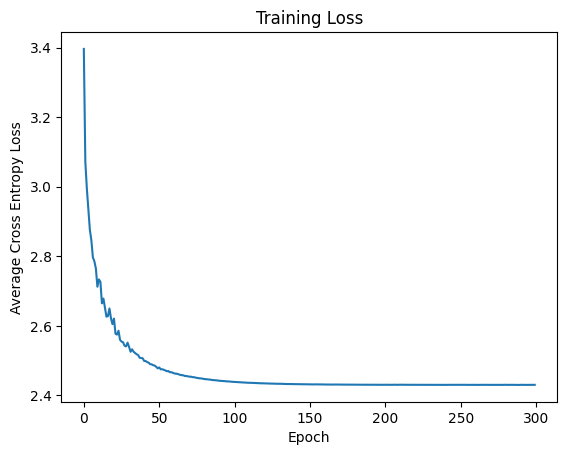

Test Accuracy: 0.0928611266034579 with params {'HIDDEN_SIZE': 16, 'learning_rate': 0.07}


  0%|          | 1/300 [00:00<01:17,  3.84it/s]

Epoch 1/300, Loss: 3.3129


  1%|          | 2/300 [00:00<01:34,  3.14it/s]

Epoch 2/300, Loss: 3.0500


  1%|          | 3/300 [00:00<01:39,  3.00it/s]

Epoch 3/300, Loss: 2.9291


  1%|▏         | 4/300 [00:01<01:39,  2.99it/s]

Epoch 4/300, Loss: 2.8105


  2%|▏         | 5/300 [00:01<01:41,  2.92it/s]

Epoch 5/300, Loss: 2.8015


  2%|▏         | 6/300 [00:02<01:45,  2.80it/s]

Epoch 6/300, Loss: 2.7315


  2%|▏         | 7/300 [00:02<01:49,  2.66it/s]

Epoch 7/300, Loss: 2.5794


  3%|▎         | 8/300 [00:02<01:52,  2.60it/s]

Epoch 8/300, Loss: 2.5026


  3%|▎         | 9/300 [00:03<01:49,  2.65it/s]

Epoch 9/300, Loss: 2.4257


  3%|▎         | 10/300 [00:03<01:38,  2.95it/s]

Epoch 10/300, Loss: 2.2336


  4%|▎         | 11/300 [00:03<01:31,  3.16it/s]

Epoch 11/300, Loss: 2.1968


  4%|▍         | 12/300 [00:04<01:26,  3.33it/s]

Epoch 12/300, Loss: 2.1562


  4%|▍         | 13/300 [00:04<01:22,  3.46it/s]

Epoch 13/300, Loss: 2.0295


  5%|▍         | 14/300 [00:04<01:19,  3.60it/s]

Epoch 14/300, Loss: 2.0112


  5%|▌         | 15/300 [00:04<01:17,  3.67it/s]

Epoch 15/300, Loss: 2.0007


  5%|▌         | 16/300 [00:05<01:16,  3.72it/s]

Epoch 16/300, Loss: 1.9289


  6%|▌         | 17/300 [00:05<01:15,  3.76it/s]

Epoch 17/300, Loss: 1.9089


  6%|▌         | 18/300 [00:05<01:13,  3.82it/s]

Epoch 18/300, Loss: 1.8971


  6%|▋         | 19/300 [00:05<01:13,  3.81it/s]

Epoch 19/300, Loss: 1.8466


  7%|▋         | 20/300 [00:06<01:12,  3.88it/s]

Epoch 20/300, Loss: 1.8214


  7%|▋         | 21/300 [00:06<01:11,  3.90it/s]

Epoch 21/300, Loss: 1.8184


  7%|▋         | 22/300 [00:06<01:10,  3.92it/s]

Epoch 22/300, Loss: 1.7989


  8%|▊         | 23/300 [00:06<01:11,  3.86it/s]

Epoch 23/300, Loss: 1.7598


  8%|▊         | 24/300 [00:07<01:11,  3.88it/s]

Epoch 24/300, Loss: 1.7734


  8%|▊         | 25/300 [00:07<01:09,  3.94it/s]

Epoch 25/300, Loss: 1.7012


  9%|▊         | 26/300 [00:07<01:09,  3.97it/s]

Epoch 26/300, Loss: 1.7189


  9%|▉         | 27/300 [00:07<01:09,  3.94it/s]

Epoch 27/300, Loss: 1.7317


  9%|▉         | 28/300 [00:08<01:09,  3.91it/s]

Epoch 28/300, Loss: 1.6833


 10%|▉         | 29/300 [00:08<01:09,  3.92it/s]

Epoch 29/300, Loss: 1.6820


 10%|█         | 30/300 [00:08<01:09,  3.91it/s]

Epoch 30/300, Loss: 1.6689


 10%|█         | 31/300 [00:08<01:09,  3.87it/s]

Epoch 31/300, Loss: 1.6425


 11%|█         | 32/300 [00:09<01:09,  3.86it/s]

Epoch 32/300, Loss: 1.6469


 11%|█         | 33/300 [00:09<01:08,  3.88it/s]

Epoch 33/300, Loss: 1.6533


 11%|█▏        | 34/300 [00:09<01:08,  3.90it/s]

Epoch 34/300, Loss: 1.6119


 12%|█▏        | 35/300 [00:09<01:07,  3.91it/s]

Epoch 35/300, Loss: 1.6077


 12%|█▏        | 36/300 [00:10<01:08,  3.88it/s]

Epoch 36/300, Loss: 1.6044


 12%|█▏        | 37/300 [00:10<01:06,  3.93it/s]

Epoch 37/300, Loss: 1.5772


 13%|█▎        | 38/300 [00:10<01:08,  3.84it/s]

Epoch 38/300, Loss: 1.5750


 13%|█▎        | 39/300 [00:10<01:08,  3.82it/s]

Epoch 39/300, Loss: 1.5707


 13%|█▎        | 40/300 [00:11<01:07,  3.87it/s]

Epoch 40/300, Loss: 1.5689


 14%|█▎        | 41/300 [00:11<01:06,  3.92it/s]

Epoch 41/300, Loss: 1.5385


 14%|█▍        | 42/300 [00:11<01:05,  3.92it/s]

Epoch 42/300, Loss: 1.5395


 14%|█▍        | 43/300 [00:11<01:06,  3.88it/s]

Epoch 43/300, Loss: 1.5419


 15%|█▍        | 44/300 [00:12<01:05,  3.88it/s]

Epoch 44/300, Loss: 1.5176


 15%|█▌        | 45/300 [00:12<01:04,  3.95it/s]

Epoch 45/300, Loss: 1.5148


 15%|█▌        | 46/300 [00:12<01:04,  3.92it/s]

Epoch 46/300, Loss: 1.5112


 16%|█▌        | 47/300 [00:12<01:04,  3.90it/s]

Epoch 47/300, Loss: 1.4986


 16%|█▌        | 48/300 [00:13<01:08,  3.66it/s]

Epoch 48/300, Loss: 1.4989


 16%|█▋        | 49/300 [00:13<01:15,  3.33it/s]

Epoch 49/300, Loss: 1.4921


 17%|█▋        | 50/300 [00:14<01:20,  3.10it/s]

Epoch 50/300, Loss: 1.4805


 17%|█▋        | 51/300 [00:14<01:20,  3.09it/s]

Epoch 51/300, Loss: 1.4830


 17%|█▋        | 52/300 [00:14<01:23,  2.98it/s]

Epoch 52/300, Loss: 1.4754


 18%|█▊        | 53/300 [00:15<01:28,  2.80it/s]

Epoch 53/300, Loss: 1.4676


 18%|█▊        | 54/300 [00:15<01:31,  2.69it/s]

Epoch 54/300, Loss: 1.4580


 18%|█▊        | 55/300 [00:15<01:34,  2.59it/s]

Epoch 55/300, Loss: 1.4588


 19%|█▊        | 56/300 [00:16<01:25,  2.87it/s]

Epoch 56/300, Loss: 1.4517


 19%|█▉        | 57/300 [00:16<01:17,  3.14it/s]

Epoch 57/300, Loss: 1.4471


 19%|█▉        | 58/300 [00:16<01:12,  3.32it/s]

Epoch 58/300, Loss: 1.4436


 20%|█▉        | 59/300 [00:16<01:09,  3.45it/s]

Epoch 59/300, Loss: 1.4383


 20%|██        | 60/300 [00:17<01:07,  3.58it/s]

Epoch 60/300, Loss: 1.4349


 20%|██        | 61/300 [00:17<01:04,  3.71it/s]

Epoch 61/300, Loss: 1.4295


 21%|██        | 62/300 [00:17<01:03,  3.75it/s]

Epoch 62/300, Loss: 1.4273


 21%|██        | 63/300 [00:18<01:03,  3.71it/s]

Epoch 63/300, Loss: 1.4229


 21%|██▏       | 64/300 [00:18<01:02,  3.78it/s]

Epoch 64/300, Loss: 1.4201


 22%|██▏       | 65/300 [00:18<01:01,  3.81it/s]

Epoch 65/300, Loss: 1.4158


 22%|██▏       | 66/300 [00:18<01:01,  3.84it/s]

Epoch 66/300, Loss: 1.4127


 22%|██▏       | 67/300 [00:19<01:01,  3.82it/s]

Epoch 67/300, Loss: 1.4089


 23%|██▎       | 68/300 [00:19<01:00,  3.85it/s]

Epoch 68/300, Loss: 1.4063


 23%|██▎       | 69/300 [00:19<00:59,  3.88it/s]

Epoch 69/300, Loss: 1.4050


 23%|██▎       | 70/300 [00:19<01:01,  3.76it/s]

Epoch 70/300, Loss: 1.4024


 24%|██▎       | 71/300 [00:20<01:02,  3.69it/s]

Epoch 71/300, Loss: 1.3981


 24%|██▍       | 72/300 [00:20<01:01,  3.72it/s]

Epoch 72/300, Loss: 1.3972


 24%|██▍       | 73/300 [00:20<01:00,  3.75it/s]

Epoch 73/300, Loss: 1.3937


 25%|██▍       | 74/300 [00:20<01:00,  3.74it/s]

Epoch 74/300, Loss: 1.3914


 25%|██▌       | 75/300 [00:21<01:00,  3.75it/s]

Epoch 75/300, Loss: 1.3889


 25%|██▌       | 76/300 [00:21<00:58,  3.82it/s]

Epoch 76/300, Loss: 1.3869


 26%|██▌       | 77/300 [00:21<00:57,  3.88it/s]

Epoch 77/300, Loss: 1.3852


 26%|██▌       | 78/300 [00:21<00:56,  3.94it/s]

Epoch 78/300, Loss: 1.3831


 26%|██▋       | 79/300 [00:22<00:57,  3.87it/s]

Epoch 79/300, Loss: 1.3816


 27%|██▋       | 80/300 [00:22<00:56,  3.90it/s]

Epoch 80/300, Loss: 1.3797


 27%|██▋       | 81/300 [00:22<00:56,  3.89it/s]

Epoch 81/300, Loss: 1.3779


 27%|██▋       | 82/300 [00:22<00:55,  3.91it/s]

Epoch 82/300, Loss: 1.3761


 28%|██▊       | 83/300 [00:23<00:56,  3.87it/s]

Epoch 83/300, Loss: 1.3742


 28%|██▊       | 84/300 [00:23<00:55,  3.88it/s]

Epoch 84/300, Loss: 1.3740


 28%|██▊       | 85/300 [00:23<00:55,  3.89it/s]

Epoch 85/300, Loss: 1.3717


 29%|██▊       | 86/300 [00:24<00:55,  3.88it/s]

Epoch 86/300, Loss: 1.3702


 29%|██▉       | 87/300 [00:24<00:55,  3.86it/s]

Epoch 87/300, Loss: 1.3682


 29%|██▉       | 88/300 [00:24<00:54,  3.92it/s]

Epoch 88/300, Loss: 1.3671


 30%|██▉       | 89/300 [00:24<00:53,  3.93it/s]

Epoch 89/300, Loss: 1.3662


 30%|███       | 90/300 [00:25<00:53,  3.89it/s]

Epoch 90/300, Loss: 1.3646


 30%|███       | 91/300 [00:25<00:54,  3.87it/s]

Epoch 91/300, Loss: 1.3640


 31%|███       | 92/300 [00:25<00:52,  3.93it/s]

Epoch 92/300, Loss: 1.3625


 31%|███       | 93/300 [00:25<00:52,  3.92it/s]

Epoch 93/300, Loss: 1.3612


 31%|███▏      | 94/300 [00:26<00:56,  3.65it/s]

Epoch 94/300, Loss: 1.3607


 32%|███▏      | 95/300 [00:26<01:01,  3.34it/s]

Epoch 95/300, Loss: 1.3592


 32%|███▏      | 96/300 [00:26<01:04,  3.17it/s]

Epoch 96/300, Loss: 1.3581


 32%|███▏      | 97/300 [00:27<01:06,  3.06it/s]

Epoch 97/300, Loss: 1.3575


 33%|███▎      | 98/300 [00:27<01:07,  2.97it/s]

Epoch 98/300, Loss: 1.3567


 33%|███▎      | 99/300 [00:27<01:11,  2.82it/s]

Epoch 99/300, Loss: 1.3559


 33%|███▎      | 100/300 [00:28<01:14,  2.68it/s]

Epoch 100/300, Loss: 1.3546


 34%|███▎      | 101/300 [00:28<01:15,  2.63it/s]

Epoch 101/300, Loss: 1.3538


 34%|███▍      | 102/300 [00:29<01:07,  2.93it/s]

Epoch 102/300, Loss: 1.3531


 34%|███▍      | 103/300 [00:29<01:01,  3.18it/s]

Epoch 103/300, Loss: 1.3521


 35%|███▍      | 104/300 [00:29<00:58,  3.36it/s]

Epoch 104/300, Loss: 1.3516


 35%|███▌      | 105/300 [00:29<00:55,  3.49it/s]

Epoch 105/300, Loss: 1.3509


 35%|███▌      | 106/300 [00:30<00:53,  3.60it/s]

Epoch 106/300, Loss: 1.3504


 36%|███▌      | 107/300 [00:30<00:51,  3.72it/s]

Epoch 107/300, Loss: 1.3492


 36%|███▌      | 108/300 [00:30<00:50,  3.77it/s]

Epoch 108/300, Loss: 1.3488


 36%|███▋      | 109/300 [00:30<00:49,  3.84it/s]

Epoch 109/300, Loss: 1.3481


 37%|███▋      | 110/300 [00:31<00:49,  3.86it/s]

Epoch 110/300, Loss: 1.3475


 37%|███▋      | 111/300 [00:31<00:48,  3.89it/s]

Epoch 111/300, Loss: 1.3467


 37%|███▋      | 112/300 [00:31<00:48,  3.87it/s]

Epoch 112/300, Loss: 1.3465


 38%|███▊      | 113/300 [00:31<00:48,  3.88it/s]

Epoch 113/300, Loss: 1.3458


 38%|███▊      | 114/300 [00:32<00:48,  3.87it/s]

Epoch 114/300, Loss: 1.3452


 38%|███▊      | 115/300 [00:32<00:47,  3.91it/s]

Epoch 115/300, Loss: 1.3451


 39%|███▊      | 116/300 [00:32<00:47,  3.91it/s]

Epoch 116/300, Loss: 1.3444


 39%|███▉      | 117/300 [00:32<00:46,  3.93it/s]

Epoch 117/300, Loss: 1.3439


 39%|███▉      | 118/300 [00:33<00:46,  3.93it/s]

Epoch 118/300, Loss: 1.3432


 40%|███▉      | 119/300 [00:33<00:45,  3.97it/s]

Epoch 119/300, Loss: 1.3433


 40%|████      | 120/300 [00:33<00:45,  3.94it/s]

Epoch 120/300, Loss: 1.3428


 40%|████      | 121/300 [00:33<00:45,  3.90it/s]

Epoch 121/300, Loss: 1.3422


 41%|████      | 122/300 [00:34<00:45,  3.94it/s]

Epoch 122/300, Loss: 1.3419


 41%|████      | 123/300 [00:34<00:44,  3.96it/s]

Epoch 123/300, Loss: 1.3414


 41%|████▏     | 124/300 [00:34<00:44,  3.94it/s]

Epoch 124/300, Loss: 1.3412


 42%|████▏     | 125/300 [00:34<00:44,  3.89it/s]

Epoch 125/300, Loss: 1.3407


 42%|████▏     | 126/300 [00:35<00:44,  3.89it/s]

Epoch 126/300, Loss: 1.3407


 42%|████▏     | 127/300 [00:35<00:43,  3.96it/s]

Epoch 127/300, Loss: 1.3399


 43%|████▎     | 128/300 [00:35<00:44,  3.91it/s]

Epoch 128/300, Loss: 1.3396


 43%|████▎     | 129/300 [00:35<00:43,  3.92it/s]

Epoch 129/300, Loss: 1.3394


 43%|████▎     | 130/300 [00:36<00:43,  3.90it/s]

Epoch 130/300, Loss: 1.3393


 44%|████▎     | 131/300 [00:36<00:43,  3.91it/s]

Epoch 131/300, Loss: 1.3385


 44%|████▍     | 132/300 [00:36<00:43,  3.85it/s]

Epoch 132/300, Loss: 1.3386


 44%|████▍     | 133/300 [00:36<00:43,  3.87it/s]

Epoch 133/300, Loss: 1.3383


 45%|████▍     | 134/300 [00:37<00:42,  3.86it/s]

Epoch 134/300, Loss: 1.3380


 45%|████▌     | 135/300 [00:37<00:42,  3.90it/s]

Epoch 135/300, Loss: 1.3375


 45%|████▌     | 136/300 [00:37<00:42,  3.87it/s]

Epoch 136/300, Loss: 1.3374


 46%|████▌     | 137/300 [00:37<00:41,  3.89it/s]

Epoch 137/300, Loss: 1.3373


 46%|████▌     | 138/300 [00:38<00:42,  3.84it/s]

Epoch 138/300, Loss: 1.3373


 46%|████▋     | 139/300 [00:38<00:41,  3.89it/s]

Epoch 139/300, Loss: 1.3368


 47%|████▋     | 140/300 [00:38<00:42,  3.80it/s]

Epoch 140/300, Loss: 1.3365


 47%|████▋     | 141/300 [00:39<00:47,  3.34it/s]

Epoch 141/300, Loss: 1.3365


 47%|████▋     | 142/300 [00:39<00:49,  3.19it/s]

Epoch 142/300, Loss: 1.3361


 48%|████▊     | 143/300 [00:39<00:50,  3.08it/s]

Epoch 143/300, Loss: 1.3361


 48%|████▊     | 144/300 [00:40<00:52,  2.95it/s]

Epoch 144/300, Loss: 1.3359


 48%|████▊     | 145/300 [00:40<00:54,  2.86it/s]

Epoch 145/300, Loss: 1.3357


 49%|████▊     | 146/300 [00:40<00:56,  2.73it/s]

Epoch 146/300, Loss: 1.3353


 49%|████▉     | 147/300 [00:41<00:58,  2.64it/s]

Epoch 147/300, Loss: 1.3352


 49%|████▉     | 148/300 [00:41<00:54,  2.79it/s]

Epoch 148/300, Loss: 1.3349


 50%|████▉     | 149/300 [00:41<00:49,  3.07it/s]

Epoch 149/300, Loss: 1.3349


 50%|█████     | 150/300 [00:42<00:45,  3.27it/s]

Epoch 150/300, Loss: 1.3349


 50%|█████     | 151/300 [00:42<00:43,  3.45it/s]

Epoch 151/300, Loss: 1.3349


 51%|█████     | 152/300 [00:42<00:41,  3.55it/s]

Epoch 152/300, Loss: 1.3348


 51%|█████     | 153/300 [00:42<00:40,  3.66it/s]

Epoch 153/300, Loss: 1.3347


 51%|█████▏    | 154/300 [00:43<00:39,  3.74it/s]

Epoch 154/300, Loss: 1.3343


 52%|█████▏    | 155/300 [00:43<00:38,  3.80it/s]

Epoch 155/300, Loss: 1.3344


 52%|█████▏    | 156/300 [00:43<00:38,  3.75it/s]

Epoch 156/300, Loss: 1.3343


 52%|█████▏    | 157/300 [00:44<00:37,  3.82it/s]

Epoch 157/300, Loss: 1.3341


 53%|█████▎    | 158/300 [00:44<00:36,  3.85it/s]

Epoch 158/300, Loss: 1.3338


 53%|█████▎    | 159/300 [00:44<00:36,  3.88it/s]

Epoch 159/300, Loss: 1.3338


 53%|█████▎    | 160/300 [00:44<00:36,  3.81it/s]

Epoch 160/300, Loss: 1.3337


 54%|█████▎    | 161/300 [00:45<00:37,  3.72it/s]

Epoch 161/300, Loss: 1.3336


 54%|█████▍    | 162/300 [00:45<00:36,  3.75it/s]

Epoch 162/300, Loss: 1.3334


 54%|█████▍    | 163/300 [00:45<00:36,  3.78it/s]

Epoch 163/300, Loss: 1.3332


 55%|█████▍    | 164/300 [00:45<00:36,  3.77it/s]

Epoch 164/300, Loss: 1.3335


 55%|█████▌    | 165/300 [00:46<00:35,  3.83it/s]

Epoch 165/300, Loss: 1.3332


 55%|█████▌    | 166/300 [00:46<00:34,  3.88it/s]

Epoch 166/300, Loss: 1.3330


 56%|█████▌    | 167/300 [00:46<00:34,  3.90it/s]

Epoch 167/300, Loss: 1.3332


 56%|█████▌    | 168/300 [00:46<00:33,  3.88it/s]

Epoch 168/300, Loss: 1.3330


 56%|█████▋    | 169/300 [00:47<00:33,  3.88it/s]

Epoch 169/300, Loss: 1.3331


 57%|█████▋    | 170/300 [00:47<00:33,  3.90it/s]

Epoch 170/300, Loss: 1.3329


 57%|█████▋    | 171/300 [00:47<00:32,  3.91it/s]

Epoch 171/300, Loss: 1.3330


 57%|█████▋    | 172/300 [00:47<00:33,  3.87it/s]

Epoch 172/300, Loss: 1.3328


 58%|█████▊    | 173/300 [00:48<00:32,  3.88it/s]

Epoch 173/300, Loss: 1.3326


 58%|█████▊    | 174/300 [00:48<00:32,  3.92it/s]

Epoch 174/300, Loss: 1.3327


 58%|█████▊    | 175/300 [00:48<00:32,  3.89it/s]

Epoch 175/300, Loss: 1.3325


 59%|█████▊    | 176/300 [00:48<00:32,  3.85it/s]

Epoch 176/300, Loss: 1.3326


 59%|█████▉    | 177/300 [00:49<00:31,  3.87it/s]

Epoch 177/300, Loss: 1.3325


 59%|█████▉    | 178/300 [00:49<00:31,  3.89it/s]

Epoch 178/300, Loss: 1.3326


 60%|█████▉    | 179/300 [00:49<00:31,  3.90it/s]

Epoch 179/300, Loss: 1.3323


 60%|██████    | 180/300 [00:49<00:31,  3.86it/s]

Epoch 180/300, Loss: 1.3322


 60%|██████    | 181/300 [00:50<00:30,  3.86it/s]

Epoch 181/300, Loss: 1.3324


 61%|██████    | 182/300 [00:50<00:30,  3.88it/s]

Epoch 182/300, Loss: 1.3323


 61%|██████    | 183/300 [00:50<00:31,  3.74it/s]

Epoch 183/300, Loss: 1.3323


 61%|██████▏   | 184/300 [00:51<00:30,  3.76it/s]

Epoch 184/300, Loss: 1.3322


 62%|██████▏   | 185/300 [00:51<00:30,  3.80it/s]

Epoch 185/300, Loss: 1.3319


 62%|██████▏   | 186/300 [00:51<00:30,  3.77it/s]

Epoch 186/300, Loss: 1.3321


 62%|██████▏   | 187/300 [00:51<00:34,  3.30it/s]

Epoch 187/300, Loss: 1.3321


 63%|██████▎   | 188/300 [00:52<00:35,  3.12it/s]

Epoch 188/300, Loss: 1.3320


 63%|██████▎   | 189/300 [00:52<00:36,  3.08it/s]

Epoch 189/300, Loss: 1.3318


 63%|██████▎   | 190/300 [00:53<00:37,  2.94it/s]

Epoch 190/300, Loss: 1.3319


 64%|██████▎   | 191/300 [00:53<00:38,  2.83it/s]

Epoch 191/300, Loss: 1.3319


 64%|██████▍   | 192/300 [00:53<00:40,  2.66it/s]

Epoch 192/300, Loss: 1.3318


 64%|██████▍   | 193/300 [00:54<00:41,  2.60it/s]

Epoch 193/300, Loss: 1.3318


 65%|██████▍   | 194/300 [00:54<00:36,  2.89it/s]

Epoch 194/300, Loss: 1.3316


 65%|██████▌   | 195/300 [00:54<00:33,  3.12it/s]

Epoch 195/300, Loss: 1.3317


 65%|██████▌   | 196/300 [00:55<00:31,  3.28it/s]

Epoch 196/300, Loss: 1.3315


 66%|██████▌   | 197/300 [00:55<00:29,  3.49it/s]

Epoch 197/300, Loss: 1.3316


 66%|██████▌   | 198/300 [00:55<00:27,  3.65it/s]

Epoch 198/300, Loss: 1.3316


 66%|██████▋   | 199/300 [00:55<00:27,  3.74it/s]

Epoch 199/300, Loss: 1.3317


 67%|██████▋   | 200/300 [00:56<00:27,  3.70it/s]

Epoch 200/300, Loss: 1.3314


 67%|██████▋   | 201/300 [00:56<00:26,  3.75it/s]

Epoch 201/300, Loss: 1.3314


 67%|██████▋   | 202/300 [00:56<00:25,  3.84it/s]

Epoch 202/300, Loss: 1.3316


 68%|██████▊   | 203/300 [00:56<00:25,  3.86it/s]

Epoch 203/300, Loss: 1.3317


 68%|██████▊   | 204/300 [00:57<00:24,  3.85it/s]

Epoch 204/300, Loss: 1.3314


 68%|██████▊   | 205/300 [00:57<00:24,  3.87it/s]

Epoch 205/300, Loss: 1.3314


 69%|██████▊   | 206/300 [00:57<00:24,  3.89it/s]

Epoch 206/300, Loss: 1.3313


 69%|██████▉   | 207/300 [00:57<00:24,  3.85it/s]

Epoch 207/300, Loss: 1.3312


 69%|██████▉   | 208/300 [00:58<00:24,  3.81it/s]

Epoch 208/300, Loss: 1.3314


 70%|██████▉   | 209/300 [00:58<00:23,  3.82it/s]

Epoch 209/300, Loss: 1.3313


 70%|███████   | 210/300 [00:58<00:28,  3.14it/s]

Epoch 210/300, Loss: 1.3311


 70%|███████   | 211/300 [00:59<00:28,  3.14it/s]

Epoch 211/300, Loss: 1.3312


 71%|███████   | 212/300 [00:59<00:26,  3.37it/s]

Epoch 212/300, Loss: 1.3313


 71%|███████   | 213/300 [00:59<00:31,  2.74it/s]

Epoch 213/300, Loss: 1.3311


 71%|███████▏  | 214/300 [01:00<00:28,  2.99it/s]

Epoch 214/300, Loss: 1.3312


 72%|███████▏  | 215/300 [01:00<00:26,  3.24it/s]

Epoch 215/300, Loss: 1.3310


 72%|███████▏  | 216/300 [01:00<00:31,  2.67it/s]

Epoch 216/300, Loss: 1.3313


 72%|███████▏  | 217/300 [01:01<00:28,  2.93it/s]

Epoch 217/300, Loss: 1.3313


 73%|███████▎  | 218/300 [01:01<00:25,  3.17it/s]

Epoch 218/300, Loss: 1.3310


 73%|███████▎  | 219/300 [01:01<00:23,  3.39it/s]

Epoch 219/300, Loss: 1.3313


 73%|███████▎  | 220/300 [01:01<00:22,  3.51it/s]

Epoch 220/300, Loss: 1.3311


 74%|███████▎  | 221/300 [01:02<00:22,  3.57it/s]

Epoch 221/300, Loss: 1.3313


 74%|███████▍  | 222/300 [01:02<00:21,  3.67it/s]

Epoch 222/300, Loss: 1.3310


 74%|███████▍  | 223/300 [01:02<00:20,  3.75it/s]

Epoch 223/300, Loss: 1.3310


 75%|███████▍  | 224/300 [01:03<00:19,  3.82it/s]

Epoch 224/300, Loss: 1.3308


 75%|███████▌  | 225/300 [01:03<00:19,  3.82it/s]

Epoch 225/300, Loss: 1.3310


 75%|███████▌  | 226/300 [01:03<00:19,  3.87it/s]

Epoch 226/300, Loss: 1.3312


 76%|███████▌  | 227/300 [01:03<00:18,  3.91it/s]

Epoch 227/300, Loss: 1.3312


 76%|███████▌  | 228/300 [01:04<00:18,  3.91it/s]

Epoch 228/300, Loss: 1.3311


 76%|███████▋  | 229/300 [01:04<00:18,  3.85it/s]

Epoch 229/300, Loss: 1.3310


 77%|███████▋  | 230/300 [01:04<00:20,  3.39it/s]

Epoch 230/300, Loss: 1.3310


 77%|███████▋  | 231/300 [01:05<00:21,  3.18it/s]

Epoch 231/300, Loss: 1.3311


 77%|███████▋  | 232/300 [01:05<00:22,  3.08it/s]

Epoch 232/300, Loss: 1.3311


 78%|███████▊  | 233/300 [01:05<00:22,  2.97it/s]

Epoch 233/300, Loss: 1.3311


 78%|███████▊  | 234/300 [01:06<00:23,  2.83it/s]

Epoch 234/300, Loss: 1.3310


 78%|███████▊  | 235/300 [01:06<00:24,  2.69it/s]

Epoch 235/300, Loss: 1.3306


 79%|███████▊  | 236/300 [01:06<00:24,  2.63it/s]

Epoch 236/300, Loss: 1.3311


 79%|███████▉  | 237/300 [01:07<00:23,  2.70it/s]

Epoch 237/300, Loss: 1.3308


 79%|███████▉  | 238/300 [01:07<00:20,  2.96it/s]

Epoch 238/300, Loss: 1.3312


 80%|███████▉  | 239/300 [01:07<00:19,  3.20it/s]

Epoch 239/300, Loss: 1.3307


 80%|████████  | 240/300 [01:08<00:17,  3.39it/s]

Epoch 240/300, Loss: 1.3311


 80%|████████  | 241/300 [01:08<00:16,  3.52it/s]

Epoch 241/300, Loss: 1.3307


 81%|████████  | 242/300 [01:08<00:16,  3.62it/s]

Epoch 242/300, Loss: 1.3309


 81%|████████  | 243/300 [01:08<00:15,  3.67it/s]

Epoch 243/300, Loss: 1.3308


 81%|████████▏ | 244/300 [01:09<00:14,  3.74it/s]

Epoch 244/300, Loss: 1.3308


 82%|████████▏ | 245/300 [01:09<00:14,  3.81it/s]

Epoch 245/300, Loss: 1.3307


 82%|████████▏ | 246/300 [01:09<00:14,  3.80it/s]

Epoch 246/300, Loss: 1.3307


 82%|████████▏ | 247/300 [01:09<00:13,  3.79it/s]

Epoch 247/300, Loss: 1.3311


 83%|████████▎ | 248/300 [01:10<00:13,  3.78it/s]

Epoch 248/300, Loss: 1.3308


 83%|████████▎ | 249/300 [01:10<00:13,  3.84it/s]

Epoch 249/300, Loss: 1.3309


 83%|████████▎ | 250/300 [01:10<00:13,  3.78it/s]

Epoch 250/300, Loss: 1.3310


 84%|████████▎ | 251/300 [01:10<00:12,  3.81it/s]

Epoch 251/300, Loss: 1.3307


 84%|████████▍ | 252/300 [01:11<00:12,  3.81it/s]

Epoch 252/300, Loss: 1.3309


 84%|████████▍ | 253/300 [01:11<00:12,  3.88it/s]

Epoch 253/300, Loss: 1.3308


 85%|████████▍ | 254/300 [01:11<00:11,  3.86it/s]

Epoch 254/300, Loss: 1.3309


 85%|████████▌ | 255/300 [01:11<00:11,  3.87it/s]

Epoch 255/300, Loss: 1.3310


 85%|████████▌ | 256/300 [01:12<00:11,  3.85it/s]

Epoch 256/300, Loss: 1.3311


 86%|████████▌ | 257/300 [01:12<00:11,  3.90it/s]

Epoch 257/300, Loss: 1.3307


 86%|████████▌ | 258/300 [01:12<00:11,  3.79it/s]

Epoch 258/300, Loss: 1.3309


 86%|████████▋ | 259/300 [01:13<00:10,  3.78it/s]

Epoch 259/300, Loss: 1.3308


 87%|████████▋ | 260/300 [01:13<00:10,  3.80it/s]

Epoch 260/300, Loss: 1.3310


 87%|████████▋ | 261/300 [01:13<00:10,  3.87it/s]

Epoch 261/300, Loss: 1.3307


 87%|████████▋ | 262/300 [01:13<00:10,  3.80it/s]

Epoch 262/300, Loss: 1.3310


 88%|████████▊ | 263/300 [01:14<00:09,  3.82it/s]

Epoch 263/300, Loss: 1.3308


 88%|████████▊ | 264/300 [01:14<00:09,  3.85it/s]

Epoch 264/300, Loss: 1.3307


 88%|████████▊ | 265/300 [01:14<00:09,  3.83it/s]

Epoch 265/300, Loss: 1.3312


 89%|████████▊ | 266/300 [01:14<00:08,  3.88it/s]

Epoch 266/300, Loss: 1.3308


 89%|████████▉ | 267/300 [01:15<00:08,  3.89it/s]

Epoch 267/300, Loss: 1.3309


 89%|████████▉ | 268/300 [01:15<00:08,  3.93it/s]

Epoch 268/300, Loss: 1.3307


 90%|████████▉ | 269/300 [01:15<00:07,  3.92it/s]

Epoch 269/300, Loss: 1.3309


 90%|█████████ | 270/300 [01:15<00:07,  3.91it/s]

Epoch 270/300, Loss: 1.3308


 90%|█████████ | 271/300 [01:16<00:07,  3.88it/s]

Epoch 271/300, Loss: 1.3311


 91%|█████████ | 272/300 [01:16<00:07,  3.85it/s]

Epoch 272/300, Loss: 1.3307


 91%|█████████ | 273/300 [01:16<00:07,  3.81it/s]

Epoch 273/300, Loss: 1.3310


 91%|█████████▏| 274/300 [01:16<00:06,  3.84it/s]

Epoch 274/300, Loss: 1.3308


 92%|█████████▏| 275/300 [01:17<00:06,  3.80it/s]

Epoch 275/300, Loss: 1.3307


 92%|█████████▏| 276/300 [01:17<00:07,  3.41it/s]

Epoch 276/300, Loss: 1.3310


 92%|█████████▏| 277/300 [01:17<00:07,  3.18it/s]

Epoch 277/300, Loss: 1.3305


 93%|█████████▎| 278/300 [01:18<00:07,  3.11it/s]

Epoch 278/300, Loss: 1.3308


 93%|█████████▎| 279/300 [01:18<00:06,  3.06it/s]

Epoch 279/300, Loss: 1.3307


 93%|█████████▎| 280/300 [01:18<00:06,  2.86it/s]

Epoch 280/300, Loss: 1.3306


 94%|█████████▎| 281/300 [01:19<00:06,  2.76it/s]

Epoch 281/300, Loss: 1.3308


 94%|█████████▍| 282/300 [01:19<00:06,  2.68it/s]

Epoch 282/300, Loss: 1.3308


 94%|█████████▍| 283/300 [01:20<00:06,  2.63it/s]

Epoch 283/300, Loss: 1.3308


 95%|█████████▍| 284/300 [01:20<00:05,  2.91it/s]

Epoch 284/300, Loss: 1.3308


 95%|█████████▌| 285/300 [01:20<00:04,  3.14it/s]

Epoch 285/300, Loss: 1.3306


 95%|█████████▌| 286/300 [01:20<00:04,  3.20it/s]

Epoch 286/300, Loss: 1.3309


 96%|█████████▌| 287/300 [01:21<00:03,  3.32it/s]

Epoch 287/300, Loss: 1.3308


 96%|█████████▌| 288/300 [01:21<00:03,  3.49it/s]

Epoch 288/300, Loss: 1.3308


 96%|█████████▋| 289/300 [01:21<00:03,  3.60it/s]

Epoch 289/300, Loss: 1.3307


 97%|█████████▋| 290/300 [01:22<00:02,  3.60it/s]

Epoch 290/300, Loss: 1.3307


 97%|█████████▋| 291/300 [01:22<00:02,  3.69it/s]

Epoch 291/300, Loss: 1.3308


 97%|█████████▋| 292/300 [01:22<00:02,  3.78it/s]

Epoch 292/300, Loss: 1.3307


 98%|█████████▊| 293/300 [01:22<00:01,  3.80it/s]

Epoch 293/300, Loss: 1.3306


 98%|█████████▊| 294/300 [01:23<00:01,  3.77it/s]

Epoch 294/300, Loss: 1.3310


 98%|█████████▊| 295/300 [01:23<00:01,  3.84it/s]

Epoch 295/300, Loss: 1.3306


 99%|█████████▊| 296/300 [01:23<00:01,  3.87it/s]

Epoch 296/300, Loss: 1.3308


 99%|█████████▉| 297/300 [01:23<00:00,  3.87it/s]

Epoch 297/300, Loss: 1.3308


 99%|█████████▉| 298/300 [01:24<00:00,  3.80it/s]

Epoch 298/300, Loss: 1.3307


100%|█████████▉| 299/300 [01:24<00:00,  3.83it/s]

Epoch 299/300, Loss: 1.3308


100%|██████████| 300/300 [01:24<00:00,  3.55it/s]

Epoch 300/300, Loss: 1.3306


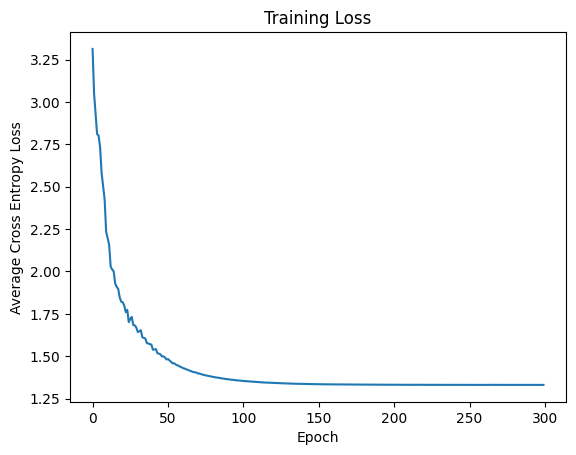

Test Accuracy: 0.412297824874512 with params {'HIDDEN_SIZE': 16, 'learning_rate': 0.1}


  0%|          | 1/300 [00:00<01:21,  3.67it/s]

Epoch 1/300, Loss: 3.3795


  1%|          | 2/300 [00:00<01:18,  3.80it/s]

Epoch 2/300, Loss: 3.0773


  1%|          | 3/300 [00:00<01:18,  3.80it/s]

Epoch 3/300, Loss: 2.9544


  1%|▏         | 4/300 [00:01<01:18,  3.79it/s]

Epoch 4/300, Loss: 2.8481


  2%|▏         | 5/300 [00:01<01:18,  3.77it/s]

Epoch 5/300, Loss: 2.7416


  2%|▏         | 6/300 [00:01<01:17,  3.80it/s]

Epoch 6/300, Loss: 2.6287


  2%|▏         | 7/300 [00:01<01:16,  3.81it/s]

Epoch 7/300, Loss: 2.5181


  3%|▎         | 8/300 [00:02<01:16,  3.80it/s]

Epoch 8/300, Loss: 2.4132


  3%|▎         | 9/300 [00:02<01:16,  3.80it/s]

Epoch 9/300, Loss: 2.3147


  3%|▎         | 10/300 [00:02<01:15,  3.85it/s]

Epoch 10/300, Loss: 2.2224


  4%|▎         | 11/300 [00:02<01:15,  3.82it/s]

Epoch 11/300, Loss: 2.1395


  4%|▍         | 12/300 [00:03<01:16,  3.74it/s]

Epoch 12/300, Loss: 2.0647


  4%|▍         | 13/300 [00:03<01:16,  3.74it/s]

Epoch 13/300, Loss: 1.9974


  5%|▍         | 14/300 [00:03<01:16,  3.74it/s]

Epoch 14/300, Loss: 1.9378


  5%|▌         | 15/300 [00:03<01:17,  3.66it/s]

Epoch 15/300, Loss: 1.8839


  5%|▌         | 16/300 [00:04<01:17,  3.66it/s]

Epoch 16/300, Loss: 1.8330


  6%|▌         | 17/300 [00:04<01:16,  3.71it/s]

Epoch 17/300, Loss: 1.7866


  6%|▌         | 18/300 [00:04<01:16,  3.69it/s]

Epoch 18/300, Loss: 1.7449


  6%|▋         | 19/300 [00:05<01:15,  3.71it/s]

Epoch 19/300, Loss: 1.7056


  7%|▋         | 20/300 [00:05<01:20,  3.48it/s]

Epoch 20/300, Loss: 1.6704


  7%|▋         | 21/300 [00:05<01:25,  3.26it/s]

Epoch 21/300, Loss: 1.6366


  7%|▋         | 22/300 [00:06<01:28,  3.14it/s]

Epoch 22/300, Loss: 1.6055


  8%|▊         | 23/300 [00:06<01:31,  3.03it/s]

Epoch 23/300, Loss: 1.5765


  8%|▊         | 24/300 [00:06<01:35,  2.90it/s]

Epoch 24/300, Loss: 1.5509


  8%|▊         | 25/300 [00:07<01:41,  2.72it/s]

Epoch 25/300, Loss: 1.5253


  9%|▊         | 26/300 [00:07<01:42,  2.68it/s]

Epoch 26/300, Loss: 1.5028


  9%|▉         | 27/300 [00:08<01:44,  2.62it/s]

Epoch 27/300, Loss: 1.4799


  9%|▉         | 28/300 [00:08<01:35,  2.85it/s]

Epoch 28/300, Loss: 1.4594


 10%|▉         | 29/300 [00:08<01:27,  3.10it/s]

Epoch 29/300, Loss: 1.4413


 10%|█         | 30/300 [00:08<01:21,  3.30it/s]

Epoch 30/300, Loss: 1.4234


 10%|█         | 31/300 [00:09<01:17,  3.47it/s]

Epoch 31/300, Loss: 1.4060


 11%|█         | 32/300 [00:09<01:15,  3.53it/s]

Epoch 32/300, Loss: 1.3896


 11%|█         | 33/300 [00:09<01:13,  3.65it/s]

Epoch 33/300, Loss: 1.3740


 11%|█▏        | 34/300 [00:09<01:12,  3.69it/s]

Epoch 34/300, Loss: 1.3600


 12%|█▏        | 35/300 [00:10<01:11,  3.72it/s]

Epoch 35/300, Loss: 1.3459


 12%|█▏        | 36/300 [00:10<01:10,  3.72it/s]

Epoch 36/300, Loss: 1.3335


 12%|█▏        | 37/300 [00:10<01:10,  3.71it/s]

Epoch 37/300, Loss: 1.3197


 13%|█▎        | 38/300 [00:10<01:09,  3.75it/s]

Epoch 38/300, Loss: 1.3095


 13%|█▎        | 39/300 [00:11<01:09,  3.76it/s]

Epoch 39/300, Loss: 1.2980


 13%|█▎        | 40/300 [00:11<01:09,  3.75it/s]

Epoch 40/300, Loss: 1.2863


 14%|█▎        | 41/300 [00:11<01:08,  3.79it/s]

Epoch 41/300, Loss: 1.2760


 14%|█▍        | 42/300 [00:11<01:07,  3.81it/s]

Epoch 42/300, Loss: 1.2669


 14%|█▍        | 43/300 [00:12<01:07,  3.84it/s]

Epoch 43/300, Loss: 1.2575


 15%|█▍        | 44/300 [00:12<01:06,  3.84it/s]

Epoch 44/300, Loss: 1.2476


 15%|█▌        | 45/300 [00:12<01:06,  3.85it/s]

Epoch 45/300, Loss: 1.2393


 15%|█▌        | 46/300 [00:13<01:07,  3.75it/s]

Epoch 46/300, Loss: 1.2307


 16%|█▌        | 47/300 [00:13<01:07,  3.74it/s]

Epoch 47/300, Loss: 1.2240


 16%|█▌        | 48/300 [00:13<01:07,  3.72it/s]

Epoch 48/300, Loss: 1.2170


 16%|█▋        | 49/300 [00:13<01:07,  3.72it/s]

Epoch 49/300, Loss: 1.2088


 17%|█▋        | 50/300 [00:14<01:06,  3.75it/s]

Epoch 50/300, Loss: 1.2026


 17%|█▋        | 51/300 [00:14<01:06,  3.74it/s]

Epoch 51/300, Loss: 1.1962


 17%|█▋        | 52/300 [00:14<01:05,  3.79it/s]

Epoch 52/300, Loss: 1.1893


 18%|█▊        | 53/300 [00:14<01:05,  3.80it/s]

Epoch 53/300, Loss: 1.1837


 18%|█▊        | 54/300 [00:15<01:04,  3.82it/s]

Epoch 54/300, Loss: 1.1782


 18%|█▊        | 55/300 [00:15<01:05,  3.77it/s]

Epoch 55/300, Loss: 1.1726


 19%|█▊        | 56/300 [00:15<01:03,  3.84it/s]

Epoch 56/300, Loss: 1.1673


 19%|█▉        | 57/300 [00:15<01:03,  3.86it/s]

Epoch 57/300, Loss: 1.1623


 19%|█▉        | 58/300 [00:16<01:02,  3.87it/s]

Epoch 58/300, Loss: 1.1579


 20%|█▉        | 59/300 [00:16<01:02,  3.86it/s]

Epoch 59/300, Loss: 1.1534


 20%|██        | 60/300 [00:16<01:01,  3.89it/s]

Epoch 60/300, Loss: 1.1491


 20%|██        | 61/300 [00:16<01:01,  3.88it/s]

Epoch 61/300, Loss: 1.1448


 21%|██        | 62/300 [00:17<01:01,  3.85it/s]

Epoch 62/300, Loss: 1.1405


 21%|██        | 63/300 [00:17<01:01,  3.83it/s]

Epoch 63/300, Loss: 1.1368


 21%|██▏       | 64/300 [00:17<01:01,  3.87it/s]

Epoch 64/300, Loss: 1.1332


 22%|██▏       | 65/300 [00:18<01:00,  3.86it/s]

Epoch 65/300, Loss: 1.1297


 22%|██▏       | 66/300 [00:18<01:07,  3.46it/s]

Epoch 66/300, Loss: 1.1267


 22%|██▏       | 67/300 [00:18<01:11,  3.26it/s]

Epoch 67/300, Loss: 1.1232


 23%|██▎       | 68/300 [00:19<01:13,  3.14it/s]

Epoch 68/300, Loss: 1.1204


 23%|██▎       | 69/300 [00:19<01:15,  3.08it/s]

Epoch 69/300, Loss: 1.1172


 23%|██▎       | 70/300 [00:19<01:19,  2.91it/s]

Epoch 70/300, Loss: 1.1141


 24%|██▎       | 71/300 [00:20<01:23,  2.75it/s]

Epoch 71/300, Loss: 1.1116


 24%|██▍       | 72/300 [00:20<01:24,  2.69it/s]

Epoch 72/300, Loss: 1.1090


 24%|██▍       | 73/300 [00:20<01:26,  2.63it/s]

Epoch 73/300, Loss: 1.1062


 25%|██▍       | 74/300 [00:21<01:17,  2.91it/s]

Epoch 74/300, Loss: 1.1038


 25%|██▌       | 75/300 [00:21<01:11,  3.14it/s]

Epoch 75/300, Loss: 1.1013


 25%|██▌       | 76/300 [00:21<01:07,  3.33it/s]

Epoch 76/300, Loss: 1.0990


 26%|██▌       | 77/300 [00:22<01:04,  3.46it/s]

Epoch 77/300, Loss: 1.0968


 26%|██▌       | 78/300 [00:22<01:01,  3.59it/s]

Epoch 78/300, Loss: 1.0946


 26%|██▋       | 79/300 [00:22<00:59,  3.69it/s]

Epoch 79/300, Loss: 1.0931


 27%|██▋       | 80/300 [00:22<00:59,  3.73it/s]

Epoch 80/300, Loss: 1.0910


 27%|██▋       | 81/300 [00:23<00:57,  3.79it/s]

Epoch 81/300, Loss: 1.0889


 27%|██▋       | 82/300 [00:23<00:57,  3.82it/s]

Epoch 82/300, Loss: 1.0870


 28%|██▊       | 83/300 [00:23<00:56,  3.87it/s]

Epoch 83/300, Loss: 1.0852


 28%|██▊       | 84/300 [00:23<00:56,  3.79it/s]

Epoch 84/300, Loss: 1.0840


 28%|██▊       | 85/300 [00:24<00:56,  3.81it/s]

Epoch 85/300, Loss: 1.0823


 29%|██▊       | 86/300 [00:24<00:56,  3.82it/s]

Epoch 86/300, Loss: 1.0806


 29%|██▉       | 87/300 [00:24<00:55,  3.84it/s]

Epoch 87/300, Loss: 1.0791


 29%|██▉       | 88/300 [00:24<00:55,  3.85it/s]

Epoch 88/300, Loss: 1.0779


 30%|██▉       | 89/300 [00:25<00:54,  3.85it/s]

Epoch 89/300, Loss: 1.0761


 30%|███       | 90/300 [00:25<00:54,  3.83it/s]

Epoch 90/300, Loss: 1.0750


 30%|███       | 91/300 [00:25<00:53,  3.87it/s]

Epoch 91/300, Loss: 1.0736


 31%|███       | 92/300 [00:25<00:54,  3.79it/s]

Epoch 92/300, Loss: 1.0721


 31%|███       | 93/300 [00:26<00:54,  3.78it/s]

Epoch 93/300, Loss: 1.0717


 31%|███▏      | 94/300 [00:26<00:54,  3.77it/s]

Epoch 94/300, Loss: 1.0701


 32%|███▏      | 95/300 [00:26<00:55,  3.69it/s]

Epoch 95/300, Loss: 1.0690


 32%|███▏      | 96/300 [00:27<00:55,  3.71it/s]

Epoch 96/300, Loss: 1.0680


 32%|███▏      | 97/300 [00:27<00:54,  3.74it/s]

Epoch 97/300, Loss: 1.0668


 33%|███▎      | 98/300 [00:27<00:53,  3.76it/s]

Epoch 98/300, Loss: 1.0659


 33%|███▎      | 99/300 [00:27<00:52,  3.80it/s]

Epoch 99/300, Loss: 1.0650


 33%|███▎      | 100/300 [00:28<00:53,  3.75it/s]

Epoch 100/300, Loss: 1.0640


 34%|███▎      | 101/300 [00:28<00:52,  3.78it/s]

Epoch 101/300, Loss: 1.0632


 34%|███▍      | 102/300 [00:28<00:51,  3.83it/s]

Epoch 102/300, Loss: 1.0620


 34%|███▍      | 103/300 [00:28<00:51,  3.80it/s]

Epoch 103/300, Loss: 1.0614


 35%|███▍      | 104/300 [00:29<00:52,  3.75it/s]

Epoch 104/300, Loss: 1.0607


 35%|███▌      | 105/300 [00:29<00:51,  3.78it/s]

Epoch 105/300, Loss: 1.0600


 35%|███▌      | 106/300 [00:29<00:50,  3.85it/s]

Epoch 106/300, Loss: 1.0590


 36%|███▌      | 107/300 [00:29<00:50,  3.81it/s]

Epoch 107/300, Loss: 1.0584


 36%|███▌      | 108/300 [00:30<00:50,  3.83it/s]

Epoch 108/300, Loss: 1.0574


 36%|███▋      | 109/300 [00:30<00:50,  3.82it/s]

Epoch 109/300, Loss: 1.0571


 37%|███▋      | 110/300 [00:30<00:49,  3.87it/s]

Epoch 110/300, Loss: 1.0564


 37%|███▋      | 111/300 [00:30<00:49,  3.81it/s]

Epoch 111/300, Loss: 1.0557


 37%|███▋      | 112/300 [00:31<00:55,  3.39it/s]

Epoch 112/300, Loss: 1.0549


 38%|███▊      | 113/300 [00:31<00:58,  3.21it/s]

Epoch 113/300, Loss: 1.0547


 38%|███▊      | 114/300 [00:32<01:00,  3.10it/s]

Epoch 114/300, Loss: 1.0540


 38%|███▊      | 115/300 [00:32<01:01,  2.99it/s]

Epoch 115/300, Loss: 1.0535


 39%|███▊      | 116/300 [00:32<01:04,  2.86it/s]

Epoch 116/300, Loss: 1.0527


 39%|███▉      | 117/300 [00:33<01:07,  2.70it/s]

Epoch 117/300, Loss: 1.0524


 39%|███▉      | 118/300 [00:33<01:09,  2.62it/s]

Epoch 118/300, Loss: 1.0522


 40%|███▉      | 119/300 [00:33<01:06,  2.71it/s]

Epoch 119/300, Loss: 1.0513


 40%|████      | 120/300 [00:34<01:01,  2.91it/s]

Epoch 120/300, Loss: 1.0512


 40%|████      | 121/300 [00:34<00:56,  3.15it/s]

Epoch 121/300, Loss: 1.0506


 41%|████      | 122/300 [00:34<00:52,  3.36it/s]

Epoch 122/300, Loss: 1.0501


 41%|████      | 123/300 [00:34<00:50,  3.47it/s]

Epoch 123/300, Loss: 1.0498


 41%|████▏     | 124/300 [00:35<00:49,  3.54it/s]

Epoch 124/300, Loss: 1.0494


 42%|████▏     | 125/300 [00:35<00:48,  3.63it/s]

Epoch 125/300, Loss: 1.0491


 42%|████▏     | 126/300 [00:35<00:47,  3.65it/s]

Epoch 126/300, Loss: 1.0485


 42%|████▏     | 127/300 [00:36<00:47,  3.63it/s]

Epoch 127/300, Loss: 1.0483


 43%|████▎     | 128/300 [00:36<00:47,  3.61it/s]

Epoch 128/300, Loss: 1.0481


 43%|████▎     | 129/300 [00:36<00:46,  3.68it/s]

Epoch 129/300, Loss: 1.0476


 43%|████▎     | 130/300 [00:36<00:45,  3.73it/s]

Epoch 130/300, Loss: 1.0475


 44%|████▎     | 131/300 [00:37<00:45,  3.71it/s]

Epoch 131/300, Loss: 1.0471


 44%|████▍     | 132/300 [00:37<00:44,  3.79it/s]

Epoch 132/300, Loss: 1.0465


 44%|████▍     | 133/300 [00:37<00:43,  3.83it/s]

Epoch 133/300, Loss: 1.0462


 45%|████▍     | 134/300 [00:37<00:42,  3.86it/s]

Epoch 134/300, Loss: 1.0461


 45%|████▌     | 135/300 [00:38<00:42,  3.84it/s]

Epoch 135/300, Loss: 1.0460


 45%|████▌     | 136/300 [00:38<00:42,  3.89it/s]

Epoch 136/300, Loss: 1.0458


 46%|████▌     | 137/300 [00:38<00:41,  3.91it/s]

Epoch 137/300, Loss: 1.0452


 46%|████▌     | 138/300 [00:38<00:41,  3.89it/s]

Epoch 138/300, Loss: 1.0455


 46%|████▋     | 139/300 [00:39<00:42,  3.79it/s]

Epoch 139/300, Loss: 1.0450


 47%|████▋     | 140/300 [00:39<00:41,  3.83it/s]

Epoch 140/300, Loss: 1.0447


 47%|████▋     | 141/300 [00:39<00:41,  3.86it/s]

Epoch 141/300, Loss: 1.0446


 47%|████▋     | 142/300 [00:39<00:40,  3.86it/s]

Epoch 142/300, Loss: 1.0442


 48%|████▊     | 143/300 [00:40<00:41,  3.79it/s]

Epoch 143/300, Loss: 1.0438


 48%|████▊     | 144/300 [00:40<00:40,  3.82it/s]

Epoch 144/300, Loss: 1.0438


 48%|████▊     | 145/300 [00:40<00:40,  3.85it/s]

Epoch 145/300, Loss: 1.0436


 49%|████▊     | 146/300 [00:41<00:40,  3.84it/s]

Epoch 146/300, Loss: 1.0434


 49%|████▉     | 147/300 [00:41<00:40,  3.81it/s]

Epoch 147/300, Loss: 1.0434


 49%|████▉     | 148/300 [00:41<00:39,  3.82it/s]

Epoch 148/300, Loss: 1.0431


 50%|████▉     | 149/300 [00:41<00:39,  3.83it/s]

Epoch 149/300, Loss: 1.0432


 50%|█████     | 150/300 [00:42<00:39,  3.85it/s]

Epoch 150/300, Loss: 1.0431


 50%|█████     | 151/300 [00:42<00:39,  3.80it/s]

Epoch 151/300, Loss: 1.0429


 51%|█████     | 152/300 [00:42<00:38,  3.82it/s]

Epoch 152/300, Loss: 1.0428


 51%|█████     | 153/300 [00:42<00:38,  3.81it/s]

Epoch 153/300, Loss: 1.0424


 51%|█████▏    | 154/300 [00:43<00:38,  3.81it/s]

Epoch 154/300, Loss: 1.0422


 52%|█████▏    | 155/300 [00:43<00:38,  3.78it/s]

Epoch 155/300, Loss: 1.0420


 52%|█████▏    | 156/300 [00:43<00:37,  3.80it/s]

Epoch 156/300, Loss: 1.0419


 52%|█████▏    | 157/300 [00:43<00:39,  3.58it/s]

Epoch 157/300, Loss: 1.0418


 53%|█████▎    | 158/300 [00:44<00:44,  3.22it/s]

Epoch 158/300, Loss: 1.0420


 53%|█████▎    | 159/300 [00:44<00:45,  3.11it/s]

Epoch 159/300, Loss: 1.0418


 53%|█████▎    | 160/300 [00:45<00:45,  3.08it/s]

Epoch 160/300, Loss: 1.0418


 54%|█████▎    | 161/300 [00:45<00:48,  2.87it/s]

Epoch 161/300, Loss: 1.0415


 54%|█████▍    | 162/300 [00:45<00:50,  2.72it/s]

Epoch 162/300, Loss: 1.0412


 54%|█████▍    | 163/300 [00:46<00:52,  2.63it/s]

Epoch 163/300, Loss: 1.0413


 55%|█████▍    | 164/300 [00:46<00:53,  2.53it/s]

Epoch 164/300, Loss: 1.0411


 55%|█████▌    | 165/300 [00:46<00:48,  2.77it/s]

Epoch 165/300, Loss: 1.0413


 55%|█████▌    | 166/300 [00:47<00:44,  3.00it/s]

Epoch 166/300, Loss: 1.0410


 56%|█████▌    | 167/300 [00:47<00:41,  3.17it/s]

Epoch 167/300, Loss: 1.0410


 56%|█████▌    | 168/300 [00:47<00:39,  3.36it/s]

Epoch 168/300, Loss: 1.0408


 56%|█████▋    | 169/300 [00:48<00:37,  3.48it/s]

Epoch 169/300, Loss: 1.0405


 57%|█████▋    | 170/300 [00:48<00:35,  3.61it/s]

Epoch 170/300, Loss: 1.0409


 57%|█████▋    | 171/300 [00:48<00:35,  3.64it/s]

Epoch 171/300, Loss: 1.0405


 57%|█████▋    | 172/300 [00:48<00:34,  3.69it/s]

Epoch 172/300, Loss: 1.0405


 58%|█████▊    | 173/300 [00:49<00:33,  3.74it/s]

Epoch 173/300, Loss: 1.0404


 58%|█████▊    | 174/300 [00:49<00:32,  3.82it/s]

Epoch 174/300, Loss: 1.0406


 58%|█████▊    | 175/300 [00:49<00:32,  3.79it/s]

Epoch 175/300, Loss: 1.0400


 59%|█████▊    | 176/300 [00:49<00:32,  3.84it/s]

Epoch 176/300, Loss: 1.0401


 59%|█████▉    | 177/300 [00:50<00:32,  3.82it/s]

Epoch 177/300, Loss: 1.0402


 59%|█████▉    | 178/300 [00:50<00:31,  3.82it/s]

Epoch 178/300, Loss: 1.0399


 60%|█████▉    | 179/300 [00:50<00:32,  3.78it/s]

Epoch 179/300, Loss: 1.0398


 60%|██████    | 180/300 [00:50<00:31,  3.78it/s]

Epoch 180/300, Loss: 1.0399


 60%|██████    | 181/300 [00:51<00:31,  3.78it/s]

Epoch 181/300, Loss: 1.0398


 61%|██████    | 182/300 [00:51<00:31,  3.80it/s]

Epoch 182/300, Loss: 1.0399


 61%|██████    | 183/300 [00:51<00:31,  3.74it/s]

Epoch 183/300, Loss: 1.0399


 61%|██████▏   | 184/300 [00:51<00:30,  3.77it/s]

Epoch 184/300, Loss: 1.0396


 62%|██████▏   | 185/300 [00:52<00:30,  3.78it/s]

Epoch 185/300, Loss: 1.0394


 62%|██████▏   | 186/300 [00:52<00:29,  3.80it/s]

Epoch 186/300, Loss: 1.0398


 62%|██████▏   | 187/300 [00:52<00:29,  3.78it/s]

Epoch 187/300, Loss: 1.0398


 63%|██████▎   | 188/300 [00:53<00:29,  3.78it/s]

Epoch 188/300, Loss: 1.0399


 63%|██████▎   | 189/300 [00:53<00:29,  3.82it/s]

Epoch 189/300, Loss: 1.0398


 63%|██████▎   | 190/300 [00:53<00:28,  3.83it/s]

Epoch 190/300, Loss: 1.0396


 64%|██████▎   | 191/300 [00:53<00:28,  3.78it/s]

Epoch 191/300, Loss: 1.0394


 64%|██████▍   | 192/300 [00:54<00:28,  3.76it/s]

Epoch 192/300, Loss: 1.0394


 64%|██████▍   | 193/300 [00:54<00:28,  3.80it/s]

Epoch 193/300, Loss: 1.0395


 65%|██████▍   | 194/300 [00:54<00:28,  3.75it/s]

Epoch 194/300, Loss: 1.0395


 65%|██████▌   | 195/300 [00:54<00:27,  3.79it/s]

Epoch 195/300, Loss: 1.0394


 65%|██████▌   | 196/300 [00:55<00:27,  3.73it/s]

Epoch 196/300, Loss: 1.0393


 66%|██████▌   | 197/300 [00:55<00:27,  3.78it/s]

Epoch 197/300, Loss: 1.0395


 66%|██████▌   | 198/300 [00:55<00:27,  3.78it/s]

Epoch 198/300, Loss: 1.0392


 66%|██████▋   | 199/300 [00:55<00:26,  3.79it/s]

Epoch 199/300, Loss: 1.0396


 67%|██████▋   | 200/300 [00:56<00:26,  3.79it/s]

Epoch 200/300, Loss: 1.0391


 67%|██████▋   | 201/300 [00:56<00:25,  3.82it/s]

Epoch 201/300, Loss: 1.0392


 67%|██████▋   | 202/300 [00:56<00:26,  3.67it/s]

Epoch 202/300, Loss: 1.0389


 68%|██████▊   | 203/300 [00:57<00:29,  3.23it/s]

Epoch 203/300, Loss: 1.0392


 68%|██████▊   | 204/300 [00:57<00:30,  3.12it/s]

Epoch 204/300, Loss: 1.0391


 68%|██████▊   | 205/300 [00:57<00:31,  3.01it/s]

Epoch 205/300, Loss: 1.0391


 69%|██████▊   | 206/300 [00:58<00:31,  2.95it/s]

Epoch 206/300, Loss: 1.0389


 69%|██████▉   | 207/300 [00:58<00:32,  2.87it/s]

Epoch 207/300, Loss: 1.0390


 69%|██████▉   | 208/300 [00:58<00:33,  2.71it/s]

Epoch 208/300, Loss: 1.0388


 70%|██████▉   | 209/300 [00:59<00:35,  2.60it/s]

Epoch 209/300, Loss: 1.0392


 70%|███████   | 210/300 [00:59<00:32,  2.74it/s]

Epoch 210/300, Loss: 1.0390


 70%|███████   | 211/300 [00:59<00:29,  2.97it/s]

Epoch 211/300, Loss: 1.0389


 71%|███████   | 212/300 [01:00<00:27,  3.19it/s]

Epoch 212/300, Loss: 1.0388


 71%|███████   | 213/300 [01:00<00:25,  3.37it/s]

Epoch 213/300, Loss: 1.0389


 71%|███████▏  | 214/300 [01:00<00:24,  3.50it/s]

Epoch 214/300, Loss: 1.0387


 72%|███████▏  | 215/300 [01:01<00:23,  3.56it/s]

Epoch 215/300, Loss: 1.0390


 72%|███████▏  | 216/300 [01:01<00:23,  3.62it/s]

Epoch 216/300, Loss: 1.0388


 72%|███████▏  | 217/300 [01:01<00:22,  3.72it/s]

Epoch 217/300, Loss: 1.0388


 73%|███████▎  | 218/300 [01:01<00:21,  3.74it/s]

Epoch 218/300, Loss: 1.0389


 73%|███████▎  | 219/300 [01:02<00:21,  3.69it/s]

Epoch 219/300, Loss: 1.0387


 73%|███████▎  | 220/300 [01:02<00:21,  3.74it/s]

Epoch 220/300, Loss: 1.0388


 74%|███████▎  | 221/300 [01:02<00:20,  3.80it/s]

Epoch 221/300, Loss: 1.0389


 74%|███████▍  | 222/300 [01:02<00:20,  3.77it/s]

Epoch 222/300, Loss: 1.0386


 74%|███████▍  | 223/300 [01:03<00:20,  3.77it/s]

Epoch 223/300, Loss: 1.0387


 75%|███████▍  | 224/300 [01:03<00:19,  3.80it/s]

Epoch 224/300, Loss: 1.0386


 75%|███████▌  | 225/300 [01:03<00:19,  3.84it/s]

Epoch 225/300, Loss: 1.0386


 75%|███████▌  | 226/300 [01:03<00:19,  3.80it/s]

Epoch 226/300, Loss: 1.0389


 76%|███████▌  | 227/300 [01:04<00:19,  3.80it/s]

Epoch 227/300, Loss: 1.0388


 76%|███████▌  | 228/300 [01:04<00:19,  3.75it/s]

Epoch 228/300, Loss: 1.0385


 76%|███████▋  | 229/300 [01:04<00:18,  3.78it/s]

Epoch 229/300, Loss: 1.0387


 77%|███████▋  | 230/300 [01:04<00:18,  3.78it/s]

Epoch 230/300, Loss: 1.0387


 77%|███████▋  | 231/300 [01:05<00:18,  3.79it/s]

Epoch 231/300, Loss: 1.0387


 77%|███████▋  | 232/300 [01:05<00:17,  3.85it/s]

Epoch 232/300, Loss: 1.0386


 78%|███████▊  | 233/300 [01:05<00:17,  3.82it/s]

Epoch 233/300, Loss: 1.0387


 78%|███████▊  | 234/300 [01:06<00:17,  3.78it/s]

Epoch 234/300, Loss: 1.0390


 78%|███████▊  | 235/300 [01:06<00:17,  3.79it/s]

Epoch 235/300, Loss: 1.0387


 79%|███████▊  | 236/300 [01:06<00:16,  3.81it/s]

Epoch 236/300, Loss: 1.0387


 79%|███████▉  | 237/300 [01:06<00:16,  3.81it/s]

Epoch 237/300, Loss: 1.0386


 79%|███████▉  | 238/300 [01:07<00:16,  3.80it/s]

Epoch 238/300, Loss: 1.0385


 80%|███████▉  | 239/300 [01:07<00:16,  3.80it/s]

Epoch 239/300, Loss: 1.0387


 80%|████████  | 240/300 [01:07<00:15,  3.84it/s]

Epoch 240/300, Loss: 1.0384


 80%|████████  | 241/300 [01:07<00:15,  3.84it/s]

Epoch 241/300, Loss: 1.0386


 81%|████████  | 242/300 [01:08<00:15,  3.83it/s]

Epoch 242/300, Loss: 1.0388


 81%|████████  | 243/300 [01:08<00:14,  3.82it/s]

Epoch 243/300, Loss: 1.0385


 81%|████████▏ | 244/300 [01:08<00:14,  3.84it/s]

Epoch 244/300, Loss: 1.0387


 82%|████████▏ | 245/300 [01:08<00:14,  3.85it/s]

Epoch 245/300, Loss: 1.0387


 82%|████████▏ | 246/300 [01:09<00:14,  3.80it/s]

Epoch 246/300, Loss: 1.0385


 82%|████████▏ | 247/300 [01:09<00:13,  3.83it/s]

Epoch 247/300, Loss: 1.0385


 83%|████████▎ | 248/300 [01:09<00:14,  3.56it/s]

Epoch 248/300, Loss: 1.0385


 83%|████████▎ | 249/300 [01:10<00:15,  3.28it/s]

Epoch 249/300, Loss: 1.0386


 83%|████████▎ | 250/300 [01:10<00:15,  3.20it/s]

Epoch 250/300, Loss: 1.0386


 84%|████████▎ | 251/300 [01:10<00:15,  3.14it/s]

Epoch 251/300, Loss: 1.0386


 84%|████████▍ | 252/300 [01:11<00:16,  2.98it/s]

Epoch 252/300, Loss: 1.0390


 84%|████████▍ | 253/300 [01:11<00:16,  2.85it/s]

Epoch 253/300, Loss: 1.0385


 85%|████████▍ | 254/300 [01:11<00:17,  2.71it/s]

Epoch 254/300, Loss: 1.0386


 85%|████████▌ | 255/300 [01:12<00:16,  2.65it/s]

Epoch 255/300, Loss: 1.0384


 85%|████████▌ | 256/300 [01:12<00:15,  2.85it/s]

Epoch 256/300, Loss: 1.0385


 86%|████████▌ | 257/300 [01:12<00:14,  3.07it/s]

Epoch 257/300, Loss: 1.0385


 86%|████████▌ | 258/300 [01:13<00:12,  3.25it/s]

Epoch 258/300, Loss: 1.0386


 86%|████████▋ | 259/300 [01:13<00:12,  3.34it/s]

Epoch 259/300, Loss: 1.0385


 87%|████████▋ | 260/300 [01:13<00:11,  3.46it/s]

Epoch 260/300, Loss: 1.0385


 87%|████████▋ | 261/300 [01:13<00:10,  3.57it/s]

Epoch 261/300, Loss: 1.0384


 87%|████████▋ | 262/300 [01:14<00:10,  3.62it/s]

Epoch 262/300, Loss: 1.0387


 88%|████████▊ | 263/300 [01:14<00:09,  3.73it/s]

Epoch 263/300, Loss: 1.0386


 88%|████████▊ | 264/300 [01:14<00:09,  3.79it/s]

Epoch 264/300, Loss: 1.0383


 88%|████████▊ | 265/300 [01:15<00:09,  3.79it/s]

Epoch 265/300, Loss: 1.0388


 89%|████████▊ | 266/300 [01:15<00:08,  3.78it/s]

Epoch 266/300, Loss: 1.0386


 89%|████████▉ | 267/300 [01:15<00:08,  3.82it/s]

Epoch 267/300, Loss: 1.0385


 89%|████████▉ | 268/300 [01:15<00:08,  3.82it/s]

Epoch 268/300, Loss: 1.0386


 90%|████████▉ | 269/300 [01:16<00:08,  3.83it/s]

Epoch 269/300, Loss: 1.0385


 90%|█████████ | 270/300 [01:16<00:07,  3.81it/s]

Epoch 270/300, Loss: 1.0386


 90%|█████████ | 271/300 [01:16<00:07,  3.87it/s]

Epoch 271/300, Loss: 1.0386


 91%|█████████ | 272/300 [01:16<00:07,  3.85it/s]

Epoch 272/300, Loss: 1.0386


 91%|█████████ | 273/300 [01:17<00:07,  3.84it/s]

Epoch 273/300, Loss: 1.0386


 91%|█████████▏| 274/300 [01:17<00:06,  3.80it/s]

Epoch 274/300, Loss: 1.0385


 92%|█████████▏| 275/300 [01:17<00:06,  3.85it/s]

Epoch 275/300, Loss: 1.0384


 92%|█████████▏| 276/300 [01:17<00:06,  3.86it/s]

Epoch 276/300, Loss: 1.0382


 92%|█████████▏| 277/300 [01:18<00:05,  3.85it/s]

Epoch 277/300, Loss: 1.0385


 93%|█████████▎| 278/300 [01:18<00:05,  3.82it/s]

Epoch 278/300, Loss: 1.0387


 93%|█████████▎| 279/300 [01:18<00:05,  3.88it/s]

Epoch 279/300, Loss: 1.0385


 93%|█████████▎| 280/300 [01:18<00:05,  3.84it/s]

Epoch 280/300, Loss: 1.0385


 94%|█████████▎| 281/300 [01:19<00:04,  3.82it/s]

Epoch 281/300, Loss: 1.0386


 94%|█████████▍| 282/300 [01:19<00:04,  3.83it/s]

Epoch 282/300, Loss: 1.0385


 94%|█████████▍| 283/300 [01:19<00:04,  3.89it/s]

Epoch 283/300, Loss: 1.0386


 95%|█████████▍| 284/300 [01:19<00:04,  3.91it/s]

Epoch 284/300, Loss: 1.0383


 95%|█████████▌| 285/300 [01:20<00:03,  3.87it/s]

Epoch 285/300, Loss: 1.0385


 95%|█████████▌| 286/300 [01:20<00:03,  3.82it/s]

Epoch 286/300, Loss: 1.0383


 96%|█████████▌| 287/300 [01:20<00:03,  3.85it/s]

Epoch 287/300, Loss: 1.0385


 96%|█████████▌| 288/300 [01:21<00:03,  3.82it/s]

Epoch 288/300, Loss: 1.0386


 96%|█████████▋| 289/300 [01:21<00:02,  3.82it/s]

Epoch 289/300, Loss: 1.0386


 97%|█████████▋| 290/300 [01:21<00:02,  3.82it/s]

Epoch 290/300, Loss: 1.0386


 97%|█████████▋| 291/300 [01:21<00:02,  3.86it/s]

Epoch 291/300, Loss: 1.0385


 97%|█████████▋| 292/300 [01:22<00:02,  3.87it/s]

Epoch 292/300, Loss: 1.0383


 98%|█████████▊| 293/300 [01:22<00:01,  3.87it/s]

Epoch 293/300, Loss: 1.0383


 98%|█████████▊| 294/300 [01:22<00:01,  3.57it/s]

Epoch 294/300, Loss: 1.0385


 98%|█████████▊| 295/300 [01:22<00:01,  3.29it/s]

Epoch 295/300, Loss: 1.0383


 99%|█████████▊| 296/300 [01:23<00:01,  3.17it/s]

Epoch 296/300, Loss: 1.0384


 99%|█████████▉| 297/300 [01:23<00:00,  3.07it/s]

Epoch 297/300, Loss: 1.0387


 99%|█████████▉| 298/300 [01:24<00:00,  2.98it/s]

Epoch 298/300, Loss: 1.0387


100%|█████████▉| 299/300 [01:24<00:00,  2.84it/s]

Epoch 299/300, Loss: 1.0384


100%|██████████| 300/300 [01:24<00:00,  3.54it/s]

Epoch 300/300, Loss: 1.0384


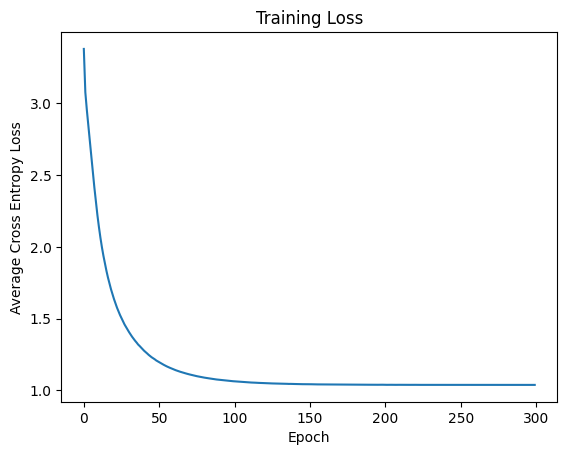

Test Accuracy: 0.5966257668711656 with params {'HIDDEN_SIZE': 32, 'learning_rate': 0.01}


  0%|          | 1/300 [00:00<01:37,  3.08it/s]

Epoch 1/300, Loss: 3.1788


  1%|          | 2/300 [00:00<01:27,  3.41it/s]

Epoch 2/300, Loss: 2.7585


  1%|          | 3/300 [00:00<01:23,  3.57it/s]

Epoch 3/300, Loss: 2.4772


  1%|▏         | 4/300 [00:01<01:19,  3.70it/s]

Epoch 4/300, Loss: 2.1922


  2%|▏         | 5/300 [00:01<01:18,  3.75it/s]

Epoch 5/300, Loss: 2.0157


  2%|▏         | 6/300 [00:01<01:19,  3.70it/s]

Epoch 6/300, Loss: 1.8880


  2%|▏         | 7/300 [00:01<01:19,  3.69it/s]

Epoch 7/300, Loss: 1.6845


  3%|▎         | 8/300 [00:02<01:19,  3.65it/s]

Epoch 8/300, Loss: 1.6036


  3%|▎         | 9/300 [00:02<01:21,  3.57it/s]

Epoch 9/300, Loss: 1.5433


  3%|▎         | 10/300 [00:02<01:22,  3.50it/s]

Epoch 10/300, Loss: 1.3500


  4%|▎         | 11/300 [00:03<01:21,  3.56it/s]

Epoch 11/300, Loss: 1.3357


  4%|▍         | 12/300 [00:03<01:18,  3.66it/s]

Epoch 12/300, Loss: 1.2623


  4%|▍         | 13/300 [00:03<01:18,  3.65it/s]

Epoch 13/300, Loss: 1.1555


  5%|▍         | 14/300 [00:03<01:17,  3.68it/s]

Epoch 14/300, Loss: 1.1554


  5%|▌         | 15/300 [00:04<01:16,  3.72it/s]

Epoch 15/300, Loss: 1.0966


  5%|▌         | 16/300 [00:04<01:15,  3.77it/s]

Epoch 16/300, Loss: 0.9955


  6%|▌         | 17/300 [00:04<01:16,  3.70it/s]

Epoch 17/300, Loss: 0.9874


  6%|▌         | 18/300 [00:04<01:15,  3.72it/s]

Epoch 18/300, Loss: 0.9586


  6%|▋         | 19/300 [00:05<01:14,  3.75it/s]

Epoch 19/300, Loss: 0.8540


  7%|▋         | 20/300 [00:05<01:14,  3.78it/s]

Epoch 20/300, Loss: 0.8589


  7%|▋         | 21/300 [00:05<01:15,  3.71it/s]

Epoch 21/300, Loss: 0.8883


  7%|▋         | 22/300 [00:06<01:15,  3.69it/s]

Epoch 22/300, Loss: 0.7932


  8%|▊         | 23/300 [00:06<01:14,  3.72it/s]

Epoch 23/300, Loss: 0.7590


  8%|▊         | 24/300 [00:06<01:13,  3.74it/s]

Epoch 24/300, Loss: 0.7447


  8%|▊         | 25/300 [00:06<01:13,  3.72it/s]

Epoch 25/300, Loss: 0.7056


  9%|▊         | 26/300 [00:07<01:13,  3.74it/s]

Epoch 26/300, Loss: 0.6727


  9%|▉         | 27/300 [00:07<01:12,  3.77it/s]

Epoch 27/300, Loss: 0.6748


  9%|▉         | 28/300 [00:07<01:12,  3.77it/s]

Epoch 28/300, Loss: 0.6309


 10%|▉         | 29/300 [00:07<01:13,  3.71it/s]

Epoch 29/300, Loss: 0.6377


 10%|█         | 30/300 [00:08<01:12,  3.73it/s]

Epoch 30/300, Loss: 0.6064


 10%|█         | 31/300 [00:08<01:11,  3.75it/s]

Epoch 31/300, Loss: 0.5834


 11%|█         | 32/300 [00:08<01:11,  3.74it/s]

Epoch 32/300, Loss: 0.5736


 11%|█         | 33/300 [00:08<01:12,  3.67it/s]

Epoch 33/300, Loss: 0.5509


 11%|█▏        | 34/300 [00:09<01:11,  3.70it/s]

Epoch 34/300, Loss: 0.5319


 12%|█▏        | 35/300 [00:09<01:12,  3.67it/s]

Epoch 35/300, Loss: 0.5165


 12%|█▏        | 36/300 [00:09<01:12,  3.65it/s]

Epoch 36/300, Loss: 0.5102


 12%|█▏        | 37/300 [00:10<01:11,  3.67it/s]

Epoch 37/300, Loss: 0.4946


 13%|█▎        | 38/300 [00:10<01:15,  3.48it/s]

Epoch 38/300, Loss: 0.4806


 13%|█▎        | 39/300 [00:10<01:21,  3.18it/s]

Epoch 39/300, Loss: 0.4730


 13%|█▎        | 40/300 [00:11<01:25,  3.02it/s]

Epoch 40/300, Loss: 0.4580


 14%|█▎        | 41/300 [00:11<01:26,  2.99it/s]

Epoch 41/300, Loss: 0.4487


 14%|█▍        | 42/300 [00:11<01:31,  2.82it/s]

Epoch 42/300, Loss: 0.4390


 14%|█▍        | 43/300 [00:12<01:34,  2.71it/s]

Epoch 43/300, Loss: 0.4284


 15%|█▍        | 44/300 [00:12<01:38,  2.60it/s]

Epoch 44/300, Loss: 0.4207


 15%|█▌        | 45/300 [00:13<01:40,  2.53it/s]

Epoch 45/300, Loss: 0.4113


 15%|█▌        | 46/300 [00:13<01:33,  2.73it/s]

Epoch 46/300, Loss: 0.4044


 16%|█▌        | 47/300 [00:13<01:25,  2.97it/s]

Epoch 47/300, Loss: 0.3946


 16%|█▌        | 48/300 [00:13<01:19,  3.16it/s]

Epoch 48/300, Loss: 0.3905


 16%|█▋        | 49/300 [00:14<01:16,  3.29it/s]

Epoch 49/300, Loss: 0.3819


 17%|█▋        | 50/300 [00:14<01:12,  3.44it/s]

Epoch 50/300, Loss: 0.3754


 17%|█▋        | 51/300 [00:14<01:11,  3.50it/s]

Epoch 51/300, Loss: 0.3696


 17%|█▋        | 52/300 [00:15<01:10,  3.50it/s]

Epoch 52/300, Loss: 0.3627


 18%|█▊        | 53/300 [00:15<01:08,  3.61it/s]

Epoch 53/300, Loss: 0.3570


 18%|█▊        | 54/300 [00:15<01:07,  3.67it/s]

Epoch 54/300, Loss: 0.3536


 18%|█▊        | 55/300 [00:15<01:06,  3.71it/s]

Epoch 55/300, Loss: 0.3476


 19%|█▊        | 56/300 [00:16<01:06,  3.69it/s]

Epoch 56/300, Loss: 0.3415


 19%|█▉        | 57/300 [00:16<01:04,  3.76it/s]

Epoch 57/300, Loss: 0.3376


 19%|█▉        | 58/300 [00:16<01:04,  3.77it/s]

Epoch 58/300, Loss: 0.3327


 20%|█▉        | 59/300 [00:16<01:03,  3.78it/s]

Epoch 59/300, Loss: 0.3284


 20%|██        | 60/300 [00:17<01:04,  3.74it/s]

Epoch 60/300, Loss: 0.3247


 20%|██        | 61/300 [00:17<01:03,  3.76it/s]

Epoch 61/300, Loss: 0.3203


 21%|██        | 62/300 [00:17<01:02,  3.78it/s]

Epoch 62/300, Loss: 0.3170


 21%|██        | 63/300 [00:17<01:02,  3.77it/s]

Epoch 63/300, Loss: 0.3138


 21%|██▏       | 64/300 [00:18<01:02,  3.75it/s]

Epoch 64/300, Loss: 0.3107


 22%|██▏       | 65/300 [00:18<01:02,  3.77it/s]

Epoch 65/300, Loss: 0.3068


 22%|██▏       | 66/300 [00:18<01:02,  3.77it/s]

Epoch 66/300, Loss: 0.3046


 22%|██▏       | 67/300 [00:19<01:01,  3.77it/s]

Epoch 67/300, Loss: 0.3010


 23%|██▎       | 68/300 [00:19<01:01,  3.75it/s]

Epoch 68/300, Loss: 0.2978


 23%|██▎       | 69/300 [00:19<01:01,  3.76it/s]

Epoch 69/300, Loss: 0.2957


 23%|██▎       | 70/300 [00:19<01:00,  3.81it/s]

Epoch 70/300, Loss: 0.2935


 24%|██▎       | 71/300 [00:20<00:59,  3.82it/s]

Epoch 71/300, Loss: 0.2902


 24%|██▍       | 72/300 [00:20<00:59,  3.81it/s]

Epoch 72/300, Loss: 0.2881


 24%|██▍       | 73/300 [00:20<00:59,  3.84it/s]

Epoch 73/300, Loss: 0.2858


 25%|██▍       | 74/300 [00:20<00:59,  3.79it/s]

Epoch 74/300, Loss: 0.2836


 25%|██▌       | 75/300 [00:21<00:59,  3.81it/s]

Epoch 75/300, Loss: 0.2820


 25%|██▌       | 76/300 [00:21<00:59,  3.78it/s]

Epoch 76/300, Loss: 0.2801


 26%|██▌       | 77/300 [00:21<00:58,  3.82it/s]

Epoch 77/300, Loss: 0.2777


 26%|██▌       | 78/300 [00:21<00:58,  3.80it/s]

Epoch 78/300, Loss: 0.2760


 26%|██▋       | 79/300 [00:22<00:58,  3.79it/s]

Epoch 79/300, Loss: 0.2742


 27%|██▋       | 80/300 [00:22<00:58,  3.77it/s]

Epoch 80/300, Loss: 0.2722


 27%|██▋       | 81/300 [00:22<00:58,  3.76it/s]

Epoch 81/300, Loss: 0.2710


 27%|██▋       | 82/300 [00:22<00:58,  3.72it/s]

Epoch 82/300, Loss: 0.2698


 28%|██▊       | 83/300 [00:23<00:58,  3.70it/s]

Epoch 83/300, Loss: 0.2678


 28%|██▊       | 84/300 [00:23<01:05,  3.28it/s]

Epoch 84/300, Loss: 0.2663


 28%|██▊       | 85/300 [00:23<01:09,  3.11it/s]

Epoch 85/300, Loss: 0.2652


 29%|██▊       | 86/300 [00:24<01:11,  2.99it/s]

Epoch 86/300, Loss: 0.2638


 29%|██▉       | 87/300 [00:24<01:12,  2.93it/s]

Epoch 87/300, Loss: 0.2630


 29%|██▉       | 88/300 [00:25<01:15,  2.82it/s]

Epoch 88/300, Loss: 0.2612


 30%|██▉       | 89/300 [00:25<01:18,  2.69it/s]

Epoch 89/300, Loss: 0.2599


 30%|███       | 90/300 [00:25<01:22,  2.56it/s]

Epoch 90/300, Loss: 0.2594


 30%|███       | 91/300 [00:26<01:16,  2.71it/s]

Epoch 91/300, Loss: 0.2581


 31%|███       | 92/300 [00:26<01:10,  2.94it/s]

Epoch 92/300, Loss: 0.2567


 31%|███       | 93/300 [00:26<01:05,  3.16it/s]

Epoch 93/300, Loss: 0.2560


 31%|███▏      | 94/300 [00:27<01:02,  3.31it/s]

Epoch 94/300, Loss: 0.2551


 32%|███▏      | 95/300 [00:27<00:59,  3.42it/s]

Epoch 95/300, Loss: 0.2540


 32%|███▏      | 96/300 [00:27<00:58,  3.48it/s]

Epoch 96/300, Loss: 0.2531


 32%|███▏      | 97/300 [00:27<00:57,  3.55it/s]

Epoch 97/300, Loss: 0.2522


 33%|███▎      | 98/300 [00:28<00:55,  3.62it/s]

Epoch 98/300, Loss: 0.2514


 33%|███▎      | 99/300 [00:28<00:54,  3.68it/s]

Epoch 99/300, Loss: 0.2506


 33%|███▎      | 100/300 [00:28<00:54,  3.64it/s]

Epoch 100/300, Loss: 0.2497


 34%|███▎      | 101/300 [00:28<00:54,  3.66it/s]

Epoch 101/300, Loss: 0.2490


 34%|███▍      | 102/300 [00:29<00:53,  3.69it/s]

Epoch 102/300, Loss: 0.2485


 34%|███▍      | 103/300 [00:29<00:53,  3.67it/s]

Epoch 103/300, Loss: 0.2478


 35%|███▍      | 104/300 [00:29<00:52,  3.73it/s]

Epoch 104/300, Loss: 0.2469


 35%|███▌      | 105/300 [00:30<00:54,  3.61it/s]

Epoch 105/300, Loss: 0.2465


 35%|███▌      | 106/300 [00:30<00:52,  3.66it/s]

Epoch 106/300, Loss: 0.2458


 36%|███▌      | 107/300 [00:30<00:52,  3.64it/s]

Epoch 107/300, Loss: 0.2450


 36%|███▌      | 108/300 [00:30<00:52,  3.64it/s]

Epoch 108/300, Loss: 0.2445


 36%|███▋      | 109/300 [00:31<00:52,  3.64it/s]

Epoch 109/300, Loss: 0.2440


 37%|███▋      | 110/300 [00:31<00:51,  3.72it/s]

Epoch 110/300, Loss: 0.2436


 37%|███▋      | 111/300 [00:31<00:50,  3.71it/s]

Epoch 111/300, Loss: 0.2431


 37%|███▋      | 112/300 [00:31<00:50,  3.74it/s]

Epoch 112/300, Loss: 0.2425


 38%|███▊      | 113/300 [00:32<00:50,  3.73it/s]

Epoch 113/300, Loss: 0.2420


 38%|███▊      | 114/300 [00:32<00:50,  3.65it/s]

Epoch 114/300, Loss: 0.2416


 38%|███▊      | 115/300 [00:32<00:50,  3.64it/s]

Epoch 115/300, Loss: 0.2410


 39%|███▊      | 116/300 [00:33<00:50,  3.65it/s]

Epoch 116/300, Loss: 0.2408


 39%|███▉      | 117/300 [00:33<00:49,  3.71it/s]

Epoch 117/300, Loss: 0.2402


 39%|███▉      | 118/300 [00:33<00:49,  3.70it/s]

Epoch 118/300, Loss: 0.2400


 40%|███▉      | 119/300 [00:33<00:48,  3.70it/s]

Epoch 119/300, Loss: 0.2397


 40%|████      | 120/300 [00:34<00:48,  3.73it/s]

Epoch 120/300, Loss: 0.2392


 40%|████      | 121/300 [00:34<00:47,  3.78it/s]

Epoch 121/300, Loss: 0.2388


 41%|████      | 122/300 [00:34<00:47,  3.74it/s]

Epoch 122/300, Loss: 0.2385


 41%|████      | 123/300 [00:34<00:46,  3.78it/s]

Epoch 123/300, Loss: 0.2381


 41%|████▏     | 124/300 [00:35<00:45,  3.83it/s]

Epoch 124/300, Loss: 0.2379


 42%|████▏     | 125/300 [00:35<00:45,  3.87it/s]

Epoch 125/300, Loss: 0.2375


 42%|████▏     | 126/300 [00:35<00:45,  3.80it/s]

Epoch 126/300, Loss: 0.2373


 42%|████▏     | 127/300 [00:35<00:45,  3.77it/s]

Epoch 127/300, Loss: 0.2369


 43%|████▎     | 128/300 [00:36<00:48,  3.54it/s]

Epoch 128/300, Loss: 0.2368


 43%|████▎     | 129/300 [00:36<00:52,  3.25it/s]

Epoch 129/300, Loss: 0.2364


 43%|████▎     | 130/300 [00:37<00:56,  2.98it/s]

Epoch 130/300, Loss: 0.2362


 44%|████▎     | 131/300 [00:37<00:57,  2.95it/s]

Epoch 131/300, Loss: 0.2359


 44%|████▍     | 132/300 [00:37<01:00,  2.76it/s]

Epoch 132/300, Loss: 0.2357


 44%|████▍     | 133/300 [00:38<01:02,  2.65it/s]

Epoch 133/300, Loss: 0.2356


 45%|████▍     | 134/300 [00:38<01:05,  2.55it/s]

Epoch 134/300, Loss: 0.2352


 45%|████▌     | 135/300 [00:39<01:05,  2.52it/s]

Epoch 135/300, Loss: 0.2350


 45%|████▌     | 136/300 [00:39<00:58,  2.80it/s]

Epoch 136/300, Loss: 0.2348


 46%|████▌     | 137/300 [00:39<00:53,  3.05it/s]

Epoch 137/300, Loss: 0.2346


 46%|████▌     | 138/300 [00:39<00:51,  3.13it/s]

Epoch 138/300, Loss: 0.2345


 46%|████▋     | 139/300 [00:40<00:49,  3.28it/s]

Epoch 139/300, Loss: 0.2341


 47%|████▋     | 140/300 [00:40<00:46,  3.44it/s]

Epoch 140/300, Loss: 0.2340


 47%|████▋     | 141/300 [00:40<00:44,  3.54it/s]

Epoch 141/300, Loss: 0.2338


 47%|████▋     | 142/300 [00:40<00:44,  3.55it/s]

Epoch 142/300, Loss: 0.2338


 48%|████▊     | 143/300 [00:41<00:43,  3.61it/s]

Epoch 143/300, Loss: 0.2335


 48%|████▊     | 144/300 [00:41<00:42,  3.69it/s]

Epoch 144/300, Loss: 0.2333


 48%|████▊     | 145/300 [00:41<00:41,  3.70it/s]

Epoch 145/300, Loss: 0.2333


 49%|████▊     | 146/300 [00:42<00:42,  3.65it/s]

Epoch 146/300, Loss: 0.2331


 49%|████▉     | 147/300 [00:42<00:41,  3.70it/s]

Epoch 147/300, Loss: 0.2328


 49%|████▉     | 148/300 [00:42<00:40,  3.76it/s]

Epoch 148/300, Loss: 0.2328


 50%|████▉     | 149/300 [00:42<00:39,  3.78it/s]

Epoch 149/300, Loss: 0.2327


 50%|█████     | 150/300 [00:43<00:40,  3.71it/s]

Epoch 150/300, Loss: 0.2325


 50%|█████     | 151/300 [00:43<00:39,  3.75it/s]

Epoch 151/300, Loss: 0.2324


 51%|█████     | 152/300 [00:43<00:39,  3.74it/s]

Epoch 152/300, Loss: 0.2324


 51%|█████     | 153/300 [00:43<00:38,  3.78it/s]

Epoch 153/300, Loss: 0.2322


 51%|█████▏    | 154/300 [00:44<00:39,  3.73it/s]

Epoch 154/300, Loss: 0.2320


 52%|█████▏    | 155/300 [00:44<00:38,  3.76it/s]

Epoch 155/300, Loss: 0.2320


 52%|█████▏    | 156/300 [00:44<00:38,  3.76it/s]

Epoch 156/300, Loss: 0.2319


 52%|█████▏    | 157/300 [00:44<00:38,  3.71it/s]

Epoch 157/300, Loss: 0.2318


 53%|█████▎    | 158/300 [00:45<00:37,  3.76it/s]

Epoch 158/300, Loss: 0.2317


 53%|█████▎    | 159/300 [00:45<00:37,  3.77it/s]

Epoch 159/300, Loss: 0.2317


 53%|█████▎    | 160/300 [00:45<00:36,  3.80it/s]

Epoch 160/300, Loss: 0.2315


 54%|█████▎    | 161/300 [00:45<00:37,  3.76it/s]

Epoch 161/300, Loss: 0.2315


 54%|█████▍    | 162/300 [00:46<00:36,  3.77it/s]

Epoch 162/300, Loss: 0.2314


 54%|█████▍    | 163/300 [00:46<00:36,  3.76it/s]

Epoch 163/300, Loss: 0.2312


 55%|█████▍    | 164/300 [00:46<00:36,  3.75it/s]

Epoch 164/300, Loss: 0.2312


 55%|█████▌    | 165/300 [00:47<00:36,  3.69it/s]

Epoch 165/300, Loss: 0.2310


 55%|█████▌    | 166/300 [00:47<00:36,  3.72it/s]

Epoch 166/300, Loss: 0.2310


 56%|█████▌    | 167/300 [00:47<00:35,  3.73it/s]

Epoch 167/300, Loss: 0.2309


 56%|█████▌    | 168/300 [00:47<00:35,  3.71it/s]

Epoch 168/300, Loss: 0.2309


 56%|█████▋    | 169/300 [00:48<00:35,  3.66it/s]

Epoch 169/300, Loss: 0.2308


 57%|█████▋    | 170/300 [00:48<00:35,  3.70it/s]

Epoch 170/300, Loss: 0.2307


 57%|█████▋    | 171/300 [00:48<00:34,  3.74it/s]

Epoch 171/300, Loss: 0.2307


 57%|█████▋    | 172/300 [00:48<00:33,  3.77it/s]

Epoch 172/300, Loss: 0.2307


 58%|█████▊    | 173/300 [00:49<00:37,  3.37it/s]

Epoch 173/300, Loss: 0.2306


 58%|█████▊    | 174/300 [00:49<00:39,  3.17it/s]

Epoch 174/300, Loss: 0.2305


 58%|█████▊    | 175/300 [00:50<00:40,  3.08it/s]

Epoch 175/300, Loss: 0.2305


 59%|█████▊    | 176/300 [00:50<00:41,  2.97it/s]

Epoch 176/300, Loss: 0.2304


 59%|█████▉    | 177/300 [00:50<00:42,  2.90it/s]

Epoch 177/300, Loss: 0.2303


 59%|█████▉    | 178/300 [00:51<00:45,  2.71it/s]

Epoch 178/300, Loss: 0.2303


 60%|█████▉    | 179/300 [00:51<00:46,  2.59it/s]

Epoch 179/300, Loss: 0.2303


 60%|██████    | 180/300 [00:51<00:46,  2.57it/s]

Epoch 180/300, Loss: 0.2303


 60%|██████    | 181/300 [00:52<00:42,  2.82it/s]

Epoch 181/300, Loss: 0.2303


 61%|██████    | 182/300 [00:52<00:38,  3.07it/s]

Epoch 182/300, Loss: 0.2302


 61%|██████    | 183/300 [00:52<00:36,  3.21it/s]

Epoch 183/300, Loss: 0.2300


 61%|██████▏   | 184/300 [00:53<00:34,  3.34it/s]

Epoch 184/300, Loss: 0.2300


 62%|██████▏   | 185/300 [00:53<00:33,  3.44it/s]

Epoch 185/300, Loss: 0.2300


 62%|██████▏   | 186/300 [00:53<00:32,  3.48it/s]

Epoch 186/300, Loss: 0.2301


 62%|██████▏   | 187/300 [00:53<00:31,  3.54it/s]

Epoch 187/300, Loss: 0.2301


 63%|██████▎   | 188/300 [00:54<00:31,  3.60it/s]

Epoch 188/300, Loss: 0.2299


 63%|██████▎   | 189/300 [00:54<00:30,  3.58it/s]

Epoch 189/300, Loss: 0.2299


 63%|██████▎   | 190/300 [00:54<00:30,  3.62it/s]

Epoch 190/300, Loss: 0.2298


 64%|██████▎   | 191/300 [00:54<00:29,  3.65it/s]

Epoch 191/300, Loss: 0.2299


 64%|██████▍   | 192/300 [00:55<00:29,  3.66it/s]

Epoch 192/300, Loss: 0.2298


 64%|██████▍   | 193/300 [00:55<00:28,  3.69it/s]

Epoch 193/300, Loss: 0.2297


 65%|██████▍   | 194/300 [00:55<00:28,  3.71it/s]

Epoch 194/300, Loss: 0.2298


 65%|██████▌   | 195/300 [00:56<00:28,  3.71it/s]

Epoch 195/300, Loss: 0.2298


 65%|██████▌   | 196/300 [00:56<00:28,  3.69it/s]

Epoch 196/300, Loss: 0.2297


 66%|██████▌   | 197/300 [00:56<00:27,  3.74it/s]

Epoch 197/300, Loss: 0.2296


 66%|██████▌   | 198/300 [00:56<00:27,  3.76it/s]

Epoch 198/300, Loss: 0.2296


 66%|██████▋   | 199/300 [00:57<00:26,  3.77it/s]

Epoch 199/300, Loss: 0.2297


 67%|██████▋   | 200/300 [00:57<00:26,  3.77it/s]

Epoch 200/300, Loss: 0.2296


 67%|██████▋   | 201/300 [00:57<00:26,  3.75it/s]

Epoch 201/300, Loss: 0.2296


 67%|██████▋   | 202/300 [00:57<00:26,  3.75it/s]

Epoch 202/300, Loss: 0.2296


 68%|██████▊   | 203/300 [00:58<00:25,  3.80it/s]

Epoch 203/300, Loss: 0.2295


 68%|██████▊   | 204/300 [00:58<00:25,  3.78it/s]

Epoch 204/300, Loss: 0.2296


 68%|██████▊   | 205/300 [00:58<00:24,  3.82it/s]

Epoch 205/300, Loss: 0.2296


 69%|██████▊   | 206/300 [00:58<00:24,  3.82it/s]

Epoch 206/300, Loss: 0.2295


 69%|██████▉   | 207/300 [00:59<00:24,  3.82it/s]

Epoch 207/300, Loss: 0.2294


 69%|██████▉   | 208/300 [00:59<00:24,  3.80it/s]

Epoch 208/300, Loss: 0.2294


 70%|██████▉   | 209/300 [00:59<00:23,  3.80it/s]

Epoch 209/300, Loss: 0.2294


 70%|███████   | 210/300 [01:00<00:23,  3.81it/s]

Epoch 210/300, Loss: 0.2295


 70%|███████   | 211/300 [01:00<00:23,  3.84it/s]

Epoch 211/300, Loss: 0.2295


 71%|███████   | 212/300 [01:00<00:23,  3.81it/s]

Epoch 212/300, Loss: 0.2294


 71%|███████   | 213/300 [01:00<00:22,  3.85it/s]

Epoch 213/300, Loss: 0.2293


 71%|███████▏  | 214/300 [01:01<00:22,  3.81it/s]

Epoch 214/300, Loss: 0.2294


 72%|███████▏  | 215/300 [01:01<00:22,  3.83it/s]

Epoch 215/300, Loss: 0.2293


 72%|███████▏  | 216/300 [01:01<00:21,  3.83it/s]

Epoch 216/300, Loss: 0.2293


 72%|███████▏  | 217/300 [01:01<00:21,  3.83it/s]

Epoch 217/300, Loss: 0.2292


 73%|███████▎  | 218/300 [01:02<00:23,  3.51it/s]

Epoch 218/300, Loss: 0.2293


 73%|███████▎  | 219/300 [01:02<00:25,  3.21it/s]

Epoch 219/300, Loss: 0.2293


 73%|███████▎  | 220/300 [01:02<00:26,  3.02it/s]

Epoch 220/300, Loss: 0.2293


 74%|███████▎  | 221/300 [01:03<00:26,  2.95it/s]

Epoch 221/300, Loss: 0.2293


 74%|███████▍  | 222/300 [01:03<00:27,  2.85it/s]

Epoch 222/300, Loss: 0.2292


 74%|███████▍  | 223/300 [01:04<00:27,  2.76it/s]

Epoch 223/300, Loss: 0.2292


 75%|███████▍  | 224/300 [01:04<00:28,  2.66it/s]

Epoch 224/300, Loss: 0.2292


 75%|███████▌  | 225/300 [01:04<00:28,  2.59it/s]

Epoch 225/300, Loss: 0.2292


 75%|███████▌  | 226/300 [01:05<00:26,  2.78it/s]

Epoch 226/300, Loss: 0.2293


 76%|███████▌  | 227/300 [01:05<00:23,  3.05it/s]

Epoch 227/300, Loss: 0.2292


 76%|███████▌  | 228/300 [01:05<00:22,  3.24it/s]

Epoch 228/300, Loss: 0.2293


 76%|███████▋  | 229/300 [01:05<00:20,  3.38it/s]

Epoch 229/300, Loss: 0.2292


 77%|███████▋  | 230/300 [01:06<00:19,  3.54it/s]

Epoch 230/300, Loss: 0.2292


 77%|███████▋  | 231/300 [01:06<00:18,  3.66it/s]

Epoch 231/300, Loss: 0.2292


 77%|███████▋  | 232/300 [01:06<00:18,  3.69it/s]

Epoch 232/300, Loss: 0.2291


 78%|███████▊  | 233/300 [01:06<00:18,  3.71it/s]

Epoch 233/300, Loss: 0.2292


 78%|███████▊  | 234/300 [01:07<00:17,  3.76it/s]

Epoch 234/300, Loss: 0.2291


 78%|███████▊  | 235/300 [01:07<00:17,  3.77it/s]

Epoch 235/300, Loss: 0.2292


 79%|███████▊  | 236/300 [01:07<00:17,  3.76it/s]

Epoch 236/300, Loss: 0.2292


 79%|███████▉  | 237/300 [01:08<00:16,  3.79it/s]

Epoch 237/300, Loss: 0.2291


 79%|███████▉  | 238/300 [01:08<00:16,  3.81it/s]

Epoch 238/300, Loss: 0.2291


 80%|███████▉  | 239/300 [01:08<00:15,  3.82it/s]

Epoch 239/300, Loss: 0.2291


 80%|████████  | 240/300 [01:08<00:15,  3.75it/s]

Epoch 240/300, Loss: 0.2292


 80%|████████  | 241/300 [01:09<00:15,  3.74it/s]

Epoch 241/300, Loss: 0.2291


 81%|████████  | 242/300 [01:09<00:15,  3.79it/s]

Epoch 242/300, Loss: 0.2292


 81%|████████  | 243/300 [01:09<00:15,  3.80it/s]

Epoch 243/300, Loss: 0.2292


 81%|████████▏ | 244/300 [01:09<00:14,  3.75it/s]

Epoch 244/300, Loss: 0.2291


 82%|████████▏ | 245/300 [01:10<00:14,  3.72it/s]

Epoch 245/300, Loss: 0.2292


 82%|████████▏ | 246/300 [01:10<00:14,  3.73it/s]

Epoch 246/300, Loss: 0.2291


 82%|████████▏ | 247/300 [01:10<00:14,  3.77it/s]

Epoch 247/300, Loss: 0.2291


 83%|████████▎ | 248/300 [01:10<00:14,  3.71it/s]

Epoch 248/300, Loss: 0.2291


 83%|████████▎ | 249/300 [01:11<00:13,  3.76it/s]

Epoch 249/300, Loss: 0.2292


 83%|████████▎ | 250/300 [01:11<00:13,  3.82it/s]

Epoch 250/300, Loss: 0.2290


 84%|████████▎ | 251/300 [01:11<00:12,  3.79it/s]

Epoch 251/300, Loss: 0.2290


 84%|████████▍ | 252/300 [01:12<00:12,  3.79it/s]

Epoch 252/300, Loss: 0.2290


 84%|████████▍ | 253/300 [01:12<00:12,  3.79it/s]

Epoch 253/300, Loss: 0.2291


 85%|████████▍ | 254/300 [01:12<00:12,  3.82it/s]

Epoch 254/300, Loss: 0.2290


 85%|████████▌ | 255/300 [01:12<00:11,  3.80it/s]

Epoch 255/300, Loss: 0.2291


 85%|████████▌ | 256/300 [01:13<00:11,  3.76it/s]

Epoch 256/300, Loss: 0.2290


 86%|████████▌ | 257/300 [01:13<00:11,  3.78it/s]

Epoch 257/300, Loss: 0.2291


 86%|████████▌ | 258/300 [01:13<00:11,  3.72it/s]

Epoch 258/300, Loss: 0.2291


 86%|████████▋ | 259/300 [01:13<00:11,  3.67it/s]

Epoch 259/300, Loss: 0.2290


 87%|████████▋ | 260/300 [01:14<00:10,  3.72it/s]

Epoch 260/300, Loss: 0.2291


 87%|████████▋ | 261/300 [01:14<00:10,  3.76it/s]

Epoch 261/300, Loss: 0.2291


 87%|████████▋ | 262/300 [01:14<00:10,  3.75it/s]

Epoch 262/300, Loss: 0.2291


 88%|████████▊ | 263/300 [01:14<00:10,  3.69it/s]

Epoch 263/300, Loss: 0.2290


 88%|████████▊ | 264/300 [01:15<00:10,  3.30it/s]

Epoch 264/300, Loss: 0.2291


 88%|████████▊ | 265/300 [01:15<00:11,  3.08it/s]

Epoch 265/300, Loss: 0.2291


 89%|████████▊ | 266/300 [01:16<00:11,  2.93it/s]

Epoch 266/300, Loss: 0.2290


 89%|████████▉ | 267/300 [01:16<00:11,  2.87it/s]

Epoch 267/300, Loss: 0.2290


 89%|████████▉ | 268/300 [01:16<00:11,  2.81it/s]

Epoch 268/300, Loss: 0.2290


 90%|████████▉ | 269/300 [01:17<00:15,  1.97it/s]

Epoch 269/300, Loss: 0.2290


 90%|█████████ | 270/300 [01:18<00:17,  1.72it/s]

Epoch 270/300, Loss: 0.2290


 90%|█████████ | 271/300 [01:18<00:14,  2.06it/s]

Epoch 271/300, Loss: 0.2289


 91%|█████████ | 272/300 [01:18<00:11,  2.39it/s]

Epoch 272/300, Loss: 0.2291


 91%|█████████ | 273/300 [01:19<00:10,  2.69it/s]

Epoch 273/300, Loss: 0.2290


 91%|█████████▏| 274/300 [01:19<00:08,  2.94it/s]

Epoch 274/300, Loss: 0.2290


 92%|█████████▏| 275/300 [01:19<00:07,  3.17it/s]

Epoch 275/300, Loss: 0.2290


 92%|█████████▏| 276/300 [01:20<00:07,  3.33it/s]

Epoch 276/300, Loss: 0.2290


 92%|█████████▏| 277/300 [01:20<00:06,  3.33it/s]

Epoch 277/300, Loss: 0.2289


 93%|█████████▎| 278/300 [01:20<00:06,  3.46it/s]

Epoch 278/300, Loss: 0.2289


 93%|█████████▎| 279/300 [01:20<00:05,  3.53it/s]

Epoch 279/300, Loss: 0.2290


 93%|█████████▎| 280/300 [01:21<00:05,  3.57it/s]

Epoch 280/300, Loss: 0.2290


 94%|█████████▎| 281/300 [01:21<00:05,  3.63it/s]

Epoch 281/300, Loss: 0.2290


 94%|█████████▍| 282/300 [01:21<00:04,  3.65it/s]

Epoch 282/300, Loss: 0.2290


 94%|█████████▍| 283/300 [01:21<00:04,  3.70it/s]

Epoch 283/300, Loss: 0.2290


 95%|█████████▍| 284/300 [01:22<00:04,  3.67it/s]

Epoch 284/300, Loss: 0.2290


 95%|█████████▌| 285/300 [01:22<00:04,  3.71it/s]

Epoch 285/300, Loss: 0.2290


 95%|█████████▌| 286/300 [01:22<00:03,  3.76it/s]

Epoch 286/300, Loss: 0.2290


 96%|█████████▌| 287/300 [01:22<00:03,  3.77it/s]

Epoch 287/300, Loss: 0.2290


 96%|█████████▌| 288/300 [01:23<00:03,  3.76it/s]

Epoch 288/300, Loss: 0.2290


 96%|█████████▋| 289/300 [01:23<00:02,  3.79it/s]

Epoch 289/300, Loss: 0.2290


 97%|█████████▋| 290/300 [01:23<00:02,  3.79it/s]

Epoch 290/300, Loss: 0.2290


 97%|█████████▋| 291/300 [01:24<00:02,  3.74it/s]

Epoch 291/300, Loss: 0.2290


 97%|█████████▋| 292/300 [01:24<00:02,  3.70it/s]

Epoch 292/300, Loss: 0.2290


 98%|█████████▊| 293/300 [01:24<00:01,  3.77it/s]

Epoch 293/300, Loss: 0.2291


 98%|█████████▊| 294/300 [01:24<00:01,  3.75it/s]

Epoch 294/300, Loss: 0.2290


 98%|█████████▊| 295/300 [01:25<00:01,  3.77it/s]

Epoch 295/300, Loss: 0.2290


 99%|█████████▊| 296/300 [01:25<00:01,  3.72it/s]

Epoch 296/300, Loss: 0.2290


 99%|█████████▉| 297/300 [01:25<00:00,  3.73it/s]

Epoch 297/300, Loss: 0.2290


 99%|█████████▉| 298/300 [01:25<00:00,  3.70it/s]

Epoch 298/300, Loss: 0.2291


100%|█████████▉| 299/300 [01:26<00:00,  3.72it/s]

Epoch 299/300, Loss: 0.2290


100%|██████████| 300/300 [01:26<00:00,  3.47it/s]

Epoch 300/300, Loss: 0.2289


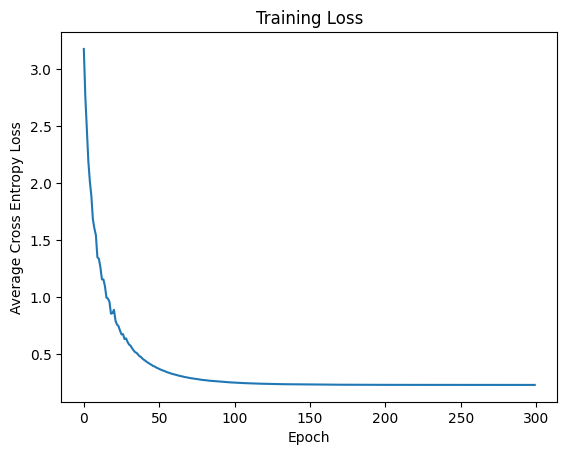

Test Accuracy: 0.6839096486335751 with params {'HIDDEN_SIZE': 32, 'learning_rate': 0.05}


  0%|          | 1/300 [00:00<01:21,  3.67it/s]

Epoch 1/300, Loss: 3.1439


  1%|          | 2/300 [00:00<01:21,  3.66it/s]

Epoch 2/300, Loss: 2.8268


  1%|          | 3/300 [00:00<01:20,  3.68it/s]

Epoch 3/300, Loss: 2.5405


  1%|▏         | 4/300 [00:01<01:19,  3.73it/s]

Epoch 4/300, Loss: 2.2722


  2%|▏         | 5/300 [00:01<01:18,  3.74it/s]

Epoch 5/300, Loss: 2.0688


  2%|▏         | 6/300 [00:01<01:31,  3.22it/s]

Epoch 6/300, Loss: 1.9912


  2%|▏         | 7/300 [00:02<01:30,  3.24it/s]

Epoch 7/300, Loss: 1.8110


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import cupy as cp
from sklearn.model_selection import ParameterGrid, train_test_split


# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.07, 0.1],
    'HIDDEN_SIZE': [32, 64, 128, 256],
    'gradient_steps': [250]
}

# Create a grid of parameter combinations
grid = ParameterGrid(param_grid)

# Track the best performance
best_validation_accuracy = 0
best_params = {}
results = []

for params in grid:
    HIDDEN_SIZE = params['HIDDEN_SIZE']
    lr = params['learning_rate']
    n_features = X_train.shape[-1]
    gradient_steps = params['gradient_steps']

    mlp = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ActivationLayer(),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)

    opt = GradientDescentOptimizer(lr=lr)
    opt.attach_network(mlp)

    mlp.fit(opt, X=X_train, y=y_train, epochs=gradient_steps, batch_size=200)

    validation_prediction = mlp.predict(X_test)
    validation_accuracy_score = mlp.evaluate_acc(validation_prediction, y_test)

    if validation_accuracy_score > best_validation_accuracy:
        best_validation_accuracy = validation_accuracy_score
        best_params = params

    results.append({
        'learning_rate': lr,
        'HIDDEN_SIZE': HIDDEN_SIZE,
        'gradient_steps': gradient_steps,
        'validation_accuracy': validation_accuracy_score,
    })

results_df = pd.DataFrame(results)
print(results_df)

print(f"Best validation accuracy is {best_validation_accuracy} with parameters {best_params}")

best_HIDDEN_SIZE = best_params['HIDDEN_SIZE']
best_lr = best_params['learning_rate']
best_gradient_steps = best_params['gradient_steps']

mlp_final = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ActivationLayer(),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)

opt_final = GradientDescentOptimizer(lr=best_lr)
opt_final.attach_network(mlp_final)

y_MNIST_normalized = cp.asarray(y_MNIST_normalized)
test_label = cp.asarray(test_label)

mlp_final.fit(opt_final, X=X_total, y=y_total, epochs=best_gradient_steps, batch_size=200)

final_test_prediction = mlp_final.predict(y_MNIST_normalized)
final_test_accuracy = mlp_final.evaluate_acc(final_test_prediction, test_label)

print(f"Final test accuracy with best parameters is {final_test_accuracy}")


















































# setting up 2-layer MLP with Sigmoid

  0%|          | 1/200 [00:01<04:35,  1.39s/it]

Epoch 1/200, Loss: 3.1936, Training Accuracy: 0.0838, Testing Accuracy: 0.0643


  1%|          | 2/200 [00:02<04:29,  1.36s/it]

Epoch 2/200, Loss: 3.1562, Training Accuracy: 0.0807, Testing Accuracy: 0.0619


  2%|▏         | 3/200 [00:04<04:25,  1.35s/it]

Epoch 3/200, Loss: 3.1234, Training Accuracy: 0.0909, Testing Accuracy: 0.0658


  2%|▏         | 4/200 [00:05<04:23,  1.34s/it]

Epoch 4/200, Loss: 3.0777, Training Accuracy: 0.1062, Testing Accuracy: 0.0916


  2%|▎         | 5/200 [00:06<04:21,  1.34s/it]

Epoch 5/200, Loss: 3.0093, Training Accuracy: 0.1678, Testing Accuracy: 0.1426


  3%|▎         | 6/200 [00:08<04:19,  1.34s/it]

Epoch 6/200, Loss: 2.9033, Training Accuracy: 0.2398, Testing Accuracy: 0.2281


  4%|▎         | 7/200 [00:09<04:18,  1.34s/it]

Epoch 7/200, Loss: 2.7772, Training Accuracy: 0.2080, Testing Accuracy: 0.1966


  4%|▍         | 8/200 [00:10<04:16,  1.34s/it]

Epoch 8/200, Loss: 2.6493, Training Accuracy: 0.2919, Testing Accuracy: 0.2892


  4%|▍         | 9/200 [00:12<04:15,  1.34s/it]

Epoch 9/200, Loss: 2.5186, Training Accuracy: 0.3211, Testing Accuracy: 0.3061


  5%|▌         | 10/200 [00:13<04:13,  1.33s/it]

Epoch 10/200, Loss: 2.3964, Training Accuracy: 0.3209, Testing Accuracy: 0.3051


  6%|▌         | 11/200 [00:14<04:12,  1.33s/it]

Epoch 11/200, Loss: 2.2871, Training Accuracy: 0.3534, Testing Accuracy: 0.3391


  6%|▌         | 12/200 [00:16<04:10,  1.33s/it]

Epoch 12/200, Loss: 2.1898, Training Accuracy: 0.3790, Testing Accuracy: 0.3843


  6%|▋         | 13/200 [00:17<04:09,  1.33s/it]

Epoch 13/200, Loss: 2.1046, Training Accuracy: 0.3974, Testing Accuracy: 0.3724


  7%|▋         | 14/200 [00:18<04:08,  1.33s/it]

Epoch 14/200, Loss: 2.0327, Training Accuracy: 0.3893, Testing Accuracy: 0.3678


  8%|▊         | 15/200 [00:20<04:06,  1.33s/it]

Epoch 15/200, Loss: 1.9687, Training Accuracy: 0.4293, Testing Accuracy: 0.4399


  8%|▊         | 16/200 [00:21<04:05,  1.34s/it]

Epoch 16/200, Loss: 1.9110, Training Accuracy: 0.4421, Testing Accuracy: 0.4084


  8%|▊         | 17/200 [00:22<04:04,  1.34s/it]

Epoch 17/200, Loss: 1.8617, Training Accuracy: 0.4437, Testing Accuracy: 0.4013


  9%|▉         | 18/200 [00:24<04:03,  1.34s/it]

Epoch 18/200, Loss: 1.8136, Training Accuracy: 0.4807, Testing Accuracy: 0.4480


 10%|▉         | 19/200 [00:25<04:01,  1.34s/it]

Epoch 19/200, Loss: 1.7698, Training Accuracy: 0.4911, Testing Accuracy: 0.4551


 10%|█         | 20/200 [00:26<04:00,  1.34s/it]

Epoch 20/200, Loss: 1.7287, Training Accuracy: 0.5010, Testing Accuracy: 0.4427


 10%|█         | 21/200 [00:28<03:59,  1.34s/it]

Epoch 21/200, Loss: 1.6906, Training Accuracy: 0.5148, Testing Accuracy: 0.4633


 11%|█         | 22/200 [00:29<03:57,  1.34s/it]

Epoch 22/200, Loss: 1.6533, Training Accuracy: 0.5312, Testing Accuracy: 0.4760


 12%|█▏        | 23/200 [00:30<03:56,  1.34s/it]

Epoch 23/200, Loss: 1.6213, Training Accuracy: 0.5277, Testing Accuracy: 0.4762


 12%|█▏        | 24/200 [00:32<03:54,  1.34s/it]

Epoch 24/200, Loss: 1.5885, Training Accuracy: 0.5454, Testing Accuracy: 0.5078


 12%|█▎        | 25/200 [00:33<03:53,  1.34s/it]

Epoch 25/200, Loss: 1.5581, Training Accuracy: 0.5513, Testing Accuracy: 0.5119


 13%|█▎        | 26/200 [00:34<03:52,  1.34s/it]

Epoch 26/200, Loss: 1.5295, Training Accuracy: 0.5575, Testing Accuracy: 0.5127


 14%|█▎        | 27/200 [00:36<03:51,  1.34s/it]

Epoch 27/200, Loss: 1.5025, Training Accuracy: 0.5698, Testing Accuracy: 0.5205


 14%|█▍        | 28/200 [00:37<03:50,  1.34s/it]

Epoch 28/200, Loss: 1.4769, Training Accuracy: 0.5640, Testing Accuracy: 0.5153


 14%|█▍        | 29/200 [00:38<03:49,  1.34s/it]

Epoch 29/200, Loss: 1.4532, Training Accuracy: 0.5788, Testing Accuracy: 0.5248


 15%|█▌        | 30/200 [00:40<03:47,  1.34s/it]

Epoch 30/200, Loss: 1.4309, Training Accuracy: 0.5877, Testing Accuracy: 0.5388


 16%|█▌        | 31/200 [00:41<03:46,  1.34s/it]

Epoch 31/200, Loss: 1.4108, Training Accuracy: 0.5907, Testing Accuracy: 0.5321


 16%|█▌        | 32/200 [00:42<03:44,  1.34s/it]

Epoch 32/200, Loss: 1.3895, Training Accuracy: 0.5942, Testing Accuracy: 0.5386


 16%|█▋        | 33/200 [00:44<03:43,  1.34s/it]

Epoch 33/200, Loss: 1.3714, Training Accuracy: 0.6017, Testing Accuracy: 0.5396


 17%|█▋        | 34/200 [00:45<03:41,  1.34s/it]

Epoch 34/200, Loss: 1.3532, Training Accuracy: 0.6074, Testing Accuracy: 0.5390


 18%|█▊        | 35/200 [00:46<03:40,  1.34s/it]

Epoch 35/200, Loss: 1.3372, Training Accuracy: 0.6087, Testing Accuracy: 0.5534


 18%|█▊        | 36/200 [00:48<03:39,  1.34s/it]

Epoch 36/200, Loss: 1.3221, Training Accuracy: 0.6134, Testing Accuracy: 0.5619


 18%|█▊        | 37/200 [00:49<03:38,  1.34s/it]

Epoch 37/200, Loss: 1.3065, Training Accuracy: 0.6208, Testing Accuracy: 0.5570


 19%|█▉        | 38/200 [00:50<03:36,  1.34s/it]

Epoch 38/200, Loss: 1.2923, Training Accuracy: 0.6188, Testing Accuracy: 0.5666


 20%|█▉        | 39/200 [00:52<03:35,  1.34s/it]

Epoch 39/200, Loss: 1.2800, Training Accuracy: 0.6284, Testing Accuracy: 0.5694


 20%|██        | 40/200 [00:53<03:33,  1.34s/it]

Epoch 40/200, Loss: 1.2668, Training Accuracy: 0.6277, Testing Accuracy: 0.5523


 20%|██        | 41/200 [00:54<03:32,  1.34s/it]

Epoch 41/200, Loss: 1.2547, Training Accuracy: 0.6297, Testing Accuracy: 0.5666


 21%|██        | 42/200 [00:56<03:31,  1.34s/it]

Epoch 42/200, Loss: 1.2438, Training Accuracy: 0.6309, Testing Accuracy: 0.5653


 22%|██▏       | 43/200 [00:57<03:30,  1.34s/it]

Epoch 43/200, Loss: 1.2326, Training Accuracy: 0.6427, Testing Accuracy: 0.5687


 22%|██▏       | 44/200 [00:58<03:28,  1.34s/it]

Epoch 44/200, Loss: 1.2224, Training Accuracy: 0.6420, Testing Accuracy: 0.5646


 22%|██▎       | 45/200 [01:00<03:27,  1.34s/it]

Epoch 45/200, Loss: 1.2128, Training Accuracy: 0.6457, Testing Accuracy: 0.5752


 23%|██▎       | 46/200 [01:01<03:26,  1.34s/it]

Epoch 46/200, Loss: 1.2033, Training Accuracy: 0.6455, Testing Accuracy: 0.5704


 24%|██▎       | 47/200 [01:02<03:24,  1.34s/it]

Epoch 47/200, Loss: 1.1946, Training Accuracy: 0.6522, Testing Accuracy: 0.5763


 24%|██▍       | 48/200 [01:04<03:23,  1.34s/it]

Epoch 48/200, Loss: 1.1859, Training Accuracy: 0.6589, Testing Accuracy: 0.5731


 24%|██▍       | 49/200 [01:05<03:21,  1.34s/it]

Epoch 49/200, Loss: 1.1779, Training Accuracy: 0.6606, Testing Accuracy: 0.5795


 25%|██▌       | 50/200 [01:06<03:20,  1.34s/it]

Epoch 50/200, Loss: 1.1699, Training Accuracy: 0.6601, Testing Accuracy: 0.5802


 26%|██▌       | 51/200 [01:08<03:19,  1.34s/it]

Epoch 51/200, Loss: 1.1628, Training Accuracy: 0.6627, Testing Accuracy: 0.5699


 26%|██▌       | 52/200 [01:09<03:17,  1.34s/it]

Epoch 52/200, Loss: 1.1554, Training Accuracy: 0.6703, Testing Accuracy: 0.5848


 26%|██▋       | 53/200 [01:10<03:16,  1.34s/it]

Epoch 53/200, Loss: 1.1492, Training Accuracy: 0.6692, Testing Accuracy: 0.5837


 27%|██▋       | 54/200 [01:12<03:15,  1.34s/it]

Epoch 54/200, Loss: 1.1427, Training Accuracy: 0.6747, Testing Accuracy: 0.5904


 28%|██▊       | 55/200 [01:13<03:13,  1.34s/it]

Epoch 55/200, Loss: 1.1363, Training Accuracy: 0.6736, Testing Accuracy: 0.5884


 28%|██▊       | 56/200 [01:14<03:12,  1.34s/it]

Epoch 56/200, Loss: 1.1306, Training Accuracy: 0.6733, Testing Accuracy: 0.5885


 28%|██▊       | 57/200 [01:16<03:11,  1.34s/it]

Epoch 57/200, Loss: 1.1250, Training Accuracy: 0.6788, Testing Accuracy: 0.5873


 29%|██▉       | 58/200 [01:17<03:10,  1.34s/it]

Epoch 58/200, Loss: 1.1189, Training Accuracy: 0.6812, Testing Accuracy: 0.5890


 30%|██▉       | 59/200 [01:18<03:08,  1.34s/it]

Epoch 59/200, Loss: 1.1144, Training Accuracy: 0.6760, Testing Accuracy: 0.5901


 30%|███       | 60/200 [01:20<03:07,  1.34s/it]

Epoch 60/200, Loss: 1.1094, Training Accuracy: 0.6840, Testing Accuracy: 0.5899


 30%|███       | 61/200 [01:21<03:05,  1.34s/it]

Epoch 61/200, Loss: 1.1044, Training Accuracy: 0.6813, Testing Accuracy: 0.5899


 31%|███       | 62/200 [01:22<03:04,  1.34s/it]

Epoch 62/200, Loss: 1.1000, Training Accuracy: 0.6840, Testing Accuracy: 0.5944


 32%|███▏      | 63/200 [01:24<03:03,  1.34s/it]

Epoch 63/200, Loss: 1.0957, Training Accuracy: 0.6884, Testing Accuracy: 0.5955


 32%|███▏      | 64/200 [01:25<03:01,  1.34s/it]

Epoch 64/200, Loss: 1.0917, Training Accuracy: 0.6844, Testing Accuracy: 0.5936


 32%|███▎      | 65/200 [01:26<03:00,  1.34s/it]

Epoch 65/200, Loss: 1.0874, Training Accuracy: 0.6907, Testing Accuracy: 0.5980


 33%|███▎      | 66/200 [01:28<02:58,  1.34s/it]

Epoch 66/200, Loss: 1.0839, Training Accuracy: 0.6880, Testing Accuracy: 0.6008


 34%|███▎      | 67/200 [01:29<02:57,  1.34s/it]

Epoch 67/200, Loss: 1.0798, Training Accuracy: 0.6911, Testing Accuracy: 0.5970


 34%|███▍      | 68/200 [01:30<02:56,  1.34s/it]

Epoch 68/200, Loss: 1.0762, Training Accuracy: 0.6949, Testing Accuracy: 0.6049


 34%|███▍      | 69/200 [01:32<02:55,  1.34s/it]

Epoch 69/200, Loss: 1.0729, Training Accuracy: 0.6927, Testing Accuracy: 0.6004


 35%|███▌      | 70/200 [01:33<02:53,  1.34s/it]

Epoch 70/200, Loss: 1.0693, Training Accuracy: 0.6958, Testing Accuracy: 0.6047


 36%|███▌      | 71/200 [01:34<02:52,  1.34s/it]

Epoch 71/200, Loss: 1.0659, Training Accuracy: 0.6946, Testing Accuracy: 0.6049


 36%|███▌      | 72/200 [01:36<02:50,  1.34s/it]

Epoch 72/200, Loss: 1.0632, Training Accuracy: 0.6992, Testing Accuracy: 0.6092


 36%|███▋      | 73/200 [01:37<02:49,  1.34s/it]

Epoch 73/200, Loss: 1.0604, Training Accuracy: 0.6973, Testing Accuracy: 0.6081


 37%|███▋      | 74/200 [01:38<02:48,  1.34s/it]

Epoch 74/200, Loss: 1.0570, Training Accuracy: 0.6969, Testing Accuracy: 0.6110


 38%|███▊      | 75/200 [01:40<02:47,  1.34s/it]

Epoch 75/200, Loss: 1.0549, Training Accuracy: 0.7016, Testing Accuracy: 0.6093


 38%|███▊      | 76/200 [01:41<02:45,  1.34s/it]

Epoch 76/200, Loss: 1.0521, Training Accuracy: 0.7013, Testing Accuracy: 0.6090


 38%|███▊      | 77/200 [01:42<02:44,  1.34s/it]

Epoch 77/200, Loss: 1.0494, Training Accuracy: 0.7035, Testing Accuracy: 0.6104


 39%|███▉      | 78/200 [01:44<02:43,  1.34s/it]

Epoch 78/200, Loss: 1.0471, Training Accuracy: 0.7011, Testing Accuracy: 0.6086


 40%|███▉      | 79/200 [01:45<02:41,  1.34s/it]

Epoch 79/200, Loss: 1.0448, Training Accuracy: 0.6992, Testing Accuracy: 0.6110


 40%|████      | 80/200 [01:46<02:40,  1.34s/it]

Epoch 80/200, Loss: 1.0427, Training Accuracy: 0.7052, Testing Accuracy: 0.6100


 40%|████      | 81/200 [01:48<02:38,  1.34s/it]

Epoch 81/200, Loss: 1.0405, Training Accuracy: 0.7032, Testing Accuracy: 0.6139


 41%|████      | 82/200 [01:49<02:37,  1.34s/it]

Epoch 82/200, Loss: 1.0381, Training Accuracy: 0.7027, Testing Accuracy: 0.6128


 42%|████▏     | 83/200 [01:50<02:36,  1.34s/it]

Epoch 83/200, Loss: 1.0364, Training Accuracy: 0.7034, Testing Accuracy: 0.6148


 42%|████▏     | 84/200 [01:52<02:34,  1.34s/it]

Epoch 84/200, Loss: 1.0345, Training Accuracy: 0.7067, Testing Accuracy: 0.6134


 42%|████▎     | 85/200 [01:53<02:33,  1.34s/it]

Epoch 85/200, Loss: 1.0327, Training Accuracy: 0.7053, Testing Accuracy: 0.6148


 43%|████▎     | 86/200 [01:55<02:32,  1.34s/it]

Epoch 86/200, Loss: 1.0310, Training Accuracy: 0.7101, Testing Accuracy: 0.6146


 44%|████▎     | 87/200 [01:56<02:31,  1.34s/it]

Epoch 87/200, Loss: 1.0291, Training Accuracy: 0.7091, Testing Accuracy: 0.6177


 44%|████▍     | 88/200 [01:57<02:29,  1.34s/it]

Epoch 88/200, Loss: 1.0275, Training Accuracy: 0.7072, Testing Accuracy: 0.6138


 44%|████▍     | 89/200 [01:59<02:28,  1.34s/it]

Epoch 89/200, Loss: 1.0258, Training Accuracy: 0.7074, Testing Accuracy: 0.6145


 45%|████▌     | 90/200 [02:00<02:26,  1.34s/it]

Epoch 90/200, Loss: 1.0244, Training Accuracy: 0.7076, Testing Accuracy: 0.6181


 46%|████▌     | 91/200 [02:01<02:25,  1.34s/it]

Epoch 91/200, Loss: 1.0226, Training Accuracy: 0.7125, Testing Accuracy: 0.6180


 46%|████▌     | 92/200 [02:03<02:24,  1.34s/it]

Epoch 92/200, Loss: 1.0212, Training Accuracy: 0.7105, Testing Accuracy: 0.6188


 46%|████▋     | 93/200 [02:04<02:22,  1.34s/it]

Epoch 93/200, Loss: 1.0200, Training Accuracy: 0.7101, Testing Accuracy: 0.6181


 47%|████▋     | 94/200 [02:05<02:21,  1.34s/it]

Epoch 94/200, Loss: 1.0190, Training Accuracy: 0.7103, Testing Accuracy: 0.6198


 48%|████▊     | 95/200 [02:07<02:20,  1.34s/it]

Epoch 95/200, Loss: 1.0175, Training Accuracy: 0.7133, Testing Accuracy: 0.6187


 48%|████▊     | 96/200 [02:08<02:18,  1.34s/it]

Epoch 96/200, Loss: 1.0162, Training Accuracy: 0.7140, Testing Accuracy: 0.6194


 48%|████▊     | 97/200 [02:09<02:17,  1.34s/it]

Epoch 97/200, Loss: 1.0153, Training Accuracy: 0.7113, Testing Accuracy: 0.6199


 49%|████▉     | 98/200 [02:11<02:16,  1.34s/it]

Epoch 98/200, Loss: 1.0140, Training Accuracy: 0.7108, Testing Accuracy: 0.6192


 50%|████▉     | 99/200 [02:12<02:15,  1.34s/it]

Epoch 99/200, Loss: 1.0126, Training Accuracy: 0.7136, Testing Accuracy: 0.6221


 50%|█████     | 100/200 [02:13<02:13,  1.34s/it]

Epoch 100/200, Loss: 1.0117, Training Accuracy: 0.7118, Testing Accuracy: 0.6196


 50%|█████     | 101/200 [02:15<02:12,  1.34s/it]

Epoch 101/200, Loss: 1.0107, Training Accuracy: 0.7139, Testing Accuracy: 0.6223


 51%|█████     | 102/200 [02:16<02:10,  1.34s/it]

Epoch 102/200, Loss: 1.0098, Training Accuracy: 0.7126, Testing Accuracy: 0.6221


 52%|█████▏    | 103/200 [02:17<02:09,  1.34s/it]

Epoch 103/200, Loss: 1.0088, Training Accuracy: 0.7151, Testing Accuracy: 0.6220


 52%|█████▏    | 104/200 [02:19<02:08,  1.34s/it]

Epoch 104/200, Loss: 1.0077, Training Accuracy: 0.7145, Testing Accuracy: 0.6209


 52%|█████▎    | 105/200 [02:20<02:06,  1.34s/it]

Epoch 105/200, Loss: 1.0070, Training Accuracy: 0.7137, Testing Accuracy: 0.6216


 53%|█████▎    | 106/200 [02:21<02:05,  1.34s/it]

Epoch 106/200, Loss: 1.0060, Training Accuracy: 0.7158, Testing Accuracy: 0.6217


 54%|█████▎    | 107/200 [02:23<02:11,  1.42s/it]

Epoch 107/200, Loss: 1.0055, Training Accuracy: 0.7139, Testing Accuracy: 0.6203


 54%|█████▍    | 108/200 [02:24<02:08,  1.40s/it]

Epoch 108/200, Loss: 1.0044, Training Accuracy: 0.7146, Testing Accuracy: 0.6216


 55%|█████▍    | 109/200 [02:26<02:05,  1.38s/it]

Epoch 109/200, Loss: 1.0038, Training Accuracy: 0.7164, Testing Accuracy: 0.6217


 55%|█████▌    | 110/200 [02:27<02:02,  1.37s/it]

Epoch 110/200, Loss: 1.0029, Training Accuracy: 0.7163, Testing Accuracy: 0.6223


 56%|█████▌    | 111/200 [02:28<02:00,  1.36s/it]

Epoch 111/200, Loss: 1.0021, Training Accuracy: 0.7162, Testing Accuracy: 0.6228


 56%|█████▌    | 112/200 [02:30<01:58,  1.35s/it]

Epoch 112/200, Loss: 1.0016, Training Accuracy: 0.7162, Testing Accuracy: 0.6227


 56%|█████▋    | 113/200 [02:31<01:57,  1.35s/it]

Epoch 113/200, Loss: 1.0007, Training Accuracy: 0.7160, Testing Accuracy: 0.6245


 57%|█████▋    | 114/200 [02:32<01:55,  1.34s/it]

Epoch 114/200, Loss: 1.0002, Training Accuracy: 0.7166, Testing Accuracy: 0.6241


 57%|█████▊    | 115/200 [02:34<01:54,  1.34s/it]

Epoch 115/200, Loss: 0.9998, Training Accuracy: 0.7164, Testing Accuracy: 0.6244


 58%|█████▊    | 116/200 [02:35<01:52,  1.34s/it]

Epoch 116/200, Loss: 0.9989, Training Accuracy: 0.7185, Testing Accuracy: 0.6231


 58%|█████▊    | 117/200 [02:36<01:51,  1.34s/it]

Epoch 117/200, Loss: 0.9984, Training Accuracy: 0.7178, Testing Accuracy: 0.6249


 59%|█████▉    | 118/200 [02:38<01:49,  1.34s/it]

Epoch 118/200, Loss: 0.9978, Training Accuracy: 0.7169, Testing Accuracy: 0.6249


 60%|█████▉    | 119/200 [02:39<01:48,  1.34s/it]

Epoch 119/200, Loss: 0.9974, Training Accuracy: 0.7182, Testing Accuracy: 0.6233


 60%|██████    | 120/200 [02:40<01:46,  1.34s/it]

Epoch 120/200, Loss: 0.9968, Training Accuracy: 0.7175, Testing Accuracy: 0.6240


 60%|██████    | 121/200 [02:42<01:45,  1.34s/it]

Epoch 121/200, Loss: 0.9963, Training Accuracy: 0.7173, Testing Accuracy: 0.6248


 61%|██████    | 122/200 [02:43<01:44,  1.34s/it]

Epoch 122/200, Loss: 0.9956, Training Accuracy: 0.7184, Testing Accuracy: 0.6233


 62%|██████▏   | 123/200 [02:44<01:42,  1.34s/it]

Epoch 123/200, Loss: 0.9953, Training Accuracy: 0.7173, Testing Accuracy: 0.6233


 62%|██████▏   | 124/200 [02:46<01:41,  1.34s/it]

Epoch 124/200, Loss: 0.9948, Training Accuracy: 0.7177, Testing Accuracy: 0.6258


 62%|██████▎   | 125/200 [02:47<01:40,  1.34s/it]

Epoch 125/200, Loss: 0.9946, Training Accuracy: 0.7186, Testing Accuracy: 0.6244


 63%|██████▎   | 126/200 [02:48<01:41,  1.37s/it]

Epoch 126/200, Loss: 0.9942, Training Accuracy: 0.7185, Testing Accuracy: 0.6241


 64%|██████▎   | 127/200 [02:50<01:40,  1.38s/it]

Epoch 127/200, Loss: 0.9937, Training Accuracy: 0.7180, Testing Accuracy: 0.6241


 64%|██████▍   | 128/200 [02:51<01:38,  1.37s/it]

Epoch 128/200, Loss: 0.9931, Training Accuracy: 0.7185, Testing Accuracy: 0.6244


 64%|██████▍   | 129/200 [02:52<01:36,  1.36s/it]

Epoch 129/200, Loss: 0.9929, Training Accuracy: 0.7189, Testing Accuracy: 0.6247


 65%|██████▌   | 130/200 [02:54<01:34,  1.35s/it]

Epoch 130/200, Loss: 0.9924, Training Accuracy: 0.7186, Testing Accuracy: 0.6247


 66%|██████▌   | 131/200 [02:55<01:32,  1.35s/it]

Epoch 131/200, Loss: 0.9921, Training Accuracy: 0.7187, Testing Accuracy: 0.6247


 66%|██████▌   | 132/200 [02:56<01:31,  1.34s/it]

Epoch 132/200, Loss: 0.9917, Training Accuracy: 0.7191, Testing Accuracy: 0.6248


 66%|██████▋   | 133/200 [02:58<01:29,  1.34s/it]

Epoch 133/200, Loss: 0.9915, Training Accuracy: 0.7184, Testing Accuracy: 0.6241


 67%|██████▋   | 134/200 [02:59<01:28,  1.34s/it]

Epoch 134/200, Loss: 0.9911, Training Accuracy: 0.7189, Testing Accuracy: 0.6240


 68%|██████▊   | 135/200 [03:00<01:27,  1.34s/it]

Epoch 135/200, Loss: 0.9908, Training Accuracy: 0.7196, Testing Accuracy: 0.6244


 68%|██████▊   | 136/200 [03:02<01:25,  1.34s/it]

Epoch 136/200, Loss: 0.9905, Training Accuracy: 0.7186, Testing Accuracy: 0.6241


 68%|██████▊   | 137/200 [03:03<01:24,  1.34s/it]

Epoch 137/200, Loss: 0.9903, Training Accuracy: 0.7197, Testing Accuracy: 0.6240


 69%|██████▉   | 138/200 [03:04<01:22,  1.34s/it]

Epoch 138/200, Loss: 0.9899, Training Accuracy: 0.7191, Testing Accuracy: 0.6242


 70%|██████▉   | 139/200 [03:06<01:21,  1.34s/it]

Epoch 139/200, Loss: 0.9898, Training Accuracy: 0.7187, Testing Accuracy: 0.6249


 70%|███████   | 140/200 [03:07<01:20,  1.34s/it]

Epoch 140/200, Loss: 0.9894, Training Accuracy: 0.7193, Testing Accuracy: 0.6248


 70%|███████   | 141/200 [03:08<01:18,  1.34s/it]

Epoch 141/200, Loss: 0.9891, Training Accuracy: 0.7195, Testing Accuracy: 0.6255


 71%|███████   | 142/200 [03:10<01:17,  1.34s/it]

Epoch 142/200, Loss: 0.9889, Training Accuracy: 0.7193, Testing Accuracy: 0.6247


 72%|███████▏  | 143/200 [03:11<01:16,  1.34s/it]

Epoch 143/200, Loss: 0.9888, Training Accuracy: 0.7195, Testing Accuracy: 0.6245


 72%|███████▏  | 144/200 [03:12<01:14,  1.33s/it]

Epoch 144/200, Loss: 0.9885, Training Accuracy: 0.7197, Testing Accuracy: 0.6253


 72%|███████▎  | 145/200 [03:14<01:13,  1.34s/it]

Epoch 145/200, Loss: 0.9886, Training Accuracy: 0.7199, Testing Accuracy: 0.6249


 73%|███████▎  | 146/200 [03:15<01:12,  1.34s/it]

Epoch 146/200, Loss: 0.9879, Training Accuracy: 0.7194, Testing Accuracy: 0.6255


 74%|███████▎  | 147/200 [03:16<01:10,  1.34s/it]

Epoch 147/200, Loss: 0.9879, Training Accuracy: 0.7197, Testing Accuracy: 0.6249


 74%|███████▍  | 148/200 [03:18<01:09,  1.34s/it]

Epoch 148/200, Loss: 0.9876, Training Accuracy: 0.7201, Testing Accuracy: 0.6256


 74%|███████▍  | 149/200 [03:19<01:08,  1.34s/it]

Epoch 149/200, Loss: 0.9876, Training Accuracy: 0.7205, Testing Accuracy: 0.6255


 75%|███████▌  | 150/200 [03:20<01:06,  1.34s/it]

Epoch 150/200, Loss: 0.9872, Training Accuracy: 0.7196, Testing Accuracy: 0.6245


 76%|███████▌  | 151/200 [03:22<01:05,  1.33s/it]

Epoch 151/200, Loss: 0.9873, Training Accuracy: 0.7201, Testing Accuracy: 0.6256


 76%|███████▌  | 152/200 [03:23<01:04,  1.33s/it]

Epoch 152/200, Loss: 0.9870, Training Accuracy: 0.7200, Testing Accuracy: 0.6255


 76%|███████▋  | 153/200 [03:24<01:02,  1.33s/it]

Epoch 153/200, Loss: 0.9869, Training Accuracy: 0.7201, Testing Accuracy: 0.6255


 77%|███████▋  | 154/200 [03:26<01:01,  1.33s/it]

Epoch 154/200, Loss: 0.9866, Training Accuracy: 0.7204, Testing Accuracy: 0.6253


 78%|███████▊  | 155/200 [03:27<01:00,  1.34s/it]

Epoch 155/200, Loss: 0.9866, Training Accuracy: 0.7205, Testing Accuracy: 0.6255


 78%|███████▊  | 156/200 [03:28<00:58,  1.34s/it]

Epoch 156/200, Loss: 0.9863, Training Accuracy: 0.7203, Testing Accuracy: 0.6258


 78%|███████▊  | 157/200 [03:30<00:57,  1.34s/it]

Epoch 157/200, Loss: 0.9863, Training Accuracy: 0.7206, Testing Accuracy: 0.6259


 79%|███████▉  | 158/200 [03:31<00:56,  1.34s/it]

Epoch 158/200, Loss: 0.9860, Training Accuracy: 0.7205, Testing Accuracy: 0.6256


 80%|███████▉  | 159/200 [03:33<00:54,  1.34s/it]

Epoch 159/200, Loss: 0.9858, Training Accuracy: 0.7206, Testing Accuracy: 0.6256


 80%|████████  | 160/200 [03:34<00:53,  1.34s/it]

Epoch 160/200, Loss: 0.9859, Training Accuracy: 0.7206, Testing Accuracy: 0.6260


 80%|████████  | 161/200 [03:35<00:52,  1.34s/it]

Epoch 161/200, Loss: 0.9856, Training Accuracy: 0.7206, Testing Accuracy: 0.6255


 81%|████████  | 162/200 [03:37<00:50,  1.34s/it]

Epoch 162/200, Loss: 0.9857, Training Accuracy: 0.7208, Testing Accuracy: 0.6253


 82%|████████▏ | 163/200 [03:38<00:49,  1.34s/it]

Epoch 163/200, Loss: 0.9856, Training Accuracy: 0.7205, Testing Accuracy: 0.6256


 82%|████████▏ | 164/200 [03:39<00:48,  1.34s/it]

Epoch 164/200, Loss: 0.9855, Training Accuracy: 0.7206, Testing Accuracy: 0.6252


 82%|████████▎ | 165/200 [03:41<00:46,  1.34s/it]

Epoch 165/200, Loss: 0.9853, Training Accuracy: 0.7208, Testing Accuracy: 0.6260


 83%|████████▎ | 166/200 [03:42<00:45,  1.34s/it]

Epoch 166/200, Loss: 0.9852, Training Accuracy: 0.7207, Testing Accuracy: 0.6265


 84%|████████▎ | 167/200 [03:43<00:44,  1.36s/it]

Epoch 167/200, Loss: 0.9849, Training Accuracy: 0.7208, Testing Accuracy: 0.6262


 84%|████████▍ | 168/200 [03:45<00:45,  1.41s/it]

Epoch 168/200, Loss: 0.9847, Training Accuracy: 0.7208, Testing Accuracy: 0.6259


 84%|████████▍ | 169/200 [03:46<00:43,  1.42s/it]

Epoch 169/200, Loss: 0.9848, Training Accuracy: 0.7211, Testing Accuracy: 0.6258


 85%|████████▌ | 170/200 [03:48<00:41,  1.40s/it]

Epoch 170/200, Loss: 0.9851, Training Accuracy: 0.7210, Testing Accuracy: 0.6253


 86%|████████▌ | 171/200 [03:49<00:40,  1.38s/it]

Epoch 171/200, Loss: 0.9845, Training Accuracy: 0.7208, Testing Accuracy: 0.6258


 86%|████████▌ | 172/200 [03:50<00:38,  1.37s/it]

Epoch 172/200, Loss: 0.9845, Training Accuracy: 0.7209, Testing Accuracy: 0.6259


 86%|████████▋ | 173/200 [03:52<00:36,  1.36s/it]

Epoch 173/200, Loss: 0.9846, Training Accuracy: 0.7211, Testing Accuracy: 0.6253


 87%|████████▋ | 174/200 [03:53<00:35,  1.35s/it]

Epoch 174/200, Loss: 0.9843, Training Accuracy: 0.7211, Testing Accuracy: 0.6256


 88%|████████▊ | 175/200 [03:54<00:33,  1.35s/it]

Epoch 175/200, Loss: 0.9844, Training Accuracy: 0.7211, Testing Accuracy: 0.6255


 88%|████████▊ | 176/200 [03:56<00:32,  1.35s/it]

Epoch 176/200, Loss: 0.9845, Training Accuracy: 0.7211, Testing Accuracy: 0.6258


 88%|████████▊ | 177/200 [03:57<00:31,  1.35s/it]

Epoch 177/200, Loss: 0.9839, Training Accuracy: 0.7210, Testing Accuracy: 0.6256


 89%|████████▉ | 178/200 [03:58<00:29,  1.35s/it]

Epoch 178/200, Loss: 0.9844, Training Accuracy: 0.7210, Testing Accuracy: 0.6258


 90%|████████▉ | 179/200 [04:00<00:28,  1.35s/it]

Epoch 179/200, Loss: 0.9840, Training Accuracy: 0.7210, Testing Accuracy: 0.6258


 90%|█████████ | 180/200 [04:01<00:26,  1.35s/it]

Epoch 180/200, Loss: 0.9839, Training Accuracy: 0.7210, Testing Accuracy: 0.6259


 90%|█████████ | 181/200 [04:02<00:25,  1.35s/it]

Epoch 181/200, Loss: 0.9841, Training Accuracy: 0.7211, Testing Accuracy: 0.6258


 91%|█████████ | 182/200 [04:04<00:24,  1.34s/it]

Epoch 182/200, Loss: 0.9839, Training Accuracy: 0.7210, Testing Accuracy: 0.6256


 92%|█████████▏| 183/200 [04:05<00:22,  1.34s/it]

Epoch 183/200, Loss: 0.9837, Training Accuracy: 0.7210, Testing Accuracy: 0.6256


 92%|█████████▏| 184/200 [04:06<00:21,  1.34s/it]

Epoch 184/200, Loss: 0.9840, Training Accuracy: 0.7212, Testing Accuracy: 0.6258


 92%|█████████▎| 185/200 [04:08<00:20,  1.34s/it]

Epoch 185/200, Loss: 0.9839, Training Accuracy: 0.7211, Testing Accuracy: 0.6259


 93%|█████████▎| 186/200 [04:09<00:20,  1.46s/it]

Epoch 186/200, Loss: 0.9838, Training Accuracy: 0.7212, Testing Accuracy: 0.6258


 94%|█████████▎| 187/200 [04:11<00:20,  1.60s/it]

Epoch 187/200, Loss: 0.9834, Training Accuracy: 0.7212, Testing Accuracy: 0.6258


 94%|█████████▍| 188/200 [04:13<00:18,  1.52s/it]

Epoch 188/200, Loss: 0.9836, Training Accuracy: 0.7211, Testing Accuracy: 0.6258


 94%|█████████▍| 189/200 [04:14<00:16,  1.47s/it]

Epoch 189/200, Loss: 0.9834, Training Accuracy: 0.7211, Testing Accuracy: 0.6258


 95%|█████████▌| 190/200 [04:15<00:14,  1.43s/it]

Epoch 190/200, Loss: 0.9833, Training Accuracy: 0.7212, Testing Accuracy: 0.6258


 96%|█████████▌| 191/200 [04:17<00:12,  1.41s/it]

Epoch 191/200, Loss: 0.9835, Training Accuracy: 0.7212, Testing Accuracy: 0.6258


 96%|█████████▌| 192/200 [04:18<00:11,  1.39s/it]

Epoch 192/200, Loss: 0.9833, Training Accuracy: 0.7211, Testing Accuracy: 0.6258


 96%|█████████▋| 193/200 [04:19<00:09,  1.38s/it]

Epoch 193/200, Loss: 0.9833, Training Accuracy: 0.7212, Testing Accuracy: 0.6259


 97%|█████████▋| 194/200 [04:21<00:08,  1.37s/it]

Epoch 194/200, Loss: 0.9833, Training Accuracy: 0.7213, Testing Accuracy: 0.6258


 98%|█████████▊| 195/200 [04:22<00:06,  1.36s/it]

Epoch 195/200, Loss: 0.9834, Training Accuracy: 0.7213, Testing Accuracy: 0.6258


 98%|█████████▊| 196/200 [04:24<00:05,  1.36s/it]

Epoch 196/200, Loss: 0.9833, Training Accuracy: 0.7212, Testing Accuracy: 0.6258


 98%|█████████▊| 197/200 [04:25<00:04,  1.36s/it]

Epoch 197/200, Loss: 0.9833, Training Accuracy: 0.7213, Testing Accuracy: 0.6258


 99%|█████████▉| 198/200 [04:26<00:02,  1.36s/it]

Epoch 198/200, Loss: 0.9832, Training Accuracy: 0.7213, Testing Accuracy: 0.6258


100%|█████████▉| 199/200 [04:28<00:01,  1.36s/it]

Epoch 199/200, Loss: 0.9830, Training Accuracy: 0.7213, Testing Accuracy: 0.6258


100%|██████████| 200/200 [04:29<00:00,  1.35s/it]

Epoch 200/200, Loss: 0.9829, Training Accuracy: 0.7213, Testing Accuracy: 0.6258


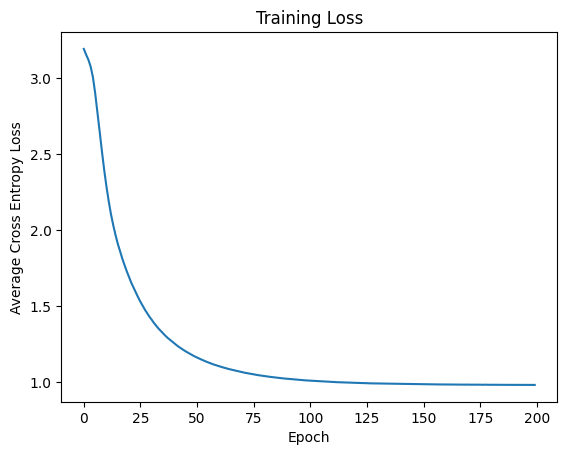

0.70497177199053


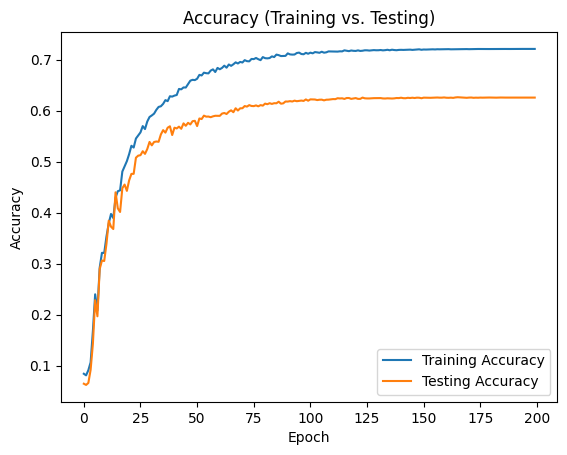

In [ ]:
HIDDEN_SIZE = 256
GRADIENT_STEPS = 200
n_features = X_MNIST_normalized.shape[-1]

mlp3 = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(activation='sigmoid'),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ActivationLayer(activation='sigmoid'),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)
opt3 = GradientDescentOptimizer(lr=0.1)
opt3.attach_network(mlp3)

mlp3.fit(opt3, X=X_train, y=y_train, epochs=GRADIENT_STEPS, batch_size=200, X_test=y_MNIST_normalized, y_test=test_label) # I should use an adaptive learning rate because the loss becomes nan
prediction = mlp3.predict(X_test)
accuracy_score = mlp3.evaluate_acc(prediction, y_test)
print(accuracy_score)

# Setting up 2-layer MLP with Leaky-ReLU

In [22]:
HIDDEN_SIZE = 64
GRADIENT_STEPS = 200
n_features = X_MNIST_normalized.shape[-1]
X_MNIST_normalized_cp = cp.asarray(X_MNIST_normalized)

mlp4 = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)
opt4 = GradientDescentOptimizer(lr=0.05)
opt4.attach_network(mlp4)

mlp4.fit(opt4, X=X_MNIST_normalized_cp, y=train_label, epochs=GRADIENT_STEPS, batch_size=200, X_test=y_MNIST_normalized, y_test=test_label) # I should use an adaptive learning rate because the loss becomes nan

  0%|          | 1/200 [00:12<40:45, 12.29s/it]

Epoch 1/200, Loss: 3.0257, Training Accuracy: 0.1594, Testing Accuracy: 0.1191


  1%|          | 2/200 [00:12<17:33,  5.32s/it]

Epoch 2/200, Loss: 2.5543, Training Accuracy: 0.2854, Testing Accuracy: 0.2248


  2%|▏         | 3/200 [00:13<10:02,  3.06s/it]

Epoch 3/200, Loss: 2.3245, Training Accuracy: 0.3494, Testing Accuracy: 0.2860


  2%|▏         | 4/200 [00:13<06:33,  2.01s/it]

Epoch 4/200, Loss: 2.2335, Training Accuracy: 0.3716, Testing Accuracy: 0.3061


  2%|▎         | 5/200 [00:13<04:37,  1.42s/it]

Epoch 5/200, Loss: 2.1973, Training Accuracy: 0.3759, Testing Accuracy: 0.3115


  3%|▎         | 6/200 [00:14<03:26,  1.07s/it]

Epoch 6/200, Loss: 2.1812, Training Accuracy: 0.3808, Testing Accuracy: 0.3144


  4%|▎         | 7/200 [00:14<02:42,  1.19it/s]

Epoch 7/200, Loss: 2.1760, Training Accuracy: 0.3819, Testing Accuracy: 0.3140


  4%|▍         | 8/200 [00:15<02:13,  1.44it/s]

Epoch 8/200, Loss: 2.1731, Training Accuracy: 0.3824, Testing Accuracy: 0.3143


  4%|▍         | 9/200 [00:15<01:54,  1.67it/s]

Epoch 9/200, Loss: 2.1711, Training Accuracy: 0.3826, Testing Accuracy: 0.3144


  5%|▌         | 10/200 [00:15<01:41,  1.88it/s]

Epoch 10/200, Loss: 2.1713, Training Accuracy: 0.3826, Testing Accuracy: 0.3146


  6%|▌         | 11/200 [00:16<01:32,  2.04it/s]

Epoch 11/200, Loss: 2.1711, Training Accuracy: 0.3826, Testing Accuracy: 0.3146


  6%|▌         | 12/200 [00:16<01:28,  2.13it/s]

Epoch 12/200, Loss: 2.1704, Training Accuracy: 0.3826, Testing Accuracy: 0.3146


  6%|▋         | 13/200 [00:16<01:22,  2.27it/s]

Epoch 13/200, Loss: 2.1714, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


  7%|▋         | 14/200 [00:17<01:18,  2.37it/s]

Epoch 14/200, Loss: 2.1715, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


  8%|▊         | 15/200 [00:17<01:15,  2.44it/s]

Epoch 15/200, Loss: 2.1708, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


  8%|▊         | 16/200 [00:18<01:13,  2.50it/s]

Epoch 16/200, Loss: 2.1707, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


  8%|▊         | 17/200 [00:18<01:12,  2.52it/s]

Epoch 17/200, Loss: 2.1704, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


  9%|▉         | 18/200 [00:18<01:11,  2.54it/s]

Epoch 18/200, Loss: 2.1700, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 10%|▉         | 19/200 [00:19<01:10,  2.57it/s]

Epoch 19/200, Loss: 2.1714, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 10%|█         | 20/200 [00:19<01:09,  2.58it/s]

Epoch 20/200, Loss: 2.1701, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 10%|█         | 21/200 [00:20<01:08,  2.61it/s]

Epoch 21/200, Loss: 2.1709, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 11%|█         | 22/200 [00:20<01:07,  2.63it/s]

Epoch 22/200, Loss: 2.1710, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 12%|█▏        | 23/200 [00:20<01:07,  2.61it/s]

Epoch 23/200, Loss: 2.1725, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 12%|█▏        | 24/200 [00:21<01:06,  2.63it/s]

Epoch 24/200, Loss: 2.1708, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 12%|█▎        | 25/200 [00:21<01:08,  2.57it/s]

Epoch 25/200, Loss: 2.1701, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 13%|█▎        | 26/200 [00:22<01:15,  2.31it/s]

Epoch 26/200, Loss: 2.1702, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 14%|█▎        | 27/200 [00:22<01:19,  2.18it/s]

Epoch 27/200, Loss: 2.1714, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 14%|█▍        | 28/200 [00:23<01:23,  2.06it/s]

Epoch 28/200, Loss: 2.1707, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 14%|█▍        | 29/200 [00:23<01:28,  1.94it/s]

Epoch 29/200, Loss: 2.1713, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 15%|█▌        | 30/200 [00:24<01:29,  1.90it/s]

Epoch 30/200, Loss: 2.1714, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 16%|█▌        | 31/200 [00:24<01:27,  1.93it/s]

Epoch 31/200, Loss: 2.1713, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 16%|█▌        | 32/200 [00:25<01:20,  2.10it/s]

Epoch 32/200, Loss: 2.1715, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 16%|█▋        | 33/200 [00:25<01:14,  2.24it/s]

Epoch 33/200, Loss: 2.1706, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 17%|█▋        | 34/200 [00:25<01:11,  2.33it/s]

Epoch 34/200, Loss: 2.1715, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 18%|█▊        | 35/200 [00:26<01:08,  2.41it/s]

Epoch 35/200, Loss: 2.1708, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 18%|█▊        | 36/200 [00:26<01:06,  2.47it/s]

Epoch 36/200, Loss: 2.1714, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 18%|█▊        | 37/200 [00:27<01:04,  2.53it/s]

Epoch 37/200, Loss: 2.1706, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 19%|█▉        | 38/200 [00:27<01:03,  2.57it/s]

Epoch 38/200, Loss: 2.1715, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 20%|█▉        | 39/200 [00:27<01:02,  2.56it/s]

Epoch 39/200, Loss: 2.1711, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 20%|██        | 40/200 [00:28<01:02,  2.58it/s]

Epoch 40/200, Loss: 2.1706, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 20%|██        | 41/200 [00:28<01:01,  2.57it/s]

Epoch 41/200, Loss: 2.1700, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 21%|██        | 42/200 [00:29<01:01,  2.58it/s]

Epoch 42/200, Loss: 2.1706, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 22%|██▏       | 43/200 [00:29<01:00,  2.60it/s]

Epoch 43/200, Loss: 2.1706, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 22%|██▏       | 44/200 [00:29<00:59,  2.62it/s]

Epoch 44/200, Loss: 2.1708, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 22%|██▎       | 45/200 [00:30<00:58,  2.64it/s]

Epoch 45/200, Loss: 2.1704, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 23%|██▎       | 46/200 [00:30<00:58,  2.64it/s]

Epoch 46/200, Loss: 2.1711, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 24%|██▎       | 47/200 [00:30<00:58,  2.62it/s]

Epoch 47/200, Loss: 2.1720, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 24%|██▍       | 48/200 [00:31<00:57,  2.64it/s]

Epoch 48/200, Loss: 2.1712, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 24%|██▍       | 49/200 [00:31<00:57,  2.63it/s]

Epoch 49/200, Loss: 2.1714, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 25%|██▌       | 50/200 [00:32<00:56,  2.64it/s]

Epoch 50/200, Loss: 2.1713, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 26%|██▌       | 51/200 [00:32<00:57,  2.59it/s]

Epoch 51/200, Loss: 2.1711, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 26%|██▌       | 52/200 [00:32<00:57,  2.60it/s]

Epoch 52/200, Loss: 2.1712, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 26%|██▋       | 53/200 [00:33<00:56,  2.60it/s]

Epoch 53/200, Loss: 2.1706, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 27%|██▋       | 54/200 [00:33<00:55,  2.62it/s]

Epoch 54/200, Loss: 2.1705, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 28%|██▊       | 55/200 [00:33<00:55,  2.60it/s]

Epoch 55/200, Loss: 2.1718, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 28%|██▊       | 56/200 [00:34<00:55,  2.60it/s]

Epoch 56/200, Loss: 2.1724, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 28%|██▊       | 57/200 [00:34<00:57,  2.47it/s]

Epoch 57/200, Loss: 2.1712, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 29%|██▉       | 58/200 [00:35<01:02,  2.29it/s]

Epoch 58/200, Loss: 2.1702, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 30%|██▉       | 59/200 [00:35<01:04,  2.18it/s]

Epoch 59/200, Loss: 2.1710, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 30%|███       | 60/200 [00:36<01:09,  2.03it/s]

Epoch 60/200, Loss: 2.1704, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 30%|███       | 61/200 [00:36<01:11,  1.94it/s]

Epoch 61/200, Loss: 2.1712, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 31%|███       | 62/200 [00:37<01:13,  1.89it/s]

Epoch 62/200, Loss: 2.1704, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 32%|███▏      | 63/200 [00:37<01:09,  1.97it/s]

Epoch 63/200, Loss: 2.1709, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 32%|███▏      | 64/200 [00:38<01:04,  2.10it/s]

Epoch 64/200, Loss: 2.1712, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 32%|███▎      | 65/200 [00:38<01:00,  2.24it/s]

Epoch 65/200, Loss: 2.1708, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 33%|███▎      | 66/200 [00:39<00:57,  2.34it/s]

Epoch 66/200, Loss: 2.1711, Training Accuracy: 0.3825, Testing Accuracy: 0.3146


 33%|███▎      | 66/200 [00:39<01:20,  1.67it/s]


KeyboardInterrupt: 

In [ ]:
test_prediction = mlp4.predict(cp.asarray(y_MNIST_normalized))
test_accuracy_score = mlp4.evaluate_acc(cp.asarray(test_prediction), cp.asarray(test_label))

# Print the test accuracy score with the current parameters
print(f"Test Accuracy: {test_accuracy_score}")

Test Accuracy: 0.7348020078081428


This is the second test, but with more hidden layers

  0%|          | 1/200 [00:01<03:35,  1.08s/it]

Epoch 1/200, Loss: 2.8357


  1%|          | 2/200 [00:02<03:41,  1.12s/it]

Epoch 2/200, Loss: 2.2072


  2%|▏         | 3/200 [00:03<03:47,  1.16s/it]

Epoch 3/200, Loss: 1.8032


  2%|▏         | 4/200 [00:04<03:21,  1.03s/it]

Epoch 4/200, Loss: 1.5620


  2%|▎         | 5/200 [00:04<02:54,  1.12it/s]

Epoch 5/200, Loss: 1.3473


  3%|▎         | 6/200 [00:05<02:37,  1.23it/s]

Epoch 6/200, Loss: 1.1674


  4%|▎         | 7/200 [00:06<02:24,  1.33it/s]

Epoch 7/200, Loss: 1.0617


  4%|▍         | 8/200 [00:06<02:16,  1.41it/s]

Epoch 8/200, Loss: 0.9171


  4%|▍         | 9/200 [00:07<02:10,  1.46it/s]

Epoch 9/200, Loss: 0.8305


  5%|▌         | 10/200 [00:08<02:06,  1.50it/s]

Epoch 10/200, Loss: 0.7557


  6%|▌         | 11/200 [00:08<02:03,  1.53it/s]

Epoch 11/200, Loss: 0.6577


  6%|▌         | 12/200 [00:09<02:01,  1.55it/s]

Epoch 12/200, Loss: 0.6033


  6%|▋         | 13/200 [00:09<01:59,  1.56it/s]

Epoch 13/200, Loss: 0.5106


  7%|▋         | 14/200 [00:10<01:58,  1.57it/s]

Epoch 14/200, Loss: 0.4888


  8%|▊         | 15/200 [00:11<01:57,  1.58it/s]

Epoch 15/200, Loss: 0.4345


  8%|▊         | 16/200 [00:11<01:56,  1.59it/s]

Epoch 16/200, Loss: 0.3975


  8%|▊         | 17/200 [00:12<01:55,  1.59it/s]

Epoch 17/200, Loss: 0.3694


  9%|▉         | 18/200 [00:13<01:54,  1.59it/s]

Epoch 18/200, Loss: 0.3216


 10%|▉         | 19/200 [00:13<01:53,  1.59it/s]

Epoch 19/200, Loss: 0.3080


 10%|█         | 20/200 [00:14<01:53,  1.59it/s]

Epoch 20/200, Loss: 0.2799


 10%|█         | 21/200 [00:14<01:52,  1.59it/s]

Epoch 21/200, Loss: 0.2574


 11%|█         | 22/200 [00:15<01:52,  1.59it/s]

Epoch 22/200, Loss: 0.2415


 12%|█▏        | 23/200 [00:16<01:51,  1.59it/s]

Epoch 23/200, Loss: 0.2198


 12%|█▏        | 24/200 [00:16<01:50,  1.59it/s]

Epoch 24/200, Loss: 0.2087


 12%|█▎        | 25/200 [00:17<01:50,  1.59it/s]

Epoch 25/200, Loss: 0.1930


 13%|█▎        | 26/200 [00:18<01:49,  1.59it/s]

Epoch 26/200, Loss: 0.1840


 14%|█▎        | 27/200 [00:18<01:48,  1.59it/s]

Epoch 27/200, Loss: 0.1754


 14%|█▍        | 28/200 [00:19<01:48,  1.59it/s]

Epoch 28/200, Loss: 0.1657


 14%|█▍        | 29/200 [00:19<01:47,  1.59it/s]

Epoch 29/200, Loss: 0.1576


 15%|█▌        | 30/200 [00:20<01:46,  1.59it/s]

Epoch 30/200, Loss: 0.1487


 16%|█▌        | 31/200 [00:21<01:46,  1.59it/s]

Epoch 31/200, Loss: 0.1425


 16%|█▌        | 32/200 [00:21<01:45,  1.59it/s]

Epoch 32/200, Loss: 0.1367


 16%|█▋        | 33/200 [00:22<01:44,  1.59it/s]

Epoch 33/200, Loss: 0.1310


 17%|█▋        | 34/200 [00:23<01:44,  1.59it/s]

Epoch 34/200, Loss: 0.1263


 18%|█▊        | 35/200 [00:23<01:43,  1.59it/s]

Epoch 35/200, Loss: 0.1214


 18%|█▊        | 36/200 [00:24<01:42,  1.59it/s]

Epoch 36/200, Loss: 0.1181


 18%|█▊        | 37/200 [00:25<01:42,  1.59it/s]

Epoch 37/200, Loss: 0.1140


 19%|█▉        | 38/200 [00:25<01:41,  1.59it/s]

Epoch 38/200, Loss: 0.1100


 20%|█▉        | 39/200 [00:26<01:41,  1.59it/s]

Epoch 39/200, Loss: 0.1072


 20%|██        | 40/200 [00:26<01:40,  1.59it/s]

Epoch 40/200, Loss: 0.1044


 20%|██        | 41/200 [00:27<01:39,  1.59it/s]

Epoch 41/200, Loss: 0.1021


 21%|██        | 42/200 [00:28<01:39,  1.59it/s]

Epoch 42/200, Loss: 0.0989


 22%|██▏       | 43/200 [00:28<01:38,  1.59it/s]

Epoch 43/200, Loss: 0.0968


 22%|██▏       | 44/200 [00:29<01:38,  1.58it/s]

Epoch 44/200, Loss: 0.0946


 22%|██▎       | 45/200 [00:30<01:37,  1.58it/s]

Epoch 45/200, Loss: 0.0929


 23%|██▎       | 46/200 [00:30<01:37,  1.58it/s]

Epoch 46/200, Loss: 0.0911


 24%|██▎       | 47/200 [00:31<01:36,  1.58it/s]

Epoch 47/200, Loss: 0.0891


 24%|██▍       | 48/200 [00:31<01:35,  1.59it/s]

Epoch 48/200, Loss: 0.0877


 24%|██▍       | 49/200 [00:32<01:35,  1.59it/s]

Epoch 49/200, Loss: 0.0861


 25%|██▌       | 50/200 [00:33<01:34,  1.59it/s]

Epoch 50/200, Loss: 0.0848


 26%|██▌       | 51/200 [00:33<01:33,  1.59it/s]

Epoch 51/200, Loss: 0.0836


 26%|██▌       | 52/200 [00:34<01:33,  1.59it/s]

Epoch 52/200, Loss: 0.0823


 26%|██▋       | 53/200 [00:35<01:32,  1.59it/s]

Epoch 53/200, Loss: 0.0813


 27%|██▋       | 54/200 [00:35<01:31,  1.59it/s]

Epoch 54/200, Loss: 0.0799


 28%|██▊       | 55/200 [00:36<01:31,  1.59it/s]

Epoch 55/200, Loss: 0.0791


 28%|██▊       | 56/200 [00:36<01:30,  1.59it/s]

Epoch 56/200, Loss: 0.0782


 28%|██▊       | 57/200 [00:37<01:30,  1.59it/s]

Epoch 57/200, Loss: 0.0772


 29%|██▉       | 58/200 [00:38<01:29,  1.59it/s]

Epoch 58/200, Loss: 0.0766


 30%|██▉       | 59/200 [00:38<01:28,  1.59it/s]

Epoch 59/200, Loss: 0.0757


 30%|███       | 60/200 [00:39<01:28,  1.59it/s]

Epoch 60/200, Loss: 0.0749


 30%|███       | 61/200 [00:40<01:27,  1.59it/s]

Epoch 61/200, Loss: 0.0741


 31%|███       | 62/200 [00:40<01:27,  1.59it/s]

Epoch 62/200, Loss: 0.0736


 32%|███▏      | 63/200 [00:41<01:26,  1.58it/s]

Epoch 63/200, Loss: 0.0729


 32%|███▏      | 64/200 [00:42<01:26,  1.58it/s]

Epoch 64/200, Loss: 0.0721


 32%|███▎      | 65/200 [00:42<01:25,  1.58it/s]

Epoch 65/200, Loss: 0.0718


 33%|███▎      | 66/200 [00:43<01:24,  1.58it/s]

Epoch 66/200, Loss: 0.0714


 34%|███▎      | 67/200 [00:43<01:24,  1.58it/s]

Epoch 67/200, Loss: 0.0708


 34%|███▍      | 68/200 [00:44<01:23,  1.58it/s]

Epoch 68/200, Loss: 0.0703


 34%|███▍      | 69/200 [00:45<01:22,  1.58it/s]

Epoch 69/200, Loss: 0.0700


 35%|███▌      | 70/200 [00:45<01:22,  1.58it/s]

Epoch 70/200, Loss: 0.0695


 36%|███▌      | 71/200 [00:46<01:21,  1.58it/s]

Epoch 71/200, Loss: 0.0690


 36%|███▌      | 72/200 [00:47<01:20,  1.58it/s]

Epoch 72/200, Loss: 0.0688


 36%|███▋      | 73/200 [00:47<01:20,  1.58it/s]

Epoch 73/200, Loss: 0.0683


 37%|███▋      | 74/200 [00:48<01:19,  1.58it/s]

Epoch 74/200, Loss: 0.0679


 38%|███▊      | 75/200 [00:49<01:19,  1.58it/s]

Epoch 75/200, Loss: 0.0676


 38%|███▊      | 76/200 [00:49<01:18,  1.58it/s]

Epoch 76/200, Loss: 0.0671


 38%|███▊      | 77/200 [00:50<01:17,  1.58it/s]

Epoch 77/200, Loss: 0.0670


 39%|███▉      | 78/200 [00:50<01:17,  1.58it/s]

Epoch 78/200, Loss: 0.0668


 40%|███▉      | 79/200 [00:51<01:16,  1.58it/s]

Epoch 79/200, Loss: 0.0665


 40%|████      | 80/200 [00:52<01:15,  1.58it/s]

Epoch 80/200, Loss: 0.0663


 40%|████      | 81/200 [00:52<01:15,  1.58it/s]

Epoch 81/200, Loss: 0.0659


 41%|████      | 82/200 [00:53<01:14,  1.58it/s]

Epoch 82/200, Loss: 0.0656


 42%|████▏     | 83/200 [00:54<01:14,  1.58it/s]

Epoch 83/200, Loss: 0.0654


 42%|████▏     | 84/200 [00:54<01:13,  1.58it/s]

Epoch 84/200, Loss: 0.0653


 42%|████▎     | 85/200 [00:55<01:12,  1.58it/s]

Epoch 85/200, Loss: 0.0650


 43%|████▎     | 86/200 [00:55<01:12,  1.58it/s]

Epoch 86/200, Loss: 0.0649


 44%|████▎     | 87/200 [00:56<01:11,  1.57it/s]

Epoch 87/200, Loss: 0.0646


 44%|████▍     | 88/200 [00:57<01:11,  1.57it/s]

Epoch 88/200, Loss: 0.0645


 44%|████▍     | 89/200 [00:57<01:10,  1.58it/s]

Epoch 89/200, Loss: 0.0645


 45%|████▌     | 90/200 [00:58<01:09,  1.58it/s]

Epoch 90/200, Loss: 0.0642


 46%|████▌     | 91/200 [00:59<01:09,  1.58it/s]

Epoch 91/200, Loss: 0.0640


 46%|████▌     | 92/200 [00:59<01:08,  1.58it/s]

Epoch 92/200, Loss: 0.0638


 46%|████▋     | 93/200 [01:00<01:07,  1.58it/s]

Epoch 93/200, Loss: 0.0638


 47%|████▋     | 94/200 [01:01<01:07,  1.58it/s]

Epoch 94/200, Loss: 0.0636


 48%|████▊     | 95/200 [01:01<01:06,  1.58it/s]

Epoch 95/200, Loss: 0.0635


 48%|████▊     | 96/200 [01:02<01:05,  1.58it/s]

Epoch 96/200, Loss: 0.0634


 48%|████▊     | 97/200 [01:02<01:05,  1.58it/s]

Epoch 97/200, Loss: 0.0632


 49%|████▉     | 98/200 [01:03<01:04,  1.58it/s]

Epoch 98/200, Loss: 0.0631


 50%|████▉     | 99/200 [01:04<01:03,  1.58it/s]

Epoch 99/200, Loss: 0.0630


 50%|█████     | 100/200 [01:04<01:03,  1.58it/s]

Epoch 100/200, Loss: 0.0631


 50%|█████     | 101/200 [01:05<01:02,  1.58it/s]

Epoch 101/200, Loss: 0.0629


 51%|█████     | 102/200 [01:06<01:02,  1.58it/s]

Epoch 102/200, Loss: 0.0626


 52%|█████▏    | 103/200 [01:06<01:01,  1.58it/s]

Epoch 103/200, Loss: 0.0626


 52%|█████▏    | 104/200 [01:07<01:00,  1.58it/s]

Epoch 104/200, Loss: 0.0627


 52%|█████▎    | 105/200 [01:08<01:00,  1.58it/s]

Epoch 105/200, Loss: 0.0626


 53%|█████▎    | 106/200 [01:08<00:59,  1.57it/s]

Epoch 106/200, Loss: 0.0625


 54%|█████▎    | 107/200 [01:09<00:59,  1.57it/s]

Epoch 107/200, Loss: 0.0623


 54%|█████▍    | 108/200 [01:09<00:58,  1.57it/s]

Epoch 108/200, Loss: 0.0623


 55%|█████▍    | 109/200 [01:10<00:57,  1.57it/s]

Epoch 109/200, Loss: 0.0622


 55%|█████▌    | 110/200 [01:11<00:57,  1.57it/s]

Epoch 110/200, Loss: 0.0623


 56%|█████▌    | 111/200 [01:11<00:56,  1.57it/s]

Epoch 111/200, Loss: 0.0620


 56%|█████▌    | 112/200 [01:12<00:55,  1.57it/s]

Epoch 112/200, Loss: 0.0621


 56%|█████▋    | 113/200 [01:13<00:55,  1.57it/s]

Epoch 113/200, Loss: 0.0619


 57%|█████▋    | 114/200 [01:13<00:54,  1.57it/s]

Epoch 114/200, Loss: 0.0618


 57%|█████▊    | 115/200 [01:14<00:53,  1.58it/s]

Epoch 115/200, Loss: 0.0619


 58%|█████▊    | 116/200 [01:15<00:53,  1.58it/s]

Epoch 116/200, Loss: 0.0618


 58%|█████▊    | 117/200 [01:15<00:52,  1.58it/s]

Epoch 117/200, Loss: 0.0618


 59%|█████▉    | 118/200 [01:16<00:52,  1.58it/s]

Epoch 118/200, Loss: 0.0616


 60%|█████▉    | 119/200 [01:16<00:51,  1.58it/s]

Epoch 119/200, Loss: 0.0616


 60%|██████    | 120/200 [01:17<00:50,  1.57it/s]

Epoch 120/200, Loss: 0.0616


 60%|██████    | 121/200 [01:18<00:50,  1.57it/s]

Epoch 121/200, Loss: 0.0616


 61%|██████    | 122/200 [01:18<00:49,  1.57it/s]

Epoch 122/200, Loss: 0.0616


 62%|██████▏   | 123/200 [01:19<00:48,  1.58it/s]

Epoch 123/200, Loss: 0.0615


 62%|██████▏   | 124/200 [01:20<00:48,  1.57it/s]

Epoch 124/200, Loss: 0.0615


 62%|██████▎   | 125/200 [01:20<00:47,  1.57it/s]

Epoch 125/200, Loss: 0.0614


 63%|██████▎   | 126/200 [01:21<00:47,  1.57it/s]

Epoch 126/200, Loss: 0.0614


 64%|██████▎   | 127/200 [01:22<00:46,  1.57it/s]

Epoch 127/200, Loss: 0.0615


 64%|██████▍   | 128/200 [01:22<00:45,  1.57it/s]

Epoch 128/200, Loss: 0.0613


 64%|██████▍   | 129/200 [01:23<00:45,  1.56it/s]

Epoch 129/200, Loss: 0.0613


 65%|██████▌   | 130/200 [01:23<00:44,  1.57it/s]

Epoch 130/200, Loss: 0.0613


 66%|██████▌   | 131/200 [01:24<00:44,  1.57it/s]

Epoch 131/200, Loss: 0.0613


 66%|██████▌   | 132/200 [01:25<00:43,  1.57it/s]

Epoch 132/200, Loss: 0.0613


 66%|██████▋   | 133/200 [01:25<00:42,  1.57it/s]

Epoch 133/200, Loss: 0.0613


 67%|██████▋   | 134/200 [01:26<00:47,  1.38it/s]

Epoch 134/200, Loss: 0.0611


 68%|██████▊   | 135/200 [01:27<00:45,  1.43it/s]

Epoch 135/200, Loss: 0.0612


 68%|██████▊   | 136/200 [01:28<00:43,  1.47it/s]

Epoch 136/200, Loss: 0.0612


 68%|██████▊   | 137/200 [01:28<00:42,  1.50it/s]

Epoch 137/200, Loss: 0.0613


 69%|██████▉   | 138/200 [01:29<00:40,  1.52it/s]

Epoch 138/200, Loss: 0.0612


 70%|██████▉   | 139/200 [01:29<00:39,  1.53it/s]

Epoch 139/200, Loss: 0.0611


 70%|███████   | 140/200 [01:30<00:38,  1.54it/s]

Epoch 140/200, Loss: 0.0612


 70%|███████   | 141/200 [01:31<00:37,  1.55it/s]

Epoch 141/200, Loss: 0.0611


 71%|███████   | 142/200 [01:31<00:37,  1.56it/s]

Epoch 142/200, Loss: 0.0610


 72%|███████▏  | 143/200 [01:32<00:36,  1.56it/s]

Epoch 143/200, Loss: 0.0610


 72%|███████▏  | 144/200 [01:33<00:35,  1.56it/s]

Epoch 144/200, Loss: 0.0611


 72%|███████▎  | 145/200 [01:33<00:35,  1.56it/s]

Epoch 145/200, Loss: 0.0611


 73%|███████▎  | 146/200 [01:34<00:34,  1.56it/s]

Epoch 146/200, Loss: 0.0610


 74%|███████▎  | 147/200 [01:35<00:33,  1.57it/s]

Epoch 147/200, Loss: 0.0612


 74%|███████▍  | 148/200 [01:35<00:33,  1.56it/s]

Epoch 148/200, Loss: 0.0609


 74%|███████▍  | 149/200 [01:36<00:32,  1.56it/s]

Epoch 149/200, Loss: 0.0610


 75%|███████▌  | 150/200 [01:36<00:32,  1.56it/s]

Epoch 150/200, Loss: 0.0609


 76%|███████▌  | 151/200 [01:37<00:31,  1.56it/s]

Epoch 151/200, Loss: 0.0611


 76%|███████▌  | 152/200 [01:38<00:30,  1.56it/s]

Epoch 152/200, Loss: 0.0610


 76%|███████▋  | 153/200 [01:38<00:30,  1.56it/s]

Epoch 153/200, Loss: 0.0609


 77%|███████▋  | 154/200 [01:39<00:29,  1.56it/s]

Epoch 154/200, Loss: 0.0609


 78%|███████▊  | 155/200 [01:40<00:28,  1.57it/s]

Epoch 155/200, Loss: 0.0608


 78%|███████▊  | 156/200 [01:40<00:28,  1.57it/s]

Epoch 156/200, Loss: 0.0610


 78%|███████▊  | 157/200 [01:41<00:27,  1.57it/s]

Epoch 157/200, Loss: 0.0609


 79%|███████▉  | 158/200 [01:42<00:26,  1.57it/s]

Epoch 158/200, Loss: 0.0609


 80%|███████▉  | 159/200 [01:42<00:26,  1.57it/s]

Epoch 159/200, Loss: 0.0608


 80%|████████  | 160/200 [01:43<00:25,  1.57it/s]

Epoch 160/200, Loss: 0.0608


 80%|████████  | 161/200 [01:44<00:24,  1.57it/s]

Epoch 161/200, Loss: 0.0608


 81%|████████  | 162/200 [01:44<00:24,  1.57it/s]

Epoch 162/200, Loss: 0.0609


 82%|████████▏ | 163/200 [01:45<00:23,  1.56it/s]

Epoch 163/200, Loss: 0.0610


 82%|████████▏ | 164/200 [01:46<00:26,  1.37it/s]

Epoch 164/200, Loss: 0.0609


 82%|████████▎ | 165/200 [01:47<00:27,  1.29it/s]

Epoch 165/200, Loss: 0.0608


 83%|████████▎ | 166/200 [01:47<00:26,  1.29it/s]

Epoch 166/200, Loss: 0.0609


 84%|████████▎ | 167/200 [01:48<00:25,  1.30it/s]

Epoch 167/200, Loss: 0.0608


 84%|████████▍ | 168/200 [01:49<00:23,  1.37it/s]

Epoch 168/200, Loss: 0.0608


 84%|████████▍ | 169/200 [01:49<00:21,  1.42it/s]

Epoch 169/200, Loss: 0.0609


 85%|████████▌ | 170/200 [01:50<00:20,  1.46it/s]

Epoch 170/200, Loss: 0.0609


 86%|████████▌ | 171/200 [01:51<00:19,  1.48it/s]

Epoch 171/200, Loss: 0.0608


 86%|████████▌ | 172/200 [01:51<00:18,  1.51it/s]

Epoch 172/200, Loss: 0.0609


 86%|████████▋ | 173/200 [01:52<00:17,  1.52it/s]

Epoch 173/200, Loss: 0.0607


 87%|████████▋ | 174/200 [01:53<00:16,  1.54it/s]

Epoch 174/200, Loss: 0.0608


 88%|████████▊ | 175/200 [01:53<00:16,  1.55it/s]

Epoch 175/200, Loss: 0.0608


 88%|████████▊ | 176/200 [01:54<00:15,  1.55it/s]

Epoch 176/200, Loss: 0.0607


 88%|████████▊ | 177/200 [01:55<00:14,  1.56it/s]

Epoch 177/200, Loss: 0.0609


 89%|████████▉ | 178/200 [01:55<00:14,  1.56it/s]

Epoch 178/200, Loss: 0.0610


 90%|████████▉ | 179/200 [01:56<00:13,  1.56it/s]

Epoch 179/200, Loss: 0.0608


 90%|█████████ | 180/200 [01:56<00:12,  1.56it/s]

Epoch 180/200, Loss: 0.0607


 90%|█████████ | 181/200 [01:57<00:12,  1.56it/s]

Epoch 181/200, Loss: 0.0607


 91%|█████████ | 182/200 [01:58<00:11,  1.56it/s]

Epoch 182/200, Loss: 0.0609


 92%|█████████▏| 183/200 [01:58<00:10,  1.56it/s]

Epoch 183/200, Loss: 0.0607


 92%|█████████▏| 184/200 [01:59<00:10,  1.56it/s]

Epoch 184/200, Loss: 0.0608


 92%|█████████▎| 185/200 [02:00<00:09,  1.56it/s]

Epoch 185/200, Loss: 0.0607


 93%|█████████▎| 186/200 [02:00<00:08,  1.56it/s]

Epoch 186/200, Loss: 0.0607


 94%|█████████▎| 187/200 [02:01<00:08,  1.56it/s]

Epoch 187/200, Loss: 0.0609


 94%|█████████▍| 188/200 [02:02<00:07,  1.56it/s]

Epoch 188/200, Loss: 0.0608


 94%|█████████▍| 189/200 [02:02<00:07,  1.56it/s]

Epoch 189/200, Loss: 0.0607


 95%|█████████▌| 190/200 [02:03<00:06,  1.56it/s]

Epoch 190/200, Loss: 0.0607


 96%|█████████▌| 191/200 [02:04<00:05,  1.56it/s]

Epoch 191/200, Loss: 0.0608


 96%|█████████▌| 192/200 [02:04<00:05,  1.56it/s]

Epoch 192/200, Loss: 0.0608


 96%|█████████▋| 193/200 [02:05<00:04,  1.56it/s]

Epoch 193/200, Loss: 0.0608


 97%|█████████▋| 194/200 [02:05<00:03,  1.56it/s]

Epoch 194/200, Loss: 0.0607


 98%|█████████▊| 195/200 [02:06<00:03,  1.56it/s]

Epoch 195/200, Loss: 0.0607


 98%|█████████▊| 196/200 [02:07<00:02,  1.56it/s]

Epoch 196/200, Loss: 0.0608


 98%|█████████▊| 197/200 [02:07<00:01,  1.56it/s]

Epoch 197/200, Loss: 0.0606


 99%|█████████▉| 198/200 [02:08<00:01,  1.56it/s]

Epoch 198/200, Loss: 0.0608


100%|█████████▉| 199/200 [02:09<00:00,  1.56it/s]

Epoch 199/200, Loss: 0.0609


100%|██████████| 200/200 [02:09<00:00,  1.54it/s]

Epoch 200/200, Loss: 0.0609


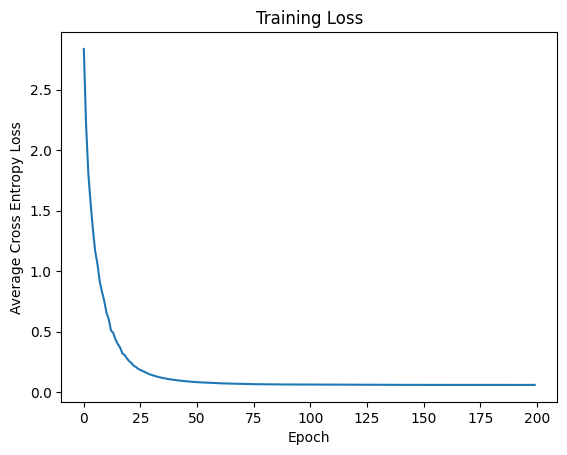

Test Accuracy: 0.778165086447295


In [ ]:
HIDDEN_SIZE = 128
GRADIENT_STEPS = 200
n_features = X_MNIST_normalized.shape[-1]
X_MNIST_normalized_cp = cp.asarray(X_MNIST_normalized)

mlp5 = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)
opt5 = GradientDescentOptimizer(lr=0.05)
opt5.attach_network(mlp5)

mlp5.fit(opt5, X=X_MNIST_normalized_cp, y=train_label, epochs=GRADIENT_STEPS, batch_size=200)

test_prediction = mlp5.predict(cp.asarray(y_MNIST_normalized))
test_accuracy_score = mlp5.evaluate_acc(cp.asarray(test_prediction), cp.asarray(test_label))

# Print the test accuracy score with the current parameters
print(f"Test Accuracy: {test_accuracy_score}")

This is the third test, but this time with 256 hidden units

  0%|          | 1/200 [00:02<07:47,  2.35s/it]

Epoch 1/200, Loss: 2.8013, Training Accuracy: 0.1937, Testing Accuracy: 0.1701


  1%|          | 2/200 [00:03<06:23,  1.93s/it]

Epoch 2/200, Loss: 2.1487, Training Accuracy: 0.3107, Testing Accuracy: 0.2475


  2%|▏         | 3/200 [00:05<05:54,  1.80s/it]

Epoch 3/200, Loss: 1.7063, Training Accuracy: 0.4829, Testing Accuracy: 0.4610


  2%|▏         | 4/200 [00:07<05:41,  1.74s/it]

Epoch 4/200, Loss: 1.4417, Training Accuracy: 0.5168, Testing Accuracy: 0.4405


  2%|▎         | 5/200 [00:08<05:32,  1.71s/it]

Epoch 5/200, Loss: 1.2759, Training Accuracy: 0.6097, Testing Accuracy: 0.4925


  3%|▎         | 6/200 [00:10<05:27,  1.69s/it]

Epoch 6/200, Loss: 1.0412, Training Accuracy: 0.5645, Testing Accuracy: 0.4308


  4%|▎         | 7/200 [00:12<05:23,  1.67s/it]

Epoch 7/200, Loss: 0.9576, Training Accuracy: 0.7434, Testing Accuracy: 0.6521


  4%|▍         | 8/200 [00:13<05:19,  1.67s/it]

Epoch 8/200, Loss: 0.8204, Training Accuracy: 0.6647, Testing Accuracy: 0.5523


  4%|▍         | 9/200 [00:15<05:17,  1.66s/it]

Epoch 9/200, Loss: 0.7294, Training Accuracy: 0.7742, Testing Accuracy: 0.6326


  5%|▌         | 10/200 [00:17<05:15,  1.66s/it]

Epoch 10/200, Loss: 0.6594, Training Accuracy: 0.7980, Testing Accuracy: 0.6822


  6%|▌         | 11/200 [00:18<05:13,  1.66s/it]

Epoch 11/200, Loss: 0.5545, Training Accuracy: 0.8187, Testing Accuracy: 0.6680


  6%|▌         | 12/200 [00:20<05:11,  1.66s/it]

Epoch 12/200, Loss: 0.5391, Training Accuracy: 0.7661, Testing Accuracy: 0.6598


  6%|▋         | 13/200 [00:22<05:09,  1.66s/it]

Epoch 13/200, Loss: 0.4414, Training Accuracy: 0.8410, Testing Accuracy: 0.7115


  7%|▋         | 14/200 [00:23<05:08,  1.66s/it]

Epoch 14/200, Loss: 0.4169, Training Accuracy: 0.7895, Testing Accuracy: 0.6433


  8%|▊         | 15/200 [00:25<05:06,  1.66s/it]

Epoch 15/200, Loss: 0.3716, Training Accuracy: 0.8610, Testing Accuracy: 0.7068


  8%|▊         | 16/200 [00:27<05:04,  1.66s/it]

Epoch 16/200, Loss: 0.3208, Training Accuracy: 0.9259, Testing Accuracy: 0.7397


  8%|▊         | 17/200 [00:28<05:03,  1.66s/it]

Epoch 17/200, Loss: 0.3047, Training Accuracy: 0.8665, Testing Accuracy: 0.7027


  9%|▉         | 18/200 [00:30<05:01,  1.66s/it]

Epoch 18/200, Loss: 0.2691, Training Accuracy: 0.8898, Testing Accuracy: 0.7079


 10%|▉         | 19/200 [00:32<04:59,  1.66s/it]

Epoch 19/200, Loss: 0.2475, Training Accuracy: 0.9269, Testing Accuracy: 0.7352


 10%|█         | 20/200 [00:33<04:57,  1.66s/it]

Epoch 20/200, Loss: 0.2235, Training Accuracy: 0.9540, Testing Accuracy: 0.7421


 10%|█         | 21/200 [00:35<04:56,  1.66s/it]

Epoch 21/200, Loss: 0.2091, Training Accuracy: 0.9590, Testing Accuracy: 0.7553


 11%|█         | 22/200 [00:37<04:54,  1.66s/it]

Epoch 22/200, Loss: 0.1919, Training Accuracy: 0.9701, Testing Accuracy: 0.7508


 12%|█▏        | 23/200 [00:38<04:52,  1.65s/it]

Epoch 23/200, Loss: 0.1771, Training Accuracy: 0.9371, Testing Accuracy: 0.7482


 12%|█▏        | 24/200 [00:40<04:51,  1.65s/it]

Epoch 24/200, Loss: 0.1660, Training Accuracy: 0.9737, Testing Accuracy: 0.7501


 12%|█▎        | 25/200 [00:41<04:49,  1.65s/it]

Epoch 25/200, Loss: 0.1531, Training Accuracy: 0.9832, Testing Accuracy: 0.7606


 13%|█▎        | 26/200 [00:43<04:47,  1.65s/it]

Epoch 26/200, Loss: 0.1453, Training Accuracy: 0.9517, Testing Accuracy: 0.7619


 14%|█▎        | 27/200 [00:45<04:45,  1.65s/it]

Epoch 27/200, Loss: 0.1380, Training Accuracy: 0.9802, Testing Accuracy: 0.7574


 14%|█▍        | 28/200 [00:46<04:43,  1.65s/it]

Epoch 28/200, Loss: 0.1299, Training Accuracy: 0.9836, Testing Accuracy: 0.7591


 14%|█▍        | 29/200 [00:48<04:42,  1.65s/it]

Epoch 29/200, Loss: 0.1242, Training Accuracy: 0.9894, Testing Accuracy: 0.7600


 15%|█▌        | 30/200 [00:50<04:40,  1.65s/it]

Epoch 30/200, Loss: 0.1180, Training Accuracy: 0.9763, Testing Accuracy: 0.7526


 16%|█▌        | 31/200 [00:51<04:38,  1.65s/it]

Epoch 31/200, Loss: 0.1131, Training Accuracy: 0.9857, Testing Accuracy: 0.7630


 16%|█▌        | 32/200 [00:53<04:36,  1.65s/it]

Epoch 32/200, Loss: 0.1076, Training Accuracy: 0.9946, Testing Accuracy: 0.7620


 16%|█▋        | 33/200 [00:55<04:35,  1.65s/it]

Epoch 33/200, Loss: 0.1037, Training Accuracy: 0.9723, Testing Accuracy: 0.7554


 17%|█▋        | 34/200 [00:56<04:33,  1.65s/it]

Epoch 34/200, Loss: 0.0999, Training Accuracy: 0.9940, Testing Accuracy: 0.7692


 18%|█▊        | 35/200 [00:58<04:32,  1.65s/it]

Epoch 35/200, Loss: 0.0963, Training Accuracy: 0.9948, Testing Accuracy: 0.7676


 18%|█▊        | 36/200 [01:00<04:37,  1.70s/it]

Epoch 36/200, Loss: 0.0933, Training Accuracy: 0.9919, Testing Accuracy: 0.7649


 18%|█▊        | 37/200 [01:02<04:40,  1.72s/it]

Epoch 37/200, Loss: 0.0902, Training Accuracy: 0.9957, Testing Accuracy: 0.7563


 19%|█▉        | 38/200 [01:03<04:35,  1.70s/it]

Epoch 38/200, Loss: 0.0875, Training Accuracy: 0.9948, Testing Accuracy: 0.7750


 20%|█▉        | 39/200 [01:05<04:30,  1.68s/it]

Epoch 39/200, Loss: 0.0855, Training Accuracy: 0.9954, Testing Accuracy: 0.7683


 20%|██        | 40/200 [01:07<04:27,  1.67s/it]

Epoch 40/200, Loss: 0.0831, Training Accuracy: 0.9971, Testing Accuracy: 0.7662


 20%|██        | 41/200 [01:08<04:24,  1.66s/it]

Epoch 41/200, Loss: 0.0809, Training Accuracy: 0.9917, Testing Accuracy: 0.7667


 21%|██        | 42/200 [01:10<04:22,  1.66s/it]

Epoch 42/200, Loss: 0.0792, Training Accuracy: 0.9964, Testing Accuracy: 0.7715


 22%|██▏       | 43/200 [01:11<04:19,  1.65s/it]

Epoch 43/200, Loss: 0.0776, Training Accuracy: 0.9955, Testing Accuracy: 0.7656


 22%|██▏       | 44/200 [01:13<04:17,  1.65s/it]

Epoch 44/200, Loss: 0.0757, Training Accuracy: 0.9972, Testing Accuracy: 0.7673


 22%|██▎       | 45/200 [01:15<04:15,  1.65s/it]

Epoch 45/200, Loss: 0.0741, Training Accuracy: 0.9979, Testing Accuracy: 0.7723


 23%|██▎       | 46/200 [01:16<04:14,  1.65s/it]

Epoch 46/200, Loss: 0.0726, Training Accuracy: 0.9984, Testing Accuracy: 0.7702


 24%|██▎       | 47/200 [01:18<04:12,  1.65s/it]

Epoch 47/200, Loss: 0.0713, Training Accuracy: 0.9981, Testing Accuracy: 0.7748


 24%|██▍       | 48/200 [01:20<04:10,  1.65s/it]

Epoch 48/200, Loss: 0.0701, Training Accuracy: 0.9984, Testing Accuracy: 0.7737


 24%|██▍       | 49/200 [01:21<04:08,  1.65s/it]

Epoch 49/200, Loss: 0.0692, Training Accuracy: 0.9988, Testing Accuracy: 0.7754


 25%|██▌       | 50/200 [01:23<04:06,  1.65s/it]

Epoch 50/200, Loss: 0.0681, Training Accuracy: 0.9989, Testing Accuracy: 0.7730


 26%|██▌       | 51/200 [01:25<04:05,  1.65s/it]

Epoch 51/200, Loss: 0.0670, Training Accuracy: 0.9988, Testing Accuracy: 0.7720


 26%|██▌       | 52/200 [01:26<04:03,  1.64s/it]

Epoch 52/200, Loss: 0.0660, Training Accuracy: 0.9984, Testing Accuracy: 0.7765


 26%|██▋       | 53/200 [01:28<04:01,  1.65s/it]

Epoch 53/200, Loss: 0.0652, Training Accuracy: 0.9995, Testing Accuracy: 0.7727


 27%|██▋       | 54/200 [01:30<04:00,  1.65s/it]

Epoch 54/200, Loss: 0.0643, Training Accuracy: 0.9991, Testing Accuracy: 0.7748


 28%|██▊       | 55/200 [01:31<03:58,  1.65s/it]

Epoch 55/200, Loss: 0.0637, Training Accuracy: 0.9986, Testing Accuracy: 0.7731


 28%|██▊       | 56/200 [01:33<03:56,  1.64s/it]

Epoch 56/200, Loss: 0.0629, Training Accuracy: 0.9987, Testing Accuracy: 0.7685


 28%|██▊       | 57/200 [01:34<03:55,  1.65s/it]

Epoch 57/200, Loss: 0.0624, Training Accuracy: 0.9982, Testing Accuracy: 0.7734


 29%|██▉       | 58/200 [01:36<03:53,  1.64s/it]

Epoch 58/200, Loss: 0.0617, Training Accuracy: 0.9995, Testing Accuracy: 0.7755


 30%|██▉       | 59/200 [01:38<03:51,  1.65s/it]

Epoch 59/200, Loss: 0.0612, Training Accuracy: 0.9989, Testing Accuracy: 0.7757


 30%|███       | 60/200 [01:39<03:50,  1.64s/it]

Epoch 60/200, Loss: 0.0606, Training Accuracy: 0.9996, Testing Accuracy: 0.7770


 30%|███       | 61/200 [01:41<03:48,  1.65s/it]

Epoch 61/200, Loss: 0.0600, Training Accuracy: 0.9995, Testing Accuracy: 0.7747


 31%|███       | 62/200 [01:43<03:47,  1.65s/it]

Epoch 62/200, Loss: 0.0593, Training Accuracy: 0.9992, Testing Accuracy: 0.7775


 32%|███▏      | 63/200 [01:44<03:45,  1.65s/it]

Epoch 63/200, Loss: 0.0590, Training Accuracy: 0.9996, Testing Accuracy: 0.7765


 32%|███▏      | 64/200 [01:46<03:43,  1.65s/it]

Epoch 64/200, Loss: 0.0584, Training Accuracy: 0.9994, Testing Accuracy: 0.7759


 32%|███▎      | 65/200 [01:48<03:42,  1.65s/it]

Epoch 65/200, Loss: 0.0582, Training Accuracy: 0.9996, Testing Accuracy: 0.7754


 33%|███▎      | 66/200 [01:49<03:40,  1.65s/it]

Epoch 66/200, Loss: 0.0576, Training Accuracy: 0.9994, Testing Accuracy: 0.7776


 34%|███▎      | 67/200 [01:51<03:39,  1.65s/it]

Epoch 67/200, Loss: 0.0573, Training Accuracy: 0.9996, Testing Accuracy: 0.7755


 34%|███▍      | 68/200 [01:53<03:37,  1.65s/it]

Epoch 68/200, Loss: 0.0569, Training Accuracy: 0.9996, Testing Accuracy: 0.7751


 34%|███▍      | 69/200 [01:54<03:35,  1.65s/it]

Epoch 69/200, Loss: 0.0566, Training Accuracy: 0.9993, Testing Accuracy: 0.7772


 35%|███▌      | 70/200 [01:56<03:34,  1.65s/it]

Epoch 70/200, Loss: 0.0562, Training Accuracy: 0.9996, Testing Accuracy: 0.7757


 36%|███▌      | 71/200 [01:58<03:33,  1.65s/it]

Epoch 71/200, Loss: 0.0559, Training Accuracy: 0.9998, Testing Accuracy: 0.7757


 36%|███▌      | 72/200 [01:59<03:31,  1.66s/it]

Epoch 72/200, Loss: 0.0556, Training Accuracy: 0.9997, Testing Accuracy: 0.7770


 36%|███▋      | 73/200 [02:01<03:30,  1.66s/it]

Epoch 73/200, Loss: 0.0554, Training Accuracy: 0.9997, Testing Accuracy: 0.7755


 37%|███▋      | 74/200 [02:03<03:28,  1.66s/it]

Epoch 74/200, Loss: 0.0551, Training Accuracy: 0.9997, Testing Accuracy: 0.7769


 38%|███▊      | 75/200 [02:04<03:26,  1.66s/it]

Epoch 75/200, Loss: 0.0550, Training Accuracy: 0.9997, Testing Accuracy: 0.7775


 38%|███▊      | 76/200 [02:06<03:25,  1.66s/it]

Epoch 76/200, Loss: 0.0547, Training Accuracy: 0.9995, Testing Accuracy: 0.7797


 38%|███▊      | 77/200 [02:08<03:24,  1.66s/it]

Epoch 77/200, Loss: 0.0546, Training Accuracy: 0.9998, Testing Accuracy: 0.7744


 39%|███▉      | 78/200 [02:09<03:22,  1.66s/it]

Epoch 78/200, Loss: 0.0542, Training Accuracy: 0.9996, Testing Accuracy: 0.7764


 40%|███▉      | 79/200 [02:11<03:20,  1.66s/it]

Epoch 79/200, Loss: 0.0541, Training Accuracy: 0.9997, Testing Accuracy: 0.7770


 40%|████      | 80/200 [02:13<03:18,  1.66s/it]

Epoch 80/200, Loss: 0.0537, Training Accuracy: 0.9998, Testing Accuracy: 0.7764


 40%|████      | 81/200 [02:14<03:17,  1.66s/it]

Epoch 81/200, Loss: 0.0536, Training Accuracy: 0.9999, Testing Accuracy: 0.7766


 41%|████      | 82/200 [02:16<03:15,  1.65s/it]

Epoch 82/200, Loss: 0.0535, Training Accuracy: 0.9999, Testing Accuracy: 0.7779


 42%|████▏     | 83/200 [02:17<03:13,  1.65s/it]

Epoch 83/200, Loss: 0.0533, Training Accuracy: 0.9997, Testing Accuracy: 0.7779


 42%|████▏     | 84/200 [02:19<03:11,  1.65s/it]

Epoch 84/200, Loss: 0.0531, Training Accuracy: 0.9997, Testing Accuracy: 0.7759


 42%|████▎     | 85/200 [02:21<03:09,  1.65s/it]

Epoch 85/200, Loss: 0.0530, Training Accuracy: 0.9997, Testing Accuracy: 0.7776


 43%|████▎     | 86/200 [02:22<03:08,  1.65s/it]

Epoch 86/200, Loss: 0.0529, Training Accuracy: 0.9997, Testing Accuracy: 0.7798


 44%|████▎     | 87/200 [02:24<03:06,  1.65s/it]

Epoch 87/200, Loss: 0.0527, Training Accuracy: 0.9997, Testing Accuracy: 0.7770


 44%|████▍     | 88/200 [02:26<03:04,  1.65s/it]

Epoch 88/200, Loss: 0.0526, Training Accuracy: 0.9998, Testing Accuracy: 0.7775


 44%|████▍     | 89/200 [02:27<03:02,  1.65s/it]

Epoch 89/200, Loss: 0.0524, Training Accuracy: 0.9997, Testing Accuracy: 0.7793


 45%|████▌     | 90/200 [02:29<03:01,  1.65s/it]

Epoch 90/200, Loss: 0.0523, Training Accuracy: 0.9997, Testing Accuracy: 0.7773


 46%|████▌     | 91/200 [02:31<02:59,  1.65s/it]

Epoch 91/200, Loss: 0.0521, Training Accuracy: 0.9997, Testing Accuracy: 0.7770


 46%|████▌     | 92/200 [02:32<02:57,  1.65s/it]

Epoch 92/200, Loss: 0.0520, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 46%|████▋     | 93/200 [02:34<02:56,  1.65s/it]

Epoch 93/200, Loss: 0.0519, Training Accuracy: 0.9998, Testing Accuracy: 0.7776


 47%|████▋     | 94/200 [02:36<02:54,  1.65s/it]

Epoch 94/200, Loss: 0.0519, Training Accuracy: 0.9997, Testing Accuracy: 0.7779


 48%|████▊     | 95/200 [02:37<02:52,  1.65s/it]

Epoch 95/200, Loss: 0.0517, Training Accuracy: 0.9997, Testing Accuracy: 0.7773


 48%|████▊     | 96/200 [02:39<02:51,  1.65s/it]

Epoch 96/200, Loss: 0.0516, Training Accuracy: 0.9998, Testing Accuracy: 0.7776


 48%|████▊     | 97/200 [02:41<02:49,  1.65s/it]

Epoch 97/200, Loss: 0.0516, Training Accuracy: 0.9998, Testing Accuracy: 0.7780


 49%|████▉     | 98/200 [02:42<02:48,  1.65s/it]

Epoch 98/200, Loss: 0.0514, Training Accuracy: 0.9997, Testing Accuracy: 0.7777


 50%|████▉     | 99/200 [02:44<02:46,  1.65s/it]

Epoch 99/200, Loss: 0.0514, Training Accuracy: 0.9997, Testing Accuracy: 0.7768


 50%|█████     | 100/200 [02:45<02:44,  1.65s/it]

Epoch 100/200, Loss: 0.0513, Training Accuracy: 0.9998, Testing Accuracy: 0.7780


 50%|█████     | 101/200 [02:48<02:59,  1.81s/it]

Epoch 101/200, Loss: 0.0512, Training Accuracy: 0.9998, Testing Accuracy: 0.7794


 51%|█████     | 102/200 [02:49<02:53,  1.77s/it]

Epoch 102/200, Loss: 0.0512, Training Accuracy: 0.9998, Testing Accuracy: 0.7779


 52%|█████▏    | 103/200 [02:51<02:47,  1.73s/it]

Epoch 103/200, Loss: 0.0511, Training Accuracy: 0.9997, Testing Accuracy: 0.7775


 52%|█████▏    | 104/200 [02:53<02:43,  1.71s/it]

Epoch 104/200, Loss: 0.0510, Training Accuracy: 0.9997, Testing Accuracy: 0.7780


 52%|█████▎    | 105/200 [02:54<02:40,  1.69s/it]

Epoch 105/200, Loss: 0.0511, Training Accuracy: 0.9998, Testing Accuracy: 0.7777


 53%|█████▎    | 106/200 [02:56<02:37,  1.68s/it]

Epoch 106/200, Loss: 0.0508, Training Accuracy: 0.9997, Testing Accuracy: 0.7784


 54%|█████▎    | 107/200 [02:58<02:35,  1.67s/it]

Epoch 107/200, Loss: 0.0508, Training Accuracy: 0.9997, Testing Accuracy: 0.7776


 54%|█████▍    | 108/200 [02:59<02:33,  1.67s/it]

Epoch 108/200, Loss: 0.0508, Training Accuracy: 0.9997, Testing Accuracy: 0.7780


 55%|█████▍    | 109/200 [03:01<02:31,  1.66s/it]

Epoch 109/200, Loss: 0.0508, Training Accuracy: 0.9998, Testing Accuracy: 0.7773


 55%|█████▌    | 110/200 [03:03<02:29,  1.66s/it]

Epoch 110/200, Loss: 0.0507, Training Accuracy: 0.9997, Testing Accuracy: 0.7782


 56%|█████▌    | 111/200 [03:04<02:27,  1.66s/it]

Epoch 111/200, Loss: 0.0506, Training Accuracy: 0.9997, Testing Accuracy: 0.7772


 56%|█████▌    | 112/200 [03:06<02:25,  1.65s/it]

Epoch 112/200, Loss: 0.0507, Training Accuracy: 0.9997, Testing Accuracy: 0.7777


 56%|█████▋    | 113/200 [03:07<02:23,  1.65s/it]

Epoch 113/200, Loss: 0.0505, Training Accuracy: 0.9997, Testing Accuracy: 0.7776


 57%|█████▋    | 114/200 [03:09<02:22,  1.65s/it]

Epoch 114/200, Loss: 0.0506, Training Accuracy: 0.9998, Testing Accuracy: 0.7775


 57%|█████▊    | 115/200 [03:11<02:20,  1.65s/it]

Epoch 115/200, Loss: 0.0505, Training Accuracy: 0.9998, Testing Accuracy: 0.7776


 58%|█████▊    | 116/200 [03:12<02:18,  1.65s/it]

Epoch 116/200, Loss: 0.0505, Training Accuracy: 0.9998, Testing Accuracy: 0.7784


 58%|█████▊    | 117/200 [03:14<02:17,  1.65s/it]

Epoch 117/200, Loss: 0.0503, Training Accuracy: 0.9998, Testing Accuracy: 0.7779


 59%|█████▉    | 118/200 [03:16<02:15,  1.65s/it]

Epoch 118/200, Loss: 0.0504, Training Accuracy: 0.9997, Testing Accuracy: 0.7776


 60%|█████▉    | 119/200 [03:17<02:13,  1.65s/it]

Epoch 119/200, Loss: 0.0503, Training Accuracy: 0.9997, Testing Accuracy: 0.7777


 60%|██████    | 120/200 [03:19<02:12,  1.65s/it]

Epoch 120/200, Loss: 0.0503, Training Accuracy: 0.9997, Testing Accuracy: 0.7779


 60%|██████    | 121/200 [03:21<02:11,  1.66s/it]

Epoch 121/200, Loss: 0.0503, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 61%|██████    | 122/200 [03:22<02:11,  1.69s/it]

Epoch 122/200, Loss: 0.0502, Training Accuracy: 0.9998, Testing Accuracy: 0.7779


 62%|██████▏   | 123/200 [03:24<02:09,  1.68s/it]

Epoch 123/200, Loss: 0.0503, Training Accuracy: 0.9998, Testing Accuracy: 0.7776


 62%|██████▏   | 124/200 [03:26<02:07,  1.67s/it]

Epoch 124/200, Loss: 0.0503, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 62%|██████▎   | 125/200 [03:27<02:05,  1.67s/it]

Epoch 125/200, Loss: 0.0502, Training Accuracy: 0.9998, Testing Accuracy: 0.7777


 63%|██████▎   | 126/200 [03:29<02:03,  1.67s/it]

Epoch 126/200, Loss: 0.0501, Training Accuracy: 0.9998, Testing Accuracy: 0.7780


 64%|██████▎   | 127/200 [03:31<02:01,  1.66s/it]

Epoch 127/200, Loss: 0.0502, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 64%|██████▍   | 128/200 [03:32<01:59,  1.66s/it]

Epoch 128/200, Loss: 0.0502, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 64%|██████▍   | 129/200 [03:34<01:57,  1.66s/it]

Epoch 129/200, Loss: 0.0501, Training Accuracy: 0.9997, Testing Accuracy: 0.7777


 65%|██████▌   | 130/200 [03:36<01:55,  1.65s/it]

Epoch 130/200, Loss: 0.0500, Training Accuracy: 0.9997, Testing Accuracy: 0.7783


 66%|██████▌   | 131/200 [03:37<01:54,  1.65s/it]

Epoch 131/200, Loss: 0.0500, Training Accuracy: 0.9997, Testing Accuracy: 0.7780


 66%|██████▌   | 132/200 [03:39<01:52,  1.65s/it]

Epoch 132/200, Loss: 0.0500, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 66%|██████▋   | 133/200 [03:41<01:50,  1.65s/it]

Epoch 133/200, Loss: 0.0502, Training Accuracy: 0.9998, Testing Accuracy: 0.7780


 67%|██████▋   | 134/200 [03:42<01:48,  1.65s/it]

Epoch 134/200, Loss: 0.0501, Training Accuracy: 0.9998, Testing Accuracy: 0.7784


 68%|██████▊   | 135/200 [03:44<01:47,  1.65s/it]

Epoch 135/200, Loss: 0.0500, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 68%|██████▊   | 136/200 [03:46<01:45,  1.65s/it]

Epoch 136/200, Loss: 0.0500, Training Accuracy: 0.9998, Testing Accuracy: 0.7780


 68%|██████▊   | 137/200 [03:47<01:43,  1.65s/it]

Epoch 137/200, Loss: 0.0499, Training Accuracy: 0.9998, Testing Accuracy: 0.7779


 69%|██████▉   | 138/200 [03:49<01:42,  1.65s/it]

Epoch 138/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 70%|██████▉   | 139/200 [03:51<01:40,  1.65s/it]

Epoch 139/200, Loss: 0.0499, Training Accuracy: 0.9998, Testing Accuracy: 0.7780


 70%|███████   | 140/200 [03:52<01:38,  1.65s/it]

Epoch 140/200, Loss: 0.0500, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 70%|███████   | 141/200 [03:54<01:37,  1.65s/it]

Epoch 141/200, Loss: 0.0499, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 71%|███████   | 142/200 [03:56<01:35,  1.65s/it]

Epoch 142/200, Loss: 0.0499, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 72%|███████▏  | 143/200 [03:57<01:33,  1.65s/it]

Epoch 143/200, Loss: 0.0499, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 72%|███████▏  | 144/200 [03:59<01:32,  1.65s/it]

Epoch 144/200, Loss: 0.0499, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 72%|███████▎  | 145/200 [04:00<01:30,  1.65s/it]

Epoch 145/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7780


 73%|███████▎  | 146/200 [04:02<01:28,  1.65s/it]

Epoch 146/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 74%|███████▎  | 147/200 [04:04<01:27,  1.65s/it]

Epoch 147/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 74%|███████▍  | 148/200 [04:05<01:25,  1.65s/it]

Epoch 148/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 74%|███████▍  | 149/200 [04:07<01:23,  1.65s/it]

Epoch 149/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 75%|███████▌  | 150/200 [04:09<01:22,  1.65s/it]

Epoch 150/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 76%|███████▌  | 151/200 [04:10<01:20,  1.65s/it]

Epoch 151/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7784


 76%|███████▌  | 152/200 [04:12<01:19,  1.65s/it]

Epoch 152/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 76%|███████▋  | 153/200 [04:14<01:17,  1.65s/it]

Epoch 153/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 77%|███████▋  | 154/200 [04:15<01:15,  1.65s/it]

Epoch 154/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 78%|███████▊  | 155/200 [04:17<01:14,  1.65s/it]

Epoch 155/200, Loss: 0.0499, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 78%|███████▊  | 156/200 [04:19<01:12,  1.65s/it]

Epoch 156/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7783


 78%|███████▊  | 157/200 [04:20<01:10,  1.65s/it]

Epoch 157/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7784


 79%|███████▉  | 158/200 [04:22<01:09,  1.65s/it]

Epoch 158/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 80%|███████▉  | 159/200 [04:24<01:07,  1.65s/it]

Epoch 159/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7784


 80%|████████  | 160/200 [04:25<01:05,  1.65s/it]

Epoch 160/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7784


 80%|████████  | 161/200 [04:27<01:04,  1.65s/it]

Epoch 161/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 81%|████████  | 162/200 [04:28<01:02,  1.65s/it]

Epoch 162/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 82%|████████▏ | 163/200 [04:30<01:00,  1.65s/it]

Epoch 163/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7784


 82%|████████▏ | 164/200 [04:32<00:59,  1.65s/it]

Epoch 164/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7780


 82%|████████▎ | 165/200 [04:33<00:57,  1.65s/it]

Epoch 165/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7780


 83%|████████▎ | 166/200 [04:35<00:56,  1.65s/it]

Epoch 166/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 84%|████████▎ | 167/200 [04:37<00:54,  1.65s/it]

Epoch 167/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 84%|████████▍ | 168/200 [04:38<00:52,  1.65s/it]

Epoch 168/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 84%|████████▍ | 169/200 [04:40<00:51,  1.65s/it]

Epoch 169/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 85%|████████▌ | 170/200 [04:42<00:49,  1.65s/it]

Epoch 170/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 86%|████████▌ | 171/200 [04:43<00:47,  1.65s/it]

Epoch 171/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 86%|████████▌ | 172/200 [04:45<00:46,  1.65s/it]

Epoch 172/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 86%|████████▋ | 173/200 [04:47<00:44,  1.65s/it]

Epoch 173/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 87%|████████▋ | 174/200 [04:48<00:42,  1.65s/it]

Epoch 174/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 88%|████████▊ | 175/200 [04:50<00:41,  1.65s/it]

Epoch 175/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 88%|████████▊ | 176/200 [04:52<00:39,  1.65s/it]

Epoch 176/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 88%|████████▊ | 177/200 [04:53<00:37,  1.65s/it]

Epoch 177/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 89%|████████▉ | 178/200 [04:55<00:36,  1.65s/it]

Epoch 178/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 90%|████████▉ | 179/200 [04:56<00:34,  1.65s/it]

Epoch 179/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 90%|█████████ | 180/200 [04:58<00:32,  1.65s/it]

Epoch 180/200, Loss: 0.0496, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 90%|█████████ | 181/200 [05:00<00:31,  1.65s/it]

Epoch 181/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 91%|█████████ | 182/200 [05:01<00:29,  1.65s/it]

Epoch 182/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 92%|█████████▏| 183/200 [05:03<00:28,  1.65s/it]

Epoch 183/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 92%|█████████▏| 184/200 [05:05<00:26,  1.65s/it]

Epoch 184/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 92%|█████████▎| 185/200 [05:06<00:24,  1.65s/it]

Epoch 185/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 93%|█████████▎| 186/200 [05:08<00:23,  1.65s/it]

Epoch 186/200, Loss: 0.0498, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 94%|█████████▎| 187/200 [05:10<00:21,  1.65s/it]

Epoch 187/200, Loss: 0.0496, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 94%|█████████▍| 188/200 [05:11<00:19,  1.65s/it]

Epoch 188/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 94%|█████████▍| 189/200 [05:13<00:18,  1.65s/it]

Epoch 189/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 95%|█████████▌| 190/200 [05:15<00:16,  1.65s/it]

Epoch 190/200, Loss: 0.0496, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 96%|█████████▌| 191/200 [05:16<00:14,  1.65s/it]

Epoch 191/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 96%|█████████▌| 192/200 [05:18<00:13,  1.65s/it]

Epoch 192/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 96%|█████████▋| 193/200 [05:20<00:11,  1.65s/it]

Epoch 193/200, Loss: 0.0496, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 97%|█████████▋| 194/200 [05:21<00:09,  1.65s/it]

Epoch 194/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 98%|█████████▊| 195/200 [05:23<00:08,  1.65s/it]

Epoch 195/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 98%|█████████▊| 196/200 [05:25<00:06,  1.65s/it]

Epoch 196/200, Loss: 0.0496, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 98%|█████████▊| 197/200 [05:26<00:04,  1.65s/it]

Epoch 197/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


 99%|█████████▉| 198/200 [05:28<00:03,  1.65s/it]

Epoch 198/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


100%|█████████▉| 199/200 [05:29<00:01,  1.65s/it]

Epoch 199/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


100%|██████████| 200/200 [05:31<00:00,  1.66s/it]

Epoch 200/200, Loss: 0.0497, Training Accuracy: 0.9998, Testing Accuracy: 0.7782


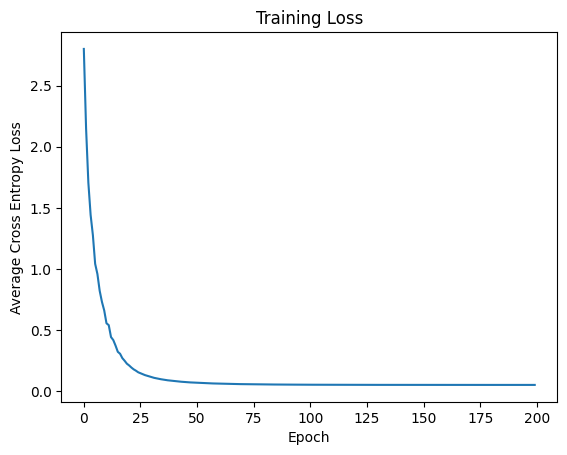

Test Accuracy: 0.778165086447295


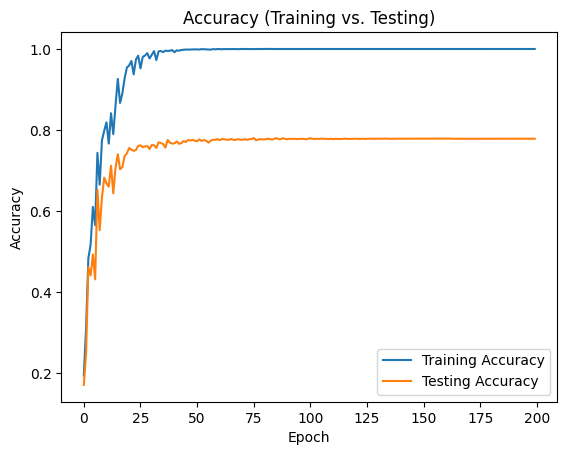

In [ ]:
HIDDEN_SIZE = 256
GRADIENT_STEPS = 200
n_features = X_MNIST_normalized.shape[-1]
X_MNIST_normalized_cp = cp.asarray(X_MNIST_normalized)

mlp6 = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)
opt6 = GradientDescentOptimizer(lr=0.05)
opt6.attach_network(mlp6)

mlp6.fit(opt6, X=X_MNIST_normalized_cp, y=train_label, epochs=GRADIENT_STEPS, batch_size=200, X_test=y_MNIST_normalized, y_test=test_label)

test_prediction = mlp6.predict(cp.asarray(y_MNIST_normalized))
test_accuracy_score = mlp6.evaluate_acc(cp.asarray(test_prediction), cp.asarray(test_label))

# Print the test accuracy score with the current parameters
print(f"Test Accuracy: {test_accuracy_score}")

In [ ]:
HIDDEN_SIZE = 512
GRADIENT_STEPS = 60
n_features = X_MNIST_normalized.shape[-1]
X_MNIST_normalized_cp = cp.asarray(X_MNIST_normalized)

mlp6 = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)
opt6 = GradientDescentOptimizer(lr=0.10, decay_steps=5)
opt6.attach_network(mlp6)

mlp6.fit(opt6, X=X_MNIST_normalized_cp, y=train_label, epochs=GRADIENT_STEPS, batch_size=200, X_test=y_MNIST_normalized, y_test=test_label)

test_prediction = mlp6.predict(cp.asarray(y_MNIST_normalized))
test_accuracy_score = mlp6.evaluate_acc(cp.asarray(test_prediction), cp.asarray(test_label))

# Print the test accuracy score with the current parameters
print(f"Test Accuracy: {test_accuracy_score}")

  2%|▏         | 1/60 [00:04<04:01,  4.09s/it]

Epoch 1/60, Loss: 3.2094, Training Accuracy: 0.1853, Testing Accuracy: 0.1644


  3%|▎         | 2/60 [00:08<03:56,  4.07s/it]

Epoch 2/60, Loss: 3.0369, Training Accuracy: 0.1855, Testing Accuracy: 0.1645


  5%|▌         | 3/60 [00:12<03:51,  4.07s/it]

Epoch 3/60, Loss: 3.0370, Training Accuracy: 0.1855, Testing Accuracy: 0.1645


  7%|▋         | 4/60 [00:16<03:47,  4.07s/it]

Epoch 4/60, Loss: 3.0375, Training Accuracy: 0.1855, Testing Accuracy: 0.1645


  8%|▊         | 5/60 [00:20<03:43,  4.07s/it]

Epoch 5/60, Loss: 3.0371, Training Accuracy: 0.1855, Testing Accuracy: 0.1645


 10%|█         | 6/60 [00:24<03:39,  4.06s/it]

Epoch 6/60, Loss: 3.0370, Training Accuracy: 0.1855, Testing Accuracy: 0.1645


 12%|█▏        | 7/60 [00:28<03:35,  4.07s/it]

Epoch 7/60, Loss: 3.0369, Training Accuracy: 0.1855, Testing Accuracy: 0.1645


 12%|█▏        | 7/60 [00:31<03:56,  4.47s/it]


KeyboardInterrupt: 

# Setting up 2 layer MLP with L2 Regularization

In [ ]:
#I change the hidden size and lr to match the optimal ones obtained before from the parameter search grid
#HIDDEN_SIZE = 32
HIDDEN_SIZE = 128
GRADIENT_STEPS = 200
n_features = X_MNIST_normalized.shape[-1]

mlp3 = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ActivationLayer(),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)
opt3 = GradientDescentOptimizer(lr=0.07, lambda_reg=.01)
opt3.attach_network(mlp3)

mlp3.fit(opt3, X=X_train, y=y_train, epochs=GRADIENT_STEPS, batch_size=200) # I should use an adaptive learning rate because the loss becomes nan
prediction = mlp3.predict(X_test)
accuracy_score = mlp3.evaluate_acc(prediction, y_test)
print(accuracy_score)

  0%|          | 1/200 [00:00<00:50,  3.96it/s]

Epoch 1/200, Loss: 3.1441


  1%|          | 2/200 [00:00<00:50,  3.92it/s]

Epoch 2/200, Loss: 2.8245


  2%|▏         | 3/200 [00:00<00:51,  3.86it/s]

Epoch 3/200, Loss: 2.5698


  2%|▏         | 4/200 [00:01<00:50,  3.87it/s]

Epoch 4/200, Loss: 2.3182


  2%|▎         | 5/200 [00:01<00:50,  3.85it/s]

Epoch 5/200, Loss: 2.1699


  3%|▎         | 6/200 [00:01<00:49,  3.90it/s]

Epoch 6/200, Loss: 2.0282


  4%|▎         | 7/200 [00:01<00:49,  3.87it/s]

Epoch 7/200, Loss: 1.8551


  4%|▍         | 8/200 [00:02<00:49,  3.86it/s]

Epoch 8/200, Loss: 1.7958


  4%|▍         | 9/200 [00:02<00:49,  3.83it/s]

Epoch 9/200, Loss: 1.7438


  5%|▌         | 10/200 [00:02<00:49,  3.85it/s]

Epoch 10/200, Loss: 1.6205


  6%|▌         | 11/200 [00:02<00:49,  3.82it/s]

Epoch 11/200, Loss: 1.5902


  6%|▌         | 12/200 [00:03<00:48,  3.85it/s]

Epoch 12/200, Loss: 1.5779


  6%|▋         | 13/200 [00:03<00:47,  3.91it/s]

Epoch 13/200, Loss: 1.4677


  7%|▋         | 14/200 [00:03<00:47,  3.91it/s]

Epoch 14/200, Loss: 1.4264


  8%|▊         | 15/200 [00:03<00:54,  3.39it/s]

Epoch 15/200, Loss: 1.4277


  8%|▊         | 16/200 [00:04<00:58,  3.16it/s]

Epoch 16/200, Loss: 1.3186


  8%|▊         | 17/200 [00:04<01:00,  3.03it/s]

Epoch 17/200, Loss: 1.3132


  9%|▉         | 18/200 [00:05<01:01,  2.94it/s]

Epoch 18/200, Loss: 1.2683


 10%|▉         | 19/200 [00:05<01:04,  2.81it/s]

Epoch 19/200, Loss: 1.2239


 10%|█         | 20/200 [00:05<01:07,  2.66it/s]

Epoch 20/200, Loss: 1.2268


 10%|█         | 21/200 [00:06<01:09,  2.57it/s]

Epoch 21/200, Loss: 1.1887


 11%|█         | 22/200 [00:06<01:05,  2.72it/s]

Epoch 22/200, Loss: 1.1532


 12%|█▏        | 23/200 [00:06<00:59,  2.98it/s]

Epoch 23/200, Loss: 1.1153


 12%|█▏        | 24/200 [00:07<00:54,  3.21it/s]

Epoch 24/200, Loss: 1.1399


 12%|█▎        | 25/200 [00:07<00:51,  3.37it/s]

Epoch 25/200, Loss: 1.0980


 13%|█▎        | 26/200 [00:07<00:49,  3.52it/s]

Epoch 26/200, Loss: 1.0577


 14%|█▎        | 27/200 [00:07<00:47,  3.61it/s]

Epoch 27/200, Loss: 1.0590


 14%|█▍        | 28/200 [00:08<00:46,  3.67it/s]

Epoch 28/200, Loss: 1.0302


 14%|█▍        | 29/200 [00:08<00:46,  3.71it/s]

Epoch 29/200, Loss: 1.0207


 15%|█▌        | 30/200 [00:08<00:45,  3.75it/s]

Epoch 30/200, Loss: 1.0034


 16%|█▌        | 31/200 [00:08<00:44,  3.78it/s]

Epoch 31/200, Loss: 0.9752


 16%|█▌        | 32/200 [00:09<00:44,  3.80it/s]

Epoch 32/200, Loss: 0.9746


 16%|█▋        | 33/200 [00:09<00:43,  3.85it/s]

Epoch 33/200, Loss: 0.9668


 17%|█▋        | 34/200 [00:09<00:42,  3.92it/s]

Epoch 34/200, Loss: 0.9598


 18%|█▊        | 35/200 [00:09<00:42,  3.90it/s]

Epoch 35/200, Loss: 0.9410


 18%|█▊        | 36/200 [00:10<00:41,  3.91it/s]

Epoch 36/200, Loss: 0.9269


 18%|█▊        | 37/200 [00:10<00:41,  3.88it/s]

Epoch 37/200, Loss: 0.9256


 19%|█▉        | 38/200 [00:10<00:41,  3.91it/s]

Epoch 38/200, Loss: 0.9067


 20%|█▉        | 39/200 [00:11<00:41,  3.86it/s]

Epoch 39/200, Loss: 0.9099


 20%|██        | 40/200 [00:11<00:41,  3.88it/s]

Epoch 40/200, Loss: 0.8952


 20%|██        | 41/200 [00:11<00:40,  3.91it/s]

Epoch 41/200, Loss: 0.8857


 21%|██        | 42/200 [00:11<00:40,  3.94it/s]

Epoch 42/200, Loss: 0.8812


 22%|██▏       | 43/200 [00:12<00:40,  3.88it/s]

Epoch 43/200, Loss: 0.8714


 22%|██▏       | 44/200 [00:12<00:40,  3.89it/s]

Epoch 44/200, Loss: 0.8636


 22%|██▎       | 45/200 [00:12<00:40,  3.87it/s]

Epoch 45/200, Loss: 0.8591


 23%|██▎       | 46/200 [00:12<00:39,  3.88it/s]

Epoch 46/200, Loss: 0.8506


 24%|██▎       | 47/200 [00:13<00:39,  3.86it/s]

Epoch 47/200, Loss: 0.8476


 24%|██▍       | 48/200 [00:13<00:39,  3.88it/s]

Epoch 48/200, Loss: 0.8444


 24%|██▍       | 49/200 [00:13<00:38,  3.89it/s]

Epoch 49/200, Loss: 0.8389


 25%|██▌       | 50/200 [00:13<00:38,  3.87it/s]

Epoch 50/200, Loss: 0.8333


 26%|██▌       | 51/200 [00:14<00:39,  3.81it/s]

Epoch 51/200, Loss: 0.8291


 26%|██▌       | 52/200 [00:14<00:38,  3.83it/s]

Epoch 52/200, Loss: 0.8271


 26%|██▋       | 53/200 [00:14<00:38,  3.80it/s]

Epoch 53/200, Loss: 0.8233


 27%|██▋       | 54/200 [00:14<00:38,  3.83it/s]

Epoch 54/200, Loss: 0.8196


 28%|██▊       | 55/200 [00:15<00:38,  3.72it/s]

Epoch 55/200, Loss: 0.8161


 28%|██▊       | 56/200 [00:15<00:38,  3.78it/s]

Epoch 56/200, Loss: 0.8103


 28%|██▊       | 57/200 [00:15<00:37,  3.78it/s]

Epoch 57/200, Loss: 0.8102


 29%|██▉       | 58/200 [00:15<00:37,  3.80it/s]

Epoch 58/200, Loss: 0.8054


 30%|██▉       | 59/200 [00:16<00:37,  3.73it/s]

Epoch 59/200, Loss: 0.8023


 30%|███       | 60/200 [00:16<00:39,  3.57it/s]

Epoch 60/200, Loss: 0.8012


 30%|███       | 61/200 [00:16<00:42,  3.26it/s]

Epoch 61/200, Loss: 0.7972


 31%|███       | 62/200 [00:17<00:45,  3.06it/s]

Epoch 62/200, Loss: 0.7940


 32%|███▏      | 63/200 [00:17<00:45,  3.03it/s]

Epoch 63/200, Loss: 0.7924


 32%|███▏      | 64/200 [00:18<00:46,  2.91it/s]

Epoch 64/200, Loss: 0.7903


 32%|███▎      | 65/200 [00:18<00:49,  2.75it/s]

Epoch 65/200, Loss: 0.7878


 33%|███▎      | 66/200 [00:18<00:50,  2.67it/s]

Epoch 66/200, Loss: 0.7860


 34%|███▎      | 67/200 [00:19<00:51,  2.59it/s]

Epoch 67/200, Loss: 0.7837


 34%|███▍      | 68/200 [00:19<00:46,  2.85it/s]

Epoch 68/200, Loss: 0.7822


 34%|███▍      | 69/200 [00:19<00:42,  3.06it/s]

Epoch 69/200, Loss: 0.7800


 35%|███▌      | 70/200 [00:20<00:39,  3.28it/s]

Epoch 70/200, Loss: 0.7785


 36%|███▌      | 71/200 [00:20<00:38,  3.39it/s]

Epoch 71/200, Loss: 0.7770


 36%|███▌      | 72/200 [00:20<00:36,  3.52it/s]

Epoch 72/200, Loss: 0.7754


 36%|███▋      | 73/200 [00:20<00:34,  3.63it/s]

Epoch 73/200, Loss: 0.7743


 37%|███▋      | 74/200 [00:21<00:33,  3.71it/s]

Epoch 74/200, Loss: 0.7723


 38%|███▊      | 75/200 [00:21<00:34,  3.67it/s]

Epoch 75/200, Loss: 0.7708


 38%|███▊      | 76/200 [00:21<00:33,  3.75it/s]

Epoch 76/200, Loss: 0.7693


 38%|███▊      | 77/200 [00:21<00:32,  3.80it/s]

Epoch 77/200, Loss: 0.7682


 39%|███▉      | 78/200 [00:22<00:32,  3.80it/s]

Epoch 78/200, Loss: 0.7671


 40%|███▉      | 79/200 [00:22<00:31,  3.79it/s]

Epoch 79/200, Loss: 0.7658


 40%|████      | 80/200 [00:22<00:31,  3.82it/s]

Epoch 80/200, Loss: 0.7642


 40%|████      | 81/200 [00:22<00:30,  3.88it/s]

Epoch 81/200, Loss: 0.7633


 41%|████      | 82/200 [00:23<00:33,  3.54it/s]

Epoch 82/200, Loss: 0.7626


KeyboardInterrupt: 

# Tuning the regularization hyperparameter

  0%|          | 1/200 [00:00<01:51,  1.79it/s]

Epoch 1/200, Loss: 2.9643


  1%|          | 2/200 [00:01<01:44,  1.90it/s]

Epoch 2/200, Loss: 2.4794


  2%|▏         | 3/200 [00:01<01:41,  1.93it/s]

Epoch 3/200, Loss: 2.1409


  2%|▏         | 4/200 [00:02<01:39,  1.97it/s]

Epoch 4/200, Loss: 1.8002


  2%|▎         | 5/200 [00:02<01:38,  1.98it/s]

Epoch 5/200, Loss: 1.6317


  3%|▎         | 6/200 [00:03<01:37,  1.99it/s]

Epoch 6/200, Loss: 1.4948


  4%|▎         | 7/200 [00:03<01:36,  2.00it/s]

Epoch 7/200, Loss: 1.2452


  4%|▍         | 8/200 [00:04<01:35,  2.01it/s]

Epoch 8/200, Loss: 1.2063


  4%|▍         | 9/200 [00:04<01:35,  2.01it/s]

Epoch 9/200, Loss: 1.0858


  5%|▌         | 10/200 [00:05<01:34,  2.01it/s]

Epoch 10/200, Loss: 0.9040


  6%|▌         | 11/200 [00:05<01:33,  2.02it/s]

Epoch 11/200, Loss: 0.8400


  6%|▌         | 12/200 [00:06<01:33,  2.02it/s]

Epoch 12/200, Loss: 0.8334


  6%|▋         | 13/200 [00:06<01:32,  2.02it/s]

Epoch 13/200, Loss: 0.6911


  7%|▋         | 14/200 [00:07<01:31,  2.02it/s]

Epoch 14/200, Loss: 0.6848


  8%|▊         | 15/200 [00:07<01:31,  2.02it/s]

Epoch 15/200, Loss: 0.6022


  8%|▊         | 16/200 [00:08<01:30,  2.02it/s]

Epoch 16/200, Loss: 0.5246


  8%|▊         | 17/200 [00:08<01:30,  2.02it/s]

Epoch 17/200, Loss: 0.5112


  9%|▉         | 18/200 [00:08<01:29,  2.03it/s]

Epoch 18/200, Loss: 0.4928


 10%|▉         | 19/200 [00:09<01:29,  2.02it/s]

Epoch 19/200, Loss: 0.4066


 10%|█         | 20/200 [00:09<01:28,  2.02it/s]

Epoch 20/200, Loss: 0.3784


 10%|█         | 21/200 [00:10<01:28,  2.03it/s]

Epoch 21/200, Loss: 0.3814


 11%|█         | 22/200 [00:10<01:27,  2.03it/s]

Epoch 22/200, Loss: 0.3302


 12%|█▏        | 23/200 [00:11<01:27,  2.02it/s]

Epoch 23/200, Loss: 0.3083


 12%|█▏        | 24/200 [00:11<01:26,  2.02it/s]

Epoch 24/200, Loss: 0.2881


 12%|█▎        | 25/200 [00:12<01:26,  2.02it/s]

Epoch 25/200, Loss: 0.2684


 13%|█▎        | 26/200 [00:12<01:25,  2.02it/s]

Epoch 26/200, Loss: 0.2460


 14%|█▎        | 27/200 [00:13<01:25,  2.02it/s]

Epoch 27/200, Loss: 0.2424


 14%|█▍        | 28/200 [00:13<01:24,  2.02it/s]

Epoch 28/200, Loss: 0.2178


 14%|█▍        | 29/200 [00:14<01:24,  2.02it/s]

Epoch 29/200, Loss: 0.2041


 15%|█▌        | 30/200 [00:14<01:24,  2.02it/s]

Epoch 30/200, Loss: 0.1962


 16%|█▌        | 31/200 [00:15<01:23,  2.02it/s]

Epoch 31/200, Loss: 0.1827


 16%|█▌        | 32/200 [00:15<01:23,  2.02it/s]

Epoch 32/200, Loss: 0.1735


 16%|█▋        | 33/200 [00:16<01:22,  2.02it/s]

Epoch 33/200, Loss: 0.1680


 17%|█▋        | 34/200 [00:16<01:22,  2.01it/s]

Epoch 34/200, Loss: 0.1568


 18%|█▊        | 35/200 [00:17<01:21,  2.01it/s]

Epoch 35/200, Loss: 0.1516


 18%|█▊        | 36/200 [00:17<01:21,  2.02it/s]

Epoch 36/200, Loss: 0.1461


 18%|█▊        | 37/200 [00:18<01:20,  2.02it/s]

Epoch 37/200, Loss: 0.1392


 19%|█▉        | 38/200 [00:18<01:20,  2.02it/s]

Epoch 38/200, Loss: 0.1352


 20%|█▉        | 39/200 [00:19<01:19,  2.02it/s]

Epoch 39/200, Loss: 0.1306


 20%|██        | 40/200 [00:19<01:19,  2.02it/s]

Epoch 40/200, Loss: 0.1240


 20%|██        | 41/200 [00:20<01:18,  2.02it/s]

Epoch 41/200, Loss: 0.1207


 21%|██        | 42/200 [00:20<01:18,  2.02it/s]

Epoch 42/200, Loss: 0.1177


 22%|██▏       | 43/200 [00:21<01:17,  2.02it/s]

Epoch 43/200, Loss: 0.1139


 22%|██▏       | 44/200 [00:21<01:17,  2.02it/s]

Epoch 44/200, Loss: 0.1109


 22%|██▎       | 45/200 [00:22<01:16,  2.02it/s]

Epoch 45/200, Loss: 0.1081


 23%|██▎       | 46/200 [00:22<01:16,  2.02it/s]

Epoch 46/200, Loss: 0.1052


 24%|██▎       | 47/200 [00:23<01:15,  2.02it/s]

Epoch 47/200, Loss: 0.1029


 24%|██▍       | 48/200 [00:23<01:15,  2.02it/s]

Epoch 48/200, Loss: 0.1012


 24%|██▍       | 49/200 [00:24<01:14,  2.02it/s]

Epoch 49/200, Loss: 0.0987


 25%|██▌       | 50/200 [00:24<01:14,  2.02it/s]

Epoch 50/200, Loss: 0.0970


 26%|██▌       | 51/200 [00:25<01:13,  2.02it/s]

Epoch 51/200, Loss: 0.0952


 26%|██▌       | 52/200 [00:25<01:13,  2.02it/s]

Epoch 52/200, Loss: 0.0937


 26%|██▋       | 53/200 [00:26<01:12,  2.02it/s]

Epoch 53/200, Loss: 0.0920


 27%|██▋       | 54/200 [00:26<01:12,  2.02it/s]

Epoch 54/200, Loss: 0.0907


 28%|██▊       | 55/200 [00:27<01:11,  2.02it/s]

Epoch 55/200, Loss: 0.0891


 28%|██▊       | 56/200 [00:27<01:11,  2.02it/s]

Epoch 56/200, Loss: 0.0879


 28%|██▊       | 57/200 [00:28<01:10,  2.02it/s]

Epoch 57/200, Loss: 0.0868


 29%|██▉       | 58/200 [00:28<01:10,  2.01it/s]

Epoch 58/200, Loss: 0.0856


 30%|██▉       | 59/200 [00:29<01:10,  2.01it/s]

Epoch 59/200, Loss: 0.0845


 30%|███       | 60/200 [00:29<01:09,  2.01it/s]

Epoch 60/200, Loss: 0.0833


 30%|███       | 61/200 [00:30<01:09,  2.01it/s]

Epoch 61/200, Loss: 0.0826


 31%|███       | 62/200 [00:30<01:08,  2.01it/s]

Epoch 62/200, Loss: 0.0817


 32%|███▏      | 63/200 [00:31<01:08,  2.01it/s]

Epoch 63/200, Loss: 0.0807


 32%|███▏      | 64/200 [00:31<01:07,  2.01it/s]

Epoch 64/200, Loss: 0.0800


 32%|███▎      | 65/200 [00:32<01:06,  2.02it/s]

Epoch 65/200, Loss: 0.0792


 33%|███▎      | 66/200 [00:32<01:06,  2.01it/s]

Epoch 66/200, Loss: 0.0786


 34%|███▎      | 67/200 [00:33<01:05,  2.02it/s]

Epoch 67/200, Loss: 0.0778


 34%|███▍      | 68/200 [00:33<01:05,  2.01it/s]

Epoch 68/200, Loss: 0.0772


 34%|███▍      | 69/200 [00:34<01:04,  2.02it/s]

Epoch 69/200, Loss: 0.0766


 35%|███▌      | 70/200 [00:34<01:04,  2.02it/s]

Epoch 70/200, Loss: 0.0760


 36%|███▌      | 71/200 [00:35<01:03,  2.02it/s]

Epoch 71/200, Loss: 0.0755


 36%|███▌      | 72/200 [00:35<01:03,  2.02it/s]

Epoch 72/200, Loss: 0.0750


 36%|███▋      | 73/200 [00:36<01:03,  2.02it/s]

Epoch 73/200, Loss: 0.0744


 37%|███▋      | 74/200 [00:36<01:02,  2.01it/s]

Epoch 74/200, Loss: 0.0738


 38%|███▊      | 75/200 [00:37<01:02,  2.01it/s]

Epoch 75/200, Loss: 0.0735


 38%|███▊      | 76/200 [00:37<01:01,  2.01it/s]

Epoch 76/200, Loss: 0.0730


 38%|███▊      | 77/200 [00:38<01:01,  2.01it/s]

Epoch 77/200, Loss: 0.0725


 39%|███▉      | 78/200 [00:38<01:00,  2.01it/s]

Epoch 78/200, Loss: 0.0721


 40%|███▉      | 79/200 [00:39<01:00,  2.01it/s]

Epoch 79/200, Loss: 0.0718


 40%|████      | 80/200 [00:39<00:59,  2.01it/s]

Epoch 80/200, Loss: 0.0714


 40%|████      | 81/200 [00:40<00:59,  2.01it/s]

Epoch 81/200, Loss: 0.0711


 41%|████      | 82/200 [00:40<00:58,  2.01it/s]

Epoch 82/200, Loss: 0.0708


 42%|████▏     | 83/200 [00:41<00:58,  2.01it/s]

Epoch 83/200, Loss: 0.0704


 42%|████▏     | 84/200 [00:41<00:57,  2.01it/s]

Epoch 84/200, Loss: 0.0701


 42%|████▎     | 85/200 [00:42<00:57,  2.01it/s]

Epoch 85/200, Loss: 0.0699


 43%|████▎     | 86/200 [00:42<00:56,  2.01it/s]

Epoch 86/200, Loss: 0.0696


 44%|████▎     | 87/200 [00:43<00:56,  2.00it/s]

Epoch 87/200, Loss: 0.0693


 44%|████▍     | 88/200 [00:43<00:55,  2.01it/s]

Epoch 88/200, Loss: 0.0691


 44%|████▍     | 89/200 [00:44<00:55,  2.01it/s]

Epoch 89/200, Loss: 0.0688


 45%|████▌     | 90/200 [00:44<00:54,  2.01it/s]

Epoch 90/200, Loss: 0.0686


 46%|████▌     | 91/200 [00:45<00:54,  2.01it/s]

Epoch 91/200, Loss: 0.0683


 46%|████▌     | 92/200 [00:45<00:53,  2.01it/s]

Epoch 92/200, Loss: 0.0681


 46%|████▋     | 93/200 [00:46<00:53,  2.01it/s]

Epoch 93/200, Loss: 0.0679


 47%|████▋     | 94/200 [00:46<00:52,  2.01it/s]

Epoch 94/200, Loss: 0.0677


 48%|████▊     | 95/200 [00:47<00:52,  2.01it/s]

Epoch 95/200, Loss: 0.0675


 48%|████▊     | 96/200 [00:47<00:51,  2.01it/s]

Epoch 96/200, Loss: 0.0673


 48%|████▊     | 97/200 [00:48<00:51,  2.01it/s]

Epoch 97/200, Loss: 0.0672


 49%|████▉     | 98/200 [00:48<00:50,  2.01it/s]

Epoch 98/200, Loss: 0.0670


 50%|████▉     | 99/200 [00:49<00:50,  2.01it/s]

Epoch 99/200, Loss: 0.0668


 50%|█████     | 100/200 [00:49<00:49,  2.01it/s]

Epoch 100/200, Loss: 0.0667


 50%|█████     | 101/200 [00:50<00:49,  2.01it/s]

Epoch 101/200, Loss: 0.0665


 51%|█████     | 102/200 [00:50<00:48,  2.01it/s]

Epoch 102/200, Loss: 0.0664


 52%|█████▏    | 103/200 [00:51<00:48,  2.01it/s]

Epoch 103/200, Loss: 0.0663


 52%|█████▏    | 104/200 [00:51<00:47,  2.01it/s]

Epoch 104/200, Loss: 0.0661


 52%|█████▎    | 105/200 [00:52<00:47,  2.01it/s]

Epoch 105/200, Loss: 0.0660


 53%|█████▎    | 106/200 [00:52<00:46,  2.01it/s]

Epoch 106/200, Loss: 0.0659


 54%|█████▎    | 107/200 [00:53<00:46,  2.01it/s]

Epoch 107/200, Loss: 0.0657


 54%|█████▍    | 108/200 [00:53<00:45,  2.01it/s]

Epoch 108/200, Loss: 0.0656


 55%|█████▍    | 109/200 [00:54<00:45,  2.01it/s]

Epoch 109/200, Loss: 0.0655


 55%|█████▌    | 110/200 [00:54<00:44,  2.01it/s]

Epoch 110/200, Loss: 0.0654


 56%|█████▌    | 111/200 [00:55<00:44,  2.00it/s]

Epoch 111/200, Loss: 0.0653


 56%|█████▌    | 112/200 [00:55<00:44,  2.00it/s]

Epoch 112/200, Loss: 0.0653


 56%|█████▋    | 113/200 [00:56<00:43,  2.00it/s]

Epoch 113/200, Loss: 0.0652


 57%|█████▋    | 114/200 [00:56<00:42,  2.00it/s]

Epoch 114/200, Loss: 0.0650


 57%|█████▊    | 115/200 [00:57<00:42,  2.00it/s]

Epoch 115/200, Loss: 0.0649


 58%|█████▊    | 116/200 [00:57<00:41,  2.00it/s]

Epoch 116/200, Loss: 0.0649


 58%|█████▊    | 117/200 [00:58<00:41,  2.01it/s]

Epoch 117/200, Loss: 0.0648


 59%|█████▉    | 118/200 [00:58<00:40,  2.00it/s]

Epoch 118/200, Loss: 0.0648


 60%|█████▉    | 119/200 [00:59<00:47,  1.72it/s]

Epoch 119/200, Loss: 0.0646


 60%|██████    | 120/200 [01:00<00:47,  1.68it/s]

Epoch 120/200, Loss: 0.0646


 60%|██████    | 121/200 [01:00<00:45,  1.74it/s]

Epoch 121/200, Loss: 0.0645


 61%|██████    | 122/200 [01:01<00:44,  1.75it/s]

Epoch 122/200, Loss: 0.0644


 62%|██████▏   | 123/200 [01:01<00:42,  1.81it/s]

Epoch 123/200, Loss: 0.0643


 62%|██████▏   | 124/200 [01:02<00:40,  1.87it/s]

Epoch 124/200, Loss: 0.0643


 62%|██████▎   | 125/200 [01:02<00:39,  1.91it/s]

Epoch 125/200, Loss: 0.0643


 63%|██████▎   | 126/200 [01:03<00:38,  1.93it/s]

Epoch 126/200, Loss: 0.0642


 64%|██████▎   | 127/200 [01:03<00:37,  1.95it/s]

Epoch 127/200, Loss: 0.0641


 64%|██████▍   | 128/200 [01:04<00:36,  1.96it/s]

Epoch 128/200, Loss: 0.0641


 64%|██████▍   | 129/200 [01:04<00:35,  1.97it/s]

Epoch 129/200, Loss: 0.0640


 65%|██████▌   | 130/200 [01:05<00:35,  1.98it/s]

Epoch 130/200, Loss: 0.0640


 66%|██████▌   | 131/200 [01:05<00:34,  1.99it/s]

Epoch 131/200, Loss: 0.0639


 66%|██████▌   | 132/200 [01:06<00:34,  2.00it/s]

Epoch 132/200, Loss: 0.0639


 66%|██████▋   | 133/200 [01:06<00:33,  2.00it/s]

Epoch 133/200, Loss: 0.0638


 67%|██████▋   | 134/200 [01:07<00:33,  2.00it/s]

Epoch 134/200, Loss: 0.0638


 68%|██████▊   | 135/200 [01:07<00:32,  2.00it/s]

Epoch 135/200, Loss: 0.0638


 68%|██████▊   | 136/200 [01:08<00:32,  2.00it/s]

Epoch 136/200, Loss: 0.0637


 68%|██████▊   | 137/200 [01:08<00:31,  2.00it/s]

Epoch 137/200, Loss: 0.0637


 69%|██████▉   | 138/200 [01:09<00:30,  2.00it/s]

Epoch 138/200, Loss: 0.0636


 70%|██████▉   | 139/200 [01:09<00:30,  2.00it/s]

Epoch 139/200, Loss: 0.0636


 70%|███████   | 140/200 [01:10<00:29,  2.00it/s]

Epoch 140/200, Loss: 0.0636


 70%|███████   | 141/200 [01:10<00:29,  2.00it/s]

Epoch 141/200, Loss: 0.0636


 71%|███████   | 142/200 [01:11<00:28,  2.00it/s]

Epoch 142/200, Loss: 0.0635


 72%|███████▏  | 143/200 [01:11<00:28,  2.01it/s]

Epoch 143/200, Loss: 0.0635


 72%|███████▏  | 144/200 [01:12<00:27,  2.01it/s]

Epoch 144/200, Loss: 0.0634


 72%|███████▎  | 145/200 [01:12<00:27,  2.01it/s]

Epoch 145/200, Loss: 0.0634


 73%|███████▎  | 146/200 [01:13<00:26,  2.01it/s]

Epoch 146/200, Loss: 0.0634


 74%|███████▎  | 147/200 [01:13<00:26,  2.01it/s]

Epoch 147/200, Loss: 0.0634


 74%|███████▍  | 148/200 [01:14<00:25,  2.01it/s]

Epoch 148/200, Loss: 0.0633


 74%|███████▍  | 149/200 [01:14<00:25,  2.01it/s]

Epoch 149/200, Loss: 0.0633


 75%|███████▌  | 150/200 [01:15<00:24,  2.01it/s]

Epoch 150/200, Loss: 0.0633


 76%|███████▌  | 151/200 [01:15<00:24,  2.01it/s]

Epoch 151/200, Loss: 0.0632


 76%|███████▌  | 152/200 [01:16<00:23,  2.01it/s]

Epoch 152/200, Loss: 0.0632


 76%|███████▋  | 153/200 [01:16<00:23,  2.01it/s]

Epoch 153/200, Loss: 0.0632


 77%|███████▋  | 154/200 [01:17<00:22,  2.01it/s]

Epoch 154/200, Loss: 0.0632


 78%|███████▊  | 155/200 [01:17<00:22,  2.01it/s]

Epoch 155/200, Loss: 0.0631


 78%|███████▊  | 156/200 [01:18<00:21,  2.01it/s]

Epoch 156/200, Loss: 0.0632


 78%|███████▊  | 157/200 [01:18<00:21,  2.01it/s]

Epoch 157/200, Loss: 0.0631


 79%|███████▉  | 158/200 [01:19<00:20,  2.01it/s]

Epoch 158/200, Loss: 0.0631


 80%|███████▉  | 159/200 [01:19<00:20,  2.00it/s]

Epoch 159/200, Loss: 0.0631


 80%|████████  | 160/200 [01:20<00:19,  2.01it/s]

Epoch 160/200, Loss: 0.0631


 80%|████████  | 161/200 [01:20<00:19,  2.00it/s]

Epoch 161/200, Loss: 0.0631


 81%|████████  | 162/200 [01:21<00:18,  2.00it/s]

Epoch 162/200, Loss: 0.0630


 82%|████████▏ | 163/200 [01:21<00:18,  2.00it/s]

Epoch 163/200, Loss: 0.0630


 82%|████████▏ | 164/200 [01:22<00:17,  2.00it/s]

Epoch 164/200, Loss: 0.0630


 82%|████████▎ | 165/200 [01:22<00:17,  2.00it/s]

Epoch 165/200, Loss: 0.0630


 83%|████████▎ | 166/200 [01:23<00:16,  2.01it/s]

Epoch 166/200, Loss: 0.0630


 84%|████████▎ | 167/200 [01:23<00:16,  2.01it/s]

Epoch 167/200, Loss: 0.0630


 84%|████████▍ | 168/200 [01:24<00:15,  2.01it/s]

Epoch 168/200, Loss: 0.0629


 84%|████████▍ | 169/200 [01:24<00:15,  2.01it/s]

Epoch 169/200, Loss: 0.0629


 85%|████████▌ | 170/200 [01:25<00:14,  2.01it/s]

Epoch 170/200, Loss: 0.0629


 86%|████████▌ | 171/200 [01:25<00:14,  2.01it/s]

Epoch 171/200, Loss: 0.0629


 86%|████████▌ | 172/200 [01:26<00:13,  2.01it/s]

Epoch 172/200, Loss: 0.0629


 86%|████████▋ | 173/200 [01:26<00:13,  2.01it/s]

Epoch 173/200, Loss: 0.0629


 87%|████████▋ | 174/200 [01:27<00:12,  2.01it/s]

Epoch 174/200, Loss: 0.0629


 88%|████████▊ | 175/200 [01:27<00:12,  2.01it/s]

Epoch 175/200, Loss: 0.0629


 88%|████████▊ | 176/200 [01:28<00:11,  2.01it/s]

Epoch 176/200, Loss: 0.0629


 88%|████████▊ | 177/200 [01:28<00:11,  2.01it/s]

Epoch 177/200, Loss: 0.0628


 89%|████████▉ | 178/200 [01:29<00:10,  2.01it/s]

Epoch 178/200, Loss: 0.0629


 90%|████████▉ | 179/200 [01:29<00:10,  2.01it/s]

Epoch 179/200, Loss: 0.0628


 90%|█████████ | 180/200 [01:30<00:09,  2.01it/s]

Epoch 180/200, Loss: 0.0628


 90%|█████████ | 181/200 [01:30<00:09,  2.01it/s]

Epoch 181/200, Loss: 0.0628


 91%|█████████ | 182/200 [01:31<00:08,  2.01it/s]

Epoch 182/200, Loss: 0.0628


 92%|█████████▏| 183/200 [01:31<00:08,  2.01it/s]

Epoch 183/200, Loss: 0.0628


 92%|█████████▏| 184/200 [01:32<00:07,  2.00it/s]

Epoch 184/200, Loss: 0.0628


 92%|█████████▎| 185/200 [01:32<00:07,  2.00it/s]

Epoch 185/200, Loss: 0.0628


 93%|█████████▎| 186/200 [01:33<00:07,  2.00it/s]

Epoch 186/200, Loss: 0.0628


 94%|█████████▎| 187/200 [01:33<00:06,  1.99it/s]

Epoch 187/200, Loss: 0.0628


 94%|█████████▍| 188/200 [01:34<00:06,  1.99it/s]

Epoch 188/200, Loss: 0.0628


 94%|█████████▍| 189/200 [01:34<00:05,  1.99it/s]

Epoch 189/200, Loss: 0.0628


 95%|█████████▌| 190/200 [01:35<00:05,  2.00it/s]

Epoch 190/200, Loss: 0.0627


 96%|█████████▌| 191/200 [01:35<00:04,  2.00it/s]

Epoch 191/200, Loss: 0.0627


 96%|█████████▌| 192/200 [01:36<00:03,  2.00it/s]

Epoch 192/200, Loss: 0.0627


 96%|█████████▋| 193/200 [01:36<00:03,  2.00it/s]

Epoch 193/200, Loss: 0.0627


 97%|█████████▋| 194/200 [01:37<00:02,  2.00it/s]

Epoch 194/200, Loss: 0.0627


 98%|█████████▊| 195/200 [01:37<00:02,  2.00it/s]

Epoch 195/200, Loss: 0.0628


 98%|█████████▊| 196/200 [01:38<00:01,  2.00it/s]

Epoch 196/200, Loss: 0.0627


 98%|█████████▊| 197/200 [01:38<00:01,  2.00it/s]

Epoch 197/200, Loss: 0.0627


 99%|█████████▉| 198/200 [01:39<00:00,  2.00it/s]

Epoch 198/200, Loss: 0.0627


100%|█████████▉| 199/200 [01:39<00:00,  2.00it/s]

Epoch 199/200, Loss: 0.0627


100%|██████████| 200/200 [01:40<00:00,  2.00it/s]

Epoch 200/200, Loss: 0.0627


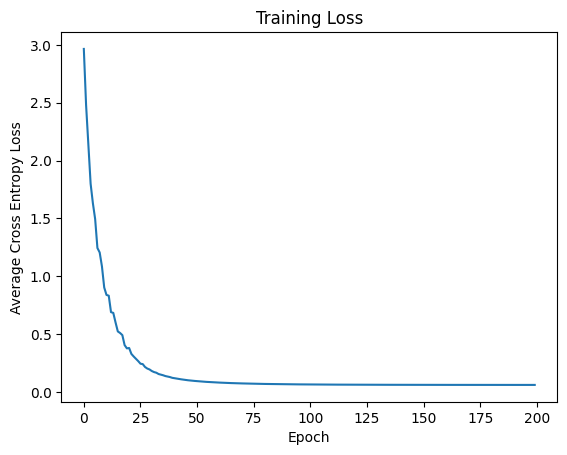

  0%|          | 1/200 [00:00<01:38,  2.03it/s]

Epoch 1/200, Loss: 2.9496


  1%|          | 2/200 [00:00<01:38,  2.00it/s]

Epoch 2/200, Loss: 2.4152


  2%|▏         | 3/200 [00:01<01:38,  2.01it/s]

Epoch 3/200, Loss: 2.1343


  2%|▏         | 4/200 [00:01<01:37,  2.00it/s]

Epoch 4/200, Loss: 1.6967


  2%|▎         | 5/200 [00:02<01:37,  2.01it/s]

Epoch 5/200, Loss: 1.5876


  3%|▎         | 6/200 [00:02<01:36,  2.00it/s]

Epoch 6/200, Loss: 1.4124


  4%|▎         | 7/200 [00:03<01:36,  2.01it/s]

Epoch 7/200, Loss: 1.1783


  4%|▍         | 8/200 [00:03<01:35,  2.00it/s]

Epoch 8/200, Loss: 1.1082


  4%|▍         | 9/200 [00:04<01:35,  2.00it/s]

Epoch 9/200, Loss: 1.0568


  5%|▌         | 10/200 [00:04<01:35,  1.99it/s]

Epoch 10/200, Loss: 0.8832


  6%|▌         | 11/200 [00:05<01:34,  2.00it/s]

Epoch 11/200, Loss: 0.8530


  6%|▌         | 12/200 [00:05<01:34,  1.99it/s]

Epoch 12/200, Loss: 0.7546


  6%|▋         | 13/200 [00:06<01:33,  1.99it/s]

Epoch 13/200, Loss: 0.6518


  7%|▋         | 14/200 [00:07<01:33,  1.99it/s]

Epoch 14/200, Loss: 0.6127


  8%|▊         | 15/200 [00:07<01:32,  2.00it/s]

Epoch 15/200, Loss: 0.5743


  8%|▊         | 16/200 [00:08<01:32,  2.00it/s]

Epoch 16/200, Loss: 0.4941


  8%|▊         | 17/200 [00:08<01:31,  2.00it/s]

Epoch 17/200, Loss: 0.4567


  9%|▉         | 18/200 [00:09<01:31,  2.00it/s]

Epoch 18/200, Loss: 0.4404


 10%|▉         | 19/200 [00:09<01:30,  2.00it/s]

Epoch 19/200, Loss: 0.3940


 10%|█         | 20/200 [00:10<01:30,  2.00it/s]

Epoch 20/200, Loss: 0.3557


 10%|█         | 21/200 [00:10<01:29,  2.00it/s]

Epoch 21/200, Loss: 0.3452


 11%|█         | 22/200 [00:11<01:29,  2.00it/s]

Epoch 22/200, Loss: 0.3123


 12%|█▏        | 23/200 [00:11<01:28,  2.00it/s]

Epoch 23/200, Loss: 0.2754


 12%|█▏        | 24/200 [00:12<01:28,  2.00it/s]

Epoch 24/200, Loss: 0.2666


 12%|█▎        | 25/200 [00:12<01:27,  2.00it/s]

Epoch 25/200, Loss: 0.2429


 13%|█▎        | 26/200 [00:13<01:27,  2.00it/s]

Epoch 26/200, Loss: 0.2234


 14%|█▎        | 27/200 [00:13<01:26,  2.00it/s]

Epoch 27/200, Loss: 0.2111


 14%|█▍        | 28/200 [00:14<01:26,  2.00it/s]

Epoch 28/200, Loss: 0.1945


 14%|█▍        | 29/200 [00:14<01:25,  2.00it/s]

Epoch 29/200, Loss: 0.1864


 15%|█▌        | 30/200 [00:15<01:25,  2.00it/s]

Epoch 30/200, Loss: 0.1771


 16%|█▌        | 31/200 [00:15<01:24,  2.00it/s]

Epoch 31/200, Loss: 0.1626


 16%|█▌        | 32/200 [00:16<01:24,  2.00it/s]

Epoch 32/200, Loss: 0.1550


 16%|█▋        | 33/200 [00:16<01:23,  2.00it/s]

Epoch 33/200, Loss: 0.1514


 17%|█▋        | 34/200 [00:17<01:23,  2.00it/s]

Epoch 34/200, Loss: 0.1413


 18%|█▊        | 35/200 [00:17<01:22,  2.00it/s]

Epoch 35/200, Loss: 0.1361


 18%|█▊        | 36/200 [00:18<01:22,  1.99it/s]

Epoch 36/200, Loss: 0.1330


 18%|█▊        | 37/200 [00:18<01:22,  1.98it/s]

Epoch 37/200, Loss: 0.1252


 19%|█▉        | 38/200 [00:19<01:21,  1.98it/s]

Epoch 38/200, Loss: 0.1216


 20%|█▉        | 39/200 [00:19<01:21,  1.98it/s]

Epoch 39/200, Loss: 0.1163


 20%|██        | 40/200 [00:20<01:20,  1.99it/s]

Epoch 40/200, Loss: 0.1131


 20%|██        | 41/200 [00:20<01:19,  1.99it/s]

Epoch 41/200, Loss: 0.1094


 21%|██        | 42/200 [00:21<01:19,  2.00it/s]

Epoch 42/200, Loss: 0.1068


 22%|██▏       | 43/200 [00:21<01:18,  2.00it/s]

Epoch 43/200, Loss: 0.1042


 22%|██▏       | 44/200 [00:22<01:18,  2.00it/s]

Epoch 44/200, Loss: 0.1015


 22%|██▎       | 45/200 [00:22<01:17,  2.00it/s]

Epoch 45/200, Loss: 0.0993


 23%|██▎       | 46/200 [00:23<01:17,  2.00it/s]

Epoch 46/200, Loss: 0.0965


 24%|██▎       | 47/200 [00:23<01:16,  1.99it/s]

Epoch 47/200, Loss: 0.0944


 24%|██▍       | 48/200 [00:24<01:16,  1.99it/s]

Epoch 48/200, Loss: 0.0925


 24%|██▍       | 49/200 [00:24<01:15,  2.00it/s]

Epoch 49/200, Loss: 0.0910


 25%|██▌       | 50/200 [00:25<01:15,  2.00it/s]

Epoch 50/200, Loss: 0.0894


 26%|██▌       | 51/200 [00:25<01:14,  2.00it/s]

Epoch 51/200, Loss: 0.0879


 26%|██▌       | 52/200 [00:26<01:14,  2.00it/s]

Epoch 52/200, Loss: 0.0863


 26%|██▋       | 53/200 [00:26<01:13,  2.00it/s]

Epoch 53/200, Loss: 0.0848


 27%|██▋       | 54/200 [00:27<01:13,  2.00it/s]

Epoch 54/200, Loss: 0.0838


 28%|██▊       | 55/200 [00:27<01:12,  2.00it/s]

Epoch 55/200, Loss: 0.0827


 28%|██▊       | 56/200 [00:28<01:12,  2.00it/s]

Epoch 56/200, Loss: 0.0815


 28%|██▊       | 57/200 [00:28<01:11,  2.00it/s]

Epoch 57/200, Loss: 0.0806


 29%|██▉       | 58/200 [00:29<01:11,  2.00it/s]

Epoch 58/200, Loss: 0.0795


 30%|██▉       | 59/200 [00:29<01:10,  2.00it/s]

Epoch 59/200, Loss: 0.0784


 30%|███       | 60/200 [00:30<01:10,  1.99it/s]

Epoch 60/200, Loss: 0.0779


 30%|███       | 61/200 [00:30<01:09,  1.99it/s]

Epoch 61/200, Loss: 0.0769


 31%|███       | 62/200 [00:31<01:09,  1.98it/s]

Epoch 62/200, Loss: 0.0760


 32%|███▏      | 63/200 [00:31<01:09,  1.98it/s]

Epoch 63/200, Loss: 0.0754


 32%|███▏      | 64/200 [00:32<01:08,  1.99it/s]

Epoch 64/200, Loss: 0.0748


 32%|███▎      | 65/200 [00:32<01:07,  1.99it/s]

Epoch 65/200, Loss: 0.0740


 33%|███▎      | 66/200 [00:33<01:07,  1.99it/s]

Epoch 66/200, Loss: 0.0736


 34%|███▎      | 67/200 [00:33<01:06,  2.00it/s]

Epoch 67/200, Loss: 0.0729


 34%|███▍      | 68/200 [00:34<01:06,  2.00it/s]

Epoch 68/200, Loss: 0.0722


 34%|███▍      | 69/200 [00:34<01:05,  2.00it/s]

Epoch 69/200, Loss: 0.0717


 35%|███▌      | 70/200 [00:35<01:04,  2.00it/s]

Epoch 70/200, Loss: 0.0712


 36%|███▌      | 71/200 [00:35<01:04,  2.00it/s]

Epoch 71/200, Loss: 0.0707


 36%|███▌      | 72/200 [00:36<01:03,  2.00it/s]

Epoch 72/200, Loss: 0.0703


 36%|███▋      | 73/200 [00:36<01:03,  2.00it/s]

Epoch 73/200, Loss: 0.0699


 37%|███▋      | 74/200 [00:37<01:02,  2.00it/s]

Epoch 74/200, Loss: 0.0694


 38%|███▊      | 75/200 [00:37<01:02,  2.00it/s]

Epoch 75/200, Loss: 0.0690


 38%|███▊      | 76/200 [00:38<01:01,  2.00it/s]

Epoch 76/200, Loss: 0.0687


 38%|███▊      | 77/200 [00:38<01:01,  2.00it/s]

Epoch 77/200, Loss: 0.0684


 39%|███▉      | 78/200 [00:39<01:00,  2.00it/s]

Epoch 78/200, Loss: 0.0681


 40%|███▉      | 79/200 [00:39<01:00,  2.00it/s]

Epoch 79/200, Loss: 0.0677


 40%|████      | 80/200 [00:40<00:59,  2.00it/s]

Epoch 80/200, Loss: 0.0673


 40%|████      | 81/200 [00:40<00:59,  2.00it/s]

Epoch 81/200, Loss: 0.0671


 41%|████      | 82/200 [00:41<00:58,  2.00it/s]

Epoch 82/200, Loss: 0.0668


 42%|████▏     | 83/200 [00:41<00:58,  2.00it/s]

Epoch 83/200, Loss: 0.0664


 42%|████▏     | 84/200 [00:42<00:58,  2.00it/s]

Epoch 84/200, Loss: 0.0662


 42%|████▎     | 85/200 [00:42<00:57,  1.99it/s]

Epoch 85/200, Loss: 0.0659


 43%|████▎     | 86/200 [00:43<00:57,  1.99it/s]

Epoch 86/200, Loss: 0.0657


 44%|████▎     | 87/200 [00:43<00:56,  1.99it/s]

Epoch 87/200, Loss: 0.0654


 44%|████▍     | 88/200 [00:44<00:56,  1.99it/s]

Epoch 88/200, Loss: 0.0653


 44%|████▍     | 89/200 [00:44<00:55,  1.99it/s]

Epoch 89/200, Loss: 0.0650


 45%|████▌     | 90/200 [00:45<00:55,  1.99it/s]

Epoch 90/200, Loss: 0.0648


 46%|████▌     | 91/200 [00:45<00:54,  1.99it/s]

Epoch 91/200, Loss: 0.0647


 46%|████▌     | 92/200 [00:46<00:54,  2.00it/s]

Epoch 92/200, Loss: 0.0644


 46%|████▋     | 93/200 [00:46<00:53,  2.00it/s]

Epoch 93/200, Loss: 0.0644


 47%|████▋     | 94/200 [00:47<00:53,  2.00it/s]

Epoch 94/200, Loss: 0.0641


 48%|████▊     | 95/200 [00:47<00:52,  2.00it/s]

Epoch 95/200, Loss: 0.0640


 48%|████▊     | 96/200 [00:48<00:52,  2.00it/s]

Epoch 96/200, Loss: 0.0637


 48%|████▊     | 97/200 [00:48<00:51,  1.99it/s]

Epoch 97/200, Loss: 0.0637


 49%|████▉     | 98/200 [00:49<00:51,  1.99it/s]

Epoch 98/200, Loss: 0.0635


 50%|████▉     | 99/200 [00:49<00:50,  2.00it/s]

Epoch 99/200, Loss: 0.0634


 50%|█████     | 100/200 [00:50<00:50,  2.00it/s]

Epoch 100/200, Loss: 0.0632


 50%|█████     | 101/200 [00:50<00:49,  2.00it/s]

Epoch 101/200, Loss: 0.0631


 51%|█████     | 102/200 [00:51<00:49,  2.00it/s]

Epoch 102/200, Loss: 0.0630


 52%|█████▏    | 103/200 [00:51<00:48,  2.00it/s]

Epoch 103/200, Loss: 0.0629


 52%|█████▏    | 104/200 [00:52<00:48,  2.00it/s]

Epoch 104/200, Loss: 0.0627


 52%|█████▎    | 105/200 [00:52<00:47,  2.00it/s]

Epoch 105/200, Loss: 0.0626


 53%|█████▎    | 106/200 [00:53<00:47,  2.00it/s]

Epoch 106/200, Loss: 0.0625


 54%|█████▎    | 107/200 [00:53<00:46,  2.00it/s]

Epoch 107/200, Loss: 0.0624


 54%|█████▍    | 108/200 [00:54<00:46,  2.00it/s]

Epoch 108/200, Loss: 0.0623


 55%|█████▍    | 109/200 [00:54<00:45,  2.00it/s]

Epoch 109/200, Loss: 0.0623


 55%|█████▌    | 110/200 [00:55<00:45,  2.00it/s]

Epoch 110/200, Loss: 0.0621


 56%|█████▌    | 111/200 [00:55<00:44,  2.00it/s]

Epoch 111/200, Loss: 0.0620


 56%|█████▌    | 112/200 [00:56<00:44,  1.99it/s]

Epoch 112/200, Loss: 0.0620


 56%|█████▋    | 113/200 [00:56<00:43,  1.99it/s]

Epoch 113/200, Loss: 0.0619


 57%|█████▋    | 114/200 [00:57<00:43,  1.99it/s]

Epoch 114/200, Loss: 0.0618


 57%|█████▊    | 115/200 [00:57<00:42,  1.99it/s]

Epoch 115/200, Loss: 0.0617


 58%|█████▊    | 116/200 [00:58<00:42,  1.99it/s]

Epoch 116/200, Loss: 0.0617


 58%|█████▊    | 117/200 [00:58<00:41,  1.99it/s]

Epoch 117/200, Loss: 0.0616


 59%|█████▉    | 118/200 [00:59<00:41,  1.99it/s]

Epoch 118/200, Loss: 0.0615


 60%|█████▉    | 119/200 [00:59<00:40,  1.99it/s]

Epoch 119/200, Loss: 0.0615


 60%|██████    | 120/200 [01:00<00:40,  1.99it/s]

Epoch 120/200, Loss: 0.0614


 60%|██████    | 121/200 [01:00<00:39,  1.99it/s]

Epoch 121/200, Loss: 0.0614


 61%|██████    | 122/200 [01:01<00:39,  1.99it/s]

Epoch 122/200, Loss: 0.0613


 62%|██████▏   | 123/200 [01:01<00:38,  2.00it/s]

Epoch 123/200, Loss: 0.0612


 62%|██████▏   | 124/200 [01:02<00:38,  2.00it/s]

Epoch 124/200, Loss: 0.0612


 62%|██████▎   | 125/200 [01:02<00:37,  2.00it/s]

Epoch 125/200, Loss: 0.0611


 63%|██████▎   | 126/200 [01:03<00:37,  2.00it/s]

Epoch 126/200, Loss: 0.0611


 64%|██████▎   | 127/200 [01:03<00:36,  2.00it/s]

Epoch 127/200, Loss: 0.0610


 64%|██████▍   | 128/200 [01:04<00:35,  2.00it/s]

Epoch 128/200, Loss: 0.0610


 64%|██████▍   | 129/200 [01:04<00:35,  2.00it/s]

Epoch 129/200, Loss: 0.0609


 65%|██████▌   | 130/200 [01:05<00:35,  2.00it/s]

Epoch 130/200, Loss: 0.0609


 66%|██████▌   | 131/200 [01:05<00:34,  2.00it/s]

Epoch 131/200, Loss: 0.0608


 66%|██████▌   | 132/200 [01:06<00:34,  1.99it/s]

Epoch 132/200, Loss: 0.0608


 66%|██████▋   | 133/200 [01:06<00:33,  2.00it/s]

Epoch 133/200, Loss: 0.0608


 67%|██████▋   | 134/200 [01:07<00:33,  1.99it/s]

Epoch 134/200, Loss: 0.0607


 68%|██████▊   | 135/200 [01:07<00:32,  1.99it/s]

Epoch 135/200, Loss: 0.0607


 68%|██████▊   | 136/200 [01:08<00:32,  1.99it/s]

Epoch 136/200, Loss: 0.0607


 68%|██████▊   | 137/200 [01:08<00:31,  2.00it/s]

Epoch 137/200, Loss: 0.0606


 69%|██████▉   | 138/200 [01:09<00:31,  1.99it/s]

Epoch 138/200, Loss: 0.0606


 70%|██████▉   | 139/200 [01:09<00:30,  1.99it/s]

Epoch 139/200, Loss: 0.0606


 70%|███████   | 140/200 [01:10<00:30,  1.99it/s]

Epoch 140/200, Loss: 0.0605


 70%|███████   | 141/200 [01:10<00:29,  1.99it/s]

Epoch 141/200, Loss: 0.0605


 71%|███████   | 142/200 [01:11<00:29,  1.99it/s]

Epoch 142/200, Loss: 0.0605


 72%|███████▏  | 143/200 [01:11<00:28,  1.99it/s]

Epoch 143/200, Loss: 0.0604


 72%|███████▏  | 144/200 [01:12<00:28,  1.99it/s]

Epoch 144/200, Loss: 0.0604


 72%|███████▎  | 145/200 [01:12<00:27,  1.99it/s]

Epoch 145/200, Loss: 0.0604


 73%|███████▎  | 146/200 [01:13<00:27,  1.99it/s]

Epoch 146/200, Loss: 0.0604


 74%|███████▎  | 147/200 [01:13<00:26,  1.99it/s]

Epoch 147/200, Loss: 0.0603


 74%|███████▍  | 148/200 [01:14<00:26,  2.00it/s]

Epoch 148/200, Loss: 0.0603


 74%|███████▍  | 149/200 [01:14<00:25,  2.00it/s]

Epoch 149/200, Loss: 0.0603


 75%|███████▌  | 150/200 [01:15<00:25,  2.00it/s]

Epoch 150/200, Loss: 0.0603


 76%|███████▌  | 151/200 [01:15<00:24,  2.00it/s]

Epoch 151/200, Loss: 0.0603


 76%|███████▌  | 152/200 [01:16<00:24,  2.00it/s]

Epoch 152/200, Loss: 0.0602


 76%|███████▋  | 153/200 [01:16<00:23,  2.00it/s]

Epoch 153/200, Loss: 0.0602


 77%|███████▋  | 154/200 [01:17<00:23,  2.00it/s]

Epoch 154/200, Loss: 0.0602


 78%|███████▊  | 155/200 [01:17<00:22,  2.00it/s]

Epoch 155/200, Loss: 0.0602


 78%|███████▊  | 156/200 [01:18<00:22,  2.00it/s]

Epoch 156/200, Loss: 0.0602


 78%|███████▊  | 157/200 [01:18<00:21,  2.00it/s]

Epoch 157/200, Loss: 0.0601


 79%|███████▉  | 158/200 [01:19<00:21,  1.99it/s]

Epoch 158/200, Loss: 0.0601


 80%|███████▉  | 159/200 [01:19<00:20,  2.00it/s]

Epoch 159/200, Loss: 0.0601


 80%|████████  | 160/200 [01:20<00:20,  2.00it/s]

Epoch 160/200, Loss: 0.0601


 80%|████████  | 161/200 [01:20<00:19,  2.00it/s]

Epoch 161/200, Loss: 0.0601


 81%|████████  | 162/200 [01:21<00:19,  2.00it/s]

Epoch 162/200, Loss: 0.0601


 82%|████████▏ | 163/200 [01:21<00:18,  1.99it/s]

Epoch 163/200, Loss: 0.0601


 82%|████████▏ | 164/200 [01:22<00:18,  1.99it/s]

Epoch 164/200, Loss: 0.0600


 82%|████████▎ | 165/200 [01:22<00:17,  1.99it/s]

Epoch 165/200, Loss: 0.0600


 83%|████████▎ | 166/200 [01:23<00:17,  1.99it/s]

Epoch 166/200, Loss: 0.0600


 84%|████████▎ | 167/200 [01:23<00:16,  1.99it/s]

Epoch 167/200, Loss: 0.0600


 84%|████████▍ | 168/200 [01:24<00:16,  2.00it/s]

Epoch 168/200, Loss: 0.0600


 84%|████████▍ | 169/200 [01:24<00:15,  1.99it/s]

Epoch 169/200, Loss: 0.0600


 85%|████████▌ | 170/200 [01:25<00:15,  1.99it/s]

Epoch 170/200, Loss: 0.0600


 86%|████████▌ | 171/200 [01:25<00:14,  1.98it/s]

Epoch 171/200, Loss: 0.0600


 86%|████████▌ | 172/200 [01:26<00:14,  1.98it/s]

Epoch 172/200, Loss: 0.0599


 86%|████████▋ | 173/200 [01:26<00:13,  1.98it/s]

Epoch 173/200, Loss: 0.0600


 87%|████████▋ | 174/200 [01:27<00:13,  1.98it/s]

Epoch 174/200, Loss: 0.0600


 88%|████████▊ | 175/200 [01:27<00:12,  1.98it/s]

Epoch 175/200, Loss: 0.0599


 88%|████████▊ | 176/200 [01:28<00:12,  1.99it/s]

Epoch 176/200, Loss: 0.0599


 88%|████████▊ | 177/200 [01:28<00:11,  1.99it/s]

Epoch 177/200, Loss: 0.0599


 89%|████████▉ | 178/200 [01:29<00:11,  1.99it/s]

Epoch 178/200, Loss: 0.0599


 90%|████████▉ | 179/200 [01:29<00:10,  1.99it/s]

Epoch 179/200, Loss: 0.0599


 90%|█████████ | 180/200 [01:30<00:10,  1.99it/s]

Epoch 180/200, Loss: 0.0599


 90%|█████████ | 181/200 [01:30<00:09,  2.00it/s]

Epoch 181/200, Loss: 0.0599


 91%|█████████ | 182/200 [01:31<00:09,  1.99it/s]

Epoch 182/200, Loss: 0.0599


 92%|█████████▏| 183/200 [01:31<00:08,  1.99it/s]

Epoch 183/200, Loss: 0.0599


 92%|█████████▏| 184/200 [01:32<00:08,  1.99it/s]

Epoch 184/200, Loss: 0.0598


 92%|█████████▎| 185/200 [01:32<00:07,  1.99it/s]

Epoch 185/200, Loss: 0.0599


 93%|█████████▎| 186/200 [01:33<00:07,  1.99it/s]

Epoch 186/200, Loss: 0.0598


 94%|█████████▎| 187/200 [01:33<00:06,  1.99it/s]

Epoch 187/200, Loss: 0.0599


 94%|█████████▍| 188/200 [01:34<00:06,  1.99it/s]

Epoch 188/200, Loss: 0.0598


 94%|█████████▍| 189/200 [01:34<00:05,  1.99it/s]

Epoch 189/200, Loss: 0.0598


 95%|█████████▌| 190/200 [01:35<00:05,  1.99it/s]

Epoch 190/200, Loss: 0.0598


 96%|█████████▌| 191/200 [01:35<00:04,  1.98it/s]

Epoch 191/200, Loss: 0.0598


 96%|█████████▌| 192/200 [01:36<00:04,  1.98it/s]

Epoch 192/200, Loss: 0.0598


 96%|█████████▋| 193/200 [01:36<00:03,  1.99it/s]

Epoch 193/200, Loss: 0.0598


 97%|█████████▋| 194/200 [01:37<00:03,  1.99it/s]

Epoch 194/200, Loss: 0.0598


 98%|█████████▊| 195/200 [01:37<00:02,  1.99it/s]

Epoch 195/200, Loss: 0.0598


 98%|█████████▊| 196/200 [01:38<00:02,  1.99it/s]

Epoch 196/200, Loss: 0.0598


 98%|█████████▊| 197/200 [01:38<00:01,  2.00it/s]

Epoch 197/200, Loss: 0.0598


 99%|█████████▉| 198/200 [01:39<00:01,  2.00it/s]

Epoch 198/200, Loss: 0.0598


100%|█████████▉| 199/200 [01:39<00:00,  2.00it/s]

Epoch 199/200, Loss: 0.0598


100%|██████████| 200/200 [01:40<00:00,  1.99it/s]

Epoch 200/200, Loss: 0.0598


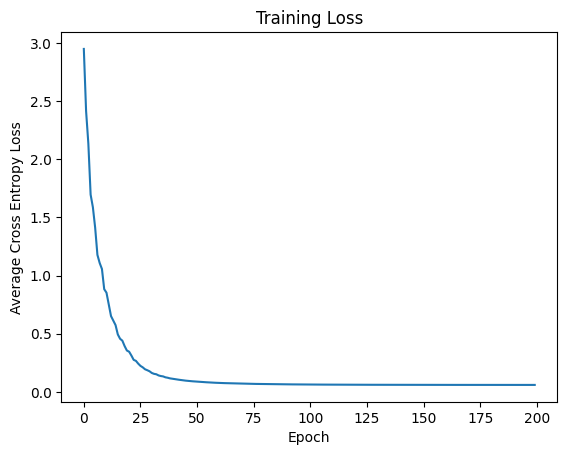

  0%|          | 1/200 [00:00<01:38,  2.01it/s]

Epoch 1/200, Loss: 2.9463


  1%|          | 2/200 [00:01<01:39,  1.98it/s]

Epoch 2/200, Loss: 2.4272


  2%|▏         | 3/200 [00:01<01:38,  1.99it/s]

Epoch 3/200, Loss: 2.1172


  2%|▏         | 4/200 [00:02<01:38,  1.99it/s]

Epoch 4/200, Loss: 1.7780


  2%|▎         | 5/200 [00:02<01:37,  2.00it/s]

Epoch 5/200, Loss: 1.6224


  3%|▎         | 6/200 [00:03<01:37,  1.99it/s]

Epoch 6/200, Loss: 1.4744


  4%|▎         | 7/200 [00:03<01:36,  2.00it/s]

Epoch 7/200, Loss: 1.2622


  4%|▍         | 8/200 [00:04<01:36,  2.00it/s]

Epoch 8/200, Loss: 1.1740


  4%|▍         | 9/200 [00:04<01:35,  2.00it/s]

Epoch 9/200, Loss: 1.0929


  5%|▌         | 10/200 [00:05<01:35,  2.00it/s]

Epoch 10/200, Loss: 0.9326


  6%|▌         | 11/200 [00:05<01:34,  1.99it/s]

Epoch 11/200, Loss: 0.8952


  6%|▌         | 12/200 [00:06<01:34,  1.99it/s]

Epoch 12/200, Loss: 0.8285


  6%|▋         | 13/200 [00:06<01:33,  1.99it/s]

Epoch 13/200, Loss: 0.7029


  7%|▋         | 14/200 [00:07<01:33,  1.98it/s]

Epoch 14/200, Loss: 0.6887


  8%|▊         | 15/200 [00:07<01:33,  1.98it/s]

Epoch 15/200, Loss: 0.6219


  8%|▊         | 16/200 [00:08<01:33,  1.98it/s]

Epoch 16/200, Loss: 0.5687


  8%|▊         | 17/200 [00:08<01:32,  1.98it/s]

Epoch 17/200, Loss: 0.5140


  9%|▉         | 18/200 [00:09<01:31,  1.98it/s]

Epoch 18/200, Loss: 0.5034


 10%|▉         | 19/200 [00:09<01:30,  1.99it/s]

Epoch 19/200, Loss: 0.4463


 10%|█         | 20/200 [00:10<01:30,  1.99it/s]

Epoch 20/200, Loss: 0.4453


 10%|█         | 21/200 [00:10<01:29,  1.99it/s]

Epoch 21/200, Loss: 0.4060


 11%|█         | 22/200 [00:11<01:29,  1.99it/s]

Epoch 22/200, Loss: 0.3558


 12%|█▏        | 23/200 [00:11<01:28,  2.00it/s]

Epoch 23/200, Loss: 0.3459


 12%|█▏        | 24/200 [00:12<01:28,  2.00it/s]

Epoch 24/200, Loss: 0.3303


 12%|█▎        | 25/200 [00:12<01:27,  2.00it/s]

Epoch 25/200, Loss: 0.2996


 13%|█▎        | 26/200 [00:13<01:27,  1.99it/s]

Epoch 26/200, Loss: 0.2766


 14%|█▎        | 27/200 [00:13<01:26,  1.99it/s]

Epoch 27/200, Loss: 0.2696


 14%|█▍        | 28/200 [00:14<01:26,  1.99it/s]

Epoch 28/200, Loss: 0.2517


 14%|█▍        | 29/200 [00:14<01:25,  2.00it/s]

Epoch 29/200, Loss: 0.2366


 15%|█▌        | 30/200 [00:15<01:25,  1.99it/s]

Epoch 30/200, Loss: 0.2253


 16%|█▌        | 31/200 [00:15<01:24,  1.99it/s]

Epoch 31/200, Loss: 0.2127


 16%|█▌        | 32/200 [00:16<01:24,  1.99it/s]

Epoch 32/200, Loss: 0.2063


 16%|█▋        | 33/200 [00:16<01:23,  2.00it/s]

Epoch 33/200, Loss: 0.1994


 17%|█▋        | 34/200 [00:17<01:23,  1.99it/s]

Epoch 34/200, Loss: 0.1896


 18%|█▊        | 35/200 [00:17<01:22,  1.99it/s]

Epoch 35/200, Loss: 0.1836


 18%|█▊        | 36/200 [00:18<01:22,  1.99it/s]

Epoch 36/200, Loss: 0.1775


 18%|█▊        | 37/200 [00:18<01:21,  1.99it/s]

Epoch 37/200, Loss: 0.1718


 19%|█▉        | 38/200 [00:19<01:21,  1.99it/s]

Epoch 38/200, Loss: 0.1659


 20%|█▉        | 39/200 [00:19<01:20,  1.99it/s]

Epoch 39/200, Loss: 0.1627


 20%|██        | 40/200 [00:20<01:20,  1.99it/s]

Epoch 40/200, Loss: 0.1575


 20%|██        | 41/200 [00:20<01:20,  1.99it/s]

Epoch 41/200, Loss: 0.1539


 21%|██        | 42/200 [00:21<01:19,  1.99it/s]

Epoch 42/200, Loss: 0.1498


 22%|██▏       | 43/200 [00:21<01:19,  1.99it/s]

Epoch 43/200, Loss: 0.1476


 22%|██▏       | 44/200 [00:22<01:18,  1.99it/s]

Epoch 44/200, Loss: 0.1440


 22%|██▎       | 45/200 [00:22<01:17,  1.99it/s]

Epoch 45/200, Loss: 0.1413


 23%|██▎       | 46/200 [00:23<01:17,  1.99it/s]

Epoch 46/200, Loss: 0.1384


 24%|██▎       | 47/200 [00:23<01:17,  1.99it/s]

Epoch 47/200, Loss: 0.1360


 24%|██▍       | 48/200 [00:24<01:16,  1.99it/s]

Epoch 48/200, Loss: 0.1340


 24%|██▍       | 49/200 [00:24<01:15,  1.99it/s]

Epoch 49/200, Loss: 0.1319


 25%|██▌       | 50/200 [00:25<01:15,  1.99it/s]

Epoch 50/200, Loss: 0.1297


 26%|██▌       | 51/200 [00:25<01:14,  1.99it/s]

Epoch 51/200, Loss: 0.1283


 26%|██▌       | 52/200 [00:26<01:14,  1.99it/s]

Epoch 52/200, Loss: 0.1262


 26%|██▋       | 53/200 [00:26<01:13,  1.99it/s]

Epoch 53/200, Loss: 0.1245


 27%|██▋       | 54/200 [00:27<01:13,  1.99it/s]

Epoch 54/200, Loss: 0.1232


 28%|██▊       | 55/200 [00:27<01:12,  1.99it/s]

Epoch 55/200, Loss: 0.1221


 28%|██▊       | 56/200 [00:28<01:12,  1.99it/s]

Epoch 56/200, Loss: 0.1204


 28%|██▊       | 57/200 [00:28<01:11,  1.99it/s]

Epoch 57/200, Loss: 0.1197


 29%|██▉       | 58/200 [00:29<01:11,  1.99it/s]

Epoch 58/200, Loss: 0.1186


 30%|██▉       | 59/200 [00:29<01:10,  1.99it/s]

Epoch 59/200, Loss: 0.1170


 30%|███       | 60/200 [00:30<01:10,  1.99it/s]

Epoch 60/200, Loss: 0.1162


 30%|███       | 61/200 [00:30<01:09,  1.99it/s]

Epoch 61/200, Loss: 0.1153


 31%|███       | 62/200 [00:31<01:09,  1.99it/s]

Epoch 62/200, Loss: 0.1143


 32%|███▏      | 63/200 [00:31<01:08,  1.99it/s]

Epoch 63/200, Loss: 0.1133


 32%|███▏      | 64/200 [00:32<01:08,  1.99it/s]

Epoch 64/200, Loss: 0.1126


 32%|███▎      | 65/200 [00:32<01:07,  1.99it/s]

Epoch 65/200, Loss: 0.1119


 33%|███▎      | 66/200 [00:33<01:07,  1.98it/s]

Epoch 66/200, Loss: 0.1111


 34%|███▎      | 67/200 [00:33<01:07,  1.98it/s]

Epoch 67/200, Loss: 0.1106


 34%|███▍      | 68/200 [00:34<01:06,  1.98it/s]

Epoch 68/200, Loss: 0.1098


 34%|███▍      | 69/200 [00:34<01:05,  1.99it/s]

Epoch 69/200, Loss: 0.1093


 35%|███▌      | 70/200 [00:35<01:05,  1.99it/s]

Epoch 70/200, Loss: 0.1087


 36%|███▌      | 71/200 [00:35<01:04,  1.99it/s]

Epoch 71/200, Loss: 0.1080


 36%|███▌      | 72/200 [00:36<01:04,  1.99it/s]

Epoch 72/200, Loss: 0.1075


 36%|███▋      | 73/200 [00:36<01:03,  1.99it/s]

Epoch 73/200, Loss: 0.1070


 37%|███▋      | 74/200 [00:37<01:03,  1.99it/s]

Epoch 74/200, Loss: 0.1064


 38%|███▊      | 75/200 [00:37<01:02,  2.00it/s]

Epoch 75/200, Loss: 0.1060


 38%|███▊      | 76/200 [00:38<01:02,  1.99it/s]

Epoch 76/200, Loss: 0.1057


 38%|███▊      | 77/200 [00:38<01:01,  2.00it/s]

Epoch 77/200, Loss: 0.1053


 39%|███▉      | 78/200 [00:39<01:01,  2.00it/s]

Epoch 78/200, Loss: 0.1047


 40%|███▉      | 79/200 [00:39<01:00,  1.99it/s]

Epoch 79/200, Loss: 0.1044


 40%|████      | 80/200 [00:40<01:00,  2.00it/s]

Epoch 80/200, Loss: 0.1039


 40%|████      | 81/200 [00:40<00:59,  2.00it/s]

Epoch 81/200, Loss: 0.1036


 41%|████      | 82/200 [00:41<00:59,  2.00it/s]

Epoch 82/200, Loss: 0.1033


 42%|████▏     | 83/200 [00:41<00:58,  2.00it/s]

Epoch 83/200, Loss: 0.1028


 42%|████▏     | 84/200 [00:42<00:58,  2.00it/s]

Epoch 84/200, Loss: 0.1027


 42%|████▎     | 85/200 [00:42<00:57,  2.00it/s]

Epoch 85/200, Loss: 0.1024


 43%|████▎     | 86/200 [00:43<00:57,  2.00it/s]

Epoch 86/200, Loss: 0.1021


 44%|████▎     | 87/200 [00:43<00:56,  1.99it/s]

Epoch 87/200, Loss: 0.1018


 44%|████▍     | 88/200 [00:44<00:56,  1.99it/s]

Epoch 88/200, Loss: 0.1016


 44%|████▍     | 89/200 [00:44<00:55,  1.99it/s]

Epoch 89/200, Loss: 0.1012


 45%|████▌     | 90/200 [00:45<00:55,  1.99it/s]

Epoch 90/200, Loss: 0.1011


 46%|████▌     | 91/200 [00:45<00:54,  1.98it/s]

Epoch 91/200, Loss: 0.1009


 46%|████▌     | 92/200 [00:46<00:54,  1.98it/s]

Epoch 92/200, Loss: 0.1005


 46%|████▋     | 93/200 [00:46<00:53,  1.98it/s]

Epoch 93/200, Loss: 0.1004


 47%|████▋     | 94/200 [00:47<00:53,  1.99it/s]

Epoch 94/200, Loss: 0.1002


 48%|████▊     | 95/200 [00:47<00:52,  1.99it/s]

Epoch 95/200, Loss: 0.0999


 48%|████▊     | 96/200 [00:48<00:52,  1.99it/s]

Epoch 96/200, Loss: 0.0999


 48%|████▊     | 97/200 [00:48<00:51,  1.99it/s]

Epoch 97/200, Loss: 0.0996


 49%|████▉     | 98/200 [00:49<00:51,  1.99it/s]

Epoch 98/200, Loss: 0.0995


 50%|████▉     | 99/200 [00:49<00:50,  1.99it/s]

Epoch 99/200, Loss: 0.0993


 50%|█████     | 100/200 [00:50<00:50,  1.99it/s]

Epoch 100/200, Loss: 0.0991


 50%|█████     | 101/200 [00:50<00:49,  1.99it/s]

Epoch 101/200, Loss: 0.0990


 51%|█████     | 102/200 [00:51<00:49,  1.99it/s]

Epoch 102/200, Loss: 0.0988


 52%|█████▏    | 103/200 [00:51<00:48,  1.99it/s]

Epoch 103/200, Loss: 0.0987


 52%|█████▏    | 104/200 [00:52<00:48,  1.99it/s]

Epoch 104/200, Loss: 0.0986


 52%|█████▎    | 105/200 [00:52<00:47,  1.99it/s]

Epoch 105/200, Loss: 0.0984


 53%|█████▎    | 106/200 [00:53<00:47,  1.99it/s]

Epoch 106/200, Loss: 0.0984


 54%|█████▎    | 107/200 [00:53<00:46,  1.99it/s]

Epoch 107/200, Loss: 0.0982


 54%|█████▍    | 108/200 [00:54<00:46,  1.99it/s]

Epoch 108/200, Loss: 0.0981


 55%|█████▍    | 109/200 [00:54<00:45,  1.99it/s]

Epoch 109/200, Loss: 0.0981


 55%|█████▌    | 110/200 [00:55<00:45,  1.99it/s]

Epoch 110/200, Loss: 0.0978


 56%|█████▌    | 111/200 [00:55<00:44,  1.99it/s]

Epoch 111/200, Loss: 0.0978


 56%|█████▌    | 112/200 [00:56<00:44,  1.99it/s]

Epoch 112/200, Loss: 0.0976


 56%|█████▋    | 113/200 [00:56<00:43,  1.99it/s]

Epoch 113/200, Loss: 0.0976


 57%|█████▋    | 114/200 [00:57<00:43,  1.99it/s]

Epoch 114/200, Loss: 0.0975


 57%|█████▊    | 115/200 [00:57<00:42,  1.98it/s]

Epoch 115/200, Loss: 0.0974


 58%|█████▊    | 116/200 [00:58<00:42,  1.98it/s]

Epoch 116/200, Loss: 0.0973


 58%|█████▊    | 117/200 [00:58<00:42,  1.98it/s]

Epoch 117/200, Loss: 0.0972


 59%|█████▉    | 118/200 [00:59<00:41,  1.97it/s]

Epoch 118/200, Loss: 0.0972


 60%|█████▉    | 119/200 [00:59<00:40,  1.98it/s]

Epoch 119/200, Loss: 0.0971


 60%|██████    | 120/200 [01:00<00:40,  1.98it/s]

Epoch 120/200, Loss: 0.0969


 60%|██████    | 121/200 [01:00<00:39,  1.99it/s]

Epoch 121/200, Loss: 0.0969


 61%|██████    | 122/200 [01:01<00:39,  1.99it/s]

Epoch 122/200, Loss: 0.0969


 62%|██████▏   | 123/200 [01:01<00:38,  1.99it/s]

Epoch 123/200, Loss: 0.0968


 62%|██████▏   | 124/200 [01:02<00:38,  1.99it/s]

Epoch 124/200, Loss: 0.0968


 62%|██████▎   | 125/200 [01:02<00:37,  1.99it/s]

Epoch 125/200, Loss: 0.0966


 63%|██████▎   | 126/200 [01:03<00:37,  1.99it/s]

Epoch 126/200, Loss: 0.0966


 64%|██████▎   | 127/200 [01:03<00:36,  1.99it/s]

Epoch 127/200, Loss: 0.0966


 64%|██████▍   | 128/200 [01:04<00:36,  1.99it/s]

Epoch 128/200, Loss: 0.0965


 64%|██████▍   | 129/200 [01:04<00:35,  1.99it/s]

Epoch 129/200, Loss: 0.0964


 65%|██████▌   | 130/200 [01:05<00:35,  1.99it/s]

Epoch 130/200, Loss: 0.0964


 66%|██████▌   | 131/200 [01:05<00:34,  1.99it/s]

Epoch 131/200, Loss: 0.0963


 66%|██████▌   | 132/200 [01:06<00:34,  1.99it/s]

Epoch 132/200, Loss: 0.0963


 66%|██████▋   | 133/200 [01:06<00:33,  1.99it/s]

Epoch 133/200, Loss: 0.0962


 67%|██████▋   | 134/200 [01:07<00:33,  1.99it/s]

Epoch 134/200, Loss: 0.0962


 68%|██████▊   | 135/200 [01:07<00:32,  1.99it/s]

Epoch 135/200, Loss: 0.0961


 68%|██████▊   | 136/200 [01:08<00:32,  1.99it/s]

Epoch 136/200, Loss: 0.0961


 68%|██████▊   | 137/200 [01:08<00:31,  1.99it/s]

Epoch 137/200, Loss: 0.0961


 69%|██████▉   | 138/200 [01:09<00:31,  1.99it/s]

Epoch 138/200, Loss: 0.0960


 70%|██████▉   | 139/200 [01:09<00:30,  1.99it/s]

Epoch 139/200, Loss: 0.0960


 70%|███████   | 140/200 [01:10<00:30,  1.98it/s]

Epoch 140/200, Loss: 0.0960


 70%|███████   | 141/200 [01:10<00:29,  1.98it/s]

Epoch 141/200, Loss: 0.0959


 71%|███████   | 142/200 [01:11<00:29,  1.98it/s]

Epoch 142/200, Loss: 0.0959


 72%|███████▏  | 143/200 [01:11<00:28,  1.99it/s]

Epoch 143/200, Loss: 0.0959


 72%|███████▏  | 144/200 [01:12<00:28,  1.98it/s]

Epoch 144/200, Loss: 0.0959


 72%|███████▎  | 145/200 [01:12<00:27,  1.98it/s]

Epoch 145/200, Loss: 0.0958


 73%|███████▎  | 146/200 [01:13<00:27,  1.98it/s]

Epoch 146/200, Loss: 0.0958


 74%|███████▎  | 147/200 [01:13<00:26,  1.99it/s]

Epoch 147/200, Loss: 0.0958


 74%|███████▍  | 148/200 [01:14<00:26,  1.99it/s]

Epoch 148/200, Loss: 0.0957


 74%|███████▍  | 149/200 [01:14<00:25,  1.99it/s]

Epoch 149/200, Loss: 0.0957


 75%|███████▌  | 150/200 [01:15<00:25,  1.99it/s]

Epoch 150/200, Loss: 0.0957


 76%|███████▌  | 151/200 [01:15<00:24,  1.99it/s]

Epoch 151/200, Loss: 0.0957


 76%|███████▌  | 152/200 [01:16<00:24,  1.99it/s]

Epoch 152/200, Loss: 0.0956


 76%|███████▋  | 153/200 [01:16<00:23,  1.99it/s]

Epoch 153/200, Loss: 0.0956


 77%|███████▋  | 154/200 [01:17<00:23,  1.99it/s]

Epoch 154/200, Loss: 0.0956


 78%|███████▊  | 155/200 [01:17<00:22,  1.99it/s]

Epoch 155/200, Loss: 0.0956


 78%|███████▊  | 156/200 [01:18<00:22,  1.99it/s]

Epoch 156/200, Loss: 0.0955


 78%|███████▊  | 157/200 [01:18<00:21,  1.99it/s]

Epoch 157/200, Loss: 0.0956


 79%|███████▉  | 158/200 [01:19<00:21,  1.99it/s]

Epoch 158/200, Loss: 0.0955


 80%|███████▉  | 159/200 [01:19<00:20,  1.99it/s]

Epoch 159/200, Loss: 0.0955


 80%|████████  | 160/200 [01:20<00:20,  1.99it/s]

Epoch 160/200, Loss: 0.0955


 80%|████████  | 161/200 [01:20<00:19,  1.99it/s]

Epoch 161/200, Loss: 0.0954


 81%|████████  | 162/200 [01:21<00:19,  1.99it/s]

Epoch 162/200, Loss: 0.0954


 82%|████████▏ | 163/200 [01:21<00:18,  1.99it/s]

Epoch 163/200, Loss: 0.0954


 82%|████████▏ | 164/200 [01:22<00:18,  1.99it/s]

Epoch 164/200, Loss: 0.0954


 82%|████████▎ | 165/200 [01:22<00:17,  1.99it/s]

Epoch 165/200, Loss: 0.0954


 83%|████████▎ | 166/200 [01:23<00:17,  1.98it/s]

Epoch 166/200, Loss: 0.0954


 84%|████████▎ | 167/200 [01:23<00:16,  1.98it/s]

Epoch 167/200, Loss: 0.0954


 84%|████████▍ | 168/200 [01:24<00:16,  1.98it/s]

Epoch 168/200, Loss: 0.0954


 84%|████████▍ | 169/200 [01:24<00:15,  1.98it/s]

Epoch 169/200, Loss: 0.0953


 85%|████████▌ | 170/200 [01:25<00:15,  1.98it/s]

Epoch 170/200, Loss: 0.0953


 86%|████████▌ | 171/200 [01:25<00:14,  1.99it/s]

Epoch 171/200, Loss: 0.0953


 86%|████████▌ | 172/200 [01:26<00:14,  1.99it/s]

Epoch 172/200, Loss: 0.0953


 86%|████████▋ | 173/200 [01:26<00:13,  1.99it/s]

Epoch 173/200, Loss: 0.0953


 87%|████████▋ | 174/200 [01:27<00:13,  1.99it/s]

Epoch 174/200, Loss: 0.0953


 88%|████████▊ | 175/200 [01:27<00:12,  1.99it/s]

Epoch 175/200, Loss: 0.0953


 88%|████████▊ | 176/200 [01:28<00:12,  1.99it/s]

Epoch 176/200, Loss: 0.0953


 88%|████████▊ | 177/200 [01:28<00:11,  1.99it/s]

Epoch 177/200, Loss: 0.0952


 89%|████████▉ | 178/200 [01:29<00:11,  1.99it/s]

Epoch 178/200, Loss: 0.0952


 90%|████████▉ | 179/200 [01:29<00:10,  1.99it/s]

Epoch 179/200, Loss: 0.0952


 90%|█████████ | 180/200 [01:30<00:10,  1.99it/s]

Epoch 180/200, Loss: 0.0952


 90%|█████████ | 181/200 [01:30<00:09,  1.99it/s]

Epoch 181/200, Loss: 0.0952


 91%|█████████ | 182/200 [01:31<00:09,  1.99it/s]

Epoch 182/200, Loss: 0.0952


 92%|█████████▏| 183/200 [01:31<00:08,  1.99it/s]

Epoch 183/200, Loss: 0.0952


 92%|█████████▏| 184/200 [01:32<00:08,  1.99it/s]

Epoch 184/200, Loss: 0.0952


 92%|█████████▎| 185/200 [01:32<00:07,  1.99it/s]

Epoch 185/200, Loss: 0.0952


 93%|█████████▎| 186/200 [01:33<00:07,  1.99it/s]

Epoch 186/200, Loss: 0.0952


 94%|█████████▎| 187/200 [01:33<00:06,  1.99it/s]

Epoch 187/200, Loss: 0.0952


 94%|█████████▍| 188/200 [01:34<00:06,  1.99it/s]

Epoch 188/200, Loss: 0.0952


 94%|█████████▍| 189/200 [01:34<00:05,  1.99it/s]

Epoch 189/200, Loss: 0.0951


 95%|█████████▌| 190/200 [01:35<00:05,  1.98it/s]

Epoch 190/200, Loss: 0.0952


 96%|█████████▌| 191/200 [01:36<00:04,  1.98it/s]

Epoch 191/200, Loss: 0.0951


 96%|█████████▌| 192/200 [01:36<00:04,  1.98it/s]

Epoch 192/200, Loss: 0.0951


 96%|█████████▋| 193/200 [01:37<00:03,  1.98it/s]

Epoch 193/200, Loss: 0.0951


 97%|█████████▋| 194/200 [01:37<00:03,  1.98it/s]

Epoch 194/200, Loss: 0.0951


 98%|█████████▊| 195/200 [01:38<00:02,  1.97it/s]

Epoch 195/200, Loss: 0.0951


 98%|█████████▊| 196/200 [01:38<00:02,  1.98it/s]

Epoch 196/200, Loss: 0.0951


 98%|█████████▊| 197/200 [01:39<00:01,  1.98it/s]

Epoch 197/200, Loss: 0.0951


 99%|█████████▉| 198/200 [01:39<00:01,  1.98it/s]

Epoch 198/200, Loss: 0.0951


100%|█████████▉| 199/200 [01:40<00:00,  1.99it/s]

Epoch 199/200, Loss: 0.0951


100%|██████████| 200/200 [01:40<00:00,  1.99it/s]

Epoch 200/200, Loss: 0.0951


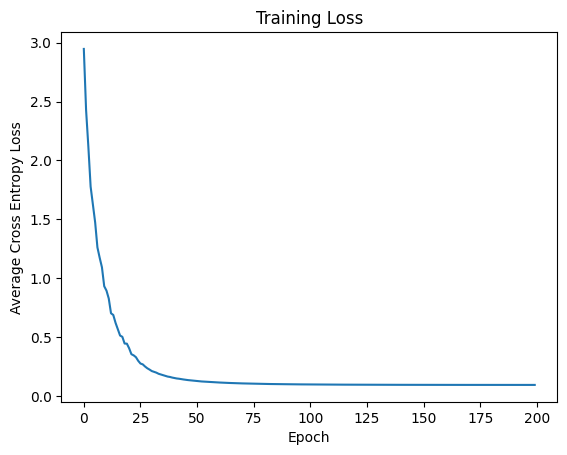

  0%|          | 1/200 [00:00<01:38,  2.01it/s]

Epoch 1/200, Loss: 3.0397


  1%|          | 2/200 [00:01<01:39,  1.99it/s]

Epoch 2/200, Loss: 2.5525


  2%|▏         | 3/200 [00:01<01:38,  1.99it/s]

Epoch 3/200, Loss: 2.2244


  2%|▏         | 4/200 [00:02<01:38,  1.99it/s]

Epoch 4/200, Loss: 1.8906


  2%|▎         | 5/200 [00:02<01:37,  1.99it/s]

Epoch 5/200, Loss: 1.7358


  3%|▎         | 6/200 [00:03<01:37,  1.99it/s]

Epoch 6/200, Loss: 1.6183


  4%|▎         | 7/200 [00:03<01:36,  1.99it/s]

Epoch 7/200, Loss: 1.4030


  4%|▍         | 8/200 [00:04<01:36,  1.99it/s]

Epoch 8/200, Loss: 1.2853


  4%|▍         | 9/200 [00:04<01:35,  1.99it/s]

Epoch 9/200, Loss: 1.2127


  5%|▌         | 10/200 [00:05<01:35,  1.99it/s]

Epoch 10/200, Loss: 1.0677


  6%|▌         | 11/200 [00:05<01:34,  1.99it/s]

Epoch 11/200, Loss: 1.0211


  6%|▌         | 12/200 [00:06<01:34,  1.99it/s]

Epoch 12/200, Loss: 0.9765


  6%|▋         | 13/200 [00:06<01:33,  1.99it/s]

Epoch 13/200, Loss: 0.8436


  7%|▋         | 14/200 [00:07<01:33,  1.99it/s]

Epoch 14/200, Loss: 0.7891


  8%|▊         | 15/200 [00:07<01:33,  1.98it/s]

Epoch 15/200, Loss: 0.8123


  8%|▊         | 16/200 [00:08<01:32,  1.98it/s]

Epoch 16/200, Loss: 0.6668


  8%|▊         | 17/200 [00:08<01:32,  1.98it/s]

Epoch 17/200, Loss: 0.6559


  9%|▉         | 18/200 [00:09<01:31,  1.98it/s]

Epoch 18/200, Loss: 0.6396


 10%|▉         | 19/200 [00:09<01:31,  1.98it/s]

Epoch 19/200, Loss: 0.5782


 10%|█         | 20/200 [00:10<01:32,  1.94it/s]

Epoch 20/200, Loss: 0.5367


 10%|█         | 21/200 [00:10<01:33,  1.91it/s]

Epoch 21/200, Loss: 0.5168


 11%|█         | 22/200 [00:11<01:32,  1.92it/s]

Epoch 22/200, Loss: 0.4770


 12%|█▏        | 23/200 [00:11<01:31,  1.93it/s]

Epoch 23/200, Loss: 0.4491


 12%|█▏        | 24/200 [00:12<01:30,  1.95it/s]

Epoch 24/200, Loss: 0.4559


 12%|█▎        | 25/200 [00:12<01:29,  1.96it/s]

Epoch 25/200, Loss: 0.4157


 13%|█▎        | 26/200 [00:13<01:28,  1.97it/s]

Epoch 26/200, Loss: 0.3852


 14%|█▎        | 27/200 [00:13<01:27,  1.98it/s]

Epoch 27/200, Loss: 0.3719


 14%|█▍        | 28/200 [00:14<01:26,  1.98it/s]

Epoch 28/200, Loss: 0.3485


 14%|█▍        | 29/200 [00:14<01:26,  1.98it/s]

Epoch 29/200, Loss: 0.3350


 15%|█▌        | 30/200 [00:15<01:25,  1.99it/s]

Epoch 30/200, Loss: 0.3286


 16%|█▌        | 31/200 [00:15<01:24,  1.99it/s]

Epoch 31/200, Loss: 0.3126


 16%|█▌        | 32/200 [00:16<01:24,  1.99it/s]

Epoch 32/200, Loss: 0.3025


 16%|█▋        | 33/200 [00:16<01:23,  1.99it/s]

Epoch 33/200, Loss: 0.2905


 17%|█▋        | 34/200 [00:17<01:23,  1.99it/s]

Epoch 34/200, Loss: 0.2826


 18%|█▊        | 35/200 [00:17<01:22,  1.99it/s]

Epoch 35/200, Loss: 0.2717


 18%|█▊        | 36/200 [00:18<01:22,  1.99it/s]

Epoch 36/200, Loss: 0.2643


 18%|█▊        | 37/200 [00:18<01:21,  1.99it/s]

Epoch 37/200, Loss: 0.2512


 19%|█▉        | 38/200 [00:19<01:21,  1.99it/s]

Epoch 38/200, Loss: 0.2461


 20%|█▉        | 39/200 [00:19<01:20,  1.99it/s]

Epoch 39/200, Loss: 0.2373


 20%|██        | 40/200 [00:20<01:20,  1.99it/s]

Epoch 40/200, Loss: 0.2335


 20%|██        | 41/200 [00:20<01:19,  1.99it/s]

Epoch 41/200, Loss: 0.2287


 21%|██        | 42/200 [00:21<01:19,  1.99it/s]

Epoch 42/200, Loss: 0.2241


 22%|██▏       | 43/200 [00:21<01:18,  1.99it/s]

Epoch 43/200, Loss: 0.2199


 22%|██▏       | 44/200 [00:22<01:18,  1.98it/s]

Epoch 44/200, Loss: 0.2136


 22%|██▎       | 45/200 [00:22<01:18,  1.98it/s]

Epoch 45/200, Loss: 0.2109


 23%|██▎       | 46/200 [00:23<01:17,  1.98it/s]

Epoch 46/200, Loss: 0.2078


 24%|██▎       | 47/200 [00:23<01:17,  1.97it/s]

Epoch 47/200, Loss: 0.2036


 24%|██▍       | 48/200 [00:24<01:17,  1.97it/s]

Epoch 48/200, Loss: 0.2007


 24%|██▍       | 49/200 [00:24<01:16,  1.98it/s]

Epoch 49/200, Loss: 0.1987


 25%|██▌       | 50/200 [00:25<01:15,  1.98it/s]

Epoch 50/200, Loss: 0.1939


 26%|██▌       | 51/200 [00:25<01:15,  1.98it/s]

Epoch 51/200, Loss: 0.1928


 26%|██▌       | 52/200 [00:26<01:14,  1.99it/s]

Epoch 52/200, Loss: 0.1911


 26%|██▋       | 53/200 [00:26<01:13,  1.99it/s]

Epoch 53/200, Loss: 0.1874


 27%|██▋       | 54/200 [00:27<01:13,  1.99it/s]

Epoch 54/200, Loss: 0.1864


 28%|██▊       | 55/200 [00:27<01:12,  1.99it/s]

Epoch 55/200, Loss: 0.1839


 28%|██▊       | 56/200 [00:28<01:12,  1.99it/s]

Epoch 56/200, Loss: 0.1812


 28%|██▊       | 57/200 [00:28<01:11,  1.99it/s]

Epoch 57/200, Loss: 0.1790


 29%|██▉       | 58/200 [00:29<01:11,  1.99it/s]

Epoch 58/200, Loss: 0.1784


 30%|██▉       | 59/200 [00:29<01:10,  1.99it/s]

Epoch 59/200, Loss: 0.1761


 30%|███       | 60/200 [00:30<01:10,  1.99it/s]

Epoch 60/200, Loss: 0.1751


 30%|███       | 61/200 [00:30<01:09,  1.99it/s]

Epoch 61/200, Loss: 0.1738


 31%|███       | 62/200 [00:31<01:09,  1.99it/s]

Epoch 62/200, Loss: 0.1723


 32%|███▏      | 63/200 [00:31<01:08,  1.99it/s]

Epoch 63/200, Loss: 0.1711


 32%|███▏      | 64/200 [00:32<01:08,  1.99it/s]

Epoch 64/200, Loss: 0.1697


 32%|███▎      | 65/200 [00:32<01:07,  1.99it/s]

Epoch 65/200, Loss: 0.1686


 33%|███▎      | 66/200 [00:33<01:07,  1.99it/s]

Epoch 66/200, Loss: 0.1676


 34%|███▎      | 67/200 [00:33<01:06,  1.99it/s]

Epoch 67/200, Loss: 0.1664


 34%|███▍      | 68/200 [00:34<01:06,  1.99it/s]

Epoch 68/200, Loss: 0.1655


 34%|███▍      | 69/200 [00:34<01:06,  1.98it/s]

Epoch 69/200, Loss: 0.1647


 35%|███▌      | 70/200 [00:35<01:05,  1.98it/s]

Epoch 70/200, Loss: 0.1636


 36%|███▌      | 71/200 [00:35<01:05,  1.98it/s]

Epoch 71/200, Loss: 0.1631


 36%|███▌      | 72/200 [00:36<01:04,  1.98it/s]

Epoch 72/200, Loss: 0.1624


 36%|███▋      | 73/200 [00:36<01:04,  1.98it/s]

Epoch 73/200, Loss: 0.1616


 37%|███▋      | 74/200 [00:37<01:03,  1.97it/s]

Epoch 74/200, Loss: 0.1607


 38%|███▊      | 75/200 [00:37<01:03,  1.98it/s]

Epoch 75/200, Loss: 0.1601


 38%|███▊      | 76/200 [00:38<01:02,  1.98it/s]

Epoch 76/200, Loss: 0.1596


 38%|███▊      | 77/200 [00:38<01:01,  1.98it/s]

Epoch 77/200, Loss: 0.1587


 39%|███▉      | 78/200 [00:39<01:01,  1.99it/s]

Epoch 78/200, Loss: 0.1584


 40%|███▉      | 79/200 [00:39<01:00,  1.99it/s]

Epoch 79/200, Loss: 0.1578


 40%|████      | 80/200 [00:40<01:00,  1.99it/s]

Epoch 80/200, Loss: 0.1572


 40%|████      | 81/200 [00:40<00:59,  1.99it/s]

Epoch 81/200, Loss: 0.1567


 41%|████      | 82/200 [00:41<00:59,  1.99it/s]

Epoch 82/200, Loss: 0.1561


 42%|████▏     | 83/200 [00:41<00:58,  1.99it/s]

Epoch 83/200, Loss: 0.1557


 42%|████▏     | 84/200 [00:42<00:58,  1.99it/s]

Epoch 84/200, Loss: 0.1553


 42%|████▎     | 85/200 [00:42<00:57,  1.99it/s]

Epoch 85/200, Loss: 0.1547


 43%|████▎     | 86/200 [00:43<00:57,  1.99it/s]

Epoch 86/200, Loss: 0.1542


 44%|████▎     | 87/200 [00:43<00:56,  1.99it/s]

Epoch 87/200, Loss: 0.1540


 44%|████▍     | 88/200 [00:44<00:56,  1.99it/s]

Epoch 88/200, Loss: 0.1535


 44%|████▍     | 89/200 [00:44<00:55,  1.99it/s]

Epoch 89/200, Loss: 0.1530


 45%|████▌     | 90/200 [00:45<00:55,  1.99it/s]

Epoch 90/200, Loss: 0.1529


 46%|████▌     | 91/200 [00:45<00:54,  1.99it/s]

Epoch 91/200, Loss: 0.1524


 46%|████▌     | 92/200 [00:46<00:54,  1.99it/s]

Epoch 92/200, Loss: 0.1521


 46%|████▋     | 93/200 [00:46<00:53,  1.99it/s]

Epoch 93/200, Loss: 0.1518


 47%|████▋     | 94/200 [00:47<00:53,  1.99it/s]

Epoch 94/200, Loss: 0.1516


 48%|████▊     | 95/200 [00:47<00:52,  1.99it/s]

Epoch 95/200, Loss: 0.1512


 48%|████▊     | 96/200 [00:48<00:52,  1.98it/s]

Epoch 96/200, Loss: 0.1509


 48%|████▊     | 97/200 [00:48<00:52,  1.98it/s]

Epoch 97/200, Loss: 0.1508


 49%|████▉     | 98/200 [00:49<00:51,  1.98it/s]

Epoch 98/200, Loss: 0.1504


 50%|████▉     | 99/200 [00:49<00:51,  1.97it/s]

Epoch 99/200, Loss: 0.1504


 50%|█████     | 100/200 [00:50<00:50,  1.98it/s]

Epoch 100/200, Loss: 0.1501


 50%|█████     | 101/200 [00:50<00:50,  1.98it/s]

Epoch 101/200, Loss: 0.1499


 51%|█████     | 102/200 [00:51<00:49,  1.98it/s]

Epoch 102/200, Loss: 0.1497


 52%|█████▏    | 103/200 [00:51<00:48,  1.98it/s]

Epoch 103/200, Loss: 0.1494


 52%|█████▏    | 104/200 [00:52<00:48,  1.99it/s]

Epoch 104/200, Loss: 0.1491


 52%|█████▎    | 105/200 [00:52<00:47,  1.99it/s]

Epoch 105/200, Loss: 0.1490


 53%|█████▎    | 106/200 [00:53<00:47,  1.99it/s]

Epoch 106/200, Loss: 0.1488


 54%|█████▎    | 107/200 [00:53<00:46,  1.99it/s]

Epoch 107/200, Loss: 0.1487


 54%|█████▍    | 108/200 [00:54<00:46,  1.99it/s]

Epoch 108/200, Loss: 0.1485


 55%|█████▍    | 109/200 [00:54<00:45,  1.99it/s]

Epoch 109/200, Loss: 0.1483


 55%|█████▌    | 110/200 [00:55<00:45,  1.99it/s]

Epoch 110/200, Loss: 0.1481


 56%|█████▌    | 111/200 [00:55<00:44,  1.99it/s]

Epoch 111/200, Loss: 0.1480


 56%|█████▌    | 112/200 [00:56<00:44,  1.98it/s]

Epoch 112/200, Loss: 0.1478


 56%|█████▋    | 113/200 [00:56<00:43,  1.98it/s]

Epoch 113/200, Loss: 0.1478


 57%|█████▋    | 114/200 [00:57<00:43,  1.98it/s]

Epoch 114/200, Loss: 0.1476


 57%|█████▊    | 115/200 [00:57<00:42,  1.98it/s]

Epoch 115/200, Loss: 0.1475


 58%|█████▊    | 116/200 [00:58<00:42,  1.98it/s]

Epoch 116/200, Loss: 0.1472


 58%|█████▊    | 117/200 [00:58<00:41,  1.98it/s]

Epoch 117/200, Loss: 0.1472


 59%|█████▉    | 118/200 [00:59<00:41,  1.99it/s]

Epoch 118/200, Loss: 0.1471


 60%|█████▉    | 119/200 [00:59<00:40,  1.99it/s]

Epoch 119/200, Loss: 0.1470


 60%|██████    | 120/200 [01:00<00:40,  1.98it/s]

Epoch 120/200, Loss: 0.1469


 60%|██████    | 121/200 [01:01<00:39,  1.98it/s]

Epoch 121/200, Loss: 0.1468


 61%|██████    | 122/200 [01:01<00:39,  1.97it/s]

Epoch 122/200, Loss: 0.1467


 62%|██████▏   | 123/200 [01:02<00:39,  1.96it/s]

Epoch 123/200, Loss: 0.1466


 62%|██████▏   | 124/200 [01:02<00:38,  1.96it/s]

Epoch 124/200, Loss: 0.1465


 62%|██████▎   | 125/200 [01:03<00:38,  1.97it/s]

Epoch 125/200, Loss: 0.1464


 63%|██████▎   | 126/200 [01:03<00:37,  1.98it/s]

Epoch 126/200, Loss: 0.1463


 64%|██████▎   | 127/200 [01:04<00:36,  1.98it/s]

Epoch 127/200, Loss: 0.1463


 64%|██████▍   | 128/200 [01:04<00:36,  1.98it/s]

Epoch 128/200, Loss: 0.1461


 64%|██████▍   | 129/200 [01:05<00:35,  1.98it/s]

Epoch 129/200, Loss: 0.1460


 65%|██████▌   | 130/200 [01:05<00:35,  1.99it/s]

Epoch 130/200, Loss: 0.1460


 66%|██████▌   | 131/200 [01:06<00:34,  1.99it/s]

Epoch 131/200, Loss: 0.1460


 66%|██████▌   | 132/200 [01:06<00:34,  1.99it/s]

Epoch 132/200, Loss: 0.1458


 66%|██████▋   | 133/200 [01:07<00:33,  1.99it/s]

Epoch 133/200, Loss: 0.1458


 67%|██████▋   | 134/200 [01:07<00:33,  1.99it/s]

Epoch 134/200, Loss: 0.1457


 68%|██████▊   | 135/200 [01:08<00:32,  1.99it/s]

Epoch 135/200, Loss: 0.1456


 68%|██████▊   | 136/200 [01:08<00:32,  1.99it/s]

Epoch 136/200, Loss: 0.1456


 68%|██████▊   | 137/200 [01:09<00:31,  1.99it/s]

Epoch 137/200, Loss: 0.1456


 69%|██████▉   | 138/200 [01:09<00:31,  1.99it/s]

Epoch 138/200, Loss: 0.1454


 70%|██████▉   | 139/200 [01:10<00:30,  1.99it/s]

Epoch 139/200, Loss: 0.1455


 70%|███████   | 140/200 [01:10<00:30,  1.99it/s]

Epoch 140/200, Loss: 0.1454


 70%|███████   | 141/200 [01:11<00:29,  1.99it/s]

Epoch 141/200, Loss: 0.1453


 71%|███████   | 142/200 [01:11<00:29,  1.99it/s]

Epoch 142/200, Loss: 0.1453


 72%|███████▏  | 143/200 [01:12<00:28,  1.99it/s]

Epoch 143/200, Loss: 0.1452


 72%|███████▏  | 144/200 [01:12<00:28,  1.99it/s]

Epoch 144/200, Loss: 0.1452


 72%|███████▎  | 145/200 [01:13<00:27,  1.99it/s]

Epoch 145/200, Loss: 0.1452


 73%|███████▎  | 146/200 [01:13<00:27,  1.98it/s]

Epoch 146/200, Loss: 0.1451


 74%|███████▎  | 147/200 [01:14<00:26,  1.97it/s]

Epoch 147/200, Loss: 0.1450


 74%|███████▍  | 148/200 [01:14<00:26,  1.98it/s]

Epoch 148/200, Loss: 0.1450


 74%|███████▍  | 149/200 [01:15<00:25,  1.97it/s]

Epoch 149/200, Loss: 0.1450


 75%|███████▌  | 150/200 [01:15<00:25,  1.97it/s]

Epoch 150/200, Loss: 0.1450


 76%|███████▌  | 151/200 [01:16<00:24,  1.97it/s]

Epoch 151/200, Loss: 0.1449


 76%|███████▌  | 152/200 [01:16<00:24,  1.98it/s]

Epoch 152/200, Loss: 0.1448


 76%|███████▋  | 153/200 [01:17<00:23,  1.98it/s]

Epoch 153/200, Loss: 0.1448


 77%|███████▋  | 154/200 [01:17<00:23,  1.98it/s]

Epoch 154/200, Loss: 0.1448


 78%|███████▊  | 155/200 [01:18<00:22,  1.99it/s]

Epoch 155/200, Loss: 0.1448


 78%|███████▊  | 156/200 [01:18<00:22,  1.99it/s]

Epoch 156/200, Loss: 0.1447


 78%|███████▊  | 157/200 [01:19<00:21,  1.99it/s]

Epoch 157/200, Loss: 0.1448


 79%|███████▉  | 158/200 [01:19<00:21,  1.99it/s]

Epoch 158/200, Loss: 0.1446


 80%|███████▉  | 159/200 [01:20<00:20,  1.99it/s]

Epoch 159/200, Loss: 0.1447


 80%|████████  | 160/200 [01:20<00:20,  1.99it/s]

Epoch 160/200, Loss: 0.1447


 80%|████████  | 161/200 [01:21<00:19,  1.99it/s]

Epoch 161/200, Loss: 0.1447


 81%|████████  | 162/200 [01:21<00:19,  1.99it/s]

Epoch 162/200, Loss: 0.1446


 82%|████████▏ | 163/200 [01:22<00:18,  1.99it/s]

Epoch 163/200, Loss: 0.1446


 82%|████████▏ | 164/200 [01:22<00:18,  1.99it/s]

Epoch 164/200, Loss: 0.1445


 82%|████████▎ | 165/200 [01:23<00:17,  1.99it/s]

Epoch 165/200, Loss: 0.1445


 83%|████████▎ | 166/200 [01:23<00:17,  1.99it/s]

Epoch 166/200, Loss: 0.1445


 84%|████████▎ | 167/200 [01:24<00:16,  1.99it/s]

Epoch 167/200, Loss: 0.1445


 84%|████████▍ | 168/200 [01:24<00:16,  1.99it/s]

Epoch 168/200, Loss: 0.1445


 84%|████████▍ | 169/200 [01:25<00:15,  1.99it/s]

Epoch 169/200, Loss: 0.1444


 85%|████████▌ | 170/200 [01:25<00:15,  1.99it/s]

Epoch 170/200, Loss: 0.1444


 86%|████████▌ | 171/200 [01:26<00:14,  1.98it/s]

Epoch 171/200, Loss: 0.1444


 86%|████████▌ | 172/200 [01:26<00:14,  1.97it/s]

Epoch 172/200, Loss: 0.1444


 86%|████████▋ | 173/200 [01:27<00:13,  1.97it/s]

Epoch 173/200, Loss: 0.1443


 87%|████████▋ | 174/200 [01:27<00:13,  1.97it/s]

Epoch 174/200, Loss: 0.1443


 88%|████████▊ | 175/200 [01:28<00:12,  1.97it/s]

Epoch 175/200, Loss: 0.1444


 88%|████████▊ | 176/200 [01:28<00:12,  1.97it/s]

Epoch 176/200, Loss: 0.1443


 88%|████████▊ | 177/200 [01:29<00:11,  1.98it/s]

Epoch 177/200, Loss: 0.1443


 89%|████████▉ | 178/200 [01:29<00:11,  1.98it/s]

Epoch 178/200, Loss: 0.1443


 90%|████████▉ | 179/200 [01:30<00:10,  1.98it/s]

Epoch 179/200, Loss: 0.1443


 90%|█████████ | 180/200 [01:30<00:10,  1.98it/s]

Epoch 180/200, Loss: 0.1443


 90%|█████████ | 181/200 [01:31<00:09,  1.99it/s]

Epoch 181/200, Loss: 0.1443


 91%|█████████ | 182/200 [01:31<00:09,  1.99it/s]

Epoch 182/200, Loss: 0.1442


 92%|█████████▏| 183/200 [01:32<00:08,  1.99it/s]

Epoch 183/200, Loss: 0.1442


 92%|█████████▏| 184/200 [01:32<00:08,  1.99it/s]

Epoch 184/200, Loss: 0.1442


 92%|█████████▎| 185/200 [01:33<00:07,  1.99it/s]

Epoch 185/200, Loss: 0.1442


 93%|█████████▎| 186/200 [01:33<00:07,  1.99it/s]

Epoch 186/200, Loss: 0.1442


 94%|█████████▎| 187/200 [01:34<00:06,  1.99it/s]

Epoch 187/200, Loss: 0.1442


 94%|█████████▍| 188/200 [01:34<00:06,  1.99it/s]

Epoch 188/200, Loss: 0.1442


 94%|█████████▍| 189/200 [01:35<00:05,  1.99it/s]

Epoch 189/200, Loss: 0.1442


 95%|█████████▌| 190/200 [01:35<00:05,  1.99it/s]

Epoch 190/200, Loss: 0.1442


 96%|█████████▌| 191/200 [01:36<00:04,  1.99it/s]

Epoch 191/200, Loss: 0.1442


 96%|█████████▌| 192/200 [01:36<00:04,  1.98it/s]

Epoch 192/200, Loss: 0.1442


 96%|█████████▋| 193/200 [01:37<00:03,  1.99it/s]

Epoch 193/200, Loss: 0.1441


 97%|█████████▋| 194/200 [01:37<00:03,  1.99it/s]

Epoch 194/200, Loss: 0.1441


 98%|█████████▊| 195/200 [01:38<00:02,  1.99it/s]

Epoch 195/200, Loss: 0.1441


 98%|█████████▊| 196/200 [01:38<00:02,  1.99it/s]

Epoch 196/200, Loss: 0.1441


 98%|█████████▊| 197/200 [01:39<00:01,  1.98it/s]

Epoch 197/200, Loss: 0.1441


 99%|█████████▉| 198/200 [01:39<00:01,  1.98it/s]

Epoch 198/200, Loss: 0.1441


100%|█████████▉| 199/200 [01:40<00:00,  1.97it/s]

Epoch 199/200, Loss: 0.1441


100%|██████████| 200/200 [01:40<00:00,  1.98it/s]

Epoch 200/200, Loss: 0.1441


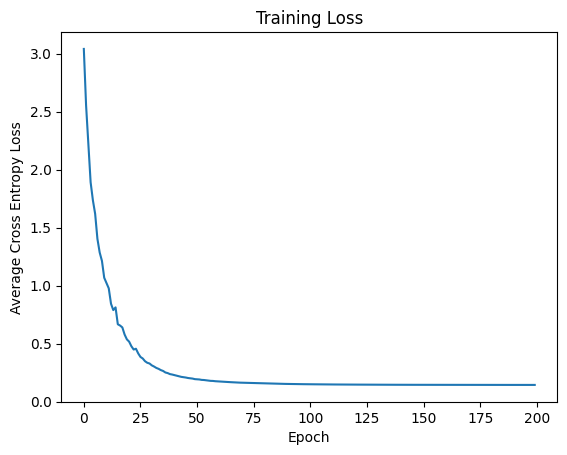

Best lambda_reg: 0.001, Accuracy: 0.782069157836029


In [ ]:
HIDDEN_SIZE = 128
GRADIENT_STEPS = 200
n_features = X_MNIST_normalized.shape[-1]
learning_rate = 0.07

# Define the range of lambda_reg values to test
lambda_regs = [0.0009, 0.001, 0.002, 0.003]

best_lambda_reg = None
best_accuracy = 0

for lambda_reg in lambda_regs:
    mlp = MLP(
        LinearLayer(n_features, HIDDEN_SIZE),
        ActivationLayer(),
        LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
        ActivationLayer(),
        LinearLayer(HIDDEN_SIZE, 25),
        SoftmaxOutputLayer()
    )
    opt = GradientDescentOptimizer(lr=learning_rate, lambda_reg=lambda_reg)
    opt.attach_network(mlp)

    mlp.fit(opt, X=X_train, y=y_train, epochs=GRADIENT_STEPS, batch_size=200)
    prediction = mlp.predict(X_test)
    accuracy_score = mlp.evaluate_acc(prediction, y_test)

    if accuracy_score > best_accuracy:
        best_accuracy = accuracy_score
        best_lambda_reg = lambda_reg

# Output the best lambda_reg value and the corresponding accuracy
print(f'Best lambda_reg: {best_lambda_reg}, Accuracy: {best_accuracy}')


# Plot accuracies as a function of hidden layer

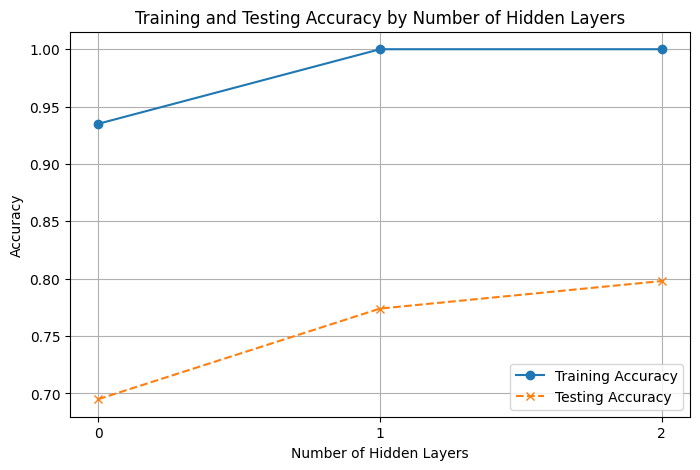

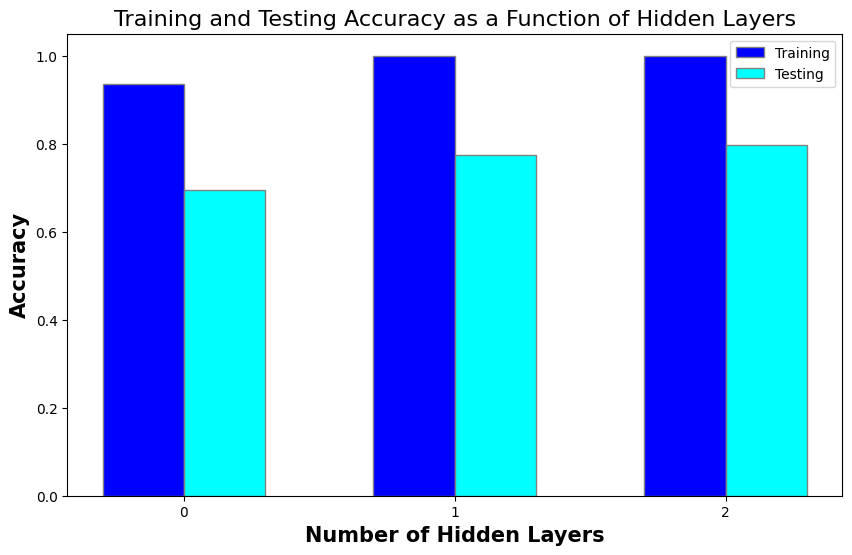

In [ ]:
hidden_layer_configs = [0, 1, 2]
training_accuracies = [.935, 1.0, 1.0]
testing_accuracies = [.695, .774, .798]

# Now, plotting the accuracies
plt.figure(figsize=(8, 5))
plt.plot(hidden_layer_configs, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(hidden_layer_configs, testing_accuracies, label='Testing Accuracy', linestyle='--', marker='x')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy by Number of Hidden Layers')
plt.xticks(hidden_layer_configs)  # Ensure we have a tick for each hidden layer count
plt.legend()
plt.grid(True)
plt.show()

# Setting up the bar width
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(training_accuracies))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.figure(figsize=(10,6))
plt.bar(r1, training_accuracies, color='blue', width=barWidth, edgecolor='grey', label='Training')
plt.bar(r2, testing_accuracies, color='cyan', width=barWidth, edgecolor='grey', label='Testing')

# Add xticks on the middle of the group bars
plt.xlabel('Number of Hidden Layers', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(training_accuracies))], hidden_layer_configs)

# Create legend & Show graphic
plt.ylabel('Accuracy', fontweight='bold', fontsize=15)
plt.title('Training and Testing Accuracy as a Function of Hidden Layers', fontsize=16)
plt.legend()
plt.show()

# Plot accuracies as a function of activation function

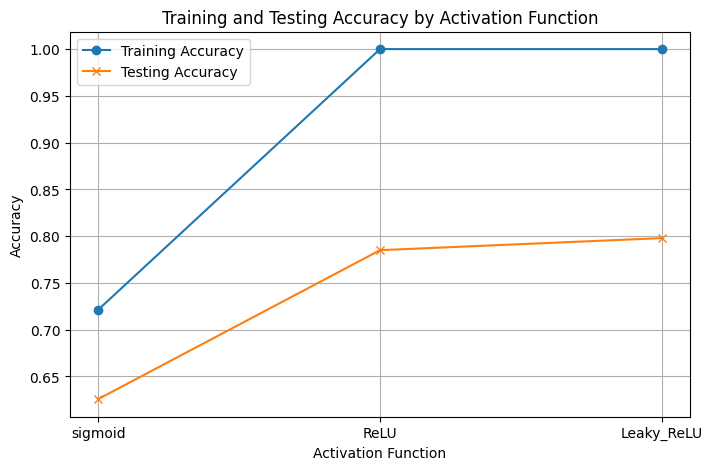

In [ ]:
hidden_layers = ['sigmoid', 'ReLU', 'Leaky_ReLU']
training_accuracies = [0.7213, 1.00, 1.00]
testing_accuracies = [0.6258, 0.785, 0.7979]

# Now, plotting the accuracies
plt.figure(figsize=(8, 5))
plt.plot(hidden_layers, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(hidden_layers, testing_accuracies, label='Testing Accuracy', marker='x')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy by Activation Function')
plt.xticks(hidden_layers)
plt.legend()
plt.grid(True)
plt.show()

# Micro-averaged AUROC for different hidden layers

  0%|          | 1/800 [00:00<03:39,  3.63it/s]

Epoch 1/800, Loss: 2.8232, Training Accuracy: 0.2279, Testing Accuracy: 0.2213


  0%|          | 2/800 [00:00<03:57,  3.36it/s]

Epoch 2/800, Loss: 2.2633, Training Accuracy: 0.3807, Testing Accuracy: 0.3436


  0%|          | 3/800 [00:00<03:55,  3.38it/s]

Epoch 3/800, Loss: 1.9615, Training Accuracy: 0.5419, Testing Accuracy: 0.4709


  0%|          | 4/800 [00:01<03:48,  3.49it/s]

Epoch 4/800, Loss: 1.7655, Training Accuracy: 0.5812, Testing Accuracy: 0.4866


  1%|          | 5/800 [00:01<03:41,  3.58it/s]

Epoch 5/800, Loss: 1.6256, Training Accuracy: 0.6196, Testing Accuracy: 0.5234


  1%|          | 6/800 [00:01<03:41,  3.59it/s]

Epoch 6/800, Loss: 1.5199, Training Accuracy: 0.5887, Testing Accuracy: 0.5052


  1%|          | 7/800 [00:01<03:45,  3.51it/s]

Epoch 7/800, Loss: 1.4341, Training Accuracy: 0.6407, Testing Accuracy: 0.5699


  1%|          | 8/800 [00:02<03:32,  3.73it/s]

Epoch 8/800, Loss: 1.3590, Training Accuracy: 0.6621, Testing Accuracy: 0.5598


  1%|          | 9/800 [00:02<03:22,  3.91it/s]

Epoch 9/800, Loss: 1.2967, Training Accuracy: 0.6545, Testing Accuracy: 0.5354


  1%|▏         | 10/800 [00:02<03:20,  3.95it/s]

Epoch 10/800, Loss: 1.2438, Training Accuracy: 0.7220, Testing Accuracy: 0.6016


  2%|▏         | 12/800 [00:03<03:01,  4.34it/s]

Epoch 11/800, Loss: 1.1958, Training Accuracy: 0.7131, Testing Accuracy: 0.5853
Epoch 12/800, Loss: 1.1547, Training Accuracy: 0.7075, Testing Accuracy: 0.5898


  2%|▏         | 14/800 [00:03<02:29,  5.25it/s]

Epoch 13/800, Loss: 1.1151, Training Accuracy: 0.6972, Testing Accuracy: 0.5774
Epoch 14/800, Loss: 1.0821, Training Accuracy: 0.7412, Testing Accuracy: 0.6252


  2%|▏         | 15/800 [00:03<02:23,  5.48it/s]

Epoch 15/800, Loss: 1.0489, Training Accuracy: 0.7215, Testing Accuracy: 0.6161


  2%|▏         | 16/800 [00:03<02:33,  5.09it/s]

Epoch 16/800, Loss: 1.0199, Training Accuracy: 0.7533, Testing Accuracy: 0.6220


  2%|▏         | 17/800 [00:04<02:36,  5.01it/s]

Epoch 17/800, Loss: 0.9937, Training Accuracy: 0.7816, Testing Accuracy: 0.6228


  2%|▏         | 19/800 [00:04<02:36,  5.00it/s]

Epoch 18/800, Loss: 0.9688, Training Accuracy: 0.7690, Testing Accuracy: 0.6159
Epoch 19/800, Loss: 0.9470, Training Accuracy: 0.7736, Testing Accuracy: 0.6341


  2%|▎         | 20/800 [00:04<02:36,  5.00it/s]

Epoch 20/800, Loss: 0.9250, Training Accuracy: 0.7827, Testing Accuracy: 0.6325


  3%|▎         | 21/800 [00:04<02:41,  4.83it/s]

Epoch 21/800, Loss: 0.9049, Training Accuracy: 0.7957, Testing Accuracy: 0.6451


  3%|▎         | 22/800 [00:05<02:43,  4.76it/s]

Epoch 22/800, Loss: 0.8849, Training Accuracy: 0.8011, Testing Accuracy: 0.6530


  3%|▎         | 23/800 [00:05<02:49,  4.58it/s]

Epoch 23/800, Loss: 0.8671, Training Accuracy: 0.7637, Testing Accuracy: 0.6205


  3%|▎         | 24/800 [00:05<02:54,  4.45it/s]

Epoch 24/800, Loss: 0.8511, Training Accuracy: 0.7800, Testing Accuracy: 0.6465


  3%|▎         | 25/800 [00:05<02:53,  4.47it/s]

Epoch 25/800, Loss: 0.8333, Training Accuracy: 0.8126, Testing Accuracy: 0.6447


  3%|▎         | 26/800 [00:06<02:56,  4.38it/s]

Epoch 26/800, Loss: 0.8181, Training Accuracy: 0.8160, Testing Accuracy: 0.6673


  3%|▎         | 27/800 [00:06<03:00,  4.29it/s]

Epoch 27/800, Loss: 0.8050, Training Accuracy: 0.8022, Testing Accuracy: 0.6453


  4%|▎         | 28/800 [00:06<02:57,  4.36it/s]

Epoch 28/800, Loss: 0.7897, Training Accuracy: 0.8242, Testing Accuracy: 0.6545


  4%|▎         | 29/800 [00:06<02:58,  4.31it/s]

Epoch 29/800, Loss: 0.7759, Training Accuracy: 0.8299, Testing Accuracy: 0.6436


  4%|▍         | 31/800 [00:07<02:37,  4.88it/s]

Epoch 30/800, Loss: 0.7655, Training Accuracy: 0.8292, Testing Accuracy: 0.6541
Epoch 31/800, Loss: 0.7529, Training Accuracy: 0.8173, Testing Accuracy: 0.6460


  4%|▍         | 33/800 [00:07<02:15,  5.65it/s]

Epoch 32/800, Loss: 0.7398, Training Accuracy: 0.8272, Testing Accuracy: 0.6617
Epoch 33/800, Loss: 0.7304, Training Accuracy: 0.8308, Testing Accuracy: 0.6605


  4%|▍         | 35/800 [00:07<02:05,  6.11it/s]

Epoch 34/800, Loss: 0.7186, Training Accuracy: 0.8560, Testing Accuracy: 0.6774
Epoch 35/800, Loss: 0.7063, Training Accuracy: 0.8504, Testing Accuracy: 0.6495


  5%|▍         | 37/800 [00:08<02:02,  6.20it/s]

Epoch 36/800, Loss: 0.6979, Training Accuracy: 0.8577, Testing Accuracy: 0.6719
Epoch 37/800, Loss: 0.6890, Training Accuracy: 0.8529, Testing Accuracy: 0.6552


  5%|▍         | 39/800 [00:08<01:57,  6.48it/s]

Epoch 38/800, Loss: 0.6791, Training Accuracy: 0.8498, Testing Accuracy: 0.6810
Epoch 39/800, Loss: 0.6711, Training Accuracy: 0.8468, Testing Accuracy: 0.6691


  5%|▌         | 41/800 [00:08<01:54,  6.62it/s]

Epoch 40/800, Loss: 0.6614, Training Accuracy: 0.8588, Testing Accuracy: 0.6644
Epoch 41/800, Loss: 0.6526, Training Accuracy: 0.8439, Testing Accuracy: 0.6631


  5%|▌         | 43/800 [00:08<01:55,  6.54it/s]

Epoch 42/800, Loss: 0.6445, Training Accuracy: 0.8466, Testing Accuracy: 0.6712
Epoch 43/800, Loss: 0.6358, Training Accuracy: 0.8622, Testing Accuracy: 0.6513


  6%|▌         | 45/800 [00:09<01:57,  6.45it/s]

Epoch 44/800, Loss: 0.6284, Training Accuracy: 0.8681, Testing Accuracy: 0.6730
Epoch 45/800, Loss: 0.6195, Training Accuracy: 0.8517, Testing Accuracy: 0.6818


  6%|▌         | 47/800 [00:09<01:54,  6.57it/s]

Epoch 46/800, Loss: 0.6129, Training Accuracy: 0.8769, Testing Accuracy: 0.6824
Epoch 47/800, Loss: 0.6044, Training Accuracy: 0.8758, Testing Accuracy: 0.6873


  6%|▌         | 49/800 [00:09<01:53,  6.61it/s]

Epoch 48/800, Loss: 0.5990, Training Accuracy: 0.8682, Testing Accuracy: 0.6874
Epoch 49/800, Loss: 0.5933, Training Accuracy: 0.8748, Testing Accuracy: 0.6868


  6%|▋         | 51/800 [00:10<01:53,  6.57it/s]

Epoch 50/800, Loss: 0.5853, Training Accuracy: 0.8485, Testing Accuracy: 0.6831
Epoch 51/800, Loss: 0.5792, Training Accuracy: 0.8797, Testing Accuracy: 0.6878


  7%|▋         | 53/800 [00:10<01:51,  6.69it/s]

Epoch 52/800, Loss: 0.5722, Training Accuracy: 0.8881, Testing Accuracy: 0.6868
Epoch 53/800, Loss: 0.5666, Training Accuracy: 0.8740, Testing Accuracy: 0.6923


  7%|▋         | 55/800 [00:10<01:50,  6.73it/s]

Epoch 54/800, Loss: 0.5594, Training Accuracy: 0.8900, Testing Accuracy: 0.6804
Epoch 55/800, Loss: 0.5555, Training Accuracy: 0.8885, Testing Accuracy: 0.6835


  7%|▋         | 57/800 [00:11<01:53,  6.56it/s]

Epoch 56/800, Loss: 0.5491, Training Accuracy: 0.8938, Testing Accuracy: 0.6906
Epoch 57/800, Loss: 0.5442, Training Accuracy: 0.8893, Testing Accuracy: 0.6769


  7%|▋         | 59/800 [00:11<01:53,  6.55it/s]

Epoch 58/800, Loss: 0.5379, Training Accuracy: 0.8928, Testing Accuracy: 0.6786
Epoch 59/800, Loss: 0.5324, Training Accuracy: 0.8931, Testing Accuracy: 0.6917


  8%|▊         | 61/800 [00:11<01:56,  6.35it/s]

Epoch 60/800, Loss: 0.5274, Training Accuracy: 0.8928, Testing Accuracy: 0.6737
Epoch 61/800, Loss: 0.5220, Training Accuracy: 0.9008, Testing Accuracy: 0.6873


  8%|▊         | 63/800 [00:11<01:55,  6.40it/s]

Epoch 62/800, Loss: 0.5175, Training Accuracy: 0.8979, Testing Accuracy: 0.6580
Epoch 63/800, Loss: 0.5128, Training Accuracy: 0.8684, Testing Accuracy: 0.6725


  8%|▊         | 65/800 [00:12<01:54,  6.43it/s]

Epoch 64/800, Loss: 0.5069, Training Accuracy: 0.8877, Testing Accuracy: 0.6793
Epoch 65/800, Loss: 0.5026, Training Accuracy: 0.8916, Testing Accuracy: 0.6767


  8%|▊         | 67/800 [00:12<01:53,  6.49it/s]

Epoch 66/800, Loss: 0.4985, Training Accuracy: 0.9105, Testing Accuracy: 0.6850
Epoch 67/800, Loss: 0.4936, Training Accuracy: 0.8919, Testing Accuracy: 0.6935


  9%|▊         | 69/800 [00:12<01:50,  6.60it/s]

Epoch 68/800, Loss: 0.4887, Training Accuracy: 0.9080, Testing Accuracy: 0.6867
Epoch 69/800, Loss: 0.4835, Training Accuracy: 0.9099, Testing Accuracy: 0.6846


  9%|▉         | 71/800 [00:13<01:52,  6.50it/s]

Epoch 70/800, Loss: 0.4808, Training Accuracy: 0.9149, Testing Accuracy: 0.7012
Epoch 71/800, Loss: 0.4757, Training Accuracy: 0.9044, Testing Accuracy: 0.6891


  9%|▉         | 73/800 [00:13<01:49,  6.63it/s]

Epoch 72/800, Loss: 0.4713, Training Accuracy: 0.9118, Testing Accuracy: 0.6860
Epoch 73/800, Loss: 0.4686, Training Accuracy: 0.9147, Testing Accuracy: 0.6810


  9%|▉         | 75/800 [00:13<01:49,  6.62it/s]

Epoch 74/800, Loss: 0.4640, Training Accuracy: 0.9159, Testing Accuracy: 0.6764
Epoch 75/800, Loss: 0.4613, Training Accuracy: 0.9138, Testing Accuracy: 0.6935


 10%|▉         | 77/800 [00:14<01:50,  6.54it/s]

Epoch 76/800, Loss: 0.4557, Training Accuracy: 0.9126, Testing Accuracy: 0.6972
Epoch 77/800, Loss: 0.4526, Training Accuracy: 0.8918, Testing Accuracy: 0.6659


 10%|▉         | 79/800 [00:14<01:49,  6.59it/s]

Epoch 78/800, Loss: 0.4486, Training Accuracy: 0.9149, Testing Accuracy: 0.6924
Epoch 79/800, Loss: 0.4457, Training Accuracy: 0.9194, Testing Accuracy: 0.6838


 10%|█         | 81/800 [00:14<01:48,  6.65it/s]

Epoch 80/800, Loss: 0.4411, Training Accuracy: 0.9201, Testing Accuracy: 0.7016
Epoch 81/800, Loss: 0.4380, Training Accuracy: 0.9127, Testing Accuracy: 0.6912


 10%|█         | 83/800 [00:15<01:47,  6.66it/s]

Epoch 82/800, Loss: 0.4337, Training Accuracy: 0.9207, Testing Accuracy: 0.6843
Epoch 83/800, Loss: 0.4309, Training Accuracy: 0.9213, Testing Accuracy: 0.6946


 11%|█         | 85/800 [00:15<01:49,  6.51it/s]

Epoch 84/800, Loss: 0.4270, Training Accuracy: 0.9181, Testing Accuracy: 0.7078
Epoch 85/800, Loss: 0.4237, Training Accuracy: 0.9308, Testing Accuracy: 0.6977


 11%|█         | 87/800 [00:15<01:50,  6.45it/s]

Epoch 86/800, Loss: 0.4211, Training Accuracy: 0.9244, Testing Accuracy: 0.6885
Epoch 87/800, Loss: 0.4163, Training Accuracy: 0.9225, Testing Accuracy: 0.7030


 11%|█         | 89/800 [00:15<01:49,  6.49it/s]

Epoch 88/800, Loss: 0.4144, Training Accuracy: 0.9316, Testing Accuracy: 0.6991
Epoch 89/800, Loss: 0.4108, Training Accuracy: 0.9205, Testing Accuracy: 0.7001


 11%|█▏        | 91/800 [00:16<01:50,  6.40it/s]

Epoch 90/800, Loss: 0.4076, Training Accuracy: 0.9334, Testing Accuracy: 0.7019
Epoch 91/800, Loss: 0.4050, Training Accuracy: 0.9244, Testing Accuracy: 0.7064


 12%|█▏        | 93/800 [00:16<01:49,  6.47it/s]

Epoch 92/800, Loss: 0.4019, Training Accuracy: 0.9276, Testing Accuracy: 0.6974
Epoch 93/800, Loss: 0.3991, Training Accuracy: 0.9229, Testing Accuracy: 0.6655


 12%|█▏        | 95/800 [00:16<01:47,  6.55it/s]

Epoch 94/800, Loss: 0.3968, Training Accuracy: 0.9341, Testing Accuracy: 0.7022
Epoch 95/800, Loss: 0.3932, Training Accuracy: 0.9348, Testing Accuracy: 0.6983


 12%|█▏        | 96/800 [00:17<02:03,  5.71it/s]

Epoch 96/800, Loss: 0.3907, Training Accuracy: 0.9337, Testing Accuracy: 0.7069


 12%|█▏        | 98/800 [00:17<02:11,  5.35it/s]

Epoch 97/800, Loss: 0.3873, Training Accuracy: 0.9324, Testing Accuracy: 0.6988
Epoch 98/800, Loss: 0.3844, Training Accuracy: 0.9377, Testing Accuracy: 0.6920


 12%|█▎        | 100/800 [00:17<02:12,  5.27it/s]

Epoch 99/800, Loss: 0.3822, Training Accuracy: 0.9397, Testing Accuracy: 0.7051
Epoch 100/800, Loss: 0.3804, Training Accuracy: 0.9343, Testing Accuracy: 0.6804


 13%|█▎        | 101/800 [00:18<02:13,  5.25it/s]

Epoch 101/800, Loss: 0.3768, Training Accuracy: 0.9391, Testing Accuracy: 0.7002


 13%|█▎        | 102/800 [00:18<02:20,  4.97it/s]

Epoch 102/800, Loss: 0.3737, Training Accuracy: 0.9454, Testing Accuracy: 0.6990


 13%|█▎        | 103/800 [00:18<02:22,  4.90it/s]

Epoch 103/800, Loss: 0.3714, Training Accuracy: 0.9441, Testing Accuracy: 0.6899


 13%|█▎        | 104/800 [00:18<02:26,  4.75it/s]

Epoch 104/800, Loss: 0.3690, Training Accuracy: 0.9341, Testing Accuracy: 0.6985


 13%|█▎        | 105/800 [00:19<02:32,  4.57it/s]

Epoch 105/800, Loss: 0.3665, Training Accuracy: 0.9443, Testing Accuracy: 0.6984


 13%|█▎        | 106/800 [00:19<02:35,  4.46it/s]

Epoch 106/800, Loss: 0.3649, Training Accuracy: 0.9385, Testing Accuracy: 0.6931


 13%|█▎        | 107/800 [00:19<02:38,  4.36it/s]

Epoch 107/800, Loss: 0.3629, Training Accuracy: 0.9368, Testing Accuracy: 0.6902


 14%|█▎        | 108/800 [00:19<02:39,  4.34it/s]

Epoch 108/800, Loss: 0.3595, Training Accuracy: 0.9469, Testing Accuracy: 0.6847


 14%|█▎        | 109/800 [00:19<02:37,  4.38it/s]

Epoch 109/800, Loss: 0.3566, Training Accuracy: 0.9499, Testing Accuracy: 0.6931


 14%|█▍        | 111/800 [00:20<02:31,  4.54it/s]

Epoch 110/800, Loss: 0.3544, Training Accuracy: 0.9486, Testing Accuracy: 0.6988
Epoch 111/800, Loss: 0.3519, Training Accuracy: 0.9502, Testing Accuracy: 0.6927


 14%|█▍        | 113/800 [00:20<02:08,  5.34it/s]

Epoch 112/800, Loss: 0.3495, Training Accuracy: 0.9333, Testing Accuracy: 0.6898
Epoch 113/800, Loss: 0.3483, Training Accuracy: 0.9438, Testing Accuracy: 0.6895


 14%|█▍        | 115/800 [00:21<02:00,  5.67it/s]

Epoch 114/800, Loss: 0.3459, Training Accuracy: 0.9419, Testing Accuracy: 0.6906
Epoch 115/800, Loss: 0.3432, Training Accuracy: 0.9473, Testing Accuracy: 0.7011


 15%|█▍        | 117/800 [00:21<01:51,  6.11it/s]

Epoch 116/800, Loss: 0.3405, Training Accuracy: 0.9471, Testing Accuracy: 0.6977
Epoch 117/800, Loss: 0.3384, Training Accuracy: 0.9554, Testing Accuracy: 0.6963


 15%|█▍        | 119/800 [00:21<01:47,  6.36it/s]

Epoch 118/800, Loss: 0.3379, Training Accuracy: 0.9482, Testing Accuracy: 0.6987
Epoch 119/800, Loss: 0.3340, Training Accuracy: 0.9490, Testing Accuracy: 0.7011


 15%|█▌        | 121/800 [00:21<01:44,  6.47it/s]

Epoch 120/800, Loss: 0.3335, Training Accuracy: 0.9507, Testing Accuracy: 0.6991
Epoch 121/800, Loss: 0.3300, Training Accuracy: 0.9422, Testing Accuracy: 0.6840


 15%|█▌        | 123/800 [00:22<01:43,  6.56it/s]

Epoch 122/800, Loss: 0.3285, Training Accuracy: 0.9514, Testing Accuracy: 0.6920
Epoch 123/800, Loss: 0.3261, Training Accuracy: 0.9475, Testing Accuracy: 0.7002


 16%|█▌        | 125/800 [00:22<01:44,  6.45it/s]

Epoch 124/800, Loss: 0.3250, Training Accuracy: 0.9504, Testing Accuracy: 0.7111
Epoch 125/800, Loss: 0.3225, Training Accuracy: 0.9549, Testing Accuracy: 0.7052


 16%|█▌        | 127/800 [00:22<01:42,  6.54it/s]

Epoch 126/800, Loss: 0.3209, Training Accuracy: 0.9539, Testing Accuracy: 0.6939
Epoch 127/800, Loss: 0.3184, Training Accuracy: 0.9571, Testing Accuracy: 0.6992


 16%|█▌        | 129/800 [00:23<01:45,  6.37it/s]

Epoch 128/800, Loss: 0.3169, Training Accuracy: 0.9615, Testing Accuracy: 0.6992
Epoch 129/800, Loss: 0.3145, Training Accuracy: 0.9634, Testing Accuracy: 0.6998


 16%|█▋        | 131/800 [00:23<01:43,  6.46it/s]

Epoch 130/800, Loss: 0.3133, Training Accuracy: 0.9586, Testing Accuracy: 0.7034
Epoch 131/800, Loss: 0.3115, Training Accuracy: 0.9608, Testing Accuracy: 0.6931


 17%|█▋        | 133/800 [00:23<01:43,  6.47it/s]

Epoch 132/800, Loss: 0.3091, Training Accuracy: 0.9600, Testing Accuracy: 0.6939
Epoch 133/800, Loss: 0.3082, Training Accuracy: 0.9419, Testing Accuracy: 0.6853


 17%|█▋        | 135/800 [00:24<01:41,  6.53it/s]

Epoch 134/800, Loss: 0.3057, Training Accuracy: 0.9638, Testing Accuracy: 0.6937
Epoch 135/800, Loss: 0.3037, Training Accuracy: 0.9576, Testing Accuracy: 0.6857


 17%|█▋        | 137/800 [00:24<01:40,  6.61it/s]

Epoch 136/800, Loss: 0.3020, Training Accuracy: 0.9586, Testing Accuracy: 0.6905
Epoch 137/800, Loss: 0.3003, Training Accuracy: 0.9615, Testing Accuracy: 0.6898


 17%|█▋        | 139/800 [00:24<01:41,  6.49it/s]

Epoch 138/800, Loss: 0.2995, Training Accuracy: 0.9639, Testing Accuracy: 0.6972
Epoch 139/800, Loss: 0.2974, Training Accuracy: 0.9567, Testing Accuracy: 0.6939


 18%|█▊        | 141/800 [00:25<01:40,  6.57it/s]

Epoch 140/800, Loss: 0.2958, Training Accuracy: 0.9517, Testing Accuracy: 0.6988
Epoch 141/800, Loss: 0.2945, Training Accuracy: 0.9613, Testing Accuracy: 0.6926


 18%|█▊        | 143/800 [00:25<01:40,  6.57it/s]

Epoch 142/800, Loss: 0.2923, Training Accuracy: 0.9610, Testing Accuracy: 0.6997
Epoch 143/800, Loss: 0.2910, Training Accuracy: 0.9596, Testing Accuracy: 0.7057


 18%|█▊        | 145/800 [00:25<01:39,  6.58it/s]

Epoch 144/800, Loss: 0.2887, Training Accuracy: 0.9687, Testing Accuracy: 0.7065
Epoch 145/800, Loss: 0.2882, Training Accuracy: 0.9426, Testing Accuracy: 0.6973


 18%|█▊        | 147/800 [00:25<01:37,  6.69it/s]

Epoch 146/800, Loss: 0.2859, Training Accuracy: 0.9623, Testing Accuracy: 0.7111
Epoch 147/800, Loss: 0.2846, Training Accuracy: 0.9689, Testing Accuracy: 0.7043


 19%|█▊        | 149/800 [00:26<01:39,  6.54it/s]

Epoch 148/800, Loss: 0.2825, Training Accuracy: 0.9680, Testing Accuracy: 0.7054
Epoch 149/800, Loss: 0.2814, Training Accuracy: 0.9648, Testing Accuracy: 0.7094


 19%|█▉        | 151/800 [00:26<01:44,  6.24it/s]

Epoch 150/800, Loss: 0.2804, Training Accuracy: 0.9700, Testing Accuracy: 0.7020
Epoch 151/800, Loss: 0.2787, Training Accuracy: 0.9691, Testing Accuracy: 0.6983


 19%|█▉        | 153/800 [00:26<01:42,  6.29it/s]

Epoch 152/800, Loss: 0.2772, Training Accuracy: 0.9676, Testing Accuracy: 0.6967
Epoch 153/800, Loss: 0.2754, Training Accuracy: 0.9696, Testing Accuracy: 0.7025


 19%|█▉        | 155/800 [00:27<01:40,  6.44it/s]

Epoch 154/800, Loss: 0.2734, Training Accuracy: 0.9686, Testing Accuracy: 0.6984
Epoch 155/800, Loss: 0.2729, Training Accuracy: 0.9700, Testing Accuracy: 0.7051


 20%|█▉        | 157/800 [00:27<01:37,  6.60it/s]

Epoch 156/800, Loss: 0.2718, Training Accuracy: 0.9687, Testing Accuracy: 0.6909
Epoch 157/800, Loss: 0.2701, Training Accuracy: 0.9667, Testing Accuracy: 0.7020


 20%|█▉        | 159/800 [00:27<01:38,  6.49it/s]

Epoch 158/800, Loss: 0.2681, Training Accuracy: 0.9708, Testing Accuracy: 0.7026
Epoch 159/800, Loss: 0.2669, Training Accuracy: 0.9712, Testing Accuracy: 0.7030


 20%|██        | 161/800 [00:28<01:37,  6.57it/s]

Epoch 160/800, Loss: 0.2655, Training Accuracy: 0.9704, Testing Accuracy: 0.6946
Epoch 161/800, Loss: 0.2644, Training Accuracy: 0.9742, Testing Accuracy: 0.6991


 20%|██        | 163/800 [00:28<01:36,  6.62it/s]

Epoch 162/800, Loss: 0.2628, Training Accuracy: 0.9725, Testing Accuracy: 0.7011
Epoch 163/800, Loss: 0.2619, Training Accuracy: 0.9712, Testing Accuracy: 0.7068


 21%|██        | 165/800 [00:28<01:37,  6.52it/s]

Epoch 164/800, Loss: 0.2607, Training Accuracy: 0.9718, Testing Accuracy: 0.7036
Epoch 165/800, Loss: 0.2596, Training Accuracy: 0.9721, Testing Accuracy: 0.7051


 21%|██        | 167/800 [00:29<01:35,  6.63it/s]

Epoch 166/800, Loss: 0.2572, Training Accuracy: 0.9713, Testing Accuracy: 0.6939
Epoch 167/800, Loss: 0.2567, Training Accuracy: 0.9704, Testing Accuracy: 0.7057


 21%|██        | 169/800 [00:29<01:34,  6.67it/s]

Epoch 168/800, Loss: 0.2561, Training Accuracy: 0.9697, Testing Accuracy: 0.6984
Epoch 169/800, Loss: 0.2542, Training Accuracy: 0.9697, Testing Accuracy: 0.6939


 21%|██▏       | 171/800 [00:29<01:35,  6.59it/s]

Epoch 170/800, Loss: 0.2527, Training Accuracy: 0.9737, Testing Accuracy: 0.7075
Epoch 171/800, Loss: 0.2519, Training Accuracy: 0.9773, Testing Accuracy: 0.6974


 22%|██▏       | 173/800 [00:29<01:35,  6.55it/s]

Epoch 172/800, Loss: 0.2502, Training Accuracy: 0.9758, Testing Accuracy: 0.6991
Epoch 173/800, Loss: 0.2495, Training Accuracy: 0.9752, Testing Accuracy: 0.7009


 22%|██▏       | 175/800 [00:30<01:33,  6.69it/s]

Epoch 174/800, Loss: 0.2477, Training Accuracy: 0.9772, Testing Accuracy: 0.7057
Epoch 175/800, Loss: 0.2470, Training Accuracy: 0.9741, Testing Accuracy: 0.6995


 22%|██▏       | 176/800 [00:30<01:45,  5.94it/s]

Epoch 176/800, Loss: 0.2458, Training Accuracy: 0.9771, Testing Accuracy: 0.6973


 22%|██▏       | 177/800 [00:30<01:52,  5.53it/s]

Epoch 177/800, Loss: 0.2445, Training Accuracy: 0.9799, Testing Accuracy: 0.7012


 22%|██▏       | 179/800 [00:31<01:57,  5.28it/s]

Epoch 178/800, Loss: 0.2432, Training Accuracy: 0.9752, Testing Accuracy: 0.7048
Epoch 179/800, Loss: 0.2418, Training Accuracy: 0.9786, Testing Accuracy: 0.7104


 23%|██▎       | 181/800 [00:31<01:59,  5.19it/s]

Epoch 180/800, Loss: 0.2407, Training Accuracy: 0.9739, Testing Accuracy: 0.7037
Epoch 181/800, Loss: 0.2395, Training Accuracy: 0.9794, Testing Accuracy: 0.7094


 23%|██▎       | 182/800 [00:31<02:07,  4.84it/s]

Epoch 182/800, Loss: 0.2383, Training Accuracy: 0.9791, Testing Accuracy: 0.7055


 23%|██▎       | 183/800 [00:31<02:09,  4.77it/s]

Epoch 183/800, Loss: 0.2380, Training Accuracy: 0.9791, Testing Accuracy: 0.7015


 23%|██▎       | 184/800 [00:32<02:14,  4.60it/s]

Epoch 184/800, Loss: 0.2366, Training Accuracy: 0.9781, Testing Accuracy: 0.7054


 23%|██▎       | 185/800 [00:32<02:13,  4.60it/s]

Epoch 185/800, Loss: 0.2354, Training Accuracy: 0.9787, Testing Accuracy: 0.6898


 23%|██▎       | 186/800 [00:32<02:14,  4.57it/s]

Epoch 186/800, Loss: 0.2342, Training Accuracy: 0.9815, Testing Accuracy: 0.6951


 23%|██▎       | 187/800 [00:32<02:18,  4.41it/s]

Epoch 187/800, Loss: 0.2337, Training Accuracy: 0.9807, Testing Accuracy: 0.7097


 24%|██▎       | 188/800 [00:33<02:18,  4.42it/s]

Epoch 188/800, Loss: 0.2320, Training Accuracy: 0.9792, Testing Accuracy: 0.6907


 24%|██▎       | 189/800 [00:33<02:19,  4.39it/s]

Epoch 189/800, Loss: 0.2314, Training Accuracy: 0.9801, Testing Accuracy: 0.7069


 24%|██▍       | 191/800 [00:33<02:03,  4.91it/s]

Epoch 190/800, Loss: 0.2300, Training Accuracy: 0.9797, Testing Accuracy: 0.7041
Epoch 191/800, Loss: 0.2288, Training Accuracy: 0.9807, Testing Accuracy: 0.6991


 24%|██▍       | 193/800 [00:33<01:48,  5.59it/s]

Epoch 192/800, Loss: 0.2279, Training Accuracy: 0.9799, Testing Accuracy: 0.6983
Epoch 193/800, Loss: 0.2270, Training Accuracy: 0.9745, Testing Accuracy: 0.7012


 24%|██▍       | 195/800 [00:34<01:39,  6.09it/s]

Epoch 194/800, Loss: 0.2261, Training Accuracy: 0.9835, Testing Accuracy: 0.7072
Epoch 195/800, Loss: 0.2247, Training Accuracy: 0.9830, Testing Accuracy: 0.7076


 25%|██▍       | 197/800 [00:34<01:35,  6.32it/s]

Epoch 196/800, Loss: 0.2242, Training Accuracy: 0.9800, Testing Accuracy: 0.6946
Epoch 197/800, Loss: 0.2231, Training Accuracy: 0.9813, Testing Accuracy: 0.6981


 25%|██▍       | 199/800 [00:34<01:34,  6.35it/s]

Epoch 198/800, Loss: 0.2218, Training Accuracy: 0.9781, Testing Accuracy: 0.7103
Epoch 199/800, Loss: 0.2208, Training Accuracy: 0.9802, Testing Accuracy: 0.6985


 25%|██▌       | 201/800 [00:35<01:33,  6.43it/s]

Epoch 200/800, Loss: 0.2203, Training Accuracy: 0.9799, Testing Accuracy: 0.6980
Epoch 201/800, Loss: 0.2190, Training Accuracy: 0.9842, Testing Accuracy: 0.7059


 25%|██▌       | 203/800 [00:35<01:29,  6.65it/s]

Epoch 202/800, Loss: 0.2182, Training Accuracy: 0.9787, Testing Accuracy: 0.7001
Epoch 203/800, Loss: 0.2174, Training Accuracy: 0.9835, Testing Accuracy: 0.7078


 26%|██▌       | 205/800 [00:35<01:32,  6.47it/s]

Epoch 204/800, Loss: 0.2165, Training Accuracy: 0.9844, Testing Accuracy: 0.6873
Epoch 205/800, Loss: 0.2154, Training Accuracy: 0.9817, Testing Accuracy: 0.7073


 26%|██▌       | 207/800 [00:36<01:30,  6.54it/s]

Epoch 206/800, Loss: 0.2143, Training Accuracy: 0.9782, Testing Accuracy: 0.6969
Epoch 207/800, Loss: 0.2137, Training Accuracy: 0.9847, Testing Accuracy: 0.7023


 26%|██▌       | 209/800 [00:36<01:30,  6.53it/s]

Epoch 208/800, Loss: 0.2129, Training Accuracy: 0.9826, Testing Accuracy: 0.7029
Epoch 209/800, Loss: 0.2115, Training Accuracy: 0.9824, Testing Accuracy: 0.7052


 26%|██▋       | 211/800 [00:36<01:28,  6.66it/s]

Epoch 210/800, Loss: 0.2111, Training Accuracy: 0.9830, Testing Accuracy: 0.6977
Epoch 211/800, Loss: 0.2099, Training Accuracy: 0.9873, Testing Accuracy: 0.7006


 27%|██▋       | 213/800 [00:37<01:30,  6.49it/s]

Epoch 212/800, Loss: 0.2091, Training Accuracy: 0.9881, Testing Accuracy: 0.7016
Epoch 213/800, Loss: 0.2079, Training Accuracy: 0.9862, Testing Accuracy: 0.7052


 27%|██▋       | 215/800 [00:37<01:29,  6.52it/s]

Epoch 214/800, Loss: 0.2077, Training Accuracy: 0.9869, Testing Accuracy: 0.6914
Epoch 215/800, Loss: 0.2066, Training Accuracy: 0.9868, Testing Accuracy: 0.7059


 27%|██▋       | 217/800 [00:37<01:28,  6.59it/s]

Epoch 216/800, Loss: 0.2060, Training Accuracy: 0.9863, Testing Accuracy: 0.7091
Epoch 217/800, Loss: 0.2051, Training Accuracy: 0.9876, Testing Accuracy: 0.7093


 27%|██▋       | 219/800 [00:37<01:31,  6.35it/s]

Epoch 218/800, Loss: 0.2040, Training Accuracy: 0.9819, Testing Accuracy: 0.7121
Epoch 219/800, Loss: 0.2032, Training Accuracy: 0.9857, Testing Accuracy: 0.6974


 28%|██▊       | 221/800 [00:38<01:30,  6.37it/s]

Epoch 220/800, Loss: 0.2019, Training Accuracy: 0.9876, Testing Accuracy: 0.7026
Epoch 221/800, Loss: 0.2017, Training Accuracy: 0.9854, Testing Accuracy: 0.6870


 28%|██▊       | 223/800 [00:38<01:29,  6.47it/s]

Epoch 222/800, Loss: 0.2006, Training Accuracy: 0.9857, Testing Accuracy: 0.6985
Epoch 223/800, Loss: 0.1998, Training Accuracy: 0.9823, Testing Accuracy: 0.6991


 28%|██▊       | 225/800 [00:38<01:29,  6.45it/s]

Epoch 224/800, Loss: 0.1992, Training Accuracy: 0.9884, Testing Accuracy: 0.7008
Epoch 225/800, Loss: 0.1984, Training Accuracy: 0.9849, Testing Accuracy: 0.6984


 28%|██▊       | 227/800 [00:39<01:31,  6.25it/s]

Epoch 226/800, Loss: 0.1973, Training Accuracy: 0.9894, Testing Accuracy: 0.7115
Epoch 227/800, Loss: 0.1967, Training Accuracy: 0.9868, Testing Accuracy: 0.6991


 29%|██▊       | 229/800 [00:39<01:30,  6.32it/s]

Epoch 228/800, Loss: 0.1961, Training Accuracy: 0.9892, Testing Accuracy: 0.7032
Epoch 229/800, Loss: 0.1953, Training Accuracy: 0.9767, Testing Accuracy: 0.7034


 29%|██▉       | 231/800 [00:39<01:29,  6.34it/s]

Epoch 230/800, Loss: 0.1946, Training Accuracy: 0.9878, Testing Accuracy: 0.6938
Epoch 231/800, Loss: 0.1937, Training Accuracy: 0.9887, Testing Accuracy: 0.6955


 29%|██▉       | 233/800 [00:40<01:30,  6.30it/s]

Epoch 232/800, Loss: 0.1926, Training Accuracy: 0.9871, Testing Accuracy: 0.6945
Epoch 233/800, Loss: 0.1917, Training Accuracy: 0.9906, Testing Accuracy: 0.6985


 29%|██▉       | 235/800 [00:40<01:26,  6.52it/s]

Epoch 234/800, Loss: 0.1913, Training Accuracy: 0.9893, Testing Accuracy: 0.7009
Epoch 235/800, Loss: 0.1910, Training Accuracy: 0.9869, Testing Accuracy: 0.7001


 30%|██▉       | 237/800 [00:40<01:26,  6.52it/s]

Epoch 236/800, Loss: 0.1896, Training Accuracy: 0.9885, Testing Accuracy: 0.6990
Epoch 237/800, Loss: 0.1891, Training Accuracy: 0.9888, Testing Accuracy: 0.6944


 30%|██▉       | 239/800 [00:41<01:26,  6.50it/s]

Epoch 238/800, Loss: 0.1884, Training Accuracy: 0.9825, Testing Accuracy: 0.7023
Epoch 239/800, Loss: 0.1883, Training Accuracy: 0.9851, Testing Accuracy: 0.7040


 30%|███       | 241/800 [00:41<01:24,  6.61it/s]

Epoch 240/800, Loss: 0.1873, Training Accuracy: 0.9894, Testing Accuracy: 0.6998
Epoch 241/800, Loss: 0.1865, Training Accuracy: 0.9901, Testing Accuracy: 0.7018


 30%|███       | 243/800 [00:41<01:24,  6.56it/s]

Epoch 242/800, Loss: 0.1863, Training Accuracy: 0.9888, Testing Accuracy: 0.7052
Epoch 243/800, Loss: 0.1854, Training Accuracy: 0.9895, Testing Accuracy: 0.7032


 31%|███       | 245/800 [00:41<01:27,  6.32it/s]

Epoch 244/800, Loss: 0.1845, Training Accuracy: 0.9899, Testing Accuracy: 0.6984
Epoch 245/800, Loss: 0.1838, Training Accuracy: 0.9913, Testing Accuracy: 0.7079


 31%|███       | 247/800 [00:42<01:31,  6.07it/s]

Epoch 246/800, Loss: 0.1832, Training Accuracy: 0.9885, Testing Accuracy: 0.7030
Epoch 247/800, Loss: 0.1823, Training Accuracy: 0.9897, Testing Accuracy: 0.7038


 31%|███       | 249/800 [00:42<01:32,  5.95it/s]

Epoch 248/800, Loss: 0.1821, Training Accuracy: 0.9898, Testing Accuracy: 0.7073
Epoch 249/800, Loss: 0.1809, Training Accuracy: 0.9910, Testing Accuracy: 0.7065


 31%|███▏      | 251/800 [00:43<01:33,  5.85it/s]

Epoch 250/800, Loss: 0.1802, Training Accuracy: 0.9913, Testing Accuracy: 0.7048
Epoch 251/800, Loss: 0.1804, Training Accuracy: 0.9845, Testing Accuracy: 0.6992


 32%|███▏      | 253/800 [00:43<01:30,  6.07it/s]

Epoch 252/800, Loss: 0.1790, Training Accuracy: 0.9895, Testing Accuracy: 0.7058
Epoch 253/800, Loss: 0.1786, Training Accuracy: 0.9916, Testing Accuracy: 0.7058


 32%|███▏      | 254/800 [00:43<01:31,  5.99it/s]

Epoch 254/800, Loss: 0.1775, Training Accuracy: 0.9906, Testing Accuracy: 0.7012


 32%|███▏      | 256/800 [00:43<01:40,  5.41it/s]

Epoch 255/800, Loss: 0.1765, Training Accuracy: 0.9918, Testing Accuracy: 0.7100
Epoch 256/800, Loss: 0.1763, Training Accuracy: 0.9913, Testing Accuracy: 0.7041


 32%|███▏      | 258/800 [00:44<01:42,  5.28it/s]

Epoch 257/800, Loss: 0.1757, Training Accuracy: 0.9913, Testing Accuracy: 0.7018
Epoch 258/800, Loss: 0.1749, Training Accuracy: 0.9925, Testing Accuracy: 0.7045


 32%|███▎      | 260/800 [00:44<01:42,  5.26it/s]

Epoch 259/800, Loss: 0.1747, Training Accuracy: 0.9904, Testing Accuracy: 0.7029
Epoch 260/800, Loss: 0.1740, Training Accuracy: 0.9915, Testing Accuracy: 0.7065


 33%|███▎      | 261/800 [00:44<01:46,  5.04it/s]

Epoch 261/800, Loss: 0.1735, Training Accuracy: 0.9924, Testing Accuracy: 0.6997


 33%|███▎      | 262/800 [00:45<01:51,  4.81it/s]

Epoch 262/800, Loss: 0.1729, Training Accuracy: 0.9902, Testing Accuracy: 0.7019


 33%|███▎      | 263/800 [00:45<01:54,  4.68it/s]

Epoch 263/800, Loss: 0.1719, Training Accuracy: 0.9922, Testing Accuracy: 0.7037


 33%|███▎      | 264/800 [00:45<01:56,  4.61it/s]

Epoch 264/800, Loss: 0.1720, Training Accuracy: 0.9921, Testing Accuracy: 0.7025


 33%|███▎      | 265/800 [00:45<01:58,  4.53it/s]

Epoch 265/800, Loss: 0.1707, Training Accuracy: 0.9923, Testing Accuracy: 0.6985


 33%|███▎      | 266/800 [00:46<01:59,  4.46it/s]

Epoch 266/800, Loss: 0.1700, Training Accuracy: 0.9922, Testing Accuracy: 0.7032


 33%|███▎      | 267/800 [00:46<01:59,  4.46it/s]

Epoch 267/800, Loss: 0.1698, Training Accuracy: 0.9931, Testing Accuracy: 0.7083


 34%|███▎      | 268/800 [00:46<02:00,  4.41it/s]

Epoch 268/800, Loss: 0.1687, Training Accuracy: 0.9915, Testing Accuracy: 0.7033


 34%|███▍      | 270/800 [00:46<01:51,  4.74it/s]

Epoch 269/800, Loss: 0.1686, Training Accuracy: 0.9918, Testing Accuracy: 0.7025
Epoch 270/800, Loss: 0.1677, Training Accuracy: 0.9928, Testing Accuracy: 0.7032


 34%|███▍      | 272/800 [00:47<01:36,  5.46it/s]

Epoch 271/800, Loss: 0.1677, Training Accuracy: 0.9932, Testing Accuracy: 0.7051
Epoch 272/800, Loss: 0.1670, Training Accuracy: 0.9930, Testing Accuracy: 0.6972


 34%|███▍      | 274/800 [00:47<01:26,  6.05it/s]

Epoch 273/800, Loss: 0.1666, Training Accuracy: 0.9926, Testing Accuracy: 0.7072
Epoch 274/800, Loss: 0.1656, Training Accuracy: 0.9915, Testing Accuracy: 0.7061


 34%|███▍      | 276/800 [00:47<01:22,  6.34it/s]

Epoch 275/800, Loss: 0.1651, Training Accuracy: 0.9937, Testing Accuracy: 0.7043
Epoch 276/800, Loss: 0.1647, Training Accuracy: 0.9855, Testing Accuracy: 0.7013


 35%|███▍      | 278/800 [00:48<01:20,  6.51it/s]

Epoch 277/800, Loss: 0.1642, Training Accuracy: 0.9911, Testing Accuracy: 0.6941
Epoch 278/800, Loss: 0.1634, Training Accuracy: 0.9937, Testing Accuracy: 0.7002


 35%|███▌      | 280/800 [00:48<01:19,  6.54it/s]

Epoch 279/800, Loss: 0.1627, Training Accuracy: 0.9940, Testing Accuracy: 0.7008
Epoch 280/800, Loss: 0.1627, Training Accuracy: 0.9883, Testing Accuracy: 0.7025


 35%|███▌      | 282/800 [00:48<01:19,  6.54it/s]

Epoch 281/800, Loss: 0.1621, Training Accuracy: 0.9924, Testing Accuracy: 0.6959
Epoch 282/800, Loss: 0.1612, Training Accuracy: 0.9926, Testing Accuracy: 0.6942


 36%|███▌      | 284/800 [00:49<01:18,  6.54it/s]

Epoch 283/800, Loss: 0.1606, Training Accuracy: 0.9941, Testing Accuracy: 0.6979
Epoch 284/800, Loss: 0.1604, Training Accuracy: 0.9940, Testing Accuracy: 0.7032


 36%|███▌      | 286/800 [00:49<01:19,  6.48it/s]

Epoch 285/800, Loss: 0.1597, Training Accuracy: 0.9934, Testing Accuracy: 0.6984
Epoch 286/800, Loss: 0.1593, Training Accuracy: 0.9941, Testing Accuracy: 0.7027


 36%|███▌      | 288/800 [00:49<01:17,  6.59it/s]

Epoch 287/800, Loss: 0.1586, Training Accuracy: 0.9919, Testing Accuracy: 0.7052
Epoch 288/800, Loss: 0.1582, Training Accuracy: 0.9937, Testing Accuracy: 0.7075


 36%|███▋      | 290/800 [00:49<01:18,  6.52it/s]

Epoch 289/800, Loss: 0.1578, Training Accuracy: 0.9939, Testing Accuracy: 0.7025
Epoch 290/800, Loss: 0.1573, Training Accuracy: 0.9889, Testing Accuracy: 0.7013


 36%|███▋      | 292/800 [00:50<01:18,  6.51it/s]

Epoch 291/800, Loss: 0.1567, Training Accuracy: 0.9930, Testing Accuracy: 0.6973
Epoch 292/800, Loss: 0.1562, Training Accuracy: 0.9938, Testing Accuracy: 0.6956


 37%|███▋      | 294/800 [00:50<01:19,  6.36it/s]

Epoch 293/800, Loss: 0.1557, Training Accuracy: 0.9948, Testing Accuracy: 0.6997
Epoch 294/800, Loss: 0.1553, Training Accuracy: 0.9941, Testing Accuracy: 0.6992


 37%|███▋      | 296/800 [00:50<01:22,  6.14it/s]

Epoch 295/800, Loss: 0.1546, Training Accuracy: 0.9944, Testing Accuracy: 0.6987
Epoch 296/800, Loss: 0.1541, Training Accuracy: 0.9948, Testing Accuracy: 0.7030


 37%|███▋      | 298/800 [00:51<01:22,  6.12it/s]

Epoch 297/800, Loss: 0.1536, Training Accuracy: 0.9931, Testing Accuracy: 0.7029
Epoch 298/800, Loss: 0.1530, Training Accuracy: 0.9950, Testing Accuracy: 0.7002


 38%|███▊      | 300/800 [00:51<01:17,  6.43it/s]

Epoch 299/800, Loss: 0.1527, Training Accuracy: 0.9953, Testing Accuracy: 0.6976
Epoch 300/800, Loss: 0.1524, Training Accuracy: 0.9940, Testing Accuracy: 0.7026


 38%|███▊      | 302/800 [00:51<01:16,  6.52it/s]

Epoch 301/800, Loss: 0.1518, Training Accuracy: 0.9927, Testing Accuracy: 0.6979
Epoch 302/800, Loss: 0.1512, Training Accuracy: 0.9948, Testing Accuracy: 0.7005


 38%|███▊      | 304/800 [00:52<01:15,  6.61it/s]

Epoch 303/800, Loss: 0.1507, Training Accuracy: 0.9949, Testing Accuracy: 0.7110
Epoch 304/800, Loss: 0.1503, Training Accuracy: 0.9946, Testing Accuracy: 0.7044


 38%|███▊      | 306/800 [00:52<01:15,  6.53it/s]

Epoch 305/800, Loss: 0.1497, Training Accuracy: 0.9950, Testing Accuracy: 0.7030
Epoch 306/800, Loss: 0.1493, Training Accuracy: 0.9951, Testing Accuracy: 0.7013


 38%|███▊      | 308/800 [00:53<01:51,  4.41it/s]

Epoch 307/800, Loss: 0.1491, Training Accuracy: 0.9948, Testing Accuracy: 0.6930
Epoch 308/800, Loss: 0.1486, Training Accuracy: 0.9946, Testing Accuracy: 0.6965


 39%|███▉      | 310/800 [00:53<01:33,  5.24it/s]

Epoch 309/800, Loss: 0.1479, Training Accuracy: 0.9964, Testing Accuracy: 0.6991
Epoch 310/800, Loss: 0.1482, Training Accuracy: 0.9942, Testing Accuracy: 0.7037


 39%|███▉      | 311/800 [00:53<02:00,  4.06it/s]

Epoch 311/800, Loss: 0.1468, Training Accuracy: 0.9952, Testing Accuracy: 0.7002


 39%|███▉      | 313/800 [00:54<01:46,  4.59it/s]

Epoch 312/800, Loss: 0.1462, Training Accuracy: 0.9944, Testing Accuracy: 0.7086
Epoch 313/800, Loss: 0.1463, Training Accuracy: 0.9946, Testing Accuracy: 0.6914


 39%|███▉      | 315/800 [00:54<01:30,  5.36it/s]

Epoch 314/800, Loss: 0.1458, Training Accuracy: 0.9956, Testing Accuracy: 0.7098
Epoch 315/800, Loss: 0.1455, Training Accuracy: 0.9950, Testing Accuracy: 0.6984


 40%|███▉      | 317/800 [00:54<01:20,  5.97it/s]

Epoch 316/800, Loss: 0.1450, Training Accuracy: 0.9945, Testing Accuracy: 0.6921
Epoch 317/800, Loss: 0.1443, Training Accuracy: 0.9941, Testing Accuracy: 0.7045


 40%|███▉      | 319/800 [00:55<01:17,  6.24it/s]

Epoch 318/800, Loss: 0.1437, Training Accuracy: 0.9957, Testing Accuracy: 0.7022
Epoch 319/800, Loss: 0.1436, Training Accuracy: 0.9927, Testing Accuracy: 0.6958


 40%|████      | 321/800 [00:55<01:16,  6.29it/s]

Epoch 320/800, Loss: 0.1434, Training Accuracy: 0.9956, Testing Accuracy: 0.6934
Epoch 321/800, Loss: 0.1426, Training Accuracy: 0.9954, Testing Accuracy: 0.7009


 40%|████      | 323/800 [00:55<01:13,  6.48it/s]

Epoch 322/800, Loss: 0.1424, Training Accuracy: 0.9958, Testing Accuracy: 0.6972
Epoch 323/800, Loss: 0.1421, Training Accuracy: 0.9957, Testing Accuracy: 0.6949


 41%|████      | 325/800 [00:56<01:13,  6.48it/s]

Epoch 324/800, Loss: 0.1415, Training Accuracy: 0.9957, Testing Accuracy: 0.6956
Epoch 325/800, Loss: 0.1412, Training Accuracy: 0.9955, Testing Accuracy: 0.7038


 41%|████      | 327/800 [00:56<01:11,  6.58it/s]

Epoch 326/800, Loss: 0.1406, Training Accuracy: 0.9964, Testing Accuracy: 0.7019
Epoch 327/800, Loss: 0.1405, Training Accuracy: 0.9961, Testing Accuracy: 0.6999


 41%|████      | 329/800 [00:56<01:11,  6.60it/s]

Epoch 328/800, Loss: 0.1400, Training Accuracy: 0.9953, Testing Accuracy: 0.6974
Epoch 329/800, Loss: 0.1395, Training Accuracy: 0.9958, Testing Accuracy: 0.7068


 41%|████▏     | 330/800 [00:56<01:11,  6.53it/s]

Epoch 330/800, Loss: 0.1392, Training Accuracy: 0.9962, Testing Accuracy: 0.7073


 42%|████▏     | 332/800 [00:57<01:25,  5.50it/s]

Epoch 331/800, Loss: 0.1386, Training Accuracy: 0.9958, Testing Accuracy: 0.6984
Epoch 332/800, Loss: 0.1380, Training Accuracy: 0.9968, Testing Accuracy: 0.7023


 42%|████▏     | 334/800 [00:57<01:28,  5.24it/s]

Epoch 333/800, Loss: 0.1377, Training Accuracy: 0.9968, Testing Accuracy: 0.7047
Epoch 334/800, Loss: 0.1372, Training Accuracy: 0.9969, Testing Accuracy: 0.7051


 42%|████▏     | 335/800 [00:57<01:30,  5.17it/s]

Epoch 335/800, Loss: 0.1368, Training Accuracy: 0.9966, Testing Accuracy: 0.7011


 42%|████▏     | 336/800 [00:58<01:31,  5.05it/s]

Epoch 336/800, Loss: 0.1366, Training Accuracy: 0.9970, Testing Accuracy: 0.6999


 42%|████▏     | 337/800 [00:58<01:34,  4.91it/s]

Epoch 337/800, Loss: 0.1363, Training Accuracy: 0.9964, Testing Accuracy: 0.7025


 42%|████▏     | 338/800 [00:58<01:38,  4.68it/s]

Epoch 338/800, Loss: 0.1359, Training Accuracy: 0.9952, Testing Accuracy: 0.7005


 42%|████▏     | 339/800 [00:58<01:41,  4.54it/s]

Epoch 339/800, Loss: 0.1353, Training Accuracy: 0.9971, Testing Accuracy: 0.7019


 42%|████▎     | 340/800 [00:58<01:43,  4.46it/s]

Epoch 340/800, Loss: 0.1352, Training Accuracy: 0.9967, Testing Accuracy: 0.7062


 43%|████▎     | 341/800 [00:59<01:44,  4.40it/s]

Epoch 341/800, Loss: 0.1347, Training Accuracy: 0.9964, Testing Accuracy: 0.7027


 43%|████▎     | 342/800 [00:59<01:44,  4.38it/s]

Epoch 342/800, Loss: 0.1343, Training Accuracy: 0.9972, Testing Accuracy: 0.7027


 43%|████▎     | 343/800 [00:59<01:43,  4.41it/s]

Epoch 343/800, Loss: 0.1341, Training Accuracy: 0.9972, Testing Accuracy: 0.7045


 43%|████▎     | 344/800 [00:59<01:45,  4.33it/s]

Epoch 344/800, Loss: 0.1335, Training Accuracy: 0.9970, Testing Accuracy: 0.7055


 43%|████▎     | 346/800 [01:00<01:35,  4.74it/s]

Epoch 345/800, Loss: 0.1332, Training Accuracy: 0.9972, Testing Accuracy: 0.7022
Epoch 346/800, Loss: 0.1329, Training Accuracy: 0.9966, Testing Accuracy: 0.7012


 44%|████▎     | 348/800 [01:00<01:23,  5.41it/s]

Epoch 347/800, Loss: 0.1325, Training Accuracy: 0.9971, Testing Accuracy: 0.7025
Epoch 348/800, Loss: 0.1322, Training Accuracy: 0.9972, Testing Accuracy: 0.7052


 44%|████▍     | 350/800 [01:00<01:17,  5.83it/s]

Epoch 349/800, Loss: 0.1317, Training Accuracy: 0.9972, Testing Accuracy: 0.7078
Epoch 350/800, Loss: 0.1313, Training Accuracy: 0.9965, Testing Accuracy: 0.7071


 44%|████▍     | 352/800 [01:01<01:16,  5.86it/s]

Epoch 351/800, Loss: 0.1309, Training Accuracy: 0.9965, Testing Accuracy: 0.7023
Epoch 352/800, Loss: 0.1307, Training Accuracy: 0.9967, Testing Accuracy: 0.6991


 44%|████▍     | 354/800 [01:01<01:15,  5.88it/s]

Epoch 353/800, Loss: 0.1304, Training Accuracy: 0.9970, Testing Accuracy: 0.7068
Epoch 354/800, Loss: 0.1302, Training Accuracy: 0.9962, Testing Accuracy: 0.7038


 44%|████▍     | 356/800 [01:01<01:13,  6.02it/s]

Epoch 355/800, Loss: 0.1294, Training Accuracy: 0.9977, Testing Accuracy: 0.7050
Epoch 356/800, Loss: 0.1295, Training Accuracy: 0.9969, Testing Accuracy: 0.7037


 45%|████▍     | 358/800 [01:02<01:11,  6.20it/s]

Epoch 357/800, Loss: 0.1287, Training Accuracy: 0.9976, Testing Accuracy: 0.6988
Epoch 358/800, Loss: 0.1286, Training Accuracy: 0.9976, Testing Accuracy: 0.7040


 45%|████▌     | 360/800 [01:02<01:10,  6.23it/s]

Epoch 359/800, Loss: 0.1284, Training Accuracy: 0.9968, Testing Accuracy: 0.7052
Epoch 360/800, Loss: 0.1278, Training Accuracy: 0.9978, Testing Accuracy: 0.7068


 45%|████▌     | 362/800 [01:02<01:09,  6.34it/s]

Epoch 361/800, Loss: 0.1277, Training Accuracy: 0.9972, Testing Accuracy: 0.7012
Epoch 362/800, Loss: 0.1271, Training Accuracy: 0.9968, Testing Accuracy: 0.7037


 46%|████▌     | 364/800 [01:03<01:07,  6.50it/s]

Epoch 363/800, Loss: 0.1272, Training Accuracy: 0.9977, Testing Accuracy: 0.7022
Epoch 364/800, Loss: 0.1264, Training Accuracy: 0.9975, Testing Accuracy: 0.7047


 46%|████▌     | 366/800 [01:03<01:06,  6.54it/s]

Epoch 365/800, Loss: 0.1260, Training Accuracy: 0.9980, Testing Accuracy: 0.7064
Epoch 366/800, Loss: 0.1260, Training Accuracy: 0.9977, Testing Accuracy: 0.7027


 46%|████▌     | 368/800 [01:03<01:06,  6.51it/s]

Epoch 367/800, Loss: 0.1256, Training Accuracy: 0.9975, Testing Accuracy: 0.6972
Epoch 368/800, Loss: 0.1251, Training Accuracy: 0.9969, Testing Accuracy: 0.7015


 46%|████▋     | 370/800 [01:04<01:05,  6.57it/s]

Epoch 369/800, Loss: 0.1248, Training Accuracy: 0.9977, Testing Accuracy: 0.7012
Epoch 370/800, Loss: 0.1246, Training Accuracy: 0.9977, Testing Accuracy: 0.7052


 46%|████▋     | 372/800 [01:04<01:05,  6.53it/s]

Epoch 371/800, Loss: 0.1244, Training Accuracy: 0.9975, Testing Accuracy: 0.6995
Epoch 372/800, Loss: 0.1238, Training Accuracy: 0.9979, Testing Accuracy: 0.6933


 47%|████▋     | 374/800 [01:04<01:06,  6.44it/s]

Epoch 373/800, Loss: 0.1235, Training Accuracy: 0.9975, Testing Accuracy: 0.7022
Epoch 374/800, Loss: 0.1232, Training Accuracy: 0.9981, Testing Accuracy: 0.7011


 47%|████▋     | 376/800 [01:05<01:06,  6.42it/s]

Epoch 375/800, Loss: 0.1229, Training Accuracy: 0.9981, Testing Accuracy: 0.7025
Epoch 376/800, Loss: 0.1226, Training Accuracy: 0.9982, Testing Accuracy: 0.6952


 47%|████▋     | 378/800 [01:05<01:04,  6.56it/s]

Epoch 377/800, Loss: 0.1222, Training Accuracy: 0.9978, Testing Accuracy: 0.7006
Epoch 378/800, Loss: 0.1221, Training Accuracy: 0.9981, Testing Accuracy: 0.7026


 48%|████▊     | 380/800 [01:05<01:04,  6.48it/s]

Epoch 379/800, Loss: 0.1219, Training Accuracy: 0.9979, Testing Accuracy: 0.7072
Epoch 380/800, Loss: 0.1213, Training Accuracy: 0.9979, Testing Accuracy: 0.7048


 48%|████▊     | 382/800 [01:05<01:04,  6.50it/s]

Epoch 381/800, Loss: 0.1212, Training Accuracy: 0.9977, Testing Accuracy: 0.7029
Epoch 382/800, Loss: 0.1207, Training Accuracy: 0.9975, Testing Accuracy: 0.7037


 48%|████▊     | 384/800 [01:06<01:03,  6.56it/s]

Epoch 383/800, Loss: 0.1206, Training Accuracy: 0.9979, Testing Accuracy: 0.7062
Epoch 384/800, Loss: 0.1203, Training Accuracy: 0.9977, Testing Accuracy: 0.7004


 48%|████▊     | 386/800 [01:06<01:02,  6.59it/s]

Epoch 385/800, Loss: 0.1200, Training Accuracy: 0.9983, Testing Accuracy: 0.7051
Epoch 386/800, Loss: 0.1196, Training Accuracy: 0.9979, Testing Accuracy: 0.7052


 48%|████▊     | 388/800 [01:06<01:03,  6.51it/s]

Epoch 387/800, Loss: 0.1193, Training Accuracy: 0.9977, Testing Accuracy: 0.7020
Epoch 388/800, Loss: 0.1189, Training Accuracy: 0.9981, Testing Accuracy: 0.7034


 49%|████▉     | 390/800 [01:07<01:03,  6.43it/s]

Epoch 389/800, Loss: 0.1188, Training Accuracy: 0.9981, Testing Accuracy: 0.7057
Epoch 390/800, Loss: 0.1183, Training Accuracy: 0.9982, Testing Accuracy: 0.7043


 49%|████▉     | 392/800 [01:07<01:02,  6.52it/s]

Epoch 391/800, Loss: 0.1181, Training Accuracy: 0.9972, Testing Accuracy: 0.7002
Epoch 392/800, Loss: 0.1180, Training Accuracy: 0.9981, Testing Accuracy: 0.6995


 49%|████▉     | 394/800 [01:07<01:03,  6.39it/s]

Epoch 393/800, Loss: 0.1176, Training Accuracy: 0.9979, Testing Accuracy: 0.7032
Epoch 394/800, Loss: 0.1174, Training Accuracy: 0.9980, Testing Accuracy: 0.7086


 50%|████▉     | 396/800 [01:08<01:02,  6.47it/s]

Epoch 395/800, Loss: 0.1168, Training Accuracy: 0.9980, Testing Accuracy: 0.7103
Epoch 396/800, Loss: 0.1168, Training Accuracy: 0.9976, Testing Accuracy: 0.7050


 50%|████▉     | 398/800 [01:08<01:01,  6.55it/s]

Epoch 397/800, Loss: 0.1166, Training Accuracy: 0.9983, Testing Accuracy: 0.7034
Epoch 398/800, Loss: 0.1161, Training Accuracy: 0.9982, Testing Accuracy: 0.7009


 50%|█████     | 400/800 [01:08<01:02,  6.37it/s]

Epoch 399/800, Loss: 0.1157, Training Accuracy: 0.9982, Testing Accuracy: 0.7041
Epoch 400/800, Loss: 0.1156, Training Accuracy: 0.9981, Testing Accuracy: 0.7011


 50%|█████     | 402/800 [01:09<01:00,  6.53it/s]

Epoch 401/800, Loss: 0.1151, Training Accuracy: 0.9979, Testing Accuracy: 0.7027
Epoch 402/800, Loss: 0.1151, Training Accuracy: 0.9979, Testing Accuracy: 0.7038


 50%|█████     | 404/800 [01:09<00:59,  6.67it/s]

Epoch 403/800, Loss: 0.1148, Training Accuracy: 0.9984, Testing Accuracy: 0.6973
Epoch 404/800, Loss: 0.1144, Training Accuracy: 0.9982, Testing Accuracy: 0.7038


 51%|█████     | 406/800 [01:09<00:59,  6.63it/s]

Epoch 405/800, Loss: 0.1142, Training Accuracy: 0.9983, Testing Accuracy: 0.7048
Epoch 406/800, Loss: 0.1140, Training Accuracy: 0.9982, Testing Accuracy: 0.7027


 51%|█████     | 408/800 [01:09<00:59,  6.54it/s]

Epoch 407/800, Loss: 0.1133, Training Accuracy: 0.9982, Testing Accuracy: 0.7002
Epoch 408/800, Loss: 0.1133, Training Accuracy: 0.9986, Testing Accuracy: 0.7054


 51%|█████     | 409/800 [01:10<00:59,  6.55it/s]

Epoch 409/800, Loss: 0.1128, Training Accuracy: 0.9985, Testing Accuracy: 0.7040


 51%|█████▏    | 410/800 [01:10<01:05,  5.92it/s]

Epoch 410/800, Loss: 0.1131, Training Accuracy: 0.9979, Testing Accuracy: 0.7012


 52%|█████▏    | 412/800 [01:10<01:11,  5.43it/s]

Epoch 411/800, Loss: 0.1125, Training Accuracy: 0.9983, Testing Accuracy: 0.7040
Epoch 412/800, Loss: 0.1122, Training Accuracy: 0.9982, Testing Accuracy: 0.7009


 52%|█████▏    | 414/800 [01:11<01:14,  5.21it/s]

Epoch 413/800, Loss: 0.1121, Training Accuracy: 0.9975, Testing Accuracy: 0.6995
Epoch 414/800, Loss: 0.1119, Training Accuracy: 0.9988, Testing Accuracy: 0.7058


 52%|█████▏    | 415/800 [01:11<01:14,  5.18it/s]

Epoch 415/800, Loss: 0.1113, Training Accuracy: 0.9988, Testing Accuracy: 0.7040


 52%|█████▏    | 416/800 [01:11<01:17,  4.97it/s]

Epoch 416/800, Loss: 0.1111, Training Accuracy: 0.9980, Testing Accuracy: 0.7033


 52%|█████▏    | 417/800 [01:11<01:18,  4.91it/s]

Epoch 417/800, Loss: 0.1110, Training Accuracy: 0.9973, Testing Accuracy: 0.7006


 52%|█████▏    | 418/800 [01:11<01:21,  4.71it/s]

Epoch 418/800, Loss: 0.1108, Training Accuracy: 0.9980, Testing Accuracy: 0.7027


 52%|█████▏    | 419/800 [01:12<01:23,  4.58it/s]

Epoch 419/800, Loss: 0.1107, Training Accuracy: 0.9980, Testing Accuracy: 0.7043


 52%|█████▎    | 420/800 [01:12<01:23,  4.55it/s]

Epoch 420/800, Loss: 0.1104, Training Accuracy: 0.9987, Testing Accuracy: 0.7018


 53%|█████▎    | 421/800 [01:12<01:24,  4.46it/s]

Epoch 421/800, Loss: 0.1100, Training Accuracy: 0.9981, Testing Accuracy: 0.7004


 53%|█████▎    | 422/800 [01:12<01:25,  4.41it/s]

Epoch 422/800, Loss: 0.1097, Training Accuracy: 0.9981, Testing Accuracy: 0.7013


 53%|█████▎    | 423/800 [01:13<01:26,  4.35it/s]

Epoch 423/800, Loss: 0.1094, Training Accuracy: 0.9967, Testing Accuracy: 0.7012


 53%|█████▎    | 425/800 [01:13<01:19,  4.73it/s]

Epoch 424/800, Loss: 0.1092, Training Accuracy: 0.9985, Testing Accuracy: 0.7002
Epoch 425/800, Loss: 0.1088, Training Accuracy: 0.9984, Testing Accuracy: 0.7058


 53%|█████▎    | 427/800 [01:13<01:07,  5.57it/s]

Epoch 426/800, Loss: 0.1085, Training Accuracy: 0.9984, Testing Accuracy: 0.7029
Epoch 427/800, Loss: 0.1084, Training Accuracy: 0.9984, Testing Accuracy: 0.7045


 54%|█████▎    | 429/800 [01:14<01:01,  6.02it/s]

Epoch 428/800, Loss: 0.1080, Training Accuracy: 0.9983, Testing Accuracy: 0.7054
Epoch 429/800, Loss: 0.1082, Training Accuracy: 0.9981, Testing Accuracy: 0.6990


 54%|█████▍    | 431/800 [01:14<00:57,  6.37it/s]

Epoch 430/800, Loss: 0.1078, Training Accuracy: 0.9984, Testing Accuracy: 0.7054
Epoch 431/800, Loss: 0.1075, Training Accuracy: 0.9986, Testing Accuracy: 0.7041


 54%|█████▍    | 433/800 [01:14<00:57,  6.40it/s]

Epoch 432/800, Loss: 0.1074, Training Accuracy: 0.9987, Testing Accuracy: 0.7047
Epoch 433/800, Loss: 0.1071, Training Accuracy: 0.9986, Testing Accuracy: 0.7093


 54%|█████▍    | 435/800 [01:15<00:57,  6.35it/s]

Epoch 434/800, Loss: 0.1067, Training Accuracy: 0.9987, Testing Accuracy: 0.7020
Epoch 435/800, Loss: 0.1066, Training Accuracy: 0.9984, Testing Accuracy: 0.7038


 55%|█████▍    | 437/800 [01:15<00:55,  6.53it/s]

Epoch 436/800, Loss: 0.1063, Training Accuracy: 0.9988, Testing Accuracy: 0.7051
Epoch 437/800, Loss: 0.1062, Training Accuracy: 0.9989, Testing Accuracy: 0.6995


 55%|█████▍    | 439/800 [01:15<00:54,  6.61it/s]

Epoch 438/800, Loss: 0.1058, Training Accuracy: 0.9986, Testing Accuracy: 0.7059
Epoch 439/800, Loss: 0.1056, Training Accuracy: 0.9980, Testing Accuracy: 0.7023


 55%|█████▌    | 441/800 [01:15<00:53,  6.66it/s]

Epoch 440/800, Loss: 0.1053, Training Accuracy: 0.9986, Testing Accuracy: 0.7036
Epoch 441/800, Loss: 0.1050, Training Accuracy: 0.9987, Testing Accuracy: 0.7020


 55%|█████▌    | 443/800 [01:16<00:54,  6.57it/s]

Epoch 442/800, Loss: 0.1051, Training Accuracy: 0.9988, Testing Accuracy: 0.7061
Epoch 443/800, Loss: 0.1047, Training Accuracy: 0.9985, Testing Accuracy: 0.6998


 56%|█████▌    | 445/800 [01:16<00:53,  6.67it/s]

Epoch 444/800, Loss: 0.1044, Training Accuracy: 0.9982, Testing Accuracy: 0.7027
Epoch 445/800, Loss: 0.1043, Training Accuracy: 0.9982, Testing Accuracy: 0.7026


 56%|█████▌    | 447/800 [01:16<00:53,  6.55it/s]

Epoch 446/800, Loss: 0.1040, Training Accuracy: 0.9989, Testing Accuracy: 0.7020
Epoch 447/800, Loss: 0.1037, Training Accuracy: 0.9983, Testing Accuracy: 0.7012


 56%|█████▌    | 449/800 [01:17<00:54,  6.48it/s]

Epoch 448/800, Loss: 0.1036, Training Accuracy: 0.9983, Testing Accuracy: 0.6980
Epoch 449/800, Loss: 0.1033, Training Accuracy: 0.9987, Testing Accuracy: 0.7023


 56%|█████▋    | 451/800 [01:17<00:53,  6.47it/s]

Epoch 450/800, Loss: 0.1030, Training Accuracy: 0.9989, Testing Accuracy: 0.7030
Epoch 451/800, Loss: 0.1030, Training Accuracy: 0.9988, Testing Accuracy: 0.7009


 57%|█████▋    | 453/800 [01:17<00:53,  6.49it/s]

Epoch 452/800, Loss: 0.1025, Training Accuracy: 0.9987, Testing Accuracy: 0.7015
Epoch 453/800, Loss: 0.1023, Training Accuracy: 0.9989, Testing Accuracy: 0.7052


 57%|█████▋    | 455/800 [01:18<00:53,  6.42it/s]

Epoch 454/800, Loss: 0.1020, Training Accuracy: 0.9989, Testing Accuracy: 0.7012
Epoch 455/800, Loss: 0.1019, Training Accuracy: 0.9984, Testing Accuracy: 0.6998


 57%|█████▋    | 457/800 [01:18<00:52,  6.57it/s]

Epoch 456/800, Loss: 0.1018, Training Accuracy: 0.9989, Testing Accuracy: 0.7041
Epoch 457/800, Loss: 0.1014, Training Accuracy: 0.9989, Testing Accuracy: 0.7078


 57%|█████▋    | 459/800 [01:18<00:51,  6.58it/s]

Epoch 458/800, Loss: 0.1012, Training Accuracy: 0.9989, Testing Accuracy: 0.7073
Epoch 459/800, Loss: 0.1010, Training Accuracy: 0.9991, Testing Accuracy: 0.7065


 58%|█████▊    | 461/800 [01:19<00:52,  6.49it/s]

Epoch 460/800, Loss: 0.1010, Training Accuracy: 0.9992, Testing Accuracy: 0.7050
Epoch 461/800, Loss: 0.1008, Training Accuracy: 0.9985, Testing Accuracy: 0.6987


 58%|█████▊    | 463/800 [01:19<00:51,  6.49it/s]

Epoch 462/800, Loss: 0.1004, Training Accuracy: 0.9985, Testing Accuracy: 0.7025
Epoch 463/800, Loss: 0.1001, Training Accuracy: 0.9990, Testing Accuracy: 0.7033


 58%|█████▊    | 465/800 [01:19<00:50,  6.60it/s]

Epoch 464/800, Loss: 0.1000, Training Accuracy: 0.9988, Testing Accuracy: 0.7058
Epoch 465/800, Loss: 0.0999, Training Accuracy: 0.9989, Testing Accuracy: 0.7012


 58%|█████▊    | 467/800 [01:19<00:50,  6.60it/s]

Epoch 466/800, Loss: 0.0996, Training Accuracy: 0.9986, Testing Accuracy: 0.7027
Epoch 467/800, Loss: 0.0992, Training Accuracy: 0.9985, Testing Accuracy: 0.7015


 59%|█████▊    | 469/800 [01:20<00:51,  6.48it/s]

Epoch 468/800, Loss: 0.0993, Training Accuracy: 0.9991, Testing Accuracy: 0.7038
Epoch 469/800, Loss: 0.0991, Training Accuracy: 0.9982, Testing Accuracy: 0.6976


 59%|█████▉    | 471/800 [01:20<00:50,  6.54it/s]

Epoch 470/800, Loss: 0.0989, Training Accuracy: 0.9988, Testing Accuracy: 0.7052
Epoch 471/800, Loss: 0.0985, Training Accuracy: 0.9984, Testing Accuracy: 0.7033


 59%|█████▉    | 473/800 [01:20<00:50,  6.43it/s]

Epoch 472/800, Loss: 0.0982, Training Accuracy: 0.9989, Testing Accuracy: 0.7019
Epoch 473/800, Loss: 0.0982, Training Accuracy: 0.9989, Testing Accuracy: 0.6997


 59%|█████▉    | 475/800 [01:21<00:55,  5.87it/s]

Epoch 474/800, Loss: 0.0980, Training Accuracy: 0.9991, Testing Accuracy: 0.7055
Epoch 475/800, Loss: 0.0977, Training Accuracy: 0.9988, Testing Accuracy: 0.7023


 60%|█████▉    | 477/800 [01:21<00:52,  6.10it/s]

Epoch 476/800, Loss: 0.0974, Training Accuracy: 0.9988, Testing Accuracy: 0.7044
Epoch 477/800, Loss: 0.0973, Training Accuracy: 0.9990, Testing Accuracy: 0.7027


 60%|█████▉    | 479/800 [01:21<00:51,  6.29it/s]

Epoch 478/800, Loss: 0.0972, Training Accuracy: 0.9988, Testing Accuracy: 0.7032
Epoch 479/800, Loss: 0.0969, Training Accuracy: 0.9994, Testing Accuracy: 0.7033


 60%|██████    | 481/800 [01:22<00:51,  6.25it/s]

Epoch 480/800, Loss: 0.0968, Training Accuracy: 0.9983, Testing Accuracy: 0.7013
Epoch 481/800, Loss: 0.0964, Training Accuracy: 0.9993, Testing Accuracy: 0.7057


 60%|██████    | 483/800 [01:22<00:49,  6.41it/s]

Epoch 482/800, Loss: 0.0962, Training Accuracy: 0.9987, Testing Accuracy: 0.7055
Epoch 483/800, Loss: 0.0959, Training Accuracy: 0.9992, Testing Accuracy: 0.7051


 61%|██████    | 485/800 [01:22<00:49,  6.42it/s]

Epoch 484/800, Loss: 0.0958, Training Accuracy: 0.9992, Testing Accuracy: 0.7078
Epoch 485/800, Loss: 0.0958, Training Accuracy: 0.9987, Testing Accuracy: 0.7062


 61%|██████    | 487/800 [01:23<00:48,  6.42it/s]

Epoch 486/800, Loss: 0.0956, Training Accuracy: 0.9989, Testing Accuracy: 0.7022
Epoch 487/800, Loss: 0.0953, Training Accuracy: 0.9989, Testing Accuracy: 0.7011


 61%|██████    | 489/800 [01:23<00:51,  5.99it/s]

Epoch 488/800, Loss: 0.0952, Training Accuracy: 0.9989, Testing Accuracy: 0.7048
Epoch 489/800, Loss: 0.0950, Training Accuracy: 0.9986, Testing Accuracy: 0.6977


 61%|██████▏   | 490/800 [01:23<00:55,  5.54it/s]

Epoch 490/800, Loss: 0.0948, Training Accuracy: 0.9988, Testing Accuracy: 0.7002


 62%|██████▏   | 492/800 [01:24<00:58,  5.23it/s]

Epoch 491/800, Loss: 0.0946, Training Accuracy: 0.9991, Testing Accuracy: 0.7059
Epoch 492/800, Loss: 0.0943, Training Accuracy: 0.9989, Testing Accuracy: 0.7069


 62%|██████▏   | 494/800 [01:24<01:00,  5.07it/s]

Epoch 493/800, Loss: 0.0944, Training Accuracy: 0.9987, Testing Accuracy: 0.7009
Epoch 494/800, Loss: 0.0940, Training Accuracy: 0.9991, Testing Accuracy: 0.7006


 62%|██████▏   | 495/800 [01:24<01:01,  4.97it/s]

Epoch 495/800, Loss: 0.0940, Training Accuracy: 0.9990, Testing Accuracy: 0.7020


 62%|██████▏   | 496/800 [01:24<01:01,  4.93it/s]

Epoch 496/800, Loss: 0.0936, Training Accuracy: 0.9990, Testing Accuracy: 0.7033


 62%|██████▏   | 497/800 [01:25<01:04,  4.71it/s]

Epoch 497/800, Loss: 0.0937, Training Accuracy: 0.9989, Testing Accuracy: 0.7011


 62%|██████▏   | 498/800 [01:25<01:07,  4.51it/s]

Epoch 498/800, Loss: 0.0933, Training Accuracy: 0.9988, Testing Accuracy: 0.7018


 62%|██████▏   | 499/800 [01:25<01:07,  4.49it/s]

Epoch 499/800, Loss: 0.0931, Training Accuracy: 0.9989, Testing Accuracy: 0.7001


 62%|██████▎   | 500/800 [01:25<01:07,  4.45it/s]

Epoch 500/800, Loss: 0.0929, Training Accuracy: 0.9987, Testing Accuracy: 0.7013


 63%|██████▎   | 501/800 [01:26<01:08,  4.36it/s]

Epoch 501/800, Loss: 0.0928, Training Accuracy: 0.9992, Testing Accuracy: 0.7048


 63%|██████▎   | 502/800 [01:26<01:08,  4.35it/s]

Epoch 502/800, Loss: 0.0926, Training Accuracy: 0.9990, Testing Accuracy: 0.7025


 63%|██████▎   | 503/800 [01:26<01:08,  4.35it/s]

Epoch 503/800, Loss: 0.0924, Training Accuracy: 0.9991, Testing Accuracy: 0.6981


 63%|██████▎   | 505/800 [01:26<01:00,  4.88it/s]

Epoch 504/800, Loss: 0.0923, Training Accuracy: 0.9992, Testing Accuracy: 0.7061
Epoch 505/800, Loss: 0.0920, Training Accuracy: 0.9993, Testing Accuracy: 0.7044


 63%|██████▎   | 507/800 [01:27<00:51,  5.64it/s]

Epoch 506/800, Loss: 0.0919, Training Accuracy: 0.9993, Testing Accuracy: 0.7034
Epoch 507/800, Loss: 0.0918, Training Accuracy: 0.9991, Testing Accuracy: 0.7051


 64%|██████▎   | 509/800 [01:27<00:48,  6.03it/s]

Epoch 508/800, Loss: 0.0915, Training Accuracy: 0.9994, Testing Accuracy: 0.7006
Epoch 509/800, Loss: 0.0914, Training Accuracy: 0.9989, Testing Accuracy: 0.7023


 64%|██████▍   | 511/800 [01:27<00:46,  6.27it/s]

Epoch 510/800, Loss: 0.0912, Training Accuracy: 0.9993, Testing Accuracy: 0.7009
Epoch 511/800, Loss: 0.0909, Training Accuracy: 0.9992, Testing Accuracy: 0.7037


 64%|██████▍   | 513/800 [01:28<00:44,  6.46it/s]

Epoch 512/800, Loss: 0.0907, Training Accuracy: 0.9989, Testing Accuracy: 0.7036
Epoch 513/800, Loss: 0.0906, Training Accuracy: 0.9991, Testing Accuracy: 0.7033


 64%|██████▍   | 515/800 [01:28<00:44,  6.45it/s]

Epoch 514/800, Loss: 0.0905, Training Accuracy: 0.9992, Testing Accuracy: 0.7022
Epoch 515/800, Loss: 0.0903, Training Accuracy: 0.9991, Testing Accuracy: 0.7072


 65%|██████▍   | 517/800 [01:28<00:43,  6.51it/s]

Epoch 516/800, Loss: 0.0901, Training Accuracy: 0.9990, Testing Accuracy: 0.7020
Epoch 517/800, Loss: 0.0900, Training Accuracy: 0.9986, Testing Accuracy: 0.7002


 65%|██████▍   | 519/800 [01:29<00:43,  6.52it/s]

Epoch 518/800, Loss: 0.0898, Training Accuracy: 0.9990, Testing Accuracy: 0.7061
Epoch 519/800, Loss: 0.0895, Training Accuracy: 0.9985, Testing Accuracy: 0.7005


 65%|██████▌   | 521/800 [01:29<00:43,  6.48it/s]

Epoch 520/800, Loss: 0.0895, Training Accuracy: 0.9993, Testing Accuracy: 0.7045
Epoch 521/800, Loss: 0.0892, Training Accuracy: 0.9995, Testing Accuracy: 0.7006


 65%|██████▌   | 523/800 [01:29<00:41,  6.62it/s]

Epoch 522/800, Loss: 0.0892, Training Accuracy: 0.9993, Testing Accuracy: 0.7026
Epoch 523/800, Loss: 0.0889, Training Accuracy: 0.9992, Testing Accuracy: 0.7025


 66%|██████▌   | 525/800 [01:30<00:42,  6.45it/s]

Epoch 524/800, Loss: 0.0888, Training Accuracy: 0.9991, Testing Accuracy: 0.7054
Epoch 525/800, Loss: 0.0885, Training Accuracy: 0.9993, Testing Accuracy: 0.7022


 66%|██████▌   | 527/800 [01:30<00:41,  6.53it/s]

Epoch 526/800, Loss: 0.0885, Training Accuracy: 0.9992, Testing Accuracy: 0.7012
Epoch 527/800, Loss: 0.0882, Training Accuracy: 0.9993, Testing Accuracy: 0.6969


 66%|██████▌   | 529/800 [01:30<00:41,  6.50it/s]

Epoch 528/800, Loss: 0.0881, Training Accuracy: 0.9993, Testing Accuracy: 0.7050
Epoch 529/800, Loss: 0.0881, Training Accuracy: 0.9992, Testing Accuracy: 0.7011


 66%|██████▋   | 531/800 [01:30<00:41,  6.53it/s]

Epoch 530/800, Loss: 0.0877, Training Accuracy: 0.9993, Testing Accuracy: 0.7055
Epoch 531/800, Loss: 0.0875, Training Accuracy: 0.9994, Testing Accuracy: 0.7065


 67%|██████▋   | 533/800 [01:31<00:40,  6.54it/s]

Epoch 532/800, Loss: 0.0874, Training Accuracy: 0.9992, Testing Accuracy: 0.7020
Epoch 533/800, Loss: 0.0874, Training Accuracy: 0.9994, Testing Accuracy: 0.7052


 67%|██████▋   | 535/800 [01:31<00:40,  6.50it/s]

Epoch 534/800, Loss: 0.0872, Training Accuracy: 0.9995, Testing Accuracy: 0.7054
Epoch 535/800, Loss: 0.0869, Training Accuracy: 0.9993, Testing Accuracy: 0.7051


 67%|██████▋   | 537/800 [01:31<00:40,  6.55it/s]

Epoch 536/800, Loss: 0.0870, Training Accuracy: 0.9992, Testing Accuracy: 0.7061
Epoch 537/800, Loss: 0.0866, Training Accuracy: 0.9989, Testing Accuracy: 0.7026


 67%|██████▋   | 539/800 [01:32<00:39,  6.62it/s]

Epoch 538/800, Loss: 0.0865, Training Accuracy: 0.9994, Testing Accuracy: 0.7036
Epoch 539/800, Loss: 0.0863, Training Accuracy: 0.9992, Testing Accuracy: 0.7006


 68%|██████▊   | 541/800 [01:32<00:39,  6.59it/s]

Epoch 540/800, Loss: 0.0862, Training Accuracy: 0.9994, Testing Accuracy: 0.7016
Epoch 541/800, Loss: 0.0860, Training Accuracy: 0.9995, Testing Accuracy: 0.7059


 68%|██████▊   | 543/800 [01:32<00:39,  6.57it/s]

Epoch 542/800, Loss: 0.0861, Training Accuracy: 0.9992, Testing Accuracy: 0.7037
Epoch 543/800, Loss: 0.0857, Training Accuracy: 0.9991, Testing Accuracy: 0.7034


 68%|██████▊   | 545/800 [01:33<00:38,  6.57it/s]

Epoch 544/800, Loss: 0.0856, Training Accuracy: 0.9993, Testing Accuracy: 0.7019
Epoch 545/800, Loss: 0.0852, Training Accuracy: 0.9992, Testing Accuracy: 0.7019


 68%|██████▊   | 547/800 [01:33<00:38,  6.61it/s]

Epoch 546/800, Loss: 0.0854, Training Accuracy: 0.9994, Testing Accuracy: 0.7068
Epoch 547/800, Loss: 0.0850, Training Accuracy: 0.9994, Testing Accuracy: 0.7016


 69%|██████▊   | 549/800 [01:33<00:38,  6.49it/s]

Epoch 548/800, Loss: 0.0850, Training Accuracy: 0.9994, Testing Accuracy: 0.7076
Epoch 549/800, Loss: 0.0848, Training Accuracy: 0.9993, Testing Accuracy: 0.7025


 69%|██████▉   | 551/800 [01:33<00:38,  6.53it/s]

Epoch 550/800, Loss: 0.0847, Training Accuracy: 0.9993, Testing Accuracy: 0.7005
Epoch 551/800, Loss: 0.0846, Training Accuracy: 0.9994, Testing Accuracy: 0.6998


 69%|██████▉   | 553/800 [01:34<00:38,  6.43it/s]

Epoch 552/800, Loss: 0.0844, Training Accuracy: 0.9992, Testing Accuracy: 0.7050
Epoch 553/800, Loss: 0.0840, Training Accuracy: 0.9992, Testing Accuracy: 0.7047


 69%|██████▉   | 555/800 [01:34<00:38,  6.35it/s]

Epoch 554/800, Loss: 0.0839, Training Accuracy: 0.9995, Testing Accuracy: 0.7061
Epoch 555/800, Loss: 0.0838, Training Accuracy: 0.9992, Testing Accuracy: 0.7009


 70%|██████▉   | 557/800 [01:34<00:37,  6.43it/s]

Epoch 556/800, Loss: 0.0837, Training Accuracy: 0.9993, Testing Accuracy: 0.7041
Epoch 557/800, Loss: 0.0838, Training Accuracy: 0.9995, Testing Accuracy: 0.7005


 70%|██████▉   | 559/800 [01:35<00:37,  6.43it/s]

Epoch 558/800, Loss: 0.0835, Training Accuracy: 0.9994, Testing Accuracy: 0.7030
Epoch 559/800, Loss: 0.0835, Training Accuracy: 0.9995, Testing Accuracy: 0.7009


 70%|███████   | 561/800 [01:35<00:37,  6.38it/s]

Epoch 560/800, Loss: 0.0832, Training Accuracy: 0.9993, Testing Accuracy: 0.7022
Epoch 561/800, Loss: 0.0831, Training Accuracy: 0.9994, Testing Accuracy: 0.7048


 70%|███████   | 563/800 [01:35<00:36,  6.45it/s]

Epoch 562/800, Loss: 0.0830, Training Accuracy: 0.9995, Testing Accuracy: 0.7068
Epoch 563/800, Loss: 0.0827, Training Accuracy: 0.9994, Testing Accuracy: 0.7006


 71%|███████   | 565/800 [01:36<00:36,  6.50it/s]

Epoch 564/800, Loss: 0.0825, Training Accuracy: 0.9995, Testing Accuracy: 0.7047
Epoch 565/800, Loss: 0.0824, Training Accuracy: 0.9995, Testing Accuracy: 0.7026


 71%|███████   | 567/800 [01:36<00:35,  6.58it/s]

Epoch 566/800, Loss: 0.0824, Training Accuracy: 0.9995, Testing Accuracy: 0.7064
Epoch 567/800, Loss: 0.0821, Training Accuracy: 0.9993, Testing Accuracy: 0.7008


 71%|███████   | 569/800 [01:36<00:35,  6.43it/s]

Epoch 568/800, Loss: 0.0820, Training Accuracy: 0.9992, Testing Accuracy: 0.7037
Epoch 569/800, Loss: 0.0818, Training Accuracy: 0.9994, Testing Accuracy: 0.7036


 71%|███████▏  | 571/800 [01:37<00:41,  5.48it/s]

Epoch 570/800, Loss: 0.0817, Training Accuracy: 0.9990, Testing Accuracy: 0.7011
Epoch 571/800, Loss: 0.0817, Training Accuracy: 0.9995, Testing Accuracy: 0.7066


 72%|███████▏  | 572/800 [01:37<00:42,  5.34it/s]

Epoch 572/800, Loss: 0.0816, Training Accuracy: 0.9995, Testing Accuracy: 0.7030


 72%|███████▏  | 573/800 [01:37<00:43,  5.17it/s]

Epoch 573/800, Loss: 0.0813, Training Accuracy: 0.9995, Testing Accuracy: 0.7026


 72%|███████▏  | 575/800 [01:38<00:44,  5.11it/s]

Epoch 574/800, Loss: 0.0812, Training Accuracy: 0.9995, Testing Accuracy: 0.7048
Epoch 575/800, Loss: 0.0810, Training Accuracy: 0.9991, Testing Accuracy: 0.7020


 72%|███████▏  | 576/800 [01:38<00:45,  4.93it/s]

Epoch 576/800, Loss: 0.0809, Training Accuracy: 0.9995, Testing Accuracy: 0.7001


 72%|███████▏  | 577/800 [01:38<00:46,  4.84it/s]

Epoch 577/800, Loss: 0.0808, Training Accuracy: 0.9994, Testing Accuracy: 0.7026


 72%|███████▏  | 578/800 [01:38<00:47,  4.63it/s]

Epoch 578/800, Loss: 0.0807, Training Accuracy: 0.9995, Testing Accuracy: 0.7051


 72%|███████▏  | 579/800 [01:38<00:49,  4.50it/s]

Epoch 579/800, Loss: 0.0807, Training Accuracy: 0.9995, Testing Accuracy: 0.7025


 72%|███████▎  | 580/800 [01:39<00:48,  4.54it/s]

Epoch 580/800, Loss: 0.0803, Training Accuracy: 0.9993, Testing Accuracy: 0.7023


 73%|███████▎  | 581/800 [01:39<00:48,  4.53it/s]

Epoch 581/800, Loss: 0.0802, Training Accuracy: 0.9995, Testing Accuracy: 0.7047


 73%|███████▎  | 582/800 [01:39<00:48,  4.53it/s]

Epoch 582/800, Loss: 0.0802, Training Accuracy: 0.9993, Testing Accuracy: 0.7044


 73%|███████▎  | 583/800 [01:39<00:48,  4.44it/s]

Epoch 583/800, Loss: 0.0799, Training Accuracy: 0.9993, Testing Accuracy: 0.7015


 73%|███████▎  | 585/800 [01:40<00:46,  4.67it/s]

Epoch 584/800, Loss: 0.0799, Training Accuracy: 0.9995, Testing Accuracy: 0.7048
Epoch 585/800, Loss: 0.0799, Training Accuracy: 0.9992, Testing Accuracy: 0.7020


 73%|███████▎  | 587/800 [01:40<00:38,  5.54it/s]

Epoch 586/800, Loss: 0.0795, Training Accuracy: 0.9993, Testing Accuracy: 0.7015
Epoch 587/800, Loss: 0.0794, Training Accuracy: 0.9994, Testing Accuracy: 0.7020


 74%|███████▎  | 589/800 [01:40<00:35,  5.93it/s]

Epoch 588/800, Loss: 0.0793, Training Accuracy: 0.9995, Testing Accuracy: 0.7034
Epoch 589/800, Loss: 0.0791, Training Accuracy: 0.9996, Testing Accuracy: 0.7044


 74%|███████▍  | 591/800 [01:41<00:33,  6.23it/s]

Epoch 590/800, Loss: 0.0790, Training Accuracy: 0.9994, Testing Accuracy: 0.7027
Epoch 591/800, Loss: 0.0788, Training Accuracy: 0.9995, Testing Accuracy: 0.7036


 74%|███████▍  | 593/800 [01:41<00:32,  6.37it/s]

Epoch 592/800, Loss: 0.0787, Training Accuracy: 0.9995, Testing Accuracy: 0.7011
Epoch 593/800, Loss: 0.0786, Training Accuracy: 0.9995, Testing Accuracy: 0.7044


 74%|███████▍  | 595/800 [01:41<00:31,  6.43it/s]

Epoch 594/800, Loss: 0.0785, Training Accuracy: 0.9995, Testing Accuracy: 0.7019
Epoch 595/800, Loss: 0.0783, Training Accuracy: 0.9995, Testing Accuracy: 0.7034


 75%|███████▍  | 597/800 [01:42<00:31,  6.47it/s]

Epoch 596/800, Loss: 0.0781, Training Accuracy: 0.9995, Testing Accuracy: 0.7023
Epoch 597/800, Loss: 0.0782, Training Accuracy: 0.9995, Testing Accuracy: 0.7055


 75%|███████▍  | 599/800 [01:42<00:30,  6.49it/s]

Epoch 598/800, Loss: 0.0782, Training Accuracy: 0.9994, Testing Accuracy: 0.7047
Epoch 599/800, Loss: 0.0778, Training Accuracy: 0.9995, Testing Accuracy: 0.7030


 75%|███████▌  | 601/800 [01:42<00:30,  6.48it/s]

Epoch 600/800, Loss: 0.0777, Training Accuracy: 0.9994, Testing Accuracy: 0.7005
Epoch 601/800, Loss: 0.0776, Training Accuracy: 0.9995, Testing Accuracy: 0.7066


 75%|███████▌  | 603/800 [01:43<00:30,  6.41it/s]

Epoch 602/800, Loss: 0.0776, Training Accuracy: 0.9994, Testing Accuracy: 0.7005
Epoch 603/800, Loss: 0.0774, Training Accuracy: 0.9995, Testing Accuracy: 0.7050


 76%|███████▌  | 605/800 [01:43<00:30,  6.42it/s]

Epoch 604/800, Loss: 0.0772, Training Accuracy: 0.9994, Testing Accuracy: 0.7020
Epoch 605/800, Loss: 0.0771, Training Accuracy: 0.9995, Testing Accuracy: 0.7036


 76%|███████▌  | 607/800 [01:43<00:29,  6.48it/s]

Epoch 606/800, Loss: 0.0768, Training Accuracy: 0.9996, Testing Accuracy: 0.7043
Epoch 607/800, Loss: 0.0769, Training Accuracy: 0.9995, Testing Accuracy: 0.7006


 76%|███████▌  | 609/800 [01:43<00:29,  6.41it/s]

Epoch 608/800, Loss: 0.0769, Training Accuracy: 0.9995, Testing Accuracy: 0.7029
Epoch 609/800, Loss: 0.0766, Training Accuracy: 0.9995, Testing Accuracy: 0.7038


 76%|███████▋  | 611/800 [01:44<00:29,  6.42it/s]

Epoch 610/800, Loss: 0.0764, Training Accuracy: 0.9995, Testing Accuracy: 0.7016
Epoch 611/800, Loss: 0.0765, Training Accuracy: 0.9996, Testing Accuracy: 0.7026


 76%|███████▋  | 612/800 [01:44<00:34,  5.48it/s]

Epoch 612/800, Loss: 0.0762, Training Accuracy: 0.9995, Testing Accuracy: 0.7008


 77%|███████▋  | 614/800 [01:45<00:44,  4.14it/s]

Epoch 613/800, Loss: 0.0761, Training Accuracy: 0.9994, Testing Accuracy: 0.7019
Epoch 614/800, Loss: 0.0761, Training Accuracy: 0.9994, Testing Accuracy: 0.7025


 77%|███████▋  | 616/800 [01:45<00:35,  5.14it/s]

Epoch 615/800, Loss: 0.0761, Training Accuracy: 0.9995, Testing Accuracy: 0.7012
Epoch 616/800, Loss: 0.0758, Training Accuracy: 0.9994, Testing Accuracy: 0.7005


 77%|███████▋  | 618/800 [01:45<00:31,  5.74it/s]

Epoch 617/800, Loss: 0.0755, Training Accuracy: 0.9995, Testing Accuracy: 0.7026
Epoch 618/800, Loss: 0.0755, Training Accuracy: 0.9996, Testing Accuracy: 0.7013


 78%|███████▊  | 620/800 [01:46<00:29,  6.00it/s]

Epoch 619/800, Loss: 0.0755, Training Accuracy: 0.9995, Testing Accuracy: 0.7013
Epoch 620/800, Loss: 0.0752, Training Accuracy: 0.9995, Testing Accuracy: 0.7036


 78%|███████▊  | 622/800 [01:46<00:28,  6.23it/s]

Epoch 621/800, Loss: 0.0750, Training Accuracy: 0.9996, Testing Accuracy: 0.6984
Epoch 622/800, Loss: 0.0750, Training Accuracy: 0.9995, Testing Accuracy: 0.7022


 78%|███████▊  | 624/800 [01:46<00:27,  6.35it/s]

Epoch 623/800, Loss: 0.0749, Training Accuracy: 0.9995, Testing Accuracy: 0.7043
Epoch 624/800, Loss: 0.0749, Training Accuracy: 0.9995, Testing Accuracy: 0.7027


 78%|███████▊  | 626/800 [01:47<00:27,  6.38it/s]

Epoch 625/800, Loss: 0.0746, Training Accuracy: 0.9993, Testing Accuracy: 0.7015
Epoch 626/800, Loss: 0.0745, Training Accuracy: 0.9996, Testing Accuracy: 0.7025


 78%|███████▊  | 628/800 [01:47<00:27,  6.30it/s]

Epoch 627/800, Loss: 0.0745, Training Accuracy: 0.9995, Testing Accuracy: 0.7011
Epoch 628/800, Loss: 0.0743, Training Accuracy: 0.9995, Testing Accuracy: 0.7023


 79%|███████▉  | 630/800 [01:47<00:26,  6.36it/s]

Epoch 629/800, Loss: 0.0742, Training Accuracy: 0.9996, Testing Accuracy: 0.7055
Epoch 630/800, Loss: 0.0743, Training Accuracy: 0.9992, Testing Accuracy: 0.7016


 79%|███████▉  | 632/800 [01:48<00:27,  6.02it/s]

Epoch 631/800, Loss: 0.0739, Training Accuracy: 0.9995, Testing Accuracy: 0.6984
Epoch 632/800, Loss: 0.0739, Training Accuracy: 0.9995, Testing Accuracy: 0.7034


 79%|███████▉  | 634/800 [01:48<00:26,  6.27it/s]

Epoch 633/800, Loss: 0.0736, Training Accuracy: 0.9995, Testing Accuracy: 0.7008
Epoch 634/800, Loss: 0.0736, Training Accuracy: 0.9995, Testing Accuracy: 0.6999


 80%|███████▉  | 636/800 [01:48<00:25,  6.48it/s]

Epoch 635/800, Loss: 0.0735, Training Accuracy: 0.9995, Testing Accuracy: 0.7027
Epoch 636/800, Loss: 0.0734, Training Accuracy: 0.9995, Testing Accuracy: 0.6992


 80%|███████▉  | 638/800 [01:48<00:25,  6.35it/s]

Epoch 637/800, Loss: 0.0731, Training Accuracy: 0.9996, Testing Accuracy: 0.7026
Epoch 638/800, Loss: 0.0731, Training Accuracy: 0.9995, Testing Accuracy: 0.7047


 80%|████████  | 640/800 [01:49<00:24,  6.50it/s]

Epoch 639/800, Loss: 0.0731, Training Accuracy: 0.9995, Testing Accuracy: 0.7026
Epoch 640/800, Loss: 0.0729, Training Accuracy: 0.9996, Testing Accuracy: 0.6990


 80%|████████  | 642/800 [01:49<00:23,  6.59it/s]

Epoch 641/800, Loss: 0.0729, Training Accuracy: 0.9996, Testing Accuracy: 0.6990
Epoch 642/800, Loss: 0.0726, Training Accuracy: 0.9995, Testing Accuracy: 0.7030


 80%|████████  | 644/800 [01:49<00:24,  6.50it/s]

Epoch 643/800, Loss: 0.0726, Training Accuracy: 0.9995, Testing Accuracy: 0.7022
Epoch 644/800, Loss: 0.0725, Training Accuracy: 0.9996, Testing Accuracy: 0.7012


 81%|████████  | 646/800 [01:50<00:24,  6.36it/s]

Epoch 645/800, Loss: 0.0724, Training Accuracy: 0.9995, Testing Accuracy: 0.7001
Epoch 646/800, Loss: 0.0722, Training Accuracy: 0.9995, Testing Accuracy: 0.7051


 81%|████████  | 647/800 [01:50<00:26,  5.71it/s]

Epoch 647/800, Loss: 0.0720, Training Accuracy: 0.9996, Testing Accuracy: 0.7023


 81%|████████  | 649/800 [01:50<00:27,  5.39it/s]

Epoch 648/800, Loss: 0.0720, Training Accuracy: 0.9995, Testing Accuracy: 0.7033
Epoch 649/800, Loss: 0.0720, Training Accuracy: 0.9995, Testing Accuracy: 0.7052


 81%|████████▏ | 650/800 [01:50<00:28,  5.21it/s]

Epoch 650/800, Loss: 0.0719, Training Accuracy: 0.9996, Testing Accuracy: 0.7019


 81%|████████▏ | 651/800 [01:51<00:29,  5.06it/s]

Epoch 651/800, Loss: 0.0717, Training Accuracy: 0.9995, Testing Accuracy: 0.7005


 82%|████████▏ | 652/800 [01:51<00:31,  4.64it/s]

Epoch 652/800, Loss: 0.0716, Training Accuracy: 0.9995, Testing Accuracy: 0.7061


 82%|████████▏ | 653/800 [01:51<00:32,  4.47it/s]

Epoch 653/800, Loss: 0.0715, Training Accuracy: 0.9996, Testing Accuracy: 0.7006


 82%|████████▏ | 654/800 [01:51<00:33,  4.40it/s]

Epoch 654/800, Loss: 0.0714, Training Accuracy: 0.9996, Testing Accuracy: 0.7012


 82%|████████▏ | 655/800 [01:52<00:34,  4.23it/s]

Epoch 655/800, Loss: 0.0713, Training Accuracy: 0.9995, Testing Accuracy: 0.7013


 82%|████████▏ | 656/800 [01:52<00:34,  4.22it/s]

Epoch 656/800, Loss: 0.0712, Training Accuracy: 0.9995, Testing Accuracy: 0.7020


 82%|████████▏ | 657/800 [01:52<00:34,  4.20it/s]

Epoch 657/800, Loss: 0.0711, Training Accuracy: 0.9995, Testing Accuracy: 0.7062


 82%|████████▏ | 658/800 [01:52<00:34,  4.14it/s]

Epoch 658/800, Loss: 0.0710, Training Accuracy: 0.9995, Testing Accuracy: 0.7027


 82%|████████▏ | 659/800 [01:53<00:34,  4.10it/s]

Epoch 659/800, Loss: 0.0708, Training Accuracy: 0.9995, Testing Accuracy: 0.7001


 82%|████████▎ | 660/800 [01:53<00:33,  4.15it/s]

Epoch 660/800, Loss: 0.0708, Training Accuracy: 0.9996, Testing Accuracy: 0.7005


 83%|████████▎ | 662/800 [01:53<00:30,  4.57it/s]

Epoch 661/800, Loss: 0.0708, Training Accuracy: 0.9994, Testing Accuracy: 0.6991
Epoch 662/800, Loss: 0.0706, Training Accuracy: 0.9996, Testing Accuracy: 0.7005


 83%|████████▎ | 664/800 [01:54<00:25,  5.30it/s]

Epoch 663/800, Loss: 0.0704, Training Accuracy: 0.9994, Testing Accuracy: 0.7026
Epoch 664/800, Loss: 0.0704, Training Accuracy: 0.9995, Testing Accuracy: 0.7050


 83%|████████▎ | 666/800 [01:54<00:22,  5.84it/s]

Epoch 665/800, Loss: 0.0703, Training Accuracy: 0.9996, Testing Accuracy: 0.7033
Epoch 666/800, Loss: 0.0701, Training Accuracy: 0.9996, Testing Accuracy: 0.7006


 84%|████████▎ | 668/800 [01:54<00:21,  6.21it/s]

Epoch 667/800, Loss: 0.0700, Training Accuracy: 0.9996, Testing Accuracy: 0.7052
Epoch 668/800, Loss: 0.0699, Training Accuracy: 0.9995, Testing Accuracy: 0.7006


 84%|████████▍ | 670/800 [01:55<00:20,  6.30it/s]

Epoch 669/800, Loss: 0.0698, Training Accuracy: 0.9995, Testing Accuracy: 0.7016
Epoch 670/800, Loss: 0.0698, Training Accuracy: 0.9996, Testing Accuracy: 0.7029


 84%|████████▍ | 672/800 [01:55<00:20,  6.36it/s]

Epoch 671/800, Loss: 0.0696, Training Accuracy: 0.9996, Testing Accuracy: 0.7008
Epoch 672/800, Loss: 0.0695, Training Accuracy: 0.9995, Testing Accuracy: 0.7018


 84%|████████▍ | 674/800 [01:55<00:19,  6.38it/s]

Epoch 673/800, Loss: 0.0694, Training Accuracy: 0.9996, Testing Accuracy: 0.7044
Epoch 674/800, Loss: 0.0693, Training Accuracy: 0.9996, Testing Accuracy: 0.6998


 84%|████████▍ | 676/800 [01:55<00:19,  6.46it/s]

Epoch 675/800, Loss: 0.0693, Training Accuracy: 0.9996, Testing Accuracy: 0.7023
Epoch 676/800, Loss: 0.0691, Training Accuracy: 0.9995, Testing Accuracy: 0.6980


 85%|████████▍ | 678/800 [01:56<00:19,  6.36it/s]

Epoch 677/800, Loss: 0.0690, Training Accuracy: 0.9996, Testing Accuracy: 0.7043
Epoch 678/800, Loss: 0.0690, Training Accuracy: 0.9996, Testing Accuracy: 0.6995


 85%|████████▌ | 680/800 [01:56<00:18,  6.47it/s]

Epoch 679/800, Loss: 0.0689, Training Accuracy: 0.9995, Testing Accuracy: 0.7030
Epoch 680/800, Loss: 0.0687, Training Accuracy: 0.9996, Testing Accuracy: 0.7055


 85%|████████▌ | 682/800 [01:56<00:18,  6.52it/s]

Epoch 681/800, Loss: 0.0685, Training Accuracy: 0.9996, Testing Accuracy: 0.7002
Epoch 682/800, Loss: 0.0685, Training Accuracy: 0.9996, Testing Accuracy: 0.7012


 86%|████████▌ | 684/800 [01:57<00:18,  6.34it/s]

Epoch 683/800, Loss: 0.0684, Training Accuracy: 0.9997, Testing Accuracy: 0.7034
Epoch 684/800, Loss: 0.0682, Training Accuracy: 0.9996, Testing Accuracy: 0.7027


 86%|████████▌ | 686/800 [01:57<00:17,  6.43it/s]

Epoch 685/800, Loss: 0.0682, Training Accuracy: 0.9996, Testing Accuracy: 0.7030
Epoch 686/800, Loss: 0.0681, Training Accuracy: 0.9996, Testing Accuracy: 0.7040


 86%|████████▌ | 688/800 [01:57<00:17,  6.42it/s]

Epoch 687/800, Loss: 0.0680, Training Accuracy: 0.9996, Testing Accuracy: 0.7002
Epoch 688/800, Loss: 0.0681, Training Accuracy: 0.9996, Testing Accuracy: 0.7006


 86%|████████▋ | 690/800 [01:58<00:17,  6.27it/s]

Epoch 689/800, Loss: 0.0678, Training Accuracy: 0.9996, Testing Accuracy: 0.7022
Epoch 690/800, Loss: 0.0677, Training Accuracy: 0.9996, Testing Accuracy: 0.7037


 86%|████████▋ | 692/800 [01:58<00:17,  6.32it/s]

Epoch 691/800, Loss: 0.0676, Training Accuracy: 0.9997, Testing Accuracy: 0.7013
Epoch 692/800, Loss: 0.0675, Training Accuracy: 0.9996, Testing Accuracy: 0.6974


 87%|████████▋ | 694/800 [01:58<00:16,  6.47it/s]

Epoch 693/800, Loss: 0.0673, Training Accuracy: 0.9996, Testing Accuracy: 0.7043
Epoch 694/800, Loss: 0.0672, Training Accuracy: 0.9996, Testing Accuracy: 0.7022


 87%|████████▋ | 696/800 [01:59<00:15,  6.57it/s]

Epoch 695/800, Loss: 0.0672, Training Accuracy: 0.9996, Testing Accuracy: 0.7073
Epoch 696/800, Loss: 0.0672, Training Accuracy: 0.9996, Testing Accuracy: 0.7029


 87%|████████▋ | 698/800 [01:59<00:15,  6.49it/s]

Epoch 697/800, Loss: 0.0671, Training Accuracy: 0.9996, Testing Accuracy: 0.7012
Epoch 698/800, Loss: 0.0670, Training Accuracy: 0.9996, Testing Accuracy: 0.6997


 88%|████████▊ | 700/800 [01:59<00:15,  6.49it/s]

Epoch 699/800, Loss: 0.0669, Training Accuracy: 0.9996, Testing Accuracy: 0.7027
Epoch 700/800, Loss: 0.0669, Training Accuracy: 0.9996, Testing Accuracy: 0.7001


 88%|████████▊ | 702/800 [02:00<00:15,  6.53it/s]

Epoch 701/800, Loss: 0.0668, Training Accuracy: 0.9995, Testing Accuracy: 0.7050
Epoch 702/800, Loss: 0.0666, Training Accuracy: 0.9996, Testing Accuracy: 0.7037


 88%|████████▊ | 704/800 [02:00<00:16,  5.98it/s]

Epoch 703/800, Loss: 0.0665, Training Accuracy: 0.9996, Testing Accuracy: 0.7002
Epoch 704/800, Loss: 0.0663, Training Accuracy: 0.9996, Testing Accuracy: 0.7016


 88%|████████▊ | 706/800 [02:00<00:15,  6.02it/s]

Epoch 705/800, Loss: 0.0664, Training Accuracy: 0.9996, Testing Accuracy: 0.6995
Epoch 706/800, Loss: 0.0662, Training Accuracy: 0.9996, Testing Accuracy: 0.7022


 88%|████████▊ | 708/800 [02:01<00:15,  6.05it/s]

Epoch 707/800, Loss: 0.0663, Training Accuracy: 0.9995, Testing Accuracy: 0.7018
Epoch 708/800, Loss: 0.0661, Training Accuracy: 0.9996, Testing Accuracy: 0.7026


 89%|████████▉ | 710/800 [02:01<00:14,  6.23it/s]

Epoch 709/800, Loss: 0.0660, Training Accuracy: 0.9996, Testing Accuracy: 0.7016
Epoch 710/800, Loss: 0.0660, Training Accuracy: 0.9996, Testing Accuracy: 0.7008


 89%|████████▉ | 712/800 [02:01<00:13,  6.44it/s]

Epoch 711/800, Loss: 0.0657, Training Accuracy: 0.9996, Testing Accuracy: 0.6991
Epoch 712/800, Loss: 0.0657, Training Accuracy: 0.9996, Testing Accuracy: 0.6998


 89%|████████▉ | 714/800 [02:01<00:13,  6.46it/s]

Epoch 713/800, Loss: 0.0656, Training Accuracy: 0.9995, Testing Accuracy: 0.7016
Epoch 714/800, Loss: 0.0655, Training Accuracy: 0.9995, Testing Accuracy: 0.7022


 90%|████████▉ | 716/800 [02:02<00:12,  6.53it/s]

Epoch 715/800, Loss: 0.0654, Training Accuracy: 0.9996, Testing Accuracy: 0.7020
Epoch 716/800, Loss: 0.0652, Training Accuracy: 0.9997, Testing Accuracy: 0.7012


 90%|████████▉ | 718/800 [02:02<00:12,  6.48it/s]

Epoch 717/800, Loss: 0.0653, Training Accuracy: 0.9995, Testing Accuracy: 0.7001
Epoch 718/800, Loss: 0.0651, Training Accuracy: 0.9996, Testing Accuracy: 0.7037


 90%|█████████ | 720/800 [02:02<00:12,  6.52it/s]

Epoch 719/800, Loss: 0.0651, Training Accuracy: 0.9996, Testing Accuracy: 0.7016
Epoch 720/800, Loss: 0.0650, Training Accuracy: 0.9996, Testing Accuracy: 0.7027


 90%|█████████ | 722/800 [02:03<00:11,  6.56it/s]

Epoch 721/800, Loss: 0.0648, Training Accuracy: 0.9995, Testing Accuracy: 0.7001
Epoch 722/800, Loss: 0.0648, Training Accuracy: 0.9997, Testing Accuracy: 0.7036


 90%|█████████ | 724/800 [02:03<00:11,  6.53it/s]

Epoch 723/800, Loss: 0.0647, Training Accuracy: 0.9996, Testing Accuracy: 0.6992
Epoch 724/800, Loss: 0.0647, Training Accuracy: 0.9996, Testing Accuracy: 0.7009


 91%|█████████ | 725/800 [02:03<00:11,  6.51it/s]

Epoch 725/800, Loss: 0.0646, Training Accuracy: 0.9996, Testing Accuracy: 0.6998


 91%|█████████ | 726/800 [02:03<00:12,  5.77it/s]

Epoch 726/800, Loss: 0.0644, Training Accuracy: 0.9996, Testing Accuracy: 0.7012
Epoch 727/800, Loss: 0.0644, Training Accuracy: 0.9996, Testing Accuracy: 0.7018


 91%|█████████ | 728/800 [02:04<00:13,  5.33it/s]

Epoch 728/800, Loss: 0.0643, Training Accuracy: 0.9996, Testing Accuracy: 0.7018


 91%|█████████▏| 730/800 [02:04<00:13,  5.11it/s]

Epoch 729/800, Loss: 0.0641, Training Accuracy: 0.9997, Testing Accuracy: 0.7025
Epoch 730/800, Loss: 0.0641, Training Accuracy: 0.9997, Testing Accuracy: 0.7016


 91%|█████████▏| 731/800 [02:04<00:13,  5.16it/s]

Epoch 731/800, Loss: 0.0641, Training Accuracy: 0.9997, Testing Accuracy: 0.7029


 92%|█████████▏| 732/800 [02:05<00:13,  4.99it/s]

Epoch 732/800, Loss: 0.0639, Training Accuracy: 0.9995, Testing Accuracy: 0.7026


 92%|█████████▏| 733/800 [02:05<00:13,  4.91it/s]

Epoch 733/800, Loss: 0.0639, Training Accuracy: 0.9997, Testing Accuracy: 0.7008


 92%|█████████▏| 734/800 [02:05<00:14,  4.68it/s]

Epoch 734/800, Loss: 0.0637, Training Accuracy: 0.9996, Testing Accuracy: 0.7033


 92%|█████████▏| 735/800 [02:05<00:14,  4.58it/s]

Epoch 735/800, Loss: 0.0636, Training Accuracy: 0.9996, Testing Accuracy: 0.7026


 92%|█████████▏| 736/800 [02:06<00:14,  4.52it/s]

Epoch 736/800, Loss: 0.0635, Training Accuracy: 0.9996, Testing Accuracy: 0.7013


 92%|█████████▏| 737/800 [02:06<00:14,  4.49it/s]

Epoch 737/800, Loss: 0.0636, Training Accuracy: 0.9996, Testing Accuracy: 0.7019


 92%|█████████▏| 738/800 [02:06<00:13,  4.45it/s]

Epoch 738/800, Loss: 0.0634, Training Accuracy: 0.9996, Testing Accuracy: 0.6995


 92%|█████████▏| 739/800 [02:06<00:13,  4.44it/s]

Epoch 739/800, Loss: 0.0632, Training Accuracy: 0.9996, Testing Accuracy: 0.7023


 92%|█████████▎| 740/800 [02:06<00:13,  4.45it/s]

Epoch 740/800, Loss: 0.0633, Training Accuracy: 0.9997, Testing Accuracy: 0.7023


 93%|█████████▎| 742/800 [02:07<00:11,  4.86it/s]

Epoch 741/800, Loss: 0.0633, Training Accuracy: 0.9997, Testing Accuracy: 0.6984
Epoch 742/800, Loss: 0.0630, Training Accuracy: 0.9996, Testing Accuracy: 0.7011


 93%|█████████▎| 744/800 [02:07<00:10,  5.41it/s]

Epoch 743/800, Loss: 0.0630, Training Accuracy: 0.9996, Testing Accuracy: 0.7045
Epoch 744/800, Loss: 0.0629, Training Accuracy: 0.9996, Testing Accuracy: 0.7012


 93%|█████████▎| 746/800 [02:07<00:09,  5.86it/s]

Epoch 745/800, Loss: 0.0628, Training Accuracy: 0.9997, Testing Accuracy: 0.7025
Epoch 746/800, Loss: 0.0628, Training Accuracy: 0.9996, Testing Accuracy: 0.7011


 94%|█████████▎| 748/800 [02:08<00:08,  6.20it/s]

Epoch 747/800, Loss: 0.0626, Training Accuracy: 0.9997, Testing Accuracy: 0.7038
Epoch 748/800, Loss: 0.0625, Training Accuracy: 0.9997, Testing Accuracy: 0.7015


 94%|█████████▍| 750/800 [02:08<00:08,  6.19it/s]

Epoch 749/800, Loss: 0.0625, Training Accuracy: 0.9997, Testing Accuracy: 0.7044
Epoch 750/800, Loss: 0.0624, Training Accuracy: 0.9997, Testing Accuracy: 0.7011


 94%|█████████▍| 752/800 [02:08<00:07,  6.33it/s]

Epoch 751/800, Loss: 0.0624, Training Accuracy: 0.9996, Testing Accuracy: 0.6994
Epoch 752/800, Loss: 0.0622, Training Accuracy: 0.9996, Testing Accuracy: 0.7004


 94%|█████████▍| 754/800 [02:09<00:07,  6.42it/s]

Epoch 753/800, Loss: 0.0621, Training Accuracy: 0.9996, Testing Accuracy: 0.6994
Epoch 754/800, Loss: 0.0621, Training Accuracy: 0.9996, Testing Accuracy: 0.7036


 94%|█████████▍| 756/800 [02:09<00:06,  6.47it/s]

Epoch 755/800, Loss: 0.0620, Training Accuracy: 0.9996, Testing Accuracy: 0.6998
Epoch 756/800, Loss: 0.0620, Training Accuracy: 0.9996, Testing Accuracy: 0.6999


 95%|█████████▍| 758/800 [02:09<00:06,  6.43it/s]

Epoch 757/800, Loss: 0.0619, Training Accuracy: 0.9996, Testing Accuracy: 0.7005
Epoch 758/800, Loss: 0.0617, Training Accuracy: 0.9996, Testing Accuracy: 0.7013


 95%|█████████▌| 760/800 [02:10<00:06,  6.43it/s]

Epoch 759/800, Loss: 0.0617, Training Accuracy: 0.9996, Testing Accuracy: 0.7001
Epoch 760/800, Loss: 0.0616, Training Accuracy: 0.9997, Testing Accuracy: 0.7020


 95%|█████████▌| 762/800 [02:10<00:05,  6.42it/s]

Epoch 761/800, Loss: 0.0616, Training Accuracy: 0.9996, Testing Accuracy: 0.7033
Epoch 762/800, Loss: 0.0615, Training Accuracy: 0.9996, Testing Accuracy: 0.7023


 96%|█████████▌| 764/800 [02:10<00:05,  6.38it/s]

Epoch 763/800, Loss: 0.0613, Training Accuracy: 0.9997, Testing Accuracy: 0.7016
Epoch 764/800, Loss: 0.0615, Training Accuracy: 0.9997, Testing Accuracy: 0.7006


 96%|█████████▌| 766/800 [02:11<00:05,  6.37it/s]

Epoch 765/800, Loss: 0.0612, Training Accuracy: 0.9997, Testing Accuracy: 0.7004
Epoch 766/800, Loss: 0.0611, Training Accuracy: 0.9996, Testing Accuracy: 0.7037


 96%|█████████▌| 768/800 [02:11<00:04,  6.52it/s]

Epoch 767/800, Loss: 0.0612, Training Accuracy: 0.9996, Testing Accuracy: 0.7012
Epoch 768/800, Loss: 0.0610, Training Accuracy: 0.9997, Testing Accuracy: 0.7011


 96%|█████████▋| 770/800 [02:11<00:04,  6.42it/s]

Epoch 769/800, Loss: 0.0608, Training Accuracy: 0.9997, Testing Accuracy: 0.7015
Epoch 770/800, Loss: 0.0609, Training Accuracy: 0.9997, Testing Accuracy: 0.7002


 96%|█████████▋| 772/800 [02:12<00:04,  6.44it/s]

Epoch 771/800, Loss: 0.0607, Training Accuracy: 0.9997, Testing Accuracy: 0.6991
Epoch 772/800, Loss: 0.0605, Training Accuracy: 0.9997, Testing Accuracy: 0.7022


 97%|█████████▋| 774/800 [02:12<00:03,  6.58it/s]

Epoch 773/800, Loss: 0.0605, Training Accuracy: 0.9996, Testing Accuracy: 0.6995
Epoch 774/800, Loss: 0.0605, Training Accuracy: 0.9997, Testing Accuracy: 0.7025


 97%|█████████▋| 776/800 [02:12<00:03,  6.53it/s]

Epoch 775/800, Loss: 0.0605, Training Accuracy: 0.9996, Testing Accuracy: 0.6973
Epoch 776/800, Loss: 0.0604, Training Accuracy: 0.9997, Testing Accuracy: 0.7036


 97%|█████████▋| 778/800 [02:12<00:03,  6.40it/s]

Epoch 777/800, Loss: 0.0603, Training Accuracy: 0.9997, Testing Accuracy: 0.7004
Epoch 778/800, Loss: 0.0602, Training Accuracy: 0.9996, Testing Accuracy: 0.6995


 98%|█████████▊| 780/800 [02:13<00:03,  6.42it/s]

Epoch 779/800, Loss: 0.0602, Training Accuracy: 0.9997, Testing Accuracy: 0.7008
Epoch 780/800, Loss: 0.0600, Training Accuracy: 0.9996, Testing Accuracy: 0.7020


 98%|█████████▊| 782/800 [02:13<00:02,  6.53it/s]

Epoch 781/800, Loss: 0.0600, Training Accuracy: 0.9995, Testing Accuracy: 0.7005
Epoch 782/800, Loss: 0.0599, Training Accuracy: 0.9997, Testing Accuracy: 0.7016


 98%|█████████▊| 784/800 [02:13<00:02,  6.49it/s]

Epoch 783/800, Loss: 0.0599, Training Accuracy: 0.9997, Testing Accuracy: 0.7020
Epoch 784/800, Loss: 0.0598, Training Accuracy: 0.9997, Testing Accuracy: 0.7022


 98%|█████████▊| 786/800 [02:14<00:02,  6.50it/s]

Epoch 785/800, Loss: 0.0596, Training Accuracy: 0.9997, Testing Accuracy: 0.6994
Epoch 786/800, Loss: 0.0596, Training Accuracy: 0.9996, Testing Accuracy: 0.7008


 98%|█████████▊| 788/800 [02:14<00:01,  6.46it/s]

Epoch 787/800, Loss: 0.0595, Training Accuracy: 0.9997, Testing Accuracy: 0.7033
Epoch 788/800, Loss: 0.0593, Training Accuracy: 0.9996, Testing Accuracy: 0.7041


 99%|█████████▉| 790/800 [02:14<00:01,  6.38it/s]

Epoch 789/800, Loss: 0.0594, Training Accuracy: 0.9996, Testing Accuracy: 0.7019
Epoch 790/800, Loss: 0.0593, Training Accuracy: 0.9997, Testing Accuracy: 0.7009


 99%|█████████▉| 792/800 [02:15<00:01,  6.44it/s]

Epoch 791/800, Loss: 0.0592, Training Accuracy: 0.9996, Testing Accuracy: 0.6991
Epoch 792/800, Loss: 0.0593, Training Accuracy: 0.9997, Testing Accuracy: 0.7029


 99%|█████████▉| 794/800 [02:15<00:00,  6.49it/s]

Epoch 793/800, Loss: 0.0589, Training Accuracy: 0.9997, Testing Accuracy: 0.7032
Epoch 794/800, Loss: 0.0591, Training Accuracy: 0.9997, Testing Accuracy: 0.7029


100%|█████████▉| 796/800 [02:15<00:00,  6.45it/s]

Epoch 795/800, Loss: 0.0588, Training Accuracy: 0.9997, Testing Accuracy: 0.7020
Epoch 796/800, Loss: 0.0589, Training Accuracy: 0.9997, Testing Accuracy: 0.7022


100%|█████████▉| 797/800 [02:15<00:00,  6.47it/s]

Epoch 797/800, Loss: 0.0588, Training Accuracy: 0.9997, Testing Accuracy: 0.6980


100%|█████████▉| 799/800 [02:16<00:00,  4.93it/s]

Epoch 798/800, Loss: 0.0587, Training Accuracy: 0.9996, Testing Accuracy: 0.7036
Epoch 799/800, Loss: 0.0586, Training Accuracy: 0.9997, Testing Accuracy: 0.7015


100%|██████████| 800/800 [02:16<00:00,  5.86it/s]


Epoch 800/800, Loss: 0.0585, Training Accuracy: 0.9997, Testing Accuracy: 0.7013


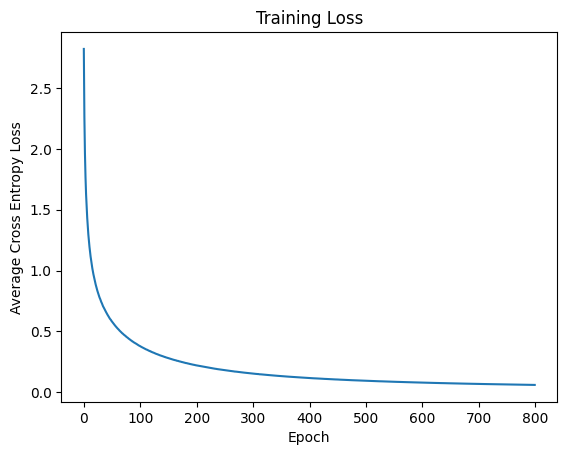

  2%|▏         | 1/60 [00:04<04:00,  4.07s/it]

Epoch 1/60, Loss: 2.8613, Training Accuracy: 0.1619, Testing Accuracy: 0.1694


  3%|▎         | 2/60 [00:08<03:56,  4.07s/it]

Epoch 2/60, Loss: 2.2260, Training Accuracy: 0.2598, Testing Accuracy: 0.2197


  5%|▌         | 3/60 [00:12<03:52,  4.07s/it]

Epoch 3/60, Loss: 1.7810, Training Accuracy: 0.3686, Testing Accuracy: 0.3578


  7%|▋         | 4/60 [00:16<03:48,  4.08s/it]

Epoch 4/60, Loss: 1.4157, Training Accuracy: 0.6005, Testing Accuracy: 0.5181


  8%|▊         | 5/60 [00:20<03:44,  4.08s/it]

Epoch 5/60, Loss: 1.1848, Training Accuracy: 0.5575, Testing Accuracy: 0.4674


 10%|█         | 6/60 [00:24<03:40,  4.08s/it]

Epoch 6/60, Loss: 0.9975, Training Accuracy: 0.7010, Testing Accuracy: 0.5739


 12%|█▏        | 7/60 [00:28<03:36,  4.08s/it]

Epoch 7/60, Loss: 0.8000, Training Accuracy: 0.6985, Testing Accuracy: 0.5966


 13%|█▎        | 8/60 [00:32<03:32,  4.08s/it]

Epoch 8/60, Loss: 0.6148, Training Accuracy: 0.7403, Testing Accuracy: 0.5831


 15%|█▌        | 9/60 [00:36<03:28,  4.09s/it]

Epoch 9/60, Loss: 0.5289, Training Accuracy: 0.7023, Testing Accuracy: 0.6146


 17%|█▋        | 10/60 [00:40<03:24,  4.09s/it]

Epoch 10/60, Loss: 0.5322, Training Accuracy: 0.9003, Testing Accuracy: 0.7111


 18%|█▊        | 11/60 [00:44<03:20,  4.09s/it]

Epoch 11/60, Loss: 0.3200, Training Accuracy: 0.7795, Testing Accuracy: 0.6389


 20%|██        | 12/60 [00:48<03:16,  4.09s/it]

Epoch 12/60, Loss: 0.2713, Training Accuracy: 0.9265, Testing Accuracy: 0.7394


 22%|██▏       | 13/60 [00:53<03:12,  4.09s/it]

Epoch 13/60, Loss: 0.2211, Training Accuracy: 0.8850, Testing Accuracy: 0.6983


 23%|██▎       | 14/60 [00:57<03:08,  4.09s/it]

Epoch 14/60, Loss: 1.3533, Training Accuracy: 0.8854, Testing Accuracy: 0.7287


 25%|██▌       | 15/60 [01:01<03:03,  4.09s/it]

Epoch 15/60, Loss: 0.3379, Training Accuracy: 0.9093, Testing Accuracy: 0.7670


 27%|██▋       | 16/60 [01:05<02:59,  4.09s/it]

Epoch 16/60, Loss: 0.1996, Training Accuracy: 0.9756, Testing Accuracy: 0.7939


 28%|██▊       | 17/60 [01:09<02:55,  4.09s/it]

Epoch 17/60, Loss: 0.1396, Training Accuracy: 0.9150, Testing Accuracy: 0.7112


 30%|███       | 18/60 [01:13<02:51,  4.09s/it]

Epoch 18/60, Loss: 0.1188, Training Accuracy: 0.6258, Testing Accuracy: 0.4838


 32%|███▏      | 19/60 [01:17<02:47,  4.09s/it]

Epoch 19/60, Loss: 0.1372, Training Accuracy: 0.9125, Testing Accuracy: 0.7280


 33%|███▎      | 20/60 [01:21<02:43,  4.09s/it]

Epoch 20/60, Loss: 1.8896, Training Accuracy: 0.5462, Testing Accuracy: 0.4619


 35%|███▌      | 21/60 [01:25<02:39,  4.09s/it]

Epoch 21/60, Loss: 0.3603, Training Accuracy: 0.9438, Testing Accuracy: 0.7609


 37%|███▋      | 22/60 [01:29<02:35,  4.09s/it]

Epoch 22/60, Loss: 0.2663, Training Accuracy: 0.9847, Testing Accuracy: 0.7861


 38%|███▊      | 23/60 [01:33<02:31,  4.09s/it]

Epoch 23/60, Loss: 0.0905, Training Accuracy: 0.9410, Testing Accuracy: 0.7798


 40%|████      | 24/60 [01:38<02:27,  4.09s/it]

Epoch 24/60, Loss: 0.1902, Training Accuracy: 0.9774, Testing Accuracy: 0.7709


 42%|████▏     | 25/60 [01:42<02:23,  4.09s/it]

Epoch 25/60, Loss: 0.0708, Training Accuracy: 0.9970, Testing Accuracy: 0.8193


 43%|████▎     | 26/60 [01:46<02:19,  4.09s/it]

Epoch 26/60, Loss: 0.0288, Training Accuracy: 0.9981, Testing Accuracy: 0.8104


 45%|████▌     | 27/60 [01:50<02:15,  4.10s/it]

Epoch 27/60, Loss: 0.0234, Training Accuracy: 1.0000, Testing Accuracy: 0.8245


 47%|████▋     | 28/60 [01:54<02:11,  4.10s/it]

Epoch 28/60, Loss: 0.0198, Training Accuracy: 0.9997, Testing Accuracy: 0.8291


 48%|████▊     | 29/60 [01:58<02:06,  4.10s/it]

Epoch 29/60, Loss: 0.0169, Training Accuracy: 1.0000, Testing Accuracy: 0.8245


 50%|█████     | 30/60 [02:02<02:02,  4.10s/it]

Epoch 30/60, Loss: 0.0150, Training Accuracy: 0.9996, Testing Accuracy: 0.8026


 52%|█████▏    | 31/60 [02:06<01:58,  4.10s/it]

Epoch 31/60, Loss: 0.0134, Training Accuracy: 1.0000, Testing Accuracy: 0.8180


 53%|█████▎    | 32/60 [02:10<01:54,  4.10s/it]

Epoch 32/60, Loss: 0.0120, Training Accuracy: 1.0000, Testing Accuracy: 0.8285


 55%|█████▌    | 33/60 [02:14<01:50,  4.10s/it]

Epoch 33/60, Loss: 0.0111, Training Accuracy: 0.9999, Testing Accuracy: 0.8148


 57%|█████▋    | 34/60 [02:19<01:46,  4.10s/it]

Epoch 34/60, Loss: 0.0101, Training Accuracy: 1.0000, Testing Accuracy: 0.8261


 58%|█████▊    | 35/60 [02:23<01:42,  4.10s/it]

Epoch 35/60, Loss: 0.0092, Training Accuracy: 1.0000, Testing Accuracy: 0.8325


 60%|██████    | 36/60 [02:27<01:38,  4.10s/it]

Epoch 36/60, Loss: 0.0086, Training Accuracy: 1.0000, Testing Accuracy: 0.8268


 62%|██████▏   | 37/60 [02:31<01:34,  4.10s/it]

Epoch 37/60, Loss: 0.0080, Training Accuracy: 1.0000, Testing Accuracy: 0.8299


 63%|██████▎   | 38/60 [02:35<01:30,  4.10s/it]

Epoch 38/60, Loss: 0.0074, Training Accuracy: 1.0000, Testing Accuracy: 0.8272


 65%|██████▌   | 39/60 [02:39<01:26,  4.10s/it]

Epoch 39/60, Loss: 0.0070, Training Accuracy: 1.0000, Testing Accuracy: 0.8310


 67%|██████▋   | 40/60 [02:43<01:21,  4.10s/it]

Epoch 40/60, Loss: 0.0066, Training Accuracy: 1.0000, Testing Accuracy: 0.8323


 68%|██████▊   | 41/60 [02:47<01:17,  4.10s/it]

Epoch 41/60, Loss: 0.0063, Training Accuracy: 1.0000, Testing Accuracy: 0.8214


 70%|███████   | 42/60 [02:51<01:13,  4.10s/it]

Epoch 42/60, Loss: 0.0060, Training Accuracy: 1.0000, Testing Accuracy: 0.8268


 72%|███████▏  | 43/60 [02:55<01:09,  4.10s/it]

Epoch 43/60, Loss: 0.0057, Training Accuracy: 1.0000, Testing Accuracy: 0.8166


 73%|███████▎  | 44/60 [03:00<01:05,  4.10s/it]

Epoch 44/60, Loss: 0.0054, Training Accuracy: 1.0000, Testing Accuracy: 0.8302


 75%|███████▌  | 45/60 [03:04<01:01,  4.10s/it]

Epoch 45/60, Loss: 0.0051, Training Accuracy: 1.0000, Testing Accuracy: 0.8246


 77%|███████▋  | 46/60 [03:08<00:57,  4.10s/it]

Epoch 46/60, Loss: 0.0049, Training Accuracy: 1.0000, Testing Accuracy: 0.8267


 78%|███████▊  | 47/60 [03:12<00:53,  4.10s/it]

Epoch 47/60, Loss: 0.0047, Training Accuracy: 1.0000, Testing Accuracy: 0.8279


 80%|████████  | 48/60 [03:16<00:49,  4.10s/it]

Epoch 48/60, Loss: 0.0045, Training Accuracy: 1.0000, Testing Accuracy: 0.8285


 82%|████████▏ | 49/60 [03:20<00:45,  4.10s/it]

Epoch 49/60, Loss: 0.0043, Training Accuracy: 1.0000, Testing Accuracy: 0.8286


 83%|████████▎ | 50/60 [03:24<00:41,  4.10s/it]

Epoch 50/60, Loss: 0.0042, Training Accuracy: 1.0000, Testing Accuracy: 0.8303


 85%|████████▌ | 51/60 [03:28<00:36,  4.10s/it]

Epoch 51/60, Loss: 0.0040, Training Accuracy: 1.0000, Testing Accuracy: 0.8298


 87%|████████▋ | 52/60 [03:32<00:32,  4.10s/it]

Epoch 52/60, Loss: 0.0039, Training Accuracy: 1.0000, Testing Accuracy: 0.8246


 88%|████████▊ | 53/60 [03:36<00:28,  4.10s/it]

Epoch 53/60, Loss: 0.0037, Training Accuracy: 1.0000, Testing Accuracy: 0.8185


 90%|█████████ | 54/60 [03:41<00:24,  4.10s/it]

Epoch 54/60, Loss: 0.0036, Training Accuracy: 1.0000, Testing Accuracy: 0.8254


 92%|█████████▏| 55/60 [03:45<00:20,  4.10s/it]

Epoch 55/60, Loss: 0.0035, Training Accuracy: 1.0000, Testing Accuracy: 0.8257


 93%|█████████▎| 56/60 [03:49<00:16,  4.10s/it]

Epoch 56/60, Loss: 0.0034, Training Accuracy: 1.0000, Testing Accuracy: 0.8288


 95%|█████████▌| 57/60 [03:53<00:12,  4.10s/it]

Epoch 57/60, Loss: 0.0033, Training Accuracy: 1.0000, Testing Accuracy: 0.8229


 97%|█████████▋| 58/60 [03:57<00:08,  4.10s/it]

Epoch 58/60, Loss: 0.0032, Training Accuracy: 1.0000, Testing Accuracy: 0.8278


 98%|█████████▊| 59/60 [04:01<00:04,  4.10s/it]

Epoch 59/60, Loss: 0.0031, Training Accuracy: 1.0000, Testing Accuracy: 0.8284


100%|██████████| 60/60 [04:05<00:00,  4.09s/it]

Epoch 60/60, Loss: 0.0030, Training Accuracy: 1.0000, Testing Accuracy: 0.8278


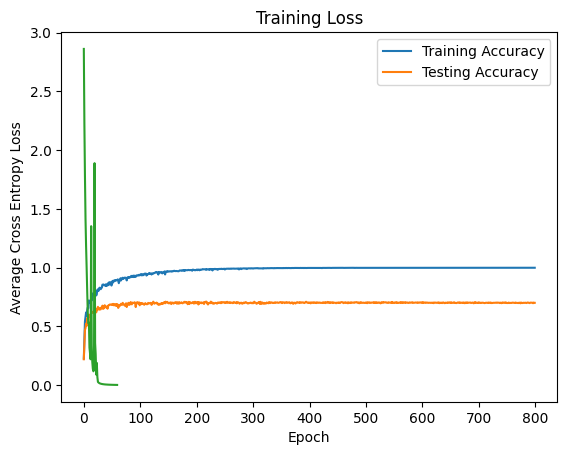

  0%|          | 1/250 [00:01<05:13,  1.26s/it]

Epoch 1/250, Loss: 2.8042, Training Accuracy: 0.1052, Testing Accuracy: 0.1022


  1%|          | 2/250 [00:02<05:12,  1.26s/it]

Epoch 2/250, Loss: 2.2789, Training Accuracy: 0.3170, Testing Accuracy: 0.3557


  1%|          | 3/250 [00:03<05:12,  1.26s/it]

Epoch 3/250, Loss: 1.8179, Training Accuracy: 0.4699, Testing Accuracy: 0.4317


  2%|▏         | 4/250 [00:05<05:10,  1.26s/it]

Epoch 4/250, Loss: 1.5262, Training Accuracy: 0.5895, Testing Accuracy: 0.5254


  2%|▏         | 5/250 [00:06<05:09,  1.26s/it]

Epoch 5/250, Loss: 1.3514, Training Accuracy: 0.5772, Testing Accuracy: 0.4841


  2%|▏         | 6/250 [00:07<05:08,  1.26s/it]

Epoch 6/250, Loss: 1.1923, Training Accuracy: 0.4899, Testing Accuracy: 0.4168


  3%|▎         | 7/250 [00:08<05:07,  1.26s/it]

Epoch 7/250, Loss: 1.0247, Training Accuracy: 0.5287, Testing Accuracy: 0.4473


  3%|▎         | 8/250 [00:10<05:05,  1.26s/it]

Epoch 8/250, Loss: 0.9369, Training Accuracy: 0.5514, Testing Accuracy: 0.4635


  4%|▎         | 9/250 [00:11<05:04,  1.26s/it]

Epoch 9/250, Loss: 0.7835, Training Accuracy: 0.4977, Testing Accuracy: 0.4367


  4%|▍         | 10/250 [00:12<05:03,  1.26s/it]

Epoch 10/250, Loss: 0.7248, Training Accuracy: 0.7197, Testing Accuracy: 0.5605


  4%|▍         | 11/250 [00:13<05:01,  1.26s/it]

Epoch 11/250, Loss: 0.9360, Training Accuracy: 0.6511, Testing Accuracy: 0.5382


  5%|▍         | 12/250 [00:15<05:00,  1.26s/it]

Epoch 12/250, Loss: 0.7091, Training Accuracy: 0.7271, Testing Accuracy: 0.6449


  5%|▌         | 13/250 [00:16<04:59,  1.26s/it]

Epoch 13/250, Loss: 0.5235, Training Accuracy: 0.8546, Testing Accuracy: 0.6803


  6%|▌         | 14/250 [00:17<04:57,  1.26s/it]

Epoch 14/250, Loss: 0.4625, Training Accuracy: 0.8493, Testing Accuracy: 0.6704


  6%|▌         | 15/250 [00:18<04:56,  1.26s/it]

Epoch 15/250, Loss: 0.4409, Training Accuracy: 0.7064, Testing Accuracy: 0.5725


  6%|▋         | 16/250 [00:20<04:55,  1.26s/it]

Epoch 16/250, Loss: 0.3920, Training Accuracy: 0.7885, Testing Accuracy: 0.6150


  7%|▋         | 17/250 [00:21<04:54,  1.27s/it]

Epoch 17/250, Loss: 0.6660, Training Accuracy: 0.8199, Testing Accuracy: 0.6690


  7%|▋         | 18/250 [00:22<04:53,  1.26s/it]

Epoch 18/250, Loss: 0.3340, Training Accuracy: 0.9429, Testing Accuracy: 0.7280


  8%|▊         | 19/250 [00:24<04:51,  1.26s/it]

Epoch 19/250, Loss: 0.2840, Training Accuracy: 0.8644, Testing Accuracy: 0.6583


  8%|▊         | 20/250 [00:25<04:50,  1.26s/it]

Epoch 20/250, Loss: 0.2820, Training Accuracy: 0.9305, Testing Accuracy: 0.7149


  8%|▊         | 21/250 [00:26<04:49,  1.26s/it]

Epoch 21/250, Loss: 1.4417, Training Accuracy: 0.5113, Testing Accuracy: 0.3992


  9%|▉         | 22/250 [00:27<04:47,  1.26s/it]

Epoch 22/250, Loss: 1.1654, Training Accuracy: 0.6368, Testing Accuracy: 0.4583


  9%|▉         | 23/250 [00:29<04:46,  1.26s/it]

Epoch 23/250, Loss: 0.6707, Training Accuracy: 0.7279, Testing Accuracy: 0.5799


 10%|▉         | 24/250 [00:30<04:44,  1.26s/it]

Epoch 24/250, Loss: 0.8628, Training Accuracy: 0.5525, Testing Accuracy: 0.4110


 10%|█         | 25/250 [00:31<04:43,  1.26s/it]

Epoch 25/250, Loss: 0.8228, Training Accuracy: 0.7934, Testing Accuracy: 0.6319


 10%|█         | 26/250 [00:32<04:42,  1.26s/it]

Epoch 26/250, Loss: 0.4255, Training Accuracy: 0.8928, Testing Accuracy: 0.6873


 11%|█         | 27/250 [00:34<04:41,  1.26s/it]

Epoch 27/250, Loss: 0.3532, Training Accuracy: 0.8643, Testing Accuracy: 0.6882


 11%|█         | 28/250 [00:35<04:40,  1.26s/it]

Epoch 28/250, Loss: 0.2907, Training Accuracy: 0.9268, Testing Accuracy: 0.7450


 12%|█▏        | 29/250 [00:36<04:38,  1.26s/it]

Epoch 29/250, Loss: 0.2840, Training Accuracy: 0.9412, Testing Accuracy: 0.7550


 12%|█▏        | 30/250 [00:37<04:37,  1.26s/it]

Epoch 30/250, Loss: 0.2279, Training Accuracy: 0.8893, Testing Accuracy: 0.7189


 12%|█▏        | 31/250 [00:39<04:36,  1.26s/it]

Epoch 31/250, Loss: 0.2147, Training Accuracy: 0.9175, Testing Accuracy: 0.7137


 13%|█▎        | 32/250 [00:40<04:34,  1.26s/it]

Epoch 32/250, Loss: 0.3380, Training Accuracy: 0.2750, Testing Accuracy: 0.2724


 13%|█▎        | 33/250 [00:41<04:33,  1.26s/it]

Epoch 33/250, Loss: 1.5362, Training Accuracy: 0.5877, Testing Accuracy: 0.4527


 14%|█▎        | 34/250 [00:42<04:32,  1.26s/it]

Epoch 34/250, Loss: 0.7228, Training Accuracy: 0.8763, Testing Accuracy: 0.7025


 14%|█▍        | 35/250 [00:44<04:30,  1.26s/it]

Epoch 35/250, Loss: 0.3786, Training Accuracy: 0.9330, Testing Accuracy: 0.7448


 14%|█▍        | 36/250 [00:45<04:29,  1.26s/it]

Epoch 36/250, Loss: 0.2975, Training Accuracy: 0.9518, Testing Accuracy: 0.7091


 15%|█▍        | 37/250 [00:46<04:28,  1.26s/it]

Epoch 37/250, Loss: 0.2167, Training Accuracy: 0.8157, Testing Accuracy: 0.6166


 15%|█▌        | 38/250 [00:47<04:27,  1.26s/it]

Epoch 38/250, Loss: 0.2423, Training Accuracy: 0.9642, Testing Accuracy: 0.7397


 16%|█▌        | 39/250 [00:49<04:26,  1.26s/it]

Epoch 39/250, Loss: 0.1763, Training Accuracy: 0.9641, Testing Accuracy: 0.7437


 16%|█▌        | 40/250 [00:50<04:24,  1.26s/it]

Epoch 40/250, Loss: 0.1155, Training Accuracy: 0.9933, Testing Accuracy: 0.7691


 16%|█▋        | 41/250 [00:51<04:23,  1.26s/it]

Epoch 41/250, Loss: 0.0940, Training Accuracy: 0.9820, Testing Accuracy: 0.7761


 17%|█▋        | 42/250 [00:53<04:22,  1.26s/it]

Epoch 42/250, Loss: 0.0791, Training Accuracy: 0.9715, Testing Accuracy: 0.7540


 17%|█▋        | 43/250 [00:54<04:20,  1.26s/it]

Epoch 43/250, Loss: 1.1981, Training Accuracy: 0.7982, Testing Accuracy: 0.6365


 18%|█▊        | 44/250 [00:55<04:19,  1.26s/it]

Epoch 44/250, Loss: 0.9161, Training Accuracy: 0.8501, Testing Accuracy: 0.6578


 18%|█▊        | 45/250 [00:56<04:18,  1.26s/it]

Epoch 45/250, Loss: 0.2531, Training Accuracy: 0.9018, Testing Accuracy: 0.6849


 18%|█▊        | 46/250 [00:58<04:17,  1.26s/it]

Epoch 46/250, Loss: 0.1970, Training Accuracy: 0.9603, Testing Accuracy: 0.7376


 19%|█▉        | 47/250 [00:59<04:15,  1.26s/it]

Epoch 47/250, Loss: 0.1498, Training Accuracy: 0.9723, Testing Accuracy: 0.7600


 19%|█▉        | 48/250 [01:00<04:14,  1.26s/it]

Epoch 48/250, Loss: 1.1390, Training Accuracy: 0.4969, Testing Accuracy: 0.3890


 20%|█▉        | 49/250 [01:01<04:13,  1.26s/it]

Epoch 49/250, Loss: 1.0955, Training Accuracy: 0.8114, Testing Accuracy: 0.6279


 20%|██        | 50/250 [01:03<04:12,  1.26s/it]

Epoch 50/250, Loss: 0.5564, Training Accuracy: 0.8599, Testing Accuracy: 0.6520


 20%|██        | 51/250 [01:04<04:11,  1.26s/it]

Epoch 51/250, Loss: 0.4798, Training Accuracy: 0.8290, Testing Accuracy: 0.6702


 21%|██        | 52/250 [01:05<04:09,  1.26s/it]

Epoch 52/250, Loss: 1.0160, Training Accuracy: 0.7806, Testing Accuracy: 0.5880


 21%|██        | 53/250 [01:06<04:08,  1.26s/it]

Epoch 53/250, Loss: 0.4347, Training Accuracy: 0.9014, Testing Accuracy: 0.6854


 22%|██▏       | 54/250 [01:08<04:06,  1.26s/it]

Epoch 54/250, Loss: 0.3261, Training Accuracy: 0.9070, Testing Accuracy: 0.6914


 22%|██▏       | 55/250 [01:09<04:05,  1.26s/it]

Epoch 55/250, Loss: 0.2003, Training Accuracy: 0.9340, Testing Accuracy: 0.7257


 22%|██▏       | 56/250 [01:10<04:04,  1.26s/it]

Epoch 56/250, Loss: 0.1492, Training Accuracy: 0.9544, Testing Accuracy: 0.7082


 23%|██▎       | 57/250 [01:11<04:03,  1.26s/it]

Epoch 57/250, Loss: 0.1178, Training Accuracy: 0.9874, Testing Accuracy: 0.7665


 23%|██▎       | 58/250 [01:13<04:02,  1.26s/it]

Epoch 58/250, Loss: 0.1127, Training Accuracy: 0.9894, Testing Accuracy: 0.7535


 24%|██▎       | 59/250 [01:14<04:00,  1.26s/it]

Epoch 59/250, Loss: 0.0847, Training Accuracy: 0.9806, Testing Accuracy: 0.7607


 24%|██▍       | 60/250 [01:15<03:59,  1.26s/it]

Epoch 60/250, Loss: 0.0734, Training Accuracy: 0.9929, Testing Accuracy: 0.7718


 24%|██▍       | 61/250 [01:16<03:58,  1.26s/it]

Epoch 61/250, Loss: 0.0694, Training Accuracy: 0.9824, Testing Accuracy: 0.7348


 25%|██▍       | 62/250 [01:18<03:57,  1.26s/it]

Epoch 62/250, Loss: 0.0564, Training Accuracy: 0.9969, Testing Accuracy: 0.7694


 25%|██▌       | 63/250 [01:19<03:55,  1.26s/it]

Epoch 63/250, Loss: 0.0506, Training Accuracy: 0.9963, Testing Accuracy: 0.7645


 26%|██▌       | 64/250 [01:20<03:54,  1.26s/it]

Epoch 64/250, Loss: 0.0454, Training Accuracy: 0.9981, Testing Accuracy: 0.7695


 26%|██▌       | 65/250 [01:22<03:53,  1.26s/it]

Epoch 65/250, Loss: 0.0421, Training Accuracy: 0.9986, Testing Accuracy: 0.7759


 26%|██▋       | 66/250 [01:23<03:51,  1.26s/it]

Epoch 66/250, Loss: 0.0383, Training Accuracy: 0.9992, Testing Accuracy: 0.7461


 27%|██▋       | 67/250 [01:24<03:50,  1.26s/it]

Epoch 67/250, Loss: 0.0348, Training Accuracy: 0.9998, Testing Accuracy: 0.7619


 27%|██▋       | 68/250 [01:25<03:49,  1.26s/it]

Epoch 68/250, Loss: 0.0335, Training Accuracy: 0.9990, Testing Accuracy: 0.7663


 28%|██▊       | 69/250 [01:27<03:48,  1.26s/it]

Epoch 69/250, Loss: 0.0303, Training Accuracy: 0.9995, Testing Accuracy: 0.7750


 28%|██▊       | 70/250 [01:28<03:47,  1.26s/it]

Epoch 70/250, Loss: 0.0290, Training Accuracy: 0.9999, Testing Accuracy: 0.7768


 28%|██▊       | 71/250 [01:29<03:45,  1.26s/it]

Epoch 71/250, Loss: 0.0274, Training Accuracy: 0.9999, Testing Accuracy: 0.7598


 29%|██▉       | 72/250 [01:30<03:44,  1.26s/it]

Epoch 72/250, Loss: 0.0260, Training Accuracy: 0.9999, Testing Accuracy: 0.7803


 29%|██▉       | 73/250 [01:32<03:43,  1.26s/it]

Epoch 73/250, Loss: 0.0246, Training Accuracy: 1.0000, Testing Accuracy: 0.7761


 30%|██▉       | 74/250 [01:33<03:41,  1.26s/it]

Epoch 74/250, Loss: 0.0232, Training Accuracy: 0.9999, Testing Accuracy: 0.7607


 30%|███       | 75/250 [01:34<03:40,  1.26s/it]

Epoch 75/250, Loss: 0.0219, Training Accuracy: 1.0000, Testing Accuracy: 0.7768


 30%|███       | 76/250 [01:35<03:39,  1.26s/it]

Epoch 76/250, Loss: 0.0210, Training Accuracy: 1.0000, Testing Accuracy: 0.7639


 31%|███       | 77/250 [01:37<03:37,  1.26s/it]

Epoch 77/250, Loss: 0.0202, Training Accuracy: 0.9999, Testing Accuracy: 0.7804


 31%|███       | 78/250 [01:38<03:36,  1.26s/it]

Epoch 78/250, Loss: 0.0192, Training Accuracy: 0.9998, Testing Accuracy: 0.7747


 32%|███▏      | 79/250 [01:39<03:35,  1.26s/it]

Epoch 79/250, Loss: 0.0184, Training Accuracy: 0.9998, Testing Accuracy: 0.7913


 32%|███▏      | 80/250 [01:40<03:34,  1.26s/it]

Epoch 80/250, Loss: 0.0177, Training Accuracy: 1.0000, Testing Accuracy: 0.7747


 32%|███▏      | 81/250 [01:42<03:33,  1.26s/it]

Epoch 81/250, Loss: 0.0170, Training Accuracy: 1.0000, Testing Accuracy: 0.7803


 33%|███▎      | 82/250 [01:43<03:31,  1.26s/it]

Epoch 82/250, Loss: 0.0164, Training Accuracy: 0.9998, Testing Accuracy: 0.7815


 33%|███▎      | 83/250 [01:44<03:30,  1.26s/it]

Epoch 83/250, Loss: 0.0157, Training Accuracy: 1.0000, Testing Accuracy: 0.7840


 34%|███▎      | 84/250 [01:45<03:29,  1.26s/it]

Epoch 84/250, Loss: 0.0153, Training Accuracy: 0.9999, Testing Accuracy: 0.7786


 34%|███▍      | 85/250 [01:47<03:27,  1.26s/it]

Epoch 85/250, Loss: 0.0147, Training Accuracy: 1.0000, Testing Accuracy: 0.7770


 34%|███▍      | 86/250 [01:48<03:26,  1.26s/it]

Epoch 86/250, Loss: 0.0142, Training Accuracy: 1.0000, Testing Accuracy: 0.7645


 35%|███▍      | 87/250 [01:49<03:25,  1.26s/it]

Epoch 87/250, Loss: 0.0137, Training Accuracy: 1.0000, Testing Accuracy: 0.7783


 35%|███▌      | 88/250 [01:50<03:24,  1.26s/it]

Epoch 88/250, Loss: 0.0134, Training Accuracy: 1.0000, Testing Accuracy: 0.7687


 36%|███▌      | 89/250 [01:52<03:22,  1.26s/it]

Epoch 89/250, Loss: 0.0129, Training Accuracy: 1.0000, Testing Accuracy: 0.7812


 36%|███▌      | 90/250 [01:53<03:21,  1.26s/it]

Epoch 90/250, Loss: 0.0125, Training Accuracy: 1.0000, Testing Accuracy: 0.7726


 36%|███▋      | 91/250 [01:54<03:20,  1.26s/it]

Epoch 91/250, Loss: 0.0122, Training Accuracy: 1.0000, Testing Accuracy: 0.7741


 37%|███▋      | 92/250 [01:56<03:18,  1.26s/it]

Epoch 92/250, Loss: 0.0119, Training Accuracy: 1.0000, Testing Accuracy: 0.7684


 37%|███▋      | 93/250 [01:57<03:17,  1.26s/it]

Epoch 93/250, Loss: 0.0115, Training Accuracy: 1.0000, Testing Accuracy: 0.7741


 38%|███▊      | 94/250 [01:58<03:16,  1.26s/it]

Epoch 94/250, Loss: 0.0112, Training Accuracy: 1.0000, Testing Accuracy: 0.7789


 38%|███▊      | 95/250 [01:59<03:15,  1.26s/it]

Epoch 95/250, Loss: 0.0109, Training Accuracy: 1.0000, Testing Accuracy: 0.7765


 38%|███▊      | 96/250 [02:01<03:13,  1.26s/it]

Epoch 96/250, Loss: 0.0106, Training Accuracy: 1.0000, Testing Accuracy: 0.7786


 39%|███▉      | 97/250 [02:02<03:12,  1.26s/it]

Epoch 97/250, Loss: 0.0104, Training Accuracy: 1.0000, Testing Accuracy: 0.7730


 39%|███▉      | 98/250 [02:03<03:11,  1.26s/it]

Epoch 98/250, Loss: 0.0101, Training Accuracy: 1.0000, Testing Accuracy: 0.7789


 40%|███▉      | 99/250 [02:04<03:10,  1.26s/it]

Epoch 99/250, Loss: 0.0098, Training Accuracy: 1.0000, Testing Accuracy: 0.7743


 40%|████      | 100/250 [02:06<03:08,  1.26s/it]

Epoch 100/250, Loss: 0.0096, Training Accuracy: 1.0000, Testing Accuracy: 0.7784


 40%|████      | 101/250 [02:07<03:07,  1.26s/it]

Epoch 101/250, Loss: 0.0094, Training Accuracy: 1.0000, Testing Accuracy: 0.7846


 41%|████      | 102/250 [02:08<03:06,  1.26s/it]

Epoch 102/250, Loss: 0.0092, Training Accuracy: 1.0000, Testing Accuracy: 0.7808


 41%|████      | 103/250 [02:09<03:05,  1.26s/it]

Epoch 103/250, Loss: 0.0090, Training Accuracy: 1.0000, Testing Accuracy: 0.7822


 42%|████▏     | 104/250 [02:11<03:03,  1.26s/it]

Epoch 104/250, Loss: 0.0088, Training Accuracy: 0.9999, Testing Accuracy: 0.7830


 42%|████▏     | 105/250 [02:12<03:02,  1.26s/it]

Epoch 105/250, Loss: 0.0086, Training Accuracy: 1.0000, Testing Accuracy: 0.7720


 42%|████▏     | 106/250 [02:13<03:01,  1.26s/it]

Epoch 106/250, Loss: 0.0084, Training Accuracy: 1.0000, Testing Accuracy: 0.7829


 43%|████▎     | 107/250 [02:14<03:00,  1.26s/it]

Epoch 107/250, Loss: 0.0082, Training Accuracy: 1.0000, Testing Accuracy: 0.7810


 43%|████▎     | 108/250 [02:16<02:58,  1.26s/it]

Epoch 108/250, Loss: 0.0080, Training Accuracy: 1.0000, Testing Accuracy: 0.7817


 44%|████▎     | 109/250 [02:17<02:57,  1.26s/it]

Epoch 109/250, Loss: 0.0079, Training Accuracy: 1.0000, Testing Accuracy: 0.7797


 44%|████▍     | 110/250 [02:18<02:56,  1.26s/it]

Epoch 110/250, Loss: 0.0077, Training Accuracy: 1.0000, Testing Accuracy: 0.7810


 44%|████▍     | 111/250 [02:19<02:55,  1.26s/it]

Epoch 111/250, Loss: 0.0076, Training Accuracy: 1.0000, Testing Accuracy: 0.7724


 45%|████▍     | 112/250 [02:21<02:53,  1.26s/it]

Epoch 112/250, Loss: 0.0075, Training Accuracy: 1.0000, Testing Accuracy: 0.7697


 45%|████▌     | 113/250 [02:22<02:52,  1.26s/it]

Epoch 113/250, Loss: 0.0073, Training Accuracy: 1.0000, Testing Accuracy: 0.7786


 46%|████▌     | 114/250 [02:23<02:51,  1.26s/it]

Epoch 114/250, Loss: 0.0072, Training Accuracy: 1.0000, Testing Accuracy: 0.7748


 46%|████▌     | 115/250 [02:25<02:50,  1.26s/it]

Epoch 115/250, Loss: 0.0070, Training Accuracy: 1.0000, Testing Accuracy: 0.7784


 46%|████▋     | 116/250 [02:26<02:48,  1.26s/it]

Epoch 116/250, Loss: 0.0070, Training Accuracy: 1.0000, Testing Accuracy: 0.7688


 47%|████▋     | 117/250 [02:27<02:47,  1.26s/it]

Epoch 117/250, Loss: 0.0068, Training Accuracy: 1.0000, Testing Accuracy: 0.7784


 47%|████▋     | 118/250 [02:28<02:46,  1.26s/it]

Epoch 118/250, Loss: 0.0067, Training Accuracy: 1.0000, Testing Accuracy: 0.7757


 48%|████▊     | 119/250 [02:30<02:45,  1.26s/it]

Epoch 119/250, Loss: 0.0066, Training Accuracy: 1.0000, Testing Accuracy: 0.7740


 48%|████▊     | 120/250 [02:31<02:43,  1.26s/it]

Epoch 120/250, Loss: 0.0065, Training Accuracy: 1.0000, Testing Accuracy: 0.7798


 48%|████▊     | 121/250 [02:32<02:42,  1.26s/it]

Epoch 121/250, Loss: 0.0064, Training Accuracy: 1.0000, Testing Accuracy: 0.7762


 49%|████▉     | 122/250 [02:33<02:41,  1.26s/it]

Epoch 122/250, Loss: 0.0063, Training Accuracy: 1.0000, Testing Accuracy: 0.7736


 49%|████▉     | 123/250 [02:35<02:40,  1.26s/it]

Epoch 123/250, Loss: 0.0062, Training Accuracy: 1.0000, Testing Accuracy: 0.7846


 50%|████▉     | 124/250 [02:36<02:38,  1.26s/it]

Epoch 124/250, Loss: 0.0061, Training Accuracy: 1.0000, Testing Accuracy: 0.7832


 50%|█████     | 125/250 [02:37<02:37,  1.26s/it]

Epoch 125/250, Loss: 0.0060, Training Accuracy: 1.0000, Testing Accuracy: 0.7794


 50%|█████     | 126/250 [02:38<02:36,  1.26s/it]

Epoch 126/250, Loss: 0.0059, Training Accuracy: 1.0000, Testing Accuracy: 0.7812


 51%|█████     | 127/250 [02:40<02:34,  1.26s/it]

Epoch 127/250, Loss: 0.0058, Training Accuracy: 1.0000, Testing Accuracy: 0.7811


 51%|█████     | 128/250 [02:41<02:33,  1.26s/it]

Epoch 128/250, Loss: 0.0057, Training Accuracy: 1.0000, Testing Accuracy: 0.7761


 52%|█████▏    | 129/250 [02:42<02:32,  1.26s/it]

Epoch 129/250, Loss: 0.0056, Training Accuracy: 1.0000, Testing Accuracy: 0.7796


 52%|█████▏    | 130/250 [02:43<02:31,  1.26s/it]

Epoch 130/250, Loss: 0.0055, Training Accuracy: 1.0000, Testing Accuracy: 0.7803


 52%|█████▏    | 131/250 [02:45<02:29,  1.26s/it]

Epoch 131/250, Loss: 0.0055, Training Accuracy: 1.0000, Testing Accuracy: 0.7736


 53%|█████▎    | 132/250 [02:46<02:28,  1.26s/it]

Epoch 132/250, Loss: 0.0054, Training Accuracy: 1.0000, Testing Accuracy: 0.7810


 53%|█████▎    | 133/250 [02:47<02:27,  1.26s/it]

Epoch 133/250, Loss: 0.0053, Training Accuracy: 1.0000, Testing Accuracy: 0.7819


 54%|█████▎    | 134/250 [02:48<02:26,  1.26s/it]

Epoch 134/250, Loss: 0.0053, Training Accuracy: 1.0000, Testing Accuracy: 0.7751


 54%|█████▍    | 135/250 [02:50<02:24,  1.26s/it]

Epoch 135/250, Loss: 0.0051, Training Accuracy: 1.0000, Testing Accuracy: 0.7701


 54%|█████▍    | 136/250 [02:51<02:23,  1.26s/it]

Epoch 136/250, Loss: 0.0051, Training Accuracy: 1.0000, Testing Accuracy: 0.7723


 55%|█████▍    | 137/250 [02:52<02:22,  1.26s/it]

Epoch 137/250, Loss: 0.0050, Training Accuracy: 1.0000, Testing Accuracy: 0.7744


 55%|█████▌    | 138/250 [02:53<02:21,  1.26s/it]

Epoch 138/250, Loss: 0.0050, Training Accuracy: 1.0000, Testing Accuracy: 0.7836


 56%|█████▌    | 139/250 [02:55<02:19,  1.26s/it]

Epoch 139/250, Loss: 0.0049, Training Accuracy: 1.0000, Testing Accuracy: 0.7747


 56%|█████▌    | 140/250 [02:56<02:18,  1.26s/it]

Epoch 140/250, Loss: 0.0048, Training Accuracy: 1.0000, Testing Accuracy: 0.7791


 56%|█████▋    | 141/250 [02:57<02:17,  1.26s/it]

Epoch 141/250, Loss: 0.0048, Training Accuracy: 1.0000, Testing Accuracy: 0.7775


 57%|█████▋    | 142/250 [02:59<02:16,  1.26s/it]

Epoch 142/250, Loss: 0.0047, Training Accuracy: 1.0000, Testing Accuracy: 0.7754


 57%|█████▋    | 143/250 [03:00<02:14,  1.26s/it]

Epoch 143/250, Loss: 0.0046, Training Accuracy: 1.0000, Testing Accuracy: 0.7754


 58%|█████▊    | 144/250 [03:01<02:13,  1.26s/it]

Epoch 144/250, Loss: 0.0046, Training Accuracy: 1.0000, Testing Accuracy: 0.7711


 58%|█████▊    | 145/250 [03:02<02:12,  1.26s/it]

Epoch 145/250, Loss: 0.0045, Training Accuracy: 1.0000, Testing Accuracy: 0.7748


 58%|█████▊    | 146/250 [03:04<02:11,  1.26s/it]

Epoch 146/250, Loss: 0.0045, Training Accuracy: 1.0000, Testing Accuracy: 0.7793


 59%|█████▉    | 147/250 [03:05<02:09,  1.26s/it]

Epoch 147/250, Loss: 0.0044, Training Accuracy: 1.0000, Testing Accuracy: 0.7815


 59%|█████▉    | 148/250 [03:06<02:08,  1.26s/it]

Epoch 148/250, Loss: 0.0044, Training Accuracy: 1.0000, Testing Accuracy: 0.7796


 60%|█████▉    | 149/250 [03:07<02:07,  1.26s/it]

Epoch 149/250, Loss: 0.0043, Training Accuracy: 1.0000, Testing Accuracy: 0.7814


 60%|██████    | 150/250 [03:09<02:05,  1.26s/it]

Epoch 150/250, Loss: 0.0043, Training Accuracy: 1.0000, Testing Accuracy: 0.7736


 60%|██████    | 151/250 [03:10<02:04,  1.26s/it]

Epoch 151/250, Loss: 0.0042, Training Accuracy: 1.0000, Testing Accuracy: 0.7787


 61%|██████    | 152/250 [03:11<02:03,  1.26s/it]

Epoch 152/250, Loss: 0.0042, Training Accuracy: 1.0000, Testing Accuracy: 0.7768


 61%|██████    | 153/250 [03:12<02:02,  1.26s/it]

Epoch 153/250, Loss: 0.0041, Training Accuracy: 1.0000, Testing Accuracy: 0.7773


 62%|██████▏   | 154/250 [03:14<02:00,  1.26s/it]

Epoch 154/250, Loss: 0.0041, Training Accuracy: 1.0000, Testing Accuracy: 0.7765


 62%|██████▏   | 155/250 [03:15<01:59,  1.26s/it]

Epoch 155/250, Loss: 0.0041, Training Accuracy: 1.0000, Testing Accuracy: 0.7772


 62%|██████▏   | 156/250 [03:16<01:58,  1.26s/it]

Epoch 156/250, Loss: 0.0040, Training Accuracy: 1.0000, Testing Accuracy: 0.7798


 63%|██████▎   | 157/250 [03:17<01:57,  1.26s/it]

Epoch 157/250, Loss: 0.0039, Training Accuracy: 1.0000, Testing Accuracy: 0.7773


 63%|██████▎   | 158/250 [03:19<01:55,  1.26s/it]

Epoch 158/250, Loss: 0.0039, Training Accuracy: 1.0000, Testing Accuracy: 0.7822


 64%|██████▎   | 159/250 [03:20<01:54,  1.26s/it]

Epoch 159/250, Loss: 0.0039, Training Accuracy: 1.0000, Testing Accuracy: 0.7822


 64%|██████▍   | 160/250 [03:21<01:53,  1.26s/it]

Epoch 160/250, Loss: 0.0038, Training Accuracy: 1.0000, Testing Accuracy: 0.7803


 64%|██████▍   | 161/250 [03:22<01:52,  1.26s/it]

Epoch 161/250, Loss: 0.0038, Training Accuracy: 1.0000, Testing Accuracy: 0.7805


 65%|██████▍   | 162/250 [03:24<01:50,  1.26s/it]

Epoch 162/250, Loss: 0.0037, Training Accuracy: 1.0000, Testing Accuracy: 0.7757


 65%|██████▌   | 163/250 [03:25<01:49,  1.26s/it]

Epoch 163/250, Loss: 0.0037, Training Accuracy: 1.0000, Testing Accuracy: 0.7750


 66%|██████▌   | 164/250 [03:26<01:48,  1.26s/it]

Epoch 164/250, Loss: 0.0037, Training Accuracy: 1.0000, Testing Accuracy: 0.7789


 66%|██████▌   | 165/250 [03:28<01:47,  1.26s/it]

Epoch 165/250, Loss: 0.0036, Training Accuracy: 1.0000, Testing Accuracy: 0.7815


 66%|██████▋   | 166/250 [03:29<01:45,  1.26s/it]

Epoch 166/250, Loss: 0.0036, Training Accuracy: 1.0000, Testing Accuracy: 0.7825


 67%|██████▋   | 167/250 [03:30<01:44,  1.26s/it]

Epoch 167/250, Loss: 0.0036, Training Accuracy: 1.0000, Testing Accuracy: 0.7726


 67%|██████▋   | 168/250 [03:31<01:43,  1.26s/it]

Epoch 168/250, Loss: 0.0035, Training Accuracy: 1.0000, Testing Accuracy: 0.7823


 68%|██████▊   | 169/250 [03:33<01:42,  1.26s/it]

Epoch 169/250, Loss: 0.0035, Training Accuracy: 1.0000, Testing Accuracy: 0.7805


 68%|██████▊   | 170/250 [03:34<01:40,  1.26s/it]

Epoch 170/250, Loss: 0.0035, Training Accuracy: 1.0000, Testing Accuracy: 0.7818


 68%|██████▊   | 171/250 [03:35<01:39,  1.26s/it]

Epoch 171/250, Loss: 0.0034, Training Accuracy: 1.0000, Testing Accuracy: 0.7784


 69%|██████▉   | 172/250 [03:36<01:38,  1.26s/it]

Epoch 172/250, Loss: 0.0034, Training Accuracy: 1.0000, Testing Accuracy: 0.7745


 69%|██████▉   | 173/250 [03:38<01:36,  1.26s/it]

Epoch 173/250, Loss: 0.0033, Training Accuracy: 1.0000, Testing Accuracy: 0.7789


 70%|██████▉   | 174/250 [03:39<01:35,  1.26s/it]

Epoch 174/250, Loss: 0.0033, Training Accuracy: 1.0000, Testing Accuracy: 0.7782


 70%|███████   | 175/250 [03:40<01:34,  1.26s/it]

Epoch 175/250, Loss: 0.0033, Training Accuracy: 1.0000, Testing Accuracy: 0.7790


 70%|███████   | 176/250 [03:41<01:33,  1.26s/it]

Epoch 176/250, Loss: 0.0033, Training Accuracy: 1.0000, Testing Accuracy: 0.7779


 71%|███████   | 177/250 [03:43<01:31,  1.26s/it]

Epoch 177/250, Loss: 0.0032, Training Accuracy: 1.0000, Testing Accuracy: 0.7791


 71%|███████   | 178/250 [03:44<01:30,  1.26s/it]

Epoch 178/250, Loss: 0.0032, Training Accuracy: 1.0000, Testing Accuracy: 0.7780


 72%|███████▏  | 179/250 [03:45<01:29,  1.26s/it]

Epoch 179/250, Loss: 0.0032, Training Accuracy: 1.0000, Testing Accuracy: 0.7812


 72%|███████▏  | 180/250 [03:46<01:28,  1.26s/it]

Epoch 180/250, Loss: 0.0032, Training Accuracy: 1.0000, Testing Accuracy: 0.7810


 72%|███████▏  | 181/250 [03:48<01:26,  1.26s/it]

Epoch 181/250, Loss: 0.0031, Training Accuracy: 1.0000, Testing Accuracy: 0.7747


 73%|███████▎  | 182/250 [03:49<01:25,  1.26s/it]

Epoch 182/250, Loss: 0.0031, Training Accuracy: 1.0000, Testing Accuracy: 0.7839


 73%|███████▎  | 183/250 [03:50<01:24,  1.26s/it]

Epoch 183/250, Loss: 0.0031, Training Accuracy: 1.0000, Testing Accuracy: 0.7793


 74%|███████▎  | 184/250 [03:51<01:23,  1.26s/it]

Epoch 184/250, Loss: 0.0030, Training Accuracy: 1.0000, Testing Accuracy: 0.7731


 74%|███████▍  | 185/250 [03:53<01:21,  1.26s/it]

Epoch 185/250, Loss: 0.0030, Training Accuracy: 1.0000, Testing Accuracy: 0.7770


 74%|███████▍  | 186/250 [03:54<01:20,  1.26s/it]

Epoch 186/250, Loss: 0.0030, Training Accuracy: 1.0000, Testing Accuracy: 0.7794


 75%|███████▍  | 187/250 [03:55<01:19,  1.26s/it]

Epoch 187/250, Loss: 0.0030, Training Accuracy: 1.0000, Testing Accuracy: 0.7750


 75%|███████▌  | 188/250 [03:56<01:18,  1.26s/it]

Epoch 188/250, Loss: 0.0029, Training Accuracy: 1.0000, Testing Accuracy: 0.7766


 76%|███████▌  | 189/250 [03:58<01:16,  1.26s/it]

Epoch 189/250, Loss: 0.0029, Training Accuracy: 1.0000, Testing Accuracy: 0.7751


 76%|███████▌  | 190/250 [03:59<01:15,  1.26s/it]

Epoch 190/250, Loss: 0.0029, Training Accuracy: 1.0000, Testing Accuracy: 0.7805


 76%|███████▋  | 191/250 [04:00<01:14,  1.26s/it]

Epoch 191/250, Loss: 0.0029, Training Accuracy: 1.0000, Testing Accuracy: 0.7784


 77%|███████▋  | 192/250 [04:02<01:13,  1.26s/it]

Epoch 192/250, Loss: 0.0029, Training Accuracy: 1.0000, Testing Accuracy: 0.7776


 77%|███████▋  | 193/250 [04:03<01:11,  1.26s/it]

Epoch 193/250, Loss: 0.0028, Training Accuracy: 1.0000, Testing Accuracy: 0.7745


 78%|███████▊  | 194/250 [04:04<01:10,  1.26s/it]

Epoch 194/250, Loss: 0.0028, Training Accuracy: 1.0000, Testing Accuracy: 0.7793


 78%|███████▊  | 195/250 [04:05<01:09,  1.26s/it]

Epoch 195/250, Loss: 0.0028, Training Accuracy: 1.0000, Testing Accuracy: 0.7762


 78%|███████▊  | 196/250 [04:07<01:08,  1.26s/it]

Epoch 196/250, Loss: 0.0028, Training Accuracy: 1.0000, Testing Accuracy: 0.7761


 79%|███████▉  | 197/250 [04:08<01:06,  1.26s/it]

Epoch 197/250, Loss: 0.0027, Training Accuracy: 1.0000, Testing Accuracy: 0.7780


 79%|███████▉  | 198/250 [04:09<01:05,  1.26s/it]

Epoch 198/250, Loss: 0.0027, Training Accuracy: 1.0000, Testing Accuracy: 0.7782


 80%|███████▉  | 199/250 [04:10<01:04,  1.26s/it]

Epoch 199/250, Loss: 0.0027, Training Accuracy: 1.0000, Testing Accuracy: 0.7783


 80%|████████  | 200/250 [04:12<01:02,  1.26s/it]

Epoch 200/250, Loss: 0.0027, Training Accuracy: 1.0000, Testing Accuracy: 0.7794


 80%|████████  | 201/250 [04:13<01:01,  1.26s/it]

Epoch 201/250, Loss: 0.0026, Training Accuracy: 1.0000, Testing Accuracy: 0.7798


 81%|████████  | 202/250 [04:14<01:00,  1.26s/it]

Epoch 202/250, Loss: 0.0026, Training Accuracy: 1.0000, Testing Accuracy: 0.7791


 81%|████████  | 203/250 [04:15<00:59,  1.26s/it]

Epoch 203/250, Loss: 0.0026, Training Accuracy: 1.0000, Testing Accuracy: 0.7814


 82%|████████▏ | 204/250 [04:17<00:57,  1.26s/it]

Epoch 204/250, Loss: 0.0026, Training Accuracy: 1.0000, Testing Accuracy: 0.7775


 82%|████████▏ | 205/250 [04:18<00:56,  1.26s/it]

Epoch 205/250, Loss: 0.0026, Training Accuracy: 1.0000, Testing Accuracy: 0.7790


 82%|████████▏ | 206/250 [04:19<00:55,  1.26s/it]

Epoch 206/250, Loss: 0.0025, Training Accuracy: 1.0000, Testing Accuracy: 0.7780


 83%|████████▎ | 207/250 [04:20<00:54,  1.26s/it]

Epoch 207/250, Loss: 0.0025, Training Accuracy: 1.0000, Testing Accuracy: 0.7777


 83%|████████▎ | 208/250 [04:22<00:52,  1.26s/it]

Epoch 208/250, Loss: 0.0025, Training Accuracy: 1.0000, Testing Accuracy: 0.7812


 84%|████████▎ | 209/250 [04:23<00:51,  1.26s/it]

Epoch 209/250, Loss: 0.0025, Training Accuracy: 1.0000, Testing Accuracy: 0.7722


 84%|████████▍ | 210/250 [04:24<00:50,  1.26s/it]

Epoch 210/250, Loss: 0.0025, Training Accuracy: 1.0000, Testing Accuracy: 0.7747


 84%|████████▍ | 211/250 [04:25<00:49,  1.26s/it]

Epoch 211/250, Loss: 0.0025, Training Accuracy: 1.0000, Testing Accuracy: 0.7805


 85%|████████▍ | 212/250 [04:27<00:47,  1.26s/it]

Epoch 212/250, Loss: 0.0024, Training Accuracy: 1.0000, Testing Accuracy: 0.7797


 85%|████████▌ | 213/250 [04:28<00:46,  1.26s/it]

Epoch 213/250, Loss: 0.0024, Training Accuracy: 1.0000, Testing Accuracy: 0.7784


 86%|████████▌ | 214/250 [04:29<00:45,  1.26s/it]

Epoch 214/250, Loss: 0.0024, Training Accuracy: 1.0000, Testing Accuracy: 0.7787


 86%|████████▌ | 215/250 [04:30<00:44,  1.26s/it]

Epoch 215/250, Loss: 0.0024, Training Accuracy: 1.0000, Testing Accuracy: 0.7808


 86%|████████▋ | 216/250 [04:32<00:42,  1.26s/it]

Epoch 216/250, Loss: 0.0024, Training Accuracy: 1.0000, Testing Accuracy: 0.7782


 87%|████████▋ | 217/250 [04:33<00:41,  1.26s/it]

Epoch 217/250, Loss: 0.0024, Training Accuracy: 1.0000, Testing Accuracy: 0.7755


 87%|████████▋ | 218/250 [04:34<00:40,  1.26s/it]

Epoch 218/250, Loss: 0.0023, Training Accuracy: 1.0000, Testing Accuracy: 0.7787


 88%|████████▊ | 219/250 [04:36<00:39,  1.26s/it]

Epoch 219/250, Loss: 0.0023, Training Accuracy: 1.0000, Testing Accuracy: 0.7787


 88%|████████▊ | 220/250 [04:37<00:37,  1.26s/it]

Epoch 220/250, Loss: 0.0023, Training Accuracy: 1.0000, Testing Accuracy: 0.7810


 88%|████████▊ | 221/250 [04:38<00:36,  1.26s/it]

Epoch 221/250, Loss: 0.0023, Training Accuracy: 1.0000, Testing Accuracy: 0.7768


 89%|████████▉ | 222/250 [04:39<00:35,  1.26s/it]

Epoch 222/250, Loss: 0.0023, Training Accuracy: 1.0000, Testing Accuracy: 0.7706


 89%|████████▉ | 223/250 [04:41<00:33,  1.26s/it]

Epoch 223/250, Loss: 0.0023, Training Accuracy: 1.0000, Testing Accuracy: 0.7805


 90%|████████▉ | 224/250 [04:42<00:32,  1.26s/it]

Epoch 224/250, Loss: 0.0023, Training Accuracy: 1.0000, Testing Accuracy: 0.7776


 90%|█████████ | 225/250 [04:43<00:31,  1.26s/it]

Epoch 225/250, Loss: 0.0022, Training Accuracy: 1.0000, Testing Accuracy: 0.7815


 90%|█████████ | 226/250 [04:44<00:30,  1.26s/it]

Epoch 226/250, Loss: 0.0022, Training Accuracy: 1.0000, Testing Accuracy: 0.7783


 91%|█████████ | 227/250 [04:46<00:29,  1.26s/it]

Epoch 227/250, Loss: 0.0022, Training Accuracy: 1.0000, Testing Accuracy: 0.7752


 91%|█████████ | 228/250 [04:47<00:27,  1.26s/it]

Epoch 228/250, Loss: 0.0022, Training Accuracy: 1.0000, Testing Accuracy: 0.7765


 92%|█████████▏| 229/250 [04:48<00:26,  1.26s/it]

Epoch 229/250, Loss: 0.0022, Training Accuracy: 1.0000, Testing Accuracy: 0.7782


 92%|█████████▏| 230/250 [04:49<00:25,  1.26s/it]

Epoch 230/250, Loss: 0.0022, Training Accuracy: 1.0000, Testing Accuracy: 0.7757


 92%|█████████▏| 231/250 [04:51<00:23,  1.26s/it]

Epoch 231/250, Loss: 0.0021, Training Accuracy: 1.0000, Testing Accuracy: 0.7787


 93%|█████████▎| 232/250 [04:52<00:22,  1.26s/it]

Epoch 232/250, Loss: 0.0021, Training Accuracy: 1.0000, Testing Accuracy: 0.7723


 93%|█████████▎| 233/250 [04:53<00:21,  1.26s/it]

Epoch 233/250, Loss: 0.0021, Training Accuracy: 1.0000, Testing Accuracy: 0.7797


 94%|█████████▎| 234/250 [04:54<00:20,  1.26s/it]

Epoch 234/250, Loss: 0.0021, Training Accuracy: 1.0000, Testing Accuracy: 0.7755


 94%|█████████▍| 235/250 [04:56<00:18,  1.26s/it]

Epoch 235/250, Loss: 0.0021, Training Accuracy: 1.0000, Testing Accuracy: 0.7794


 94%|█████████▍| 236/250 [04:57<00:17,  1.26s/it]

Epoch 236/250, Loss: 0.0021, Training Accuracy: 1.0000, Testing Accuracy: 0.7747


 95%|█████████▍| 237/250 [04:58<00:16,  1.26s/it]

Epoch 237/250, Loss: 0.0021, Training Accuracy: 1.0000, Testing Accuracy: 0.7751


 95%|█████████▌| 238/250 [04:59<00:15,  1.26s/it]

Epoch 238/250, Loss: 0.0021, Training Accuracy: 1.0000, Testing Accuracy: 0.7798


 96%|█████████▌| 239/250 [05:01<00:13,  1.26s/it]

Epoch 239/250, Loss: 0.0020, Training Accuracy: 1.0000, Testing Accuracy: 0.7815


 96%|█████████▌| 240/250 [05:02<00:12,  1.26s/it]

Epoch 240/250, Loss: 0.0020, Training Accuracy: 1.0000, Testing Accuracy: 0.7765


 96%|█████████▋| 241/250 [05:03<00:11,  1.26s/it]

Epoch 241/250, Loss: 0.0020, Training Accuracy: 1.0000, Testing Accuracy: 0.7776


 97%|█████████▋| 242/250 [05:05<00:10,  1.26s/it]

Epoch 242/250, Loss: 0.0020, Training Accuracy: 1.0000, Testing Accuracy: 0.7772


 97%|█████████▋| 243/250 [05:06<00:08,  1.26s/it]

Epoch 243/250, Loss: 0.0020, Training Accuracy: 1.0000, Testing Accuracy: 0.7782


 98%|█████████▊| 244/250 [05:07<00:07,  1.26s/it]

Epoch 244/250, Loss: 0.0020, Training Accuracy: 1.0000, Testing Accuracy: 0.7810


 98%|█████████▊| 245/250 [05:08<00:06,  1.26s/it]

Epoch 245/250, Loss: 0.0020, Training Accuracy: 1.0000, Testing Accuracy: 0.7804


 98%|█████████▊| 246/250 [05:10<00:05,  1.26s/it]

Epoch 246/250, Loss: 0.0020, Training Accuracy: 1.0000, Testing Accuracy: 0.7745


 99%|█████████▉| 247/250 [05:11<00:03,  1.26s/it]

Epoch 247/250, Loss: 0.0019, Training Accuracy: 1.0000, Testing Accuracy: 0.7784


 99%|█████████▉| 248/250 [05:12<00:02,  1.26s/it]

Epoch 248/250, Loss: 0.0019, Training Accuracy: 1.0000, Testing Accuracy: 0.7791


100%|█████████▉| 249/250 [05:13<00:01,  1.26s/it]

Epoch 249/250, Loss: 0.0019, Training Accuracy: 1.0000, Testing Accuracy: 0.7773


100%|██████████| 250/250 [05:15<00:00,  1.26s/it]

Epoch 250/250, Loss: 0.0019, Training Accuracy: 1.0000, Testing Accuracy: 0.7755


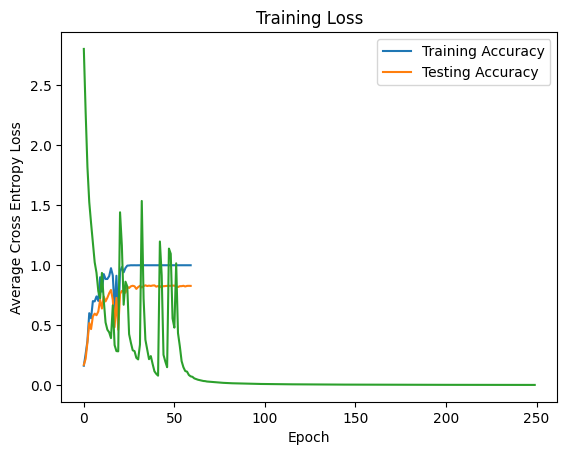

Scores model 1 shape: (7172, 25)
Scores model 2 shape: (7172, 25)
Scores model 3 shape: (7172, 25)
True labels binarized shape: (7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(7172, 25)
(71

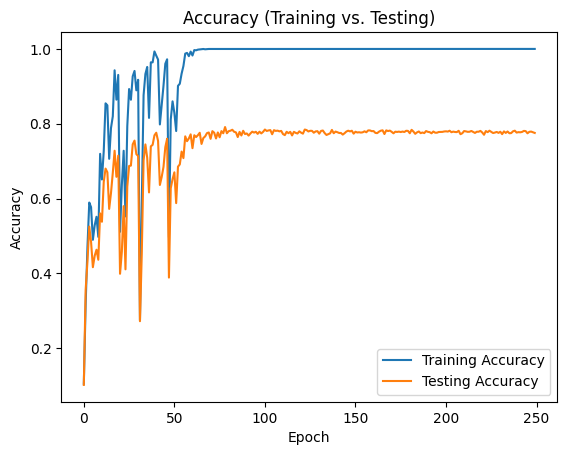

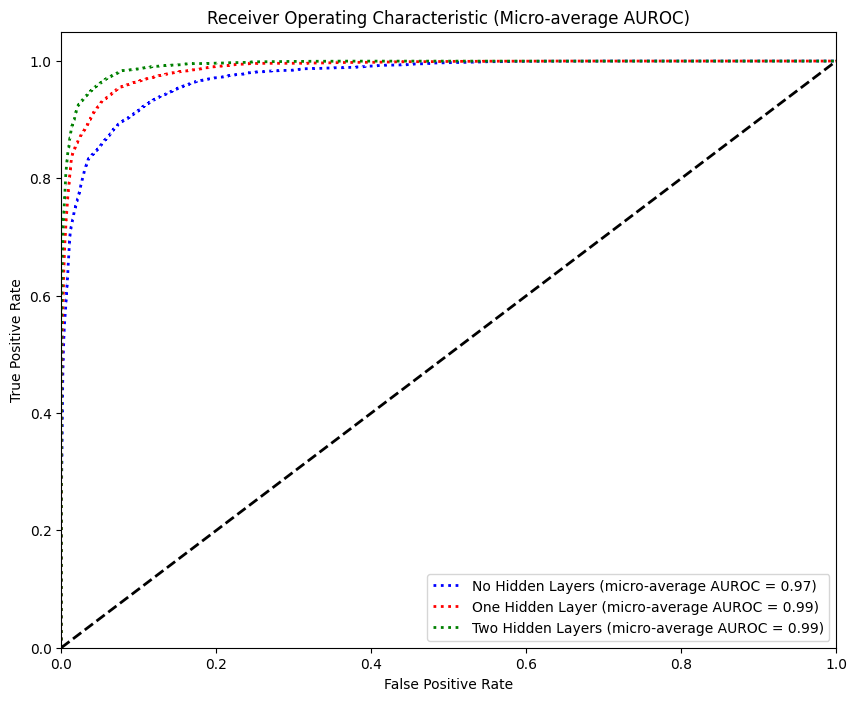

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

gradient_no_layer = 800
n_features = X_MNIST_normalized.shape[-1]

mlp_no_layer = MLP(
    LinearLayer(n_features, 25),
    SoftmaxOutputLayer()
    )

opt_final_no_layer = GradientDescentOptimizer(lr=0.06, decay=False)
opt_final_no_layer.attach_network(mlp_no_layer)

y_MNIST_normalized = cp.asarray(y_MNIST_normalized)
test_label = cp.asarray(test_label)


mlp_no_layer.fit(opt_final_no_layer, X=X_total, y=train_label, epochs=gradient_no_layer, batch_size=200, X_test=y_MNIST_normalized, y_test=test_label)

final_test_prediction = mlp_no_layer.predict_proba(y_MNIST_normalized)
#final_test_accuracy = mlp_no_layer.evaluate_acc(final_test_prediction, test_label)


HIDDEN_SIZE = 512
GRADIENT_STEPS = 60
n_features = X_MNIST_normalized.shape[-1]
X_MNIST_normalized_cp = cp.asarray(X_MNIST_normalized)

mlp6 = MLP(
    LinearLayer(n_features, HIDDEN_SIZE),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(HIDDEN_SIZE, HIDDEN_SIZE),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(HIDDEN_SIZE, 25),
    SoftmaxOutputLayer()
)
opt6 = GradientDescentOptimizer(lr=0.10, decay=False)
opt6.attach_network(mlp6)

mlp6.fit(opt6, X=X_total, y=train_label, epochs=GRADIENT_STEPS, batch_size=200, X_test=y_MNIST_normalized, y_test=test_label)

test_prediction_6 = mlp6.predict_proba(cp.asarray(y_MNIST_normalized))
#test_accuracy_score = mlp6.evaluate_acc(cp.asarray(test_prediction_6), cp.asarray(test_label))

# Print the test accuracy score with the current parameters
#print(f"Test Accuracy: {test_accuracy_score}")

best_gradient_steps = 250

mlp_final_one_layer = MLP(
    LinearLayer(n_features, 256),
    ActivationLayer(),
    LinearLayer(256, 25),
    SoftmaxOutputLayer()
)

opt_final_one_layer = GradientDescentOptimizer(lr=.13,decay=False)
opt_final_one_layer.attach_network(mlp_final_one_layer)

y_MNIST_normalized = cp.asarray(y_MNIST_normalized)
test_label = cp.asarray(test_label)


mlp_final_one_layer.fit(opt_final_one_layer, X=X_total, y=y_total, epochs=best_gradient_steps, batch_size=200, X_test=y_MNIST_normalized, y_test=test_label)

final_test_prediction_one = mlp_final_one_layer.predict_proba(y_MNIST_normalized)

def compute_roc_auc(scores, true_labels_bin, n_classes):
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], scores[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(true_labels_bin.ravel(), scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return fpr, tpr, roc_auc

true_labels = cp.asarray(test_label).get()
scores_model_1 = final_test_prediction.get()
scores_model_2 = final_test_prediction_one.get()
scores_model_3 = test_prediction_6.get()

n_classes = len(np.unique(true_labels))
true_labels_bin = label_binarize(true_labels, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

print("Scores model 1 shape:", scores_model_1.shape)
print("Scores model 2 shape:", scores_model_2.shape)
print("Scores model 3 shape:", scores_model_3.shape)
print("True labels binarized shape:", true_labels_bin.shape)

# Compute ROC curve and ROC area for each class and each model
fpr_1, tpr_1, roc_auc_1 = compute_roc_auc(scores_model_1, true_labels_bin, n_classes)
fpr_2, tpr_2, roc_auc_2 = compute_roc_auc(scores_model_2, true_labels_bin, n_classes)
fpr_3, tpr_3, roc_auc_3 = compute_roc_auc(scores_model_3, true_labels_bin, n_classes)

# Plotting the ROC curve for a specific class or the micro-average
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_1["micro"], tpr_1["micro"],
         label=f'No Hidden Layers (micro-average AUROC = {roc_auc_1["micro"]:.2f})', color='blue', linestyle=':', lw=lw)
plt.plot(fpr_2["micro"], tpr_2["micro"],
         label=f'One Hidden Layer (micro-average AUROC = {roc_auc_2["micro"]:.2f})', color='red', linestyle=':', lw=lw)
plt.plot(fpr_3["micro"], tpr_3["micro"],
         label=f'Two Hidden Layers (micro-average AUROC = {roc_auc_3["micro"]:.2f})', color='green', linestyle=':', lw=lw)

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Micro-average AUROC)')
plt.legend(loc="lower right")
plt.show()

# Comparing Depth of Hidden Units

In [24]:
def evaluate_multiple_models(model, optimizer: Optimizer, X, y, epochs, batch_size, X_test, y_test):
    n_samples = X.shape[0]

    # the problem is that the np.unique returns [0,1] -- I need to fix this
    labels = cp.eye(len(cp.unique(y))+1)[cp.asarray(y)]
    epoch_losses, epoch_accuracies, epoch_test_accuracies = [], [], []

    for epoch in tqdm(range(epochs)):
      indices = cp.random.permutation(n_samples)
      X_shuffled = X[indices]
      y_shuffled = labels[indices]

      batch_losses = []

      for i in range(0, n_samples, batch_size):
          X_batch = X_shuffled[i:i + batch_size]
          y_batch = y_shuffled[i:i + batch_size]

          predictions = model.forward(X_batch)
          loss = cross_entropy_loss(predictions, y_batch)
          batch_losses.append(loss)

          model.backpropagation(y_batch)
          optimizer.step()

      avg_loss = cp.mean(cp.asarray(batch_losses))
      epoch_losses.append(avg_loss)

      # Training accuracy
      train_predictions = model.predict(X)
      train_accuracy = model.evaluate_acc(train_predictions, cp.argmax(labels, axis=1))
      epoch_accuracies.append(train_accuracy.get())

      # Testing accuracy
      test_predictions = model.predict(X_test)
      test_accuracy = model.evaluate_acc(test_predictions, y_test)
      epoch_test_accuracies.append(test_accuracy.get())

      print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")

    return epoch_accuracies, epoch_test_accuracies

In [31]:
n_features = X_MNIST_normalized.shape[-1]

models = [MLP(LinearLayer(n_features, 16),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(16, 16),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(16, 25),
    SoftmaxOutputLayer()),
          MLP(LinearLayer(n_features, 32),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(32, 32),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(32, 25),
    SoftmaxOutputLayer()),
          MLP(LinearLayer(n_features, 64),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(64, 64),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(64, 25),
    SoftmaxOutputLayer()),
          MLP(LinearLayer(n_features, 128),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(128, 128),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(128, 25),
    SoftmaxOutputLayer()),
          MLP(LinearLayer(n_features, 256),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(256, 256),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(256, 25),
    SoftmaxOutputLayer()),
          MLP(LinearLayer(n_features, 512),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(512, 512),
    ActivationLayer(activation='leaky_relu'),
    LinearLayer(512, 25),
    SoftmaxOutputLayer())]
optimizers = [GradientDescentOptimizer(lr=0.05),
              GradientDescentOptimizer(lr=0.05),
              GradientDescentOptimizer(lr=0.05),
              GradientDescentOptimizer(lr=0.05),
              GradientDescentOptimizer(lr=0.05),
              GradientDescentOptimizer(lr=0.10)]

model_accuracies = []

for model, optimizer in zip(models, optimizers):
    optimizer.attach_network(model)
    epoch_accuracies, epoch_test_accuracies = evaluate_multiple_models(
        model=model, optimizer=optimizer, X=X_total, y=train_label, epochs=60, batch_size=200, X_test=y_MNIST_normalized, y_test=test_label)
    breakpoint()
    model_accuracies.append((epoch_accuracies, epoch_test_accuracies))


  2%|▏         | 1/60 [00:00<00:32,  1.83it/s]

Epoch 1/60, Loss: 3.3775, Training Accuracy: 0.0588, Testing Accuracy: 0.0711


  3%|▎         | 2/60 [00:01<00:34,  1.66it/s]

Epoch 2/60, Loss: 3.0639, Training Accuracy: 0.1094, Testing Accuracy: 0.0895


  5%|▌         | 3/60 [00:01<00:34,  1.66it/s]

Epoch 3/60, Loss: 2.9794, Training Accuracy: 0.1229, Testing Accuracy: 0.0987


  7%|▋         | 4/60 [00:02<00:33,  1.68it/s]

Epoch 4/60, Loss: 2.9460, Training Accuracy: 0.1250, Testing Accuracy: 0.0937


  8%|▊         | 5/60 [00:02<00:28,  1.93it/s]

Epoch 5/60, Loss: 2.9324, Training Accuracy: 0.1258, Testing Accuracy: 0.0945


 10%|█         | 6/60 [00:03<00:24,  2.16it/s]

Epoch 6/60, Loss: 2.9277, Training Accuracy: 0.1283, Testing Accuracy: 0.0958


 12%|█▏        | 7/60 [00:03<00:22,  2.35it/s]

Epoch 7/60, Loss: 2.9250, Training Accuracy: 0.1284, Testing Accuracy: 0.0937


 13%|█▎        | 8/60 [00:03<00:21,  2.45it/s]

Epoch 8/60, Loss: 2.9244, Training Accuracy: 0.1286, Testing Accuracy: 0.0936


 15%|█▌        | 9/60 [00:04<00:19,  2.56it/s]

Epoch 9/60, Loss: 2.9230, Training Accuracy: 0.1285, Testing Accuracy: 0.0934


 17%|█▋        | 10/60 [00:04<00:18,  2.64it/s]

Epoch 10/60, Loss: 2.9235, Training Accuracy: 0.1286, Testing Accuracy: 0.0933


 18%|█▊        | 11/60 [00:04<00:18,  2.68it/s]

Epoch 11/60, Loss: 2.9233, Training Accuracy: 0.1286, Testing Accuracy: 0.0933


 20%|██        | 12/60 [00:05<00:18,  2.66it/s]

Epoch 12/60, Loss: 2.9236, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 22%|██▏       | 13/60 [00:05<00:17,  2.72it/s]

Epoch 13/60, Loss: 2.9232, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 23%|██▎       | 14/60 [00:06<00:17,  2.69it/s]

Epoch 14/60, Loss: 2.9229, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 25%|██▌       | 15/60 [00:06<00:16,  2.72it/s]

Epoch 15/60, Loss: 2.9233, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 27%|██▋       | 16/60 [00:06<00:15,  2.76it/s]

Epoch 16/60, Loss: 2.9234, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 28%|██▊       | 17/60 [00:07<00:15,  2.74it/s]

Epoch 17/60, Loss: 2.9232, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 30%|███       | 18/60 [00:07<00:15,  2.77it/s]

Epoch 18/60, Loss: 2.9234, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 32%|███▏      | 19/60 [00:07<00:14,  2.80it/s]

Epoch 19/60, Loss: 2.9230, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 33%|███▎      | 20/60 [00:08<00:14,  2.79it/s]

Epoch 20/60, Loss: 2.9233, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 35%|███▌      | 21/60 [00:08<00:13,  2.79it/s]

Epoch 21/60, Loss: 2.9235, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 37%|███▋      | 22/60 [00:08<00:13,  2.77it/s]

Epoch 22/60, Loss: 2.9233, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 38%|███▊      | 23/60 [00:09<00:13,  2.78it/s]

Epoch 23/60, Loss: 2.9228, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 40%|████      | 24/60 [00:09<00:12,  2.81it/s]

Epoch 24/60, Loss: 2.9227, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 42%|████▏     | 25/60 [00:09<00:12,  2.79it/s]

Epoch 25/60, Loss: 2.9232, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 43%|████▎     | 26/60 [00:10<00:12,  2.80it/s]

Epoch 26/60, Loss: 2.9238, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 45%|████▌     | 27/60 [00:10<00:11,  2.83it/s]

Epoch 27/60, Loss: 2.9233, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 47%|████▋     | 28/60 [00:11<00:11,  2.78it/s]

Epoch 28/60, Loss: 2.9227, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 48%|████▊     | 29/60 [00:11<00:11,  2.77it/s]

Epoch 29/60, Loss: 2.9238, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 50%|█████     | 30/60 [00:11<00:10,  2.80it/s]

Epoch 30/60, Loss: 2.9230, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 52%|█████▏    | 31/60 [00:12<00:10,  2.72it/s]

Epoch 31/60, Loss: 2.9234, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 53%|█████▎    | 32/60 [00:12<00:10,  2.66it/s]

Epoch 32/60, Loss: 2.9232, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 55%|█████▌    | 33/60 [00:13<00:11,  2.39it/s]

Epoch 33/60, Loss: 2.9235, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 57%|█████▋    | 34/60 [00:13<00:11,  2.29it/s]

Epoch 34/60, Loss: 2.9229, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 58%|█████▊    | 35/60 [00:14<00:11,  2.10it/s]

Epoch 35/60, Loss: 2.9232, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 60%|██████    | 36/60 [00:14<00:12,  1.98it/s]

Epoch 36/60, Loss: 2.9234, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 62%|██████▏   | 37/60 [00:15<00:12,  1.89it/s]

Epoch 37/60, Loss: 2.9239, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 63%|██████▎   | 38/60 [00:15<00:11,  1.90it/s]

Epoch 38/60, Loss: 2.9232, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 65%|██████▌   | 39/60 [00:16<00:10,  2.06it/s]

Epoch 39/60, Loss: 2.9233, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 67%|██████▋   | 40/60 [00:16<00:08,  2.24it/s]

Epoch 40/60, Loss: 2.9235, Training Accuracy: 0.1287, Testing Accuracy: 0.0933


 67%|██████▋   | 40/60 [00:16<00:08,  2.38it/s]


KeyboardInterrupt: 

6


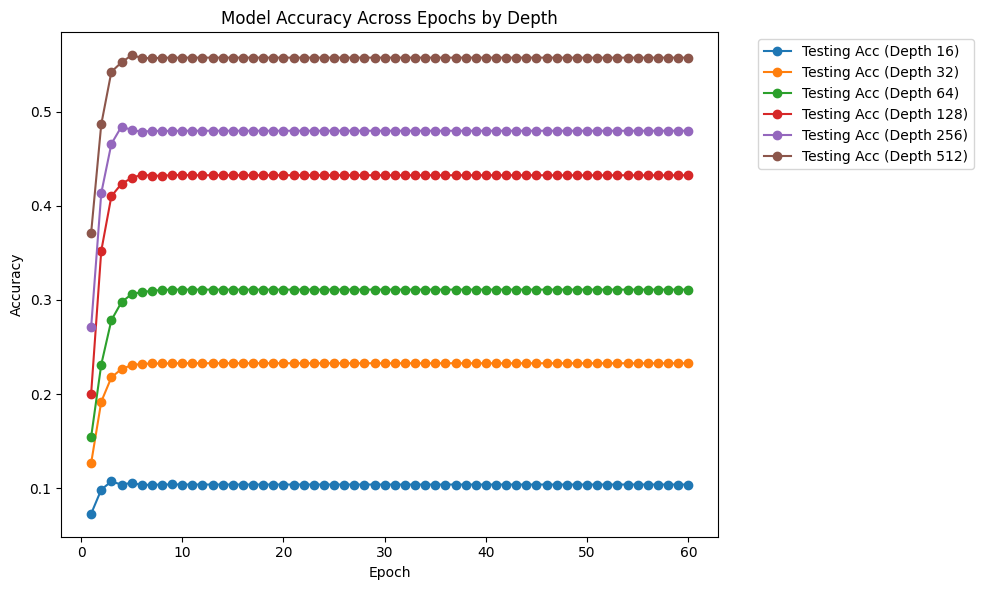

In [44]:
train_accuracies, test_accuracies = zip(*model_accuracies)
print(len(test_accuracies))
depths=[16,32,64,128,256,512]

plt.figure(figsize=(10, 6))
for epoch_test_accuracies, depth in zip(test_accuracies, depths):
    epochs = range(1, len(epoch_accuracies) + 1)
    plt.plot(epochs, epoch_test_accuracies, label=f'Testing Acc (Depth {depth})', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across Epochs by Depth')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Task 3 part 4. Implementing the CNN

# first reshape the data to match CNN input

In [ ]:
X_train_CNN = X_MNIST_normalized.reshape(-1,28,28,1)
X_test_CNN = y_MNIST_normalized.reshape(-1,28,28,1)
#test_label
#train_label

print(X_train_CNN.shape, train_onehot.shape, X_test_CNN.shape, test_onehot.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


# Initialize CNN model

In [ ]:
model = Sequential()
num_filters = 8
filter_size = 3
pool_size = 2
num_classes = 24
batch_size = 64
input_shape = (28,28,1) # change later
strides = 1
padding = 'valid'


# first convolutional layer
model.add(Conv2D(filters = 4 * num_filters,
                 kernel_size = filter_size,
                 strides     = strides,
                 input_shape = input_shape,
                 padding     = padding,
                 activation  = 'relu')) # Sequential model needs the input shape
model.add(MaxPooling2D(pool_size=pool_size)) # Keras automatically infers the shapes of inputs of later layers

# Second Convolutional Layer
model.add(Conv2D(filters=8 * num_filters,
                 kernel_size=filter_size,
                 padding=padding,
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

# Third Convolutional Layer
model.add(Conv2D(filters=16 * num_filters, # Increasing the filters
                 kernel_size=filter_size,
                 padding=padding,
                 activation='relu'))

model.add(MaxPooling2D(pool_size=pool_size))

model.add(Dropout(0.25)) # randomly sets input units to 0 with a frequency of rate at each step during training time, to avoid overfitting
model.add(Flatten()) # Flatten serves as a connection between the convolution and dense layers

# First Fully Connected (Dense) Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# second fully connected layer (Output)
model.add(Dense(num_classes, activation='softmax')) # output layer

model.summary()

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                            

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# Split data into train and validation and fit the model

In [ ]:
x_train_CNN, x_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train_CNN, train_onehot, test_size=0.2, random_state=42)


history = model.fit(x_train_CNN, y_train_CNN,
          batch_size=200,
          epochs=30,
          validation_data=(x_val_CNN, y_val_CNN))



Epoch 1/30
110/110 [==============================] - 21s 184ms/step - loss: 2.7940 - accuracy: 0.1535 - val_loss: 1.8848 - val_accuracy: 0.5036
Epoch 2/30
110/110 [==============================] - 23s 210ms/step - loss: 1.6574 - accuracy: 0.4645 - val_loss: 0.9482 - val_accuracy: 0.7321
Epoch 3/30
110/110 [==============================] - 21s 189ms/step - loss: 1.0740 - accuracy: 0.6408 - val_loss: 0.5743 - val_accuracy: 0.8419
Epoch 4/30
110/110 [==============================] - 23s 211ms/step - loss: 0.7635 - accuracy: 0.7404 - val_loss: 0.3931 - val_accuracy: 0.8878
Epoch 5/30
110/110 [==============================] - 21s 192ms/step - loss: 0.5890 - accuracy: 0.7999 - val_loss: 0.2793 - val_accuracy: 0.9266
Epoch 6/30
110/110 [==============================] - 22s 202ms/step - loss: 0.4710 - accuracy: 0.8412 - val_loss: 0.1894 - val_accuracy: 0.9506
Epoch 7/30
110/110 [==============================] - 20s 185ms/step - loss: 0.3680 - accuracy: 0.8754 - val_loss: 0.1321 - val_ac

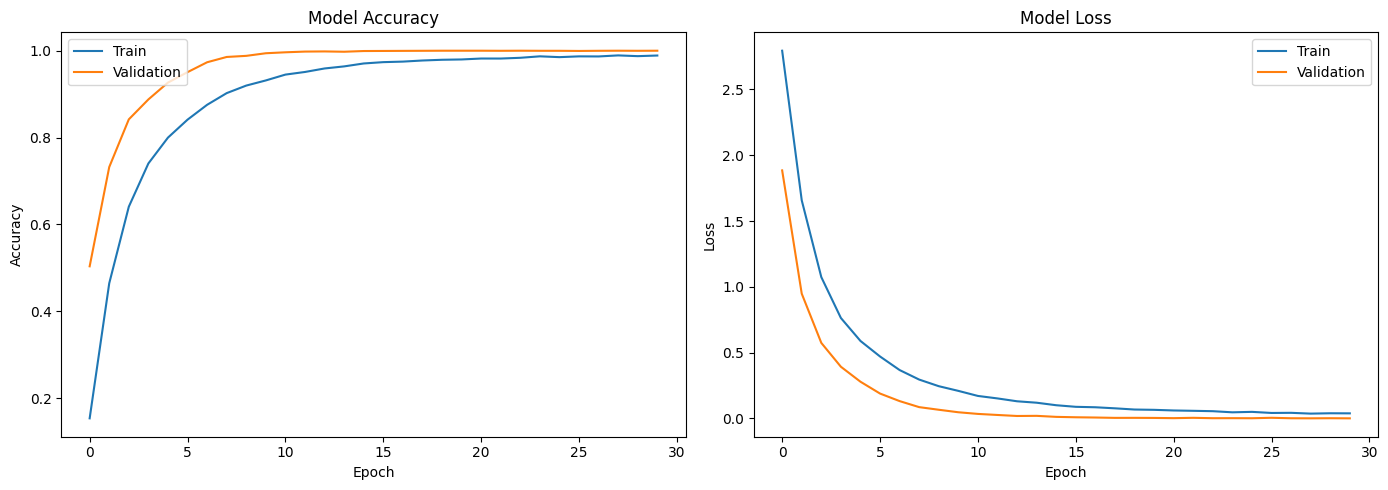

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_CNN, test_onehot)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

225/225 [==============================] - 3s 13ms/step - loss: 0.2444 - accuracy: 0.9264
Test accuracy: 92.64%


# Tune the parameters of my model

In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# create a build model function such that I can tune parameters

In [ ]:
x_train_CNN, x_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train_CNN, train_onehot, test_size=0.2, random_state=42)

def build_model(hidden_units=32, dropout_rate=0.5, filter_size=3, strides=1, padding='valid', num_filters=32):
  pool_size = 2
  num_classes = 24
  input_shape = (28,28,1) # change later

  model = Sequential()

  # first convolutional layer
  model.add(Conv2D(filters = 4 * num_filters,
                  kernel_size = filter_size,
                  strides     = strides,
                  input_shape = input_shape,
                  padding     = padding,
                  activation  = 'relu')) # Sequential model needs the input shape
  model.add(MaxPooling2D(pool_size=pool_size)) # Keras automatically infers the shapes of inputs of later layers

  # Second Convolutional Layer
  model.add(Conv2D(filters=8 * num_filters,
                  kernel_size=filter_size,
                  padding=padding,
                  activation='relu'))

  model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

  # Third Convolutional Layer
  model.add(Conv2D(filters=16 * num_filters, # Increasing the filters
                  kernel_size=filter_size,
                  padding=padding,
                  activation='relu'))

  model.add(MaxPooling2D(pool_size=pool_size))

  model.add(Dropout(0.25)) # randomly sets input units to 0 with a frequency of rate at each step during training time, to avoid overfitting
  model.add(Flatten()) # Flatten serves as a connection between the convolution and dense layers

  # First Fully Connected (Dense) Layer
  model.add(Dense(hidden_units, activation='relu'))
  model.add(Dropout(0.5))

  # second fully connected layer (Output)
  model.add(Dense(num_classes, activation='softmax')) # output layer

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Build the model using sklearn wrapper

In [ ]:
model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=100, verbose=0)

# Test the changes to hidden layer size

In [ ]:
param_grid = {
    'model__hidden_units': [32, 64, 128, 256],
}

f1_scorer = make_scorer(f1_score, average='micro')

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, scoring=f1_scorer, verbose=1)

grid_result = grid.fit(x_train_CNN, y_train_CNN)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Run the best model on the full training set

In [ ]:
model = build_model(hidden_units=256, dropout_rate=0.25, filter_size=3, strides=1, padding='same', num_filters=32)
model.fit(X_train_CNN, train_onehot,
          batch_size=200,
          epochs=26)

test_loss, test_accuracy = model.evaluate(X_test_CNN, test_onehot)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Epoch 1/26
138/138 [==============================] - 18s 36ms/step - loss: 1.8807 - accuracy: 0.4201
Epoch 2/26
138/138 [==============================] - 4s 31ms/step - loss: 0.3465 - accuracy: 0.8809
Epoch 3/26
138/138 [==============================] - 4s 31ms/step - loss: 0.1309 - accuracy: 0.9557
Epoch 4/26
138/138 [==============================] - 4s 31ms/step - loss: 0.0653 - accuracy: 0.9800
Epoch 5/26
138/138 [==============================] - 4s 31ms/step - loss: 0.0380 - accuracy: 0.9889
Epoch 6/26
138/138 [==============================] - 4s 32ms/step - loss: 0.0316 - accuracy: 0.9897
Epoch 7/26
138/138 [==============================] - 4s 31ms/step - loss: 0.0275 - accuracy: 0.9911
Epoch 8/26
138/138 [==============================] - 4s 31ms/step - loss: 0.0196 - accuracy: 0.9936
Epoch 9/26
138/138 [==============================] - 4s 32ms/step - loss: 0.0176 - accuracy: 0.9950
Epoch 10/26
138/138 [==============================] - 4s 31ms/step - loss: 0.0155 - accur

# fine tune other parameters in the CNN

In [ ]:
param_grid = {
    'model__dropout_rate': [0.25, 0.5],
    'model__filter_size': [3, 5],
    'model__strides': [1, 2],
    'model__padding': ['valid', 'same'],
    'model__num_filters': [32, 64]
}

f1_scorer = make_scorer(f1_score, average='micro')

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, scoring=f1_scorer, verbose=1)

grid_result = grid.fit(x_train_CNN, y_train_CNN)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Experiment with Data augmentation

In [ ]:
X_MNIST_reshape = X_MNIST.reshape(-1,28,28,1)

data_augmentation = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values to [0,1]
    rotation_range=20,    # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2, # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,# Randomly shift images vertically (fraction of total height)
    shear_range=0.2,       # Apply shear transformations
    zoom_range=0.2,        # Randomly zoom image
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'    # Set strategy for filling in newly created pixels
)
x_train_generator, x_val_generator, y_train_generator, y_valid_generator = train_test_split(X_MNIST_reshape, train_onehot, test_size=0.2, random_state=42)

train_generator = data_augmentation.flow(x=x_train_generator, y=y_train_generator, batch_size=128)
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow(x=x_val_generator, y=y_valid_generator, batch_size=128)


Here we test the best CNN model on the augmented data

In [ ]:
model = build_model(hidden_units=256, dropout_rate=0.25, filter_size=3, strides=1, padding='same', num_filters=32)
model.fit(train_generator,
          validation_data=valid_generator,
          epochs=30)

test_loss, test_accuracy = model.evaluate(X_test_CNN, test_onehot)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Epoch 1/30
172/172 [==============================] - 14s 66ms/step - loss: 3.0062 - accuracy: 0.0900 - val_loss: 2.4544 - val_accuracy: 0.2604
Epoch 2/30
172/172 [==============================] - 9s 55ms/step - loss: 2.3411 - accuracy: 0.2523 - val_loss: 1.3239 - val_accuracy: 0.5859
Epoch 3/30
172/172 [==============================] - 10s 57ms/step - loss: 1.7077 - accuracy: 0.4293 - val_loss: 0.9075 - val_accuracy: 0.7234
Epoch 4/30
172/172 [==============================] - 13s 75ms/step - loss: 1.3632 - accuracy: 0.5305 - val_loss: 0.6217 - val_accuracy: 0.7964
Epoch 5/30
172/172 [==============================] - 11s 63ms/step - loss: 1.1147 - accuracy: 0.6170 - val_loss: 0.3986 - val_accuracy: 0.8898
Epoch 6/30
172/172 [==============================] - 9s 54ms/step - loss: 0.9408 - accuracy: 0.6797 - val_loss: 0.2959 - val_accuracy: 0.9120
Epoch 7/30
172/172 [==============================] - 11s 63ms/step - loss: 0.7950 - accuracy: 0.7251 - val_loss: 0.2570 - val_accuracy: 0

# Graph list

1. We should plot AUROC for each model
3. we should show the CNN model architecture (I have)